In [1]:
# 데이터 불러오기 

# mnist digit 데이터 업로드
from keras.datasets import mnist
import numpy as np

(x_train,_),(x_test,_) = mnist.load_data()

# 0-1 사이 값으로 정규화
x_train= x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))


C:\Users\HyunA\AppData\Local\conda\conda\envs\tutorial\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# 모델 생성하기
from keras.layers import Input,Dense,Conv2D,MaxPool2D,UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28,28,1))

x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPool2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2,2), padding='same')(x)

# at this point the representation is ( 4,4,8) i.e 128 dimensinal
x = Conv2D(8,(3,3),activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')



In [6]:
# 아나콘다 프롬프트 열고 
# activate tutorial
# tensorboard --logdir=/tmp/autoencoder
# 훈련시마다 텐서보드에 콜백 로그 남기자 

from keras.callbacks import TensorBoard

autoencoder.fit(x_train,x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test,x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples


Epoch 1/50


  128/60000 [..............................] - ETA: 3:57 - loss: 0.6950

  256/60000 [..............................] - ETA: 2:49 - loss: 0.6932

  384/60000 [..............................] - ETA: 2:26 - loss: 0.6914

  512/60000 [..............................] - ETA: 2:14 - loss: 0.6894

  640/60000 [..............................] - ETA: 2:09 - loss: 0.6870

  768/60000 [..............................] - ETA: 2:03 - loss: 0.6836

  896/60000 [..............................] - ETA: 1:58 - loss: 0.6787

 1024/60000 [..............................] - ETA: 1:56 - loss: 0.6705

 1152/60000 [..............................] - ETA: 1:53 - loss: 0.6574

 1280/60000 [..............................] - ETA: 1:52 - loss: 0.6403

 1408/60000 [..............................] - ETA: 1:51 - loss: 0.6272

 1536/60000 [..............................] - ETA: 1:50 - loss: 0.6158

 1664/60000 [..............................] - ETA: 1:49 - loss: 0.6048

 1792/60000 [..............................] - ETA: 1:48 - loss: 0.5953

 1920/60000 [..............................] - ETA: 1:49 - loss: 0.5864

 2048/60000 [>.............................] - ETA: 1:49 - loss: 0.5777

 2176/60000 [>.............................] - ETA: 1:49 - loss: 0.5698

 2304/60000 [>.............................] - ETA: 1:49 - loss: 0.5629

 2432/60000 [>.............................] - ETA: 1:49 - loss: 0.5550

 2560/60000 [>.............................] - ETA: 1:48 - loss: 0.5479

 2688/60000 [>.............................] - ETA: 1:47 - loss: 0.5414

 2816/60000 [>.............................] - ETA: 1:46 - loss: 0.5355

 2944/60000 [>.............................] - ETA: 1:46 - loss: 0.5283

 3072/60000 [>.............................] - ETA: 1:45 - loss: 0.5219

 3200/60000 [>.............................] - ETA: 1:46 - loss: 0.5149

 3328/60000 [>.............................] - ETA: 1:47 - loss: 0.5086

 3456/60000 [>.............................] - ETA: 1:46 - loss: 0.5013

 3584/60000 [>.............................] - ETA: 1:46 - loss: 0.4947

 3712/60000 [>.............................] - ETA: 1:45 - loss: 0.4882

 3840/60000 [>.............................] - ETA: 1:44 - loss: 0.4824

 3968/60000 [>.............................] - ETA: 1:43 - loss: 0.4757

 4096/60000 [=>............................] - ETA: 1:43 - loss: 0.4696

 4224/60000 [=>............................] - ETA: 1:42 - loss: 0.4638

 4352/60000 [=>............................] - ETA: 1:41 - loss: 0.4583

 4480/60000 [=>............................] - ETA: 1:41 - loss: 0.4530

 4608/60000 [=>............................] - ETA: 1:40 - loss: 0.4481

 4736/60000 [=>............................] - ETA: 1:40 - loss: 0.4429

 4864/60000 [=>............................] - ETA: 1:40 - loss: 0.4381

 4992/60000 [=>............................] - ETA: 1:40 - loss: 0.4335

 5120/60000 [=>............................] - ETA: 1:39 - loss: 0.4289

 5248/60000 [=>............................] - ETA: 1:39 - loss: 0.4244

 5376/60000 [=>............................] - ETA: 1:38 - loss: 0.4202

 5504/60000 [=>............................] - ETA: 1:38 - loss: 0.4160

 5632/60000 [=>............................] - ETA: 1:38 - loss: 0.4120

 5760/60000 [=>............................] - ETA: 1:37 - loss: 0.4079

 5888/60000 [=>............................] - ETA: 1:37 - loss: 0.4043

 6016/60000 [==>...........................] - ETA: 1:37 - loss: 0.4006

 6144/60000 [==>...........................] - ETA: 1:37 - loss: 0.3974

 6272/60000 [==>...........................] - ETA: 1:37 - loss: 0.3941

 6400/60000 [==>...........................] - ETA: 1:37 - loss: 0.3911

 6528/60000 [==>...........................] - ETA: 1:37 - loss: 0.3882

 6656/60000 [==>...........................] - ETA: 1:37 - loss: 0.3853

 6784/60000 [==>...........................] - ETA: 1:37 - loss: 0.3833

 6912/60000 [==>...........................] - ETA: 1:36 - loss: 0.3809

 7040/60000 [==>...........................] - ETA: 1:36 - loss: 0.3785

 7168/60000 [==>...........................] - ETA: 1:35 - loss: 0.3759

 7296/60000 [==>...........................] - ETA: 1:35 - loss: 0.3733

 7424/60000 [==>...........................] - ETA: 1:35 - loss: 0.3709

 7552/60000 [==>...........................] - ETA: 1:34 - loss: 0.3684

 7680/60000 [==>...........................] - ETA: 1:34 - loss: 0.3661

 7808/60000 [==>...........................] - ETA: 1:33 - loss: 0.3637

 7936/60000 [==>...........................] - ETA: 1:33 - loss: 0.3616

 8064/60000 [===>..........................] - ETA: 1:33 - loss: 0.3596

 8192/60000 [===>..........................] - ETA: 1:33 - loss: 0.3577

 8320/60000 [===>..........................] - ETA: 1:32 - loss: 0.3561

 8448/60000 [===>..........................] - ETA: 1:32 - loss: 0.3542

 8576/60000 [===>..........................] - ETA: 1:32 - loss: 0.3524

 8704/60000 [===>..........................] - ETA: 1:31 - loss: 0.3506

 8832/60000 [===>..........................] - ETA: 1:31 - loss: 0.3489

 8960/60000 [===>..........................] - ETA: 1:31 - loss: 0.3471

 9088/60000 [===>..........................] - ETA: 1:30 - loss: 0.3452

 9216/60000 [===>..........................] - ETA: 1:30 - loss: 0.3435

 9344/60000 [===>..........................] - ETA: 1:29 - loss: 0.3418

 9472/60000 [===>..........................] - ETA: 1:29 - loss: 0.3402

 9600/60000 [===>..........................] - ETA: 1:29 - loss: 0.3387

 9728/60000 [===>..........................] - ETA: 1:28 - loss: 0.3372

 9856/60000 [===>..........................] - ETA: 1:28 - loss: 0.3359

 9984/60000 [===>..........................] - ETA: 1:28 - loss: 0.3345

10112/60000 [====>.........................] - ETA: 1:27 - loss: 0.3331

10240/60000 [====>.........................] - ETA: 1:27 - loss: 0.3315

10368/60000 [====>.........................] - ETA: 1:27 - loss: 0.3300

10496/60000 [====>.........................] - ETA: 1:27 - loss: 0.3286

10624/60000 [====>.........................] - ETA: 1:26 - loss: 0.3272

10752/60000 [====>.........................] - ETA: 1:26 - loss: 0.3259

10880/60000 [====>.........................] - ETA: 1:26 - loss: 0.3247

11008/60000 [====>.........................] - ETA: 1:25 - loss: 0.3237

11136/60000 [====>.........................] - ETA: 1:25 - loss: 0.3227

11264/60000 [====>.........................] - ETA: 1:26 - loss: 0.3215

11392/60000 [====>.........................] - ETA: 1:25 - loss: 0.3203

11520/60000 [====>.........................] - ETA: 1:25 - loss: 0.3191

11648/60000 [====>.........................] - ETA: 1:25 - loss: 0.3179

11776/60000 [====>.........................] - ETA: 1:25 - loss: 0.3168

11904/60000 [====>.........................] - ETA: 1:24 - loss: 0.3157

12032/60000 [=====>........................] - ETA: 1:24 - loss: 0.3148

12160/60000 [=====>........................] - ETA: 1:24 - loss: 0.3139

12288/60000 [=====>........................] - ETA: 1:24 - loss: 0.3129

12416/60000 [=====>........................] - ETA: 1:24 - loss: 0.3120

12544/60000 [=====>........................] - ETA: 1:23 - loss: 0.3110

12672/60000 [=====>........................] - ETA: 1:23 - loss: 0.3100

12800/60000 [=====>........................] - ETA: 1:23 - loss: 0.3090

12928/60000 [=====>........................] - ETA: 1:23 - loss: 0.3080

13056/60000 [=====>........................] - ETA: 1:22 - loss: 0.3071

13184/60000 [=====>........................] - ETA: 1:22 - loss: 0.3061

13312/60000 [=====>........................] - ETA: 1:22 - loss: 0.3051

13440/60000 [=====>........................] - ETA: 1:22 - loss: 0.3043

13568/60000 [=====>........................] - ETA: 1:21 - loss: 0.3034

13696/60000 [=====>........................] - ETA: 1:21 - loss: 0.3025

13824/60000 [=====>........................] - ETA: 1:21 - loss: 0.3017

13952/60000 [=====>........................] - ETA: 1:20 - loss: 0.3010

14080/60000 [======>.......................] - ETA: 1:20 - loss: 0.3002

14208/60000 [======>.......................] - ETA: 1:20 - loss: 0.2994

14336/60000 [======>.......................] - ETA: 1:19 - loss: 0.2986

14464/60000 [======>.......................] - ETA: 1:19 - loss: 0.2977

14592/60000 [======>.......................] - ETA: 1:19 - loss: 0.2969

14720/60000 [======>.......................] - ETA: 1:19 - loss: 0.2960

14848/60000 [======>.......................] - ETA: 1:18 - loss: 0.2952

14976/60000 [======>.......................] - ETA: 1:18 - loss: 0.2943

15104/60000 [======>.......................] - ETA: 1:18 - loss: 0.2935

15232/60000 [======>.......................] - ETA: 1:17 - loss: 0.2928

15360/60000 [======>.......................] - ETA: 1:17 - loss: 0.2921

15488/60000 [======>.......................] - ETA: 1:17 - loss: 0.2916

15616/60000 [======>.......................] - ETA: 1:17 - loss: 0.2910

15744/60000 [======>.......................] - ETA: 1:16 - loss: 0.2904

15872/60000 [======>.......................] - ETA: 1:16 - loss: 0.2896

16000/60000 [=======>......................] - ETA: 1:16 - loss: 0.2889

16128/60000 [=======>......................] - ETA: 1:15 - loss: 0.2882

16256/60000 [=======>......................] - ETA: 1:15 - loss: 0.2875

16384/60000 [=======>......................] - ETA: 1:15 - loss: 0.2868

16512/60000 [=======>......................] - ETA: 1:15 - loss: 0.2862

16640/60000 [=======>......................] - ETA: 1:14 - loss: 0.2855

16768/60000 [=======>......................] - ETA: 1:14 - loss: 0.2848

16896/60000 [=======>......................] - ETA: 1:14 - loss: 0.2842

17024/60000 [=======>......................] - ETA: 1:13 - loss: 0.2836

17152/60000 [=======>......................] - ETA: 1:13 - loss: 0.2830

17280/60000 [=======>......................] - ETA: 1:13 - loss: 0.2824

17408/60000 [=======>......................] - ETA: 1:13 - loss: 0.2818

17536/60000 [=======>......................] - ETA: 1:12 - loss: 0.2812

17664/60000 [=======>......................] - ETA: 1:12 - loss: 0.2806

17792/60000 [=======>......................] - ETA: 1:12 - loss: 0.2802

17920/60000 [=======>......................] - ETA: 1:12 - loss: 0.2797

18048/60000 [========>.....................] - ETA: 1:12 - loss: 0.2792

18176/60000 [========>.....................] - ETA: 1:12 - loss: 0.2787

18304/60000 [========>.....................] - ETA: 1:12 - loss: 0.2782

18432/60000 [========>.....................] - ETA: 1:11 - loss: 0.2776

18560/60000 [========>.....................] - ETA: 1:11 - loss: 0.2770

18688/60000 [========>.....................] - ETA: 1:11 - loss: 0.2765

18816/60000 [========>.....................] - ETA: 1:11 - loss: 0.2760

18944/60000 [========>.....................] - ETA: 1:10 - loss: 0.2755

19072/60000 [========>.....................] - ETA: 1:10 - loss: 0.2750

19200/60000 [========>.....................] - ETA: 1:10 - loss: 0.2746

19328/60000 [========>.....................] - ETA: 1:10 - loss: 0.2743

19456/60000 [========>.....................] - ETA: 1:10 - loss: 0.2738

19584/60000 [========>.....................] - ETA: 1:09 - loss: 0.2734

19712/60000 [========>.....................] - ETA: 1:09 - loss: 0.2728

19840/60000 [========>.....................] - ETA: 1:09 - loss: 0.2723

19968/60000 [========>.....................] - ETA: 1:09 - loss: 0.2718

20096/60000 [=========>....................] - ETA: 1:08 - loss: 0.2713

20224/60000 [=========>....................] - ETA: 1:08 - loss: 0.2709

20352/60000 [=========>....................] - ETA: 1:08 - loss: 0.2704

20480/60000 [=========>....................] - ETA: 1:08 - loss: 0.2700

20608/60000 [=========>....................] - ETA: 1:07 - loss: 0.2696

20736/60000 [=========>....................] - ETA: 1:07 - loss: 0.2692

20864/60000 [=========>....................] - ETA: 1:07 - loss: 0.2687

20992/60000 [=========>....................] - ETA: 1:07 - loss: 0.2683

21120/60000 [=========>....................] - ETA: 1:06 - loss: 0.2678

21248/60000 [=========>....................] - ETA: 1:06 - loss: 0.2674

21376/60000 [=========>....................] - ETA: 1:06 - loss: 0.2669

21504/60000 [=========>....................] - ETA: 1:06 - loss: 0.2665

21632/60000 [=========>....................] - ETA: 1:05 - loss: 0.2660

21760/60000 [=========>....................] - ETA: 1:05 - loss: 0.2656

21888/60000 [=========>....................] - ETA: 1:05 - loss: 0.2652

22016/60000 [==========>...................] - ETA: 1:05 - loss: 0.2649

22144/60000 [==========>...................] - ETA: 1:04 - loss: 0.2645

22272/60000 [==========>...................] - ETA: 1:04 - loss: 0.2641

22400/60000 [==========>...................] - ETA: 1:04 - loss: 0.2637

22528/60000 [==========>...................] - ETA: 1:04 - loss: 0.2633

22656/60000 [==========>...................] - ETA: 1:03 - loss: 0.2628

22784/60000 [==========>...................] - ETA: 1:03 - loss: 0.2624

22912/60000 [==========>...................] - ETA: 1:03 - loss: 0.2620

23040/60000 [==========>...................] - ETA: 1:03 - loss: 0.2616

23168/60000 [==========>...................] - ETA: 1:03 - loss: 0.2612

23296/60000 [==========>...................] - ETA: 1:02 - loss: 0.2608

23424/60000 [==========>...................] - ETA: 1:02 - loss: 0.2604

23552/60000 [==========>...................] - ETA: 1:02 - loss: 0.2601

23680/60000 [==========>...................] - ETA: 1:02 - loss: 0.2598

23808/60000 [==========>...................] - ETA: 1:01 - loss: 0.2595

23936/60000 [==========>...................] - ETA: 1:01 - loss: 0.2591

24064/60000 [===========>..................] - ETA: 1:01 - loss: 0.2588

24192/60000 [===========>..................] - ETA: 1:01 - loss: 0.2584

24320/60000 [===========>..................] - ETA: 1:00 - loss: 0.2579

24448/60000 [===========>..................] - ETA: 1:00 - loss: 0.2575

24576/60000 [===========>..................] - ETA: 1:00 - loss: 0.2572

24704/60000 [===========>..................] - ETA: 1:00 - loss: 0.2568

24832/60000 [===========>..................] - ETA: 59s - loss: 0.2565 

24960/60000 [===========>..................] - ETA: 59s - loss: 0.2562

25088/60000 [===========>..................] - ETA: 59s - loss: 0.2558

25216/60000 [===========>..................] - ETA: 59s - loss: 0.2554

25344/60000 [===========>..................] - ETA: 58s - loss: 0.2551

25472/60000 [===========>..................] - ETA: 58s - loss: 0.2547

25600/60000 [===========>..................] - ETA: 58s - loss: 0.2544

25728/60000 [===========>..................] - ETA: 58s - loss: 0.2541

25856/60000 [===========>..................] - ETA: 58s - loss: 0.2537

25984/60000 [===========>..................] - ETA: 57s - loss: 0.2534

26112/60000 [============>.................] - ETA: 57s - loss: 0.2531

26240/60000 [============>.................] - ETA: 57s - loss: 0.2528

26368/60000 [============>.................] - ETA: 57s - loss: 0.2525

26496/60000 [============>.................] - ETA: 56s - loss: 0.2522

26624/60000 [============>.................] - ETA: 56s - loss: 0.2519

26752/60000 [============>.................] - ETA: 56s - loss: 0.2517

26880/60000 [============>.................] - ETA: 56s - loss: 0.2514

27008/60000 [============>.................] - ETA: 55s - loss: 0.2511

27136/60000 [============>.................] - ETA: 55s - loss: 0.2508

27264/60000 [============>.................] - ETA: 55s - loss: 0.2505

27392/60000 [============>.................] - ETA: 55s - loss: 0.2502

27520/60000 [============>.................] - ETA: 55s - loss: 0.2500

27648/60000 [============>.................] - ETA: 54s - loss: 0.2497

27776/60000 [============>.................] - ETA: 54s - loss: 0.2494

27904/60000 [============>.................] - ETA: 54s - loss: 0.2491

28032/60000 [=============>................] - ETA: 54s - loss: 0.2489

28160/60000 [=============>................] - ETA: 54s - loss: 0.2486

28288/60000 [=============>................] - ETA: 53s - loss: 0.2483

28416/60000 [=============>................] - ETA: 53s - loss: 0.2481

28544/60000 [=============>................] - ETA: 53s - loss: 0.2478

28672/60000 [=============>................] - ETA: 53s - loss: 0.2475

28800/60000 [=============>................] - ETA: 53s - loss: 0.2472

28928/60000 [=============>................] - ETA: 52s - loss: 0.2469

29056/60000 [=============>................] - ETA: 52s - loss: 0.2466

29184/60000 [=============>................] - ETA: 52s - loss: 0.2463

29312/60000 [=============>................] - ETA: 52s - loss: 0.2461

29440/60000 [=============>................] - ETA: 52s - loss: 0.2458

29568/60000 [=============>................] - ETA: 51s - loss: 0.2456

29696/60000 [=============>................] - ETA: 51s - loss: 0.2453

29824/60000 [=============>................] - ETA: 51s - loss: 0.2451

29952/60000 [=============>................] - ETA: 51s - loss: 0.2449

30080/60000 [==============>...............] - ETA: 50s - loss: 0.2447

30208/60000 [==============>...............] - ETA: 50s - loss: 0.2444

30336/60000 [==============>...............] - ETA: 50s - loss: 0.2442

30464/60000 [==============>...............] - ETA: 50s - loss: 0.2439

30592/60000 [==============>...............] - ETA: 49s - loss: 0.2437

30720/60000 [==============>...............] - ETA: 49s - loss: 0.2435

30848/60000 [==============>...............] - ETA: 49s - loss: 0.2433

30976/60000 [==============>...............] - ETA: 49s - loss: 0.2430

31104/60000 [==============>...............] - ETA: 49s - loss: 0.2427

31232/60000 [==============>...............] - ETA: 48s - loss: 0.2424

31360/60000 [==============>...............] - ETA: 48s - loss: 0.2422

31488/60000 [==============>...............] - ETA: 48s - loss: 0.2419

31616/60000 [==============>...............] - ETA: 48s - loss: 0.2417

31744/60000 [==============>...............] - ETA: 47s - loss: 0.2414

31872/60000 [==============>...............] - ETA: 47s - loss: 0.2412

32000/60000 [===============>..............] - ETA: 47s - loss: 0.2409

32128/60000 [===============>..............] - ETA: 47s - loss: 0.2407

32256/60000 [===============>..............] - ETA: 47s - loss: 0.2404

32384/60000 [===============>..............] - ETA: 46s - loss: 0.2402

32512/60000 [===============>..............] - ETA: 46s - loss: 0.2400

32640/60000 [===============>..............] - ETA: 46s - loss: 0.2398

32768/60000 [===============>..............] - ETA: 46s - loss: 0.2396

32896/60000 [===============>..............] - ETA: 45s - loss: 0.2394

33024/60000 [===============>..............] - ETA: 45s - loss: 0.2392

33152/60000 [===============>..............] - ETA: 45s - loss: 0.2390

33280/60000 [===============>..............] - ETA: 45s - loss: 0.2388

33408/60000 [===============>..............] - ETA: 44s - loss: 0.2386

33536/60000 [===============>..............] - ETA: 44s - loss: 0.2384

33664/60000 [===============>..............] - ETA: 44s - loss: 0.2382

33792/60000 [===============>..............] - ETA: 44s - loss: 0.2380

33920/60000 [===============>..............] - ETA: 44s - loss: 0.2377

34048/60000 [================>.............] - ETA: 43s - loss: 0.2375

34176/60000 [================>.............] - ETA: 43s - loss: 0.2373

34304/60000 [================>.............] - ETA: 43s - loss: 0.2371

34432/60000 [================>.............] - ETA: 43s - loss: 0.2368

34560/60000 [================>.............] - ETA: 42s - loss: 0.2366

34688/60000 [================>.............] - ETA: 42s - loss: 0.2364

34816/60000 [================>.............] - ETA: 42s - loss: 0.2362

34944/60000 [================>.............] - ETA: 42s - loss: 0.2360

35072/60000 [================>.............] - ETA: 42s - loss: 0.2358

35200/60000 [================>.............] - ETA: 41s - loss: 0.2356

35328/60000 [================>.............] - ETA: 41s - loss: 0.2354

35456/60000 [================>.............] - ETA: 41s - loss: 0.2352

35584/60000 [================>.............] - ETA: 41s - loss: 0.2350

35712/60000 [================>.............] - ETA: 40s - loss: 0.2348

35840/60000 [================>.............] - ETA: 40s - loss: 0.2346

35968/60000 [================>.............] - ETA: 40s - loss: 0.2344

36096/60000 [=================>............] - ETA: 40s - loss: 0.2342

36224/60000 [=================>............] - ETA: 40s - loss: 0.2340

36352/60000 [=================>............] - ETA: 39s - loss: 0.2338

36480/60000 [=================>............] - ETA: 39s - loss: 0.2336

36608/60000 [=================>............] - ETA: 39s - loss: 0.2334

36736/60000 [=================>............] - ETA: 39s - loss: 0.2331

36864/60000 [=================>............] - ETA: 39s - loss: 0.2329

36992/60000 [=================>............] - ETA: 38s - loss: 0.2327

37120/60000 [=================>............] - ETA: 38s - loss: 0.2325

37248/60000 [=================>............] - ETA: 38s - loss: 0.2323

37376/60000 [=================>............] - ETA: 38s - loss: 0.2322

37504/60000 [=================>............] - ETA: 37s - loss: 0.2320

37632/60000 [=================>............] - ETA: 37s - loss: 0.2318

37760/60000 [=================>............] - ETA: 37s - loss: 0.2316

37888/60000 [=================>............] - ETA: 37s - loss: 0.2314

38016/60000 [==================>...........] - ETA: 36s - loss: 0.2313

38144/60000 [==================>...........] - ETA: 36s - loss: 0.2311

38272/60000 [==================>...........] - ETA: 36s - loss: 0.2309

38400/60000 [==================>...........] - ETA: 36s - loss: 0.2307

38528/60000 [==================>...........] - ETA: 36s - loss: 0.2305

38656/60000 [==================>...........] - ETA: 35s - loss: 0.2303

38784/60000 [==================>...........] - ETA: 35s - loss: 0.2302

38912/60000 [==================>...........] - ETA: 35s - loss: 0.2300

39040/60000 [==================>...........] - ETA: 35s - loss: 0.2298

39168/60000 [==================>...........] - ETA: 34s - loss: 0.2297

39296/60000 [==================>...........] - ETA: 34s - loss: 0.2295

39424/60000 [==================>...........] - ETA: 34s - loss: 0.2293

39552/60000 [==================>...........] - ETA: 34s - loss: 0.2291

39680/60000 [==================>...........] - ETA: 34s - loss: 0.2289

39808/60000 [==================>...........] - ETA: 33s - loss: 0.2287

39936/60000 [==================>...........] - ETA: 33s - loss: 0.2285

40064/60000 [===================>..........] - ETA: 33s - loss: 0.2283

40192/60000 [===================>..........] - ETA: 33s - loss: 0.2281

40320/60000 [===================>..........] - ETA: 33s - loss: 0.2279

40448/60000 [===================>..........] - ETA: 32s - loss: 0.2278

40576/60000 [===================>..........] - ETA: 32s - loss: 0.2276

40704/60000 [===================>..........] - ETA: 32s - loss: 0.2274

40832/60000 [===================>..........] - ETA: 32s - loss: 0.2272

40960/60000 [===================>..........] - ETA: 31s - loss: 0.2271

41088/60000 [===================>..........] - ETA: 31s - loss: 0.2269

41216/60000 [===================>..........] - ETA: 31s - loss: 0.2268

41344/60000 [===================>..........] - ETA: 31s - loss: 0.2266

41472/60000 [===================>..........] - ETA: 31s - loss: 0.2264

41600/60000 [===================>..........] - ETA: 30s - loss: 0.2263

41728/60000 [===================>..........] - ETA: 30s - loss: 0.2261

41856/60000 [===================>..........] - ETA: 30s - loss: 0.2259

41984/60000 [===================>..........] - ETA: 30s - loss: 0.2258

42112/60000 [====================>.........] - ETA: 30s - loss: 0.2256

42240/60000 [====================>.........] - ETA: 29s - loss: 0.2254

42368/60000 [====================>.........] - ETA: 29s - loss: 0.2253

42496/60000 [====================>.........] - ETA: 29s - loss: 0.2252

42624/60000 [====================>.........] - ETA: 29s - loss: 0.2250

42752/60000 [====================>.........] - ETA: 28s - loss: 0.2249

42880/60000 [====================>.........] - ETA: 28s - loss: 0.2247

43008/60000 [====================>.........] - ETA: 28s - loss: 0.2246

43136/60000 [====================>.........] - ETA: 28s - loss: 0.2245

43264/60000 [====================>.........] - ETA: 28s - loss: 0.2243

43392/60000 [====================>.........] - ETA: 27s - loss: 0.2242

43520/60000 [====================>.........] - ETA: 27s - loss: 0.2240

43648/60000 [====================>.........] - ETA: 27s - loss: 0.2239

43776/60000 [====================>.........] - ETA: 27s - loss: 0.2238

43904/60000 [====================>.........] - ETA: 26s - loss: 0.2236

44032/60000 [=====================>........] - ETA: 26s - loss: 0.2235

44160/60000 [=====================>........] - ETA: 26s - loss: 0.2234

44288/60000 [=====================>........] - ETA: 26s - loss: 0.2233

44416/60000 [=====================>........] - ETA: 26s - loss: 0.2231

44544/60000 [=====================>........] - ETA: 25s - loss: 0.2230

44672/60000 [=====================>........] - ETA: 25s - loss: 0.2228

44800/60000 [=====================>........] - ETA: 25s - loss: 0.2227

44928/60000 [=====================>........] - ETA: 25s - loss: 0.2225

45056/60000 [=====================>........] - ETA: 25s - loss: 0.2224

45184/60000 [=====================>........] - ETA: 24s - loss: 0.2222

45312/60000 [=====================>........] - ETA: 24s - loss: 0.2221

45440/60000 [=====================>........] - ETA: 24s - loss: 0.2219

45568/60000 [=====================>........] - ETA: 24s - loss: 0.2218

45696/60000 [=====================>........] - ETA: 23s - loss: 0.2217

45824/60000 [=====================>........] - ETA: 23s - loss: 0.2215

45952/60000 [=====================>........] - ETA: 23s - loss: 0.2214

46080/60000 [======================>.......] - ETA: 23s - loss: 0.2212

46208/60000 [======================>.......] - ETA: 23s - loss: 0.2211

46336/60000 [======================>.......] - ETA: 22s - loss: 0.2209

46464/60000 [======================>.......] - ETA: 22s - loss: 0.2207

46592/60000 [======================>.......] - ETA: 22s - loss: 0.2206

46720/60000 [======================>.......] - ETA: 22s - loss: 0.2204

46848/60000 [======================>.......] - ETA: 22s - loss: 0.2203

46976/60000 [======================>.......] - ETA: 21s - loss: 0.2201

47104/60000 [======================>.......] - ETA: 21s - loss: 0.2200

47232/60000 [======================>.......] - ETA: 21s - loss: 0.2198

47360/60000 [======================>.......] - ETA: 21s - loss: 0.2197

47488/60000 [======================>.......] - ETA: 20s - loss: 0.2196

47616/60000 [======================>.......] - ETA: 20s - loss: 0.2195

47744/60000 [======================>.......] - ETA: 20s - loss: 0.2194

47872/60000 [======================>.......] - ETA: 20s - loss: 0.2193

48000/60000 [=======================>......] - ETA: 20s - loss: 0.2191

48128/60000 [=======================>......] - ETA: 19s - loss: 0.2190

48256/60000 [=======================>......] - ETA: 19s - loss: 0.2189

48384/60000 [=======================>......] - ETA: 19s - loss: 0.2187

48512/60000 [=======================>......] - ETA: 19s - loss: 0.2186

48640/60000 [=======================>......] - ETA: 18s - loss: 0.2184

48768/60000 [=======================>......] - ETA: 18s - loss: 0.2183

48896/60000 [=======================>......] - ETA: 18s - loss: 0.2182

49024/60000 [=======================>......] - ETA: 18s - loss: 0.2180

49152/60000 [=======================>......] - ETA: 18s - loss: 0.2179

49280/60000 [=======================>......] - ETA: 17s - loss: 0.2178

49408/60000 [=======================>......] - ETA: 17s - loss: 0.2177

49536/60000 [=======================>......] - ETA: 17s - loss: 0.2176

49664/60000 [=======================>......] - ETA: 17s - loss: 0.2174

49792/60000 [=======================>......] - ETA: 17s - loss: 0.2173

49920/60000 [=======================>......] - ETA: 16s - loss: 0.2172

50048/60000 [========================>.....] - ETA: 16s - loss: 0.2171

50176/60000 [========================>.....] - ETA: 16s - loss: 0.2170

50304/60000 [========================>.....] - ETA: 16s - loss: 0.2169

50432/60000 [========================>.....] - ETA: 16s - loss: 0.2167

50560/60000 [========================>.....] - ETA: 15s - loss: 0.2166

50688/60000 [========================>.....] - ETA: 15s - loss: 0.2165

50816/60000 [========================>.....] - ETA: 15s - loss: 0.2164

50944/60000 [========================>.....] - ETA: 15s - loss: 0.2162

51072/60000 [========================>.....] - ETA: 14s - loss: 0.2161

51200/60000 [========================>.....] - ETA: 14s - loss: 0.2160

51328/60000 [========================>.....] - ETA: 14s - loss: 0.2159

51456/60000 [========================>.....] - ETA: 14s - loss: 0.2158

51584/60000 [========================>.....] - ETA: 14s - loss: 0.2156

51712/60000 [========================>.....] - ETA: 13s - loss: 0.2155

51840/60000 [========================>.....] - ETA: 13s - loss: 0.2154

51968/60000 [========================>.....] - ETA: 13s - loss: 0.2153

52096/60000 [=========================>....] - ETA: 13s - loss: 0.2151

52224/60000 [=========================>....] - ETA: 13s - loss: 0.2150

52352/60000 [=========================>....] - ETA: 12s - loss: 0.2149

52480/60000 [=========================>....] - ETA: 12s - loss: 0.2148

52608/60000 [=========================>....] - ETA: 12s - loss: 0.2147

52736/60000 [=========================>....] - ETA: 12s - loss: 0.2146

52864/60000 [=========================>....] - ETA: 11s - loss: 0.2145

52992/60000 [=========================>....] - ETA: 11s - loss: 0.2144

53120/60000 [=========================>....] - ETA: 11s - loss: 0.2143

53248/60000 [=========================>....] - ETA: 11s - loss: 0.2142

53376/60000 [=========================>....] - ETA: 11s - loss: 0.2140

53504/60000 [=========================>....] - ETA: 10s - loss: 0.2139

53632/60000 [=========================>....] - ETA: 10s - loss: 0.2138

53760/60000 [=========================>....] - ETA: 10s - loss: 0.2137

53888/60000 [=========================>....] - ETA: 10s - loss: 0.2136

54016/60000 [==========================>...] - ETA: 10s - loss: 0.2135

54144/60000 [==========================>...] - ETA: 9s - loss: 0.2134 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.2132

54400/60000 [==========================>...] - ETA: 9s - loss: 0.2131

54528/60000 [==========================>...] - ETA: 9s - loss: 0.2130

54656/60000 [==========================>...] - ETA: 8s - loss: 0.2129

54784/60000 [==========================>...] - ETA: 8s - loss: 0.2128

54912/60000 [==========================>...] - ETA: 8s - loss: 0.2127

55040/60000 [==========================>...] - ETA: 8s - loss: 0.2126

55168/60000 [==========================>...] - ETA: 8s - loss: 0.2124

55296/60000 [==========================>...] - ETA: 7s - loss: 0.2124

55424/60000 [==========================>...] - ETA: 7s - loss: 0.2122

55552/60000 [==========================>...] - ETA: 7s - loss: 0.2121

55680/60000 [==========================>...] - ETA: 7s - loss: 0.2120

55808/60000 [==========================>...] - ETA: 7s - loss: 0.2119

55936/60000 [==========================>...] - ETA: 6s - loss: 0.2118

56064/60000 [===========================>..] - ETA: 6s - loss: 0.2117

56192/60000 [===========================>..] - ETA: 6s - loss: 0.2116

56320/60000 [===========================>..] - ETA: 6s - loss: 0.2115

56448/60000 [===========================>..] - ETA: 5s - loss: 0.2113

56576/60000 [===========================>..] - ETA: 5s - loss: 0.2112

56704/60000 [===========================>..] - ETA: 5s - loss: 0.2111

56832/60000 [===========================>..] - ETA: 5s - loss: 0.2110

56960/60000 [===========================>..] - ETA: 5s - loss: 0.2109

57088/60000 [===========================>..] - ETA: 4s - loss: 0.2108

57216/60000 [===========================>..] - ETA: 4s - loss: 0.2107

57344/60000 [===========================>..] - ETA: 4s - loss: 0.2106

57472/60000 [===========================>..] - ETA: 4s - loss: 0.2105

57600/60000 [===========================>..] - ETA: 4s - loss: 0.2104

57728/60000 [===========================>..] - ETA: 3s - loss: 0.2102

57856/60000 [===========================>..] - ETA: 3s - loss: 0.2101

57984/60000 [===========================>..] - ETA: 3s - loss: 0.2100

58112/60000 [============================>.] - ETA: 3s - loss: 0.2100

58240/60000 [============================>.] - ETA: 2s - loss: 0.2099

58368/60000 [============================>.] - ETA: 2s - loss: 0.2098

58496/60000 [============================>.] - ETA: 2s - loss: 0.2097

58624/60000 [============================>.] - ETA: 2s - loss: 0.2096

58752/60000 [============================>.] - ETA: 2s - loss: 0.2095

58880/60000 [============================>.] - ETA: 1s - loss: 0.2094

59008/60000 [============================>.] - ETA: 1s - loss: 0.2093

59136/60000 [============================>.] - ETA: 1s - loss: 0.2092

59264/60000 [============================>.] - ETA: 1s - loss: 0.2090

59392/60000 [============================>.] - ETA: 1s - loss: 0.2089

59520/60000 [============================>.] - ETA: 0s - loss: 0.2088

59648/60000 [============================>.] - ETA: 0s - loss: 0.2087

59776/60000 [============================>.] - ETA: 0s - loss: 0.2087

59904/60000 [============================>.] - ETA: 0s - loss: 0.2086

60000/60000 [==============================] - 107s 2ms/step - loss: 0.2085 - val_loss: 0.1607


Epoch 2/50


  128/60000 [..............................] - ETA: 1:44 - loss: 0.1634

  256/60000 [..............................] - ETA: 1:41 - loss: 0.1610

  384/60000 [..............................] - ETA: 1:42 - loss: 0.1626

  512/60000 [..............................] - ETA: 1:41 - loss: 0.1646

  640/60000 [..............................] - ETA: 1:40 - loss: 0.1647

  768/60000 [..............................] - ETA: 1:38 - loss: 0.1660

  896/60000 [..............................] - ETA: 1:41 - loss: 0.1660

 1024/60000 [..............................] - ETA: 1:40 - loss: 0.1670

 1152/60000 [..............................] - ETA: 1:40 - loss: 0.1671

 1280/60000 [..............................] - ETA: 1:39 - loss: 0.1665

 1408/60000 [..............................] - ETA: 1:39 - loss: 0.1661

 1536/60000 [..............................] - ETA: 1:38 - loss: 0.1657

 1664/60000 [..............................] - ETA: 1:38 - loss: 0.1653

 1792/60000 [..............................] - ETA: 1:38 - loss: 0.1644

 1920/60000 [..............................] - ETA: 1:38 - loss: 0.1642

 2048/60000 [>.............................] - ETA: 1:39 - loss: 0.1641

 2176/60000 [>.............................] - ETA: 1:39 - loss: 0.1635

 2304/60000 [>.............................] - ETA: 1:39 - loss: 0.1632

 2432/60000 [>.............................] - ETA: 1:39 - loss: 0.1628

 2560/60000 [>.............................] - ETA: 1:39 - loss: 0.1627

 2688/60000 [>.............................] - ETA: 1:40 - loss: 0.1625

 2816/60000 [>.............................] - ETA: 1:42 - loss: 0.1626

 2944/60000 [>.............................] - ETA: 1:44 - loss: 0.1624

 3072/60000 [>.............................] - ETA: 1:44 - loss: 0.1623

 3200/60000 [>.............................] - ETA: 1:44 - loss: 0.1620

 3328/60000 [>.............................] - ETA: 1:43 - loss: 0.1619

 3456/60000 [>.............................] - ETA: 1:43 - loss: 0.1617

 3584/60000 [>.............................] - ETA: 1:42 - loss: 0.1616

 3712/60000 [>.............................] - ETA: 1:41 - loss: 0.1613

 3840/60000 [>.............................] - ETA: 1:41 - loss: 0.1613

 3968/60000 [>.............................] - ETA: 1:40 - loss: 0.1614

 4096/60000 [=>............................] - ETA: 1:40 - loss: 0.1614

 4224/60000 [=>............................] - ETA: 1:39 - loss: 0.1614

 4352/60000 [=>............................] - ETA: 1:39 - loss: 0.1615

 4480/60000 [=>............................] - ETA: 1:38 - loss: 0.1615

 4608/60000 [=>............................] - ETA: 1:38 - loss: 0.1614

 4736/60000 [=>............................] - ETA: 1:37 - loss: 0.1614

 4864/60000 [=>............................] - ETA: 1:37 - loss: 0.1611

 4992/60000 [=>............................] - ETA: 1:37 - loss: 0.1611

 5120/60000 [=>............................] - ETA: 1:37 - loss: 0.1612

 5248/60000 [=>............................] - ETA: 1:37 - loss: 0.1610

 5376/60000 [=>............................] - ETA: 1:37 - loss: 0.1610

 5504/60000 [=>............................] - ETA: 1:38 - loss: 0.1609

 5632/60000 [=>............................] - ETA: 1:38 - loss: 0.1608

 5760/60000 [=>............................] - ETA: 1:38 - loss: 0.1606

 5888/60000 [=>............................] - ETA: 1:39 - loss: 0.1607

 6016/60000 [==>...........................] - ETA: 1:38 - loss: 0.1608

 6144/60000 [==>...........................] - ETA: 1:38 - loss: 0.1609

 6272/60000 [==>...........................] - ETA: 1:38 - loss: 0.1609

 6400/60000 [==>...........................] - ETA: 1:38 - loss: 0.1608

 6528/60000 [==>...........................] - ETA: 1:37 - loss: 0.1606

 6656/60000 [==>...........................] - ETA: 1:37 - loss: 0.1605

 6784/60000 [==>...........................] - ETA: 1:37 - loss: 0.1603

 6912/60000 [==>...........................] - ETA: 1:37 - loss: 0.1602

 7040/60000 [==>...........................] - ETA: 1:36 - loss: 0.1601

 7168/60000 [==>...........................] - ETA: 1:36 - loss: 0.1601

 7296/60000 [==>...........................] - ETA: 1:35 - loss: 0.1599

 7424/60000 [==>...........................] - ETA: 1:35 - loss: 0.1600

 7552/60000 [==>...........................] - ETA: 1:35 - loss: 0.1599

 7680/60000 [==>...........................] - ETA: 1:34 - loss: 0.1597

 7808/60000 [==>...........................] - ETA: 1:34 - loss: 0.1598

 7936/60000 [==>...........................] - ETA: 1:34 - loss: 0.1599

 8064/60000 [===>..........................] - ETA: 1:33 - loss: 0.1600

 8192/60000 [===>..........................] - ETA: 1:33 - loss: 0.1601

 8320/60000 [===>..........................] - ETA: 1:32 - loss: 0.1602

 8448/60000 [===>..........................] - ETA: 1:32 - loss: 0.1603

 8576/60000 [===>..........................] - ETA: 1:32 - loss: 0.1602

 8704/60000 [===>..........................] - ETA: 1:31 - loss: 0.1601

 8832/60000 [===>..........................] - ETA: 1:31 - loss: 0.1600

 8960/60000 [===>..........................] - ETA: 1:30 - loss: 0.1599

 9088/60000 [===>..........................] - ETA: 1:30 - loss: 0.1599

 9216/60000 [===>..........................] - ETA: 1:30 - loss: 0.1599

 9344/60000 [===>..........................] - ETA: 1:29 - loss: 0.1600

 9472/60000 [===>..........................] - ETA: 1:29 - loss: 0.1600

 9600/60000 [===>..........................] - ETA: 1:29 - loss: 0.1600

 9728/60000 [===>..........................] - ETA: 1:28 - loss: 0.1601

 9856/60000 [===>..........................] - ETA: 1:28 - loss: 0.1601

 9984/60000 [===>..........................] - ETA: 1:28 - loss: 0.1601

10112/60000 [====>.........................] - ETA: 1:27 - loss: 0.1601

10240/60000 [====>.........................] - ETA: 1:27 - loss: 0.1601

10368/60000 [====>.........................] - ETA: 1:27 - loss: 0.1600

10496/60000 [====>.........................] - ETA: 1:27 - loss: 0.1599

10624/60000 [====>.........................] - ETA: 1:26 - loss: 0.1598

10752/60000 [====>.........................] - ETA: 1:26 - loss: 0.1597

10880/60000 [====>.........................] - ETA: 1:26 - loss: 0.1597

11008/60000 [====>.........................] - ETA: 1:25 - loss: 0.1597

11136/60000 [====>.........................] - ETA: 1:25 - loss: 0.1597

11264/60000 [====>.........................] - ETA: 1:25 - loss: 0.1597

11392/60000 [====>.........................] - ETA: 1:24 - loss: 0.1597

11520/60000 [====>.........................] - ETA: 1:24 - loss: 0.1598

11648/60000 [====>.........................] - ETA: 1:24 - loss: 0.1596

11776/60000 [====>.........................] - ETA: 1:24 - loss: 0.1596

11904/60000 [====>.........................] - ETA: 1:23 - loss: 0.1597

12032/60000 [=====>........................] - ETA: 1:23 - loss: 0.1597

12160/60000 [=====>........................] - ETA: 1:23 - loss: 0.1597

12288/60000 [=====>........................] - ETA: 1:22 - loss: 0.1596

12416/60000 [=====>........................] - ETA: 1:22 - loss: 0.1596

12544/60000 [=====>........................] - ETA: 1:22 - loss: 0.1596

12672/60000 [=====>........................] - ETA: 1:21 - loss: 0.1596

12800/60000 [=====>........................] - ETA: 1:21 - loss: 0.1596

12928/60000 [=====>........................] - ETA: 1:21 - loss: 0.1596

13056/60000 [=====>........................] - ETA: 1:21 - loss: 0.1596

13184/60000 [=====>........................] - ETA: 1:20 - loss: 0.1596

13312/60000 [=====>........................] - ETA: 1:20 - loss: 0.1596

13440/60000 [=====>........................] - ETA: 1:20 - loss: 0.1596

13568/60000 [=====>........................] - ETA: 1:20 - loss: 0.1597

13696/60000 [=====>........................] - ETA: 1:19 - loss: 0.1597

13824/60000 [=====>........................] - ETA: 1:19 - loss: 0.1597

13952/60000 [=====>........................] - ETA: 1:19 - loss: 0.1598

14080/60000 [======>.......................] - ETA: 1:19 - loss: 0.1598

14208/60000 [======>.......................] - ETA: 1:18 - loss: 0.1598

14336/60000 [======>.......................] - ETA: 1:18 - loss: 0.1598

14464/60000 [======>.......................] - ETA: 1:18 - loss: 0.1597

14592/60000 [======>.......................] - ETA: 1:17 - loss: 0.1597

14720/60000 [======>.......................] - ETA: 1:17 - loss: 0.1596

14848/60000 [======>.......................] - ETA: 1:17 - loss: 0.1596

14976/60000 [======>.......................] - ETA: 1:17 - loss: 0.1596

15104/60000 [======>.......................] - ETA: 1:16 - loss: 0.1596

15232/60000 [======>.......................] - ETA: 1:16 - loss: 0.1596

15360/60000 [======>.......................] - ETA: 1:16 - loss: 0.1596

15488/60000 [======>.......................] - ETA: 1:16 - loss: 0.1596

15616/60000 [======>.......................] - ETA: 1:15 - loss: 0.1596

15744/60000 [======>.......................] - ETA: 1:15 - loss: 0.1595

15872/60000 [======>.......................] - ETA: 1:15 - loss: 0.1595

16000/60000 [=======>......................] - ETA: 1:15 - loss: 0.1595

16128/60000 [=======>......................] - ETA: 1:14 - loss: 0.1594

16256/60000 [=======>......................] - ETA: 1:14 - loss: 0.1594

16384/60000 [=======>......................] - ETA: 1:14 - loss: 0.1595

16512/60000 [=======>......................] - ETA: 1:14 - loss: 0.1595

16640/60000 [=======>......................] - ETA: 1:13 - loss: 0.1595

16768/60000 [=======>......................] - ETA: 1:13 - loss: 0.1594

16896/60000 [=======>......................] - ETA: 1:13 - loss: 0.1594

17024/60000 [=======>......................] - ETA: 1:13 - loss: 0.1593

17152/60000 [=======>......................] - ETA: 1:13 - loss: 0.1593

17280/60000 [=======>......................] - ETA: 1:12 - loss: 0.1593

17408/60000 [=======>......................] - ETA: 1:12 - loss: 0.1592

17536/60000 [=======>......................] - ETA: 1:12 - loss: 0.1592

17664/60000 [=======>......................] - ETA: 1:12 - loss: 0.1592

17792/60000 [=======>......................] - ETA: 1:12 - loss: 0.1592

17920/60000 [=======>......................] - ETA: 1:12 - loss: 0.1591

18048/60000 [========>.....................] - ETA: 1:12 - loss: 0.1591

18176/60000 [========>.....................] - ETA: 1:12 - loss: 0.1591

18304/60000 [========>.....................] - ETA: 1:12 - loss: 0.1591

18432/60000 [========>.....................] - ETA: 1:11 - loss: 0.1591

18560/60000 [========>.....................] - ETA: 1:11 - loss: 0.1590

18688/60000 [========>.....................] - ETA: 1:11 - loss: 0.1590

18816/60000 [========>.....................] - ETA: 1:11 - loss: 0.1590

18944/60000 [========>.....................] - ETA: 1:11 - loss: 0.1589

19072/60000 [========>.....................] - ETA: 1:11 - loss: 0.1589

19200/60000 [========>.....................] - ETA: 1:11 - loss: 0.1588

19328/60000 [========>.....................] - ETA: 1:11 - loss: 0.1589

19456/60000 [========>.....................] - ETA: 1:11 - loss: 0.1588

19584/60000 [========>.....................] - ETA: 1:10 - loss: 0.1588

19712/60000 [========>.....................] - ETA: 1:10 - loss: 0.1588

19840/60000 [========>.....................] - ETA: 1:10 - loss: 0.1588

19968/60000 [========>.....................] - ETA: 1:10 - loss: 0.1588

20096/60000 [=========>....................] - ETA: 1:10 - loss: 0.1588

20224/60000 [=========>....................] - ETA: 1:10 - loss: 0.1588

20352/60000 [=========>....................] - ETA: 1:09 - loss: 0.1588

20480/60000 [=========>....................] - ETA: 1:09 - loss: 0.1587

20608/60000 [=========>....................] - ETA: 1:09 - loss: 0.1587

20736/60000 [=========>....................] - ETA: 1:09 - loss: 0.1586

20864/60000 [=========>....................] - ETA: 1:09 - loss: 0.1586

20992/60000 [=========>....................] - ETA: 1:09 - loss: 0.1586

21120/60000 [=========>....................] - ETA: 1:09 - loss: 0.1585

21248/60000 [=========>....................] - ETA: 1:09 - loss: 0.1584

21376/60000 [=========>....................] - ETA: 1:08 - loss: 0.1584

21504/60000 [=========>....................] - ETA: 1:08 - loss: 0.1584

21632/60000 [=========>....................] - ETA: 1:08 - loss: 0.1584

21760/60000 [=========>....................] - ETA: 1:08 - loss: 0.1584

21888/60000 [=========>....................] - ETA: 1:08 - loss: 0.1584

22016/60000 [==========>...................] - ETA: 1:07 - loss: 0.1583

22144/60000 [==========>...................] - ETA: 1:07 - loss: 0.1583

22272/60000 [==========>...................] - ETA: 1:07 - loss: 0.1583

22400/60000 [==========>...................] - ETA: 1:07 - loss: 0.1583

22528/60000 [==========>...................] - ETA: 1:07 - loss: 0.1583

22656/60000 [==========>...................] - ETA: 1:06 - loss: 0.1582

22784/60000 [==========>...................] - ETA: 1:06 - loss: 0.1582

22912/60000 [==========>...................] - ETA: 1:06 - loss: 0.1582

23040/60000 [==========>...................] - ETA: 1:05 - loss: 0.1582

23168/60000 [==========>...................] - ETA: 1:05 - loss: 0.1582

23296/60000 [==========>...................] - ETA: 1:05 - loss: 0.1581

23424/60000 [==========>...................] - ETA: 1:05 - loss: 0.1581

23552/60000 [==========>...................] - ETA: 1:04 - loss: 0.1580

23680/60000 [==========>...................] - ETA: 1:04 - loss: 0.1580

23808/60000 [==========>...................] - ETA: 1:04 - loss: 0.1580

23936/60000 [==========>...................] - ETA: 1:04 - loss: 0.1580

24064/60000 [===========>..................] - ETA: 1:03 - loss: 0.1580

24192/60000 [===========>..................] - ETA: 1:03 - loss: 0.1580

24320/60000 [===========>..................] - ETA: 1:03 - loss: 0.1579

24448/60000 [===========>..................] - ETA: 1:03 - loss: 0.1579

24576/60000 [===========>..................] - ETA: 1:02 - loss: 0.1578

24704/60000 [===========>..................] - ETA: 1:02 - loss: 0.1578

24832/60000 [===========>..................] - ETA: 1:02 - loss: 0.1577

24960/60000 [===========>..................] - ETA: 1:01 - loss: 0.1577

25088/60000 [===========>..................] - ETA: 1:01 - loss: 0.1576

25216/60000 [===========>..................] - ETA: 1:01 - loss: 0.1576

25344/60000 [===========>..................] - ETA: 1:01 - loss: 0.1576

25472/60000 [===========>..................] - ETA: 1:00 - loss: 0.1577

25600/60000 [===========>..................] - ETA: 1:00 - loss: 0.1577

25728/60000 [===========>..................] - ETA: 1:00 - loss: 0.1577

25856/60000 [===========>..................] - ETA: 1:00 - loss: 0.1577

25984/60000 [===========>..................] - ETA: 1:00 - loss: 0.1577

26112/60000 [============>.................] - ETA: 59s - loss: 0.1577 

26240/60000 [============>.................] - ETA: 59s - loss: 0.1577

26368/60000 [============>.................] - ETA: 59s - loss: 0.1577

26496/60000 [============>.................] - ETA: 58s - loss: 0.1577

26624/60000 [============>.................] - ETA: 58s - loss: 0.1578

26752/60000 [============>.................] - ETA: 58s - loss: 0.1577

26880/60000 [============>.................] - ETA: 58s - loss: 0.1577

27008/60000 [============>.................] - ETA: 57s - loss: 0.1577

27136/60000 [============>.................] - ETA: 57s - loss: 0.1576

27264/60000 [============>.................] - ETA: 57s - loss: 0.1576

27392/60000 [============>.................] - ETA: 57s - loss: 0.1576

27520/60000 [============>.................] - ETA: 56s - loss: 0.1576

27648/60000 [============>.................] - ETA: 56s - loss: 0.1575

27776/60000 [============>.................] - ETA: 56s - loss: 0.1575

27904/60000 [============>.................] - ETA: 56s - loss: 0.1575

28032/60000 [=============>................] - ETA: 55s - loss: 0.1574

28160/60000 [=============>................] - ETA: 55s - loss: 0.1574

28288/60000 [=============>................] - ETA: 55s - loss: 0.1574

28416/60000 [=============>................] - ETA: 55s - loss: 0.1574

28544/60000 [=============>................] - ETA: 54s - loss: 0.1574

28672/60000 [=============>................] - ETA: 54s - loss: 0.1574

28800/60000 [=============>................] - ETA: 54s - loss: 0.1574

28928/60000 [=============>................] - ETA: 54s - loss: 0.1573

29056/60000 [=============>................] - ETA: 53s - loss: 0.1573

29184/60000 [=============>................] - ETA: 53s - loss: 0.1573

29312/60000 [=============>................] - ETA: 53s - loss: 0.1573

29440/60000 [=============>................] - ETA: 53s - loss: 0.1572

29568/60000 [=============>................] - ETA: 53s - loss: 0.1572

29696/60000 [=============>................] - ETA: 52s - loss: 0.1571

29824/60000 [=============>................] - ETA: 52s - loss: 0.1571

29952/60000 [=============>................] - ETA: 52s - loss: 0.1571

30080/60000 [==============>...............] - ETA: 52s - loss: 0.1570

30208/60000 [==============>...............] - ETA: 51s - loss: 0.1571

30336/60000 [==============>...............] - ETA: 51s - loss: 0.1571

30464/60000 [==============>...............] - ETA: 51s - loss: 0.1571

30592/60000 [==============>...............] - ETA: 51s - loss: 0.1570

30720/60000 [==============>...............] - ETA: 50s - loss: 0.1570

30848/60000 [==============>...............] - ETA: 50s - loss: 0.1570

30976/60000 [==============>...............] - ETA: 50s - loss: 0.1570

31104/60000 [==============>...............] - ETA: 50s - loss: 0.1569

31232/60000 [==============>...............] - ETA: 50s - loss: 0.1569

31360/60000 [==============>...............] - ETA: 49s - loss: 0.1569

31488/60000 [==============>...............] - ETA: 49s - loss: 0.1568

31616/60000 [==============>...............] - ETA: 49s - loss: 0.1568

31744/60000 [==============>...............] - ETA: 49s - loss: 0.1568

31872/60000 [==============>...............] - ETA: 48s - loss: 0.1568

32000/60000 [===============>..............] - ETA: 48s - loss: 0.1568

32128/60000 [===============>..............] - ETA: 48s - loss: 0.1568

32256/60000 [===============>..............] - ETA: 48s - loss: 0.1568

32384/60000 [===============>..............] - ETA: 47s - loss: 0.1567

32512/60000 [===============>..............] - ETA: 47s - loss: 0.1567

32640/60000 [===============>..............] - ETA: 47s - loss: 0.1567

32768/60000 [===============>..............] - ETA: 47s - loss: 0.1567

32896/60000 [===============>..............] - ETA: 47s - loss: 0.1567

33024/60000 [===============>..............] - ETA: 46s - loss: 0.1567

33152/60000 [===============>..............] - ETA: 46s - loss: 0.1566

33280/60000 [===============>..............] - ETA: 46s - loss: 0.1566

33408/60000 [===============>..............] - ETA: 46s - loss: 0.1566

33536/60000 [===============>..............] - ETA: 45s - loss: 0.1566

33664/60000 [===============>..............] - ETA: 45s - loss: 0.1566

33792/60000 [===============>..............] - ETA: 45s - loss: 0.1566

33920/60000 [===============>..............] - ETA: 45s - loss: 0.1566

34048/60000 [================>.............] - ETA: 45s - loss: 0.1565

34176/60000 [================>.............] - ETA: 44s - loss: 0.1565

34304/60000 [================>.............] - ETA: 44s - loss: 0.1565

34432/60000 [================>.............] - ETA: 44s - loss: 0.1564

34560/60000 [================>.............] - ETA: 44s - loss: 0.1564

34688/60000 [================>.............] - ETA: 43s - loss: 0.1563

34816/60000 [================>.............] - ETA: 43s - loss: 0.1563

34944/60000 [================>.............] - ETA: 43s - loss: 0.1563

35072/60000 [================>.............] - ETA: 43s - loss: 0.1562

35200/60000 [================>.............] - ETA: 42s - loss: 0.1562

35328/60000 [================>.............] - ETA: 42s - loss: 0.1562

35456/60000 [================>.............] - ETA: 42s - loss: 0.1562

35584/60000 [================>.............] - ETA: 42s - loss: 0.1561

35712/60000 [================>.............] - ETA: 41s - loss: 0.1561

35840/60000 [================>.............] - ETA: 41s - loss: 0.1561

35968/60000 [================>.............] - ETA: 41s - loss: 0.1560

36096/60000 [=================>............] - ETA: 41s - loss: 0.1560

36224/60000 [=================>............] - ETA: 41s - loss: 0.1560

36352/60000 [=================>............] - ETA: 40s - loss: 0.1560

36480/60000 [=================>............] - ETA: 40s - loss: 0.1560

36608/60000 [=================>............] - ETA: 40s - loss: 0.1560

36736/60000 [=================>............] - ETA: 40s - loss: 0.1560

36864/60000 [=================>............] - ETA: 39s - loss: 0.1559

36992/60000 [=================>............] - ETA: 39s - loss: 0.1559

37120/60000 [=================>............] - ETA: 39s - loss: 0.1559

37248/60000 [=================>............] - ETA: 39s - loss: 0.1559

37376/60000 [=================>............] - ETA: 39s - loss: 0.1558

37504/60000 [=================>............] - ETA: 38s - loss: 0.1558

37632/60000 [=================>............] - ETA: 38s - loss: 0.1558

37760/60000 [=================>............] - ETA: 38s - loss: 0.1558

37888/60000 [=================>............] - ETA: 38s - loss: 0.1558

38016/60000 [==================>...........] - ETA: 37s - loss: 0.1558

38144/60000 [==================>...........] - ETA: 37s - loss: 0.1558

38272/60000 [==================>...........] - ETA: 37s - loss: 0.1558

38400/60000 [==================>...........] - ETA: 37s - loss: 0.1558

38528/60000 [==================>...........] - ETA: 37s - loss: 0.1558

38656/60000 [==================>...........] - ETA: 36s - loss: 0.1557

38784/60000 [==================>...........] - ETA: 36s - loss: 0.1557

38912/60000 [==================>...........] - ETA: 36s - loss: 0.1557

39040/60000 [==================>...........] - ETA: 36s - loss: 0.1557

39168/60000 [==================>...........] - ETA: 36s - loss: 0.1556

39296/60000 [==================>...........] - ETA: 35s - loss: 0.1556

39424/60000 [==================>...........] - ETA: 35s - loss: 0.1556

39552/60000 [==================>...........] - ETA: 35s - loss: 0.1556

39680/60000 [==================>...........] - ETA: 35s - loss: 0.1556

39808/60000 [==================>...........] - ETA: 34s - loss: 0.1556

39936/60000 [==================>...........] - ETA: 34s - loss: 0.1556

40064/60000 [===================>..........] - ETA: 34s - loss: 0.1555

40192/60000 [===================>..........] - ETA: 34s - loss: 0.1555

40320/60000 [===================>..........] - ETA: 34s - loss: 0.1554

40448/60000 [===================>..........] - ETA: 33s - loss: 0.1554

40576/60000 [===================>..........] - ETA: 33s - loss: 0.1554

40704/60000 [===================>..........] - ETA: 33s - loss: 0.1553

40832/60000 [===================>..........] - ETA: 33s - loss: 0.1553

40960/60000 [===================>..........] - ETA: 33s - loss: 0.1553

41088/60000 [===================>..........] - ETA: 32s - loss: 0.1552

41216/60000 [===================>..........] - ETA: 32s - loss: 0.1552

41344/60000 [===================>..........] - ETA: 32s - loss: 0.1552

41472/60000 [===================>..........] - ETA: 32s - loss: 0.1552

41600/60000 [===================>..........] - ETA: 31s - loss: 0.1551

41728/60000 [===================>..........] - ETA: 31s - loss: 0.1551

41856/60000 [===================>..........] - ETA: 31s - loss: 0.1551

41984/60000 [===================>..........] - ETA: 31s - loss: 0.1551

42112/60000 [====================>.........] - ETA: 31s - loss: 0.1551

42240/60000 [====================>.........] - ETA: 30s - loss: 0.1551

42368/60000 [====================>.........] - ETA: 30s - loss: 0.1550

42496/60000 [====================>.........] - ETA: 30s - loss: 0.1550

42624/60000 [====================>.........] - ETA: 30s - loss: 0.1550

42752/60000 [====================>.........] - ETA: 29s - loss: 0.1550

42880/60000 [====================>.........] - ETA: 29s - loss: 0.1550

43008/60000 [====================>.........] - ETA: 29s - loss: 0.1550

43136/60000 [====================>.........] - ETA: 29s - loss: 0.1550

43264/60000 [====================>.........] - ETA: 29s - loss: 0.1550

43392/60000 [====================>.........] - ETA: 28s - loss: 0.1550

43520/60000 [====================>.........] - ETA: 28s - loss: 0.1550

43648/60000 [====================>.........] - ETA: 28s - loss: 0.1549

43776/60000 [====================>.........] - ETA: 28s - loss: 0.1549

43904/60000 [====================>.........] - ETA: 27s - loss: 0.1549

44032/60000 [=====================>........] - ETA: 27s - loss: 0.1548

44160/60000 [=====================>........] - ETA: 27s - loss: 0.1548

44288/60000 [=====================>........] - ETA: 27s - loss: 0.1549

44416/60000 [=====================>........] - ETA: 26s - loss: 0.1548

44544/60000 [=====================>........] - ETA: 26s - loss: 0.1548

44672/60000 [=====================>........] - ETA: 26s - loss: 0.1548

44800/60000 [=====================>........] - ETA: 26s - loss: 0.1547

44928/60000 [=====================>........] - ETA: 26s - loss: 0.1547

45056/60000 [=====================>........] - ETA: 25s - loss: 0.1547

45184/60000 [=====================>........] - ETA: 25s - loss: 0.1546

45312/60000 [=====================>........] - ETA: 25s - loss: 0.1546

45440/60000 [=====================>........] - ETA: 25s - loss: 0.1546

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1546

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1546

45824/60000 [=====================>........] - ETA: 24s - loss: 0.1545

45952/60000 [=====================>........] - ETA: 24s - loss: 0.1545

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1545

46208/60000 [======================>.......] - ETA: 23s - loss: 0.1545

46336/60000 [======================>.......] - ETA: 23s - loss: 0.1545

46464/60000 [======================>.......] - ETA: 23s - loss: 0.1544

46592/60000 [======================>.......] - ETA: 23s - loss: 0.1544

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1544

46848/60000 [======================>.......] - ETA: 22s - loss: 0.1543

46976/60000 [======================>.......] - ETA: 22s - loss: 0.1543

47104/60000 [======================>.......] - ETA: 22s - loss: 0.1543

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1542

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1542

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1542

47616/60000 [======================>.......] - ETA: 21s - loss: 0.1542

47744/60000 [======================>.......] - ETA: 21s - loss: 0.1542

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1542

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1541

48128/60000 [=======================>......] - ETA: 20s - loss: 0.1541

48256/60000 [=======================>......] - ETA: 20s - loss: 0.1541

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1541

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1540

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1540

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1540

48896/60000 [=======================>......] - ETA: 19s - loss: 0.1540

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1539

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1539

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1539

49408/60000 [=======================>......] - ETA: 18s - loss: 0.1539

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1539

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1538

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1538

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1538

50048/60000 [========================>.....] - ETA: 17s - loss: 0.1538

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1538

50304/60000 [========================>.....]

 - ETA: 16s - loss: 0.1538

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1537

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1537

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1537

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1537

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1538

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1537

51200/60000 [========================>.....] - ETA: 15s - loss: 0.1537

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1537

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1537

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1537

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1537

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1537

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1537

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1536

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1536

52352/60000 [=========================>....] - ETA: 13s - loss: 0.1536

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1536

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1536

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1535

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1535

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1535

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1535

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1535

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1535

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1535

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1534

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1534

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1534

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1534

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1533 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1533

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1533

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1533

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1533

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1532

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1532

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1532

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1532

55296/60000 [==========================>...] - ETA: 8s - loss: 0.1532

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1532

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1532

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1532

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1532

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1531

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1531

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1531

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1531

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1530

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1530

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1530

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1530

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1530

57088/60000 [===========================>..] - ETA: 5s - loss: 0.1530

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1530

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1529

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1529

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1529

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1529

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1529

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1528

58112/60000 [============================>.] - ETA: 3s - loss: 0.1528

58240/60000 [============================>.] - ETA: 3s - loss: 0.1528

58368/60000 [============================>.] - ETA: 2s - loss: 0.1528

58496/60000 [============================>.] - ETA: 2s - loss: 0.1528

58624/60000 [============================>.] - ETA: 2s - loss: 0.1527

58752/60000 [============================>.] - ETA: 2s - loss: 0.1527

58880/60000 [============================>.] - ETA: 1s - loss: 0.1527

59008/60000 [============================>.] - ETA: 1s - loss: 0.1527

59136/60000 [============================>.] - ETA: 1s - loss: 0.1526

59264/60000 [============================>.] - ETA: 1s - loss: 0.1526

59392/60000 [============================>.] - ETA: 1s - loss: 0.1526

59520/60000 [============================>.] - ETA: 0s - loss: 0.1526

59648/60000 [============================>.] - ETA: 0s - loss: 0.1526

59776/60000 [============================>.] - ETA: 0s - loss: 0.1525

59904/60000 [============================>.] - ETA: 0s - loss: 0.1525

60000/60000 [==============================] - 109s 2ms/step - loss: 0.1525 - val_loss: 0.1394


Epoch 3/50


  128/60000 [..............................] - ETA: 2:09 - loss: 0.1318

  256/60000 [..............................] - ETA: 2:19 - loss: 0.1354

  384/60000 [..............................] - ETA: 2:20 - loss: 0.1382

  512/60000 [..............................] - ETA: 2:09 - loss: 0.1390

  640/60000 [..............................] - ETA: 2:03 - loss: 0.1403

  768/60000 [..............................] - ETA: 2:04 - loss: 0.1417

  896/60000 [..............................] - ETA: 2:07 - loss: 0.1421

 1024/60000 [..............................] - ETA: 2:07 - loss: 0.1424

 1152/60000 [..............................] - ETA: 2:06 - loss: 0.1420

 1280/60000 [..............................] - ETA: 2:07 - loss: 0.1417

 1408/60000 [..............................] - ETA: 2:06 - loss: 0.1423

 1536/60000 [..............................] - ETA: 2:03 - loss: 0.1429

 1664/60000 [..............................] - ETA: 2:01 - loss: 0.1434

 1792/60000 [..............................] - ETA: 1:59 - loss: 0.1434

 1920/60000 [..............................] - ETA: 1:57 - loss: 0.1435

 2048/60000 [>.............................] - ETA: 1:56 - loss: 0.1437

 2176/60000 [>.............................] - ETA: 1:54 - loss: 0.1435

 2304/60000 [>.............................] - ETA: 1:53 - loss: 0.1433

 2432/60000 [>.............................] - ETA: 1:52 - loss: 0.1431

 2560/60000 [>.............................] - ETA: 1:52 - loss: 0.1430

 2688/60000 [>.............................] - ETA: 1:52 - loss: 0.1432

 2816/60000 [>.............................] - ETA: 1:51 - loss: 0.1432

 2944/60000 [>.............................] - ETA: 1:51 - loss: 0.1433

 3072/60000 [>.............................] - ETA: 1:50 - loss: 0.1436

 3200/60000 [>.............................] - ETA: 1:49 - loss: 0.1434

 3328/60000 [>.............................] - ETA: 1:48 - loss: 0.1434

 3456/60000 [>.............................] - ETA: 1:48 - loss: 0.1433

 3584/60000 [>.............................] - ETA: 1:47 - loss: 0.1433

 3712/60000 [>.............................] - ETA: 1:47 - loss: 0.1432

 3840/60000 [>.............................] - ETA: 1:46 - loss: 0.1433

 3968/60000 [>.............................] - ETA: 1:45 - loss: 0.1433

 4096/60000 [=>............................] - ETA: 1:45 - loss: 0.1432

 4224/60000 [=>............................] - ETA: 1:44 - loss: 0.1430

 4352/60000 [=>............................] - ETA: 1:44 - loss: 0.1429

 4480/60000 [=>............................] - ETA: 1:44 - loss: 0.1429

 4608/60000 [=>............................] - ETA: 1:44 - loss: 0.1428

 4736/60000 [=>............................] - ETA: 1:44 - loss: 0.1427

 4864/60000 [=>............................] - ETA: 1:44 - loss: 0.1427

 4992/60000 [=>............................] - ETA: 1:43 - loss: 0.1426

 5120/60000 [=>............................] - ETA: 1:43 - loss: 0.1426

 5248/60000 [=>............................] - ETA: 1:43 - loss: 0.1425

 5376/60000 [=>............................] - ETA: 1:42 - loss: 0.1426

 5504/60000 [=>............................] - ETA: 1:42 - loss: 0.1425

 5632/60000 [=>............................] - ETA: 1:41 - loss: 0.1426

 5760/60000 [=>............................] - ETA: 1:41 - loss: 0.1426

 5888/60000 [=>............................] - ETA: 1:40 - loss: 0.1426

 6016/60000 [==>...........................] - ETA: 1:40 - loss: 0.1426

 6144/60000 [==>...........................] - ETA: 1:39 - loss: 0.1425

 6272/60000 [==>...........................] - ETA: 1:39 - loss: 0.1424

 6400/60000 [==>...........................] - ETA: 1:38 - loss: 0.1423

 6528/60000 [==>...........................] - ETA: 1:38 - loss: 0.1423

 6656/60000 [==>...........................] - ETA: 1:38 - loss: 0.1426

 6784/60000 [==>...........................] - ETA: 1:37 - loss: 0.1428

 6912/60000 [==>...........................] - ETA: 1:37 - loss: 0.1430

 7040/60000 [==>...........................] - ETA: 1:37 - loss: 0.1430

 7168/60000 [==>...........................] - ETA: 1:36 - loss: 0.1430

 7296/60000 [==>...........................] - ETA: 1:36 - loss: 0.1429

 7424/60000 [==>...........................] - ETA: 1:36 - loss: 0.1430

 7552/60000 [==>...........................] - ETA: 1:35 - loss: 0.1428

 7680/60000 [==>...........................] - ETA: 1:35 - loss: 0.1427

 7808/60000 [==>...........................] - ETA: 1:35 - loss: 0.1428

 7936/60000 [==>...........................] - ETA: 1:34 - loss: 0.1428

 8064/60000 [===>..........................] - ETA: 1:34 - loss: 0.1428

 8192/60000 [===>..........................] - ETA: 1:33 - loss: 0.1429

 8320/60000 [===>..........................] - ETA: 1:33 - loss: 0.1429

 8448/60000 [===>..........................] - ETA: 1:33 - loss: 0.1430

 8576/60000 [===>..........................] - ETA: 1:32 - loss: 0.1429

 8704/60000 [===>..........................] - ETA: 1:32 - loss: 0.1429

 8832/60000 [===>..........................] - ETA: 1:32 - loss: 0.1429

 8960/60000 [===>..........................] - ETA: 1:32 - loss: 0.1429

 9088/60000 [===>..........................] - ETA: 1:31 - loss: 0.1429

 9216/60000 [===>..........................] - ETA: 1:31 - loss: 0.1430

 9344/60000 [===>..........................] - ETA: 1:31 - loss: 0.1430

 9472/60000 [===>..........................] - ETA: 1:30 - loss: 0.1430

 9600/60000 [===>..........................] - ETA: 1:30 - loss: 0.1429

 9728/60000 [===>..........................] - ETA: 1:30 - loss: 0.1429

 9856/60000 [===>..........................] - ETA: 1:30 - loss: 0.1429

 9984/60000 [===>..........................] - ETA: 1:29 - loss: 0.1429

10112/60000 [====>.........................] - ETA: 1:29 - loss: 0.1428

10240/60000 [====>.........................] - ETA: 1:28 - loss: 0.1427

10368/60000 [====>.........................] - ETA: 1:28 - loss: 0.1428

10496/60000 [====>.........................] - ETA: 1:28 - loss: 0.1428

10624/60000 [====>.........................] - ETA: 1:28 - loss: 0.1428

10752/60000 [====>.........................] - ETA: 1:27 - loss: 0.1429

10880/60000 [====>.........................] - ETA: 1:27 - loss: 0.1429

11008/60000 [====>.........................] - ETA: 1:27 - loss: 0.1429

11136/60000 [====>.........................] - ETA: 1:26 - loss: 0.1429

11264/60000 [====>.........................] - ETA: 1:26 - loss: 0.1428

11392/60000 [====>.........................] - ETA: 1:26 - loss: 0.1428

11520/60000 [====>.........................] - ETA: 1:26 - loss: 0.1428

11648/60000 [====>.........................] - ETA: 1:25 - loss: 0.1428

11776/60000 [====>.........................] - ETA: 1:25 - loss: 0.1428

11904/60000 [====>.........................] - ETA: 1:25 - loss: 0.1428

12032/60000 [=====>........................] - ETA: 1:24 - loss: 0.1429

12160/60000 [=====>........................] - ETA: 1:24 - loss: 0.1429

12288/60000 [=====>........................] - ETA: 1:24 - loss: 0.1428

12416/60000 [=====>........................] - ETA: 1:23 - loss: 0.1427

12544/60000 [=====>........................] - ETA: 1:23 - loss: 0.1427

12672/60000 [=====>........................] - ETA: 1:23 - loss: 0.1427

12800/60000 [=====>........................] - ETA: 1:23 - loss: 0.1426

12928/60000 [=====>........................] - ETA: 1:22 - loss: 0.1426

13056/60000 [=====>........................] - ETA: 1:22 - loss: 0.1426

13184/60000 [=====>........................] - ETA: 1:22 - loss: 0.1426

13312/60000 [=====>........................] - ETA: 1:21 - loss: 0.1426

13440/60000 [=====>........................] - ETA: 1:21 - loss: 0.1426

13568/60000 [=====>........................] - ETA: 1:21 - loss: 0.1426

13696/60000 [=====>........................] - ETA: 1:20 - loss: 0.1425

13824/60000 [=====>........................] - ETA: 1:20 - loss: 0.1425

13952/60000 [=====>........................] - ETA: 1:20 - loss: 0.1425

14080/60000 [======>.......................] - ETA: 1:20 - loss: 0.1425

14208/60000 [======>.......................] - ETA: 1:19 - loss: 0.1425

14336/60000 [======>.......................] - ETA: 1:19 - loss: 0.1425

14464/60000 [======>.......................] - ETA: 1:19 - loss: 0.1425

14592/60000 [======>.......................] - ETA: 1:18 - loss: 0.1425

14720/60000 [======>.......................] - ETA: 1:18 - loss: 0.1425

14848/60000 [======>.......................] - ETA: 1:18 - loss: 0.1425

14976/60000 [======>.......................] - ETA: 1:18 - loss: 0.1425

15104/60000 [======>.......................] - ETA: 1:17 - loss: 0.1425

15232/60000 [======>.......................] - ETA: 1:17 - loss: 0.1425

15360/60000 [======>.......................] - ETA: 1:17 - loss: 0.1425

15488/60000 [======>.......................] - ETA: 1:17 - loss: 0.1425

15616/60000 [======>.......................] - ETA: 1:16 - loss: 0.1425

15744/60000 [======>.......................] - ETA: 1:16 - loss: 0.1425

15872/60000 [======>.......................] - ETA: 1:16 - loss: 0.1425

16000/60000 [=======>......................] - ETA: 1:16 - loss: 0.1424

16128/60000 [=======>......................] - ETA: 1:15 - loss: 0.1424

16256/60000 [=======>......................] - ETA: 1:15 - loss: 0.1424

16384/60000 [=======>......................] - ETA: 1:15 - loss: 0.1424

16512/60000 [=======>......................] - ETA: 1:15 - loss: 0.1424

16640/60000 [=======>......................] - ETA: 1:14 - loss: 0.1424

16768/60000 [=======>......................] - ETA: 1:14 - loss: 0.1423

16896/60000 [=======>......................] - ETA: 1:14 - loss: 0.1423

17024/60000 [=======>......................] - ETA: 1:14 - loss: 0.1422

17152/60000 [=======>......................] - ETA: 1:13 - loss: 0.1422

17280/60000 [=======>......................] - ETA: 1:13 - loss: 0.1422

17408/60000 [=======>......................] - ETA: 1:13 - loss: 0.1422

17536/60000 [=======>......................] - ETA: 1:13 - loss: 0.1422

17664/60000 [=======>......................] - ETA: 1:12 - loss: 0.1421

17792/60000 [=======>......................] - ETA: 1:12 - loss: 0.1422

17920/60000 [=======>......................] - ETA: 1:12 - loss: 0.1422

18048/60000 [========>.....................] - ETA: 1:12 - loss: 0.1422

18176/60000 [========>.....................] - ETA: 1:12 - loss: 0.1422

18304/60000 [========>.....................] - ETA: 1:12 - loss: 0.1422

18432/60000 [========>.....................] - ETA: 1:12 - loss: 0.1422

18560/60000 [========>.....................] - ETA: 1:12 - loss: 0.1423

18688/60000 [========>.....................] - ETA: 1:11 - loss: 0.1423

18816/60000 [========>.....................] - ETA: 1:11 - loss: 0.1423

18944/60000 [========>.....................] - ETA: 1:11 - loss: 0.1423

19072/60000 [========>.....................] - ETA: 1:11 - loss: 0.1422

19200/60000 [========>.....................] - ETA: 1:11 - loss: 0.1421

19328/60000 [========>.....................] - ETA: 1:10 - loss: 0.1421

19456/60000 [========>.....................] - ETA: 1:10 - loss: 0.1421

19584/60000 [========>.....................] - ETA: 1:10 - loss: 0.1420

19712/60000 [========>.....................] - ETA: 1:10 - loss: 0.1419

19840/60000 [========>.....................] - ETA: 1:10 - loss: 0.1419

19968/60000 [========>.....................] - ETA: 1:09 - loss: 0.1418

20096/60000 [=========>....................] - ETA: 1:09 - loss: 0.1418

20224/60000 [=========>....................] - ETA: 1:09 - loss: 0.1418

20352/60000 [=========>....................] - ETA: 1:09 - loss: 0.1418

20480/60000 [=========>....................] - ETA: 1:08 - loss: 0.1418

20608/60000 [=========>....................] - ETA: 1:08 - loss: 0.1418

20736/60000 [=========>....................] - ETA: 1:08 - loss: 0.1418

20864/60000 [=========>....................] - ETA: 1:08 - loss: 0.1417

20992/60000 [=========>....................] - ETA: 1:07 - loss: 0.1416

21120/60000 [=========>....................] - ETA: 1:07 - loss: 0.1416

21248/60000 [=========>....................] - ETA: 1:07 - loss: 0.1416

21376/60000 [=========>....................] - ETA: 1:07 - loss: 0.1416

21504/60000 [=========>....................] - ETA: 1:07 - loss: 0.1415

21632/60000 [=========>....................] - ETA: 1:06 - loss: 0.1415

21760/60000 [=========>....................] - ETA: 1:06 - loss: 0.1415

21888/60000 [=========>....................] - ETA: 1:06 - loss: 0.1415

22016/60000 [==========>...................] - ETA: 1:06 - loss: 0.1415

22144/60000 [==========>...................] - ETA: 1:06 - loss: 0.1415

22272/60000 [==========>...................] - ETA: 1:05 - loss: 0.1414

22400/60000 [==========>...................] - ETA: 1:05 - loss: 0.1414

22528/60000 [==========>...................] - ETA: 1:05 - loss: 0.1414

22656/60000 [==========>...................] - ETA: 1:05 - loss: 0.1414

22784/60000 [==========>...................] - ETA: 1:05 - loss: 0.1414

22912/60000 [==========>...................] - ETA: 1:04 - loss: 0.1414

23040/60000 [==========>...................] - ETA: 1:04 - loss: 0.1414

23168/60000 [==========>...................] - ETA: 1:04 - loss: 0.1414

23296/60000 [==========>...................] - ETA: 1:04 - loss: 0.1414

23424/60000 [==========>...................] - ETA: 1:04 - loss: 0.1414

23552/60000 [==========>...................] - ETA: 1:04 - loss: 0.1414

23680/60000 [==========>...................] - ETA: 1:03 - loss: 0.1413

23808/60000 [==========>...................] - ETA: 1:03 - loss: 0.1413

23936/60000 [==========>...................] - ETA: 1:03 - loss: 0.1413

24064/60000 [===========>..................] - ETA: 1:03 - loss: 0.1413

24192/60000 [===========>..................] - ETA: 1:03 - loss: 0.1413

24320/60000 [===========>..................] - ETA: 1:02 - loss: 0.1413

24448/60000 [===========>..................] - ETA: 1:02 - loss: 0.1413

24576/60000 [===========>..................] - ETA: 1:02 - loss: 0.1413

24704/60000 [===========>..................] - ETA: 1:02 - loss: 0.1413

24832/60000 [===========>..................] - ETA: 1:02 - loss: 0.1413

24960/60000 [===========>..................] - ETA: 1:02 - loss: 0.1413

25088/60000 [===========>..................] - ETA: 1:01 - loss: 0.1413

25216/60000 [===========>..................] - ETA: 1:01 - loss: 0.1413

25344/60000 [===========>..................] - ETA: 1:01 - loss: 0.1413

25472/60000 [===========>..................] - ETA: 1:01 - loss: 0.1413

25600/60000 [===========>..................] - ETA: 1:00 - loss: 0.1413

25728/60000 [===========>..................] - ETA: 1:00 - loss: 0.1413

25856/60000 [===========>..................] - ETA: 1:00 - loss: 0.1413

25984/60000 [===========>..................] - ETA: 1:00 - loss: 0.1413

26112/60000 [============>.................] - ETA: 1:00 - loss: 0.1413

26240/60000 [============>.................] - ETA: 59s - loss: 0.1412 

26368/60000 [============>.................] - ETA: 59s - loss: 0.1412

26496/60000 [============>.................] - ETA: 59s - loss: 0.1413

26624/60000 [============>.................] - ETA: 59s - loss: 0.1413

26752/60000 [============>.................] - ETA: 58s - loss: 0.1413

26880/60000 [============>.................] - ETA: 58s - loss: 0.1413

27008/60000 [============>.................] - ETA: 58s - loss: 0.1413

27136/60000 [============>.................] - ETA: 58s - loss: 0.1413

27264/60000 [============>.................] - ETA: 58s - loss: 0.1413

27392/60000 [============>.................] - ETA: 57s - loss: 0.1413

27520/60000 [============>.................] - ETA: 57s - loss: 0.1412

27648/60000 [============>.................] - ETA: 57s - loss: 0.1412

27776/60000 [============>.................] - ETA: 57s - loss: 0.1412

27904/60000 [============>.................] - ETA: 56s - loss: 0.1412

28032/60000 [=============>................] - ETA: 56s - loss: 0.1412

28160/60000 [=============>................] - ETA: 56s - loss: 0.1411

28288/60000 [=============>................] - ETA: 56s - loss: 0.1411

28416/60000 [=============>................] - ETA: 56s - loss: 0.1411

28544/60000 [=============>................] - ETA: 55s - loss: 0.1410

28672/60000 [=============>................] - ETA: 55s - loss: 0.1410

28800/60000 [=============>................] - ETA: 55s - loss: 0.1410

28928/60000 [=============>................] - ETA: 55s - loss: 0.1409

29056/60000 [=============>................] - ETA: 54s - loss: 0.1409

29184/60000 [=============>................] - ETA: 54s - loss: 0.1409

29312/60000 [=============>................] - ETA: 54s - loss: 0.1409

29440/60000 [=============>................] - ETA: 54s - loss: 0.1409

29568/60000 [=============>................] - ETA: 53s - loss: 0.1409

29696/60000 [=============>................] - ETA: 53s - loss: 0.1408

29824/60000 [=============>................] - ETA: 53s - loss: 0.1408

29952/60000 [=============>................] - ETA: 53s - loss: 0.1408

30080/60000 [==============>...............] - ETA: 53s - loss: 0.1409

30208/60000 [==============>...............] - ETA: 52s - loss: 0.1408

30336/60000 [==============>...............] - ETA: 52s - loss: 0.1408

30464/60000 [==============>...............] - ETA: 52s - loss: 0.1408

30592/60000 [==============>...............] - ETA: 52s - loss: 0.1408

30720/60000 [==============>...............] - ETA: 51s - loss: 0.1408

30848/60000 [==============>...............] - ETA: 51s - loss: 0.1408

30976/60000 [==============>...............] - ETA: 51s - loss: 0.1408

31104/60000 [==============>...............] - ETA: 51s - loss: 0.1408

31232/60000 [==============>...............] - ETA: 50s - loss: 0.1407

31360/60000 [==============>...............] - ETA: 50s - loss: 0.1407

31488/60000 [==============>...............] - ETA: 50s - loss: 0.1407

31616/60000 [==============>...............] - ETA: 50s - loss: 0.1407

31744/60000 [==============>...............] - ETA: 49s - loss: 0.1406

31872/60000 [==============>...............] - ETA: 49s - loss: 0.1407

32000/60000 [===============>..............] - ETA: 49s - loss: 0.1406

32128/60000 [===============>..............] - ETA: 49s - loss: 0.1406

32256/60000 [===============>..............] - ETA: 49s - loss: 0.1406

32384/60000 [===============>..............] - ETA: 48s - loss: 0.1406

32512/60000 [===============>..............] - ETA: 48s - loss: 0.1406

32640/60000 [===============>..............] - ETA: 48s - loss: 0.1406

32768/60000 [===============>..............] - ETA: 48s - loss: 0.1406

32896/60000 [===============>..............] - ETA: 47s - loss: 0.1406

33024/60000 [===============>..............] - ETA: 47s - loss: 0.1406

33152/60000 [===============>..............] - ETA: 47s - loss: 0.1406

33280/60000 [===============>..............] - ETA: 47s - loss: 0.1406

33408/60000 [===============>..............] - ETA: 46s - loss: 0.1405

33536/60000 [===============>..............] - ETA: 46s - loss: 0.1405

33664/60000 [===============>..............] - ETA: 46s - loss: 0.1405

33792/60000 [===============>..............] - ETA: 46s - loss: 0.1405

33920/60000 [===============>..............] - ETA: 46s - loss: 0.1405

34048/60000 [================>.............] - ETA: 45s - loss: 0.1405

34176/60000 [================>.............] - ETA: 45s - loss: 0.1405

34304/60000 [================>.............] - ETA: 45s - loss: 0.1405

34432/60000 [================>.............] - ETA: 45s - loss: 0.1404

34560/60000 [================>.............] - ETA: 44s - loss: 0.1404

34688/60000 [================>.............] - ETA: 44s - loss: 0.1404

34816/60000 [================>.............] - ETA: 44s - loss: 0.1404

34944/60000 [================>.............] - ETA: 44s - loss: 0.1403

35072/60000 [================>.............] - ETA: 44s - loss: 0.1403



35200/60000 [================>.............] - ETA: 43s - loss: 0.1403

35328/60000 [================>.............] - ETA: 43s - loss: 0.1403

35456/60000 [================>.............] - ETA: 43s - loss: 0.1403

35584/60000 [================>.............] - ETA: 43s - loss: 0.1403

35712/60000 [================>.............] - ETA: 42s - loss: 0.1403

35840/60000 [================>.............] - ETA: 42s - loss: 0.1403

35968/60000 [================>.............] - ETA: 42s - loss: 0.1403

36096/60000 [=================>............] - ETA: 42s - loss: 0.1403

36224/60000 [=================>............] - ETA: 42s - loss: 0.1403

36352/60000 [=================>............] - ETA: 41s - loss: 0.1403

36480/60000 [=================>............] - ETA: 41s - loss: 0.1403

36608/60000 [=================>............] - ETA: 41s - loss: 0.1403

36736/60000 [=================>............] - ETA: 41s - loss: 0.1403

36864/60000 [=================>............] - ETA: 40s - loss: 0.1403

36992/60000 [=================>............] - ETA: 40s - loss: 0.1403

37120/60000 [=================>............] - ETA: 40s - loss: 0.1403

37248/60000 [=================>............] - ETA: 40s - loss: 0.1403

37376/60000 [=================>............] - ETA: 40s - loss: 0.1403

37504/60000 [=================>............] - ETA: 39s - loss: 0.1402

37632/60000 [=================>............] - ETA: 39s - loss: 0.1402

37760/60000 [=================>............] - ETA: 39s - loss: 0.1402

37888/60000 [=================>............] - ETA: 39s - loss: 0.1402

38016/60000 [==================>...........] - ETA: 38s - loss: 0.1401

38144/60000 [==================>...........] - ETA: 38s - loss: 0.1401

38272/60000 [==================>...........] - ETA: 38s - loss: 0.1401

38400/60000 [==================>...........] - ETA: 38s - loss: 0.1401

38528/60000 [==================>...........] - ETA: 37s - loss: 0.1401

38656/60000 [==================>...........] - ETA: 37s - loss: 0.1401

38784/60000 [==================>...........] - ETA: 37s - loss: 0.1400

38912/60000 [==================>...........] - ETA: 37s - loss: 0.1400

39040/60000 [==================>...........] - ETA: 36s - loss: 0.1400

39168/60000 [==================>...........] - ETA: 36s - loss: 0.1400

39296/60000 [==================>...........] - ETA: 36s - loss: 0.1400

39424/60000 [==================>...........] - ETA: 36s - loss: 0.1400

39552/60000 [==================>...........] - ETA: 36s - loss: 0.1399

39680/60000 [==================>...........] - ETA: 35s - loss: 0.1399

39808/60000 [==================>...........] - ETA: 35s - loss: 0.1399

39936/60000 [==================>...........] - ETA: 35s - loss: 0.1398

40064/60000 [===================>..........] - ETA: 35s - loss: 0.1398

40192/60000 [===================>..........] - ETA: 34s - loss: 0.1398

40320/60000 [===================>..........] - ETA: 34s - loss: 0.1398

40448/60000 [===================>..........] - ETA: 34s - loss: 0.1398

40576/60000 [===================>..........] - ETA: 34s - loss: 0.1398

40704/60000 [===================>..........] - ETA: 33s - loss: 0.1398

40832/60000 [===================>..........] - ETA: 33s - loss: 0.1398

40960/60000 [===================>..........] - ETA: 33s - loss: 0.1398

41088/60000 [===================>..........] - ETA: 33s - loss: 0.1398

41216/60000 [===================>..........] - ETA: 33s - loss: 0.1397

41344/60000 [===================>..........] - ETA: 32s - loss: 0.1397

41472/60000 [===================>..........] - ETA: 32s - loss: 0.1397

41600/60000 [===================>..........] - ETA: 32s - loss: 0.1397

41728/60000 [===================>..........] - ETA: 32s - loss: 0.1397

41856/60000 [===================>..........] - ETA: 31s - loss: 0.1396

41984/60000 [===================>..........] - ETA: 31s - loss: 0.1396

42112/60000 [====================>.........] - ETA: 31s - loss: 0.1397

42240/60000 [====================>.........] - ETA: 31s - loss: 0.1397

42368/60000 [====================>.........] - ETA: 30s - loss: 0.1397

42496/60000 [====================>.........] - ETA: 30s - loss: 0.1397

42624/60000 [====================>.........] - ETA: 30s - loss: 0.1397

42752/60000 [====================>.........] - ETA: 30s - loss: 0.1397

42880/60000 [====================>.........] - ETA: 30s - loss: 0.1396

43008/60000 [====================>.........] - ETA: 29s - loss: 0.1396

43136/60000 [====================>.........] - ETA: 29s - loss: 0.1396

43264/60000 [====================>.........] - ETA: 29s - loss: 0.1396

43392/60000 [====================>.........] - ETA: 29s - loss: 0.1396

43520/60000 [====================>.........] - ETA: 28s - loss: 0.1396

43648/60000 [====================>.........] - ETA: 28s - loss: 0.1396

43776/60000 [====================>.........] - ETA: 28s - loss: 0.1396

43904/60000 [====================>.........] - ETA: 28s - loss: 0.1396

44032/60000 [=====================>........] - ETA: 28s - loss: 0.1396

44160/60000 [=====================>........] - ETA: 27s - loss: 0.1396

44288/60000 [=====================>........] - ETA: 27s - loss: 0.1396

44416/60000 [=====================>........] - ETA: 27s - loss: 0.1396

44544/60000 [=====================>........] - ETA: 27s - loss: 0.1396

44672/60000 [=====================>........] - ETA: 26s - loss: 0.1395

44800/60000 [=====================>........] - ETA: 26s - loss: 0.1395

44928/60000 [=====================>........] - ETA: 26s - loss: 0.1395

45056/60000 [=====================>........] - ETA: 26s - loss: 0.1395

45184/60000 [=====================>........] - ETA: 25s - loss: 0.1395

45312/60000 [=====================>........] - ETA: 25s - loss: 0.1396

45440/60000 [=====================>........] - ETA: 25s - loss: 0.1396

45568/60000 [=====================>........] - ETA: 25s - loss: 0.1396

45696/60000 [=====================>........] - ETA: 25s - loss: 0.1396

45824/60000 [=====================>........] - ETA: 24s - loss: 0.1396

45952/60000 [=====================>........] - ETA: 24s - loss: 0.1396

46080/60000 [======================>.......] - ETA: 24s - loss: 0.1396

46208/60000 [======================>.......] - ETA: 24s - loss: 0.1396

46336/60000 [======================>.......] - ETA: 23s - loss: 0.1396

46464/60000 [======================>.......] - ETA: 23s - loss: 0.1395

46592/60000 [======================>.......] - ETA: 23s - loss: 0.1395

46720/60000 [======================>.......] - ETA: 23s - loss: 0.1395

46848/60000 [======================>.......] - ETA: 23s - loss: 0.1395

46976/60000 [======================>.......] - ETA: 22s - loss: 0.1395

47104/60000 [======================>.......] - ETA: 22s - loss: 0.1395

47232/60000 [======================>.......] - ETA: 22s - loss: 0.1394

47360/60000 [======================>.......] - ETA: 22s - loss: 0.1394

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1394

47616/60000 [======================>.......] - ETA: 21s - loss: 0.1394

47744/60000 [======================>.......] - ETA: 21s - loss: 0.1394

47872/60000 [======================>.......] - ETA: 21s - loss: 0.1394

48000/60000 [=======================>......] - ETA: 21s - loss: 0.1394

48128/60000 [=======================>......] - ETA: 20s - loss: 0.1393

48256/60000 [=======================>......] - ETA: 20s - loss: 0.1393

48384/60000 [=======================>......] - ETA: 20s - loss: 0.1393

48512/60000 [=======================>......] - ETA: 20s - loss: 0.1393

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1393

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1393

48896/60000 [=======================>......] - ETA: 19s - loss: 0.1393

49024/60000 [=======================>......] - ETA: 19s - loss: 0.1393

49152/60000 [=======================>......] - ETA: 19s - loss: 0.1393

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1393

49408/60000 [=======================>......] - ETA: 18s - loss: 0.1393

49536/60000 [=======================>......] - ETA: 18s - loss: 0.1393

49664/60000 [=======================>......] - ETA: 18s - loss: 0.1392

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1392

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1392

50048/60000 [========================>.....] - ETA: 17s - loss: 0.1392

50176/60000 [========================>.....] - ETA: 17s - loss: 0.1392

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1392

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1392

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1391

50688/60000 [========================>.....] - ETA: 16s - loss: 0.1391

50816/60000 [========================>.....] - ETA: 16s - loss: 0.1391

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1391

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1391

51200/60000 [========================>.....] - ETA: 15s - loss: 0.1391

51328/60000 [========================>.....] - ETA: 15s - loss: 0.1390

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1390

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1390

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1390

51840/60000 [========================>.....] - ETA: 14s - loss: 0.1390

51968/60000 [========================>.....] - ETA: 14s - loss: 0.1390

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1390

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1390

52352/60000 [=========================>....] - ETA: 13s - loss: 0.1390

52480/60000 [=========================>....] - ETA: 13s - loss: 0.1390

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1390

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1390

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1390

52992/60000 [=========================>....] - ETA: 12s - loss: 0.1390

53120/60000 [=========================>....] - ETA: 12s - loss: 0.1390

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1390

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1390

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1390

53632/60000 [=========================>....] - ETA: 11s - loss: 0.1390

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1390

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1389

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1389

54144/60000 [==========================>...] - ETA: 10s - loss: 0.1389

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1389 

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1389

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1389

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1389

54784/60000 [==========================>...] - ETA: 9s - loss: 0.1389

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1390

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1390

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1390

55296/60000 [==========================>...] - ETA: 8s - loss: 0.1389

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1389

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1389

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1389

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1389

55936/60000 [==========================>...] - ETA: 7s - loss: 0.1389

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1389

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1389

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1389

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1389

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1389

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1389

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1389

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1388

57088/60000 [===========================>..] - ETA: 5s - loss: 0.1388

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1388

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1388

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1388

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1388

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1388

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1387

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1387

58112/60000 [============================>.] - ETA: 3s - loss: 0.1387

58240/60000 [============================>.] - ETA: 3s - loss: 0.1387

58368/60000 [============================>.] - ETA: 2s - loss: 0.1387

58496/60000 [============================>.] - ETA: 2s - loss: 0.1386

58624/60000 [============================>.] - ETA: 2s - loss: 0.1386

58752/60000 [============================>.] - ETA: 2s - loss: 0.1386

58880/60000 [============================>.] - ETA: 1s - loss: 0.1386

59008/60000 [============================>.] - ETA: 1s - loss: 0.1386

59136/60000 [============================>.] - ETA: 1s - loss: 0.1386

59264/60000 [============================>.] - ETA: 1s - loss: 0.1386

59392/60000 [============================>.] - ETA: 1s - loss: 0.1386

59520/60000 [============================>.] - ETA: 0s - loss: 0.1386

59648/60000 [============================>.] - ETA: 0s - loss: 0.1385

59776/60000 [============================>.] - ETA: 0s - loss: 0.1385

59904/60000 [============================>.] - ETA: 0s - loss: 0.1385

60000/60000 [==============================] - 109s 2ms/step - loss: 0.1385 - val_loss: 0.1308


Epoch 4/50


  128/60000 [..............................] - ETA: 1:41 - loss: 0.1284

  256/60000 [..............................] - ETA: 1:37 - loss: 0.1318

  384/60000 [..............................] - ETA: 1:35 - loss: 0.1312

  512/60000 [..............................] - ETA: 1:34 - loss: 0.1311

  640/60000 [..............................] - ETA: 1:33 - loss: 0.1311

  768/60000 [..............................] - ETA: 1:34 - loss: 0.1316

  896/60000 [..............................] - ETA: 1:35 - loss: 0.1319

 1024/60000 [..............................] - ETA: 1:37 - loss: 0.1320

 1152/60000 [..............................] - ETA: 1:37 - loss: 0.1319

 1280/60000 [..............................] - ETA: 1:37 - loss: 0.1325

 1408/60000 [..............................] - ETA: 1:37 - loss: 0.1327

 1536/60000 [..............................] - ETA: 1:37 - loss: 0.1333

 1664/60000 [..............................] - ETA: 1:37 - loss: 0.1331

 1792/60000 [..............................] - ETA: 1:36 - loss: 0.1331

 1920/60000 [..............................] - ETA: 1:36 - loss: 0.1332

 2048/60000 [>.............................] - ETA: 1:36 - loss: 0.1333

 2176/60000 [>.............................] - ETA: 1:35 - loss: 0.1335

 2304/60000 [>.............................] - ETA: 1:35 - loss: 0.1339

 2432/60000 [>.............................] - ETA: 1:35 - loss: 0.1340

 2560/60000 [>.............................] - ETA: 1:35 - loss: 0.1342

 2688/60000 [>.............................] - ETA: 1:34 - loss: 0.1339

 2816/60000 [>.............................] - ETA: 1:34 - loss: 0.1337

 2944/60000 [>.............................] - ETA: 1:34 - loss: 0.1338

 3072/60000 [>.............................] - ETA: 1:34 - loss: 0.1338

 3200/60000 [>.............................] - ETA: 1:33 - loss: 0.1340

 3328/60000 [>.............................] - ETA: 1:34 - loss: 0.1344

 3456/60000 [>.............................] - ETA: 1:33 - loss: 0.1346

 3584/60000 [>.............................] - ETA: 1:33 - loss: 0.1348

 3712/60000 [>.............................] - ETA: 1:33 - loss: 0.1346

 3840/60000 [>.............................] - ETA: 1:32 - loss: 0.1345

 3968/60000 [>.............................] - ETA: 1:32 - loss: 0.1345

 4096/60000 [=>............................] - ETA: 1:32 - loss: 0.1344

 4224/60000 [=>............................] - ETA: 1:31 - loss: 0.1344

 4352/60000 [=>............................] - ETA: 1:31 - loss: 0.1343

 4480/60000 [=>............................] - ETA: 1:31 - loss: 0.1343

 4608/60000 [=>............................] - ETA: 1:31 - loss: 0.1343

 4736/60000 [=>............................] - ETA: 1:30 - loss: 0.1344

 4864/60000 [=>............................] - ETA: 1:30 - loss: 0.1345

 4992/60000 [=>............................] - ETA: 1:30 - loss: 0.1345

 5120/60000 [=>............................] - ETA: 1:30 - loss: 0.1345

 5248/60000 [=>............................] - ETA: 1:29 - loss: 0.1345

 5376/60000 [=>............................] - ETA: 1:29 - loss: 0.1346

 5504/60000 [=>............................] - ETA: 1:29 - loss: 0.1345

 5632/60000 [=>............................] - ETA: 1:29 - loss: 0.1344

 5760/60000 [=>............................] - ETA: 1:28 - loss: 0.1344

 5888/60000 [=>............................] - ETA: 1:28 - loss: 0.1344

 6016/60000 [==>...........................] - ETA: 1:28 - loss: 0.1342

 6144/60000 [==>...........................] - ETA: 1:28 - loss: 0.1342

 6272/60000 [==>...........................] - ETA: 1:28 - loss: 0.1343

 6400/60000 [==>...........................] - ETA: 1:27 - loss: 0.1343

 6528/60000 [==>...........................] - ETA: 1:27 - loss: 0.1344

 6656/60000 [==>...........................] - ETA: 1:27 - loss: 0.1344

 6784/60000 [==>...........................] - ETA: 1:27 - loss: 0.1344

 6912/60000 [==>...........................] - ETA: 1:27 - loss: 0.1344

 7040/60000 [==>...........................] - ETA: 1:26 - loss: 0.1345

 7168/60000 [==>...........................] - ETA: 1:26 - loss: 0.1344

 7296/60000 [==>...........................] - ETA: 1:26 - loss: 0.1343

 7424/60000 [==>...........................] - ETA: 1:26 - loss: 0.1341

 7552/60000 [==>...........................] - ETA: 1:26 - loss: 0.1340

 7680/60000 [==>...........................] - ETA: 1:26 - loss: 0.1340

 7808/60000 [==>...........................] - ETA: 1:25 - loss: 0.1340

 7936/60000 [==>...........................] - ETA: 1:25 - loss: 0.1339

 8064/60000 [===>..........................] - ETA: 1:25 - loss: 0.1339

 8192/60000 [===>..........................] - ETA: 1:25 - loss: 0.1338

 8320/60000 [===>..........................] - ETA: 1:25 - loss: 0.1338

 8448/60000 [===>..........................] - ETA: 1:24 - loss: 0.1338

 8576/60000 [===>..........................] - ETA: 1:24 - loss: 0.1339

 8704/60000 [===>..........................] - ETA: 1:24 - loss: 0.1339

 8832/60000 [===>..........................] - ETA: 1:24 - loss: 0.1338

 8960/60000 [===>..........................] - ETA: 1:24 - loss: 0.1339

 9088/60000 [===>..........................] - ETA: 1:23 - loss: 0.1340

 9216/60000 [===>..........................] - ETA: 1:23 - loss: 0.1340

 9344/60000 [===>..........................] - ETA: 1:23 - loss: 0.1340

 9472/60000 [===>..........................] - ETA: 1:23 - loss: 0.1339

 9600/60000 [===>..........................] - ETA: 1:23 - loss: 0.1339

 9728/60000 [===>..........................] - ETA: 1:23 - loss: 0.1340

 9856/60000 [===>..........................] - ETA: 1:22 - loss: 0.1340

 9984/60000 [===>..........................] - ETA: 1:22 - loss: 0.1340

10112/60000 [====>.........................] - ETA: 1:22 - loss: 0.1340

10240/60000 [====>.........................] - ETA: 1:22 - loss: 0.1339

10368/60000 [====>.........................] - ETA: 1:21 - loss: 0.1339

10496/60000 [====>.........................] - ETA: 1:21 - loss: 0.1339

10624/60000 [====>.........................] - ETA: 1:21 - loss: 0.1339

10752/60000 [====>.........................] - ETA: 1:21 - loss: 0.1339

10880/60000 [====>.........................] - ETA: 1:21 - loss: 0.1340

11008/60000 [====>.........................] - ETA: 1:20 - loss: 0.1339

11136/60000 [====>.........................] - ETA: 1:20 - loss: 0.1339

11264/60000 [====>.........................] - ETA: 1:20 - loss: 0.1339

11392/60000 [====>.........................] - ETA: 1:20 - loss: 0.1338

11520/60000 [====>.........................] - ETA: 1:19 - loss: 0.1338

11648/60000 [====>.........................] - ETA: 1:19 - loss: 0.1337

11776/60000 [====>.........................] - ETA: 1:19 - loss: 0.1336

11904/60000 [====>.........................] - ETA: 1:19 - loss: 0.1336

12032/60000 [=====>........................] - ETA: 1:19 - loss: 0.1336

12160/60000 [=====>........................] - ETA: 1:19 - loss: 0.1336

12288/60000 [=====>........................] - ETA: 1:18 - loss: 0.1336

12416/60000 [=====>........................] - ETA: 1:18 - loss: 0.1335

12544/60000 [=====>........................] - ETA: 1:18 - loss: 0.1335

12672/60000 [=====>........................] - ETA: 1:18 - loss: 0.1336

12800/60000 [=====>........................] - ETA: 1:17 - loss: 0.1337

12928/60000 [=====>........................] - ETA: 1:17 - loss: 0.1337

13056/60000 [=====>........................] - ETA: 1:17 - loss: 0.1337

13184/60000 [=====>........................] - ETA: 1:17 - loss: 0.1337

13312/60000 [=====>........................] - ETA: 1:17 - loss: 0.1336

13440/60000 [=====>........................] - ETA: 1:16 - loss: 0.1335

13568/60000 [=====>........................] - ETA: 1:17 - loss: 0.1335

13696/60000 [=====>........................] - ETA: 1:16 - loss: 0.1334

13824/60000 [=====>........................] - ETA: 1:16 - loss: 0.1333

13952/60000 [=====>........................] - ETA: 1:16 - loss: 0.1333

14080/60000 [======>.......................] - ETA: 1:16 - loss: 0.1333

14208/60000 [======>.......................] - ETA: 1:16 - loss: 0.1333

14336/60000 [======>.......................] - ETA: 1:15 - loss: 0.1333

14464/60000 [======>.......................] - ETA: 1:15 - loss: 0.1333

14592/60000 [======>.......................] - ETA: 1:15 - loss: 0.1333

14720/60000 [======>.......................] - ETA: 1:15 - loss: 0.1333

14848/60000 [======>.......................] - ETA: 1:15 - loss: 0.1333

14976/60000 [======>.......................] - ETA: 1:14 - loss: 0.1333

15104/60000 [======>.......................] - ETA: 1:14 - loss: 0.1332

15232/60000 [======>.......................] - ETA: 1:14 - loss: 0.1331

15360/60000 [======>.......................] - ETA: 1:14 - loss: 0.1331

15488/60000 [======>.......................] - ETA: 1:13 - loss: 0.1331

15616/60000 [======>.......................] - ETA: 1:13 - loss: 0.1330

15744/60000 [======>.......................] - ETA: 1:13 - loss: 0.1330

15872/60000 [======>.......................] - ETA: 1:13 - loss: 0.1331

16000/60000 [=======>......................] - ETA: 1:12 - loss: 0.1331

16128/60000 [=======>......................] - ETA: 1:12 - loss: 0.1331

16256/60000 [=======>......................] - ETA: 1:12 - loss: 0.1331

16384/60000 [=======>......................] - ETA: 1:12 - loss: 0.1331

16512/60000 [=======>......................] - ETA: 1:11 - loss: 0.1331

16640/60000 [=======>......................] - ETA: 1:11 - loss: 0.1331

16768/60000 [=======>......................] - ETA: 1:11 - loss: 0.1331

16896/60000 [=======>......................] - ETA: 1:11 - loss: 0.1331

17024/60000 [=======>......................] - ETA: 1:11 - loss: 0.1331

17152/60000 [=======>......................] - ETA: 1:10 - loss: 0.1331

17280/60000 [=======>......................] - ETA: 1:10 - loss: 0.1331

17408/60000 [=======>......................] - ETA: 1:10 - loss: 0.1332

17536/60000 [=======>......................] - ETA: 1:10 - loss: 0.1332

17664/60000 [=======>......................] - ETA: 1:09 - loss: 0.1331

17792/60000 [=======>......................] - ETA: 1:09 - loss: 0.1330

17920/60000 [=======>......................] - ETA: 1:09 - loss: 0.1330

18048/60000 [========>.....................] - ETA: 1:09 - loss: 0.1330

18176/60000 [========>.....................] - ETA: 1:09 - loss: 0.1329

18304/60000 [========>.....................] - ETA: 1:08 - loss: 0.1330

18432/60000 [========>.....................] - ETA: 1:08 - loss: 0.1329

18560/60000 [========>.....................] - ETA: 1:08 - loss: 0.1329

18688/60000 [========>.....................] - ETA: 1:08 - loss: 0.1329

18816/60000 [========>.....................] - ETA: 1:08 - loss: 0.1329

18944/60000 [========>.....................] - ETA: 1:07 - loss: 0.1329

19072/60000 [========>.....................] - ETA: 1:07 - loss: 0.1329

19200/60000 [========>.....................] - ETA: 1:07 - loss: 0.1329

19328/60000 [========>.....................] - ETA: 1:07 - loss: 0.1329

19456/60000 [========>.....................] - ETA: 1:06 - loss: 0.1329

19584/60000 [========>.....................] - ETA: 1:06 - loss: 0.1329

19712/60000 [========>.....................] - ETA: 1:06 - loss: 0.1330

19840/60000 [========>.....................] - ETA: 1:06 - loss: 0.1330

19968/60000 [========>.....................] - ETA: 1:06 - loss: 0.1330

20096/60000 [=========>....................] - ETA: 1:05 - loss: 0.1330

20224/60000 [=========>....................] - ETA: 1:05 - loss: 0.1330

20352/60000 [=========>....................] - ETA: 1:05 - loss: 0.1329

20480/60000 [=========>....................] - ETA: 1:05 - loss: 0.1329

20608/60000 [=========>....................] - ETA: 1:05 - loss: 0.1329

20736/60000 [=========>....................] - ETA: 1:04 - loss: 0.1329

20864/60000 [=========>....................] - ETA: 1:04 - loss: 0.1328

20992/60000 [=========>....................] - ETA: 1:04 - loss: 0.1328

21120/60000 [=========>....................] - ETA: 1:04 - loss: 0.1328

21248/60000 [=========>....................] - ETA: 1:04 - loss: 0.1329

21376/60000 [=========>....................] - ETA: 1:04 - loss: 0.1329

21504/60000 [=========>....................] - ETA: 1:03 - loss: 0.1329

21632/60000 [=========>....................] - ETA: 1:03 - loss: 0.1330

21760/60000 [=========>....................] - ETA: 1:03 - loss: 0.1330

21888/60000 [=========>....................] - ETA: 1:03 - loss: 0.1330

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.1330

22144/60000 [==========>...................] - ETA: 1:02 - loss: 0.1329

22272/60000 [==========>...................] - ETA: 1:02 - loss: 0.1329

22400/60000 [==========>...................] - ETA: 1:02 - loss: 0.1329

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.1328

22656/60000 [==========>...................] - ETA: 1:01 - loss: 0.1328

22784/60000 [==========>...................] - ETA: 1:01 - loss: 0.1328

22912/60000 [==========>...................] - ETA: 1:01 - loss: 0.1328

23040/60000 [==========>...................] - ETA: 1:01 - loss: 0.1327

23168/60000 [==========>...................] - ETA: 1:01 - loss: 0.1327

23296/60000 [==========>...................] - ETA: 1:00 - loss: 0.1328

23424/60000 [==========>...................] - ETA: 1:00 - loss: 0.1328

23552/60000 [==========>...................] - ETA: 1:00 - loss: 0.1328

23680/60000 [==========>...................] - ETA: 1:00 - loss: 0.1328

23808/60000 [==========>...................] - ETA: 59s - loss: 0.1328 

23936/60000 [==========>...................] - ETA: 59s - loss: 0.1328

24064/60000 [===========>..................] - ETA: 59s - loss: 0.1328

24192/60000 [===========>..................] - ETA: 59s - loss: 0.1328

24320/60000 [===========>..................] - ETA: 59s - loss: 0.1327

24448/60000 [===========>..................] - ETA: 58s - loss: 0.1327

24576/60000 [===========>..................] - ETA: 58s - loss: 0.1327

24704/60000 [===========>..................] - ETA: 58s - loss: 0.1327

24832/60000 [===========>..................] - ETA: 58s - loss: 0.1326

24960/60000 [===========>..................] - ETA: 58s - loss: 0.1326

25088/60000 [===========>..................] - ETA: 57s - loss: 0.1326

25216/60000 [===========>..................] - ETA: 57s - loss: 0.1327

25344/60000 [===========>..................] - ETA: 57s - loss: 0.1327

25472/60000 [===========>..................] - ETA: 57s - loss: 0.1328

25600/60000 [===========>..................] - ETA: 56s - loss: 0.1328

25728/60000 [===========>..................] - ETA: 56s - loss: 0.1328

25856/60000 [===========>..................] - ETA: 56s - loss: 0.1328

25984/60000 [===========>..................] - ETA: 56s - loss: 0.1327

26112/60000 [============>.................] - ETA: 56s - loss: 0.1327

26240/60000 [============>.................] - ETA: 55s - loss: 0.1327

26368/60000 [============>.................] - ETA: 55s - loss: 0.1326

26496/60000 [============>.................] - ETA: 55s - loss: 0.1326

26624/60000 [============>.................] - ETA: 55s - loss: 0.1326

26752/60000 [============>.................] - ETA: 55s - loss: 0.1326

26880/60000 [============>.................] - ETA: 54s - loss: 0.1326

27008/60000 [============>.................] - ETA: 54s - loss: 0.1326

27136/60000 [============>.................] - ETA: 54s - loss: 0.1325

27264/60000 [============>.................] - ETA: 54s - loss: 0.1325

27392/60000 [============>.................] - ETA: 53s - loss: 0.1325

27520/60000 [============>.................] - ETA: 53s - loss: 0.1325

27648/60000 [============>.................] - ETA: 53s - loss: 0.1325

27776/60000 [============>.................] - ETA: 53s - loss: 0.1325

27904/60000 [============>.................] - ETA: 53s - loss: 0.1325

28032/60000 [=============>................] - ETA: 52s - loss: 0.1325

28160/60000 [=============>................] - ETA: 52s - loss: 0.1325

28288/60000 [=============>................] - ETA: 52s - loss: 0.1325

28416/60000 [=============>................] - ETA: 52s - loss: 0.1325

28544/60000 [=============>................] - ETA: 52s - loss: 0.1325

28672/60000 [=============>................] - ETA: 51s - loss: 0.1324

28800/60000 [=============>................] - ETA: 51s - loss: 0.1324

28928/60000 [=============>................] - ETA: 51s - loss: 0.1324

29056/60000 [=============>................] - ETA: 51s - loss: 0.1323

29184/60000 [=============>................] - ETA: 50s - loss: 0.1323

29312/60000 [=============>................] - ETA: 50s - loss: 0.1323

29440/60000 [=============>................] - ETA: 50s - loss: 0.1323

29568/60000 [=============>................] - ETA: 50s - loss: 0.1323

29696/60000 [=============>................] - ETA: 50s - loss: 0.1323

29824/60000 [=============>................] - ETA: 49s - loss: 0.1322

29952/60000 [=============>................] - ETA: 49s - loss: 0.1322

30080/60000 [==============>...............] - ETA: 49s - loss: 0.1322

30208/60000 [==============>...............] - ETA: 49s - loss: 0.1322

30336/60000 [==============>...............] - ETA: 48s - loss: 0.1322

30464/60000 [==============>...............] - ETA: 48s - loss: 0.1322

30592/60000 [==============>...............] - ETA: 48s - loss: 0.1322

30720/60000 [==============>...............] - ETA: 48s - loss: 0.1322

30848/60000 [==============>...............] - ETA: 48s - loss: 0.1321

30976/60000 [==============>...............] - ETA: 47s - loss: 0.1321

31104/60000 [==============>...............] - ETA: 47s - loss: 0.1321

31232/60000 [==============>...............] - ETA: 47s - loss: 0.1321

31360/60000 [==============>...............] - ETA: 47s - loss: 0.1320

31488/60000 [==============>...............] - ETA: 47s - loss: 0.1321

31616/60000 [==============>...............] - ETA: 46s - loss: 0.1321

31744/60000 [==============>...............] - ETA: 46s - loss: 0.1321

31872/60000 [==============>...............] - ETA: 46s - loss: 0.1321

32000/60000 [===============>..............] - ETA: 46s - loss: 0.1321

32128/60000 [===============>..............] - ETA: 46s - loss: 0.1321

32256/60000 [===============>..............] - ETA: 45s - loss: 0.1321

32384/60000 [===============>..............] - ETA: 45s - loss: 0.1321

32512/60000 [===============>..............] - ETA: 45s - loss: 0.1321

32640/60000 [===============>..............] - ETA: 45s - loss: 0.1321

32768/60000 [===============>..............] - ETA: 44s - loss: 0.1321

32896/60000 [===============>..............] - ETA: 44s - loss: 0.1321

33024/60000 [===============>..............] - ETA: 44s - loss: 0.1321

33152/60000 [===============>..............] - ETA: 44s - loss: 0.1321

33280/60000 [===============>..............] - ETA: 44s - loss: 0.1321

33408/60000 [===============>..............] - ETA: 43s - loss: 0.1322

33536/60000 [===============>..............] - ETA: 43s - loss: 0.1322

33664/60000 [===============>..............] - ETA: 43s - loss: 0.1322

33792/60000 [===============>..............] - ETA: 43s - loss: 0.1322

33920/60000 [===============>..............] - ETA: 42s - loss: 0.1322

34048/60000 [================>.............] - ETA: 42s - loss: 0.1322

34176/60000 [================>.............] - ETA: 42s - loss: 0.1322

34304/60000 [================>.............] - ETA: 42s - loss: 0.1322

34432/60000 [================>.............] - ETA: 42s - loss: 0.1322

34560/60000 [================>.............] - ETA: 41s - loss: 0.1322

34688/60000 [================>.............] - ETA: 41s - loss: 0.1322

34816/60000 [================>.............] - ETA: 41s - loss: 0.1322

34944/60000 [================>.............] - ETA: 41s - loss: 0.1322

35072/60000 [================>.............] - ETA: 41s - loss: 0.1322

35200/60000 [================>.............] - ETA: 40s - loss: 0.1322

35328/60000 [================>.............] - ETA: 40s - loss: 0.1322

35456/60000 [================>.............] - ETA: 40s - loss: 0.1322

35584/60000 [================>.............] - ETA: 40s - loss: 0.1322

35712/60000 [================>.............] - ETA: 39s - loss: 0.1322

35840/60000 [================>.............] - ETA: 39s - loss: 0.1322

35968/60000 [================>.............] - ETA: 39s - loss: 0.1322

36096/60000 [=================>............] - ETA: 39s - loss: 0.1322

36224/60000 [=================>............] - ETA: 39s - loss: 0.1322

36352/60000 [=================>............] - ETA: 38s - loss: 0.1322

36480/60000 [=================>............] - ETA: 38s - loss: 0.1322

36608/60000 [=================>............] - ETA: 38s - loss: 0.1321

36736/60000 [=================>............] - ETA: 38s - loss: 0.1321

36864/60000 [=================>............] - ETA: 38s - loss: 0.1321

36992/60000 [=================>............] - ETA: 37s - loss: 0.1321

37120/60000 [=================>............] - ETA: 37s - loss: 0.1320

37248/60000 [=================>............] - ETA: 37s - loss: 0.1321

37376/60000 [=================>............] - ETA: 37s - loss: 0.1321

37504/60000 [=================>............] - ETA: 37s - loss: 0.1321

37632/60000 [=================>............] - ETA: 36s - loss: 0.1321

37760/60000 [=================>............] - ETA: 36s - loss: 0.1320

37888/60000 [=================>............] - ETA: 36s - loss: 0.1320

38016/60000 [==================>...........] - ETA: 36s - loss: 0.1320

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1320

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1320

38400/60000 [==================>...........] - ETA: 35s - loss: 0.1320

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1321

38656/60000 [==================>...........] - ETA: 35s - loss: 0.1321

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1321

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1321

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1321

39168/60000 [==================>...........] - ETA: 34s - loss: 0.1321

39296/60000 [==================>...........] - ETA: 34s - loss: 0.1321

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1321

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1321

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1321

39808/60000 [==================>...........] - ETA: 33s - loss: 0.1321

39936/60000 [==================>...........] - ETA: 33s - loss: 0.1321

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1321

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1321

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1321

40448/60000 [===================>..........] - ETA: 32s - loss: 0.1320

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1320

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1320

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1320

40960/60000 [===================>..........] - ETA: 31s - loss: 0.1320

41088/60000 [===================>..........] - ETA: 31s - loss: 0.1320

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1320

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1320

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1320

41600/60000 [===================>..........] - ETA: 30s - loss: 0.1320

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1320

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1320

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1319

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1319

42240/60000 [====================>.........] - ETA: 29s - loss: 0.1319

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1319

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1319

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1319

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1319

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1318

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1318

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1318

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1318

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1318

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1318

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1318

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1318

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1318

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1317

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1317

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1317

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1317

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1318

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1318

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1318

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1318

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1318

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1317

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1317

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1317

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1318

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1318

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1317

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1317

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1317

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1317

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1317

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1317

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1317

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1317

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1317

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1317

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1317

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1317

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1317

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1317

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1317

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1317

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1316

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1316

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1316

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1316

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1316

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1316

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1316

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1315

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1315

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1315

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1315

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1315

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1315

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1315

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1315

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1315

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1315

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1315

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1315

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1315

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1315

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1315

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1315

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1315

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1315

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1315

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1315

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1315

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1315

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1314

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1314

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1314

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1314

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1314

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1314

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1313

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1313

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1313

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1313

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1313

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1313

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1313

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1313

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1313

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1313

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1313

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1313

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1313 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1313



54144/60000 [==========================>...] - ETA: 9s - loss: 0.1313

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1313

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1313

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1313

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1313

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1313

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1313

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1313

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1313

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1313

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1312

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1312

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1312

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1312

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1312

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1312

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1312

56320/60000 [===========================>..]

 - ETA: 6s - loss: 0.1312

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1312

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1311

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1311

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1311

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1311

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1311

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1311

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1311

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1311

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1311

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1311

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1311

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1311

58112/60000 [============================>.] - ETA: 3s - loss: 0.1311

58240/60000 [============================>.] - ETA: 2s - loss: 0.1311

58368/60000 [============================>.] - ETA: 2s - loss: 0.1311

58496/60000 [============================>.] - ETA: 2s - loss: 0.1311

58624/60000 [============================>.] - ETA: 2s - loss: 0.1311

58752/60000 [============================>.] - ETA: 2s - loss: 0.1311

58880/60000 [============================>.] - ETA: 1s - loss: 0.1311

59008/60000 [============================>.] - ETA: 1s - loss: 0.1311

59136/60000 [============================>.] - ETA: 1s - loss: 0.1310

59264/60000 [============================>.] - ETA: 1s - loss: 0.1310

59392/60000 [============================>.] - ETA: 0s - loss: 0.1310

59520/60000 [============================>.] - ETA: 0s - loss: 0.1310

59648/60000 [============================>.] - ETA: 0s - loss: 0.1310

59776/60000 [============================>.] - ETA: 0s - loss: 0.1310

59904/60000 [============================>.] - ETA: 0s - loss: 0.1310

60000/60000 [==============================] - 106s 2ms/step - loss: 0.1310 - val_loss: 0.1322


Epoch 5/50


  128/60000 [..............................] - ETA: 2:12 - loss: 0.1379

  256/60000 [..............................] - ETA: 2:10 - loss: 0.1363

  384/60000 [..............................] - ETA: 2:11 - loss: 0.1351

  512/60000 [..............................] - ETA: 2:13 - loss: 0.1337

  640/60000 [..............................] - ETA: 2:14 - loss: 0.1327

  768/60000 [..............................] - ETA: 2:12 - loss: 0.1322

  896/60000 [..............................] - ETA: 2:10 - loss: 0.1320

 1024/60000 [..............................] - ETA: 2:06 - loss: 0.1324

 1152/60000 [..............................] - ETA: 2:03 - loss: 0.1325

 1280/60000 [..............................] - ETA: 2:01 - loss: 0.1319

 1408/60000 [..............................] - ETA: 2:00 - loss: 0.1309

 1536/60000 [..............................] - ETA: 1:58 - loss: 0.1306

 1664/60000 [..............................] - ETA: 1:57 - loss: 0.1301

 1792/60000 [..............................] - ETA: 1:55 - loss: 0.1299

 1920/60000 [..............................] - ETA: 1:56 - loss: 0.1297

 2048/60000 [>.............................] - ETA: 1:57 - loss: 0.1296

 2176/60000 [>.............................] - ETA: 1:59 - loss: 0.1294

 2304/60000 [>.............................] - ETA: 1:59 - loss: 0.1295

 2432/60000 [>.............................] - ETA: 1:57 - loss: 0.1299

 2560/60000 [>.............................] - ETA: 1:57 - loss: 0.1300

 2688/60000 [>.............................] - ETA: 1:59 - loss: 0.1301

 2816/60000 [>.............................] - ETA: 1:58 - loss: 0.1301

 2944/60000 [>.............................] - ETA: 1:58 - loss: 0.1298

 3072/60000 [>.............................] - ETA: 1:57 - loss: 0.1296

 3200/60000 [>.............................] - ETA: 1:55 - loss: 0.1293

 3328/60000 [>.............................] - ETA: 1:54 - loss: 0.1292

 3456/60000 [>.............................] - ETA: 1:53 - loss: 0.1290

 3584/60000 [>.............................] - ETA: 1:53 - loss: 0.1288

 3712/60000 [>.............................] - ETA: 1:53 - loss: 0.1289

 3840/60000 [>.............................] - ETA: 1:53 - loss: 0.1288

 3968/60000 [>.............................] - ETA: 1:53 - loss: 0.1288

 4096/60000 [=>............................] - ETA: 1:52 - loss: 0.1287

 4224/60000 [=>............................] - ETA: 1:51 - loss: 0.1286

 4352/60000 [=>............................] - ETA: 1:51 - loss: 0.1287

 4480/60000 [=>............................] - ETA: 1:52 - loss: 0.1286

 4608/60000 [=>............................] - ETA: 1:52 - loss: 0.1286

 4736/60000 [=>............................] - ETA: 1:52 - loss: 0.1286

 4864/60000 [=>............................] - ETA: 1:52 - loss: 0.1286

 4992/60000 [=>............................] - ETA: 1:54 - loss: 0.1287

 5120/60000 [=>............................] - ETA: 1:54 - loss: 0.1287

 5248/60000 [=>............................] - ETA: 1:53 - loss: 0.1286

 5376/60000 [=>............................] - ETA: 1:52 - loss: 0.1284

 5504/60000 [=>............................] - ETA: 1:51 - loss: 0.1284

 5632/60000 [=>............................] - ETA: 1:51 - loss: 0.1283

 5760/60000 [=>............................] - ETA: 1:50 - loss: 0.1283

 5888/60000 [=>............................] - ETA: 1:50 - loss: 0.1281

 6016/60000 [==>...........................] - ETA: 1:50 - loss: 0.1280

 6144/60000 [==>...........................] - ETA: 1:50 - loss: 0.1280

 6272/60000 [==>...........................] - ETA: 1:50 - loss: 0.1281

 6400/60000 [==>...........................] - ETA: 1:50 - loss: 0.1281

 6528/60000 [==>...........................] - ETA: 1:51 - loss: 0.1281

 6656/60000 [==>...........................] - ETA: 1:50 - loss: 0.1280

 6784/60000 [==>...........................] - ETA: 1:50 - loss: 0.1281

 6912/60000 [==>...........................] - ETA: 1:49 - loss: 0.1280

 7040/60000 [==>...........................] - ETA: 1:49 - loss: 0.1279

 7168/60000 [==>...........................] - ETA: 1:49 - loss: 0.1280

 7296/60000 [==>...........................] - ETA: 1:49 - loss: 0.1279

 7424/60000 [==>...........................] - ETA: 1:48 - loss: 0.1278

 7552/60000 [==>...........................] - ETA: 1:48 - loss: 0.1277

 7680/60000 [==>...........................] - ETA: 1:48 - loss: 0.1276

 7808/60000 [==>...........................] - ETA: 1:47 - loss: 0.1277

 7936/60000 [==>...........................] - ETA: 1:47 - loss: 0.1276

 8064/60000 [===>..........................] - ETA: 1:46 - loss: 0.1275

 8192/60000 [===>..........................] - ETA: 1:46 - loss: 0.1275

 8320/60000 [===>..........................] - ETA: 1:45 - loss: 0.1275

 8448/60000 [===>..........................] - ETA: 1:45 - loss: 0.1276

 8576/60000 [===>..........................] - ETA: 1:45 - loss: 0.1277

 8704/60000 [===>..........................] - ETA: 1:44 - loss: 0.1278

 8832/60000 [===>..........................] - ETA: 1:44 - loss: 0.1278

 8960/60000 [===>..........................] - ETA: 1:43 - loss: 0.1278

 9088/60000 [===>..........................] - ETA: 1:43 - loss: 0.1277

 9216/60000 [===>..........................] - ETA: 1:43 - loss: 0.1277

 9344/60000 [===>..........................] - ETA: 1:42 - loss: 0.1277

 9472/60000 [===>..........................] - ETA: 1:42 - loss: 0.1276

 9600/60000 [===>..........................] - ETA: 1:41 - loss: 0.1275

 9728/60000 [===>..........................] - ETA: 1:41 - loss: 0.1275

 9856/60000 [===>..........................] - ETA: 1:40 - loss: 0.1275

 9984/60000 [===>..........................] - ETA: 1:40 - loss: 0.1274

10112/60000 [====>.........................] - ETA: 1:40 - loss: 0.1275

10240/60000 [====>.........................] - ETA: 1:40 - loss: 0.1276

10368/60000 [====>.........................] - ETA: 1:39 - loss: 0.1276

10496/60000 [====>.........................] - ETA: 1:39 - loss: 0.1278

10624/60000 [====>.........................] - ETA: 1:38 - loss: 0.1278

10752/60000 [====>.........................] - ETA: 1:38 - loss: 0.1278

10880/60000 [====>.........................] - ETA: 1:38 - loss: 0.1277

11008/60000 [====>.........................] - ETA: 1:37 - loss: 0.1276

11136/60000 [====>.........................] - ETA: 1:37 - loss: 0.1276

11264/60000 [====>.........................] - ETA: 1:36 - loss: 0.1275

11392/60000 [====>.........................] - ETA: 1:36 - loss: 0.1274

11520/60000 [====>.........................] - ETA: 1:36 - loss: 0.1275

11648/60000 [====>.........................] - ETA: 1:35 - loss: 0.1274

11776/60000 [====>.........................] - ETA: 1:35 - loss: 0.1273

11904/60000 [====>.........................] - ETA: 1:35 - loss: 0.1273

12032/60000 [=====>........................] - ETA: 1:34 - loss: 0.1273

12160/60000 [=====>........................] - ETA: 1:34 - loss: 0.1273

12288/60000 [=====>........................] - ETA: 1:33 - loss: 0.1273

12416/60000 [=====>........................] - ETA: 1:33 - loss: 0.1274

12544/60000 [=====>........................] - ETA: 1:32 - loss: 0.1273

12672/60000 [=====>........................] - ETA: 1:32 - loss: 0.1273

12800/60000 [=====>........................] - ETA: 1:32 - loss: 0.1273

12928/60000 [=====>........................] - ETA: 1:31 - loss: 0.1273

13056/60000 [=====>........................] - ETA: 1:31 - loss: 0.1274

13184/60000 [=====>........................] - ETA: 1:31 - loss: 0.1273

13312/60000 [=====>........................] - ETA: 1:30 - loss: 0.1273

13440/60000 [=====>........................] - ETA: 1:30 - loss: 0.1273

13568/60000 [=====>........................] - ETA: 1:30 - loss: 0.1273

13696/60000 [=====>........................] - ETA: 1:29 - loss: 0.1273

13824/60000 [=====>........................] - ETA: 1:29 - loss: 0.1273

13952/60000 [=====>........................] - ETA: 1:29 - loss: 0.1273

14080/60000 [======>.......................] - ETA: 1:29 - loss: 0.1274

14208/60000 [======>.......................] - ETA: 1:29 - loss: 0.1275

14336/60000 [======>.......................] - ETA: 1:29 - loss: 0.1275

14464/60000 [======>.......................] - ETA: 1:29 - loss: 0.1276

14592/60000 [======>.......................] - ETA: 1:28 - loss: 0.1276

14720/60000 [======>.......................] - ETA: 1:28 - loss: 0.1277

14848/60000 [======>.......................] - ETA: 1:28 - loss: 0.1276

14976/60000 [======>.......................] - ETA: 1:28 - loss: 0.1276

15104/60000 [======>.......................] - ETA: 1:28 - loss: 0.1276

15232/60000 [======>.......................] - ETA: 1:27 - loss: 0.1276

15360/60000 [======>.......................] - ETA: 1:27 - loss: 0.1276

15488/60000 [======>.......................] - ETA: 1:27 - loss: 0.1276

15616/60000 [======>.......................] - ETA: 1:26 - loss: 0.1276

15744/60000 [======>.......................] - ETA: 1:26 - loss: 0.1276

15872/60000 [======>.......................] - ETA: 1:26 - loss: 0.1276

16000/60000 [=======>......................] - ETA: 1:25 - loss: 0.1277

16128/60000 [=======>......................] - ETA: 1:25 - loss: 0.1277

16256/60000 [=======>......................] - ETA: 1:25 - loss: 0.1277

16384/60000 [=======>......................] - ETA: 1:25 - loss: 0.1276

16512/60000 [=======>......................] - ETA: 1:24 - loss: 0.1276

16640/60000 [=======>......................] - ETA: 1:24 - loss: 0.1276

16768/60000 [=======>......................] - ETA: 1:24 - loss: 0.1275

16896/60000 [=======>......................] - ETA: 1:23 - loss: 0.1275

17024/60000 [=======>......................] - ETA: 1:23 - loss: 0.1275

17152/60000 [=======>......................] - ETA: 1:23 - loss: 0.1275

17280/60000 [=======>......................] - ETA: 1:23 - loss: 0.1275

17408/60000 [=======>......................] - ETA: 1:22 - loss: 0.1275

17536/60000 [=======>......................] - ETA: 1:22 - loss: 0.1274

17664/60000 [=======>......................] - ETA: 1:22 - loss: 0.1274

17792/60000 [=======>......................] - ETA: 1:22 - loss: 0.1274

17920/60000 [=======>......................] - ETA: 1:21 - loss: 0.1274

18048/60000 [========>.....................] - ETA: 1:21 - loss: 0.1274

18176/60000 [========>.....................] - ETA: 1:21 - loss: 0.1275

18304/60000 [========>.....................] - ETA: 1:21 - loss: 0.1275

18432/60000 [========>.....................] - ETA: 1:20 - loss: 0.1276

18560/60000 [========>.....................] - ETA: 1:20 - loss: 0.1276

18688/60000 [========>.....................] - ETA: 1:20 - loss: 0.1276

18816/60000 [========>.....................] - ETA: 1:20 - loss: 0.1275

18944/60000 [========>.....................] - ETA: 1:19 - loss: 0.1275

19072/60000 [========>.....................] - ETA: 1:19 - loss: 0.1274

19200/60000 [========>.....................] - ETA: 1:19 - loss: 0.1274

19328/60000 [========>.....................] - ETA: 1:18 - loss: 0.1273

19456/60000 [========>.....................] - ETA: 1:18 - loss: 0.1273

19584/60000 [========>.....................] - ETA: 1:18 - loss: 0.1273

19712/60000 [========>.....................] - ETA: 1:17 - loss: 0.1273

19840/60000 [========>.....................] - ETA: 1:17 - loss: 0.1272

19968/60000 [========>.....................] - ETA: 1:17 - loss: 0.1272

20096/60000 [=========>....................] - ETA: 1:16 - loss: 0.1272

20224/60000 [=========>....................] - ETA: 1:16 - loss: 0.1272

20352/60000 [=========>....................] - ETA: 1:16 - loss: 0.1272

20480/60000 [=========>....................] - ETA: 1:16 - loss: 0.1272

20608/60000 [=========>....................] - ETA: 1:16 - loss: 0.1272

20736/60000 [=========>....................] - ETA: 1:15 - loss: 0.1271

20864/60000 [=========>....................] - ETA: 1:15 - loss: 0.1271

20992/60000 [=========>....................] - ETA: 1:15 - loss: 0.1271

21120/60000 [=========>....................] - ETA: 1:14 - loss: 0.1271

21248/60000 [=========>....................] - ETA: 1:14 - loss: 0.1271

21376/60000 [=========>....................] - ETA: 1:14 - loss: 0.1271

21504/60000 [=========>....................] - ETA: 1:14 - loss: 0.1271

21632/60000 [=========>....................] - ETA: 1:13 - loss: 0.1271

21760/60000 [=========>....................] - ETA: 1:13 - loss: 0.1271

21888/60000 [=========>....................] - ETA: 1:13 - loss: 0.1271

22016/60000 [==========>...................] - ETA: 1:12 - loss: 0.1271

22144/60000 [==========>...................] - ETA: 1:12 - loss: 0.1271

22272/60000 [==========>...................] - ETA: 1:12 - loss: 0.1271

22400/60000 [==========>...................] - ETA: 1:11 - loss: 0.1272

22528/60000 [==========>...................] - ETA: 1:11 - loss: 0.1272

22656/60000 [==========>...................] - ETA: 1:11 - loss: 0.1272

22784/60000 [==========>...................] - ETA: 1:10 - loss: 0.1272

22912/60000 [==========>...................] - ETA: 1:10 - loss: 0.1272

23040/60000 [==========>...................] - ETA: 1:10 - loss: 0.1271

23168/60000 [==========>...................] - ETA: 1:10 - loss: 0.1271

23296/60000 [==========>...................] - ETA: 1:09 - loss: 0.1271

23424/60000 [==========>...................] - ETA: 1:09 - loss: 0.1271

23552/60000 [==========>...................] - ETA: 1:09 - loss: 0.1270

23680/60000 [==========>...................] - ETA: 1:08 - loss: 0.1270

23808/60000 [==========>...................] - ETA: 1:08 - loss: 0.1270

23936/60000 [==========>...................] - ETA: 1:08 - loss: 0.1270

24064/60000 [===========>..................] - ETA: 1:08 - loss: 0.1270

24192/60000 [===========>..................] - ETA: 1:07 - loss: 0.1270

24320/60000 [===========>..................] - ETA: 1:07 - loss: 0.1270

24448/60000 [===========>..................] - ETA: 1:07 - loss: 0.1270

24576/60000 [===========>..................] - ETA: 1:06 - loss: 0.1270

24704/60000 [===========>..................] - ETA: 1:06 - loss: 0.1270

24832/60000 [===========>..................] - ETA: 1:06 - loss: 0.1270

24960/60000 [===========>..................] - ETA: 1:06 - loss: 0.1270

25088/60000 [===========>..................] - ETA: 1:05 - loss: 0.1269

25216/60000 [===========>..................] - ETA: 1:05 - loss: 0.1269

25344/60000 [===========>..................] - ETA: 1:05 - loss: 0.1270

25472/60000 [===========>..................] - ETA: 1:05 - loss: 0.1270

25600/60000 [===========>..................] - ETA: 1:04 - loss: 0.1270

25728/60000 [===========>..................] - ETA: 1:04 - loss: 0.1270

25856/60000 [===========>..................] - ETA: 1:04 - loss: 0.1271

25984/60000 [===========>..................] - ETA: 1:04 - loss: 0.1271

26112/60000 [============>.................] - ETA: 1:03 - loss: 0.1271

26240/60000 [============>.................] - ETA: 1:03 - loss: 0.1271

26368/60000 [============>.................] - ETA: 1:03 - loss: 0.1271

26496/60000 [============>.................] - ETA: 1:02 - loss: 0.1271

26624/60000 [============>.................] - ETA: 1:02 - loss: 0.1271

26752/60000 [============>.................] - ETA: 1:02 - loss: 0.1270

26880/60000 [============>.................] - ETA: 1:02 - loss: 0.1270

27008/60000 [============>.................] - ETA: 1:01 - loss: 0.1270

27136/60000 [============>.................] - ETA: 1:01 - loss: 0.1270

27264/60000 [============>.................] - ETA: 1:01 - loss: 0.1270

27392/60000 [============>.................] - ETA: 1:00 - loss: 0.1270

27520/60000 [============>.................] - ETA: 1:00 - loss: 0.1270

27648/60000 [============>.................] - ETA: 1:00 - loss: 0.1271

27776/60000 [============>.................] - ETA: 1:00 - loss: 0.1272

27904/60000 [============>.................] - ETA: 59s - loss: 0.1272 

28032/60000 [=============>................] - ETA: 59s - loss: 0.1271

28160/60000 [=============>................] - ETA: 59s - loss: 0.1272

28288/60000 [=============>................] - ETA: 59s - loss: 0.1271

28416/60000 [=============>................] - ETA: 58s - loss: 0.1271

28544/60000 [=============>................] - ETA: 58s - loss: 0.1271

28672/60000 [=============>................] - ETA: 58s - loss: 0.1271

28800/60000 [=============>................] - ETA: 57s - loss: 0.1271

28928/60000 [=============>................] - ETA: 57s - loss: 0.1271

29056/60000 [=============>................] - ETA: 57s - loss: 0.1271

29184/60000 [=============>................] - ETA: 57s - loss: 0.1271

29312/60000 [=============>................] - ETA: 56s - loss: 0.1270

29440/60000 [=============>................] - ETA: 56s - loss: 0.1270

29568/60000 [=============>................] - ETA: 56s - loss: 0.1270

29696/60000 [=============>................] - ETA: 56s - loss: 0.1270

29824/60000 [=============>................] - ETA: 55s - loss: 0.1270

29952/60000 [=============>................] - ETA: 55s - loss: 0.1270

30080/60000 [==============>...............] - ETA: 55s - loss: 0.1270

30208/60000 [==============>...............] - ETA: 54s - loss: 0.1270

30336/60000 [==============>...............] - ETA: 54s - loss: 0.1270

30464/60000 [==============>...............] - ETA: 54s - loss: 0.1269

30592/60000 [==============>...............] - ETA: 54s - loss: 0.1269

30720/60000 [==============>...............] - ETA: 53s - loss: 0.1269

30848/60000 [==============>...............] - ETA: 53s - loss: 0.1269

30976/60000 [==============>...............] - ETA: 53s - loss: 0.1269

31104/60000 [==============>...............] - ETA: 53s - loss: 0.1269

31232/60000 [==============>...............] - ETA: 52s - loss: 0.1269

31360/60000 [==============>...............] - ETA: 52s - loss: 0.1269

31488/60000 [==============>...............] - ETA: 52s - loss: 0.1269

31616/60000 [==============>...............] - ETA: 52s - loss: 0.1269

31744/60000 [==============>...............] - ETA: 51s - loss: 0.1269

31872/60000 [==============>...............] - ETA: 51s - loss: 0.1269

32000/60000 [===============>..............] - ETA: 51s - loss: 0.1269

32128/60000 [===============>..............] - ETA: 50s - loss: 0.1269

32256/60000 [===============>..............] - ETA: 50s - loss: 0.1269

32384/60000 [===============>..............] - ETA: 50s - loss: 0.1269

32512/60000 [===============>..............] - ETA: 50s - loss: 0.1269

32640/60000 [===============>..............] - ETA: 49s - loss: 0.1268

32768/60000 [===============>..............] - ETA: 49s - loss: 0.1268

32896/60000 [===============>..............] - ETA: 49s - loss: 0.1268

33024/60000 [===============>..............] - ETA: 49s - loss: 0.1268

33152/60000 [===============>..............] - ETA: 48s - loss: 0.1268

33280/60000 [===============>..............] - ETA: 48s - loss: 0.1268

33408/60000 [===============>..............] - ETA: 48s - loss: 0.1267

33536/60000 [===============>..............] - ETA: 48s - loss: 0.1267

33664/60000 [===============>..............] - ETA: 47s - loss: 0.1267

33792/60000 [===============>..............] - ETA: 47s - loss: 0.1267

33920/60000 [===============>..............] - ETA: 47s - loss: 0.1267

34048/60000 [================>.............] - ETA: 47s - loss: 0.1267

34176/60000 [================>.............] - ETA: 46s - loss: 0.1267

34304/60000 [================>.............] - ETA: 46s - loss: 0.1267

34432/60000 [================>.............] - ETA: 46s - loss: 0.1267

34560/60000 [================>.............] - ETA: 46s - loss: 0.1266

34688/60000 [================>.............] - ETA: 45s - loss: 0.1266

34816/60000 [================>.............] - ETA: 45s - loss: 0.1266

34944/60000 [================>.............] - ETA: 45s - loss: 0.1266

35072/60000 [================>.............] - ETA: 45s - loss: 0.1266

35200/60000 [================>.............] - ETA: 44s - loss: 0.1266

35328/60000 [================>.............] - ETA: 44s - loss: 0.1266

35456/60000 [================>.............] - ETA: 44s - loss: 0.1266

35584/60000 [================>.............] - ETA: 44s - loss: 0.1266

35712/60000 [================>.............] - ETA: 43s - loss: 0.1266

35840/60000 [================>.............] - ETA: 43s - loss: 0.1266

35968/60000 [================>.............] - ETA: 43s - loss: 0.1267

36096/60000 [=================>............] - ETA: 43s - loss: 0.1267

36224/60000 [=================>............] - ETA: 42s - loss: 0.1267

36352/60000 [=================>............] - ETA: 42s - loss: 0.1266

36480/60000 [=================>............] - ETA: 42s - loss: 0.1266

36608/60000 [=================>............] - ETA: 42s - loss: 0.1266

36736/60000 [=================>............] - ETA: 41s - loss: 0.1266

36864/60000 [=================>............] - ETA: 41s - loss: 0.1266

36992/60000 [=================>............] - ETA: 41s - loss: 0.1266

37120/60000 [=================>............] - ETA: 41s - loss: 0.1266

37248/60000 [=================>............] - ETA: 40s - loss: 0.1266

37376/60000 [=================>............] - ETA: 40s - loss: 0.1266

37504/60000 [=================>............] - ETA: 40s - loss: 0.1266

37632/60000 [=================>............] - ETA: 40s - loss: 0.1265

37760/60000 [=================>............] - ETA: 39s - loss: 0.1265

37888/60000 [=================>............] - ETA: 39s - loss: 0.1265

38016/60000 [==================>...........] - ETA: 39s - loss: 0.1265

38144/60000 [==================>...........] - ETA: 39s - loss: 0.1265

38272/60000 [==================>...........] - ETA: 38s - loss: 0.1265

38400/60000 [==================>...........] - ETA: 38s - loss: 0.1264

38528/60000 [==================>...........] - ETA: 38s - loss: 0.1264

38656/60000 [==================>...........] - ETA: 38s - loss: 0.1264

38784/60000 [==================>...........] - ETA: 38s - loss: 0.1264

38912/60000 [==================>...........] - ETA: 37s - loss: 0.1264

39040/60000 [==================>...........] - ETA: 37s - loss: 0.1264

39168/60000 [==================>...........] - ETA: 37s - loss: 0.1264

39296/60000 [==================>...........] - ETA: 37s - loss: 0.1264

39424/60000 [==================>...........] - ETA: 36s - loss: 0.1264

39552/60000 [==================>...........] - ETA: 36s - loss: 0.1264

39680/60000 [==================>...........] - ETA: 36s - loss: 0.1264

39808/60000 [==================>...........] - ETA: 36s - loss: 0.1264

39936/60000 [==================>...........] - ETA: 35s - loss: 0.1264

40064/60000 [===================>..........] - ETA: 35s - loss: 0.1264

40192/60000 [===================>..........] - ETA: 35s - loss: 0.1264

40320/60000 [===================>..........] - ETA: 35s - loss: 0.1264

40448/60000 [===================>..........] - ETA: 34s - loss: 0.1264

40576/60000 [===================>..........] - ETA: 34s - loss: 0.1264

40704/60000 [===================>..........] - ETA: 34s - loss: 0.1264

40832/60000 [===================>..........] - ETA: 34s - loss: 0.1264

40960/60000 [===================>..........] - ETA: 33s - loss: 0.1264

41088/60000 [===================>..........] - ETA: 33s - loss: 0.1264

41216/60000 [===================>..........] - ETA: 33s - loss: 0.1263

41344/60000 [===================>..........] - ETA: 33s - loss: 0.1263

41472/60000 [===================>..........] - ETA: 33s - loss: 0.1263

41600/60000 [===================>..........] - ETA: 32s - loss: 0.1263

41728/60000 [===================>..........] - ETA: 32s - loss: 0.1263

41856/60000 [===================>..........] - ETA: 32s - loss: 0.1263

41984/60000 [===================>..........] - ETA: 32s - loss: 0.1264

42112/60000 [====================>.........] - ETA: 31s - loss: 0.1264

42240/60000 [====================>.........] - ETA: 31s - loss: 0.1264

42368/60000 [====================>.........] - ETA: 31s - loss: 0.1264

42496/60000 [====================>.........] - ETA: 31s - loss: 0.1264

42624/60000 [====================>.........] - ETA: 30s - loss: 0.1264

42752/60000 [====================>.........] - ETA: 30s - loss: 0.1264

42880/60000 [====================>.........] - ETA: 30s - loss: 0.1263

43008/60000 [====================>.........] - ETA: 30s - loss: 0.1263

43136/60000 [====================>.........] - ETA: 29s - loss: 0.1263

43264/60000 [====================>.........] - ETA: 29s - loss: 0.1263

43392/60000 [====================>.........] - ETA: 29s - loss: 0.1263

43520/60000 [====================>.........] - ETA: 29s - loss: 0.1263

43648/60000 [====================>.........] - ETA: 29s - loss: 0.1263

43776/60000 [====================>.........] - ETA: 28s - loss: 0.1263

43904/60000 [====================>.........] - ETA: 28s - loss: 0.1263

44032/60000 [=====================>........] - ETA: 28s - loss: 0.1263

44160/60000 [=====================>........] - ETA: 28s - loss: 0.1263

44288/60000 [=====================>........] - ETA: 27s - loss: 0.1263

44416/60000 [=====================>........] - ETA: 27s - loss: 0.1263

44544/60000 [=====================>........] - ETA: 27s - loss: 0.1263

44672/60000 [=====================>........] - ETA: 27s - loss: 0.1263

44800/60000 [=====================>........] - ETA: 26s - loss: 0.1263

44928/60000 [=====================>........] - ETA: 26s - loss: 0.1263

45056/60000 [=====================>........] - ETA: 26s - loss: 0.1263

45184/60000 [=====================>........] - ETA: 26s - loss: 0.1263

45312/60000 [=====================>........] - ETA: 26s - loss: 0.1263

45440/60000 [=====================>........] - ETA: 25s - loss: 0.1263

45568/60000 [=====================>........] - ETA: 25s - loss: 0.1263

45696/60000 [=====================>........] - ETA: 25s - loss: 0.1263

45824/60000 [=====================>........] - ETA: 25s - loss: 0.1263

45952/60000 [=====================>........] - ETA: 24s - loss: 0.1263

46080/60000 [======================>.......] - ETA: 24s - loss: 0.1262

46208/60000 [======================>.......] - ETA: 24s - loss: 0.1262

46336/60000 [======================>.......] - ETA: 24s - loss: 0.1262

46464/60000 [======================>.......] - ETA: 24s - loss: 0.1262

46592/60000 [======================>.......] - ETA: 23s - loss: 0.1262

46720/60000 [======================>.......] - ETA: 23s - loss: 0.1262

46848/60000 [======================>.......] - ETA: 23s - loss: 0.1262

46976/60000 [======================>.......] - ETA: 23s - loss: 0.1262

47104/60000 [======================>.......] - ETA: 22s - loss: 0.1261

47232/60000 [======================>.......] - ETA: 22s - loss: 0.1261

47360/60000 [======================>.......] - ETA: 22s - loss: 0.1261

47488/60000 [======================>.......] - ETA: 22s - loss: 0.1261

47616/60000 [======================>.......] - ETA: 21s - loss: 0.1261

47744/60000 [======================>.......] - ETA: 21s - loss: 0.1261

47872/60000 [======================>.......] - ETA: 21s - loss: 0.1261

48000/60000 [=======================>......] - ETA: 21s - loss: 0.1261

48128/60000 [=======================>......] - ETA: 21s - loss: 0.1261

48256/60000 [=======================>......] - ETA: 20s - loss: 0.1262

48384/60000 [=======================>......] - ETA: 20s - loss: 0.1262

48512/60000 [=======================>......] - ETA: 20s - loss: 0.1261

48640/60000 [=======================>......] - ETA: 20s - loss: 0.1261

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1261

48896/60000 [=======================>......] - ETA: 19s - loss: 0.1261

49024/60000 [=======================>......] - ETA: 19s - loss: 0.1261

49152/60000 [=======================>......] - ETA: 19s - loss: 0.1261

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1261

49408/60000 [=======================>......] - ETA: 18s - loss: 0.1261

49536/60000 [=======================>......] - ETA: 18s - loss: 0.1261

49664/60000 [=======================>......] - ETA: 18s - loss: 0.1261

49792/60000 [=======================>......] - ETA: 18s - loss: 0.1261

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1261

50048/60000 [========================>.....] - ETA: 17s - loss: 0.1261

50176/60000 [========================>.....] - ETA: 17s - loss: 0.1261

50304/60000 [========================>.....] - ETA: 17s - loss: 0.1261

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1261

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1261

50688/60000 [========================>.....] - ETA: 16s - loss: 0.1261

50816/60000 [========================>.....] - ETA: 16s - loss: 0.1260

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1260

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1260

51200/60000 [========================>.....] - ETA: 15s - loss: 0.1260

51328/60000 [========================>.....] - ETA: 15s - loss: 0.1260

51456/60000 [========================>.....] - ETA: 15s - loss: 0.1260

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1260

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1260

51840/60000 [========================>.....] - ETA: 14s - loss: 0.1259

51968/60000 [========================>.....] - ETA: 14s - loss: 0.1259

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1259

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1259

52352/60000 [=========================>....] - ETA: 13s - loss: 0.1259

52480/60000 [=========================>....] - ETA: 13s - loss: 0.1259

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1259

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1259

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1259

52992/60000 [=========================>....] - ETA: 12s - loss: 0.1259

53120/60000 [=========================>....] - ETA: 12s - loss: 0.1259

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1259

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1259

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1259

53632/60000 [=========================>....] - ETA: 11s - loss: 0.1259

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1259

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1259

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1259

54144/60000 [==========================>...] - ETA: 10s - loss: 0.1258

54272/60000 [==========================>...] - ETA: 10s - loss: 0.1258

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1258 

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1258

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1258

54784/60000 [==========================>...] - ETA: 9s - loss: 0.1258

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1258

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1258

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1258

55296/60000 [==========================>...] - ETA: 8s - loss: 0.1258

55424/60000 [==========================>...] - ETA: 8s - loss: 0.1257

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1257

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1257

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1257

55936/60000 [==========================>...] - ETA: 7s - loss: 0.1257

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1257

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1257

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1257

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1257

56576/60000 [===========================>..] - ETA: 6s - loss: 0.1257

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1257

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1257

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1257

57088/60000 [===========================>..] - ETA: 5s - loss: 0.1257

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1257

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1256

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1257

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1256

57728/60000 [===========================>..] - ETA: 4s - loss: 0.1256

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1256

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1256

58112/60000 [============================>.] - ETA: 3s - loss: 0.1256

58240/60000 [============================>.] - ETA: 3s - loss: 0.1256

58368/60000 [============================>.] - ETA: 2s - loss: 0.1256

58496/60000 [============================>.] - ETA: 2s - loss: 0.1256

58624/60000 [============================>.] - ETA: 2s - loss: 0.1256

58752/60000 [============================>.] - ETA: 2s - loss: 0.1256

58880/60000 [============================>.] - ETA: 1s - loss: 0.1256

59008/60000 [============================>.] - ETA: 1s - loss: 0.1256

59136/60000 [============================>.] - ETA: 1s - loss: 0.1256

59264/60000 [============================>.] - ETA: 1s - loss: 0.1256

59392/60000 [============================>.] - ETA: 1s - loss: 0.1256

59520/60000 [============================>.] - ETA: 0s - loss: 0.1256

59648/60000 [============================>.] - ETA: 0s - loss: 0.1256

59776/60000 [============================>.] - ETA: 0s - loss: 0.1256

59904/60000 [============================>.] - ETA: 0s - loss: 0.1256

60000/60000 [==============================] - 112s 2ms/step - loss: 0.1256 - val_loss: 0.1224


Epoch 6/50


  128/60000 [..............................] - ETA: 1:41 - loss: 0.1206

  256/60000 [..............................] - ETA: 1:37 - loss: 0.1240

  384/60000 [..............................] - ETA: 1:39 - loss: 0.1247

  512/60000 [..............................] - ETA: 1:39 - loss: 0.1259

  640/60000 [..............................] - ETA: 1:39 - loss: 0.1268

  768/60000 [..............................] - ETA: 1:39 - loss: 0.1271

  896/60000 [..............................] - ETA: 1:40 - loss: 0.1271

 1024/60000 [..............................] - ETA: 1:44 - loss: 0.1268

 1152/60000 [..............................] - ETA: 1:44 - loss: 0.1263

 1280/60000 [..............................] - ETA: 1:42 - loss: 0.1262

 1408/60000 [..............................] - ETA: 1:42 - loss: 0.1256

 1536/60000 [..............................] - ETA: 1:41 - loss: 0.1250

 1664/60000 [..............................] - ETA: 1:40 - loss: 0.1245

 1792/60000 [..............................] - ETA: 1:40 - loss: 0.1245

 1920/60000 [..............................] - ETA: 1:39 - loss: 0.1247

 2048/60000 [>.............................] - ETA: 1:38 - loss: 0.1244

 2176/60000 [>.............................] - ETA: 1:38 - loss: 0.1245

 2304/60000 [>.............................] - ETA: 1:37 - loss: 0.1245

 2432/60000 [>.............................] - ETA: 1:37 - loss: 0.1248

 2560/60000 [>.............................] - ETA: 1:36 - loss: 0.1248

 2688/60000 [>.............................] - ETA: 1:36 - loss: 0.1248

 2816/60000 [>.............................] - ETA: 1:36 - loss: 0.1247

 2944/60000 [>.............................] - ETA: 1:35 - loss: 0.1247

 3072/60000 [>.............................] - ETA: 1:35 - loss: 0.1247

 3200/60000 [>.............................] - ETA: 1:37 - loss: 0.1244

 3328/60000 [>.............................] - ETA: 1:37 - loss: 0.1242

 3456/60000 [>.............................] - ETA: 1:37 - loss: 0.1241

 3584/60000 [>.............................] - ETA: 1:37 - loss: 0.1241

 3712/60000 [>.............................] - ETA: 1:37 - loss: 0.1241

 3840/60000 [>.............................] - ETA: 1:36 - loss: 0.1243

 3968/60000 [>.............................] - ETA: 1:36 - loss: 0.1243

 4096/60000 [=>............................] - ETA: 1:36 - loss: 0.1245

 4224/60000 [=>............................] - ETA: 1:39 - loss: 0.1245

 4352/60000 [=>............................] - ETA: 1:39 - loss: 0.1246

 4480/60000 [=>............................] - ETA: 1:39 - loss: 0.1248

 4608/60000 [=>............................] - ETA: 1:38 - loss: 0.1249

 4736/60000 [=>............................] - ETA: 1:38 - loss: 0.1250

 4864/60000 [=>............................] - ETA: 1:38 - loss: 0.1251

 4992/60000 [=>............................] - ETA: 1:38 - loss: 0.1250

 5120/60000 [=>............................] - ETA: 1:38 - loss: 0.1248

 5248/60000 [=>............................] - ETA: 1:39 - loss: 0.1246

 5376/60000 [=>............................] - ETA: 1:38 - loss: 0.1245

 5504/60000 [=>............................] - ETA: 1:39 - loss: 0.1244

 5632/60000 [=>............................] - ETA: 1:40 - loss: 0.1242

 5760/60000 [=>............................] - ETA: 1:40 - loss: 0.1241

 5888/60000 [=>............................] - ETA: 1:39 - loss: 0.1239

 6016/60000 [==>...........................] - ETA: 1:39 - loss: 0.1237

 6144/60000 [==>...........................] - ETA: 1:38 - loss: 0.1236

 6272/60000 [==>...........................] - ETA: 1:39 - loss: 0.1236

 6400/60000 [==>...........................] - ETA: 1:39 - loss: 0.1234

 6528/60000 [==>...........................] - ETA: 1:39 - loss: 0.1233

 6656/60000 [==>...........................] - ETA: 1:39 - loss: 0.1232

 6784/60000 [==>...........................] - ETA: 1:39 - loss: 0.1231

 6912/60000 [==>...........................] - ETA: 1:39 - loss: 0.1231

 7040/60000 [==>...........................] - ETA: 1:39 - loss: 0.1230

 7168/60000 [==>...........................] - ETA: 1:40 - loss: 0.1229

 7296/60000 [==>...........................] - ETA: 1:39 - loss: 0.1229

 7424/60000 [==>...........................] - ETA: 1:39 - loss: 0.1230

 7552/60000 [==>...........................] - ETA: 1:38 - loss: 0.1231

 7680/60000 [==>...........................] - ETA: 1:38 - loss: 0.1232

 7808/60000 [==>...........................] - ETA: 1:37 - loss: 0.1233

 7936/60000 [==>...........................] - ETA: 1:37 - loss: 0.1232

 8064/60000 [===>..........................] - ETA: 1:36 - loss: 0.1231

 8192/60000 [===>..........................] - ETA: 1:36 - loss: 0.1231

 8320/60000 [===>..........................] - ETA: 1:35 - loss: 0.1231

 8448/60000 [===>..........................] - ETA: 1:35 - loss: 0.1232

 8576/60000 [===>..........................] - ETA: 1:34 - loss: 0.1231

 8704/60000 [===>..........................] - ETA: 1:34 - loss: 0.1231

 8832/60000 [===>..........................] - ETA: 1:34 - loss: 0.1230

 8960/60000 [===>..........................] - ETA: 1:33 - loss: 0.1230

 9088/60000 [===>..........................] - ETA: 1:33 - loss: 0.1230

 9216/60000 [===>..........................] - ETA: 1:32 - loss: 0.1230

 9344/60000 [===>..........................] - ETA: 1:32 - loss: 0.1231

 9472/60000 [===>..........................] - ETA: 1:32 - loss: 0.1230

 9600/60000 [===>..........................] - ETA: 1:31 - loss: 0.1229

 9728/60000 [===>..........................] - ETA: 1:31 - loss: 0.1229

 9856/60000 [===>..........................] - ETA: 1:30 - loss: 0.1230

 9984/60000 [===>..........................] - ETA: 1:30 - loss: 0.1231

10112/60000 [====>.........................] - ETA: 1:30 - loss: 0.1232

10240/60000 [====>.........................] - ETA: 1:29 - loss: 0.1232

10368/60000 [====>.........................] - ETA: 1:29 - loss: 0.1233

10496/60000 [====>.........................] - ETA: 1:29 - loss: 0.1233

10624/60000 [====>.........................] - ETA: 1:28 - loss: 0.1232

10752/60000 [====>.........................] - ETA: 1:28 - loss: 0.1232

10880/60000 [====>.........................] - ETA: 1:28 - loss: 0.1232

11008/60000 [====>.........................] - ETA: 1:27 - loss: 0.1231

11136/60000 [====>.........................] - ETA: 1:27 - loss: 0.1231

11264/60000 [====>.........................] - ETA: 1:27 - loss: 0.1230

11392/60000 [====>.........................] - ETA: 1:26 - loss: 0.1229

11520/60000 [====>.........................] - ETA: 1:26 - loss: 0.1229

11648/60000 [====>.........................] - ETA: 1:26 - loss: 0.1229

11776/60000 [====>.........................] - ETA: 1:25 - loss: 0.1228

11904/60000 [====>.........................] - ETA: 1:25 - loss: 0.1229

12032/60000 [=====>........................] - ETA: 1:25 - loss: 0.1228

12160/60000 [=====>........................] - ETA: 1:24 - loss: 0.1228

12288/60000 [=====>........................]

 - ETA: 1:24 - loss: 0.1228

12416/60000 [=====>........................] - ETA: 1:24 - loss: 0.1228

12544/60000 [=====>........................] - ETA: 1:23 - loss: 0.1229

12672/60000 [=====>........................] - ETA: 1:23 - loss: 0.1228

12800/60000 [=====>........................] - ETA: 1:23 - loss: 0.1228

12928/60000 [=====>........................] - ETA: 1:23 - loss: 0.1228

13056/60000 [=====>........................] - ETA: 1:22 - loss: 0.1228

13184/60000 [=====>........................] - ETA: 1:22 - loss: 0.1229

13312/60000 [=====>........................] - ETA: 1:22 - loss: 0.1229

13440/60000 [=====>........................] - ETA: 1:21 - loss: 0.1229

13568/60000 [=====>........................] - ETA: 1:21 - loss: 0.1229

13696/60000 [=====>........................] - ETA: 1:21 - loss: 0.1229

13824/60000 [=====>........................] - ETA: 1:20 - loss: 0.1229

13952/60000 [=====>........................] - ETA: 1:20 - loss: 0.1228

14080/60000 [======>.......................] - ETA: 1:20 - loss: 0.1228

14208/60000 [======>.......................]

 - ETA: 1:20 - loss: 0.1227

14336/60000 [======>.......................] - ETA: 1:19 - loss: 0.1227

14464/60000 [======>.......................] - ETA: 1:19 - loss: 0.1227

14592/60000 [======>.......................] - ETA: 1:19 - loss: 0.1227

14720/60000 [======>.......................] - ETA: 1:18 - loss: 0.1227

14848/60000 [======>.......................] - ETA: 1:18 - loss: 0.1227

14976/60000 [======>.......................] - ETA: 1:18 - loss: 0.1227

15104/60000 [======>.......................] - ETA: 1:18 - loss: 0.1227

15232/60000 [======>.......................] - ETA: 1:17 - loss: 0.1227

15360/60000 [======>.......................] - ETA: 1:17 - loss: 0.1227

15488/60000 [======>.......................] - ETA: 1:17 - loss: 0.1228

15616/60000 [======>.......................] - ETA: 1:16 - loss: 0.1228

15744/60000 [======>.......................] - ETA: 1:16 - loss: 0.1229

15872/60000 [======>.......................] - ETA: 1:16 - loss: 0.1229

16000/60000 [=======>......................] - ETA: 1:16 - loss: 0.1228

16128/60000 [=======>......................] - ETA: 1:15 - loss: 0.1228

16256/60000 [=======>......................] - ETA: 1:15 - loss: 0.1228

16384/60000 [=======>......................] - ETA: 1:15 - loss: 0.1227

16512/60000 [=======>......................] - ETA: 1:15 - loss: 0.1227

16640/60000 [=======>......................] - ETA: 1:14 - loss: 0.1227

16768/60000 [=======>......................] - ETA: 1:14 - loss: 0.1227

16896/60000 [=======>......................] - ETA: 1:14 - loss: 0.1227

17024/60000 [=======>......................] - ETA: 1:14 - loss: 0.1226

17152/60000 [=======>......................] - ETA: 1:14 - loss: 0.1226

17280/60000 [=======>......................] - ETA: 1:13 - loss: 0.1226

17408/60000 [=======>......................] - ETA: 1:13 - loss: 0.1227

17536/60000 [=======>......................] - ETA: 1:13 - loss: 0.1227

17664/60000 [=======>......................] - ETA: 1:13 - loss: 0.1227

17792/60000 [=======>......................] - ETA: 1:12 - loss: 0.1227

17920/60000 [=======>......................] - ETA: 1:12 - loss: 0.1227

18048/60000 [========>.....................] - ETA: 1:12 - loss: 0.1226

18176/60000 [========>.....................] - ETA: 1:12 - loss: 0.1226

18304/60000 [========>.....................] - ETA: 1:11 - loss: 0.1226

18432/60000 [========>.....................] - ETA: 1:11 - loss: 0.1226

18560/60000 [========>.....................] - ETA: 1:11 - loss: 0.1226

18688/60000 [========>.....................] - ETA: 1:11 - loss: 0.1226

18816/60000 [========>.....................] - ETA: 1:10 - loss: 0.1226

18944/60000 [========>.....................] - ETA: 1:10 - loss: 0.1226

19072/60000 [========>.....................] - ETA: 1:10 - loss: 0.1226

19200/60000 [========>.....................] - ETA: 1:10 - loss: 0.1226

19328/60000 [========>.....................] - ETA: 1:09 - loss: 0.1226

19456/60000 [========>.....................] - ETA: 1:09 - loss: 0.1225

19584/60000 [========>.....................] - ETA: 1:09 - loss: 0.1225

19712/60000 [========>.....................] - ETA: 1:09 - loss: 0.1225

19840/60000 [========>.....................] - ETA: 1:08 - loss: 0.1225

19968/60000 [========>.....................] - ETA: 1:08 - loss: 0.1225

20096/60000 [=========>....................] - ETA: 1:08 - loss: 0.1225

20224/60000 [=========>....................] - ETA: 1:08 - loss: 0.1226

20352/60000 [=========>....................] - ETA: 1:07 - loss: 0.1226

20480/60000 [=========>....................] - ETA: 1:07 - loss: 0.1226

20608/60000 [=========>....................] - ETA: 1:07 - loss: 0.1226

20736/60000 [=========>....................] - ETA: 1:07 - loss: 0.1226

20864/60000 [=========>....................] - ETA: 1:06 - loss: 0.1226

20992/60000 [=========>....................] - ETA: 1:06 - loss: 0.1226

21120/60000 [=========>....................] - ETA: 1:06 - loss: 0.1226

21248/60000 [=========>....................] - ETA: 1:06 - loss: 0.1225

21376/60000 [=========>....................] - ETA: 1:05 - loss: 0.1225

21504/60000 [=========>....................] - ETA: 1:05 - loss: 0.1225

21632/60000 [=========>....................] - ETA: 1:05 - loss: 0.1225

21760/60000 [=========>....................] - ETA: 1:05 - loss: 0.1225

21888/60000 [=========>....................] - ETA: 1:04 - loss: 0.1225

22016/60000 [==========>...................] - ETA: 1:04 - loss: 0.1225

22144/60000 [==========>...................] - ETA: 1:04 - loss: 0.1225

22272/60000 [==========>...................] - ETA: 1:04 - loss: 0.1225

22400/60000 [==========>...................] - ETA: 1:03 - loss: 0.1225

22528/60000 [==========>...................] - ETA: 1:03 - loss: 0.1225

22656/60000 [==========>...................] - ETA: 1:03 - loss: 0.1225

22784/60000 [==========>...................] - ETA: 1:03 - loss: 0.1225

22912/60000 [==========>...................] - ETA: 1:02 - loss: 0.1225

23040/60000 [==========>...................] - ETA: 1:02 - loss: 0.1225

23168/60000 [==========>...................] - ETA: 1:02 - loss: 0.1225

23296/60000 [==========>...................] - ETA: 1:02 - loss: 0.1225

23424/60000 [==========>...................] - ETA: 1:01 - loss: 0.1225

23552/60000 [==========>...................] - ETA: 1:01 - loss: 0.1225

23680/60000 [==========>...................] - ETA: 1:01 - loss: 0.1225

23808/60000 [==========>...................] - ETA: 1:01 - loss: 0.1225

23936/60000 [==========>...................] - ETA: 1:01 - loss: 0.1225

24064/60000 [===========>..................] - ETA: 1:00 - loss: 0.1225

24192/60000 [===========>..................] - ETA: 1:00 - loss: 0.1225

24320/60000 [===========>..................] - ETA: 1:00 - loss: 0.1225

24448/60000 [===========>..................] - ETA: 1:00 - loss: 0.1225

24576/60000 [===========>..................] - ETA: 59s - loss: 0.1225 

24704/60000 [===========>..................] - ETA: 59s - loss: 0.1225

24832/60000 [===========>..................] - ETA: 59s - loss: 0.1224

24960/60000 [===========>..................] - ETA: 59s - loss: 0.1224

25088/60000 [===========>..................] - ETA: 58s - loss: 0.1225

25216/60000 [===========>..................] - ETA: 58s - loss: 0.1225

25344/60000 [===========>..................] - ETA: 58s - loss: 0.1226

25472/60000 [===========>..................] - ETA: 58s - loss: 0.1226

25600/60000 [===========>..................] - ETA: 57s - loss: 0.1226

25728/60000 [===========>..................] - ETA: 57s - loss: 0.1226

25856/60000 [===========>..................] - ETA: 57s - loss: 0.1226

25984/60000 [===========>..................] - ETA: 57s - loss: 0.1226

26112/60000 [============>.................] - ETA: 56s - loss: 0.1226

26240/60000 [============>.................] - ETA: 56s - loss: 0.1226

26368/60000 [============>.................] - ETA: 56s - loss: 0.1226

26496/60000 [============>.................] - ETA: 56s - loss: 0.1226

26624/60000 [============>.................] - ETA: 56s - loss: 0.1226

26752/60000 [============>.................] - ETA: 55s - loss: 0.1226

26880/60000 [============>.................] - ETA: 55s - loss: 0.1225

27008/60000 [============>.................] - ETA: 55s - loss: 0.1225

27136/60000 [============>.................] - ETA: 55s - loss: 0.1225

27264/60000 [============>.................] - ETA: 54s - loss: 0.1225

27392/60000 [============>.................] - ETA: 54s - loss: 0.1225

27520/60000 [============>.................] - ETA: 54s - loss: 0.1226

27648/60000 [============>.................] - ETA: 54s - loss: 0.1225

27776/60000 [============>.................] - ETA: 53s - loss: 0.1225

27904/60000 [============>.................] - ETA: 53s - loss: 0.1225

28032/60000 [=============>................] - ETA: 53s - loss: 0.1225

28160/60000 [=============>................] - ETA: 53s - loss: 0.1225

28288/60000 [=============>................] - ETA: 53s - loss: 0.1225

28416/60000 [=============>................] - ETA: 52s - loss: 0.1225

28544/60000 [=============>................] - ETA: 52s - loss: 0.1224

28672/60000 [=============>................] - ETA: 52s - loss: 0.1224

28800/60000 [=============>................] - ETA: 52s - loss: 0.1224

28928/60000 [=============>................] - ETA: 51s - loss: 0.1224

29056/60000 [=============>................] - ETA: 51s - loss: 0.1224

29184/60000 [=============>................] - ETA: 51s - loss: 0.1225

29312/60000 [=============>................] - ETA: 51s - loss: 0.1225

29440/60000 [=============>................] - ETA: 51s - loss: 0.1225

29568/60000 [=============>................] - ETA: 50s - loss: 0.1225

29696/60000 [=============>................] - ETA: 50s - loss: 0.1225

29824/60000 [=============>................] - ETA: 50s - loss: 0.1225

29952/60000 [=============>................] - ETA: 50s - loss: 0.1225

30080/60000 [==============>...............] - ETA: 49s - loss: 0.1225

30208/60000 [==============>...............] - ETA: 49s - loss: 0.1225

30336/60000 [==============>...............] - ETA: 49s - loss: 0.1225

30464/60000 [==============>...............] - ETA: 49s - loss: 0.1225

30592/60000 [==============>...............] - ETA: 49s - loss: 0.1225

30720/60000 [==============>...............] - ETA: 48s - loss: 0.1225

30848/60000 [==============>...............] - ETA: 48s - loss: 0.1225

30976/60000 [==============>...............] - ETA: 48s - loss: 0.1225

31104/60000 [==============>...............] - ETA: 48s - loss: 0.1225

31232/60000 [==============>...............] - ETA: 47s - loss: 0.1225

31360/60000 [==============>...............] - ETA: 47s - loss: 0.1225

31488/60000 [==============>...............] - ETA: 47s - loss: 0.1225

31616/60000 [==============>...............] - ETA: 47s - loss: 0.1225

31744/60000 [==============>...............] - ETA: 47s - loss: 0.1225

31872/60000 [==============>...............] - ETA: 46s - loss: 0.1225

32000/60000 [===============>..............] - ETA: 46s - loss: 0.1225

32128/60000 [===============>..............] - ETA: 46s - loss: 0.1225

32256/60000 [===============>..............] - ETA: 46s - loss: 0.1225

32384/60000 [===============>..............] - ETA: 45s - loss: 0.1225

32512/60000 [===============>..............] - ETA: 45s - loss: 0.1225

32640/60000 [===============>..............] - ETA: 45s - loss: 0.1225

32768/60000 [===============>..............] - ETA: 45s - loss: 0.1225

32896/60000 [===============>..............] - ETA: 45s - loss: 0.1225

33024/60000 [===============>..............] - ETA: 44s - loss: 0.1225

33152/60000 [===============>..............] - ETA: 44s - loss: 0.1225

33280/60000 [===============>..............] - ETA: 44s - loss: 0.1225

33408/60000 [===============>..............] - ETA: 44s - loss: 0.1225

33536/60000 [===============>..............] - ETA: 43s - loss: 0.1225

33664/60000 [===============>..............] - ETA: 43s - loss: 0.1225

33792/60000 [===============>..............] - ETA: 43s - loss: 0.1225

33920/60000 [===============>..............] - ETA: 43s - loss: 0.1225

34048/60000 [================>.............] - ETA: 43s - loss: 0.1225

34176/60000 [================>.............] - ETA: 42s - loss: 0.1225

34304/60000 [================>.............] - ETA: 42s - loss: 0.1224

34432/60000 [================>.............] - ETA: 42s - loss: 0.1224

34560/60000 [================>.............] - ETA: 42s - loss: 0.1224

34688/60000 [================>.............] - ETA: 41s - loss: 0.1224

34816/60000 [================>.............] - ETA: 41s - loss: 0.1224

34944/60000 [================>.............] - ETA: 41s - loss: 0.1224

35072/60000 [================>.............] - ETA: 41s - loss: 0.1224

35200/60000 [================>.............] - ETA: 41s - loss: 0.1225

35328/60000 [================>.............] - ETA: 40s - loss: 0.1225

35456/60000 [================>.............] - ETA: 40s - loss: 0.1225

35584/60000 [================>.............] - ETA: 40s - loss: 0.1224

35712/60000 [================>.............] - ETA: 40s - loss: 0.1224

35840/60000 [================>.............] - ETA: 39s - loss: 0.1224

35968/60000 [================>.............] - ETA: 39s - loss: 0.1224

36096/60000 [=================>............] - ETA: 39s - loss: 0.1224

36224/60000 [=================>............] - ETA: 39s - loss: 0.1224

36352/60000 [=================>............] - ETA: 39s - loss: 0.1224

36480/60000 [=================>............] - ETA: 38s - loss: 0.1224

36608/60000 [=================>............] - ETA: 38s - loss: 0.1224

36736/60000 [=================>............] - ETA: 38s - loss: 0.1224

36864/60000 [=================>............] - ETA: 38s - loss: 0.1224

36992/60000 [=================>............] - ETA: 38s - loss: 0.1224

37120/60000 [=================>............] - ETA: 37s - loss: 0.1224

37248/60000 [=================>............] - ETA: 37s - loss: 0.1224

37376/60000 [=================>............] - ETA: 37s - loss: 0.1224

37504/60000 [=================>............] - ETA: 37s - loss: 0.1224

37632/60000 [=================>............] - ETA: 36s - loss: 0.1224

37760/60000 [=================>............] - ETA: 36s - loss: 0.1224

37888/60000 [=================>............] - ETA: 36s - loss: 0.1224

38016/60000 [==================>...........] - ETA: 36s - loss: 0.1224

38144/60000 [==================>...........] - ETA: 36s - loss: 0.1224

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1224

38400/60000 [==================>...........] - ETA: 35s - loss: 0.1224

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1224

38656/60000 [==================>...........] - ETA: 35s - loss: 0.1224

38784/60000 [==================>...........] - ETA: 35s - loss: 0.1224

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1224

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1224

39168/60000 [==================>...........] - ETA: 34s - loss: 0.1224

39296/60000 [==================>...........] - ETA: 34s - loss: 0.1224

39424/60000 [==================>...........] - ETA: 34s - loss: 0.1224

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1224

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1224

39808/60000 [==================>...........] - ETA: 33s - loss: 0.1224

39936/60000 [==================>...........] - ETA: 33s - loss: 0.1224

40064/60000 [===================>..........] - ETA: 33s - loss: 0.1223

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1223

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1223

40448/60000 [===================>..........] - ETA: 32s - loss: 0.1223

40576/60000 [===================>..........] - ETA: 32s - loss: 0.1223

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1223

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1223

40960/60000 [===================>..........] - ETA: 31s - loss: 0.1224

41088/60000 [===================>..........] - ETA: 31s - loss: 0.1224

41216/60000 [===================>..........] - ETA: 31s - loss: 0.1224

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1224

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1224

41600/60000 [===================>..........] - ETA: 30s - loss: 0.1224

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1224

41856/60000 [===================>..........] - ETA: 30s - loss: 0.1223

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1223

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1223

42240/60000 [====================>.........] - ETA: 29s - loss: 0.1223

42368/60000 [====================>.........] - ETA: 29s - loss: 0.1223

42496/60000 [====================>.........] - ETA: 29s - loss: 0.1223

42624/60000 [====================>.........] - ETA: 29s - loss: 0.1223

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1223

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1223

43008/60000 [====================>.........] - ETA: 28s - loss: 0.1223

43136/60000 [====================>.........] - ETA: 28s - loss: 0.1223

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1222

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1222

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1223

43648/60000 [====================>.........] - ETA: 27s - loss: 0.1223

43776/60000 [====================>.........] - ETA: 27s - loss: 0.1223

43904/60000 [====================>.........] - ETA: 27s - loss: 0.1223

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1224

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1223

44288/60000 [=====================>........] - ETA: 26s - loss: 0.1223

44416/60000 [=====================>........] - ETA: 26s - loss: 0.1223

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1223

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1223

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1223

44928/60000 [=====================>........] - ETA: 25s - loss: 0.1222

45056/60000 [=====================>........] - ETA: 25s - loss: 0.1222

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1222

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1222

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1222

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1222

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1222

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1222

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1223

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1223

46208/60000 [======================>.......] - ETA: 23s - loss: 0.1223

46336/60000 [======================>.......] - ETA: 23s - loss: 0.1222

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1222

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1222

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1222

46848/60000 [======================>.......] - ETA: 22s - loss: 0.1222

46976/60000 [======================>.......] - ETA: 22s - loss: 0.1222

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1222

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1222

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1222

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1222

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1222

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1222

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1222

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1222

48128/60000 [=======================>......] - ETA: 20s - loss: 0.1222

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1222

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1222

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1222

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1221

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1221

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1222

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1222

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1222

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1222

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1221

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1221

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1221

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1221

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1221

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1221

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1221

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1221

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1220

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1220

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1220

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1220

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1220

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1220

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1220

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1220

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1220

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1220

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1220

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1220

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1220

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1220

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1220

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1220

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1220

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1220

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1220

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1220

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1220

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1220

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1220

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1220

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1220

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1220

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1220

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1220

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1220

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1220 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1220

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1220

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1220

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1219

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1219

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1219

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1219

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1219

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1219

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1219

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1219

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1219

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1219

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1219

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1219

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1219

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1219

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1219

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1219

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1219

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1219

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1219

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1219

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1219

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1219

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1219

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1219

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1219

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1219

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1219

58112/60000 [============================>.] - ETA: 3s - loss: 0.1219

58240/60000 [============================>.] - ETA: 2s - loss: 0.1219

58368/60000 [============================>.] - ETA: 2s - loss: 0.1219



58496/60000 [============================>.] - ETA: 2s - loss: 0.1219

58624/60000 [============================>.] - ETA: 2s - loss: 0.1219

58752/60000 [============================>.] - ETA: 2s - loss: 0.1219

58880/60000 [============================>.] - ETA: 1s - loss: 0.1219

59008/60000 [============================>.] - ETA: 1s - loss: 0.1219

59136/60000 [============================>.] - ETA: 1s - loss: 0.1219

59264/60000 [============================>.] - ETA: 1s - loss: 0.1219

59392/60000 [============================>.] - ETA: 1s - loss: 0.1219

59520/60000 [============================>.] - ETA: 0s - loss: 0.1219

59648/60000 [============================>.] - ETA: 0s - loss: 0.1219

59776/60000 [============================>.] - ETA: 0s - loss: 0.1219

59904/60000 [============================>.] - ETA: 0s - loss: 0.1218

60000/60000 [==============================] - 107s 2ms/step - loss: 0.1218 - val_loss: 0.1181


Epoch 7/50


  128/60000 [..............................] - ETA: 1:40 - loss: 0.1229

  256/60000 [..............................] - ETA: 1:38 - loss: 0.1228

  384/60000 [..............................] - ETA: 1:40 - loss: 0.1229

  512/60000 [..............................] - ETA: 1:42 - loss: 0.1253

  640/60000 [..............................] - ETA: 1:46 - loss: 0.1270

  768/60000 [..............................] - ETA: 1:45 - loss: 0.1271

  896/60000 [..............................] - ETA: 1:43 - loss: 0.1271

 1024/60000 [..............................] - ETA: 1:42 - loss: 0.1265

 1152/60000 [..............................] - ETA: 1:42 - loss: 0.1256

 1280/60000 [..............................] - ETA: 1:41 - loss: 0.1250

 1408/60000 [..............................] - ETA: 1:40 - loss: 0.1239

 1536/60000 [..............................] - ETA: 1:39 - loss: 0.1238

 1664/60000 [..............................] - ETA: 1:38 - loss: 0.1232

 1792/60000 [..............................] - ETA: 1:37 - loss: 0.1227

 1920/60000 [..............................] - ETA: 1:37 - loss: 0.1224

 2048/60000 [>.............................] - ETA: 1:36 - loss: 0.1222

 2176/60000 [>.............................] - ETA: 1:36 - loss: 0.1219

 2304/60000 [>.............................] - ETA: 1:36 - loss: 0.1214

 2432/60000 [>.............................] - ETA: 1:35 - loss: 0.1211

 2560/60000 [>.............................] - ETA: 1:35 - loss: 0.1207

 2688/60000 [>.............................] - ETA: 1:34 - loss: 0.1209

 2816/60000 [>.............................] - ETA: 1:34 - loss: 0.1208

 2944/60000 [>.............................] - ETA: 1:34 - loss: 0.1208

 3072/60000 [>.............................] - ETA: 1:34 - loss: 0.1209

 3200/60000 [>.............................] - ETA: 1:34 - loss: 0.1208

 3328/60000 [>.............................] - ETA: 1:33 - loss: 0.1208

 3456/60000 [>.............................] - ETA: 1:35 - loss: 0.1207

 3584/60000 [>.............................] - ETA: 1:35 - loss: 0.1205

 3712/60000 [>.............................] - ETA: 1:35 - loss: 0.1204

 3840/60000 [>.............................] - ETA: 1:35 - loss: 0.1202

 3968/60000 [>.............................] - ETA: 1:35 - loss: 0.1203

 4096/60000 [=>............................] - ETA: 1:34 - loss: 0.1204

 4224/60000 [=>............................] - ETA: 1:34 - loss: 0.1204

 4352/60000 [=>............................] - ETA: 1:33 - loss: 0.1205

 4480/60000 [=>............................] - ETA: 1:33 - loss: 0.1205

 4608/60000 [=>............................] - ETA: 1:33 - loss: 0.1206

 4736/60000 [=>............................] - ETA: 1:34 - loss: 0.1204

 4864/60000 [=>............................] - ETA: 1:34 - loss: 0.1204

 4992/60000 [=>............................] - ETA: 1:36 - loss: 0.1203

 5120/60000 [=>............................] - ETA: 1:37 - loss: 0.1202

 5248/60000 [=>............................] - ETA: 1:37 - loss: 0.1202

 5376/60000 [=>............................] - ETA: 1:36 - loss: 0.1202

 5504/60000 [=>............................] - ETA: 1:36 - loss: 0.1202

 5632/60000 [=>............................] - ETA: 1:36 - loss: 0.1201

 5760/60000 [=>............................] - ETA: 1:36 - loss: 0.1199

 5888/60000 [=>............................] - ETA: 1:36 - loss: 0.1199

 6016/60000 [==>...........................] - ETA: 1:36 - loss: 0.1200

 6144/60000 [==>...........................] - ETA: 1:36 - loss: 0.1201

 6272/60000 [==>...........................] - ETA: 1:36 - loss: 0.1203

 6400/60000 [==>...........................] - ETA: 1:37 - loss: 0.1203

 6528/60000 [==>...........................] - ETA: 1:37 - loss: 0.1204

 6656/60000 [==>...........................] - ETA: 1:37 - loss: 0.1204

 6784/60000 [==>...........................] - ETA: 1:36 - loss: 0.1204

 6912/60000 [==>...........................] - ETA: 1:36 - loss: 0.1206

 7040/60000 [==>...........................] - ETA: 1:36 - loss: 0.1205

 7168/60000 [==>...........................] - ETA: 1:35 - loss: 0.1205

 7296/60000 [==>...........................] - ETA: 1:35 - loss: 0.1205

 7424/60000 [==>...........................] - ETA: 1:34 - loss: 0.1205

 7552/60000 [==>...........................] - ETA: 1:35 - loss: 0.1203

 7680/60000 [==>...........................] - ETA: 1:34 - loss: 0.1203

 7808/60000 [==>...........................] - ETA: 1:35 - loss: 0.1202

 7936/60000 [==>...........................] - ETA: 1:35 - loss: 0.1202

 8064/60000 [===>..........................] - ETA: 1:34 - loss: 0.1202

 8192/60000 [===>..........................] - ETA: 1:34 - loss: 0.1202

 8320/60000 [===>..........................] - ETA: 1:34 - loss: 0.1202

 8448/60000 [===>..........................] - ETA: 1:34 - loss: 0.1202

 8576/60000 [===>..........................] - ETA: 1:35 - loss: 0.1201

 8704/60000 [===>..........................] - ETA: 1:34 - loss: 0.1201

 8832/60000 [===>..........................] - ETA: 1:34 - loss: 0.1201

 8960/60000 [===>..........................] - ETA: 1:33 - loss: 0.1200

 9088/60000 [===>..........................] - ETA: 1:33 - loss: 0.1201

 9216/60000 [===>..........................] - ETA: 1:33 - loss: 0.1202

 9344/60000 [===>..........................] - ETA: 1:32 - loss: 0.1202

 9472/60000 [===>..........................] - ETA: 1:32 - loss: 0.1203

 9600/60000 [===>..........................] - ETA: 1:31 - loss: 0.1202

 9728/60000 [===>..........................] - ETA: 1:31 - loss: 0.1202

 9856/60000 [===>..........................] - ETA: 1:31 - loss: 0.1202

 9984/60000 [===>..........................] - ETA: 1:30 - loss: 0.1202

10112/60000 [====>.........................] - ETA: 1:30 - loss: 0.1202

10240/60000 [====>.........................] - ETA: 1:30 - loss: 0.1202

10368/60000 [====>.........................] - ETA: 1:29 - loss: 0.1201

10496/60000 [====>.........................] - ETA: 1:29 - loss: 0.1201

10624/60000 [====>.........................] - ETA: 1:28 - loss: 0.1201

10752/60000 [====>.........................] - ETA: 1:28 - loss: 0.1201

10880/60000 [====>.........................] - ETA: 1:28 - loss: 0.1201

11008/60000 [====>.........................] - ETA: 1:27 - loss: 0.1201

11136/60000 [====>.........................] - ETA: 1:27 - loss: 0.1201

11264/60000 [====>.........................] - ETA: 1:27 - loss: 0.1201

11392/60000 [====>.........................] - ETA: 1:26 - loss: 0.1201

11520/60000 [====>.........................] - ETA: 1:26 - loss: 0.1201

11648/60000 [====>.........................] - ETA: 1:26 - loss: 0.1201

11776/60000 [====>.........................] - ETA: 1:25 - loss: 0.1201

11904/60000 [====>.........................] - ETA: 1:25 - loss: 0.1200

12032/60000 [=====>........................] - ETA: 1:25 - loss: 0.1201

12160/60000 [=====>........................] - ETA: 1:24 - loss: 0.1201

12288/60000 [=====>........................] - ETA: 1:24 - loss: 0.1202

12416/60000 [=====>........................] - ETA: 1:24 - loss: 0.1202

12544/60000 [=====>........................] - ETA: 1:23 - loss: 0.1203

12672/60000 [=====>........................] - ETA: 1:23 - loss: 0.1202

12800/60000 [=====>........................] - ETA: 1:23 - loss: 0.1202

12928/60000 [=====>........................] - ETA: 1:23 - loss: 0.1202

13056/60000 [=====>........................] - ETA: 1:22 - loss: 0.1202

13184/60000 [=====>........................] - ETA: 1:22 - loss: 0.1203

13312/60000 [=====>........................] - ETA: 1:22 - loss: 0.1203

13440/60000 [=====>........................] - ETA: 1:22 - loss: 0.1203

13568/60000 [=====>........................] - ETA: 1:21 - loss: 0.1202

13696/60000 [=====>........................] - ETA: 1:21 - loss: 0.1202

13824/60000 [=====>........................] - ETA: 1:21 - loss: 0.1201

13952/60000 [=====>........................] - ETA: 1:21 - loss: 0.1200

14080/60000 [======>.......................] - ETA: 1:20 - loss: 0.1200

14208/60000 [======>.......................] - ETA: 1:20 - loss: 0.1199

14336/60000 [======>.......................] - ETA: 1:20 - loss: 0.1199

14464/60000 [======>.......................] - ETA: 1:20 - loss: 0.1198

14592/60000 [======>.......................] - ETA: 1:19 - loss: 0.1198

14720/60000 [======>.......................] - ETA: 1:19 - loss: 0.1197

14848/60000 [======>.......................] - ETA: 1:19 - loss: 0.1197

14976/60000 [======>.......................] - ETA: 1:19 - loss: 0.1197

15104/60000 [======>.......................] - ETA: 1:18 - loss: 0.1197

15232/60000 [======>.......................] - ETA: 1:18 - loss: 0.1197

15360/60000 [======>.......................] - ETA: 1:18 - loss: 0.1197

15488/60000 [======>.......................] - ETA: 1:17 - loss: 0.1198

15616/60000 [======>.......................] - ETA: 1:17 - loss: 0.1198

15744/60000 [======>.......................] - ETA: 1:17 - loss: 0.1198

15872/60000 [======>.......................] - ETA: 1:17 - loss: 0.1198

16000/60000 [=======>......................] - ETA: 1:16 - loss: 0.1197

16128/60000 [=======>......................] - ETA: 1:16 - loss: 0.1197

16256/60000 [=======>......................] - ETA: 1:16 - loss: 0.1197

16384/60000 [=======>......................] - ETA: 1:16 - loss: 0.1197

16512/60000 [=======>......................] - ETA: 1:15 - loss: 0.1197

16640/60000 [=======>......................] - ETA: 1:15 - loss: 0.1197

16768/60000 [=======>......................] - ETA: 1:15 - loss: 0.1197

16896/60000 [=======>......................] - ETA: 1:15 - loss: 0.1196

17024/60000 [=======>......................] - ETA: 1:14 - loss: 0.1196

17152/60000 [=======>......................] - ETA: 1:14 - loss: 0.1196

17280/60000 [=======>......................] - ETA: 1:14 - loss: 0.1196

17408/60000 [=======>......................] - ETA: 1:14 - loss: 0.1196

17536/60000 [=======>......................] - ETA: 1:13 - loss: 0.1196

17664/60000 [=======>......................] - ETA: 1:13 - loss: 0.1196

17792/60000 [=======>......................] - ETA: 1:13 - loss: 0.1197

17920/60000 [=======>......................] - ETA: 1:12 - loss: 0.1197

18048/60000 [========>.....................] - ETA: 1:12 - loss: 0.1198

18176/60000 [========>.....................] - ETA: 1:12 - loss: 0.1198

18304/60000 [========>.....................] - ETA: 1:12 - loss: 0.1198

18432/60000 [========>.....................] - ETA: 1:11 - loss: 0.1198

18560/60000 [========>.....................] - ETA: 1:11 - loss: 0.1198

18688/60000 [========>.....................] - ETA: 1:11 - loss: 0.1198

18816/60000 [========>.....................] - ETA: 1:11 - loss: 0.1198

18944/60000 [========>.....................] - ETA: 1:10 - loss: 0.1197

19072/60000 [========>.....................] - ETA: 1:10 - loss: 0.1197

19200/60000 [========>.....................] - ETA: 1:10 - loss: 0.1197

19328/60000 [========>.....................] - ETA: 1:10 - loss: 0.1196

19456/60000 [========>.....................] - ETA: 1:10 - loss: 0.1196

19584/60000 [========>.....................] - ETA: 1:09 - loss: 0.1196

19712/60000 [========>.....................] - ETA: 1:09 - loss: 0.1196

19840/60000 [========>.....................] - ETA: 1:09 - loss: 0.1196

19968/60000 [========>.....................] - ETA: 1:09 - loss: 0.1196

20096/60000 [=========>....................] - ETA: 1:08 - loss: 0.1196

20224/60000 [=========>....................] - ETA: 1:08 - loss: 0.1196

20352/60000 [=========>....................] - ETA: 1:08 - loss: 0.1196

20480/60000 [=========>....................] - ETA: 1:08 - loss: 0.1196

20608/60000 [=========>....................] - ETA: 1:07 - loss: 0.1196

20736/60000 [=========>....................] - ETA: 1:07 - loss: 0.1196

20864/60000 [=========>....................] - ETA: 1:07 - loss: 0.1196

20992/60000 [=========>....................] - ETA: 1:07 - loss: 0.1195

21120/60000 [=========>....................] - ETA: 1:06 - loss: 0.1195

21248/60000 [=========>....................] - ETA: 1:06 - loss: 0.1195

21376/60000 [=========>....................] - ETA: 1:06 - loss: 0.1195

21504/60000 [=========>....................] - ETA: 1:06 - loss: 0.1195

21632/60000 [=========>....................] - ETA: 1:05 - loss: 0.1195

21760/60000 [=========>....................] - ETA: 1:05 - loss: 0.1195

21888/60000 [=========>....................] - ETA: 1:05 - loss: 0.1195

22016/60000 [==========>...................] - ETA: 1:05 - loss: 0.1196

22144/60000 [==========>...................] - ETA: 1:04 - loss: 0.1196

22272/60000 [==========>...................] - ETA: 1:04 - loss: 0.1196

22400/60000 [==========>...................] - ETA: 1:04 - loss: 0.1196

22528/60000 [==========>...................] - ETA: 1:04 - loss: 0.1196

22656/60000 [==========>...................] - ETA: 1:03 - loss: 0.1196

22784/60000 [==========>...................] - ETA: 1:03 - loss: 0.1196

22912/60000 [==========>...................] - ETA: 1:03 - loss: 0.1196

23040/60000 [==========>...................] - ETA: 1:03 - loss: 0.1196

23168/60000 [==========>...................] - ETA: 1:02 - loss: 0.1196

23296/60000 [==========>...................] - ETA: 1:02 - loss: 0.1196

23424/60000 [==========>...................] - ETA: 1:02 - loss: 0.1196

23552/60000 [==========>...................] - ETA: 1:02 - loss: 0.1196

23680/60000 [==========>...................] - ETA: 1:01 - loss: 0.1196

23808/60000 [==========>...................] - ETA: 1:01 - loss: 0.1196

23936/60000 [==========>...................] - ETA: 1:01 - loss: 0.1196

24064/60000 [===========>..................] - ETA: 1:01 - loss: 0.1196

24192/60000 [===========>..................] - ETA: 1:01 - loss: 0.1196

24320/60000 [===========>..................] - ETA: 1:00 - loss: 0.1196

24448/60000 [===========>..................] - ETA: 1:00 - loss: 0.1195

24576/60000 [===========>..................] - ETA: 1:00 - loss: 0.1195

24704/60000 [===========>..................]

 - ETA: 1:00 - loss: 0.1195

24832/60000 [===========>..................] - ETA: 59s - loss: 0.1195 

24960/60000 [===========>..................] - ETA: 59s - loss: 0.1195

25088/60000 [===========>..................] - ETA: 59s - loss: 0.1195

25216/60000 [===========>..................] - ETA: 59s - loss: 0.1195

25344/60000 [===========>..................] - ETA: 58s - loss: 0.1195

25472/60000 [===========>..................] - ETA: 58s - loss: 0.1195

25600/60000 [===========>..................] - ETA: 58s - loss: 0.1195

25728/60000 [===========>..................] - ETA: 58s - loss: 0.1195

25856/60000 [===========>..................] - ETA: 57s - loss: 0.1195

25984/60000 [===========>..................] - ETA: 57s - loss: 0.1195

26112/60000 [============>.................] - ETA: 57s - loss: 0.1195

26240/60000 [============>.................] - ETA: 57s - loss: 0.1195

26368/60000 [============>.................] - ETA: 56s - loss: 0.1195

26496/60000 [============>.................] - ETA: 56s - loss: 0.1194

26624/60000 [============>.................] - ETA: 56s - loss: 0.1194

26752/60000 [============>.................] - ETA: 56s - loss: 0.1194

26880/60000 [============>.................] - ETA: 56s - loss: 0.1194

27008/60000 [============>.................] - ETA: 55s - loss: 0.1194

27136/60000 [============>.................] - ETA: 55s - loss: 0.1194

27264/60000 [============>.................] - ETA: 55s - loss: 0.1193

27392/60000 [============>.................] - ETA: 55s - loss: 0.1193

27520/60000 [============>.................] - ETA: 54s - loss: 0.1194

27648/60000 [============>.................] - ETA: 54s - loss: 0.1194

27776/60000 [============>.................] - ETA: 54s - loss: 0.1194

27904/60000 [============>.................] - ETA: 54s - loss: 0.1194

28032/60000 [=============>................] - ETA: 54s - loss: 0.1194

28160/60000 [=============>................] - ETA: 53s - loss: 0.1194

28288/60000 [=============>................] - ETA: 53s - loss: 0.1194

28416/60000 [=============>................] - ETA: 53s - loss: 0.1194

28544/60000 [=============>................] - ETA: 53s - loss: 0.1194

28672/60000 [=============>................] - ETA: 53s - loss: 0.1194

28800/60000 [=============>................] - ETA: 52s - loss: 0.1194

28928/60000 [=============>................] - ETA: 52s - loss: 0.1195

29056/60000 [=============>................] - ETA: 52s - loss: 0.1194

29184/60000 [=============>................] - ETA: 52s - loss: 0.1194

29312/60000 [=============>................] - ETA: 51s - loss: 0.1194

29440/60000 [=============>................] - ETA: 51s - loss: 0.1194

29568/60000 [=============>................] - ETA: 51s - loss: 0.1194

29696/60000 [=============>................] - ETA: 51s - loss: 0.1194

29824/60000 [=============>................] - ETA: 51s - loss: 0.1194

29952/60000 [=============>................] - ETA: 50s - loss: 0.1195

30080/60000 [==============>...............] - ETA: 50s - loss: 0.1194

30208/60000 [==============>...............] - ETA: 50s - loss: 0.1194

30336/60000 [==============>...............] - ETA: 50s - loss: 0.1194

30464/60000 [==============>...............] - ETA: 49s - loss: 0.1194

30592/60000 [==============>...............] - ETA: 49s - loss: 0.1194

30720/60000 [==============>...............] - ETA: 49s - loss: 0.1194

30848/60000 [==============>...............] - ETA: 49s - loss: 0.1194

30976/60000 [==============>...............] - ETA: 48s - loss: 0.1194

31104/60000 [==============>...............] - ETA: 48s - loss: 0.1194

31232/60000 [==============>...............] - ETA: 48s - loss: 0.1194

31360/60000 [==============>...............] - ETA: 48s - loss: 0.1193

31488/60000 [==============>...............] - ETA: 48s - loss: 0.1193

31616/60000 [==============>...............] - ETA: 47s - loss: 0.1193

31744/60000 [==============>...............] - ETA: 47s - loss: 0.1193

31872/60000 [==============>...............] - ETA: 47s - loss: 0.1193

32000/60000 [===============>..............] - ETA: 47s - loss: 0.1193

32128/60000 [===============>..............] - ETA: 46s - loss: 0.1193

32256/60000 [===============>..............] - ETA: 46s - loss: 0.1193

32384/60000 [===============>..............] - ETA: 46s - loss: 0.1193

32512/60000 [===============>..............] - ETA: 46s - loss: 0.1193

32640/60000 [===============>..............] - ETA: 46s - loss: 0.1193

32768/60000 [===============>..............] - ETA: 45s - loss: 0.1193

32896/60000 [===============>..............] - ETA: 45s - loss: 0.1193

33024/60000 [===============>..............] - ETA: 45s - loss: 0.1193

33152/60000 [===============>..............] - ETA: 45s - loss: 0.1193

33280/60000 [===============>..............] - ETA: 44s - loss: 0.1193

33408/60000 [===============>..............] - ETA: 44s - loss: 0.1194

33536/60000 [===============>..............] - ETA: 44s - loss: 0.1194

33664/60000 [===============>..............] - ETA: 44s - loss: 0.1194

33792/60000 [===============>..............] - ETA: 44s - loss: 0.1194

33920/60000 [===============>..............] - ETA: 43s - loss: 0.1194

34048/60000 [================>.............] - ETA: 43s - loss: 0.1194

34176/60000 [================>.............] - ETA: 43s - loss: 0.1194

34304/60000 [================>.............] - ETA: 43s - loss: 0.1194

34432/60000 [================>.............] - ETA: 42s - loss: 0.1194

34560/60000 [================>.............] - ETA: 42s - loss: 0.1194

34688/60000 [================>.............] - ETA: 42s - loss: 0.1194

34816/60000 [================>.............] - ETA: 42s - loss: 0.1194

34944/60000 [================>.............] - ETA: 42s - loss: 0.1194

35072/60000 [================>.............] - ETA: 41s - loss: 0.1194

35200/60000 [================>.............] - ETA: 41s - loss: 0.1194

35328/60000 [================>.............] - ETA: 41s - loss: 0.1194

35456/60000 [================>.............] - ETA: 41s - loss: 0.1194

35584/60000 [================>.............] - ETA: 40s - loss: 0.1194

35712/60000 [================>.............] - ETA: 40s - loss: 0.1194

35840/60000 [================>.............] - ETA: 40s - loss: 0.1194

35968/60000 [================>.............] - ETA: 40s - loss: 0.1194

36096/60000 [=================>............] - ETA: 39s - loss: 0.1195

36224/60000 [=================>............] - ETA: 39s - loss: 0.1194

36352/60000 [=================>............] - ETA: 39s - loss: 0.1194

36480/60000 [=================>............] - ETA: 39s - loss: 0.1194

36608/60000 [=================>............] - ETA: 39s - loss: 0.1194

36736/60000 [=================>............] - ETA: 38s - loss: 0.1194

36864/60000 [=================>............] - ETA: 38s - loss: 0.1194

36992/60000 [=================>............] - ETA: 38s - loss: 0.1194

37120/60000 [=================>............] - ETA: 38s - loss: 0.1194

37248/60000 [=================>............] - ETA: 37s - loss: 0.1194

37376/60000 [=================>............] - ETA: 37s - loss: 0.1194

37504/60000 [=================>............] - ETA: 37s - loss: 0.1194

37632/60000 [=================>............] - ETA: 37s - loss: 0.1194

37760/60000 [=================>............] - ETA: 37s - loss: 0.1194

37888/60000 [=================>............] - ETA: 36s - loss: 0.1194

38016/60000 [==================>...........] - ETA: 36s - loss: 0.1194

38144/60000 [==================>...........] - ETA: 36s - loss: 0.1194

38272/60000 [==================>...........] - ETA: 36s - loss: 0.1194

38400/60000 [==================>...........] - ETA: 36s - loss: 0.1194

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1194

38656/60000 [==================>...........] - ETA: 35s - loss: 0.1194

38784/60000 [==================>...........] - ETA: 35s - loss: 0.1194

38912/60000 [==================>...........] - ETA: 35s - loss: 0.1194

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1194

39168/60000 [==================>...........] - ETA: 34s - loss: 0.1194

39296/60000 [==================>...........] - ETA: 34s - loss: 0.1194

39424/60000 [==================>...........] - ETA: 34s - loss: 0.1194

39552/60000 [==================>...........] - ETA: 34s - loss: 0.1194

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1194

39808/60000 [==================>...........] - ETA: 33s - loss: 0.1194

39936/60000 [==================>...........] - ETA: 33s - loss: 0.1194

40064/60000 [===================>..........] - ETA: 33s - loss: 0.1194

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1195

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1195

40448/60000 [===================>..........] - ETA: 32s - loss: 0.1195

40576/60000 [===================>..........] - ETA: 32s - loss: 0.1195

40704/60000 [===================>..........] - ETA: 32s - loss: 0.1195

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1195

40960/60000 [===================>..........] - ETA: 31s - loss: 0.1195

41088/60000 [===================>..........] - ETA: 31s - loss: 0.1195

41216/60000 [===================>..........] - ETA: 31s - loss: 0.1195

41344/60000 [===================>..........] - ETA: 31s - loss: 0.1195

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1195

41600/60000 [===================>..........] - ETA: 30s - loss: 0.1195

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1195

41856/60000 [===================>..........] - ETA: 30s - loss: 0.1195

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1195

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1195

42240/60000 [====================>.........] - ETA: 29s - loss: 0.1195

42368/60000 [====================>.........] - ETA: 29s - loss: 0.1195

42496/60000 [====================>.........] - ETA: 29s - loss: 0.1195

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1195

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1195

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1195

43008/60000 [====================>.........] - ETA: 28s - loss: 0.1195

43136/60000 [====================>.........] - ETA: 28s - loss: 0.1195

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1195

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1195

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1195

43648/60000 [====================>.........] - ETA: 27s - loss: 0.1195

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1195

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1195

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1195

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1195

44288/60000 [=====================>........] - ETA: 26s - loss: 0.1194

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1194

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1194

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1194

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1194

44928/60000 [=====================>........] - ETA: 25s - loss: 0.1194

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1194

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1194

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1195

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1195

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1195

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1194

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1194

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1194

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1194

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1194

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1194

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1194

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1193

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1193

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1193

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1194

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1194

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1194

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1194

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1193

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1193

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1193

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1193

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1193

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1193

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1193

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1193

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1193

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1193

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1193

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1193

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1192

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1192

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1192

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1192

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1192

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1192

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1192

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1192

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1192

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1192

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1192

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1192

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1192

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1192

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1192

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1192

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1192

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1192

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1192

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1192

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1192

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1192

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1193

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1193

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1193

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1193

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1193

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1192

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1192

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1192

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1192

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1192

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1192

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1192

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1192

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1192

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1192

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1192

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1192

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1192

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1192 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1192

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1192

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1192

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1192

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1192

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1192

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1192

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1192

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1192

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1192

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1191

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1191

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1191

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1191

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1191

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1191

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1191

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1191

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1191

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1190

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1190

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1190

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1190

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1190

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1190

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1190

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1190

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1190

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1190

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1191

58112/60000 [============================>.] - ETA: 3s - loss: 0.1191

58240/60000 [============================>.] - ETA: 2s - loss: 0.1191

58368/60000 [============================>.] - ETA: 2s - loss: 0.1191

58496/60000 [============================>.] - ETA: 2s - loss: 0.1191

58624/60000 [============================>.] - ETA: 2s - loss: 0.1191

58752/60000 [============================>.] - ETA: 2s - loss: 0.1191

58880/60000 [============================>.] - ETA: 1s - loss: 0.1191

59008/60000 [============================>.] - ETA: 1s - loss: 0.1191

59136/60000 [============================>.] - ETA: 1s - loss: 0.1191

59264/60000 [============================>.] - ETA: 1s - loss: 0.1191

59392/60000 [============================>.] - ETA: 1s - loss: 0.1191

59520/60000 [============================>.] - ETA: 0s - loss: 0.1191

59648/60000 [============================>.] - ETA: 0s - loss: 0.1191

59776/60000 [============================>.] - ETA: 0s - loss: 0.1191

59904/60000 [============================>.] - ETA: 0s - loss: 0.1191

60000/60000 [==============================] - 107s 2ms/step - loss: 0.1191 - val_loss: 0.1170


Epoch 8/50


  128/60000 [..............................] - ETA: 2:05 - loss: 0.1178

  256/60000 [..............................] - ETA: 2:13 - loss: 0.1174

  384/60000 [..............................] - ETA: 2:14 - loss: 0.1170

  512/60000 [..............................] - ETA: 2:13 - loss: 0.1170

  640/60000 [..............................] - ETA: 2:12 - loss: 0.1171

  768/60000 [..............................] - ETA: 2:09 - loss: 0.1174

  896/60000 [..............................] - ETA: 2:09 - loss: 0.1180

 1024/60000 [..............................] - ETA: 2:12 - loss: 0.1178

 1152/60000 [..............................] - ETA: 2:13 - loss: 0.1181

 1280/60000 [..............................] - ETA: 2:14 - loss: 0.1187

 1408/60000 [..............................] - ETA: 2:13 - loss: 0.1192

 1536/60000 [..............................] - ETA: 2:10 - loss: 0.1194

 1664/60000 [..............................] - ETA: 2:08 - loss: 0.1193

 1792/60000 [..............................] - ETA: 2:06 - loss: 0.1193

 1920/60000 [..............................] - ETA: 2:04 - loss: 0.1192

 2048/60000 [>.............................] - ETA: 2:03 - loss: 0.1190

 2176/60000 [>.............................] - ETA: 2:02 - loss: 0.1184

 2304/60000 [>.............................] - ETA: 2:00 - loss: 0.1182

 2432/60000 [>.............................] - ETA: 1:59 - loss: 0.1182

 2560/60000 [>.............................] - ETA: 1:58 - loss: 0.1181

 2688/60000 [>.............................] - ETA: 1:57 - loss: 0.1180

 2816/60000 [>.............................] - ETA: 1:56 - loss: 0.1180

 2944/60000 [>.............................] - ETA: 1:55 - loss: 0.1180

 3072/60000 [>.............................] - ETA: 1:54 - loss: 0.1182

 3200/60000 [>.............................] - ETA: 1:53 - loss: 0.1184

 3328/60000 [>.............................] - ETA: 1:53 - loss: 0.1184

 3456/60000 [>.............................] - ETA: 1:53 - loss: 0.1185

 3584/60000 [>.............................] - ETA: 1:53 - loss: 0.1188

 3712/60000 [>.............................] - ETA: 1:53 - loss: 0.1191

 3840/60000 [>.............................] - ETA: 1:52 - loss: 0.1191

 3968/60000 [>.............................] - ETA: 1:51 - loss: 0.1190

 4096/60000 [=>............................] - ETA: 1:50 - loss: 0.1191

 4224/60000 [=>............................] - ETA: 1:49 - loss: 0.1191

 4352/60000 [=>............................] - ETA: 1:49 - loss: 0.1192

 4480/60000 [=>............................] - ETA: 1:49 - loss: 0.1192

 4608/60000 [=>............................] - ETA: 1:50 - loss: 0.1192

 4736/60000 [=>............................] - ETA: 1:50 - loss: 0.1191

 4864/60000 [=>............................] - ETA: 1:49 - loss: 0.1190

 4992/60000 [=>............................] - ETA: 1:49 - loss: 0.1188

 5120/60000 [=>............................] - ETA: 1:48 - loss: 0.1187

 5248/60000 [=>............................] - ETA: 1:47 - loss: 0.1187

 5376/60000 [=>............................] - ETA: 1:47 - loss: 0.1186

 5504/60000 [=>............................] - ETA: 1:47 - loss: 0.1186

 5632/60000 [=>............................] - ETA: 1:47 - loss: 0.1184

 5760/60000 [=>............................] - ETA: 1:47 - loss: 0.1184

 5888/60000 [=>............................] - ETA: 1:47 - loss: 0.1185

 6016/60000 [==>...........................] - ETA: 1:48 - loss: 0.1186

 6144/60000 [==>...........................] - ETA: 1:48 - loss: 0.1185

 6272/60000 [==>...........................] - ETA: 1:47 - loss: 0.1185

 6400/60000 [==>...........................] - ETA: 1:46 - loss: 0.1185

 6528/60000 [==>...........................] - ETA: 1:46 - loss: 0.1184

 6656/60000 [==>...........................] - ETA: 1:45 - loss: 0.1183

 6784/60000 [==>...........................] - ETA: 1:44 - loss: 0.1182

 6912/60000 [==>...........................] - ETA: 1:44 - loss: 0.1179

 7040/60000 [==>...........................] - ETA: 1:44 - loss: 0.1179

 7168/60000 [==>...........................] - ETA: 1:44 - loss: 0.1178

 7296/60000 [==>...........................] - ETA: 1:44 - loss: 0.1177

 7424/60000 [==>...........................] - ETA: 1:44 - loss: 0.1177

 7552/60000 [==>...........................] - ETA: 1:44 - loss: 0.1176

 7680/60000 [==>...........................] - ETA: 1:44 - loss: 0.1175

 7808/60000 [==>...........................] - ETA: 1:44 - loss: 0.1175

 7936/60000 [==>...........................] - ETA: 1:43 - loss: 0.1175

 8064/60000 [===>..........................] - ETA: 1:42 - loss: 0.1176

 8192/60000 [===>..........................] - ETA: 1:42 - loss: 0.1176

 8320/60000 [===>..........................] - ETA: 1:41 - loss: 0.1178

 8448/60000 [===>..........................] - ETA: 1:41 - loss: 0.1178

 8576/60000 [===>..........................] - ETA: 1:40 - loss: 0.1180

 8704/60000 [===>..........................] - ETA: 1:40 - loss: 0.1180

 8832/60000 [===>..........................] - ETA: 1:39 - loss: 0.1181

 8960/60000 [===>..........................] - ETA: 1:39 - loss: 0.1181

 9088/60000 [===>..........................] - ETA: 1:38 - loss: 0.1181

 9216/60000 [===>..........................] - ETA: 1:38 - loss: 0.1181

 9344/60000 [===>..........................] - ETA: 1:37 - loss: 0.1181

 9472/60000 [===>..........................] - ETA: 1:37 - loss: 0.1181

 9600/60000 [===>..........................] - ETA: 1:36 - loss: 0.1180

 9728/60000 [===>..........................] - ETA: 1:36 - loss: 0.1180

 9856/60000 [===>..........................] - ETA: 1:35 - loss: 0.1180

 9984/60000 [===>..........................] - ETA: 1:35 - loss: 0.1179

10112/60000 [====>.........................] - ETA: 1:35 - loss: 0.1179

10240/60000 [====>.........................] - ETA: 1:34 - loss: 0.1179

10368/60000 [====>.........................] - ETA: 1:34 - loss: 0.1180

10496/60000 [====>.........................] - ETA: 1:33 - loss: 0.1180

10624/60000 [====>.........................] - ETA: 1:33 - loss: 0.1180

10752/60000 [====>.........................] - ETA: 1:33 - loss: 0.1180

10880/60000 [====>.........................] - ETA: 1:32 - loss: 0.1180

11008/60000 [====>.........................] - ETA: 1:32 - loss: 0.1180

11136/60000 [====>.........................] - ETA: 1:31 - loss: 0.1180

11264/60000 [====>.........................] - ETA: 1:31 - loss: 0.1180

11392/60000 [====>.........................] - ETA: 1:31 - loss: 0.1180

11520/60000 [====>.........................] - ETA: 1:30 - loss: 0.1179

11648/60000 [====>.........................] - ETA: 1:30 - loss: 0.1179

11776/60000 [====>.........................] - ETA: 1:30 - loss: 0.1179

11904/60000 [====>.........................] - ETA: 1:29 - loss: 0.1180

12032/60000 [=====>........................] - ETA: 1:29 - loss: 0.1180

12160/60000 [=====>........................] - ETA: 1:29 - loss: 0.1181

12288/60000 [=====>........................] - ETA: 1:28 - loss: 0.1181

12416/60000 [=====>........................] - ETA: 1:28 - loss: 0.1181

12544/60000 [=====>........................] - ETA: 1:28 - loss: 0.1181

12672/60000 [=====>........................] - ETA: 1:27 - loss: 0.1180

12800/60000 [=====>........................] - ETA: 1:27 - loss: 0.1180

12928/60000 [=====>........................] - ETA: 1:27 - loss: 0.1179

13056/60000 [=====>........................] - ETA: 1:26 - loss: 0.1179

13184/60000 [=====>........................] - ETA: 1:26 - loss: 0.1179

13312/60000 [=====>........................] - ETA: 1:26 - loss: 0.1178

13440/60000 [=====>........................] - ETA: 1:25 - loss: 0.1178

13568/60000 [=====>........................] - ETA: 1:25 - loss: 0.1178

13696/60000 [=====>........................] - ETA: 1:25 - loss: 0.1178

13824/60000 [=====>........................] - ETA: 1:24 - loss: 0.1178

13952/60000 [=====>........................] - ETA: 1:24 - loss: 0.1178

14080/60000 [======>.......................] - ETA: 1:24 - loss: 0.1178

14208/60000 [======>.......................] - ETA: 1:23 - loss: 0.1178

14336/60000 [======>.......................] - ETA: 1:23 - loss: 0.1178

14464/60000 [======>.......................] - ETA: 1:23 - loss: 0.1178

14592/60000 [======>.......................] - ETA: 1:22 - loss: 0.1177

14720/60000 [======>.......................] - ETA: 1:22 - loss: 0.1177

14848/60000 [======>.......................] - ETA: 1:22 - loss: 0.1178

14976/60000 [======>.......................] - ETA: 1:21 - loss: 0.1177

15104/60000 [======>.......................] - ETA: 1:21 - loss: 0.1178

15232/60000 [======>.......................] - ETA: 1:21 - loss: 0.1178

15360/60000 [======>.......................] - ETA: 1:20 - loss: 0.1178

15488/60000 [======>.......................] - ETA: 1:20 - loss: 0.1178

15616/60000 [======>.......................] - ETA: 1:20 - loss: 0.1178

15744/60000 [======>.......................] - ETA: 1:19 - loss: 0.1179

15872/60000 [======>.......................] - ETA: 1:19 - loss: 0.1179

16000/60000 [=======>......................] - ETA: 1:19 - loss: 0.1179



16128/60000 [=======>......................] - ETA: 1:18 - loss: 0.1179

16256/60000 [=======>......................] - ETA: 1:18 - loss: 0.1179

16384/60000 [=======>......................] - ETA: 1:18 - loss: 0.1179

16512/60000 [=======>......................] - ETA: 1:17 - loss: 0.1180

16640/60000 [=======>......................] - ETA: 1:17 - loss: 0.1180

16768/60000 [=======>......................] - ETA: 1:17 - loss: 0.1180

16896/60000 [=======>......................] - ETA: 1:17 - loss: 0.1180

17024/60000 [=======>......................] - ETA: 1:16 - loss: 0.1180

17152/60000 [=======>......................] - ETA: 1:16 - loss: 0.1180

17280/60000 [=======>......................] - ETA: 1:16 - loss: 0.1181

17408/60000 [=======>......................] - ETA: 1:15 - loss: 0.1180

17536/60000 [=======>......................] - ETA: 1:15 - loss: 0.1180

17664/60000 [=======>......................] - ETA: 1:15 - loss: 0.1180

17792/60000 [=======>......................] - ETA: 1:15 - loss: 0.1179

17920/60000 [=======>......................] - ETA: 1:14 - loss: 0.1179

18048/60000 [========>.....................] - ETA: 1:14 - loss: 0.1178

18176/60000 [========>.....................] - ETA: 1:14 - loss: 0.1178

18304/60000 [========>.....................] - ETA: 1:13 - loss: 0.1178

18432/60000 [========>.....................] - ETA: 1:13 - loss: 0.1178

18560/60000 [========>.....................] - ETA: 1:13 - loss: 0.1177

18688/60000 [========>.....................] - ETA: 1:13 - loss: 0.1177

18816/60000 [========>.....................] - ETA: 1:12 - loss: 0.1177

18944/60000 [========>.....................] - ETA: 1:12 - loss: 0.1177

19072/60000 [========>.....................] - ETA: 1:12 - loss: 0.1177

19200/60000 [========>.....................] - ETA: 1:12 - loss: 0.1176

19328/60000 [========>.....................] - ETA: 1:11 - loss: 0.1176

19456/60000 [========>.....................] - ETA: 1:11 - loss: 0.1176

19584/60000 [========>.....................] - ETA: 1:11 - loss: 0.1176

19712/60000 [========>.....................] - ETA: 1:11 - loss: 0.1176

19840/60000 [========>.....................] - ETA: 1:10 - loss: 0.1176

19968/60000 [========>.....................] - ETA: 1:10 - loss: 0.1176

20096/60000 [=========>....................] - ETA: 1:10 - loss: 0.1176

20224/60000 [=========>....................] - ETA: 1:09 - loss: 0.1175

20352/60000 [=========>....................] - ETA: 1:09 - loss: 0.1175

20480/60000 [=========>....................] - ETA: 1:09 - loss: 0.1175

20608/60000 [=========>....................] - ETA: 1:09 - loss: 0.1175

20736/60000 [=========>....................] - ETA: 1:09 - loss: 0.1175

20864/60000 [=========>....................] - ETA: 1:08 - loss: 0.1175

20992/60000 [=========>....................] - ETA: 1:08 - loss: 0.1175

21120/60000 [=========>....................] - ETA: 1:08 - loss: 0.1175

21248/60000 [=========>....................] - ETA: 1:08 - loss: 0.1175

21376/60000 [=========>....................] - ETA: 1:08 - loss: 0.1176

21504/60000 [=========>....................] - ETA: 1:07 - loss: 0.1176

21632/60000 [=========>....................] - ETA: 1:07 - loss: 0.1177

21760/60000 [=========>....................] - ETA: 1:07 - loss: 0.1176

21888/60000 [=========>....................] - ETA: 1:07 - loss: 0.1177

22016/60000 [==========>...................] - ETA: 1:07 - loss: 0.1177

22144/60000 [==========>...................] - ETA: 1:06 - loss: 0.1176

22272/60000 [==========>...................] - ETA: 1:06 - loss: 0.1176

22400/60000 [==========>...................] - ETA: 1:06 - loss: 0.1176

22528/60000 [==========>...................] - ETA: 1:06 - loss: 0.1176

22656/60000 [==========>...................] - ETA: 1:06 - loss: 0.1176

22784/60000 [==========>...................] - ETA: 1:06 - loss: 0.1176

22912/60000 [==========>...................] - ETA: 1:05 - loss: 0.1176

23040/60000 [==========>...................] - ETA: 1:05 - loss: 0.1176

23168/60000 [==========>...................] - ETA: 1:05 - loss: 0.1175

23296/60000 [==========>...................] - ETA: 1:05 - loss: 0.1175

23424/60000 [==========>...................] - ETA: 1:05 - loss: 0.1175

23552/60000 [==========>...................] - ETA: 1:04 - loss: 0.1175

23680/60000 [==========>...................] - ETA: 1:04 - loss: 0.1175

23808/60000 [==========>...................] - ETA: 1:04 - loss: 0.1175

23936/60000 [==========>...................] - ETA: 1:04 - loss: 0.1175

24064/60000 [===========>..................] - ETA: 1:04 - loss: 0.1175

24192/60000 [===========>..................] - ETA: 1:03 - loss: 0.1175

24320/60000 [===========>..................] - ETA: 1:03 - loss: 0.1175

24448/60000 [===========>..................] - ETA: 1:03 - loss: 0.1175

24576/60000 [===========>..................] - ETA: 1:03 - loss: 0.1175

24704/60000 [===========>..................] - ETA: 1:03 - loss: 0.1175

24832/60000 [===========>..................] - ETA: 1:02 - loss: 0.1176

24960/60000 [===========>..................] - ETA: 1:02 - loss: 0.1176

25088/60000 [===========>..................] - ETA: 1:02 - loss: 0.1176

25216/60000 [===========>..................] - ETA: 1:02 - loss: 0.1176

25344/60000 [===========>..................] - ETA: 1:02 - loss: 0.1176

25472/60000 [===========>..................] - ETA: 1:02 - loss: 0.1176

25600/60000 [===========>..................] - ETA: 1:01 - loss: 0.1175

25728/60000 [===========>..................] - ETA: 1:01 - loss: 0.1175

25856/60000 [===========>..................] - ETA: 1:01 - loss: 0.1175

25984/60000 [===========>..................] - ETA: 1:01 - loss: 0.1175

26112/60000 [============>.................] - ETA: 1:00 - loss: 0.1175

26240/60000 [============>.................] - ETA: 1:00 - loss: 0.1175

26368/60000 [============>.................] - ETA: 1:00 - loss: 0.1175

26496/60000 [============>.................] - ETA: 1:00 - loss: 0.1175

26624/60000 [============>.................] - ETA: 59s - loss: 0.1175 

26752/60000 [============>.................] - ETA: 59s - loss: 0.1175

26880/60000 [============>.................] - ETA: 59s - loss: 0.1175

27008/60000 [============>.................] - ETA: 59s - loss: 0.1175

27136/60000 [============>.................] - ETA: 58s - loss: 0.1174

27264/60000 [============>.................] - ETA: 58s - loss: 0.1174

27392/60000 [============>.................] - ETA: 58s - loss: 0.1174

27520/60000 [============>.................] - ETA: 58s - loss: 0.1174

27648/60000 [============>.................] - ETA: 57s - loss: 0.1174

27776/60000 [============>.................] - ETA: 57s - loss: 0.1174

27904/60000 [============>.................] - ETA: 57s - loss: 0.1174

28032/60000 [=============>................] - ETA: 57s - loss: 0.1174

28160/60000 [=============>................] - ETA: 57s - loss: 0.1174

28288/60000 [=============>................] - ETA: 56s - loss: 0.1174

28416/60000 [=============>................] - ETA: 56s - loss: 0.1174

28544/60000 [=============>................] - ETA: 56s - loss: 0.1174

28672/60000 [=============>................] - ETA: 56s - loss: 0.1174

28800/60000 [=============>................] - ETA: 55s - loss: 0.1174

28928/60000 [=============>................] - ETA: 55s - loss: 0.1175

29056/60000 [=============>................] - ETA: 55s - loss: 0.1175

29184/60000 [=============>................] - ETA: 55s - loss: 0.1174

29312/60000 [=============>................] - ETA: 55s - loss: 0.1174

29440/60000 [=============>................] - ETA: 55s - loss: 0.1174

29568/60000 [=============>................] - ETA: 54s - loss: 0.1174

29696/60000 [=============>................] - ETA: 54s - loss: 0.1174

29824/60000 [=============>................] - ETA: 54s - loss: 0.1174

29952/60000 [=============>................] - ETA: 54s - loss: 0.1174

30080/60000 [==============>...............] - ETA: 53s - loss: 0.1174

30208/60000 [==============>...............] - ETA: 53s - loss: 0.1174

30336/60000 [==============>...............] - ETA: 53s - loss: 0.1174

30464/60000 [==============>...............] - ETA: 53s - loss: 0.1174

30592/60000 [==============>...............] - ETA: 52s - loss: 0.1174

30720/60000 [==============>...............] - ETA: 52s - loss: 0.1174

30848/60000 [==============>...............] - ETA: 52s - loss: 0.1174

30976/60000 [==============>...............] - ETA: 52s - loss: 0.1174

31104/60000 [==============>...............] - ETA: 51s - loss: 0.1174

31232/60000 [==============>...............] - ETA: 51s - loss: 0.1174

31360/60000 [==============>...............] - ETA: 51s - loss: 0.1174

31488/60000 [==============>...............] - ETA: 51s - loss: 0.1174

31616/60000 [==============>...............] - ETA: 50s - loss: 0.1174

31744/60000 [==============>...............] - ETA: 50s - loss: 0.1174

31872/60000 [==============>...............] - ETA: 50s - loss: 0.1174

32000/60000 [===============>..............] - ETA: 50s - loss: 0.1174

32128/60000 [===============>..............] - ETA: 49s - loss: 0.1174

32256/60000 [===============>..............] - ETA: 49s - loss: 0.1174

32384/60000 [===============>..............] - ETA: 49s - loss: 0.1174

32512/60000 [===============>..............] - ETA: 49s - loss: 0.1174

32640/60000 [===============>..............] - ETA: 48s - loss: 0.1174

32768/60000 [===============>..............] - ETA: 48s - loss: 0.1174

32896/60000 [===============>..............] - ETA: 48s - loss: 0.1174

33024/60000 [===============>..............] - ETA: 48s - loss: 0.1173

33152/60000 [===============>..............] - ETA: 48s - loss: 0.1174

33280/60000 [===============>..............] - ETA: 47s - loss: 0.1174

33408/60000 [===============>..............] - ETA: 47s - loss: 0.1173

33536/60000 [===============>..............] - ETA: 47s - loss: 0.1173

33664/60000 [===============>..............] - ETA: 47s - loss: 0.1173

33792/60000 [===============>..............] - ETA: 46s - loss: 0.1173

33920/60000 [===============>..............] - ETA: 46s - loss: 0.1173

34048/60000 [================>.............] - ETA: 46s - loss: 0.1173

34176/60000 [================>.............] - ETA: 46s - loss: 0.1173

34304/60000 [================>.............] - ETA: 45s - loss: 0.1173

34432/60000 [================>.............] - ETA: 45s - loss: 0.1172

34560/60000 [================>.............] - ETA: 45s - loss: 0.1172

34688/60000 [================>.............] - ETA: 45s - loss: 0.1173

34816/60000 [================>.............] - ETA: 45s - loss: 0.1173

34944/60000 [================>.............] - ETA: 44s - loss: 0.1173

35072/60000 [================>.............] - ETA: 44s - loss: 0.1173

35200/60000 [================>.............] - ETA: 44s - loss: 0.1173

35328/60000 [================>.............] - ETA: 44s - loss: 0.1173

35456/60000 [================>.............] - ETA: 43s - loss: 0.1173

35584/60000 [================>.............] - ETA: 43s - loss: 0.1173

35712/60000 [================>.............] - ETA: 43s - loss: 0.1173

35840/60000 [================>.............] - ETA: 43s - loss: 0.1173

35968/60000 [================>.............] - ETA: 42s - loss: 0.1173

36096/60000 [=================>............] - ETA: 42s - loss: 0.1173

36224/60000 [=================>............] - ETA: 42s - loss: 0.1173

36352/60000 [=================>............] - ETA: 42s - loss: 0.1173

36480/60000 [=================>............] - ETA: 41s - loss: 0.1174

36608/60000 [=================>............] - ETA: 41s - loss: 0.1173

36736/60000 [=================>............] - ETA: 41s - loss: 0.1173

36864/60000 [=================>............] - ETA: 41s - loss: 0.1173

36992/60000 [=================>............] - ETA: 40s - loss: 0.1173

37120/60000 [=================>............] - ETA: 40s - loss: 0.1173

37248/60000 [=================>............] - ETA: 40s - loss: 0.1173

37376/60000 [=================>............] - ETA: 40s - loss: 0.1173

37504/60000 [=================>............] - ETA: 39s - loss: 0.1172

37632/60000 [=================>............] - ETA: 39s - loss: 0.1173

37760/60000 [=================>............] - ETA: 39s - loss: 0.1173

37888/60000 [=================>............] - ETA: 39s - loss: 0.1172

38016/60000 [==================>...........] - ETA: 38s - loss: 0.1172

38144/60000 [==================>...........] - ETA: 38s - loss: 0.1172

38272/60000 [==================>...........] - ETA: 38s - loss: 0.1172

38400/60000 [==================>...........] - ETA: 38s - loss: 0.1172

38528/60000 [==================>...........] - ETA: 38s - loss: 0.1172

38656/60000 [==================>...........] - ETA: 37s - loss: 0.1172

38784/60000 [==================>...........] - ETA: 37s - loss: 0.1172

38912/60000 [==================>...........] - ETA: 37s - loss: 0.1172

39040/60000 [==================>...........] - ETA: 37s - loss: 0.1172

39168/60000 [==================>...........] - ETA: 36s - loss: 0.1173

39296/60000 [==================>...........] - ETA: 36s - loss: 0.1173

39424/60000 [==================>...........] - ETA: 36s - loss: 0.1173

39552/60000 [==================>...........] - ETA: 36s - loss: 0.1173

39680/60000 [==================>...........] - ETA: 35s - loss: 0.1173

39808/60000 [==================>...........] - ETA: 35s - loss: 0.1173

39936/60000 [==================>...........] - ETA: 35s - loss: 0.1173

40064/60000 [===================>..........] - ETA: 35s - loss: 0.1173

40192/60000 [===================>..........] - ETA: 34s - loss: 0.1173

40320/60000 [===================>..........] - ETA: 34s - loss: 0.1173

40448/60000 [===================>..........] - ETA: 34s - loss: 0.1173

40576/60000 [===================>..........] - ETA: 34s - loss: 0.1173

40704/60000 [===================>..........] - ETA: 34s - loss: 0.1173

40832/60000 [===================>..........] - ETA: 33s - loss: 0.1173

40960/60000 [===================>..........] - ETA: 33s - loss: 0.1173

41088/60000 [===================>..........] - ETA: 33s - loss: 0.1173

41216/60000 [===================>..........] - ETA: 33s - loss: 0.1172

41344/60000 [===================>..........] - ETA: 32s - loss: 0.1172

41472/60000 [===================>..........] - ETA: 32s - loss: 0.1172

41600/60000 [===================>..........] - ETA: 32s - loss: 0.1172

41728/60000 [===================>..........] - ETA: 32s - loss: 0.1172

41856/60000 [===================>..........] - ETA: 31s - loss: 0.1172

41984/60000 [===================>..........] - ETA: 31s - loss: 0.1173

42112/60000 [====================>.........] - ETA: 31s - loss: 0.1173

42240/60000 [====================>.........] - ETA: 31s - loss: 0.1173

42368/60000 [====================>.........] - ETA: 30s - loss: 0.1173

42496/60000 [====================>.........] - ETA: 30s - loss: 0.1173

42624/60000 [====================>.........] - ETA: 30s - loss: 0.1173

42752/60000 [====================>.........] - ETA: 30s - loss: 0.1173

42880/60000 [====================>.........] - ETA: 30s - loss: 0.1172

43008/60000 [====================>.........] - ETA: 29s - loss: 0.1172

43136/60000 [====================>.........] - ETA: 29s - loss: 0.1172

43264/60000 [====================>.........] - ETA: 29s - loss: 0.1172

43392/60000 [====================>.........] - ETA: 29s - loss: 0.1172

43520/60000 [====================>.........] - ETA: 28s - loss: 0.1172

43648/60000 [====================>.........] - ETA: 28s - loss: 0.1172

43776/60000 [====================>.........] - ETA: 28s - loss: 0.1172

43904/60000 [====================>.........] - ETA: 28s - loss: 0.1172

44032/60000 [=====================>........] - ETA: 27s - loss: 0.1172

44160/60000 [=====================>........] - ETA: 27s - loss: 0.1172

44288/60000 [=====================>........] - ETA: 27s - loss: 0.1172

44416/60000 [=====================>........] - ETA: 27s - loss: 0.1172

44544/60000 [=====================>........] - ETA: 27s - loss: 0.1172

44672/60000 [=====================>........] - ETA: 26s - loss: 0.1172

44800/60000 [=====================>........] - ETA: 26s - loss: 0.1172

44928/60000 [=====================>........] - ETA: 26s - loss: 0.1172

45056/60000 [=====================>........] - ETA: 26s - loss: 0.1172

45184/60000 [=====================>........] - ETA: 25s - loss: 0.1172

45312/60000 [=====================>........] - ETA: 25s - loss: 0.1172

45440/60000 [=====================>........] - ETA: 25s - loss: 0.1172

45568/60000 [=====================>........] - ETA: 25s - loss: 0.1172

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1172

45824/60000 [=====================>........] - ETA: 24s - loss: 0.1172

45952/60000 [=====================>........] - ETA: 24s - loss: 0.1172

46080/60000 [======================>.......] - ETA: 24s - loss: 0.1172

46208/60000 [======================>.......] - ETA: 24s - loss: 0.1172

46336/60000 [======================>.......] - ETA: 23s - loss: 0.1173

46464/60000 [======================>.......] - ETA: 23s - loss: 0.1173

46592/60000 [======================>.......] - ETA: 23s - loss: 0.1173

46720/60000 [======================>.......] - ETA: 23s - loss: 0.1173

46848/60000 [======================>.......]

 - ETA: 22s - loss: 0.1173

46976/60000 [======================>.......] - ETA: 22s - loss: 0.1173

47104/60000 [======================>.......] - ETA: 22s - loss: 0.1173

47232/60000 [======================>.......] - ETA: 22s - loss: 0.1173

47360/60000 [======================>.......] - ETA: 22s - loss: 0.1173

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1173

47616/60000 [======================>.......] - ETA: 21s - loss: 0.1173

47744/60000 [======================>.......] - ETA: 21s - loss: 0.1173

47872/60000 [======================>.......] - ETA: 21s - loss: 0.1173

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1172

48128/60000 [=======================>......] - ETA: 20s - loss: 0.1172

48256/60000 [=======================>......] - ETA: 20s - loss: 0.1172



48384/60000 [=======================>......] - ETA: 20s - loss: 0.1172

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1172

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1172

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1172

48896/60000 [=======================>......] - ETA: 19s - loss: 0.1172

49024/60000 [=======================>......] - ETA: 19s - loss: 0.1172

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1172

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1172

49408/60000 [=======================>......] - ETA: 18s - loss: 0.1172

49536/60000 [=======================>......] - ETA: 18s - loss: 0.1172

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1172

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1172

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1172

50048/60000 [========================>.....] - ETA: 17s - loss: 0.1172

50176/60000 [========================>.....] - ETA: 17s - loss: 0.1172

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1172

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1172

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1172

50688/60000 [========================>.....] - ETA: 16s - loss: 0.1172

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1172

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1172

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1172

51200/60000 [========================>.....] - ETA: 15s - loss: 0.1172

51328/60000 [========================>.....] - ETA: 15s - loss: 0.1172

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1172

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1172

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1172

51840/60000 [========================>.....] - ETA: 14s - loss: 0.1172

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1172

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1172

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1172

52352/60000 [=========================>....] - ETA: 13s - loss: 0.1172

52480/60000 [=========================>....] - ETA: 13s - loss: 0.1172

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1172

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1172

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1172

52992/60000 [=========================>....] - ETA: 12s - loss: 0.1172

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1172

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1172

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1172

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1172

53632/60000 [=========================>....] - ETA: 11s - loss: 0.1172

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1172

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1172

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1171

54144/60000 [==========================>...] - ETA: 10s - loss: 0.1171

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1171 

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1171

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1171

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1171

54784/60000 [==========================>...] - ETA: 9s - loss: 0.1171

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1171

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1171

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1171

55296/60000 [==========================>...] - ETA: 8s - loss: 0.1171

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1171

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1171

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1171

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1171

55936/60000 [==========================>...] - ETA: 7s - loss: 0.1171

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1171

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1171

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1171

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1171

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1171

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1171

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1171

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1171

57088/60000 [===========================>..] - ETA: 5s - loss: 0.1171

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1171

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1171

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1171

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1171

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1171

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1171

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1171

58112/60000 [============================>.] - ETA: 3s - loss: 0.1171

58240/60000 [============================>.] - ETA: 3s - loss: 0.1171

58368/60000 [============================>.] - ETA: 2s - loss: 0.1171

58496/60000 [============================>.] - ETA: 2s - loss: 0.1171

58624/60000 [============================>.] - ETA: 2s - loss: 0.1171

58752/60000 [============================>.] - ETA: 2s - loss: 0.1171

58880/60000 [============================>.] - ETA: 1s - loss: 0.1171

59008/60000 [============================>.] - ETA: 1s - loss: 0.1171

59136/60000 [============================>.] - ETA: 1s - loss: 0.1171

59264/60000 [============================>.] - ETA: 1s - loss: 0.1171

59392/60000 [============================>.] - ETA: 1s - loss: 0.1171

59520/60000 [============================>.] - ETA: 0s - loss: 0.1171

59648/60000 [============================>.] - ETA: 0s - loss: 0.1171

59776/60000 [============================>.] - ETA: 0s - loss: 0.1171

59904/60000 [============================>.] - ETA: 0s - loss: 0.1171

60000/60000 [==============================] - 108s 2ms/step - loss: 0.1171 - val_loss: 0.1168


Epoch 9/50


  128/60000 [..............................] - ETA: 1:37 - loss: 0.1136

  256/60000 [..............................] - ETA: 1:39 - loss: 0.1125

  384/60000 [..............................] - ETA: 1:38 - loss: 0.1133

  512/60000 [..............................] - ETA: 1:37 - loss: 0.1136

  640/60000 [..............................] - ETA: 1:36 - loss: 0.1150

  768/60000 [..............................] - ETA: 1:36 - loss: 0.1150

  896/60000 [..............................] - ETA: 1:36 - loss: 0.1154

 1024/60000 [..............................] - ETA: 1:35 - loss: 0.1151

 1152/60000 [..............................] - ETA: 1:35 - loss: 0.1148

 1280/60000 [..............................] - ETA: 1:35 - loss: 0.1142

 1408/60000 [..............................] - ETA: 1:34 - loss: 0.1139

 1536/60000 [..............................] - ETA: 1:34 - loss: 0.1137

 1664/60000 [..............................] - ETA: 1:34 - loss: 0.1136

 1792/60000 [..............................] - ETA: 1:34 - loss: 0.1136

 1920/60000 [..............................] - ETA: 1:33 - loss: 0.1135

 2048/60000 [>.............................] - ETA: 1:33 - loss: 0.1131



 2176/60000 [>.............................] - ETA: 1:33 - loss: 0.1130

 2304/60000 [>.............................] - ETA: 1:33 - loss: 0.1129

 2432/60000 [>.............................] - ETA: 1:33 - loss: 0.1133

 2560/60000 [>.............................] - ETA: 1:32 - loss: 0.1138

 2688/60000 [>.............................] - ETA: 1:32 - loss: 0.1141

 2816/60000 [>.............................] - ETA: 1:32 - loss: 0.1144

 2944/60000 [>.............................] - ETA: 1:31 - loss: 0.1147

 3072/60000 [>.............................] - ETA: 1:31 - loss: 0.1149

 3200/60000 [>.............................] - ETA: 1:31 - loss: 0.1149

 3328/60000 [>.............................] - ETA: 1:31 - loss: 0.1149

 3456/60000 [>.............................] - ETA: 1:31 - loss: 0.1148

 3584/60000 [>.............................] - ETA: 1:31 - loss: 0.1147

 3712/60000 [>.............................] - ETA: 1:30 - loss: 0.1145

 3840/60000 [>.............................] - ETA: 1:30 - loss: 0.1145

 3968/60000 [>.............................] - ETA: 1:30 - loss: 0.1146

 4096/60000 [=>............................] - ETA: 1:30 - loss: 0.1146

 4224/60000 [=>............................] - ETA: 1:30 - loss: 0.1147

 4352/60000 [=>............................] - ETA: 1:30 - loss: 0.1148

 4480/60000 [=>............................] - ETA: 1:29 - loss: 0.1149

 4608/60000 [=>............................] - ETA: 1:29 - loss: 0.1149

 4736/60000 [=>............................] - ETA: 1:29 - loss: 0.1151

 4864/60000 [=>............................] - ETA: 1:29 - loss: 0.1152

 4992/60000 [=>............................] - ETA: 1:28 - loss: 0.1151

 5120/60000 [=>............................] - ETA: 1:28 - loss: 0.1152

 5248/60000 [=>............................] - ETA: 1:28 - loss: 0.1150

 5376/60000 [=>............................] - ETA: 1:28 - loss: 0.1151

 5504/60000 [=>............................] - ETA: 1:27 - loss: 0.1151

 5632/60000 [=>............................] - ETA: 1:27 - loss: 0.1153

 5760/60000 [=>............................] - ETA: 1:27 - loss: 0.1153

 5888/60000 [=>............................] - ETA: 1:27 - loss: 0.1154

 6016/60000 [==>...........................] - ETA: 1:27 - loss: 0.1153

 6144/60000 [==>...........................] - ETA: 1:26 - loss: 0.1153

 6272/60000 [==>...........................] - ETA: 1:26 - loss: 0.1153

 6400/60000 [==>...........................] - ETA: 1:26 - loss: 0.1154

 6528/60000 [==>...........................] - ETA: 1:26 - loss: 0.1154

 6656/60000 [==>...........................] - ETA: 1:26 - loss: 0.1154

 6784/60000 [==>...........................] - ETA: 1:25 - loss: 0.1154

 6912/60000 [==>...........................] - ETA: 1:25 - loss: 0.1154

 7040/60000 [==>...........................] - ETA: 1:25 - loss: 0.1153

 7168/60000 [==>...........................] - ETA: 1:25 - loss: 0.1154

 7296/60000 [==>...........................] - ETA: 1:25 - loss: 0.1154

 7424/60000 [==>...........................] - ETA: 1:24 - loss: 0.1154

 7552/60000 [==>...........................] - ETA: 1:24 - loss: 0.1155

 7680/60000 [==>...........................] - ETA: 1:24 - loss: 0.1155

 7808/60000 [==>...........................] - ETA: 1:24 - loss: 0.1156

 7936/60000 [==>...........................] - ETA: 1:24 - loss: 0.1157

 8064/60000 [===>..........................] - ETA: 1:23 - loss: 0.1158

 8192/60000 [===>..........................] - ETA: 1:23 - loss: 0.1158

 8320/60000 [===>..........................] - ETA: 1:23 - loss: 0.1159

 8448/60000 [===>..........................] - ETA: 1:23 - loss: 0.1159

 8576/60000 [===>..........................] - ETA: 1:22 - loss: 0.1160

 8704/60000 [===>..........................] - ETA: 1:22 - loss: 0.1160

 8832/60000 [===>..........................] - ETA: 1:22 - loss: 0.1160

 8960/60000 [===>..........................] - ETA: 1:22 - loss: 0.1160

 9088/60000 [===>..........................] - ETA: 1:22 - loss: 0.1161

 9216/60000 [===>..........................] - ETA: 1:21 - loss: 0.1162

 9344/60000 [===>..........................] - ETA: 1:21 - loss: 0.1162

 9472/60000 [===>..........................] - ETA: 1:21 - loss: 0.1161

 9600/60000 [===>..........................] - ETA: 1:21 - loss: 0.1160

 9728/60000 [===>..........................] - ETA: 1:21 - loss: 0.1159

 9856/60000 [===>..........................] - ETA: 1:20 - loss: 0.1159

 9984/60000 [===>..........................] - ETA: 1:20 - loss: 0.1158

10112/60000 [====>.........................] - ETA: 1:20 - loss: 0.1158

10240/60000 [====>.........................] - ETA: 1:20 - loss: 0.1158

10368/60000 [====>.........................] - ETA: 1:19 - loss: 0.1158

10496/60000 [====>.........................] - ETA: 1:19 - loss: 0.1158

10624/60000 [====>.........................] - ETA: 1:19 - loss: 0.1157

10752/60000 [====>.........................] - ETA: 1:19 - loss: 0.1157

10880/60000 [====>.........................] - ETA: 1:19 - loss: 0.1158

11008/60000 [====>.........................] - ETA: 1:18 - loss: 0.1159

11136/60000 [====>.........................] - ETA: 1:18 - loss: 0.1159

11264/60000 [====>.........................] - ETA: 1:18 - loss: 0.1159

11392/60000 [====>.........................] - ETA: 1:18 - loss: 0.1159

11520/60000 [====>.........................] - ETA: 1:18 - loss: 0.1159

11648/60000 [====>.........................] - ETA: 1:18 - loss: 0.1158

11776/60000 [====>.........................] - ETA: 1:17 - loss: 0.1158

11904/60000 [====>.........................] - ETA: 1:17 - loss: 0.1158

12032/60000 [=====>........................] - ETA: 1:17 - loss: 0.1157

12160/60000 [=====>........................] - ETA: 1:17 - loss: 0.1157

12288/60000 [=====>........................] - ETA: 1:17 - loss: 0.1157

12416/60000 [=====>........................] - ETA: 1:16 - loss: 0.1157

12544/60000 [=====>........................] - ETA: 1:16 - loss: 0.1157

12672/60000 [=====>........................] - ETA: 1:16 - loss: 0.1157

12800/60000 [=====>........................] - ETA: 1:16 - loss: 0.1157

12928/60000 [=====>........................] - ETA: 1:16 - loss: 0.1157

13056/60000 [=====>........................] - ETA: 1:15 - loss: 0.1157

13184/60000 [=====>........................] - ETA: 1:15 - loss: 0.1157

13312/60000 [=====>........................] - ETA: 1:15 - loss: 0.1157

13440/60000 [=====>........................] - ETA: 1:15 - loss: 0.1157

13568/60000 [=====>........................] - ETA: 1:15 - loss: 0.1156

13696/60000 [=====>........................] - ETA: 1:14 - loss: 0.1156

13824/60000 [=====>........................] - ETA: 1:14 - loss: 0.1156

13952/60000 [=====>........................] - ETA: 1:14 - loss: 0.1155

14080/60000 [======>.......................] - ETA: 1:14 - loss: 0.1154

14208/60000 [======>.......................] - ETA: 1:14 - loss: 0.1155

14336/60000 [======>.......................] - ETA: 1:13 - loss: 0.1155

14464/60000 [======>.......................] - ETA: 1:13 - loss: 0.1155

14592/60000 [======>.......................] - ETA: 1:13 - loss: 0.1156

14720/60000 [======>.......................] - ETA: 1:13 - loss: 0.1155

14848/60000 [======>.......................] - ETA: 1:13 - loss: 0.1155

14976/60000 [======>.......................] - ETA: 1:12 - loss: 0.1155

15104/60000 [======>.......................] - ETA: 1:12 - loss: 0.1155

15232/60000 [======>.......................] - ETA: 1:12 - loss: 0.1155

15360/60000 [======>.......................] - ETA: 1:12 - loss: 0.1154

15488/60000 [======>.......................] - ETA: 1:12 - loss: 0.1154

15616/60000 [======>.......................] - ETA: 1:11 - loss: 0.1154

15744/60000 [======>.......................] - ETA: 1:11 - loss: 0.1154

15872/60000 [======>.......................] - ETA: 1:11 - loss: 0.1154

16000/60000 [=======>......................] - ETA: 1:11 - loss: 0.1154

16128/60000 [=======>......................] - ETA: 1:11 - loss: 0.1154

16256/60000 [=======>......................] - ETA: 1:10 - loss: 0.1154

16384/60000 [=======>......................] - ETA: 1:10 - loss: 0.1154

16512/60000 [=======>......................] - ETA: 1:10 - loss: 0.1154

16640/60000 [=======>......................] - ETA: 1:10 - loss: 0.1154

16768/60000 [=======>......................] - ETA: 1:10 - loss: 0.1154

16896/60000 [=======>......................] - ETA: 1:09 - loss: 0.1154

17024/60000 [=======>......................] - ETA: 1:09 - loss: 0.1155

17152/60000 [=======>......................] - ETA: 1:09 - loss: 0.1154

17280/60000 [=======>......................] - ETA: 1:09 - loss: 0.1155

17408/60000 [=======>......................] - ETA: 1:09 - loss: 0.1155

17536/60000 [=======>......................] - ETA: 1:08 - loss: 0.1155

17664/60000 [=======>......................] - ETA: 1:08 - loss: 0.1155

17792/60000 [=======>......................] - ETA: 1:08 - loss: 0.1155

17920/60000 [=======>......................] - ETA: 1:08 - loss: 0.1155

18048/60000 [========>.....................] - ETA: 1:07 - loss: 0.1155

18176/60000 [========>.....................] - ETA: 1:07 - loss: 0.1154

18304/60000 [========>.....................] - ETA: 1:07 - loss: 0.1155

18432/60000 [========>.....................] - ETA: 1:07 - loss: 0.1155

18560/60000 [========>.....................] - ETA: 1:07 - loss: 0.1155

18688/60000 [========>.....................] - ETA: 1:06 - loss: 0.1155

18816/60000 [========>.....................] - ETA: 1:06 - loss: 0.1156

18944/60000 [========>.....................] - ETA: 1:06 - loss: 0.1156

19072/60000 [========>.....................] - ETA: 1:06 - loss: 0.1156

19200/60000 [========>.....................] - ETA: 1:06 - loss: 0.1156

19328/60000 [========>.....................] - ETA: 1:05 - loss: 0.1156

19456/60000 [========>.....................] - ETA: 1:05 - loss: 0.1156

19584/60000 [========>.....................] - ETA: 1:05 - loss: 0.1156

19712/60000 [========>.....................] - ETA: 1:05 - loss: 0.1156

19840/60000 [========>.....................] - ETA: 1:05 - loss: 0.1156

19968/60000 [========>.....................] - ETA: 1:04 - loss: 0.1156

20096/60000 [=========>....................] - ETA: 1:04 - loss: 0.1156

20224/60000 [=========>....................] - ETA: 1:04 - loss: 0.1156

20352/60000 [=========>....................] - ETA: 1:04 - loss: 0.1156

20480/60000 [=========>....................] - ETA: 1:03 - loss: 0.1156

20608/60000 [=========>....................] - ETA: 1:03 - loss: 0.1157

20736/60000 [=========>....................] - ETA: 1:03 - loss: 0.1157

20864/60000 [=========>....................] - ETA: 1:03 - loss: 0.1157

20992/60000 [=========>....................] - ETA: 1:03 - loss: 0.1156

21120/60000 [=========>....................] - ETA: 1:02 - loss: 0.1156

21248/60000 [=========>....................] - ETA: 1:02 - loss: 0.1156

21376/60000 [=========>....................] - ETA: 1:02 - loss: 0.1155

21504/60000 [=========>....................] - ETA: 1:02 - loss: 0.1155

21632/60000 [=========>....................] - ETA: 1:02 - loss: 0.1155

21760/60000 [=========>....................] - ETA: 1:01 - loss: 0.1155

21888/60000 [=========>....................] - ETA: 1:01 - loss: 0.1155

22016/60000 [==========>...................] - ETA: 1:01 - loss: 0.1155

22144/60000 [==========>...................] - ETA: 1:01 - loss: 0.1155

22272/60000 [==========>...................] - ETA: 1:01 - loss: 0.1155

22400/60000 [==========>...................] - ETA: 1:00 - loss: 0.1155

22528/60000 [==========>...................] - ETA: 1:00 - loss: 0.1156

22656/60000 [==========>...................] - ETA: 1:00 - loss: 0.1156

22784/60000 [==========>...................] - ETA: 1:00 - loss: 0.1156

22912/60000 [==========>...................] - ETA: 1:00 - loss: 0.1156

23040/60000 [==========>...................] - ETA: 59s - loss: 0.1157 

23168/60000 [==========>...................] - ETA: 59s - loss: 0.1157

23296/60000 [==========>...................] - ETA: 59s - loss: 0.1157

23424/60000 [==========>...................] - ETA: 59s - loss: 0.1157

23552/60000 [==========>...................] - ETA: 59s - loss: 0.1157

23680/60000 [==========>...................] - ETA: 58s - loss: 0.1158

23808/60000 [==========>...................] - ETA: 58s - loss: 0.1158

23936/60000 [==========>...................] - ETA: 58s - loss: 0.1159

24064/60000 [===========>..................] - ETA: 58s - loss: 0.1159

24192/60000 [===========>..................] - ETA: 57s - loss: 0.1159

24320/60000 [===========>..................] - ETA: 57s - loss: 0.1159

24448/60000 [===========>..................] - ETA: 57s - loss: 0.1158

24576/60000 [===========>..................] - ETA: 57s - loss: 0.1158

24704/60000 [===========>..................] - ETA: 57s - loss: 0.1158

24832/60000 [===========>..................] - ETA: 56s - loss: 0.1158

24960/60000 [===========>..................] - ETA: 56s - loss: 0.1158

25088/60000 [===========>..................] - ETA: 56s - loss: 0.1158

25216/60000 [===========>..................] - ETA: 56s - loss: 0.1158

25344/60000 [===========>..................] - ETA: 56s - loss: 0.1158

25472/60000 [===========>..................] - ETA: 55s - loss: 0.1158

25600/60000 [===========>..................] - ETA: 55s - loss: 0.1159

25728/60000 [===========>..................] - ETA: 55s - loss: 0.1159

25856/60000 [===========>..................] - ETA: 55s - loss: 0.1159

25984/60000 [===========>..................] - ETA: 55s - loss: 0.1159

26112/60000 [============>.................] - ETA: 54s - loss: 0.1159

26240/60000 [============>.................] - ETA: 54s - loss: 0.1159

26368/60000 [============>.................] - ETA: 54s - loss: 0.1158

26496/60000 [============>.................] - ETA: 54s - loss: 0.1158

26624/60000 [============>.................] - ETA: 54s - loss: 0.1158

26752/60000 [============>.................] - ETA: 53s - loss: 0.1158

26880/60000 [============>.................] - ETA: 53s - loss: 0.1157

27008/60000 [============>.................] - ETA: 53s - loss: 0.1157

27136/60000 [============>.................] - ETA: 53s - loss: 0.1157

27264/60000 [============>.................] - ETA: 53s - loss: 0.1157

27392/60000 [============>.................] - ETA: 52s - loss: 0.1157

27520/60000 [============>.................] - ETA: 52s - loss: 0.1157

27648/60000 [============>.................] - ETA: 52s - loss: 0.1157

27776/60000 [============>.................] - ETA: 52s - loss: 0.1157

27904/60000 [============>.................] - ETA: 52s - loss: 0.1157

28032/60000 [=============>................] - ETA: 51s - loss: 0.1157

28160/60000 [=============>................] - ETA: 51s - loss: 0.1157

28288/60000 [=============>................] - ETA: 51s - loss: 0.1157

28416/60000 [=============>................] - ETA: 51s - loss: 0.1156

28544/60000 [=============>................] - ETA: 51s - loss: 0.1156

28672/60000 [=============>................] - ETA: 50s - loss: 0.1157

28800/60000 [=============>................] - ETA: 50s - loss: 0.1157

28928/60000 [=============>................] - ETA: 50s - loss: 0.1157

29056/60000 [=============>................] - ETA: 50s - loss: 0.1157

29184/60000 [=============>................] - ETA: 50s - loss: 0.1157

29312/60000 [=============>................] - ETA: 49s - loss: 0.1157

29440/60000 [=============>................] - ETA: 49s - loss: 0.1157

29568/60000 [=============>................] - ETA: 49s - loss: 0.1156

29696/60000 [=============>................] - ETA: 49s - loss: 0.1156

29824/60000 [=============>................] - ETA: 49s - loss: 0.1156

29952/60000 [=============>................] - ETA: 48s - loss: 0.1156

30080/60000 [==============>...............] - ETA: 48s - loss: 0.1156

30208/60000 [==============>...............] - ETA: 48s - loss: 0.1155

30336/60000 [==============>...............] - ETA: 48s - loss: 0.1155

30464/60000 [==============>...............] - ETA: 48s - loss: 0.1155

30592/60000 [==============>...............] - ETA: 47s - loss: 0.1156

30720/60000 [==============>...............] - ETA: 47s - loss: 0.1156

30848/60000 [==============>...............] - ETA: 47s - loss: 0.1156

30976/60000 [==============>...............] - ETA: 47s - loss: 0.1156

31104/60000 [==============>...............] - ETA: 47s - loss: 0.1156

31232/60000 [==============>...............] - ETA: 46s - loss: 0.1156

31360/60000 [==============>...............] - ETA: 46s - loss: 0.1156

31488/60000 [==============>...............] - ETA: 46s - loss: 0.1157

31616/60000 [==============>...............] - ETA: 46s - loss: 0.1157

31744/60000 [==============>...............] - ETA: 46s - loss: 0.1157

31872/60000 [==============>...............] - ETA: 45s - loss: 0.1157

32000/60000 [===============>..............] - ETA: 45s - loss: 0.1157

32128/60000 [===============>..............] - ETA: 45s - loss: 0.1157

32256/60000 [===============>..............] - ETA: 45s - loss: 0.1157

32384/60000 [===============>..............] - ETA: 45s - loss: 0.1157

32512/60000 [===============>..............] - ETA: 44s - loss: 0.1157

32640/60000 [===============>..............] - ETA: 44s - loss: 0.1157

32768/60000 [===============>..............] - ETA: 44s - loss: 0.1157

32896/60000 [===============>..............] - ETA: 44s - loss: 0.1157

33024/60000 [===============>..............] - ETA: 44s - loss: 0.1157

33152/60000 [===============>..............] - ETA: 43s - loss: 0.1157

33280/60000 [===============>..............] - ETA: 43s - loss: 0.1157

33408/60000 [===============>..............] - ETA: 43s - loss: 0.1157

33536/60000 [===============>..............] - ETA: 43s - loss: 0.1157

33664/60000 [===============>..............] - ETA: 42s - loss: 0.1157

33792/60000 [===============>..............] - ETA: 42s - loss: 0.1157

33920/60000 [===============>..............] - ETA: 42s - loss: 0.1157

34048/60000 [================>.............] - ETA: 42s - loss: 0.1157

34176/60000 [================>.............] - ETA: 42s - loss: 0.1157

34304/60000 [================>.............] - ETA: 41s - loss: 0.1157

34432/60000 [================>.............] - ETA: 41s - loss: 0.1157

34560/60000 [================>.............] - ETA: 41s - loss: 0.1157

34688/60000 [================>.............] - ETA: 41s - loss: 0.1157

34816/60000 [================>.............] - ETA: 41s - loss: 0.1157

34944/60000 [================>.............] - ETA: 40s - loss: 0.1157

35072/60000 [================>.............] - ETA: 40s - loss: 0.1157

35200/60000 [================>.............] - ETA: 40s - loss: 0.1157

35328/60000 [================>.............] - ETA: 40s - loss: 0.1157

35456/60000 [================>.............] - ETA: 40s - loss: 0.1157

35584/60000 [================>.............] - ETA: 39s - loss: 0.1157

35712/60000 [================>.............] - ETA: 39s - loss: 0.1157

35840/60000 [================>.............] - ETA: 39s - loss: 0.1157

35968/60000 [================>.............] - ETA: 39s - loss: 0.1157

36096/60000 [=================>............] - ETA: 38s - loss: 0.1156

36224/60000 [=================>............] - ETA: 38s - loss: 0.1156

36352/60000 [=================>............] - ETA: 38s - loss: 0.1156

36480/60000 [=================>............] - ETA: 38s - loss: 0.1156

36608/60000 [=================>............] - ETA: 38s - loss: 0.1156

36736/60000 [=================>............] - ETA: 37s - loss: 0.1156

36864/60000 [=================>............] - ETA: 37s - loss: 0.1156

36992/60000 [=================>............] - ETA: 37s - loss: 0.1156

37120/60000 [=================>............] - ETA: 37s - loss: 0.1155

37248/60000 [=================>............] - ETA: 37s - loss: 0.1155

37376/60000 [=================>............] - ETA: 36s - loss: 0.1155

37504/60000 [=================>............] - ETA: 36s - loss: 0.1155

37632/60000 [=================>............] - ETA: 36s - loss: 0.1155

37760/60000 [=================>............] - ETA: 36s - loss: 0.1155

37888/60000 [=================>............] - ETA: 36s - loss: 0.1155

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1156

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1156

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1155

38400/60000 [==================>...........] - ETA: 35s - loss: 0.1155

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1155

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1155

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1155

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1155

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1155

39168/60000 [==================>...........] - ETA: 34s - loss: 0.1155

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1154

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1155

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1155

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1154

39808/60000 [==================>...........] - ETA: 33s - loss: 0.1154

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1154

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1154

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1154

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1154

40448/60000 [===================>..........] - ETA: 32s - loss: 0.1153

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1154

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1154

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1154

40960/60000 [===================>..........] - ETA: 31s - loss: 0.1154

41088/60000 [===================>..........] - ETA: 31s - loss: 0.1154

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1155

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1155

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1155

41600/60000 [===================>..........] - ETA: 30s - loss: 0.1155

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1154

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1154

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1154

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1154

42240/60000 [====================>.........] - ETA: 29s - loss: 0.1154

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1154

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1154

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1154

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1154

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1154

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1154

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1154

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1154

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1154

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1154

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1154

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1154

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1154

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1155

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1155

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1155

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1155

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1155

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1155

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1155

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1155

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1155

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1155

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1155

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1155

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1155

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1155

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1154

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1154

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1154

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1154

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1154

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1154

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1154

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1155

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1155

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1155

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1155

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1155

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1155

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1155

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1155

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1154

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1154

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1154

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1154

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1154

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1154

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1154

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1154

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1154

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1154

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1154

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1154

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1154

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1154

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1154

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1154

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1154

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1154

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1154

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1154

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1154

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1154

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1154

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1154

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1154

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1154

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1154

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1154

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1154

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1154

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1154

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1154

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1154

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1154

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1154

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1154

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1154

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1154

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1154

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1154

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1154

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1154

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1154

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1154

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1154

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1154

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1154

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1154

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1155

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1155 

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1155

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1155

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1155

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1154

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1154

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1154

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1154

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1154

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1154

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1154

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1154

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1154

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1154

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1154

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1154

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1154

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1154

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1154

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1154

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1154

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1154

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1154

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1154

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1154

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1154

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1154

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1154

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1154

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1154

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1154

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1154

58112/60000 [============================>.] - ETA: 3s - loss: 0.1154

58240/60000 [============================>.] - ETA: 2s - loss: 0.1154

58368/60000 [============================>.] - ETA: 2s - loss: 0.1154

58496/60000 [============================>.] - ETA: 2s - loss: 0.1154

58624/60000 [============================>.] - ETA: 2s - loss: 0.1154

58752/60000 [============================>.] - ETA: 2s - loss: 0.1154

58880/60000 [============================>.] - ETA: 1s - loss: 0.1154

59008/60000 [============================>.] - ETA: 1s - loss: 0.1154

59136/60000 [============================>.] - ETA: 1s - loss: 0.1154

59264/60000 [============================>.] - ETA: 1s - loss: 0.1154

59392/60000 [============================>.] - ETA: 1s - loss: 0.1154

59520/60000 [============================>.] - ETA: 0s - loss: 0.1153

59648/60000 [============================>.] - ETA: 0s - loss: 0.1153

59776/60000 [============================>.] - ETA: 0s - loss: 0.1154

59904/60000 [============================>.] - ETA: 0s - loss: 0.1153

60000/60000 [==============================] - 104s 2ms/step - loss: 0.1153 - val_loss: 0.1111


Epoch 10/50


  128/60000 [..............................] - ETA: 1:40 - loss: 0.1110

  256/60000 [..............................] - ETA: 1:38 - loss: 0.1115

  384/60000 [..............................] - ETA: 1:37 - loss: 0.1116

  512/60000 [..............................] - ETA: 1:36 - loss: 0.1122

  640/60000 [..............................] - ETA: 1:36 - loss: 0.1128

  768/60000 [..............................] - ETA: 1:36 - loss: 0.1139

  896/60000 [..............................] - ETA: 1:35 - loss: 0.1153

 1024/60000 [..............................] - ETA: 1:34 - loss: 0.1156

 1152/60000 [..............................] - ETA: 1:34 - loss: 0.1150

 1280/60000 [..............................] - ETA: 1:35 - loss: 0.1153

 1408/60000 [..............................] - ETA: 1:35 - loss: 0.1152

 1536/60000 [..............................] - ETA: 1:35 - loss: 0.1153

 1664/60000 [..............................] - ETA: 1:35 - loss: 0.1151

 1792/60000 [..............................] - ETA: 1:34 - loss: 0.1147

 1920/60000 [..............................] - ETA: 1:34 - loss: 0.1149

 2048/60000 [>.............................] - ETA: 1:34 - loss: 0.1148

 2176/60000 [>.............................] - ETA: 1:33 - loss: 0.1148

 2304/60000 [>.............................] - ETA: 1:34 - loss: 0.1148

 2432/60000 [>.............................] - ETA: 1:34 - loss: 0.1146

 2560/60000 [>.............................] - ETA: 1:33 - loss: 0.1146

 2688/60000 [>.............................] - ETA: 1:33 - loss: 0.1146

 2816/60000 [>.............................] - ETA: 1:33 - loss: 0.1144

 2944/60000 [>.............................] - ETA: 1:33 - loss: 0.1143

 3072/60000 [>.............................] - ETA: 1:33 - loss: 0.1143

 3200/60000 [>.............................] - ETA: 1:32 - loss: 0.1144

 3328/60000 [>.............................] - ETA: 1:32 - loss: 0.1145

 3456/60000 [>.............................] - ETA: 1:32 - loss: 0.1145

 3584/60000 [>.............................] - ETA: 1:32 - loss: 0.1145

 3712/60000 [>.............................] - ETA: 1:32 - loss: 0.1146

 3840/60000 [>.............................] - ETA: 1:32 - loss: 0.1146

 3968/60000 [>.............................] - ETA: 1:32 - loss: 0.1147

 4096/60000 [=>............................] - ETA: 1:32 - loss: 0.1145

 4224/60000 [=>............................] - ETA: 1:32 - loss: 0.1145

 4352/60000 [=>............................] - ETA: 1:32 - loss: 0.1144

 4480/60000 [=>............................] - ETA: 1:32 - loss: 0.1143

 4608/60000 [=>............................] - ETA: 1:32 - loss: 0.1143

 4736/60000 [=>............................] - ETA: 1:32 - loss: 0.1145

 4864/60000 [=>............................] - ETA: 1:32 - loss: 0.1144

 4992/60000 [=>............................] - ETA: 1:32 - loss: 0.1143

 5120/60000 [=>............................] - ETA: 1:32 - loss: 0.1143

 5248/60000 [=>............................] - ETA: 1:32 - loss: 0.1144

 5376/60000 [=>............................] - ETA: 1:31 - loss: 0.1144

 5504/60000 [=>............................] - ETA: 1:31 - loss: 0.1143

 5632/60000 [=>............................] - ETA: 1:31 - loss: 0.1143

 5760/60000 [=>............................] - ETA: 1:31 - loss: 0.1142

 5888/60000 [=>............................] - ETA: 1:31 - loss: 0.1142

 6016/60000 [==>...........................] - ETA: 1:31 - loss: 0.1142

 6144/60000 [==>...........................] - ETA: 1:30 - loss: 0.1143

 6272/60000 [==>...........................] - ETA: 1:30 - loss: 0.1142

 6400/60000 [==>...........................] - ETA: 1:30 - loss: 0.1141

 6528/60000 [==>...........................] - ETA: 1:29 - loss: 0.1140

 6656/60000 [==>...........................] - ETA: 1:29 - loss: 0.1141

 6784/60000 [==>...........................] - ETA: 1:29 - loss: 0.1142

 6912/60000 [==>...........................] - ETA: 1:29 - loss: 0.1142

 7040/60000 [==>...........................] - ETA: 1:28 - loss: 0.1144

 7168/60000 [==>...........................] - ETA: 1:28 - loss: 0.1145

 7296/60000 [==>...........................] - ETA: 1:28 - loss: 0.1145

 7424/60000 [==>...........................] - ETA: 1:28 - loss: 0.1144

 7552/60000 [==>...........................] - ETA: 1:27 - loss: 0.1145

 7680/60000 [==>...........................] - ETA: 1:27 - loss: 0.1144

 7808/60000 [==>...........................] - ETA: 1:27 - loss: 0.1144

 7936/60000 [==>...........................] - ETA: 1:27 - loss: 0.1144

 8064/60000 [===>..........................] - ETA: 1:26 - loss: 0.1144

 8192/60000 [===>..........................] - ETA: 1:26 - loss: 0.1145

 8320/60000 [===>..........................] - ETA: 1:26 - loss: 0.1145

 8448/60000 [===>..........................] - ETA: 1:26 - loss: 0.1144

 8576/60000 [===>..........................] - ETA: 1:25 - loss: 0.1144

 8704/60000 [===>..........................] - ETA: 1:25 - loss: 0.1144

 8832/60000 [===>..........................] - ETA: 1:25 - loss: 0.1144

 8960/60000 [===>..........................] - ETA: 1:25 - loss: 0.1144

 9088/60000 [===>..........................] - ETA: 1:25 - loss: 0.1145

 9216/60000 [===>..........................] - ETA: 1:24 - loss: 0.1145

 9344/60000 [===>..........................] - ETA: 1:24 - loss: 0.1145

 9472/60000 [===>..........................] - ETA: 1:24 - loss: 0.1146

 9600/60000 [===>..........................] - ETA: 1:24 - loss: 0.1145

 9728/60000 [===>..........................] - ETA: 1:23 - loss: 0.1145

 9856/60000 [===>..........................] - ETA: 1:23 - loss: 0.1145

 9984/60000 [===>..........................] - ETA: 1:23 - loss: 0.1144

10112/60000 [====>.........................] - ETA: 1:23 - loss: 0.1144

10240/60000 [====>.........................] - ETA: 1:23 - loss: 0.1144

10368/60000 [====>.........................] - ETA: 1:22 - loss: 0.1143

10496/60000 [====>.........................] - ETA: 1:22 - loss: 0.1143

10624/60000 [====>.........................] - ETA: 1:22 - loss: 0.1143

10752/60000 [====>.........................] - ETA: 1:22 - loss: 0.1143

10880/60000 [====>.........................] - ETA: 1:22 - loss: 0.1143

11008/60000 [====>.........................] - ETA: 1:22 - loss: 0.1144

11136/60000 [====>.........................] - ETA: 1:21 - loss: 0.1145

11264/60000 [====>.........................] - ETA: 1:21 - loss: 0.1145

11392/60000 [====>.........................] - ETA: 1:21 - loss: 0.1145

11520/60000 [====>.........................] - ETA: 1:21 - loss: 0.1146

11648/60000 [====>.........................] - ETA: 1:21 - loss: 0.1146

11776/60000 [====>.........................] - ETA: 1:20 - loss: 0.1146

11904/60000 [====>.........................] - ETA: 1:20 - loss: 0.1146

12032/60000 [=====>........................] - ETA: 1:20 - loss: 0.1146

12160/60000 [=====>........................] - ETA: 1:20 - loss: 0.1146

12288/60000 [=====>........................] - ETA: 1:19 - loss: 0.1146

12416/60000 [=====>........................] - ETA: 1:19 - loss: 0.1146

12544/60000 [=====>........................] - ETA: 1:19 - loss: 0.1145

12672/60000 [=====>........................] - ETA: 1:19 - loss: 0.1145

12800/60000 [=====>........................] - ETA: 1:19 - loss: 0.1144

12928/60000 [=====>........................] - ETA: 1:18 - loss: 0.1144

13056/60000 [=====>........................] - ETA: 1:18 - loss: 0.1143

13184/60000 [=====>........................] - ETA: 1:18 - loss: 0.1143

13312/60000 [=====>........................] - ETA: 1:18 - loss: 0.1142

13440/60000 [=====>........................] - ETA: 1:18 - loss: 0.1142

13568/60000 [=====>........................] - ETA: 1:18 - loss: 0.1143

13696/60000 [=====>........................] - ETA: 1:17 - loss: 0.1144

13824/60000 [=====>........................] - ETA: 1:17 - loss: 0.1144

13952/60000 [=====>........................] - ETA: 1:17 - loss: 0.1144

14080/60000 [======>.......................] - ETA: 1:17 - loss: 0.1145

14208/60000 [======>.......................] - ETA: 1:16 - loss: 0.1145

14336/60000 [======>.......................] - ETA: 1:16 - loss: 0.1145

14464/60000 [======>.......................] - ETA: 1:16 - loss: 0.1145

14592/60000 [======>.......................] - ETA: 1:16 - loss: 0.1144

14720/60000 [======>.......................] - ETA: 1:16 - loss: 0.1144

14848/60000 [======>.......................] - ETA: 1:15 - loss: 0.1144

14976/60000 [======>.......................] - ETA: 1:15 - loss: 0.1143

15104/60000 [======>.......................] - ETA: 1:15 - loss: 0.1143

15232/60000 [======>.......................] - ETA: 1:15 - loss: 0.1143

15360/60000 [======>.......................] - ETA: 1:14 - loss: 0.1143

15488/60000 [======>.......................] - ETA: 1:14 - loss: 0.1144

15616/60000 [======>.......................] - ETA: 1:14 - loss: 0.1144

15744/60000 [======>.......................] - ETA: 1:14 - loss: 0.1143

15872/60000 [======>.......................] - ETA: 1:14 - loss: 0.1143

16000/60000 [=======>......................] - ETA: 1:14 - loss: 0.1143

16128/60000 [=======>......................] - ETA: 1:13 - loss: 0.1143

16256/60000 [=======>......................] - ETA: 1:13 - loss: 0.1144

16384/60000 [=======>......................] - ETA: 1:13 - loss: 0.1144

16512/60000 [=======>......................] - ETA: 1:13 - loss: 0.1145

16640/60000 [=======>......................] - ETA: 1:13 - loss: 0.1145

16768/60000 [=======>......................] - ETA: 1:12 - loss: 0.1145

16896/60000 [=======>......................] - ETA: 1:12 - loss: 0.1145

17024/60000 [=======>......................] - ETA: 1:12 - loss: 0.1144

17152/60000 [=======>......................] - ETA: 1:12 - loss: 0.1144

17280/60000 [=======>......................] - ETA: 1:11 - loss: 0.1144

17408/60000 [=======>......................] - ETA: 1:11 - loss: 0.1143

17536/60000 [=======>......................] - ETA: 1:11 - loss: 0.1143

17664/60000 [=======>......................] - ETA: 1:11 - loss: 0.1144

17792/60000 [=======>......................] - ETA: 1:10 - loss: 0.1144

17920/60000 [=======>......................] - ETA: 1:10 - loss: 0.1144

18048/60000 [========>.....................] - ETA: 1:10 - loss: 0.1144

18176/60000 [========>.....................] - ETA: 1:10 - loss: 0.1144

18304/60000 [========>.....................] - ETA: 1:09 - loss: 0.1144

18432/60000 [========>.....................] - ETA: 1:09 - loss: 0.1144

18560/60000 [========>.....................] - ETA: 1:09 - loss: 0.1144

18688/60000 [========>.....................] - ETA: 1:09 - loss: 0.1144

18816/60000 [========>.....................] - ETA: 1:09 - loss: 0.1144

18944/60000 [========>.....................] - ETA: 1:08 - loss: 0.1144

19072/60000 [========>.....................] - ETA: 1:08 - loss: 0.1144

19200/60000 [========>.....................] - ETA: 1:08 - loss: 0.1144

19328/60000 [========>.....................] - ETA: 1:08 - loss: 0.1144

19456/60000 [========>.....................] - ETA: 1:07 - loss: 0.1144

19584/60000 [========>.....................] - ETA: 1:07 - loss: 0.1145

19712/60000 [========>.....................] - ETA: 1:07 - loss: 0.1145

19840/60000 [========>.....................] - ETA: 1:07 - loss: 0.1145

19968/60000 [========>.....................] - ETA: 1:07 - loss: 0.1145

20096/60000 [=========>....................] - ETA: 1:06 - loss: 0.1144

20224/60000 [=========>....................] - ETA: 1:06 - loss: 0.1144

20352/60000 [=========>....................] - ETA: 1:06 - loss: 0.1144

20480/60000 [=========>....................] - ETA: 1:06 - loss: 0.1144

20608/60000 [=========>....................] - ETA: 1:05 - loss: 0.1145

20736/60000 [=========>....................] - ETA: 1:05 - loss: 0.1144

20864/60000 [=========>....................] - ETA: 1:05 - loss: 0.1144

20992/60000 [=========>....................] - ETA: 1:05 - loss: 0.1144

21120/60000 [=========>....................] - ETA: 1:05 - loss: 0.1144

21248/60000 [=========>....................] - ETA: 1:04 - loss: 0.1144

21376/60000 [=========>....................] - ETA: 1:04 - loss: 0.1144

21504/60000 [=========>....................] - ETA: 1:04 - loss: 0.1144

21632/60000 [=========>....................] - ETA: 1:04 - loss: 0.1144

21760/60000 [=========>....................] - ETA: 1:03 - loss: 0.1144

21888/60000 [=========>....................] - ETA: 1:03 - loss: 0.1143

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.1143

22144/60000 [==========>...................] - ETA: 1:03 - loss: 0.1143

22272/60000 [==========>...................] - ETA: 1:03 - loss: 0.1143

22400/60000 [==========>...................] - ETA: 1:02 - loss: 0.1142

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.1142

22656/60000 [==========>...................] - ETA: 1:02 - loss: 0.1142

22784/60000 [==========>...................] - ETA: 1:02 - loss: 0.1142

22912/60000 [==========>...................] - ETA: 1:01 - loss: 0.1142

23040/60000 [==========>...................] - ETA: 1:01 - loss: 0.1142

23168/60000 [==========>...................] - ETA: 1:01 - loss: 0.1142

23296/60000 [==========>...................] - ETA: 1:01 - loss: 0.1142

23424/60000 [==========>...................] - ETA: 1:01 - loss: 0.1142

23552/60000 [==========>...................] - ETA: 1:00 - loss: 0.1142

23680/60000 [==========>...................] - ETA: 1:00 - loss: 0.1142

23808/60000 [==========>...................] - ETA: 1:00 - loss: 0.1142

23936/60000 [==========>...................] - ETA: 1:00 - loss: 0.1142

24064/60000 [===========>..................] - ETA: 59s - loss: 0.1143 

24192/60000 [===========>..................] - ETA: 59s - loss: 0.1143

24320/60000 [===========>..................] - ETA: 59s - loss: 0.1144

24448/60000 [===========>..................] - ETA: 59s - loss: 0.1144

24576/60000 [===========>..................] - ETA: 59s - loss: 0.1144

24704/60000 [===========>..................] - ETA: 58s - loss: 0.1143

24832/60000 [===========>..................] - ETA: 58s - loss: 0.1143

24960/60000 [===========>..................] - ETA: 58s - loss: 0.1142

25088/60000 [===========>..................] - ETA: 58s - loss: 0.1142

25216/60000 [===========>..................] - ETA: 58s - loss: 0.1142

25344/60000 [===========>..................] - ETA: 57s - loss: 0.1142

25472/60000 [===========>..................] - ETA: 57s - loss: 0.1142

25600/60000 [===========>..................] - ETA: 57s - loss: 0.1142

25728/60000 [===========>..................] - ETA: 57s - loss: 0.1141

25856/60000 [===========>..................] - ETA: 57s - loss: 0.1141

25984/60000 [===========>..................] - ETA: 56s - loss: 0.1141

26112/60000 [============>.................] - ETA: 56s - loss: 0.1141

26240/60000 [============>.................] - ETA: 56s - loss: 0.1141

26368/60000 [============>.................] - ETA: 56s - loss: 0.1142

26496/60000 [============>.................] - ETA: 56s - loss: 0.1142

26624/60000 [============>.................] - ETA: 55s - loss: 0.1142

26752/60000 [============>.................] - ETA: 55s - loss: 0.1142

26880/60000 [============>.................] - ETA: 55s - loss: 0.1142

27008/60000 [============>.................] - ETA: 55s - loss: 0.1141

27136/60000 [============>.................] - ETA: 54s - loss: 0.1141

27264/60000 [============>.................] - ETA: 54s - loss: 0.1141

27392/60000 [============>.................] - ETA: 54s - loss: 0.1141

27520/60000 [============>.................] - ETA: 54s - loss: 0.1141

27648/60000 [============>.................] - ETA: 54s - loss: 0.1141

27776/60000 [============>.................] - ETA: 53s - loss: 0.1141

27904/60000 [============>.................] - ETA: 53s - loss: 0.1142

28032/60000 [=============>................] - ETA: 53s - loss: 0.1141

28160/60000 [=============>................] - ETA: 53s - loss: 0.1142

28288/60000 [=============>................] - ETA: 53s - loss: 0.1142

28416/60000 [=============>................] - ETA: 52s - loss: 0.1142

28544/60000 [=============>................] - ETA: 52s - loss: 0.1141

28672/60000 [=============>................] - ETA: 52s - loss: 0.1141

28800/60000 [=============>................] - ETA: 52s - loss: 0.1141

28928/60000 [=============>................] - ETA: 51s - loss: 0.1141

29056/60000 [=============>................] - ETA: 51s - loss: 0.1141

29184/60000 [=============>................] - ETA: 51s - loss: 0.1141

29312/60000 [=============>................] - ETA: 51s - loss: 0.1141

29440/60000 [=============>................] - ETA: 51s - loss: 0.1141

29568/60000 [=============>................] - ETA: 50s - loss: 0.1141

29696/60000 [=============>................] - ETA: 50s - loss: 0.1140

29824/60000 [=============>................] - ETA: 50s - loss: 0.1140

29952/60000 [=============>................] - ETA: 50s - loss: 0.1140

30080/60000 [==============>...............] - ETA: 49s - loss: 0.1140

30208/60000 [==============>...............] - ETA: 49s - loss: 0.1140

30336/60000 [==============>...............] - ETA: 49s - loss: 0.1140

30464/60000 [==============>...............] - ETA: 49s - loss: 0.1140

30592/60000 [==============>...............] - ETA: 49s - loss: 0.1140

30720/60000 [==============>...............] - ETA: 48s - loss: 0.1140

30848/60000 [==============>...............] - ETA: 48s - loss: 0.1141

30976/60000 [==============>...............] - ETA: 48s - loss: 0.1141

31104/60000 [==============>...............] - ETA: 48s - loss: 0.1141

31232/60000 [==============>...............] - ETA: 48s - loss: 0.1141

31360/60000 [==============>...............] - ETA: 47s - loss: 0.1141

31488/60000 [==============>...............] - ETA: 47s - loss: 0.1141

31616/60000 [==============>...............] - ETA: 47s - loss: 0.1141

31744/60000 [==============>...............] - ETA: 47s - loss: 0.1141

31872/60000 [==============>...............] - ETA: 46s - loss: 0.1141

32000/60000 [===============>..............] - ETA: 46s - loss: 0.1141

32128/60000 [===============>..............] - ETA: 46s - loss: 0.1141

32256/60000 [===============>..............] - ETA: 46s - loss: 0.1141

32384/60000 [===============>..............] - ETA: 46s - loss: 0.1141

32512/60000 [===============>..............] - ETA: 45s - loss: 0.1142

32640/60000 [===============>..............] - ETA: 45s - loss: 0.1142

32768/60000 [===============>..............] - ETA: 45s - loss: 0.1142

32896/60000 [===============>..............] - ETA: 45s - loss: 0.1142

33024/60000 [===============>..............] - ETA: 45s - loss: 0.1142

33152/60000 [===============>..............] - ETA: 45s - loss: 0.1142

33280/60000 [===============>..............] - ETA: 44s - loss: 0.1142

33408/60000 [===============>..............] - ETA: 44s - loss: 0.1142

33536/60000 [===============>..............] - ETA: 44s - loss: 0.1142

33664/60000 [===============>..............] - ETA: 44s - loss: 0.1142

33792/60000 [===============>..............] - ETA: 44s - loss: 0.1142

33920/60000 [===============>..............] - ETA: 44s - loss: 0.1142

34048/60000 [================>.............] - ETA: 43s - loss: 0.1142

34176/60000 [================>.............] - ETA: 43s - loss: 0.1142

34304/60000 [================>.............] - ETA: 43s - loss: 0.1142

34432/60000 [================>.............] - ETA: 43s - loss: 0.1142

34560/60000 [================>.............] - ETA: 43s - loss: 0.1142

34688/60000 [================>.............] - ETA: 43s - loss: 0.1142

34816/60000 [================>.............] - ETA: 42s - loss: 0.1141

34944/60000 [================>.............] - ETA: 42s - loss: 0.1141

35072/60000 [================>.............] - ETA: 42s - loss: 0.1141

35200/60000 [================>.............] - ETA: 42s - loss: 0.1142

35328/60000 [================>.............] - ETA: 42s - loss: 0.1142

35456/60000 [================>.............] - ETA: 41s - loss: 0.1141

35584/60000 [================>.............] - ETA: 41s - loss: 0.1141

35712/60000 [================>.............] - ETA: 41s - loss: 0.1141

35840/60000 [================>.............] - ETA: 41s - loss: 0.1141

35968/60000 [================>.............] - ETA: 41s - loss: 0.1141

36096/60000 [=================>............] - ETA: 40s - loss: 0.1140

36224/60000 [=================>............] - ETA: 40s - loss: 0.1140

36352/60000 [=================>............] - ETA: 40s - loss: 0.1140

36480/60000 [=================>............] - ETA: 40s - loss: 0.1140

36608/60000 [=================>............] - ETA: 39s - loss: 0.1140

36736/60000 [=================>............] - ETA: 39s - loss: 0.1140

36864/60000 [=================>............] - ETA: 39s - loss: 0.1140

36992/60000 [=================>............] - ETA: 39s - loss: 0.1139

37120/60000 [=================>............] - ETA: 39s - loss: 0.1139

37248/60000 [=================>............] - ETA: 38s - loss: 0.1139

37376/60000 [=================>............] - ETA: 38s - loss: 0.1140

37504/60000 [=================>............] - ETA: 38s - loss: 0.1140

37632/60000 [=================>............] - ETA: 38s - loss: 0.1140

37760/60000 [=================>............] - ETA: 37s - loss: 0.1140

37888/60000 [=================>............] - ETA: 37s - loss: 0.1140

38016/60000 [==================>...........] - ETA: 37s - loss: 0.1140

38144/60000 [==================>...........] - ETA: 37s - loss: 0.1141

38272/60000 [==================>...........] - ETA: 37s - loss: 0.1140

38400/60000 [==================>...........] - ETA: 36s - loss: 0.1141

38528/60000 [==================>...........] - ETA: 36s - loss: 0.1140

38656/60000 [==================>...........] - ETA: 36s - loss: 0.1140

38784/60000 [==================>...........] - ETA: 36s - loss: 0.1140

38912/60000 [==================>...........] - ETA: 35s - loss: 0.1140

39040/60000 [==================>...........] - ETA: 35s - loss: 0.1141

39168/60000 [==================>...........] - ETA: 35s - loss: 0.1141

39296/60000 [==================>...........] - ETA: 35s - loss: 0.1141

39424/60000 [==================>...........] - ETA: 34s - loss: 0.1141

39552/60000 [==================>...........] - ETA: 34s - loss: 0.1141

39680/60000 [==================>...........] - ETA: 34s - loss: 0.1141

39808/60000 [==================>...........] - ETA: 34s - loss: 0.1141

39936/60000 [==================>...........] - ETA: 34s - loss: 0.1141

40064/60000 [===================>..........] - ETA: 33s - loss: 0.1141

40192/60000 [===================>..........] - ETA: 33s - loss: 0.1141

40320/60000 [===================>..........] - ETA: 33s - loss: 0.1141

40448/60000 [===================>..........] - ETA: 33s - loss: 0.1141

40576/60000 [===================>..........] - ETA: 32s - loss: 0.1141

40704/60000 [===================>..........] - ETA: 32s - loss: 0.1141

40832/60000 [===================>..........] - ETA: 32s - loss: 0.1141

40960/60000 [===================>..........] - ETA: 32s - loss: 0.1141

41088/60000 [===================>..........] - ETA: 32s - loss: 0.1141

41216/60000 [===================>..........] - ETA: 31s - loss: 0.1142

41344/60000 [===================>..........] - ETA: 31s - loss: 0.1142

41472/60000 [===================>..........] - ETA: 31s - loss: 0.1142

41600/60000 [===================>..........] - ETA: 31s - loss: 0.1142

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1142

41856/60000 [===================>..........] - ETA: 30s - loss: 0.1142

41984/60000 [===================>..........] - ETA: 30s - loss: 0.1142

42112/60000 [====================>.........] - ETA: 30s - loss: 0.1142

42240/60000 [====================>.........] - ETA: 30s - loss: 0.1142

42368/60000 [====================>.........] - ETA: 29s - loss: 0.1142

42496/60000 [====================>.........] - ETA: 29s - loss: 0.1142

42624/60000 [====================>.........] - ETA: 29s - loss: 0.1142

42752/60000 [====================>.........] - ETA: 29s - loss: 0.1142

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1142

43008/60000 [====================>.........] - ETA: 28s - loss: 0.1142

43136/60000 [====================>.........] - ETA: 28s - loss: 0.1142

43264/60000 [====================>.........] - ETA: 28s - loss: 0.1142

43392/60000 [====================>.........] - ETA: 28s - loss: 0.1142

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1142

43648/60000 [====================>.........] - ETA: 27s - loss: 0.1142

43776/60000 [====================>.........] - ETA: 27s - loss: 0.1142

43904/60000 [====================>.........] - ETA: 27s - loss: 0.1142

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1142

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1142

44288/60000 [=====================>........] - ETA: 26s - loss: 0.1142

44416/60000 [=====================>........] - ETA: 26s - loss: 0.1142

44544/60000 [=====================>........] - ETA: 26s - loss: 0.1142

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1142

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1142

44928/60000 [=====================>........] - ETA: 25s - loss: 0.1142

45056/60000 [=====================>........] - ETA: 25s - loss: 0.1142

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1142

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1142

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1142

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1142

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1142

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1142

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1142

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1142

46208/60000 [======================>.......] - ETA: 23s - loss: 0.1142

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1142

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1142

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1142

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1141

46848/60000 [======================>.......] - ETA: 22s - loss: 0.1141

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1141

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1141

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1142

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1141

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1141

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1141

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1141

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1141

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1141

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1141

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1142

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1142

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1142

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1142

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1142

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1142

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1142

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1141

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1141

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1142

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1142

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1142

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1142

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1142

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1142

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1142

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1143

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1142

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1142

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1142

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1142

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1142

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1142

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1142

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1142

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1141

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1141

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1141

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1141

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1141

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1141

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1141

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1141

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1141

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1141

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1141

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1142

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1142

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1142

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1142

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1141

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1141

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1141

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1141

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1141

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1141 

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1141

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1141

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1141

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1140

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1141

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1141

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1141

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1141

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1141

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1141

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1141

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1141

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1141

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1141

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1141

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1141

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1141

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1141

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1141

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1141

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1141

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1141

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1141

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1141

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1141

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1141

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1141

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1141

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1141

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1141

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1141

58112/60000 [============================>.] - ETA: 3s - loss: 0.1141

58240/60000 [============================>.] - ETA: 2s - loss: 0.1141

58368/60000 [============================>.] - ETA: 2s - loss: 0.1141

58496/60000 [============================>.] - ETA: 2s - loss: 0.1141

58624/60000 [============================>.] - ETA: 2s - loss: 0.1141

58752/60000 [============================>.] - ETA: 2s - loss: 0.1141

58880/60000 [============================>.] - ETA: 1s - loss: 0.1140

59008/60000 [============================>.] - ETA: 1s - loss: 0.1141

59136/60000 [============================>.] - ETA: 1s - loss: 0.1140

59264/60000 [============================>.] - ETA: 1s - loss: 0.1140

59392/60000 [============================>.] - ETA: 1s - loss: 0.1140

59520/60000 [============================>.] - ETA: 0s - loss: 0.1140

59648/60000 [============================>.] - ETA: 0s - loss: 0.1140

59776/60000 [============================>.] - ETA: 0s - loss: 0.1140

59904/60000 [============================>.] - ETA: 0s - loss: 0.1140

60000/60000 [==============================] - 105s 2ms/step - loss: 0.1140 - val_loss: 0.1134


Epoch 11/50


  128/60000 [..............................] - ETA: 1:34 - loss: 0.1122

  256/60000 [..............................] - ETA: 1:34 - loss: 0.1139

  384/60000 [..............................] - ETA: 1:34 - loss: 0.1149

  512/60000 [..............................] - ETA: 1:33 - loss: 0.1159

  640/60000 [..............................] - ETA: 1:33 - loss: 0.1153

  768/60000 [..............................] - ETA: 1:32 - loss: 0.1154

  896/60000 [..............................] - ETA: 1:32 - loss: 0.1152

 1024/60000 [..............................] - ETA: 1:32 - loss: 0.1162

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.1162

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1161

 1408/60000 [..............................] - ETA: 1:31 - loss: 0.1164

 1536/60000 [..............................] - ETA: 1:31 - loss: 0.1160

 1664/60000 [..............................] - ETA: 1:31 - loss: 0.1158

 1792/60000 [..............................] - ETA: 1:30 - loss: 0.1152

 1920/60000 [..............................] - ETA: 1:30 - loss: 0.1149

 2048/60000 [>.............................] - ETA: 1:30 - loss: 0.1148

 2176/60000 [>.............................] - ETA: 1:30 - loss: 0.1147

 2304/60000 [>.............................] - ETA: 1:30 - loss: 0.1145

 2432/60000 [>.............................] - ETA: 1:30 - loss: 0.1146

 2560/60000 [>.............................] - ETA: 1:29 - loss: 0.1144

 2688/60000 [>.............................] - ETA: 1:29 - loss: 0.1141

 2816/60000 [>.............................] - ETA: 1:29 - loss: 0.1138

 2944/60000 [>.............................] - ETA: 1:29 - loss: 0.1138

 3072/60000 [>.............................] - ETA: 1:29 - loss: 0.1139

 3200/60000 [>.............................] - ETA: 1:29 - loss: 0.1140

 3328/60000 [>.............................] - ETA: 1:28 - loss: 0.1140

 3456/60000 [>.............................] - ETA: 1:28 - loss: 0.1139

 3584/60000 [>.............................] - ETA: 1:28 - loss: 0.1137

 3712/60000 [>.............................] - ETA: 1:28 - loss: 0.1137

 3840/60000 [>.............................] - ETA: 1:28 - loss: 0.1135

 3968/60000 [>.............................] - ETA: 1:28 - loss: 0.1136

 4096/60000 [=>............................] - ETA: 1:28 - loss: 0.1136

 4224/60000 [=>............................] - ETA: 1:28 - loss: 0.1137

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.1136

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.1135

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.1135

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.1136

 4864/60000 [=>............................] - ETA: 1:28 - loss: 0.1135

 4992/60000 [=>............................] - ETA: 1:28 - loss: 0.1136

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.1136

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.1134

 5376/60000 [=>............................] - ETA: 1:27 - loss: 0.1135

 5504/60000 [=>............................] - ETA: 1:27 - loss: 0.1135

 5632/60000 [=>............................] - ETA: 1:27 - loss: 0.1135

 5760/60000 [=>............................] - ETA: 1:27 - loss: 0.1134

 5888/60000 [=>............................] - ETA: 1:27 - loss: 0.1134

 6016/60000 [==>...........................] - ETA: 1:26 - loss: 0.1133

 6144/60000 [==>...........................] - ETA: 1:26 - loss: 0.1133

 6272/60000 [==>...........................] - ETA: 1:26 - loss: 0.1133

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.1132

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.1132

 6656/60000 [==>...........................] - ETA: 1:25 - loss: 0.1131

 6784/60000 [==>...........................] - ETA: 1:25 - loss: 0.1132

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.1131

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.1130

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.1130

 7296/60000 [==>...........................] - ETA: 1:24 - loss: 0.1130

 7424/60000 [==>...........................] - ETA: 1:23 - loss: 0.1130

 7552/60000 [==>...........................] - ETA: 1:23 - loss: 0.1130

 7680/60000 [==>...........................] - ETA: 1:23 - loss: 0.1130

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 0.1129

 7936/60000 [==>...........................] - ETA: 1:23 - loss: 0.1129

 8064/60000 [===>..........................] - ETA: 1:22 - loss: 0.1129

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.1129

 8320/60000 [===>..........................] - ETA: 1:22 - loss: 0.1129

 8448/60000 [===>..........................] - ETA: 1:22 - loss: 0.1129

 8576/60000 [===>..........................] - ETA: 1:21 - loss: 0.1131

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 0.1131

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 0.1131

 8960/60000 [===>..........................] - ETA: 1:21 - loss: 0.1132

 9088/60000 [===>..........................] - ETA: 1:21 - loss: 0.1132

 9216/60000 [===>..........................] - ETA: 1:20 - loss: 0.1133

 9344/60000 [===>..........................] - ETA: 1:20 - loss: 0.1132



 9472/60000 [===>..........................] - ETA: 1:20 - loss: 0.1132

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.1132

 9728/60000 [===>..........................] - ETA: 1:19 - loss: 0.1132

 9856/60000 [===>..........................] - ETA: 1:19 - loss: 0.1131

 9984/60000 [===>..........................] - ETA: 1:19 - loss: 0.1131

10112/60000 [====>.........................] - ETA: 1:19 - loss: 0.1131

10240/60000 [====>.........................] - ETA: 1:19 - loss: 0.1131

10368/60000 [====>.........................] - ETA: 1:18 - loss: 0.1131

10496/60000 [====>.........................] - ETA: 1:18 - loss: 0.1131

10624/60000 [====>.........................] - ETA: 1:18 - loss: 0.1131

10752/60000 [====>.........................] - ETA: 1:18 - loss: 0.1131

10880/60000 [====>.........................] - ETA: 1:17 - loss: 0.1131

11008/60000 [====>.........................] - ETA: 1:17 - loss: 0.1132

11136/60000 [====>.........................] - ETA: 1:17 - loss: 0.1132

11264/60000 [====>.........................] - ETA: 1:17 - loss: 0.1133

11392/60000 [====>.........................] - ETA: 1:17 - loss: 0.1133

11520/60000 [====>.........................] - ETA: 1:16 - loss: 0.1132

11648/60000 [====>.........................] - ETA: 1:16 - loss: 0.1133

11776/60000 [====>.........................] - ETA: 1:16 - loss: 0.1133

11904/60000 [====>.........................] - ETA: 1:16 - loss: 0.1133

12032/60000 [=====>........................] - ETA: 1:15 - loss: 0.1133

12160/60000 [=====>........................] - ETA: 1:15 - loss: 0.1134

12288/60000 [=====>........................] - ETA: 1:15 - loss: 0.1134

12416/60000 [=====>........................] - ETA: 1:15 - loss: 0.1134

12544/60000 [=====>........................] - ETA: 1:15 - loss: 0.1134

12672/60000 [=====>........................] - ETA: 1:14 - loss: 0.1134

12800/60000 [=====>........................] - ETA: 1:14 - loss: 0.1134

12928/60000 [=====>........................] - ETA: 1:14 - loss: 0.1134

13056/60000 [=====>........................] - ETA: 1:14 - loss: 0.1134

13184/60000 [=====>........................] - ETA: 1:14 - loss: 0.1134

13312/60000 [=====>........................] - ETA: 1:13 - loss: 0.1133

13440/60000 [=====>........................] - ETA: 1:13 - loss: 0.1132

13568/60000 [=====>........................] - ETA: 1:13 - loss: 0.1132

13696/60000 [=====>........................] - ETA: 1:13 - loss: 0.1133

13824/60000 [=====>........................] - ETA: 1:13 - loss: 0.1132

13952/60000 [=====>........................] - ETA: 1:12 - loss: 0.1132

14080/60000 [======>.......................] - ETA: 1:12 - loss: 0.1133

14208/60000 [======>.......................] - ETA: 1:12 - loss: 0.1133

14336/60000 [======>.......................] - ETA: 1:12 - loss: 0.1133

14464/60000 [======>.......................] - ETA: 1:12 - loss: 0.1132

14592/60000 [======>.......................] - ETA: 1:11 - loss: 0.1133

14720/60000 [======>.......................] - ETA: 1:11 - loss: 0.1133

14848/60000 [======>.......................] - ETA: 1:11 - loss: 0.1133

14976/60000 [======>.......................] - ETA: 1:11 - loss: 0.1133

15104/60000 [======>.......................] - ETA: 1:11 - loss: 0.1132

15232/60000 [======>.......................] - ETA: 1:10 - loss: 0.1132

15360/60000 [======>.......................] - ETA: 1:10 - loss: 0.1132

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.1132

15616/60000 [======>.......................] - ETA: 1:10 - loss: 0.1131

15744/60000 [======>.......................] - ETA: 1:09 - loss: 0.1131

15872/60000 [======>.......................] - ETA: 1:09 - loss: 0.1131

16000/60000 [=======>......................] - ETA: 1:09 - loss: 0.1131

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.1130

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.1130

16384/60000 [=======>......................] - ETA: 1:08 - loss: 0.1130

16512/60000 [=======>......................] - ETA: 1:08 - loss: 0.1130

16640/60000 [=======>......................] - ETA: 1:08 - loss: 0.1130

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.1130

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.1130

17024/60000 [=======>......................] - ETA: 1:07 - loss: 0.1130

17152/60000 [=======>......................] - ETA: 1:07 - loss: 0.1131

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.1132

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.1132

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.1133

17664/60000 [=======>......................] - ETA: 1:06 - loss: 0.1132

17792/60000 [=======>......................] - ETA: 1:06 - loss: 0.1132

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.1132

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.1132

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.1131

18304/60000 [========>.....................] - ETA: 1:05 - loss: 0.1132

18432/60000 [========>.....................] - ETA: 1:05 - loss: 0.1131

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.1131

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.1131

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.1131

18944/60000 [========>.....................] - ETA: 1:04 - loss: 0.1131

19072/60000 [========>.....................] - ETA: 1:04 - loss: 0.1131

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.1131

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.1131

19456/60000 [========>.....................] - ETA: 1:03 - loss: 0.1132

19584/60000 [========>.....................] - ETA: 1:03 - loss: 0.1131

19712/60000 [========>.....................] - ETA: 1:03 - loss: 0.1132

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.1132

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.1132

20096/60000 [=========>....................] - ETA: 1:02 - loss: 0.1132

20224/60000 [=========>....................] - ETA: 1:02 - loss: 0.1132

20352/60000 [=========>....................] - ETA: 1:02 - loss: 0.1132

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.1132

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.1132

20736/60000 [=========>....................] - ETA: 1:01 - loss: 0.1131

20864/60000 [=========>....................] - ETA: 1:01 - loss: 0.1131

20992/60000 [=========>....................] - ETA: 1:01 - loss: 0.1131

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.1131

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.1130

21376/60000 [=========>....................] - ETA: 1:00 - loss: 0.1130

21504/60000 [=========>....................] - ETA: 1:00 - loss: 0.1130

21632/60000 [=========>....................] - ETA: 1:00 - loss: 0.1130

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.1130

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.1130

22016/60000 [==========>...................] - ETA: 59s - loss: 0.1130 

22144/60000 [==========>...................] - ETA: 59s - loss: 0.1130

22272/60000 [==========>...................] - ETA: 59s - loss: 0.1131

22400/60000 [==========>...................] - ETA: 59s - loss: 0.1131

22528/60000 [==========>...................] - ETA: 59s - loss: 0.1131

22656/60000 [==========>...................] - ETA: 58s - loss: 0.1131

22784/60000 [==========>...................] - ETA: 58s - loss: 0.1131

22912/60000 [==========>...................] - ETA: 58s - loss: 0.1131

23040/60000 [==========>...................] - ETA: 58s - loss: 0.1131

23168/60000 [==========>...................] - ETA: 58s - loss: 0.1131

23296/60000 [==========>...................] - ETA: 57s - loss: 0.1130

23424/60000 [==========>...................] - ETA: 57s - loss: 0.1130

23552/60000 [==========>...................] - ETA: 57s - loss: 0.1130

23680/60000 [==========>...................] - ETA: 57s - loss: 0.1130

23808/60000 [==========>...................] - ETA: 57s - loss: 0.1130

23936/60000 [==========>...................] - ETA: 56s - loss: 0.1131

24064/60000 [===========>..................] - ETA: 56s - loss: 0.1131

24192/60000 [===========>..................] - ETA: 56s - loss: 0.1131

24320/60000 [===========>..................] - ETA: 56s - loss: 0.1131

24448/60000 [===========>..................] - ETA: 56s - loss: 0.1130

24576/60000 [===========>..................] - ETA: 55s - loss: 0.1130

24704/60000 [===========>..................] - ETA: 55s - loss: 0.1130



24832/60000 [===========>..................] - ETA: 55s - loss: 0.1130

24960/60000 [===========>..................] - ETA: 55s - loss: 0.1130

25088/60000 [===========>..................] - ETA: 55s - loss: 0.1130

25216/60000 [===========>..................] - ETA: 54s - loss: 0.1130

25344/60000 [===========>..................] - ETA: 54s - loss: 0.1130

25472/60000 [===========>..................] - ETA: 54s - loss: 0.1129

25600/60000 [===========>..................] - ETA: 54s - loss: 0.1129

25728/60000 [===========>..................] - ETA: 54s - loss: 0.1129

25856/60000 [===========>..................] - ETA: 53s - loss: 0.1129

25984/60000 [===========>..................] - ETA: 53s - loss: 0.1130

26112/60000 [============>.................] - ETA: 53s - loss: 0.1130

26240/60000 [============>.................] - ETA: 53s - loss: 0.1130

26368/60000 [============>.................] - ETA: 53s - loss: 0.1130

26496/60000 [============>.................] - ETA: 52s - loss: 0.1130

26624/60000 [============>.................] - ETA: 52s - loss: 0.1130

26752/60000 [============>.................] - ETA: 52s - loss: 0.1130

26880/60000 [============>.................] - ETA: 52s - loss: 0.1130

27008/60000 [============>.................] - ETA: 51s - loss: 0.1130

27136/60000 [============>.................] - ETA: 51s - loss: 0.1130

27264/60000 [============>.................] - ETA: 51s - loss: 0.1130

27392/60000 [============>.................] - ETA: 51s - loss: 0.1130

27520/60000 [============>.................] - ETA: 51s - loss: 0.1130

27648/60000 [============>.................] - ETA: 50s - loss: 0.1130

27776/60000 [============>.................] - ETA: 50s - loss: 0.1130

27904/60000 [============>.................] - ETA: 50s - loss: 0.1130

28032/60000 [=============>................] - ETA: 50s - loss: 0.1130

28160/60000 [=============>................] - ETA: 50s - loss: 0.1130

28288/60000 [=============>................] - ETA: 49s - loss: 0.1129

28416/60000 [=============>................] - ETA: 49s - loss: 0.1129

28544/60000 [=============>................] - ETA: 49s - loss: 0.1129

28672/60000 [=============>................] - ETA: 49s - loss: 0.1129

28800/60000 [=============>................] - ETA: 49s - loss: 0.1129

28928/60000 [=============>................] - ETA: 48s - loss: 0.1129

29056/60000 [=============>................] - ETA: 48s - loss: 0.1129

29184/60000 [=============>................] - ETA: 48s - loss: 0.1129

29312/60000 [=============>................] - ETA: 48s - loss: 0.1128

29440/60000 [=============>................] - ETA: 48s - loss: 0.1129

29568/60000 [=============>................] - ETA: 47s - loss: 0.1129

29696/60000 [=============>................] - ETA: 47s - loss: 0.1129

29824/60000 [=============>................] - ETA: 47s - loss: 0.1129

29952/60000 [=============>................] - ETA: 47s - loss: 0.1129

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1129

30208/60000 [==============>...............] - ETA: 46s - loss: 0.1129

30336/60000 [==============>...............] - ETA: 46s - loss: 0.1129

30464/60000 [==============>...............] - ETA: 46s - loss: 0.1129

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1129

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1129

30848/60000 [==============>...............] - ETA: 45s - loss: 0.1129

30976/60000 [==============>...............] - ETA: 45s - loss: 0.1129

31104/60000 [==============>...............] - ETA: 45s - loss: 0.1129

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1129

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1129

31488/60000 [==============>...............] - ETA: 44s - loss: 0.1129

31616/60000 [==============>...............] - ETA: 44s - loss: 0.1129

31744/60000 [==============>...............] - ETA: 44s - loss: 0.1129

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1129

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1129

32128/60000 [===============>..............] - ETA: 43s - loss: 0.1129

32256/60000 [===============>..............] - ETA: 43s - loss: 0.1129

32384/60000 [===============>..............] - ETA: 43s - loss: 0.1129

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1128

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1129

32768/60000 [===============>..............] - ETA: 42s - loss: 0.1129

32896/60000 [===============>..............] - ETA: 42s - loss: 0.1129

33024/60000 [===============>..............] - ETA: 42s - loss: 0.1129

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1129

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1129

33408/60000 [===============>..............] - ETA: 41s - loss: 0.1129

33536/60000 [===============>..............] - ETA: 41s - loss: 0.1129

33664/60000 [===============>..............] - ETA: 41s - loss: 0.1129

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1129

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1129

34048/60000 [================>.............] - ETA: 40s - loss: 0.1129

34176/60000 [================>.............] - ETA: 40s - loss: 0.1129

34304/60000 [================>.............] - ETA: 40s - loss: 0.1129

34432/60000 [================>.............] - ETA: 40s - loss: 0.1129

34560/60000 [================>.............] - ETA: 40s - loss: 0.1128

34688/60000 [================>.............] - ETA: 39s - loss: 0.1128

34816/60000 [================>.............] - ETA: 39s - loss: 0.1128

34944/60000 [================>.............] - ETA: 39s - loss: 0.1129

35072/60000 [================>.............] - ETA: 39s - loss: 0.1129

35200/60000 [================>.............] - ETA: 39s - loss: 0.1129

35328/60000 [================>.............] - ETA: 38s - loss: 0.1129

35456/60000 [================>.............] - ETA: 38s - loss: 0.1129

35584/60000 [================>.............] - ETA: 38s - loss: 0.1129

35712/60000 [================>.............] - ETA: 38s - loss: 0.1129

35840/60000 [================>.............]

 - ETA: 38s - loss: 0.1129

35968/60000 [================>.............] - ETA: 37s - loss: 0.1129

36096/60000 [=================>............] - ETA: 37s - loss: 0.1129

36224/60000 [=================>............] - ETA: 37s - loss: 0.1130

36352/60000 [=================>............] - ETA: 37s - loss: 0.1130

36480/60000 [=================>............] - ETA: 37s - loss: 0.1129

36608/60000 [=================>............] - ETA: 36s - loss: 0.1129

36736/60000 [=================>............] - ETA: 36s - loss: 0.1129

36864/60000 [=================>............] - ETA: 36s - loss: 0.1129

36992/60000 [=================>............] - ETA: 36s - loss: 0.1129

37120/60000 [=================>............] - ETA: 35s - loss: 0.1129

37248/60000 [=================>............] - ETA: 35s - loss: 0.1129

37376/60000 [=================>............] - ETA: 35s - loss: 0.1129

37504/60000 [=================>............] - ETA: 35s - loss: 0.1129

37632/60000 [=================>............] - ETA: 35s - loss: 0.1129

37760/60000 [=================>............] - ETA: 34s - loss: 0.1129

37888/60000 [=================>............] - ETA: 34s - loss: 0.1129

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1129

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1129

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1130

38400/60000 [==================>...........] - ETA: 33s - loss: 0.1129

38528/60000 [==================>...........] - ETA: 33s - loss: 0.1129

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1129

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1129

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1129

39040/60000 [==================>...........] - ETA: 32s - loss: 0.1129

39168/60000 [==================>...........] - ETA: 32s - loss: 0.1129

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1129

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1128

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1128

39680/60000 [==================>...........] - ETA: 31s - loss: 0.1128

39808/60000 [==================>...........] - ETA: 31s - loss: 0.1128

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1128

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1128

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1128

40320/60000 [===================>..........] - ETA: 30s - loss: 0.1128

40448/60000 [===================>..........] - ETA: 30s - loss: 0.1128

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1128

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1128

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1128

40960/60000 [===================>..........] - ETA: 29s - loss: 0.1128

41088/60000 [===================>..........] - ETA: 29s - loss: 0.1128

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1128

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1128

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1128

41600/60000 [===================>..........] - ETA: 28s - loss: 0.1128

41728/60000 [===================>..........] - ETA: 28s - loss: 0.1128

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1128

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1128

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1128

42240/60000 [====================>.........] - ETA: 27s - loss: 0.1128

42368/60000 [====================>.........] - ETA: 27s - loss: 0.1128

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1128

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1128

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1128

42880/60000 [====================>.........] - ETA: 26s - loss: 0.1128

43008/60000 [====================>.........] - ETA: 26s - loss: 0.1128

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1128

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1129

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1129

43520/60000 [====================>.........] - ETA: 25s - loss: 0.1129

43648/60000 [====================>.........] - ETA: 25s - loss: 0.1129

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1129

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1129

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1129

44160/60000 [=====================>........] - ETA: 24s - loss: 0.1128

44288/60000 [=====================>........] - ETA: 24s - loss: 0.1128

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1128

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1128

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1129

44800/60000 [=====================>........] - ETA: 23s - loss: 0.1128

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1128

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1128

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1128

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1129

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1129

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1129

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1129

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1129

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1129

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1129

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1128

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1128

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1128

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1128

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1128

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1128

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1128

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1128

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1128

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1128

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1128

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1128

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1128

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1127

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1127

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1127

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1127

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1127

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1127

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1128

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1128

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1128

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1128

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1128

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1128

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1128

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1128

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1128

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1128

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1128

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1128

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1128

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1128

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1128

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1128

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1128

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1128

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1128

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1128

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1128

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1128

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1128

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1128

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1128

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1128

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1128

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1128

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1128

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1128

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1128

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1128

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1128

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1128

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1128

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1128

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1128

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1128

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1128

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1128

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1128 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1128

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1128

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1128

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1128

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1128

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1128

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1128

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1128

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1128

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1128

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1128

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1128

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1128

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1128

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1127

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1128

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1127

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1127

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1128

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1127

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1127

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1127

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1127

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1127

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1127

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1127

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1127

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1127

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1127

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1127

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1127

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1127

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1127

58112/60000 [============================>.] - ETA: 3s - loss: 0.1127

58240/60000 [============================>.] - ETA: 2s - loss: 0.1127

58368/60000 [============================>.] - ETA: 2s - loss: 0.1127

58496/60000 [============================>.]

 - ETA: 2s - loss: 0.1127

58624/60000 [============================>.] - ETA: 2s - loss: 0.1126

58752/60000 [============================>.] - ETA: 1s - loss: 0.1126

58880/60000 [============================>.] - ETA: 1s - loss: 0.1127

59008/60000 [============================>.] - ETA: 1s - loss: 0.1127

59136/60000 [============================>.] - ETA: 1s - loss: 0.1127

59264/60000 [============================>.] - ETA: 1s - loss: 0.1126

59392/60000 [============================>.] - ETA: 0s - loss: 0.1126

59520/60000 [============================>.] - ETA: 0s - loss: 0.1126

59648/60000 [============================>.] - ETA: 0s - loss: 0.1126

59776/60000 [============================>.] - ETA: 0s - loss: 0.1126

59904/60000 [============================>.] - ETA: 0s - loss: 0.1127

60000/60000 [==============================] - 103s 2ms/step - loss: 0.1127 - val_loss: 0.1153


Epoch 12/50


  128/60000 [..............................] - ETA: 1:39 - loss: 0.1122

  256/60000 [..............................] - ETA: 1:38 - loss: 0.1115

  384/60000 [..............................] - ETA: 1:36 - loss: 0.1116

  512/60000 [..............................] - ETA: 1:36 - loss: 0.1119

  640/60000 [..............................] - ETA: 1:34 - loss: 0.1119

  768/60000 [..............................] - ETA: 1:35 - loss: 0.1116

  896/60000 [..............................] - ETA: 1:36 - loss: 0.1107

 1024/60000 [..............................] - ETA: 1:35 - loss: 0.1113

 1152/60000 [..............................] - ETA: 1:37 - loss: 0.1111

 1280/60000 [..............................] - ETA: 1:37 - loss: 0.1114

 1408/60000 [..............................] - ETA: 1:36 - loss: 0.1111

 1536/60000 [..............................] - ETA: 1:36 - loss: 0.1107

 1664/60000 [..............................] - ETA: 1:36 - loss: 0.1108

 1792/60000 [..............................] - ETA: 1:35 - loss: 0.1111

 1920/60000 [..............................] - ETA: 1:35 - loss: 0.1111

 2048/60000 [>.............................] - ETA: 1:35 - loss: 0.1109

 2176/60000 [>.............................] - ETA: 1:35 - loss: 0.1107

 2304/60000 [>.............................] - ETA: 1:35 - loss: 0.1105

 2432/60000 [>.............................] - ETA: 1:34 - loss: 0.1104

 2560/60000 [>.............................] - ETA: 1:35 - loss: 0.1104

 2688/60000 [>.............................]

 - ETA: 1:34 - loss: 0.1103

 2816/60000 [>.............................] - ETA: 1:34 - loss: 0.1103

 2944/60000 [>.............................] - ETA: 1:34 - loss: 0.1101

 3072/60000 [>.............................] - ETA: 1:34 - loss: 0.1103

 3200/60000 [>.............................] - ETA: 1:33 - loss: 0.1107

 3328/60000 [>.............................] - ETA: 1:33 - loss: 0.1110

 3456/60000 [>.............................] - ETA: 1:33 - loss: 0.1112

 3584/60000 [>.............................] - ETA: 1:33 - loss: 0.1114

 3712/60000 [>.............................] - ETA: 1:33 - loss: 0.1115

 3840/60000 [>.............................] - ETA: 1:32 - loss: 0.1119

 3968/60000 [>.............................] - ETA: 1:32 - loss: 0.1121

 4096/60000 [=>............................] - ETA: 1:32 - loss: 0.1122

 4224/60000 [=>............................] - ETA: 1:32 - loss: 0.1123

 4352/60000 [=>............................] - ETA: 1:31 - loss: 0.1123

 4480/60000 [=>............................] - ETA: 1:31 - loss: 0.1124

 4608/60000 [=>............................] - ETA: 1:31 - loss: 0.1123

 4736/60000 [=>............................] - ETA: 1:31 - loss: 0.1123

 4864/60000 [=>............................] - ETA: 1:31 - loss: 0.1121

 4992/60000 [=>............................] - ETA: 1:30 - loss: 0.1122

 5120/60000 [=>............................] - ETA: 1:30 - loss: 0.1123

 5248/60000 [=>............................] - ETA: 1:30 - loss: 0.1124

 5376/60000 [=>............................] - ETA: 1:30 - loss: 0.1124

 5504/60000 [=>............................] - ETA: 1:30 - loss: 0.1124

 5632/60000 [=>............................] - ETA: 1:29 - loss: 0.1125

 5760/60000 [=>............................] - ETA: 1:29 - loss: 0.1125

 5888/60000 [=>............................] - ETA: 1:29 - loss: 0.1126

 6016/60000 [==>...........................] - ETA: 1:28 - loss: 0.1126

 6144/60000 [==>...........................] - ETA: 1:28 - loss: 0.1127

 6272/60000 [==>...........................] - ETA: 1:28 - loss: 0.1126

 6400/60000 [==>...........................] - ETA: 1:28 - loss: 0.1125

 6528/60000 [==>...........................] - ETA: 1:28 - loss: 0.1124

 6656/60000 [==>...........................] - ETA: 1:28 - loss: 0.1125

 6784/60000 [==>...........................] - ETA: 1:28 - loss: 0.1126

 6912/60000 [==>...........................] - ETA: 1:28 - loss: 0.1127

 7040/60000 [==>...........................] - ETA: 1:28 - loss: 0.1127

 7168/60000 [==>...........................] - ETA: 1:27 - loss: 0.1127

 7296/60000 [==>...........................] - ETA: 1:27 - loss: 0.1128

 7424/60000 [==>...........................] - ETA: 1:27 - loss: 0.1128

 7552/60000 [==>...........................] - ETA: 1:27 - loss: 0.1129

 7680/60000 [==>...........................] - ETA: 1:27 - loss: 0.1129

 7808/60000 [==>...........................] - ETA: 1:26 - loss: 0.1130

 7936/60000 [==>...........................] - ETA: 1:26 - loss: 0.1130

 8064/60000 [===>..........................] - ETA: 1:26 - loss: 0.1129

 8192/60000 [===>..........................] - ETA: 1:25 - loss: 0.1129

 8320/60000 [===>..........................] - ETA: 1:26 - loss: 0.1129

 8448/60000 [===>..........................] - ETA: 1:26 - loss: 0.1128

 8576/60000 [===>..........................] - ETA: 1:26 - loss: 0.1128

 8704/60000 [===>..........................] - ETA: 1:26 - loss: 0.1128

 8832/60000 [===>..........................] - ETA: 1:25 - loss: 0.1129

 8960/60000 [===>..........................] - ETA: 1:25 - loss: 0.1129

 9088/60000 [===>..........................] - ETA: 1:25 - loss: 0.1130

 9216/60000 [===>..........................] - ETA: 1:25 - loss: 0.1130

 9344/60000 [===>..........................] - ETA: 1:24 - loss: 0.1129

 9472/60000 [===>..........................] - ETA: 1:24 - loss: 0.1128

 9600/60000 [===>..........................] - ETA: 1:24 - loss: 0.1127

 9728/60000 [===>..........................] - ETA: 1:24 - loss: 0.1127

 9856/60000 [===>..........................] - ETA: 1:23 - loss: 0.1127

 9984/60000 [===>..........................] - ETA: 1:23 - loss: 0.1127

10112/60000 [====>.........................] - ETA: 1:23 - loss: 0.1126

10240/60000 [====>.........................] - ETA: 1:23 - loss: 0.1125

10368/60000 [====>.........................] - ETA: 1:23 - loss: 0.1125

10496/60000 [====>.........................] - ETA: 1:22 - loss: 0.1124

10624/60000 [====>.........................] - ETA: 1:22 - loss: 0.1125

10752/60000 [====>.........................] - ETA: 1:22 - loss: 0.1125

10880/60000 [====>.........................] - ETA: 1:22 - loss: 0.1126

11008/60000 [====>.........................] - ETA: 1:21 - loss: 0.1126

11136/60000 [====>.........................] - ETA: 1:21 - loss: 0.1126

11264/60000 [====>.........................] - ETA: 1:21 - loss: 0.1126

11392/60000 [====>.........................] - ETA: 1:21 - loss: 0.1126

11520/60000 [====>.........................] - ETA: 1:21 - loss: 0.1126

11648/60000 [====>.........................] - ETA: 1:20 - loss: 0.1125

11776/60000 [====>.........................] - ETA: 1:20 - loss: 0.1125

11904/60000 [====>.........................] - ETA: 1:20 - loss: 0.1125

12032/60000 [=====>........................] - ETA: 1:20 - loss: 0.1125

12160/60000 [=====>........................] - ETA: 1:19 - loss: 0.1125

12288/60000 [=====>........................] - ETA: 1:19 - loss: 0.1125

12416/60000 [=====>........................] - ETA: 1:19 - loss: 0.1126

12544/60000 [=====>........................] - ETA: 1:19 - loss: 0.1126

12672/60000 [=====>........................] - ETA: 1:18 - loss: 0.1126

12800/60000 [=====>........................] - ETA: 1:18 - loss: 0.1126

12928/60000 [=====>........................] - ETA: 1:18 - loss: 0.1125

13056/60000 [=====>........................] - ETA: 1:18 - loss: 0.1125

13184/60000 [=====>........................] - ETA: 1:18 - loss: 0.1125

13312/60000 [=====>........................] - ETA: 1:17 - loss: 0.1126

13440/60000 [=====>........................] - ETA: 1:17 - loss: 0.1126

13568/60000 [=====>........................] - ETA: 1:17 - loss: 0.1125

13696/60000 [=====>........................] - ETA: 1:17 - loss: 0.1126

13824/60000 [=====>........................] - ETA: 1:17 - loss: 0.1126

13952/60000 [=====>........................] - ETA: 1:16 - loss: 0.1126

14080/60000 [======>.......................] - ETA: 1:16 - loss: 0.1126

14208/60000 [======>.......................] - ETA: 1:16 - loss: 0.1126

14336/60000 [======>.......................] - ETA: 1:16 - loss: 0.1125

14464/60000 [======>.......................] - ETA: 1:15 - loss: 0.1125

14592/60000 [======>.......................] - ETA: 1:15 - loss: 0.1125

14720/60000 [======>.......................] - ETA: 1:15 - loss: 0.1125

14848/60000 [======>.......................] - ETA: 1:15 - loss: 0.1125

14976/60000 [======>.......................] - ETA: 1:15 - loss: 0.1125

15104/60000 [======>.......................] - ETA: 1:14 - loss: 0.1125

15232/60000 [======>.......................] - ETA: 1:14 - loss: 0.1125

15360/60000 [======>.......................] - ETA: 1:14 - loss: 0.1125

15488/60000 [======>.......................] - ETA: 1:14 - loss: 0.1125

15616/60000 [======>.......................] - ETA: 1:13 - loss: 0.1125

15744/60000 [======>.......................] - ETA: 1:13 - loss: 0.1124

15872/60000 [======>.......................] - ETA: 1:13 - loss: 0.1124

16000/60000 [=======>......................] - ETA: 1:13 - loss: 0.1124

16128/60000 [=======>......................] - ETA: 1:13 - loss: 0.1124

16256/60000 [=======>......................] - ETA: 1:12 - loss: 0.1123

16384/60000 [=======>......................] - ETA: 1:12 - loss: 0.1123

16512/60000 [=======>......................] - ETA: 1:12 - loss: 0.1124

16640/60000 [=======>......................] - ETA: 1:12 - loss: 0.1124

16768/60000 [=======>......................] - ETA: 1:11 - loss: 0.1124

16896/60000 [=======>......................] - ETA: 1:11 - loss: 0.1125

17024/60000 [=======>......................] - ETA: 1:11 - loss: 0.1125

17152/60000 [=======>......................] - ETA: 1:11 - loss: 0.1125

17280/60000 [=======>......................] - ETA: 1:11 - loss: 0.1125

17408/60000 [=======>......................] - ETA: 1:10 - loss: 0.1125

17536/60000 [=======>......................] - ETA: 1:10 - loss: 0.1126

17664/60000 [=======>......................] - ETA: 1:10 - loss: 0.1126

17792/60000 [=======>......................] - ETA: 1:10 - loss: 0.1126

17920/60000 [=======>......................] - ETA: 1:09 - loss: 0.1125

18048/60000 [========>.....................] - ETA: 1:09 - loss: 0.1126

18176/60000 [========>.....................] - ETA: 1:09 - loss: 0.1125

18304/60000 [========>.....................] - ETA: 1:09 - loss: 0.1125

18432/60000 [========>.....................] - ETA: 1:08 - loss: 0.1124

18560/60000 [========>.....................] - ETA: 1:08 - loss: 0.1125

18688/60000 [========>.....................] - ETA: 1:08 - loss: 0.1125

18816/60000 [========>.....................] - ETA: 1:08 - loss: 0.1125

18944/60000 [========>.....................] - ETA: 1:08 - loss: 0.1125

19072/60000 [========>.....................] - ETA: 1:08 - loss: 0.1125

19200/60000 [========>.....................] - ETA: 1:07 - loss: 0.1125

19328/60000 [========>.....................] - ETA: 1:07 - loss: 0.1126

19456/60000 [========>.....................] - ETA: 1:07 - loss: 0.1126

19584/60000 [========>.....................] - ETA: 1:07 - loss: 0.1126

19712/60000 [========>.....................] - ETA: 1:07 - loss: 0.1126

19840/60000 [========>.....................] - ETA: 1:06 - loss: 0.1126

19968/60000 [========>.....................] - ETA: 1:06 - loss: 0.1126

20096/60000 [=========>....................] - ETA: 1:06 - loss: 0.1126

20224/60000 [=========>....................] - ETA: 1:06 - loss: 0.1125

20352/60000 [=========>....................] - ETA: 1:06 - loss: 0.1125

20480/60000 [=========>....................] - ETA: 1:05 - loss: 0.1125

20608/60000 [=========>....................] - ETA: 1:05 - loss: 0.1125

20736/60000 [=========>....................] - ETA: 1:05 - loss: 0.1125

20864/60000 [=========>....................] - ETA: 1:05 - loss: 0.1125

20992/60000 [=========>....................] - ETA: 1:04 - loss: 0.1125

21120/60000 [=========>....................] - ETA: 1:04 - loss: 0.1125

21248/60000 [=========>....................] - ETA: 1:04 - loss: 0.1125

21376/60000 [=========>....................] - ETA: 1:04 - loss: 0.1125

21504/60000 [=========>....................] - ETA: 1:03 - loss: 0.1125

21632/60000 [=========>....................] - ETA: 1:03 - loss: 0.1125

21760/60000 [=========>....................] - ETA: 1:03 - loss: 0.1125

21888/60000 [=========>....................] - ETA: 1:03 - loss: 0.1125

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.1125

22144/60000 [==========>...................] - ETA: 1:02 - loss: 0.1125

22272/60000 [==========>...................] - ETA: 1:02 - loss: 0.1124

22400/60000 [==========>...................] - ETA: 1:02 - loss: 0.1124

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.1124

22656/60000 [==========>...................] - ETA: 1:02 - loss: 0.1124

22784/60000 [==========>...................] - ETA: 1:01 - loss: 0.1124

22912/60000 [==========>...................] - ETA: 1:01 - loss: 0.1124

23040/60000 [==========>...................] - ETA: 1:01 - loss: 0.1124

23168/60000 [==========>...................] - ETA: 1:01 - loss: 0.1124

23296/60000 [==========>...................] - ETA: 1:00 - loss: 0.1124

23424/60000 [==========>...................] - ETA: 1:00 - loss: 0.1124

23552/60000 [==========>...................] - ETA: 1:00 - loss: 0.1124

23680/60000 [==========>...................] - ETA: 1:00 - loss: 0.1124

23808/60000 [==========>...................] - ETA: 59s - loss: 0.1124 

23936/60000 [==========>...................] - ETA: 59s - loss: 0.1124

24064/60000 [===========>..................] - ETA: 59s - loss: 0.1124

24192/60000 [===========>..................] - ETA: 59s - loss: 0.1124

24320/60000 [===========>..................] - ETA: 59s - loss: 0.1124

24448/60000 [===========>..................] - ETA: 59s - loss: 0.1123

24576/60000 [===========>..................] - ETA: 58s - loss: 0.1123

24704/60000 [===========>..................] - ETA: 58s - loss: 0.1123

24832/60000 [===========>..................] - ETA: 58s - loss: 0.1123

24960/60000 [===========>..................] - ETA: 58s - loss: 0.1123

25088/60000 [===========>..................] - ETA: 58s - loss: 0.1123

25216/60000 [===========>..................] - ETA: 57s - loss: 0.1123

25344/60000 [===========>..................] - ETA: 57s - loss: 0.1123

25472/60000 [===========>..................] - ETA: 57s - loss: 0.1123

25600/60000 [===========>..................] - ETA: 57s - loss: 0.1123

25728/60000 [===========>..................] - ETA: 57s - loss: 0.1123

25856/60000 [===========>..................] - ETA: 56s - loss: 0.1123

25984/60000 [===========>..................] - ETA: 56s - loss: 0.1122

26112/60000 [============>.................] - ETA: 56s - loss: 0.1122

26240/60000 [============>.................] - ETA: 56s - loss: 0.1122

26368/60000 [============>.................] - ETA: 55s - loss: 0.1122

26496/60000 [============>.................] - ETA: 55s - loss: 0.1122

26624/60000 [============>.................] - ETA: 55s - loss: 0.1122

26752/60000 [============>.................] - ETA: 55s - loss: 0.1122

26880/60000 [============>.................] - ETA: 54s - loss: 0.1123

27008/60000 [============>.................] - ETA: 54s - loss: 0.1123

27136/60000 [============>.................] - ETA: 54s - loss: 0.1123

27264/60000 [============>.................] - ETA: 54s - loss: 0.1123

27392/60000 [============>.................] - ETA: 54s - loss: 0.1124

27520/60000 [============>.................] - ETA: 53s - loss: 0.1123

27648/60000 [============>.................] - ETA: 53s - loss: 0.1123

27776/60000 [============>.................] - ETA: 53s - loss: 0.1123

27904/60000 [============>.................] - ETA: 53s - loss: 0.1123

28032/60000 [=============>................]

 - ETA: 52s - loss: 0.1123

28160/60000 [=============>................] - ETA: 52s - loss: 0.1123

28288/60000 [=============>................] - ETA: 52s - loss: 0.1123

28416/60000 [=============>................] - ETA: 52s - loss: 0.1123

28544/60000 [=============>................] - ETA: 52s - loss: 0.1123

28672/60000 [=============>................] - ETA: 51s - loss: 0.1123

28800/60000 [=============>................] - ETA: 51s - loss: 0.1123

28928/60000 [=============>................] - ETA: 51s - loss: 0.1123

29056/60000 [=============>................] - ETA: 51s - loss: 0.1123

29184/60000 [=============>................] - ETA: 50s - loss: 0.1123

29312/60000 [=============>................] - ETA: 50s - loss: 0.1123

29440/60000 [=============>................] - ETA: 50s - loss: 0.1123

29568/60000 [=============>................] - ETA: 50s - loss: 0.1123

29696/60000 [=============>................] - ETA: 50s - loss: 0.1123

29824/60000 [=============>................] - ETA: 49s - loss: 0.1123

29952/60000 [=============>................] - ETA: 49s - loss: 0.1123

30080/60000 [==============>...............] - ETA: 49s - loss: 0.1122

30208/60000 [==============>...............] - ETA: 49s - loss: 0.1122

30336/60000 [==============>...............] - ETA: 48s - loss: 0.1122

30464/60000 [==============>...............] - ETA: 48s - loss: 0.1122



30592/60000 [==============>...............] - ETA: 48s - loss: 0.1122

30720/60000 [==============>...............] - ETA: 48s - loss: 0.1122

30848/60000 [==============>...............] - ETA: 48s - loss: 0.1122

30976/60000 [==============>...............] - ETA: 47s - loss: 0.1122

31104/60000 [==============>...............] - ETA: 47s - loss: 0.1122

31232/60000 [==============>...............] - ETA: 47s - loss: 0.1122

31360/60000 [==============>...............] - ETA: 47s - loss: 0.1122

31488/60000 [==============>...............] - ETA: 46s - loss: 0.1121

31616/60000 [==============>...............] - ETA: 46s - loss: 0.1121

31744/60000 [==============>...............] - ETA: 46s - loss: 0.1121

31872/60000 [==============>...............] - ETA: 46s - loss: 0.1121

32000/60000 [===============>..............] - ETA: 46s - loss: 0.1121

32128/60000 [===============>..............] - ETA: 45s - loss: 0.1121

32256/60000 [===============>..............] - ETA: 45s - loss: 0.1121

32384/60000 [===============>..............] - ETA: 45s - loss: 0.1121

32512/60000 [===============>..............] - ETA: 45s - loss: 0.1121

32640/60000 [===============>..............] - ETA: 44s - loss: 0.1121

32768/60000 [===============>..............] - ETA: 44s - loss: 0.1121

32896/60000 [===============>..............] - ETA: 44s - loss: 0.1121

33024/60000 [===============>..............] - ETA: 44s - loss: 0.1121

33152/60000 [===============>..............] - ETA: 44s - loss: 0.1121

33280/60000 [===============>..............] - ETA: 43s - loss: 0.1121

33408/60000 [===============>..............] - ETA: 43s - loss: 0.1121

33536/60000 [===============>..............] - ETA: 43s - loss: 0.1121

33664/60000 [===============>..............] - ETA: 43s - loss: 0.1120

33792/60000 [===============>..............] - ETA: 43s - loss: 0.1120

33920/60000 [===============>..............] - ETA: 42s - loss: 0.1120

34048/60000 [================>.............] - ETA: 42s - loss: 0.1120

34176/60000 [================>.............] - ETA: 42s - loss: 0.1120

34304/60000 [================>.............] - ETA: 42s - loss: 0.1120

34432/60000 [================>.............] - ETA: 41s - loss: 0.1119

34560/60000 [================>.............] - ETA: 41s - loss: 0.1119

34688/60000 [================>.............] - ETA: 41s - loss: 0.1119

34816/60000 [================>.............] - ETA: 41s - loss: 0.1119

34944/60000 [================>.............] - ETA: 41s - loss: 0.1119

35072/60000 [================>.............] - ETA: 40s - loss: 0.1119

35200/60000 [================>.............] - ETA: 40s - loss: 0.1119

35328/60000 [================>.............] - ETA: 40s - loss: 0.1119

35456/60000 [================>.............] - ETA: 40s - loss: 0.1119

35584/60000 [================>.............] - ETA: 40s - loss: 0.1119

35712/60000 [================>.............] - ETA: 39s - loss: 0.1119

35840/60000 [================>.............] - ETA: 39s - loss: 0.1119

35968/60000 [================>.............] - ETA: 39s - loss: 0.1119

36096/60000 [=================>............] - ETA: 39s - loss: 0.1119



36224/60000 [=================>............] - ETA: 38s - loss: 0.1119

36352/60000 [=================>............] - ETA: 38s - loss: 0.1119

36480/60000 [=================>............] - ETA: 38s - loss: 0.1119

36608/60000 [=================>............] - ETA: 38s - loss: 0.1119

36736/60000 [=================>............] - ETA: 38s - loss: 0.1119

36864/60000 [=================>............] - ETA: 38s - loss: 0.1119

36992/60000 [=================>............] - ETA: 37s - loss: 0.1119

37120/60000 [=================>............] - ETA: 37s - loss: 0.1119

37248/60000 [=================>............] - ETA: 37s - loss: 0.1119

37376/60000 [=================>............] - ETA: 37s - loss: 0.1118

37504/60000 [=================>............] - ETA: 36s - loss: 0.1118

37632/60000 [=================>............] - ETA: 36s - loss: 0.1118

37760/60000 [=================>............] - ETA: 36s - loss: 0.1118

37888/60000 [=================>............] - ETA: 36s - loss: 0.1118

38016/60000 [==================>...........] - ETA: 36s - loss: 0.1118

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1118

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1118

38400/60000 [==================>...........] - ETA: 35s - loss: 0.1118

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1118

38656/60000 [==================>...........] - ETA: 35s - loss: 0.1118

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1118

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1118

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1118

39168/60000 [==================>...........] - ETA: 34s - loss: 0.1118

39296/60000 [==================>...........] - ETA: 34s - loss: 0.1118

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1119

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1119

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1119

39808/60000 [==================>...........] - ETA: 33s - loss: 0.1119

39936/60000 [==================>...........] - ETA: 33s - loss: 0.1119

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1119

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1119

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1119

40448/60000 [===================>..........] - ETA: 32s - loss: 0.1119

40576/60000 [===================>..........] - ETA: 32s - loss: 0.1119

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1119

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1119

40960/60000 [===================>..........] - ETA: 31s - loss: 0.1119

41088/60000 [===================>..........] - ETA: 31s - loss: 0.1119

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1119

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1119

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1119

41600/60000 [===================>..........] - ETA: 30s - loss: 0.1119

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1119

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1119

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1118

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1118

42240/60000 [====================>.........] - ETA: 29s - loss: 0.1118

42368/60000 [====================>.........] - ETA: 29s - loss: 0.1118

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1118

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1118

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1118

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1118

43008/60000 [====================>.........] - ETA: 28s - loss: 0.1118

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1118

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1118

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1118

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1118

43648/60000 [====================>.........] - ETA: 27s - loss: 0.1118

43776/60000 [====================>.........] - ETA: 27s - loss: 0.1118

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1118

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1118

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1118

44288/60000 [=====================>........] - ETA: 26s - loss: 0.1118

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1118

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1118

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1118

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1118

44928/60000 [=====================>........] - ETA: 25s - loss: 0.1118

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1118

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1118

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1118

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1118

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1118

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1118

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1118

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1118

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1118

46208/60000 [======================>.......] - ETA: 23s - loss: 0.1118

46336/60000 [======================>.......] - ETA: 23s - loss: 0.1118

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1118

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1118

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1118

46848/60000 [======================>.......] - ETA: 22s - loss: 0.1119

46976/60000 [======================>.......] - ETA: 22s - loss: 0.1119

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1119

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1119

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1119

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1119

47616/60000 [======================>.......] - ETA: 21s - loss: 0.1119

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1119

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1119

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1119

48128/60000 [=======================>......] - ETA: 20s - loss: 0.1119

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1119

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1119

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1119

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1119

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1119

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1119

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1119

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1119

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1119

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1119

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1119

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1119

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1119

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1119

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1119

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1119

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1119

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1118

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1118

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1118

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1118

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1118

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1118

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1118

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1118

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1118

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1118

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1118

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1118

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1118

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1118

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1118

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1118

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1118

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1118

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1118

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1118

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1118

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1118

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1118

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1118

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1118

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1118



53760/60000 [=========================>....] - ETA: 10s - loss: 0.1118

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1118

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1118

54144/60000 [==========================>...]

 - ETA: 9s - loss: 0.1118 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1118

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1118

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1118

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1118

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1117

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1117

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1117

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1117

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1117

55424/60000 [==========================>...]

 - ETA: 7s - loss: 0.1117

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1117

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1118

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1118

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1118

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1118

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1118

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1118

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1118

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1118

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1118

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1118

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1118

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1118

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1118

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1118

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1118

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1118

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1118

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1118

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1118

58112/60000 [============================>.] - ETA: 3s - loss: 0.1118

58240/60000 [============================>.] - ETA: 2s - loss: 0.1118

58368/60000 [============================>.] - ETA: 2s - loss: 0.1118

58496/60000 [============================>.] - ETA: 2s - loss: 0.1118

58624/60000 [============================>.] - ETA: 2s - loss: 0.1118

58752/60000 [============================>.] - ETA: 2s - loss: 0.1118

58880/60000 [============================>.] - ETA: 1s - loss: 0.1118

59008/60000 [============================>.] - ETA: 1s - loss: 0.1118

59136/60000 [============================>.] - ETA: 1s - loss: 0.1118

59264/60000 [============================>.] - ETA: 1s - loss: 0.1118

59392/60000 [============================>.] - ETA: 1s - loss: 0.1118

59520/60000 [============================>.] - ETA: 0s - loss: 0.1118

59648/60000 [============================>.] - ETA: 0s - loss: 0.1118

59776/60000 [============================>.] - ETA: 0s - loss: 0.1118

59904/60000 [============================>.] - ETA: 0s - loss: 0.1118

60000/60000 [==============================] - 107s 2ms/step - loss: 0.1118 - val_loss: 0.1117


Epoch 13/50


  128/60000 [..............................] - ETA: 1:38 - loss: 0.1155

  256/60000 [..............................] - ETA: 1:39 - loss: 0.1131

  384/60000 [..............................] - ETA: 1:42 - loss: 0.1128

  512/60000 [..............................] - ETA: 1:43 - loss: 0.1142

  640/60000 [..............................] - ETA: 1:49 - loss: 0.1137

  768/60000 [..............................] - ETA: 1:49 - loss: 0.1124

  896/60000 [..............................] - ETA: 1:49 - loss: 0.1125

 1024/60000 [..............................] - ETA: 1:50 - loss: 0.1124

 1152/60000 [..............................] - ETA: 1:51 - loss: 0.1122

 1280/60000 [..............................] - ETA: 1:53 - loss: 0.1122

 1408/60000 [..............................] - ETA: 1:52 - loss: 0.1122

 1536/60000 [..............................] - ETA: 1:50 - loss: 0.1120

 1664/60000 [..............................] - ETA: 1:49 - loss: 0.1120

 1792/60000 [..............................] - ETA: 1:48 - loss: 0.1119

 1920/60000 [..............................] - ETA: 1:48 - loss: 0.1114

 2048/60000 [>.............................] - ETA: 1:47 - loss: 0.1114

 2176/60000 [>.............................] - ETA: 1:46 - loss: 0.1111

 2304/60000 [>.............................] - ETA: 1:46 - loss: 0.1112

 2432/60000 [>.............................] - ETA: 1:48 - loss: 0.1113

 2560/60000 [>.............................] - ETA: 1:51 - loss: 0.1112

 2688/60000 [>.............................] - ETA: 1:51 - loss: 0.1112

 2816/60000 [>.............................] - ETA: 1:51 - loss: 0.1111

 2944/60000 [>.............................] - ETA: 1:53 - loss: 0.1112

 3072/60000 [>.............................] - ETA: 1:54 - loss: 0.1111

 3200/60000 [>.............................] - ETA: 1:53 - loss: 0.1110

 3328/60000 [>.............................] - ETA: 1:52 - loss: 0.1113

 3456/60000 [>.............................] - ETA: 1:51 - loss: 0.1116

 3584/60000 [>.............................] - ETA: 1:51 - loss: 0.1118

 3712/60000 [>.............................] - ETA: 1:51 - loss: 0.1120

 3840/60000 [>.............................] - ETA: 1:50 - loss: 0.1120

 3968/60000 [>.............................] - ETA: 1:50 - loss: 0.1118

 4096/60000 [=>............................] - ETA: 1:49 - loss: 0.1116

 4224/60000 [=>............................] - ETA: 1:48 - loss: 0.1116

 4352/60000 [=>............................] - ETA: 1:47 - loss: 0.1115

 4480/60000 [=>............................] - ETA: 1:47 - loss: 0.1114

 4608/60000 [=>............................] - ETA: 1:46 - loss: 0.1115

 4736/60000 [=>............................] - ETA: 1:46 - loss: 0.1113

 4864/60000 [=>............................] - ETA: 1:46 - loss: 0.1112

 4992/60000 [=>............................] - ETA: 1:45 - loss: 0.1110

 5120/60000 [=>............................] - ETA: 1:45 - loss: 0.1110

 5248/60000 [=>............................] - ETA: 1:45 - loss: 0.1110

 5376/60000 [=>............................] - ETA: 1:45 - loss: 0.1110

 5504/60000 [=>............................] - ETA: 1:45 - loss: 0.1110

 5632/60000 [=>............................] - ETA: 1:46 - loss: 0.1110

 5760/60000 [=>............................] - ETA: 1:45 - loss: 0.1109

 5888/60000 [=>............................] - ETA: 1:46 - loss: 0.1110

 6016/60000 [==>...........................] - ETA: 1:47 - loss: 0.1110

 6144/60000 [==>...........................] - ETA: 1:48 - loss: 0.1109

 6272/60000 [==>...........................] - ETA: 1:48 - loss: 0.1110

 6400/60000 [==>...........................] - ETA: 1:48 - loss: 0.1110

 6528/60000 [==>...........................] - ETA: 1:48 - loss: 0.1110

 6656/60000 [==>...........................] - ETA: 1:47 - loss: 0.1110

 6784/60000 [==>...........................] - ETA: 1:47 - loss: 0.1110

 6912/60000 [==>...........................] - ETA: 1:46 - loss: 0.1109

 7040/60000 [==>...........................] - ETA: 1:46 - loss: 0.1109

 7168/60000 [==>...........................] - ETA: 1:45 - loss: 0.1109

 7296/60000 [==>...........................] - ETA: 1:45 - loss: 0.1109

 7424/60000 [==>...........................] - ETA: 1:44 - loss: 0.1107

 7552/60000 [==>...........................] - ETA: 1:44 - loss: 0.1108

 7680/60000 [==>...........................] - ETA: 1:43 - loss: 0.1107

 7808/60000 [==>...........................] - ETA: 1:43 - loss: 0.1108

 7936/60000 [==>...........................] - ETA: 1:42 - loss: 0.1108

 8064/60000 [===>..........................] - ETA: 1:41 - loss: 0.1108

 8192/60000 [===>..........................] - ETA: 1:41 - loss: 0.1107

 8320/60000 [===>..........................] - ETA: 1:40 - loss: 0.1108

 8448/60000 [===>..........................] - ETA: 1:40 - loss: 0.1108

 8576/60000 [===>..........................] - ETA: 1:39 - loss: 0.1108

 8704/60000 [===>..........................] - ETA: 1:39 - loss: 0.1108

 8832/60000 [===>..........................] - ETA: 1:38 - loss: 0.1108

 8960/60000 [===>..........................] - ETA: 1:38 - loss: 0.1108

 9088/60000 [===>..........................] - ETA: 1:37 - loss: 0.1108

 9216/60000 [===>..........................] - ETA: 1:37 - loss: 0.1109

 9344/60000 [===>..........................] - ETA: 1:36 - loss: 0.1109

 9472/60000 [===>..........................] - ETA: 1:36 - loss: 0.1109

 9600/60000 [===>..........................] - ETA: 1:35 - loss: 0.1110

 9728/60000 [===>..........................] - ETA: 1:35 - loss: 0.1110

 9856/60000 [===>..........................] - ETA: 1:34 - loss: 0.1109

 9984/60000 [===>..........................] - ETA: 1:34 - loss: 0.1109

10112/60000 [====>.........................] - ETA: 1:34 - loss: 0.1108

10240/60000 [====>.........................] - ETA: 1:33 - loss: 0.1108

10368/60000 [====>.........................] - ETA: 1:33 - loss: 0.1108

10496/60000 [====>.........................] - ETA: 1:32 - loss: 0.1107

10624/60000 [====>.........................] - ETA: 1:32 - loss: 0.1107

10752/60000 [====>.........................] - ETA: 1:31 - loss: 0.1107

10880/60000 [====>.........................] - ETA: 1:31 - loss: 0.1108

11008/60000 [====>.........................] - ETA: 1:31 - loss: 0.1108

11136/60000 [====>.........................] - ETA: 1:30 - loss: 0.1108



11264/60000 [====>.........................] - ETA: 1:30 - loss: 0.1109

11392/60000 [====>.........................] - ETA: 1:30 - loss: 0.1108

11520/60000 [====>.........................] - ETA: 1:29 - loss: 0.1109

11648/60000 [====>.........................] - ETA: 1:29 - loss: 0.1109

11776/60000 [====>.........................] - ETA: 1:28 - loss: 0.1109

11904/60000 [====>.........................] - ETA: 1:28 - loss: 0.1109

12032/60000 [=====>........................] - ETA: 1:28 - loss: 0.1109

12160/60000 [=====>........................] - ETA: 1:28 - loss: 0.1109

12288/60000 [=====>........................] - ETA: 1:27 - loss: 0.1110

12416/60000 [=====>........................] - ETA: 1:27 - loss: 0.1110

12544/60000 [=====>........................] - ETA: 1:27 - loss: 0.1110

12672/60000 [=====>........................] - ETA: 1:26 - loss: 0.1110

12800/60000 [=====>........................] - ETA: 1:26 - loss: 0.1111

12928/60000 [=====>........................] - ETA: 1:25 - loss: 0.1111

13056/60000 [=====>........................] - ETA: 1:25 - loss: 0.1110

13184/60000 [=====>........................] - ETA: 1:25 - loss: 0.1111

13312/60000 [=====>........................] - ETA: 1:24 - loss: 0.1111

13440/60000 [=====>........................] - ETA: 1:24 - loss: 0.1111

13568/60000 [=====>........................] - ETA: 1:24 - loss: 0.1110

13696/60000 [=====>........................] - ETA: 1:23 - loss: 0.1110

13824/60000 [=====>........................] - ETA: 1:23 - loss: 0.1109

13952/60000 [=====>........................] - ETA: 1:23 - loss: 0.1109

14080/60000 [======>.......................] - ETA: 1:22 - loss: 0.1109

14208/60000 [======>.......................] - ETA: 1:22 - loss: 0.1109

14336/60000 [======>.......................] - ETA: 1:22 - loss: 0.1109

14464/60000 [======>.......................] - ETA: 1:22 - loss: 0.1109

14592/60000 [======>.......................] - ETA: 1:21 - loss: 0.1110

14720/60000 [======>.......................] - ETA: 1:21 - loss: 0.1110

14848/60000 [======>.......................] - ETA: 1:21 - loss: 0.1111

14976/60000 [======>.......................] - ETA: 1:21 - loss: 0.1111

15104/60000 [======>.......................] - ETA: 1:20 - loss: 0.1110

15232/60000 [======>.......................] - ETA: 1:20 - loss: 0.1111

15360/60000 [======>.......................] - ETA: 1:20 - loss: 0.1111

15488/60000 [======>.......................] - ETA: 1:20 - loss: 0.1111

15616/60000 [======>.......................] - ETA: 1:19 - loss: 0.1111

15744/60000 [======>.......................] - ETA: 1:19 - loss: 0.1111

15872/60000 [======>.......................] - ETA: 1:19 - loss: 0.1111

16000/60000 [=======>......................] - ETA: 1:19 - loss: 0.1111

16128/60000 [=======>......................] - ETA: 1:19 - loss: 0.1111

16256/60000 [=======>......................] - ETA: 1:18 - loss: 0.1111

16384/60000 [=======>......................] - ETA: 1:18 - loss: 0.1111

16512/60000 [=======>......................] - ETA: 1:18 - loss: 0.1111

16640/60000 [=======>......................] - ETA: 1:17 - loss: 0.1111

16768/60000 [=======>......................] - ETA: 1:17 - loss: 0.1110

16896/60000 [=======>......................] - ETA: 1:17 - loss: 0.1110

17024/60000 [=======>......................] - ETA: 1:16 - loss: 0.1110

17152/60000 [=======>......................] - ETA: 1:16 - loss: 0.1110

17280/60000 [=======>......................] - ETA: 1:16 - loss: 0.1110

17408/60000 [=======>......................] - ETA: 1:16 - loss: 0.1110

17536/60000 [=======>......................] - ETA: 1:15 - loss: 0.1110

17664/60000 [=======>......................] - ETA: 1:15 - loss: 0.1110

17792/60000 [=======>......................] - ETA: 1:15 - loss: 0.1109

17920/60000 [=======>......................] - ETA: 1:15 - loss: 0.1109

18048/60000 [========>.....................] - ETA: 1:14 - loss: 0.1110

18176/60000 [========>.....................] - ETA: 1:14 - loss: 0.1110

18304/60000 [========>.....................] - ETA: 1:14 - loss: 0.1111

18432/60000 [========>.....................] - ETA: 1:14 - loss: 0.1111

18560/60000 [========>.....................] - ETA: 1:13 - loss: 0.1111

18688/60000 [========>.....................] - ETA: 1:13 - loss: 0.1111

18816/60000 [========>.....................] - ETA: 1:13 - loss: 0.1111

18944/60000 [========>.....................] - ETA: 1:13 - loss: 0.1111

19072/60000 [========>.....................] - ETA: 1:12 - loss: 0.1110

19200/60000 [========>.....................] - ETA: 1:12 - loss: 0.1110

19328/60000 [========>.....................] - ETA: 1:12 - loss: 0.1110

19456/60000 [========>.....................] - ETA: 1:11 - loss: 0.1110

19584/60000 [========>.....................] - ETA: 1:11 - loss: 0.1110

19712/60000 [========>.....................] - ETA: 1:11 - loss: 0.1110

19840/60000 [========>.....................] - ETA: 1:11 - loss: 0.1110

19968/60000 [========>.....................] - ETA: 1:10 - loss: 0.1110

20096/60000 [=========>....................] - ETA: 1:10 - loss: 0.1110

20224/60000 [=========>....................] - ETA: 1:10 - loss: 0.1109

20352/60000 [=========>....................] - ETA: 1:10 - loss: 0.1110

20480/60000 [=========>....................] - ETA: 1:10 - loss: 0.1110

20608/60000 [=========>....................] - ETA: 1:09 - loss: 0.1109

20736/60000 [=========>....................] - ETA: 1:09 - loss: 0.1110

20864/60000 [=========>....................] - ETA: 1:09 - loss: 0.1110

20992/60000 [=========>....................] - ETA: 1:09 - loss: 0.1110

21120/60000 [=========>....................] - ETA: 1:09 - loss: 0.1110

21248/60000 [=========>....................] - ETA: 1:08 - loss: 0.1110

21376/60000 [=========>....................] - ETA: 1:08 - loss: 0.1110

21504/60000 [=========>....................] - ETA: 1:08 - loss: 0.1110

21632/60000 [=========>....................] - ETA: 1:08 - loss: 0.1110

21760/60000 [=========>....................] - ETA: 1:08 - loss: 0.1110



21888/60000 [=========>....................] - ETA: 1:07 - loss: 0.1110

22016/60000 [==========>...................] - ETA: 1:07 - loss: 0.1110

22144/60000 [==========>...................] - ETA: 1:07 - loss: 0.1110

22272/60000 [==========>...................] - ETA: 1:07 - loss: 0.1110

22400/60000 [==========>...................] - ETA: 1:07 - loss: 0.1110

22528/60000 [==========>...................] - ETA: 1:06 - loss: 0.1110

22656/60000 [==========>...................] - ETA: 1:06 - loss: 0.1109

22784/60000 [==========>...................] - ETA: 1:06 - loss: 0.1109

22912/60000 [==========>...................] - ETA: 1:06 - loss: 0.1109

23040/60000 [==========>...................] - ETA: 1:05 - loss: 0.1109



23168/60000 [==========>...................] - ETA: 1:05 - loss: 0.1109

23296/60000 [==========>...................] - ETA: 1:05 - loss: 0.1109

23424/60000 [==========>...................] - ETA: 1:05 - loss: 0.1109

23552/60000 [==========>...................] - ETA: 1:05 - loss: 0.1109

23680/60000 [==========>...................] - ETA: 1:04 - loss: 0.1109

23808/60000 [==========>...................] - ETA: 1:04 - loss: 0.1109

23936/60000 [==========>...................] - ETA: 1:04 - loss: 0.1109

24064/60000 [===========>..................] - ETA: 1:04 - loss: 0.1109

24192/60000 [===========>..................] - ETA: 1:04 - loss: 0.1110

24320/60000 [===========>..................] - ETA: 1:03 - loss: 0.1109

24448/60000 [===========>..................] - ETA: 1:03 - loss: 0.1109

24576/60000 [===========>..................] - ETA: 1:03 - loss: 0.1109

24704/60000 [===========>..................] - ETA: 1:03 - loss: 0.1109

24832/60000 [===========>..................] - ETA: 1:03 - loss: 0.1109

24960/60000 [===========>..................] - ETA: 1:03 - loss: 0.1109

25088/60000 [===========>..................] - ETA: 1:03 - loss: 0.1109

25216/60000 [===========>..................] - ETA: 1:02 - loss: 0.1109

25344/60000 [===========>..................] - ETA: 1:02 - loss: 0.1109

25472/60000 [===========>..................] - ETA: 1:02 - loss: 0.1109

25600/60000 [===========>..................] - ETA: 1:02 - loss: 0.1109

25728/60000 [===========>..................] - ETA: 1:01 - loss: 0.1109

25856/60000 [===========>..................] - ETA: 1:01 - loss: 0.1109

25984/60000 [===========>..................] - ETA: 1:01 - loss: 0.1109

26112/60000 [============>.................] - ETA: 1:01 - loss: 0.1109

26240/60000 [============>.................] - ETA: 1:00 - loss: 0.1109

26368/60000 [============>.................] - ETA: 1:00 - loss: 0.1109

26496/60000 [============>.................] - ETA: 1:00 - loss: 0.1109

26624/60000 [============>.................] - ETA: 1:00 - loss: 0.1109

26752/60000 [============>.................] - ETA: 59s - loss: 0.1109 

26880/60000 [============>.................] - ETA: 59s - loss: 0.1109

27008/60000 [============>.................] - ETA: 59s - loss: 0.1109

27136/60000 [============>.................] - ETA: 59s - loss: 0.1109

27264/60000 [============>.................] - ETA: 59s - loss: 0.1110

27392/60000 [============>.................] - ETA: 58s - loss: 0.1109

27520/60000 [============>.................] - ETA: 58s - loss: 0.1109

27648/60000 [============>.................] - ETA: 58s - loss: 0.1109

27776/60000 [============>.................] - ETA: 58s - loss: 0.1109

27904/60000 [============>.................] - ETA: 57s - loss: 0.1109

28032/60000 [=============>................] - ETA: 57s - loss: 0.1109

28160/60000 [=============>................] - ETA: 57s - loss: 0.1109

28288/60000 [=============>................] - ETA: 57s - loss: 0.1109

28416/60000 [=============>................] - ETA: 57s - loss: 0.1109

28544/60000 [=============>................] - ETA: 57s - loss: 0.1109

28672/60000 [=============>................] - ETA: 56s - loss: 0.1109

28800/60000 [=============>................] - ETA: 56s - loss: 0.1110

28928/60000 [=============>................] - ETA: 56s - loss: 0.1109

29056/60000 [=============>................] - ETA: 56s - loss: 0.1110

29184/60000 [=============>................] - ETA: 56s - loss: 0.1110

29312/60000 [=============>................] - ETA: 55s - loss: 0.1110

29440/60000 [=============>................] - ETA: 55s - loss: 0.1110

29568/60000 [=============>................] - ETA: 55s - loss: 0.1109

29696/60000 [=============>................] - ETA: 55s - loss: 0.1109

29824/60000 [=============>................] - ETA: 55s - loss: 0.1109

29952/60000 [=============>................] - ETA: 54s - loss: 0.1109

30080/60000 [==============>...............] - ETA: 54s - loss: 0.1109

30208/60000 [==============>...............] - ETA: 54s - loss: 0.1109

30336/60000 [==============>...............] - ETA: 54s - loss: 0.1109

30464/60000 [==============>...............] - ETA: 53s - loss: 0.1109

30592/60000 [==============>...............] - ETA: 53s - loss: 0.1109

30720/60000 [==============>...............] - ETA: 53s - loss: 0.1109

30848/60000 [==============>...............] - ETA: 53s - loss: 0.1108

30976/60000 [==============>...............] - ETA: 52s - loss: 0.1108

31104/60000 [==============>...............] - ETA: 52s - loss: 0.1108

31232/60000 [==============>...............] - ETA: 52s - loss: 0.1108

31360/60000 [==============>...............] - ETA: 51s - loss: 0.1108

31488/60000 [==============>...............] - ETA: 51s - loss: 0.1107

31616/60000 [==============>...............] - ETA: 51s - loss: 0.1107

31744/60000 [==============>...............] - ETA: 51s - loss: 0.1108

31872/60000 [==============>...............] - ETA: 50s - loss: 0.1108

32000/60000 [===============>..............] - ETA: 50s - loss: 0.1108

32128/60000 [===============>..............] - ETA: 50s - loss: 0.1108

32256/60000 [===============>..............] - ETA: 50s - loss: 0.1108

32384/60000 [===============>..............] - ETA: 49s - loss: 0.1108

32512/60000 [===============>..............] - ETA: 49s - loss: 0.1109

32640/60000 [===============>..............] - ETA: 49s - loss: 0.1109

32768/60000 [===============>..............] - ETA: 49s - loss: 0.1109

32896/60000 [===============>..............] - ETA: 48s - loss: 0.1109

33024/60000 [===============>..............] - ETA: 48s - loss: 0.1109

33152/60000 [===============>..............] - ETA: 48s - loss: 0.1109

33280/60000 [===============>..............] - ETA: 48s - loss: 0.1109

33408/60000 [===============>..............] - ETA: 47s - loss: 0.1109

33536/60000 [===============>..............] - ETA: 47s - loss: 0.1109

33664/60000 [===============>..............] - ETA: 47s - loss: 0.1109

33792/60000 [===============>..............] - ETA: 47s - loss: 0.1109

33920/60000 [===============>..............] - ETA: 46s - loss: 0.1109

34048/60000 [================>.............] - ETA: 46s - loss: 0.1109

34176/60000 [================>.............] - ETA: 46s - loss: 0.1109

34304/60000 [================>.............] - ETA: 46s - loss: 0.1109

34432/60000 [================>.............] - ETA: 45s - loss: 0.1109

34560/60000 [================>.............] - ETA: 45s - loss: 0.1109

34688/60000 [================>.............] - ETA: 45s - loss: 0.1109

34816/60000 [================>.............] - ETA: 45s - loss: 0.1109

34944/60000 [================>.............] - ETA: 44s - loss: 0.1109

35072/60000 [================>.............] - ETA: 44s - loss: 0.1109

35200/60000 [================>.............] - ETA: 44s - loss: 0.1109

35328/60000 [================>.............] - ETA: 44s - loss: 0.1109

35456/60000 [================>.............] - ETA: 43s - loss: 0.1109

35584/60000 [================>.............] - ETA: 43s - loss: 0.1109

35712/60000 [================>.............] - ETA: 43s - loss: 0.1109

35840/60000 [================>.............] - ETA: 43s - loss: 0.1109

35968/60000 [================>.............] - ETA: 42s - loss: 0.1109

36096/60000 [=================>............] - ETA: 42s - loss: 0.1108

36224/60000 [=================>............] - ETA: 42s - loss: 0.1108

36352/60000 [=================>............] - ETA: 42s - loss: 0.1109

36480/60000 [=================>............] - ETA: 41s - loss: 0.1108

36608/60000 [=================>............] - ETA: 41s - loss: 0.1108

36736/60000 [=================>............] - ETA: 41s - loss: 0.1108

36864/60000 [=================>............] - ETA: 41s - loss: 0.1108

36992/60000 [=================>............] - ETA: 40s - loss: 0.1108

37120/60000 [=================>............] - ETA: 40s - loss: 0.1108

37248/60000 [=================>............] - ETA: 40s - loss: 0.1108

37376/60000 [=================>............] - ETA: 40s - loss: 0.1108

37504/60000 [=================>............] - ETA: 40s - loss: 0.1109

37632/60000 [=================>............] - ETA: 39s - loss: 0.1109

37760/60000 [=================>............] - ETA: 39s - loss: 0.1109

37888/60000 [=================>............] - ETA: 39s - loss: 0.1109

38016/60000 [==================>...........] - ETA: 39s - loss: 0.1110

38144/60000 [==================>...........] - ETA: 38s - loss: 0.1110

38272/60000 [==================>...........] - ETA: 38s - loss: 0.1110

38400/60000 [==================>...........] - ETA: 38s - loss: 0.1110

38528/60000 [==================>...........] - ETA: 38s - loss: 0.1110

38656/60000 [==================>...........] - ETA: 37s - loss: 0.1109

38784/60000 [==================>...........] - ETA: 37s - loss: 0.1109

38912/60000 [==================>...........] - ETA: 37s - loss: 0.1109

39040/60000 [==================>...........] - ETA: 37s - loss: 0.1109

39168/60000 [==================>...........] - ETA: 36s - loss: 0.1109

39296/60000 [==================>...........] - ETA: 36s - loss: 0.1109

39424/60000 [==================>...........] - ETA: 36s - loss: 0.1109

39552/60000 [==================>...........] - ETA: 36s - loss: 0.1109

39680/60000 [==================>...........] - ETA: 35s - loss: 0.1109

39808/60000 [==================>...........] - ETA: 35s - loss: 0.1109

39936/60000 [==================>...........] - ETA: 35s - loss: 0.1109

40064/60000 [===================>..........] - ETA: 35s - loss: 0.1109

40192/60000 [===================>..........] - ETA: 34s - loss: 0.1109

40320/60000 [===================>..........] - ETA: 34s - loss: 0.1108

40448/60000 [===================>..........] - ETA: 34s - loss: 0.1108

40576/60000 [===================>..........] - ETA: 34s - loss: 0.1108

40704/60000 [===================>..........] - ETA: 34s - loss: 0.1108

40832/60000 [===================>..........] - ETA: 33s - loss: 0.1108

40960/60000 [===================>..........] - ETA: 33s - loss: 0.1108

41088/60000 [===================>..........] - ETA: 33s - loss: 0.1109

41216/60000 [===================>..........] - ETA: 33s - loss: 0.1109

41344/60000 [===================>..........] - ETA: 32s - loss: 0.1109

41472/60000 [===================>..........] - ETA: 32s - loss: 0.1109

41600/60000 [===================>..........] - ETA: 32s - loss: 0.1109

41728/60000 [===================>..........] - ETA: 32s - loss: 0.1109

41856/60000 [===================>..........] - ETA: 31s - loss: 0.1109

41984/60000 [===================>..........] - ETA: 31s - loss: 0.1109

42112/60000 [====================>.........] - ETA: 31s - loss: 0.1109

42240/60000 [====================>.........] - ETA: 31s - loss: 0.1109

42368/60000 [====================>.........] - ETA: 30s - loss: 0.1109

42496/60000 [====================>.........] - ETA: 30s - loss: 0.1109

42624/60000 [====================>.........] - ETA: 30s - loss: 0.1109

42752/60000 [====================>.........] - ETA: 30s - loss: 0.1109

42880/60000 [====================>.........] - ETA: 30s - loss: 0.1109

43008/60000 [====================>.........] - ETA: 29s - loss: 0.1109

43136/60000 [====================>.........] - ETA: 29s - loss: 0.1109

43264/60000 [====================>.........] - ETA: 29s - loss: 0.1109

43392/60000 [====================>.........] - ETA: 29s - loss: 0.1109

43520/60000 [====================>.........] - ETA: 28s - loss: 0.1109

43648/60000 [====================>.........] - ETA: 28s - loss: 0.1109

43776/60000 [====================>.........] - ETA: 28s - loss: 0.1109

43904/60000 [====================>.........] - ETA: 28s - loss: 0.1109

44032/60000 [=====================>........] - ETA: 27s - loss: 0.1109

44160/60000 [=====================>........] - ETA: 27s - loss: 0.1109

44288/60000 [=====================>........] - ETA: 27s - loss: 0.1109

44416/60000 [=====================>........] - ETA: 27s - loss: 0.1109

44544/60000 [=====================>........] - ETA: 27s - loss: 0.1109

44672/60000 [=====================>........] - ETA: 26s - loss: 0.1109

44800/60000 [=====================>........] - ETA: 26s - loss: 0.1109

44928/60000 [=====================>........] - ETA: 26s - loss: 0.1109

45056/60000 [=====================>........] - ETA: 26s - loss: 0.1109

45184/60000 [=====================>........] - ETA: 25s - loss: 0.1109

45312/60000 [=====================>........] - ETA: 25s - loss: 0.1109

45440/60000 [=====================>........] - ETA: 25s - loss: 0.1109

45568/60000 [=====================>........] - ETA: 25s - loss: 0.1109

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1109

45824/60000 [=====================>........] - ETA: 24s - loss: 0.1109

45952/60000 [=====================>........] - ETA: 24s - loss: 0.1109

46080/60000 [======================>.......] - ETA: 24s - loss: 0.1109

46208/60000 [======================>.......] - ETA: 24s - loss: 0.1109

46336/60000 [======================>.......] - ETA: 23s - loss: 0.1109

46464/60000 [======================>.......] - ETA: 23s - loss: 0.1109

46592/60000 [======================>.......] - ETA: 23s - loss: 0.1109

46720/60000 [======================>.......] - ETA: 23s - loss: 0.1109

46848/60000 [======================>.......] - ETA: 22s - loss: 0.1109

46976/60000 [======================>.......] - ETA: 22s - loss: 0.1109

47104/60000 [======================>.......] - ETA: 22s - loss: 0.1109

47232/60000 [======================>.......] - ETA: 22s - loss: 0.1109

47360/60000 [======================>.......] - ETA: 22s - loss: 0.1109

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1108

47616/60000 [======================>.......] - ETA: 21s - loss: 0.1108

47744/60000 [======================>.......] - ETA: 21s - loss: 0.1108

47872/60000 [======================>.......] - ETA: 21s - loss: 0.1109

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1109

48128/60000 [=======================>......] - ETA: 20s - loss: 0.1109

48256/60000 [=======================>......] - ETA: 20s - loss: 0.1109

48384/60000 [=======================>......] - ETA: 20s - loss: 0.1109

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1109

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1109

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1109

48896/60000 [=======================>......] - ETA: 19s - loss: 0.1109

49024/60000 [=======================>......] - ETA: 19s - loss: 0.1109

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1109

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1109

49408/60000 [=======================>......] - ETA: 18s - loss: 0.1109

49536/60000 [=======================>......] - ETA: 18s - loss: 0.1109

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1109

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1109

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1109

50048/60000 [========================>.....] - ETA: 17s - loss: 0.1109

50176/60000 [========================>.....] - ETA: 17s - loss: 0.1109

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1109

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1109

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1109

50688/60000 [========================>.....] - ETA: 16s - loss: 0.1109

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1109

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1109

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1109

51200/60000 [========================>.....] - ETA: 15s - loss: 0.1109

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1109

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1109

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1109

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1109

51840/60000 [========================>.....] - ETA: 14s - loss: 0.1109

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1109

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1109

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1109

52352/60000 [=========================>....] - ETA: 13s - loss: 0.1109

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1109

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1109

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1109

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1109

52992/60000 [=========================>....] - ETA: 12s - loss: 0.1109

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1109

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1109

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1109

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1109

53632/60000 [=========================>....] - ETA: 11s - loss: 0.1109

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1109

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1109

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1109

54144/60000 [==========================>...] - ETA: 10s - loss: 0.1109

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1109 

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1109

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1109

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1109

54784/60000 [==========================>...] - ETA: 9s - loss: 0.1110

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1110

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1110

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1110

55296/60000 [==========================>...] - ETA: 8s - loss: 0.1110

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1109

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1109

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1109

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1109

55936/60000 [==========================>...] - ETA: 7s - loss: 0.1109

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1109

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1109

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1109

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1109

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1109

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1109

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1109

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1109

57088/60000 [===========================>..] - ETA: 5s - loss: 0.1109

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1109

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1109

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1109

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1109

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1109

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1108

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1108

58112/60000 [============================>.] - ETA: 3s - loss: 0.1108

58240/60000 [============================>.] - ETA: 3s - loss: 0.1108

58368/60000 [============================>.] - ETA: 2s - loss: 0.1108

58496/60000 [============================>.] - ETA: 2s - loss: 0.1108

58624/60000 [============================>.] - ETA: 2s - loss: 0.1108

58752/60000 [============================>.] - ETA: 2s - loss: 0.1108

58880/60000 [============================>.] - ETA: 1s - loss: 0.1109

59008/60000 [============================>.] - ETA: 1s - loss: 0.1109

59136/60000 [============================>.] - ETA: 1s - loss: 0.1109

59264/60000 [============================>.] - ETA: 1s - loss: 0.1109

59392/60000 [============================>.] - ETA: 1s - loss: 0.1109

59520/60000 [============================>.] - ETA: 0s - loss: 0.1109

59648/60000 [============================>.] - ETA: 0s - loss: 0.1109

59776/60000 [============================>.] - ETA: 0s - loss: 0.1108

59904/60000 [============================>.] - ETA: 0s - loss: 0.1108

60000/60000 [==============================] - 110s 2ms/step - loss: 0.1108 - val_loss: 0.1077


Epoch 14/50


  128/60000 [..............................] - ETA: 1:57 - loss: 0.1055

  256/60000 [..............................] - ETA: 1:47 - loss: 0.1076

  384/60000 [..............................] - ETA: 1:42 - loss: 0.1079

  512/60000 [..............................] - ETA: 1:40 - loss: 0.1089

  640/60000 [..............................] - ETA: 1:40 - loss: 0.1088

  768/60000 [..............................] - ETA: 1:41 - loss: 0.1088

  896/60000 [..............................] - ETA: 1:39 - loss: 0.1081

 1024/60000 [..............................] - ETA: 1:38 - loss: 0.1083

 1152/60000 [..............................] - ETA: 1:37 - loss: 0.1090

 1280/60000 [..............................] - ETA: 1:37 - loss: 0.1095

 1408/60000 [..............................] - ETA: 1:36 - loss: 0.1092

 1536/60000 [..............................] - ETA: 1:36 - loss: 0.1090

 1664/60000 [..............................] - ETA: 1:35 - loss: 0.1089

 1792/60000 [..............................] - ETA: 1:35 - loss: 0.1089

 1920/60000 [..............................] - ETA: 1:34 - loss: 0.1091

 2048/60000 [>.............................] - ETA: 1:34 - loss: 0.1092

 2176/60000 [>.............................] - ETA: 1:33 - loss: 0.1093

 2304/60000 [>.............................] - ETA: 1:33 - loss: 0.1092

 2432/60000 [>.............................] - ETA: 1:33 - loss: 0.1093

 2560/60000 [>.............................] - ETA: 1:32 - loss: 0.1092

 2688/60000 [>.............................] - ETA: 1:32 - loss: 0.1092

 2816/60000 [>.............................] - ETA: 1:32 - loss: 0.1092

 2944/60000 [>.............................] - ETA: 1:31 - loss: 0.1093

 3072/60000 [>.............................] - ETA: 1:31 - loss: 0.1092

 3200/60000 [>.............................] - ETA: 1:31 - loss: 0.1092

 3328/60000 [>.............................] - ETA: 1:30 - loss: 0.1094

 3456/60000 [>.............................] - ETA: 1:30 - loss: 0.1096

 3584/60000 [>.............................] - ETA: 1:30 - loss: 0.1099

 3712/60000 [>.............................] - ETA: 1:29 - loss: 0.1098

 3840/60000 [>.............................] - ETA: 1:29 - loss: 0.1100

 3968/60000 [>.............................] - ETA: 1:29 - loss: 0.1100

 4096/60000 [=>............................] - ETA: 1:29 - loss: 0.1100

 4224/60000 [=>............................] - ETA: 1:28 - loss: 0.1099

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.1100

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.1101

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.1101

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.1100

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.1101

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.1101

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.1100

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.1100

 5376/60000 [=>............................] - ETA: 1:27 - loss: 0.1099

 5504/60000 [=>............................] - ETA: 1:27 - loss: 0.1099

 5632/60000 [=>............................] - ETA: 1:27 - loss: 0.1099

 5760/60000 [=>............................] - ETA: 1:27 - loss: 0.1099

 5888/60000 [=>............................] - ETA: 1:27 - loss: 0.1100

 6016/60000 [==>...........................] - ETA: 1:27 - loss: 0.1100

 6144/60000 [==>...........................] - ETA: 1:27 - loss: 0.1100

 6272/60000 [==>...........................] - ETA: 1:27 - loss: 0.1100

 6400/60000 [==>...........................] - ETA: 1:27 - loss: 0.1101

 6528/60000 [==>...........................] - ETA: 1:27 - loss: 0.1101

 6656/60000 [==>...........................] - ETA: 1:26 - loss: 0.1101

 6784/60000 [==>...........................] - ETA: 1:26 - loss: 0.1102

 6912/60000 [==>...........................] - ETA: 1:26 - loss: 0.1102

 7040/60000 [==>...........................] - ETA: 1:26 - loss: 0.1102

 7168/60000 [==>...........................] - ETA: 1:25 - loss: 0.1102

 7296/60000 [==>...........................] - ETA: 1:25 - loss: 0.1102

 7424/60000 [==>...........................] - ETA: 1:25 - loss: 0.1101

 7552/60000 [==>...........................] - ETA: 1:25 - loss: 0.1102

 7680/60000 [==>...........................] - ETA: 1:24 - loss: 0.1102

 7808/60000 [==>...........................] - ETA: 1:24 - loss: 0.1102

 7936/60000 [==>...........................] - ETA: 1:24 - loss: 0.1102

 8064/60000 [===>..........................] - ETA: 1:24 - loss: 0.1103

 8192/60000 [===>..........................] - ETA: 1:23 - loss: 0.1102

 8320/60000 [===>..........................] - ETA: 1:23 - loss: 0.1102

 8448/60000 [===>..........................] - ETA: 1:23 - loss: 0.1102

 8576/60000 [===>..........................] - ETA: 1:23 - loss: 0.1103

 8704/60000 [===>..........................] - ETA: 1:23 - loss: 0.1103

 8832/60000 [===>..........................] - ETA: 1:23 - loss: 0.1104

 8960/60000 [===>..........................] - ETA: 1:22 - loss: 0.1104

 9088/60000 [===>..........................] - ETA: 1:22 - loss: 0.1105

 9216/60000 [===>..........................] - ETA: 1:22 - loss: 0.1105

 9344/60000 [===>..........................] - ETA: 1:22 - loss: 0.1105

 9472/60000 [===>..........................] - ETA: 1:21 - loss: 0.1105

 9600/60000 [===>..........................] - ETA: 1:21 - loss: 0.1105

 9728/60000 [===>..........................] - ETA: 1:21 - loss: 0.1104

 9856/60000 [===>..........................] - ETA: 1:21 - loss: 0.1104

 9984/60000 [===>..........................] - ETA: 1:21 - loss: 0.1103

10112/60000 [====>.........................] - ETA: 1:20 - loss: 0.1102

10240/60000 [====>.........................] - ETA: 1:20 - loss: 0.1102

10368/60000 [====>.........................] - ETA: 1:20 - loss: 0.1101

10496/60000 [====>.........................] - ETA: 1:20 - loss: 0.1101

10624/60000 [====>.........................] - ETA: 1:20 - loss: 0.1100

10752/60000 [====>.........................] - ETA: 1:19 - loss: 0.1100

10880/60000 [====>.........................] - ETA: 1:19 - loss: 0.1100

11008/60000 [====>.........................] - ETA: 1:19 - loss: 0.1100

11136/60000 [====>.........................] - ETA: 1:19 - loss: 0.1101

11264/60000 [====>.........................] - ETA: 1:19 - loss: 0.1101

11392/60000 [====>.........................] - ETA: 1:18 - loss: 0.1102

11520/60000 [====>.........................] - ETA: 1:18 - loss: 0.1103

11648/60000 [====>.........................] - ETA: 1:18 - loss: 0.1103

11776/60000 [====>.........................] - ETA: 1:18 - loss: 0.1103

11904/60000 [====>.........................] - ETA: 1:18 - loss: 0.1104

12032/60000 [=====>........................] - ETA: 1:17 - loss: 0.1104

12160/60000 [=====>........................] - ETA: 1:17 - loss: 0.1104

12288/60000 [=====>........................] - ETA: 1:17 - loss: 0.1104

12416/60000 [=====>........................] - ETA: 1:17 - loss: 0.1104

12544/60000 [=====>........................] - ETA: 1:17 - loss: 0.1104

12672/60000 [=====>........................] - ETA: 1:16 - loss: 0.1104

12800/60000 [=====>........................] - ETA: 1:16 - loss: 0.1104

12928/60000 [=====>........................] - ETA: 1:16 - loss: 0.1104

13056/60000 [=====>........................] - ETA: 1:16 - loss: 0.1104

13184/60000 [=====>........................] - ETA: 1:16 - loss: 0.1104

13312/60000 [=====>........................] - ETA: 1:15 - loss: 0.1104

13440/60000 [=====>........................] - ETA: 1:15 - loss: 0.1103

13568/60000 [=====>........................] - ETA: 1:15 - loss: 0.1103

13696/60000 [=====>........................] - ETA: 1:15 - loss: 0.1103

13824/60000 [=====>........................] - ETA: 1:14 - loss: 0.1103

13952/60000 [=====>........................] - ETA: 1:14 - loss: 0.1102

14080/60000 [======>.......................] - ETA: 1:14 - loss: 0.1102

14208/60000 [======>.......................] - ETA: 1:14 - loss: 0.1101

14336/60000 [======>.......................] - ETA: 1:14 - loss: 0.1101

14464/60000 [======>.......................] - ETA: 1:14 - loss: 0.1101

14592/60000 [======>.......................] - ETA: 1:13 - loss: 0.1101

14720/60000 [======>.......................] - ETA: 1:13 - loss: 0.1101

14848/60000 [======>.......................] - ETA: 1:13 - loss: 0.1101

14976/60000 [======>.......................] - ETA: 1:13 - loss: 0.1100

15104/60000 [======>.......................] - ETA: 1:13 - loss: 0.1100

15232/60000 [======>.......................] - ETA: 1:13 - loss: 0.1100

15360/60000 [======>.......................] - ETA: 1:12 - loss: 0.1100

15488/60000 [======>.......................] - ETA: 1:12 - loss: 0.1100

15616/60000 [======>.......................] - ETA: 1:12 - loss: 0.1100

15744/60000 [======>.......................] - ETA: 1:12 - loss: 0.1100

15872/60000 [======>.......................] - ETA: 1:12 - loss: 0.1101

16000/60000 [=======>......................] - ETA: 1:11 - loss: 0.1101

16128/60000 [=======>......................] - ETA: 1:11 - loss: 0.1102

16256/60000 [=======>......................] - ETA: 1:11 - loss: 0.1102

16384/60000 [=======>......................] - ETA: 1:11 - loss: 0.1102

16512/60000 [=======>......................] - ETA: 1:11 - loss: 0.1102

16640/60000 [=======>......................] - ETA: 1:10 - loss: 0.1102

16768/60000 [=======>......................] - ETA: 1:10 - loss: 0.1103

16896/60000 [=======>......................] - ETA: 1:10 - loss: 0.1103

17024/60000 [=======>......................] - ETA: 1:10 - loss: 0.1103

17152/60000 [=======>......................] - ETA: 1:10 - loss: 0.1103

17280/60000 [=======>......................] - ETA: 1:10 - loss: 0.1103

17408/60000 [=======>......................] - ETA: 1:09 - loss: 0.1103

17536/60000 [=======>......................] - ETA: 1:09 - loss: 0.1103

17664/60000 [=======>......................] - ETA: 1:09 - loss: 0.1104

17792/60000 [=======>......................] - ETA: 1:09 - loss: 0.1104

17920/60000 [=======>......................] - ETA: 1:08 - loss: 0.1104

18048/60000 [========>.....................] - ETA: 1:08 - loss: 0.1104

18176/60000 [========>.....................] - ETA: 1:08 - loss: 0.1104

18304/60000 [========>.....................] - ETA: 1:08 - loss: 0.1105

18432/60000 [========>.....................] - ETA: 1:08 - loss: 0.1105

18560/60000 [========>.....................] - ETA: 1:07 - loss: 0.1105

18688/60000 [========>.....................] - ETA: 1:07 - loss: 0.1105

18816/60000 [========>.....................] - ETA: 1:07 - loss: 0.1105

18944/60000 [========>.....................] - ETA: 1:07 - loss: 0.1105

19072/60000 [========>.....................] - ETA: 1:06 - loss: 0.1105

19200/60000 [========>.....................] - ETA: 1:06 - loss: 0.1105

19328/60000 [========>.....................] - ETA: 1:06 - loss: 0.1105

19456/60000 [========>.....................] - ETA: 1:06 - loss: 0.1104

19584/60000 [========>.....................] - ETA: 1:06 - loss: 0.1104

19712/60000 [========>.....................] - ETA: 1:05 - loss: 0.1104

19840/60000 [========>.....................] - ETA: 1:05 - loss: 0.1104

19968/60000 [========>.....................] - ETA: 1:05 - loss: 0.1104

20096/60000 [=========>....................] - ETA: 1:05 - loss: 0.1103

20224/60000 [=========>....................] - ETA: 1:05 - loss: 0.1103

20352/60000 [=========>....................] - ETA: 1:04 - loss: 0.1103

20480/60000 [=========>....................] - ETA: 1:04 - loss: 0.1103

20608/60000 [=========>....................] - ETA: 1:04 - loss: 0.1103

20736/60000 [=========>....................] - ETA: 1:04 - loss: 0.1102

20864/60000 [=========>....................] - ETA: 1:03 - loss: 0.1102

20992/60000 [=========>....................] - ETA: 1:03 - loss: 0.1102

21120/60000 [=========>....................] - ETA: 1:03 - loss: 0.1102

21248/60000 [=========>....................] - ETA: 1:03 - loss: 0.1102

21376/60000 [=========>....................] - ETA: 1:03 - loss: 0.1102

21504/60000 [=========>....................] - ETA: 1:02 - loss: 0.1102

21632/60000 [=========>....................] - ETA: 1:02 - loss: 0.1102

21760/60000 [=========>....................] - ETA: 1:02 - loss: 0.1102

21888/60000 [=========>....................] - ETA: 1:02 - loss: 0.1102

22016/60000 [==========>...................] - ETA: 1:01 - loss: 0.1103

22144/60000 [==========>...................] - ETA: 1:01 - loss: 0.1103

22272/60000 [==========>...................] - ETA: 1:01 - loss: 0.1103

22400/60000 [==========>...................] - ETA: 1:01 - loss: 0.1104

22528/60000 [==========>...................] - ETA: 1:01 - loss: 0.1104

22656/60000 [==========>...................] - ETA: 1:00 - loss: 0.1104

22784/60000 [==========>...................] - ETA: 1:00 - loss: 0.1104

22912/60000 [==========>...................] - ETA: 1:00 - loss: 0.1104

23040/60000 [==========>...................] - ETA: 1:00 - loss: 0.1103

23168/60000 [==========>...................] - ETA: 59s - loss: 0.1103 

23296/60000 [==========>...................] - ETA: 59s - loss: 0.1103

23424/60000 [==========>...................] - ETA: 59s - loss: 0.1103

23552/60000 [==========>...................] - ETA: 59s - loss: 0.1103

23680/60000 [==========>...................] - ETA: 59s - loss: 0.1103

23808/60000 [==========>...................] - ETA: 58s - loss: 0.1103

23936/60000 [==========>...................] - ETA: 58s - loss: 0.1104

24064/60000 [===========>..................] - ETA: 58s - loss: 0.1104

24192/60000 [===========>..................] - ETA: 58s - loss: 0.1104

24320/60000 [===========>..................] - ETA: 58s - loss: 0.1104

24448/60000 [===========>..................] - ETA: 57s - loss: 0.1104

24576/60000 [===========>..................] - ETA: 57s - loss: 0.1104

24704/60000 [===========>..................] - ETA: 57s - loss: 0.1104

24832/60000 [===========>..................] - ETA: 57s - loss: 0.1104

24960/60000 [===========>..................] - ETA: 56s - loss: 0.1104

25088/60000 [===========>..................] - ETA: 56s - loss: 0.1104

25216/60000 [===========>..................] - ETA: 56s - loss: 0.1104

25344/60000 [===========>..................] - ETA: 56s - loss: 0.1104

25472/60000 [===========>..................] - ETA: 56s - loss: 0.1105

25600/60000 [===========>..................] - ETA: 55s - loss: 0.1104

25728/60000 [===========>..................] - ETA: 55s - loss: 0.1105

25856/60000 [===========>..................] - ETA: 55s - loss: 0.1104

25984/60000 [===========>..................] - ETA: 55s - loss: 0.1104

26112/60000 [============>.................] - ETA: 55s - loss: 0.1104

26240/60000 [============>.................] - ETA: 54s - loss: 0.1104

26368/60000 [============>.................] - ETA: 54s - loss: 0.1104

26496/60000 [============>.................] - ETA: 54s - loss: 0.1104

26624/60000 [============>.................] - ETA: 54s - loss: 0.1104

26752/60000 [============>.................] - ETA: 54s - loss: 0.1104

26880/60000 [============>.................] - ETA: 54s - loss: 0.1105

27008/60000 [============>.................] - ETA: 54s - loss: 0.1105

27136/60000 [============>.................] - ETA: 53s - loss: 0.1105

27264/60000 [============>.................] - ETA: 53s - loss: 0.1105

27392/60000 [============>.................] - ETA: 53s - loss: 0.1105

27520/60000 [============>.................] - ETA: 53s - loss: 0.1104

27648/60000 [============>.................] - ETA: 53s - loss: 0.1104

27776/60000 [============>.................] - ETA: 53s - loss: 0.1104

27904/60000 [============>.................] - ETA: 52s - loss: 0.1104

28032/60000 [=============>................] - ETA: 52s - loss: 0.1104

28160/60000 [=============>................] - ETA: 52s - loss: 0.1104

28288/60000 [=============>................] - ETA: 52s - loss: 0.1103

28416/60000 [=============>................] - ETA: 52s - loss: 0.1103

28544/60000 [=============>................] - ETA: 51s - loss: 0.1103

28672/60000 [=============>................] - ETA: 51s - loss: 0.1103

28800/60000 [=============>................] - ETA: 51s - loss: 0.1104

28928/60000 [=============>................] - ETA: 51s - loss: 0.1103

29056/60000 [=============>................] - ETA: 51s - loss: 0.1103

29184/60000 [=============>................] - ETA: 50s - loss: 0.1104

29312/60000 [=============>................] - ETA: 50s - loss: 0.1104

29440/60000 [=============>................] - ETA: 50s - loss: 0.1104

29568/60000 [=============>................] - ETA: 50s - loss: 0.1104

29696/60000 [=============>................] - ETA: 50s - loss: 0.1104

29824/60000 [=============>................] - ETA: 49s - loss: 0.1104

29952/60000 [=============>................] - ETA: 49s - loss: 0.1104

30080/60000 [==============>...............] - ETA: 49s - loss: 0.1104

30208/60000 [==============>...............] - ETA: 49s - loss: 0.1104

30336/60000 [==============>...............] - ETA: 49s - loss: 0.1104

30464/60000 [==============>...............] - ETA: 48s - loss: 0.1104

30592/60000 [==============>...............] - ETA: 48s - loss: 0.1103

30720/60000 [==============>...............] - ETA: 48s - loss: 0.1103

30848/60000 [==============>...............] - ETA: 48s - loss: 0.1103

30976/60000 [==============>...............] - ETA: 47s - loss: 0.1103

31104/60000 [==============>...............] - ETA: 47s - loss: 0.1103

31232/60000 [==============>...............] - ETA: 47s - loss: 0.1103

31360/60000 [==============>...............] - ETA: 47s - loss: 0.1103

31488/60000 [==============>...............] - ETA: 47s - loss: 0.1103

31616/60000 [==============>...............] - ETA: 46s - loss: 0.1103

31744/60000 [==============>...............] - ETA: 46s - loss: 0.1103

31872/60000 [==============>...............] - ETA: 46s - loss: 0.1103

32000/60000 [===============>..............] - ETA: 46s - loss: 0.1103

32128/60000 [===============>..............] - ETA: 45s - loss: 0.1102

32256/60000 [===============>..............] - ETA: 45s - loss: 0.1102

32384/60000 [===============>..............] - ETA: 45s - loss: 0.1103

32512/60000 [===============>..............] - ETA: 45s - loss: 0.1103

32640/60000 [===============>..............] - ETA: 45s - loss: 0.1103

32768/60000 [===============>..............] - ETA: 44s - loss: 0.1103

32896/60000 [===============>..............] - ETA: 44s - loss: 0.1103

33024/60000 [===============>..............] - ETA: 44s - loss: 0.1103

33152/60000 [===============>..............] - ETA: 44s - loss: 0.1103

33280/60000 [===============>..............] - ETA: 43s - loss: 0.1103

33408/60000 [===============>..............] - ETA: 43s - loss: 0.1102

33536/60000 [===============>..............] - ETA: 43s - loss: 0.1102

33664/60000 [===============>..............] - ETA: 43s - loss: 0.1102

33792/60000 [===============>..............] - ETA: 43s - loss: 0.1102

33920/60000 [===============>..............] - ETA: 42s - loss: 0.1102

34048/60000 [================>.............] - ETA: 42s - loss: 0.1102

34176/60000 [================>.............] - ETA: 42s - loss: 0.1102

34304/60000 [================>.............] - ETA: 42s - loss: 0.1102

34432/60000 [================>.............] - ETA: 41s - loss: 0.1102

34560/60000 [================>.............] - ETA: 41s - loss: 0.1102

34688/60000 [================>.............] - ETA: 41s - loss: 0.1102

34816/60000 [================>.............] - ETA: 41s - loss: 0.1102

34944/60000 [================>.............] - ETA: 41s - loss: 0.1102

35072/60000 [================>.............] - ETA: 40s - loss: 0.1102

35200/60000 [================>.............] - ETA: 40s - loss: 0.1102

35328/60000 [================>.............] - ETA: 40s - loss: 0.1102

35456/60000 [================>.............] - ETA: 40s - loss: 0.1103

35584/60000 [================>.............] - ETA: 40s - loss: 0.1103

35712/60000 [================>.............] - ETA: 39s - loss: 0.1103

35840/60000 [================>.............] - ETA: 39s - loss: 0.1103

35968/60000 [================>.............] - ETA: 39s - loss: 0.1103

36096/60000 [=================>............] - ETA: 39s - loss: 0.1102

36224/60000 [=================>............] - ETA: 38s - loss: 0.1102

36352/60000 [=================>............] - ETA: 38s - loss: 0.1102

36480/60000 [=================>............] - ETA: 38s - loss: 0.1102

36608/60000 [=================>............] - ETA: 38s - loss: 0.1102

36736/60000 [=================>............] - ETA: 38s - loss: 0.1102

36864/60000 [=================>............] - ETA: 37s - loss: 0.1102

36992/60000 [=================>............] - ETA: 37s - loss: 0.1102

37120/60000 [=================>............] - ETA: 37s - loss: 0.1102

37248/60000 [=================>............] - ETA: 37s - loss: 0.1102

37376/60000 [=================>............] - ETA: 36s - loss: 0.1102

37504/60000 [=================>............] - ETA: 36s - loss: 0.1102

37632/60000 [=================>............] - ETA: 36s - loss: 0.1101

37760/60000 [=================>............] - ETA: 36s - loss: 0.1101

37888/60000 [=================>............] - ETA: 36s - loss: 0.1101

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1101

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1102

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1102

38400/60000 [==================>...........] - ETA: 35s - loss: 0.1102

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1102

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1102

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1102

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1102

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1102

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1102

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1102

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1102

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1102

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1102

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1102

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1102

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1102

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1102

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1101

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1101

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1101

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1101

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1101

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1101

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1101

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1101

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1101

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1101

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1100

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1100

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1101

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1101

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1101

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1101

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1101

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1101

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1101

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1101

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1101

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1101

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1101

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1101

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1101

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1101

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1101

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1101

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1101

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1100

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1100

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1100

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1100

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1100

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1100

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1100

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1100

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1101

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1101

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1100

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1100

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1100

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1100

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1100

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1100

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1100

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1100

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1100

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1100

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1100

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1100

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1100

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1100

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1100

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1100

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1100

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1100

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1100

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1100

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1100

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1100

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1100

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1100

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1100

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1100

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1100

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1100

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1100

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1100

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1100

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1100

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1100

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1100

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1100

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1100

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1100

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1100

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1100

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1100

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1100

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1100

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1100

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1100

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1100

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1100

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1100

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1100

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1101

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1100

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1101

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1101

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1101

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1101

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1101

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1101

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1101

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1100

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1100

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1100

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1100

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1100

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1100

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1100

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1100

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1100

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1100

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1100

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1100 

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1100

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1100

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1100

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1100

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1100

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1100

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1100

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1100

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1099

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1099

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1099

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1099

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1099

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1099

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1100

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1100

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1100

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1100

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1100

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1100

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1100

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1100

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1100

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1100

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1100

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1100

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1100

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1100

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1099

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1099

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1099

58112/60000 [============================>.] - ETA: 3s - loss: 0.1099

58240/60000 [============================>.] - ETA: 2s - loss: 0.1099

58368/60000 [============================>.] - ETA: 2s - loss: 0.1099

58496/60000 [============================>.] - ETA: 2s - loss: 0.1099

58624/60000 [============================>.] - ETA: 2s - loss: 0.1099

58752/60000 [============================>.] - ETA: 2s - loss: 0.1100

58880/60000 [============================>.] - ETA: 1s - loss: 0.1100

59008/60000 [============================>.] - ETA: 1s - loss: 0.1100

59136/60000 [============================>.] - ETA: 1s - loss: 0.1100

59264/60000 [============================>.] - ETA: 1s - loss: 0.1100

59392/60000 [============================>.] - ETA: 1s - loss: 0.1100

59520/60000 [============================>.] - ETA: 0s - loss: 0.1099

59648/60000 [============================>.] - ETA: 0s - loss: 0.1099

59776/60000 [============================>.] - ETA: 0s - loss: 0.1099

59904/60000 [============================>.] - ETA: 0s - loss: 0.1099

60000/60000 [==============================] - 104s 2ms/step - loss: 0.1099 - val_loss: 0.1070


Epoch 15/50


  128/60000 [..............................] - ETA: 1:31 - loss: 0.1090

  256/60000 [..............................] - ETA: 1:31 - loss: 0.1110

  384/60000 [..............................] - ETA: 1:31 - loss: 0.1118

  512/60000 [..............................] - ETA: 1:31 - loss: 0.1120

  640/60000 [..............................] - ETA: 1:32 - loss: 0.1121

  768/60000 [..............................] - ETA: 1:31 - loss: 0.1118

  896/60000 [..............................] - ETA: 1:32 - loss: 0.1117

 1024/60000 [..............................] - ETA: 1:32 - loss: 0.1123

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.1118

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1111

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.1104

 1536/60000 [..............................] - ETA: 1:32 - loss: 0.1102

 1664/60000 [..............................] - ETA: 1:33 - loss: 0.1100

 1792/60000 [..............................] - ETA: 1:33 - loss: 0.1098

 1920/60000 [..............................] - ETA: 1:33 - loss: 0.1095

 2048/60000 [>.............................] - ETA: 1:33 - loss: 0.1096

 2176/60000 [>.............................] - ETA: 1:34 - loss: 0.1093

 2304/60000 [>.............................] - ETA: 1:33 - loss: 0.1093

 2432/60000 [>.............................] - ETA: 1:33 - loss: 0.1092

 2560/60000 [>.............................] - ETA: 1:33 - loss: 0.1091

 2688/60000 [>.............................] - ETA: 1:33 - loss: 0.1090

 2816/60000 [>.............................] - ETA: 1:32 - loss: 0.1092

 2944/60000 [>.............................] - ETA: 1:32 - loss: 0.1091

 3072/60000 [>.............................] - ETA: 1:31 - loss: 0.1089

 3200/60000 [>.............................] - ETA: 1:31 - loss: 0.1090

 3328/60000 [>.............................] - ETA: 1:31 - loss: 0.1089

 3456/60000 [>.............................] - ETA: 1:31 - loss: 0.1090

 3584/60000 [>.............................] - ETA: 1:30 - loss: 0.1091

 3712/60000 [>.............................] - ETA: 1:31 - loss: 0.1091

 3840/60000 [>.............................] - ETA: 1:31 - loss: 0.1091

 3968/60000 [>.............................] - ETA: 1:31 - loss: 0.1091

 4096/60000 [=>............................] - ETA: 1:31 - loss: 0.1090

 4224/60000 [=>............................] - ETA: 1:31 - loss: 0.1089

 4352/60000 [=>............................] - ETA: 1:31 - loss: 0.1090

 4480/60000 [=>............................] - ETA: 1:31 - loss: 0.1088

 4608/60000 [=>............................] - ETA: 1:31 - loss: 0.1089

 4736/60000 [=>............................] - ETA: 1:31 - loss: 0.1090

 4864/60000 [=>............................] - ETA: 1:31 - loss: 0.1089

 4992/60000 [=>............................] - ETA: 1:31 - loss: 0.1087

 5120/60000 [=>............................] - ETA: 1:31 - loss: 0.1086

 5248/60000 [=>............................] - ETA: 1:31 - loss: 0.1087

 5376/60000 [=>............................] - ETA: 1:31 - loss: 0.1087

 5504/60000 [=>............................] - ETA: 1:31 - loss: 0.1086

 5632/60000 [=>............................] - ETA: 1:31 - loss: 0.1086

 5760/60000 [=>............................] - ETA: 1:31 - loss: 0.1086

 5888/60000 [=>............................] - ETA: 1:31 - loss: 0.1085

 6016/60000 [==>...........................] - ETA: 1:31 - loss: 0.1084

 6144/60000 [==>...........................] - ETA: 1:31 - loss: 0.1082

 6272/60000 [==>...........................] - ETA: 1:31 - loss: 0.1082

 6400/60000 [==>...........................] - ETA: 1:31 - loss: 0.1082

 6528/60000 [==>...........................] - ETA: 1:32 - loss: 0.1083

 6656/60000 [==>...........................] - ETA: 1:32 - loss: 0.1084

 6784/60000 [==>...........................] - ETA: 1:32 - loss: 0.1085

 6912/60000 [==>...........................] - ETA: 1:32 - loss: 0.1086

 7040/60000 [==>...........................] - ETA: 1:32 - loss: 0.1087

 7168/60000 [==>...........................] - ETA: 1:31 - loss: 0.1087

 7296/60000 [==>...........................] - ETA: 1:31 - loss: 0.1088

 7424/60000 [==>...........................] - ETA: 1:31 - loss: 0.1087

 7552/60000 [==>...........................] - ETA: 1:31 - loss: 0.1087

 7680/60000 [==>...........................] - ETA: 1:31 - loss: 0.1088

 7808/60000 [==>...........................] - ETA: 1:31 - loss: 0.1088

 7936/60000 [==>...........................] - ETA: 1:31 - loss: 0.1088

 8064/60000 [===>..........................] - ETA: 1:31 - loss: 0.1088

 8192/60000 [===>..........................] - ETA: 1:30 - loss: 0.1088

 8320/60000 [===>..........................] - ETA: 1:31 - loss: 0.1088

 8448/60000 [===>..........................] - ETA: 1:30 - loss: 0.1089

 8576/60000 [===>..........................] - ETA: 1:30 - loss: 0.1089

 8704/60000 [===>..........................] - ETA: 1:30 - loss: 0.1090

 8832/60000 [===>..........................] - ETA: 1:30 - loss: 0.1090

 8960/60000 [===>..........................] - ETA: 1:30 - loss: 0.1090

 9088/60000 [===>..........................] - ETA: 1:29 - loss: 0.1090

 9216/60000 [===>..........................] - ETA: 1:29 - loss: 0.1090

 9344/60000 [===>..........................] - ETA: 1:29 - loss: 0.1090

 9472/60000 [===>..........................] - ETA: 1:29 - loss: 0.1090

 9600/60000 [===>..........................] - ETA: 1:28 - loss: 0.1090

 9728/60000 [===>..........................] - ETA: 1:28 - loss: 0.1090

 9856/60000 [===>..........................] - ETA: 1:28 - loss: 0.1090

 9984/60000 [===>..........................] - ETA: 1:28 - loss: 0.1090

10112/60000 [====>.........................] - ETA: 1:27 - loss: 0.1091

10240/60000 [====>.........................] - ETA: 1:27 - loss: 0.1091

10368/60000 [====>.........................] - ETA: 1:27 - loss: 0.1092

10496/60000 [====>.........................] - ETA: 1:27 - loss: 0.1092

10624/60000 [====>.........................] - ETA: 1:26 - loss: 0.1092

10752/60000 [====>.........................] - ETA: 1:26 - loss: 0.1092

10880/60000 [====>.........................] - ETA: 1:26 - loss: 0.1092

11008/60000 [====>.........................] - ETA: 1:25 - loss: 0.1092

11136/60000 [====>.........................] - ETA: 1:25 - loss: 0.1092

11264/60000 [====>.........................] - ETA: 1:25 - loss: 0.1092

11392/60000 [====>.........................] - ETA: 1:25 - loss: 0.1092

11520/60000 [====>.........................] - ETA: 1:24 - loss: 0.1092

11648/60000 [====>.........................] - ETA: 1:24 - loss: 0.1092

11776/60000 [====>.........................] - ETA: 1:24 - loss: 0.1093

11904/60000 [====>.........................] - ETA: 1:24 - loss: 0.1093

12032/60000 [=====>........................] - ETA: 1:23 - loss: 0.1093

12160/60000 [=====>........................] - ETA: 1:23 - loss: 0.1093

12288/60000 [=====>........................] - ETA: 1:23 - loss: 0.1092

12416/60000 [=====>........................] - ETA: 1:23 - loss: 0.1092

12544/60000 [=====>........................] - ETA: 1:22 - loss: 0.1092

12672/60000 [=====>........................] - ETA: 1:22 - loss: 0.1092

12800/60000 [=====>........................] - ETA: 1:22 - loss: 0.1093

12928/60000 [=====>........................] - ETA: 1:22 - loss: 0.1092

13056/60000 [=====>........................]

 - ETA: 1:21 - loss: 0.1092

13184/60000 [=====>........................] - ETA: 1:21 - loss: 0.1093

13312/60000 [=====>........................] - ETA: 1:21 - loss: 0.1093

13440/60000 [=====>........................] - ETA: 1:21 - loss: 0.1093

13568/60000 [=====>........................] - ETA: 1:20 - loss: 0.1093

13696/60000 [=====>........................] - ETA: 1:20 - loss: 0.1093

13824/60000 [=====>........................] - ETA: 1:20 - loss: 0.1093

13952/60000 [=====>........................] - ETA: 1:20 - loss: 0.1092

14080/60000 [======>.......................] - ETA: 1:19 - loss: 0.1092

14208/60000 [======>.......................] - ETA: 1:19 - loss: 0.1093

14336/60000 [======>.......................] - ETA: 1:19 - loss: 0.1093

14464/60000 [======>.......................] - ETA: 1:19 - loss: 0.1093

14592/60000 [======>.......................] - ETA: 1:18 - loss: 0.1094

14720/60000 [======>.......................] - ETA: 1:18 - loss: 0.1094

14848/60000 [======>.......................] - ETA: 1:18 - loss: 0.1095

14976/60000 [======>.......................] - ETA: 1:17 - loss: 0.1095

15104/60000 [======>.......................] - ETA: 1:17 - loss: 0.1095

15232/60000 [======>.......................] - ETA: 1:17 - loss: 0.1095

15360/60000 [======>.......................] - ETA: 1:17 - loss: 0.1095

15488/60000 [======>.......................] - ETA: 1:16 - loss: 0.1095

15616/60000 [======>.......................] - ETA: 1:16 - loss: 0.1094

15744/60000 [======>.......................] - ETA: 1:16 - loss: 0.1094

15872/60000 [======>.......................] - ETA: 1:16 - loss: 0.1094

16000/60000 [=======>......................] - ETA: 1:15 - loss: 0.1094



16128/60000 [=======>......................] - ETA: 1:15 - loss: 0.1093

16256/60000 [=======>......................] - ETA: 1:15 - loss: 0.1094

16384/60000 [=======>......................] - ETA: 1:15 - loss: 0.1093

16512/60000 [=======>......................] - ETA: 1:14 - loss: 0.1093

16640/60000 [=======>......................] - ETA: 1:14 - loss: 0.1093

16768/60000 [=======>......................] - ETA: 1:14 - loss: 0.1092

16896/60000 [=======>......................] - ETA: 1:14 - loss: 0.1093

17024/60000 [=======>......................] - ETA: 1:13 - loss: 0.1093

17152/60000 [=======>......................] - ETA: 1:13 - loss: 0.1092

17280/60000 [=======>......................] - ETA: 1:13 - loss: 0.1093

17408/60000 [=======>......................] - ETA: 1:13 - loss: 0.1093

17536/60000 [=======>......................] - ETA: 1:12 - loss: 0.1093

17664/60000 [=======>......................] - ETA: 1:12 - loss: 0.1093

17792/60000 [=======>......................] - ETA: 1:12 - loss: 0.1092

17920/60000 [=======>......................] - ETA: 1:12 - loss: 0.1092

18048/60000 [========>.....................] - ETA: 1:11 - loss: 0.1092

18176/60000 [========>.....................] - ETA: 1:11 - loss: 0.1092

18304/60000 [========>.....................] - ETA: 1:11 - loss: 0.1092

18432/60000 [========>.....................] - ETA: 1:11 - loss: 0.1092

18560/60000 [========>.....................] - ETA: 1:11 - loss: 0.1093

18688/60000 [========>.....................] - ETA: 1:10 - loss: 0.1092

18816/60000 [========>.....................] - ETA: 1:10 - loss: 0.1092

18944/60000 [========>.....................] - ETA: 1:10 - loss: 0.1092

19072/60000 [========>.....................] - ETA: 1:10 - loss: 0.1092

19200/60000 [========>.....................] - ETA: 1:09 - loss: 0.1092

19328/60000 [========>.....................] - ETA: 1:09 - loss: 0.1092

19456/60000 [========>.....................] - ETA: 1:09 - loss: 0.1092

19584/60000 [========>.....................] - ETA: 1:09 - loss: 0.1092

19712/60000 [========>.....................] - ETA: 1:08 - loss: 0.1092

19840/60000 [========>.....................] - ETA: 1:08 - loss: 0.1092

19968/60000 [========>.....................] - ETA: 1:08 - loss: 0.1093

20096/60000 [=========>....................] - ETA: 1:08 - loss: 0.1093

20224/60000 [=========>....................] - ETA: 1:07 - loss: 0.1093

20352/60000 [=========>....................] - ETA: 1:07 - loss: 0.1093

20480/60000 [=========>....................] - ETA: 1:07 - loss: 0.1092

20608/60000 [=========>....................] - ETA: 1:07 - loss: 0.1092

20736/60000 [=========>....................] - ETA: 1:06 - loss: 0.1092

20864/60000 [=========>....................] - ETA: 1:06 - loss: 0.1092

20992/60000 [=========>....................] - ETA: 1:06 - loss: 0.1092

21120/60000 [=========>....................] - ETA: 1:06 - loss: 0.1092

21248/60000 [=========>....................] - ETA: 1:05 - loss: 0.1092

21376/60000 [=========>....................] - ETA: 1:05 - loss: 0.1092

21504/60000 [=========>....................] - ETA: 1:05 - loss: 0.1091

21632/60000 [=========>....................] - ETA: 1:05 - loss: 0.1091

21760/60000 [=========>....................] - ETA: 1:04 - loss: 0.1091

21888/60000 [=========>....................] - ETA: 1:04 - loss: 0.1091

22016/60000 [==========>...................] - ETA: 1:04 - loss: 0.1091

22144/60000 [==========>...................] - ETA: 1:04 - loss: 0.1091

22272/60000 [==========>...................] - ETA: 1:03 - loss: 0.1092

22400/60000 [==========>...................] - ETA: 1:03 - loss: 0.1092

22528/60000 [==========>...................] - ETA: 1:03 - loss: 0.1092

22656/60000 [==========>...................] - ETA: 1:03 - loss: 0.1092

22784/60000 [==========>...................] - ETA: 1:03 - loss: 0.1092

22912/60000 [==========>...................] - ETA: 1:02 - loss: 0.1092

23040/60000 [==========>...................] - ETA: 1:02 - loss: 0.1091

23168/60000 [==========>...................] - ETA: 1:02 - loss: 0.1091

23296/60000 [==========>...................] - ETA: 1:02 - loss: 0.1091

23424/60000 [==========>...................] - ETA: 1:01 - loss: 0.1091

23552/60000 [==========>...................] - ETA: 1:01 - loss: 0.1091

23680/60000 [==========>...................] - ETA: 1:01 - loss: 0.1091

23808/60000 [==========>...................] - ETA: 1:01 - loss: 0.1091

23936/60000 [==========>...................] - ETA: 1:00 - loss: 0.1091

24064/60000 [===========>..................] - ETA: 1:00 - loss: 0.1091

24192/60000 [===========>..................] - ETA: 1:00 - loss: 0.1091

24320/60000 [===========>..................] - ETA: 1:00 - loss: 0.1091

24448/60000 [===========>..................] - ETA: 1:00 - loss: 0.1091

24576/60000 [===========>..................] - ETA: 59s - loss: 0.1091 

24704/60000 [===========>..................] - ETA: 59s - loss: 0.1091

24832/60000 [===========>..................] - ETA: 59s - loss: 0.1091

24960/60000 [===========>..................] - ETA: 59s - loss: 0.1091

25088/60000 [===========>..................] - ETA: 58s - loss: 0.1091

25216/60000 [===========>..................] - ETA: 58s - loss: 0.1092

25344/60000 [===========>..................] - ETA: 58s - loss: 0.1092

25472/60000 [===========>..................] - ETA: 58s - loss: 0.1092

25600/60000 [===========>..................] - ETA: 58s - loss: 0.1092

25728/60000 [===========>..................] - ETA: 57s - loss: 0.1092

25856/60000 [===========>..................] - ETA: 57s - loss: 0.1092

25984/60000 [===========>..................] - ETA: 57s - loss: 0.1092

26112/60000 [============>.................] - ETA: 57s - loss: 0.1092

26240/60000 [============>.................] - ETA: 56s - loss: 0.1092

26368/60000 [============>.................] - ETA: 56s - loss: 0.1092

26496/60000 [============>.................] - ETA: 56s - loss: 0.1092

26624/60000 [============>.................] - ETA: 56s - loss: 0.1091

26752/60000 [============>.................] - ETA: 56s - loss: 0.1092

26880/60000 [============>.................] - ETA: 55s - loss: 0.1092

27008/60000 [============>.................] - ETA: 55s - loss: 0.1092

27136/60000 [============>.................] - ETA: 55s - loss: 0.1092

27264/60000 [============>.................] - ETA: 55s - loss: 0.1092

27392/60000 [============>.................] - ETA: 55s - loss: 0.1092

27520/60000 [============>.................] - ETA: 54s - loss: 0.1092

27648/60000 [============>.................] - ETA: 54s - loss: 0.1092

27776/60000 [============>.................] - ETA: 54s - loss: 0.1092

27904/60000 [============>.................] - ETA: 54s - loss: 0.1092

28032/60000 [=============>................] - ETA: 54s - loss: 0.1092

28160/60000 [=============>................] - ETA: 53s - loss: 0.1092

28288/60000 [=============>................] - ETA: 53s - loss: 0.1092

28416/60000 [=============>................] - ETA: 53s - loss: 0.1092

28544/60000 [=============>................] - ETA: 53s - loss: 0.1092

28672/60000 [=============>................] - ETA: 53s - loss: 0.1092

28800/60000 [=============>................] - ETA: 52s - loss: 0.1092

28928/60000 [=============>................] - ETA: 52s - loss: 0.1092

29056/60000 [=============>................] - ETA: 52s - loss: 0.1092

29184/60000 [=============>................] - ETA: 52s - loss: 0.1093

29312/60000 [=============>................] - ETA: 52s - loss: 0.1092

29440/60000 [=============>................] - ETA: 51s - loss: 0.1092

29568/60000 [=============>................] - ETA: 51s - loss: 0.1092

29696/60000 [=============>................] - ETA: 51s - loss: 0.1092

29824/60000 [=============>................] - ETA: 51s - loss: 0.1092

29952/60000 [=============>................] - ETA: 51s - loss: 0.1092

30080/60000 [==============>...............] - ETA: 51s - loss: 0.1092

30208/60000 [==============>...............] - ETA: 50s - loss: 0.1092

30336/60000 [==============>...............] - ETA: 50s - loss: 0.1092

30464/60000 [==============>...............] - ETA: 50s - loss: 0.1092

30592/60000 [==============>...............] - ETA: 50s - loss: 0.1092

30720/60000 [==============>...............] - ETA: 49s - loss: 0.1093

30848/60000 [==============>...............] - ETA: 49s - loss: 0.1093

30976/60000 [==============>...............] - ETA: 49s - loss: 0.1093

31104/60000 [==============>...............] - ETA: 49s - loss: 0.1093

31232/60000 [==============>...............] - ETA: 48s - loss: 0.1093

31360/60000 [==============>...............] - ETA: 48s - loss: 0.1093

31488/60000 [==============>...............] - ETA: 48s - loss: 0.1093

31616/60000 [==============>...............] - ETA: 48s - loss: 0.1093

31744/60000 [==============>...............] - ETA: 48s - loss: 0.1093

31872/60000 [==============>...............] - ETA: 47s - loss: 0.1093

32000/60000 [===============>..............] - ETA: 47s - loss: 0.1093

32128/60000 [===============>..............] - ETA: 47s - loss: 0.1093

32256/60000 [===============>..............] - ETA: 47s - loss: 0.1093

32384/60000 [===============>..............] - ETA: 46s - loss: 0.1093

32512/60000 [===============>..............] - ETA: 46s - loss: 0.1093

32640/60000 [===============>..............] - ETA: 46s - loss: 0.1093

32768/60000 [===============>..............] - ETA: 46s - loss: 0.1093

32896/60000 [===============>..............] - ETA: 46s - loss: 0.1093

33024/60000 [===============>..............] - ETA: 45s - loss: 0.1093

33152/60000 [===============>..............] - ETA: 45s - loss: 0.1093

33280/60000 [===============>..............] - ETA: 45s - loss: 0.1093

33408/60000 [===============>..............] - ETA: 45s - loss: 0.1093

33536/60000 [===============>..............] - ETA: 44s - loss: 0.1094

33664/60000 [===============>..............] - ETA: 44s - loss: 0.1094

33792/60000 [===============>..............] - ETA: 44s - loss: 0.1094

33920/60000 [===============>..............] - ETA: 44s - loss: 0.1094

34048/60000 [================>.............] - ETA: 44s - loss: 0.1094

34176/60000 [================>.............] - ETA: 43s - loss: 0.1094

34304/60000 [================>.............] - ETA: 43s - loss: 0.1094

34432/60000 [================>.............] - ETA: 43s - loss: 0.1094

34560/60000 [================>.............] - ETA: 43s - loss: 0.1094

34688/60000 [================>.............] - ETA: 43s - loss: 0.1094

34816/60000 [================>.............] - ETA: 42s - loss: 0.1094

34944/60000 [================>.............] - ETA: 42s - loss: 0.1094

35072/60000 [================>.............] - ETA: 42s - loss: 0.1094

35200/60000 [================>.............] - ETA: 42s - loss: 0.1094

35328/60000 [================>.............] - ETA: 41s - loss: 0.1094

35456/60000 [================>.............] - ETA: 41s - loss: 0.1094

35584/60000 [================>.............] - ETA: 41s - loss: 0.1094

35712/60000 [================>.............] - ETA: 41s - loss: 0.1094

35840/60000 [================>.............] - ETA: 41s - loss: 0.1094

35968/60000 [================>.............] - ETA: 40s - loss: 0.1094

36096/60000 [=================>............] - ETA: 40s - loss: 0.1094

36224/60000 [=================>............] - ETA: 40s - loss: 0.1094

36352/60000 [=================>............] - ETA: 40s - loss: 0.1094

36480/60000 [=================>............] - ETA: 39s - loss: 0.1094

36608/60000 [=================>............] - ETA: 39s - loss: 0.1094

36736/60000 [=================>............] - ETA: 39s - loss: 0.1094

36864/60000 [=================>............] - ETA: 39s - loss: 0.1094

36992/60000 [=================>............] - ETA: 39s - loss: 0.1094

37120/60000 [=================>............] - ETA: 38s - loss: 0.1094

37248/60000 [=================>............] - ETA: 38s - loss: 0.1094

37376/60000 [=================>............] - ETA: 38s - loss: 0.1094

37504/60000 [=================>............] - ETA: 38s - loss: 0.1093

37632/60000 [=================>............] - ETA: 37s - loss: 0.1093

37760/60000 [=================>............] - ETA: 37s - loss: 0.1093

37888/60000 [=================>............] - ETA: 37s - loss: 0.1093

38016/60000 [==================>...........] - ETA: 37s - loss: 0.1093



38144/60000 [==================>...........] - ETA: 37s - loss: 0.1093

38272/60000 [==================>...........] - ETA: 36s - loss: 0.1093

38400/60000 [==================>...........] - ETA: 36s - loss: 0.1093

38528/60000 [==================>...........] - ETA: 36s - loss: 0.1093

38656/60000 [==================>...........] - ETA: 36s - loss: 0.1093

38784/60000 [==================>...........] - ETA: 35s - loss: 0.1093

38912/60000 [==================>...........] - ETA: 35s - loss: 0.1093

39040/60000 [==================>...........] - ETA: 35s - loss: 0.1093

39168/60000 [==================>...........] - ETA: 35s - loss: 0.1093

39296/60000 [==================>...........] - ETA: 35s - loss: 0.1093

39424/60000 [==================>...........] - ETA: 34s - loss: 0.1092

39552/60000 [==================>...........] - ETA: 34s - loss: 0.1092

39680/60000 [==================>...........] - ETA: 34s - loss: 0.1092

39808/60000 [==================>...........] - ETA: 34s - loss: 0.1092

39936/60000 [==================>...........] - ETA: 33s - loss: 0.1093

40064/60000 [===================>..........] - ETA: 33s - loss: 0.1093

40192/60000 [===================>..........] - ETA: 33s - loss: 0.1092

40320/60000 [===================>..........] - ETA: 33s - loss: 0.1093

40448/60000 [===================>..........] - ETA: 33s - loss: 0.1093

40576/60000 [===================>..........] - ETA: 32s - loss: 0.1093

40704/60000 [===================>..........] - ETA: 32s - loss: 0.1093

40832/60000 [===================>..........] - ETA: 32s - loss: 0.1093

40960/60000 [===================>..........] - ETA: 32s - loss: 0.1092

41088/60000 [===================>..........] - ETA: 31s - loss: 0.1092

41216/60000 [===================>..........] - ETA: 31s - loss: 0.1092

41344/60000 [===================>..........] - ETA: 31s - loss: 0.1092

41472/60000 [===================>..........] - ETA: 31s - loss: 0.1092

41600/60000 [===================>..........] - ETA: 31s - loss: 0.1092

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1092

41856/60000 [===================>..........] - ETA: 30s - loss: 0.1092

41984/60000 [===================>..........] - ETA: 30s - loss: 0.1092

42112/60000 [====================>.........] - ETA: 30s - loss: 0.1092

42240/60000 [====================>.........] - ETA: 30s - loss: 0.1092

42368/60000 [====================>.........] - ETA: 29s - loss: 0.1092

42496/60000 [====================>.........] - ETA: 29s - loss: 0.1092

42624/60000 [====================>.........] - ETA: 29s - loss: 0.1092

42752/60000 [====================>.........] - ETA: 29s - loss: 0.1092

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1092

43008/60000 [====================>.........] - ETA: 28s - loss: 0.1092

43136/60000 [====================>.........] - ETA: 28s - loss: 0.1092

43264/60000 [====================>.........] - ETA: 28s - loss: 0.1092

43392/60000 [====================>.........] - ETA: 28s - loss: 0.1092

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1092

43648/60000 [====================>.........] - ETA: 27s - loss: 0.1092

43776/60000 [====================>.........] - ETA: 27s - loss: 0.1092

43904/60000 [====================>.........] - ETA: 27s - loss: 0.1092

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1092

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1092

44288/60000 [=====================>........] - ETA: 26s - loss: 0.1092

44416/60000 [=====================>........] - ETA: 26s - loss: 0.1092

44544/60000 [=====================>........] - ETA: 26s - loss: 0.1092

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1092

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1092

44928/60000 [=====================>........] - ETA: 25s - loss: 0.1092

45056/60000 [=====================>........] - ETA: 25s - loss: 0.1092

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1092

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1092

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1092

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1092

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1092

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1092

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1092

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1092

46208/60000 [======================>.......] - ETA: 23s - loss: 0.1092

46336/60000 [======================>.......] - ETA: 23s - loss: 0.1092

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1092

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1092

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1092

46848/60000 [======================>.......] - ETA: 22s - loss: 0.1092

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1092

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1092

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1093

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1092

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1093

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1093

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1092

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1092

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1092

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1092

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1092

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1093

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1093

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1093

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1093

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1093

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1092

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1093

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1093

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1092

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1092

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1092

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1092

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1092

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1092

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1092

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1092

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1092

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1092

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1092

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1092

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1092

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1092

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1092

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1092

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1092

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1092

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1092

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1092

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1092

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1092

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1092

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1092

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1092

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1092

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1092

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1092

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1092

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1092

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1092

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1092

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1092

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1092

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1092

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1092

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1092

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1092 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1092

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1092

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1092

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1092

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1092

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1092

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1092

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1092

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1092

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1092

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1092

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1092

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1092

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1092

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1092

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1092

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1092

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1092

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1092

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1092

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1092

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1092

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1092

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1092

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1092

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1092

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1092

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1092

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1092

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1092

58112/60000 [============================>.] - ETA: 3s - loss: 0.1092

58240/60000 [============================>.] - ETA: 2s - loss: 0.1092

58368/60000 [============================>.] - ETA: 2s - loss: 0.1092

58496/60000 [============================>.] - ETA: 2s - loss: 0.1092

58624/60000 [============================>.] - ETA: 2s - loss: 0.1092

58752/60000 [============================>.] - ETA: 2s - loss: 0.1092

58880/60000 [============================>.] - ETA: 1s - loss: 0.1092

59008/60000 [============================>.] - ETA: 1s - loss: 0.1092

59136/60000 [============================>.] - ETA: 1s - loss: 0.1091

59264/60000 [============================>.] - ETA: 1s - loss: 0.1091

59392/60000 [============================>.] - ETA: 1s - loss: 0.1091

59520/60000 [============================>.] - ETA: 0s - loss: 0.1091

59648/60000 [============================>.] - ETA: 0s - loss: 0.1091

59776/60000 [============================>.] - ETA: 0s - loss: 0.1091

59904/60000 [============================>.] - ETA: 0s - loss: 0.1091

60000/60000 [==============================] - 106s 2ms/step - loss: 0.1091 - val_loss: 0.1059


Epoch 16/50


  128/60000 [..............................] - ETA: 1:51 - loss: 0.1030

  256/60000 [..............................] - ETA: 2:01 - loss: 0.1073

  384/60000 [..............................] - ETA: 2:02 - loss: 0.1075

  512/60000 [..............................] - ETA: 2:07 - loss: 0.1069

  640/60000 [..............................] - ETA: 2:04 - loss: 0.1077

  768/60000 [..............................] - ETA: 2:03 - loss: 0.1071

  896/60000 [..............................] - ETA: 2:01 - loss: 0.1071

 1024/60000 [..............................] - ETA: 2:00 - loss: 0.1075

 1152/60000 [..............................] - ETA: 2:01 - loss: 0.1069

 1280/60000 [..............................] - ETA: 2:00 - loss: 0.1071

 1408/60000 [..............................] - ETA: 1:58 - loss: 0.1077

 1536/60000 [..............................] - ETA: 1:57 - loss: 0.1081

 1664/60000 [..............................] - ETA: 1:56 - loss: 0.1090

 1792/60000 [..............................] - ETA: 1:54 - loss: 0.1098

 1920/60000 [..............................] - ETA: 1:53 - loss: 0.1099

 2048/60000 [>.............................] - ETA: 1:52 - loss: 0.1103

 2176/60000 [>.............................] - ETA: 1:50 - loss: 0.1100

 2304/60000 [>.............................] - ETA: 1:49 - loss: 0.1101

 2432/60000 [>.............................] - ETA: 1:48 - loss: 0.1098

 2560/60000 [>.............................] - ETA: 1:47 - loss: 0.1099

 2688/60000 [>.............................] - ETA: 1:47 - loss: 0.1098

 2816/60000 [>.............................] - ETA: 1:46 - loss: 0.1094

 2944/60000 [>.............................] - ETA: 1:45 - loss: 0.1093

 3072/60000 [>.............................] - ETA: 1:44 - loss: 0.1093

 3200/60000 [>.............................] - ETA: 1:43 - loss: 0.1095

 3328/60000 [>.............................] - ETA: 1:42 - loss: 0.1096

 3456/60000 [>.............................] - ETA: 1:42 - loss: 0.1097

 3584/60000 [>.............................] - ETA: 1:41 - loss: 0.1100

 3712/60000 [>.............................] - ETA: 1:40 - loss: 0.1101

 3840/60000 [>.............................] - ETA: 1:40 - loss: 0.1100

 3968/60000 [>.............................] - ETA: 1:39 - loss: 0.1099

 4096/60000 [=>............................] - ETA: 1:38 - loss: 0.1099

 4224/60000 [=>............................] - ETA: 1:38 - loss: 0.1100

 4352/60000 [=>............................] - ETA: 1:37 - loss: 0.1101

 4480/60000 [=>............................] - ETA: 1:37 - loss: 0.1102

 4608/60000 [=>............................] - ETA: 1:36 - loss: 0.1103

 4736/60000 [=>............................] - ETA: 1:36 - loss: 0.1103

 4864/60000 [=>............................] - ETA: 1:35 - loss: 0.1103

 4992/60000 [=>............................] - ETA: 1:35 - loss: 0.1102

 5120/60000 [=>............................] - ETA: 1:35 - loss: 0.1102

 5248/60000 [=>............................] - ETA: 1:35 - loss: 0.1101

 5376/60000 [=>............................] - ETA: 1:34 - loss: 0.1100

 5504/60000 [=>............................] - ETA: 1:34 - loss: 0.1100

 5632/60000 [=>............................] - ETA: 1:33 - loss: 0.1101

 5760/60000 [=>............................] - ETA: 1:34 - loss: 0.1101

 5888/60000 [=>............................] - ETA: 1:33 - loss: 0.1101

 6016/60000 [==>...........................] - ETA: 1:33 - loss: 0.1101

 6144/60000 [==>...........................] - ETA: 1:33 - loss: 0.1102

 6272/60000 [==>...........................] - ETA: 1:33 - loss: 0.1102

 6400/60000 [==>...........................] - ETA: 1:32 - loss: 0.1102

 6528/60000 [==>...........................] - ETA: 1:32 - loss: 0.1101

 6656/60000 [==>...........................] - ETA: 1:32 - loss: 0.1100

 6784/60000 [==>...........................] - ETA: 1:32 - loss: 0.1100

 6912/60000 [==>...........................] - ETA: 1:32 - loss: 0.1100

 7040/60000 [==>...........................] - ETA: 1:32 - loss: 0.1098

 7168/60000 [==>...........................] - ETA: 1:31 - loss: 0.1097

 7296/60000 [==>...........................] - ETA: 1:31 - loss: 0.1097

 7424/60000 [==>...........................] - ETA: 1:31 - loss: 0.1098

 7552/60000 [==>...........................] - ETA: 1:31 - loss: 0.1098

 7680/60000 [==>...........................] - ETA: 1:31 - loss: 0.1097

 7808/60000 [==>...........................] - ETA: 1:30 - loss: 0.1096

 7936/60000 [==>...........................] - ETA: 1:30 - loss: 0.1096

 8064/60000 [===>..........................] - ETA: 1:30 - loss: 0.1095

 8192/60000 [===>..........................] - ETA: 1:30 - loss: 0.1095

 8320/60000 [===>..........................] - ETA: 1:30 - loss: 0.1094

 8448/60000 [===>..........................] - ETA: 1:29 - loss: 0.1094

 8576/60000 [===>..........................] - ETA: 1:29 - loss: 0.1095

 8704/60000 [===>..........................] - ETA: 1:29 - loss: 0.1095

 8832/60000 [===>..........................] - ETA: 1:28 - loss: 0.1096

 8960/60000 [===>..........................] - ETA: 1:28 - loss: 0.1097

 9088/60000 [===>..........................] - ETA: 1:28 - loss: 0.1097

 9216/60000 [===>..........................] - ETA: 1:28 - loss: 0.1097

 9344/60000 [===>..........................] - ETA: 1:27 - loss: 0.1096

 9472/60000 [===>..........................] - ETA: 1:27 - loss: 0.1096

 9600/60000 [===>..........................] - ETA: 1:27 - loss: 0.1096

 9728/60000 [===>..........................] - ETA: 1:26 - loss: 0.1096

 9856/60000 [===>..........................] - ETA: 1:26 - loss: 0.1096

 9984/60000 [===>..........................] - ETA: 1:26 - loss: 0.1096

10112/60000 [====>.........................] - ETA: 1:25 - loss: 0.1095

10240/60000 [====>.........................] - ETA: 1:25 - loss: 0.1095

10368/60000 [====>.........................] - ETA: 1:25 - loss: 0.1094

10496/60000 [====>.........................] - ETA: 1:25 - loss: 0.1094

10624/60000 [====>.........................] - ETA: 1:25 - loss: 0.1093

10752/60000 [====>.........................] - ETA: 1:24 - loss: 0.1093

10880/60000 [====>.........................] - ETA: 1:24 - loss: 0.1093

11008/60000 [====>.........................] - ETA: 1:24 - loss: 0.1092

11136/60000 [====>.........................] - ETA: 1:24 - loss: 0.1092

11264/60000 [====>.........................] - ETA: 1:23 - loss: 0.1092

11392/60000 [====>.........................] - ETA: 1:23 - loss: 0.1093

11520/60000 [====>.........................] - ETA: 1:23 - loss: 0.1093

11648/60000 [====>.........................] - ETA: 1:22 - loss: 0.1093

11776/60000 [====>.........................] - ETA: 1:22 - loss: 0.1094

11904/60000 [====>.........................] - ETA: 1:22 - loss: 0.1093

12032/60000 [=====>........................] - ETA: 1:22 - loss: 0.1093

12160/60000 [=====>........................] - ETA: 1:22 - loss: 0.1093

12288/60000 [=====>........................] - ETA: 1:21 - loss: 0.1092

12416/60000 [=====>........................] - ETA: 1:21 - loss: 0.1092

12544/60000 [=====>........................] - ETA: 1:21 - loss: 0.1092

12672/60000 [=====>........................] - ETA: 1:21 - loss: 0.1091

12800/60000 [=====>........................] - ETA: 1:20 - loss: 0.1091

12928/60000 [=====>........................] - ETA: 1:20 - loss: 0.1091

13056/60000 [=====>........................] - ETA: 1:20 - loss: 0.1090

13184/60000 [=====>........................] - ETA: 1:20 - loss: 0.1091

13312/60000 [=====>........................] - ETA: 1:19 - loss: 0.1091

13440/60000 [=====>........................] - ETA: 1:19 - loss: 0.1090

13568/60000 [=====>........................] - ETA: 1:19 - loss: 0.1091

13696/60000 [=====>........................] - ETA: 1:19 - loss: 0.1091

13824/60000 [=====>........................] - ETA: 1:19 - loss: 0.1091

13952/60000 [=====>........................] - ETA: 1:18 - loss: 0.1091

14080/60000 [======>.......................] - ETA: 1:18 - loss: 0.1092

14208/60000 [======>.......................] - ETA: 1:18 - loss: 0.1092

14336/60000 [======>.......................] - ETA: 1:18 - loss: 0.1092

14464/60000 [======>.......................] - ETA: 1:18 - loss: 0.1092

14592/60000 [======>.......................] - ETA: 1:17 - loss: 0.1091

14720/60000 [======>.......................] - ETA: 1:17 - loss: 0.1091

14848/60000 [======>.......................] - ETA: 1:17 - loss: 0.1090

14976/60000 [======>.......................] - ETA: 1:17 - loss: 0.1090

15104/60000 [======>.......................] - ETA: 1:16 - loss: 0.1090

15232/60000 [======>.......................] - ETA: 1:16 - loss: 0.1090

15360/60000 [======>.......................] - ETA: 1:16 - loss: 0.1090

15488/60000 [======>.......................] - ETA: 1:16 - loss: 0.1090



15616/60000 [======>.......................] - ETA: 1:15 - loss: 0.1089

15744/60000 [======>.......................] - ETA: 1:15 - loss: 0.1089

15872/60000 [======>.......................] - ETA: 1:15 - loss: 0.1089

16000/60000 [=======>......................] - ETA: 1:14 - loss: 0.1089

16128/60000 [=======>......................] - ETA: 1:14 - loss: 0.1089

16256/60000 [=======>......................] - ETA: 1:14 - loss: 0.1089

16384/60000 [=======>......................] - ETA: 1:14 - loss: 0.1089

16512/60000 [=======>......................] - ETA: 1:14 - loss: 0.1089

16640/60000 [=======>......................] - ETA: 1:13 - loss: 0.1089

16768/60000 [=======>......................] - ETA: 1:13 - loss: 0.1090

16896/60000 [=======>......................] - ETA: 1:13 - loss: 0.1090

17024/60000 [=======>......................] - ETA: 1:13 - loss: 0.1090

17152/60000 [=======>......................] - ETA: 1:12 - loss: 0.1090

17280/60000 [=======>......................] - ETA: 1:12 - loss: 0.1090

17408/60000 [=======>......................] - ETA: 1:12 - loss: 0.1090

17536/60000 [=======>......................] - ETA: 1:12 - loss: 0.1089

17664/60000 [=======>......................] - ETA: 1:11 - loss: 0.1089

17792/60000 [=======>......................] - ETA: 1:11 - loss: 0.1090

17920/60000 [=======>......................]

 - ETA: 1:11 - loss: 0.1090

18048/60000 [========>.....................] - ETA: 1:11 - loss: 0.1090

18176/60000 [========>.....................] - ETA: 1:10 - loss: 0.1090

18304/60000 [========>.....................] - ETA: 1:10 - loss: 0.1090

18432/60000 [========>.....................] - ETA: 1:10 - loss: 0.1089



18560/60000 [========>.....................] - ETA: 1:10 - loss: 0.1089

18688/60000 [========>.....................] - ETA: 1:09 - loss: 0.1089

18816/60000 [========>.....................] - ETA: 1:09 - loss: 0.1089

18944/60000 [========>.....................] - ETA: 1:09 - loss: 0.1089

19072/60000 [========>.....................] - ETA: 1:09 - loss: 0.1089

19200/60000 [========>.....................] - ETA: 1:08 - loss: 0.1089

19328/60000 [========>.....................] - ETA: 1:08 - loss: 0.1089

19456/60000 [========>.....................] - ETA: 1:08 - loss: 0.1090

19584/60000 [========>.....................] - ETA: 1:08 - loss: 0.1089

19712/60000 [========>.....................] - ETA: 1:07 - loss: 0.1089

19840/60000 [========>.....................] - ETA: 1:07 - loss: 0.1089

19968/60000 [========>.....................] - ETA: 1:07 - loss: 0.1088

20096/60000 [=========>....................] - ETA: 1:07 - loss: 0.1088

20224/60000 [=========>....................] - ETA: 1:07 - loss: 0.1088

20352/60000 [=========>....................] - ETA: 1:06 - loss: 0.1087

20480/60000 [=========>....................] - ETA: 1:06 - loss: 0.1087

20608/60000 [=========>....................] - ETA: 1:06 - loss: 0.1087

20736/60000 [=========>....................] - ETA: 1:06 - loss: 0.1087

20864/60000 [=========>....................] - ETA: 1:05 - loss: 0.1087

20992/60000 [=========>....................] - ETA: 1:05 - loss: 0.1087

21120/60000 [=========>....................] - ETA: 1:05 - loss: 0.1087

21248/60000 [=========>....................] - ETA: 1:05 - loss: 0.1087

21376/60000 [=========>....................] - ETA: 1:05 - loss: 0.1087

21504/60000 [=========>....................] - ETA: 1:04 - loss: 0.1087

21632/60000 [=========>....................] - ETA: 1:04 - loss: 0.1087

21760/60000 [=========>....................] - ETA: 1:04 - loss: 0.1087

21888/60000 [=========>....................] - ETA: 1:04 - loss: 0.1087

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.1087

22144/60000 [==========>...................] - ETA: 1:03 - loss: 0.1087

22272/60000 [==========>...................] - ETA: 1:03 - loss: 0.1087

22400/60000 [==========>...................] - ETA: 1:03 - loss: 0.1086

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.1087

22656/60000 [==========>...................] - ETA: 1:02 - loss: 0.1087

22784/60000 [==========>...................] - ETA: 1:02 - loss: 0.1086

22912/60000 [==========>...................] - ETA: 1:02 - loss: 0.1086

23040/60000 [==========>...................] - ETA: 1:02 - loss: 0.1086

23168/60000 [==========>...................] - ETA: 1:01 - loss: 0.1087

23296/60000 [==========>...................] - ETA: 1:01 - loss: 0.1087

23424/60000 [==========>...................] - ETA: 1:01 - loss: 0.1087

23552/60000 [==========>...................] - ETA: 1:01 - loss: 0.1087

23680/60000 [==========>...................] - ETA: 1:00 - loss: 0.1087

23808/60000 [==========>...................] - ETA: 1:00 - loss: 0.1087

23936/60000 [==========>...................] - ETA: 1:00 - loss: 0.1087

24064/60000 [===========>..................] - ETA: 1:00 - loss: 0.1087

24192/60000 [===========>..................] - ETA: 59s - loss: 0.1087 

24320/60000 [===========>..................] - ETA: 59s - loss: 0.1088

24448/60000 [===========>..................] - ETA: 59s - loss: 0.1087

24576/60000 [===========>..................] - ETA: 59s - loss: 0.1087

24704/60000 [===========>..................] - ETA: 58s - loss: 0.1087

24832/60000 [===========>..................] - ETA: 58s - loss: 0.1087

24960/60000 [===========>..................] - ETA: 58s - loss: 0.1087

25088/60000 [===========>..................] - ETA: 58s - loss: 0.1087

25216/60000 [===========>..................] - ETA: 58s - loss: 0.1087

25344/60000 [===========>..................] - ETA: 57s - loss: 0.1086

25472/60000 [===========>..................] - ETA: 57s - loss: 0.1086

25600/60000 [===========>..................] - ETA: 57s - loss: 0.1086

25728/60000 [===========>..................] - ETA: 57s - loss: 0.1086

25856/60000 [===========>..................] - ETA: 56s - loss: 0.1086

25984/60000 [===========>..................] - ETA: 56s - loss: 0.1086

26112/60000 [============>.................] - ETA: 56s - loss: 0.1086

26240/60000 [============>.................] - ETA: 56s - loss: 0.1085

26368/60000 [============>.................] - ETA: 56s - loss: 0.1085

26496/60000 [============>.................] - ETA: 55s - loss: 0.1085

26624/60000 [============>.................] - ETA: 55s - loss: 0.1085

26752/60000 [============>.................] - ETA: 55s - loss: 0.1085

26880/60000 [============>.................] - ETA: 55s - loss: 0.1085

27008/60000 [============>.................] - ETA: 55s - loss: 0.1085

27136/60000 [============>.................] - ETA: 55s - loss: 0.1085

27264/60000 [============>.................] - ETA: 54s - loss: 0.1085

27392/60000 [============>.................] - ETA: 54s - loss: 0.1085

27520/60000 [============>.................] - ETA: 54s - loss: 0.1085

27648/60000 [============>.................] - ETA: 54s - loss: 0.1085

27776/60000 [============>.................] - ETA: 54s - loss: 0.1085

27904/60000 [============>.................] - ETA: 53s - loss: 0.1085

28032/60000 [=============>................] - ETA: 53s - loss: 0.1085

28160/60000 [=============>................] - ETA: 53s - loss: 0.1084

28288/60000 [=============>................] - ETA: 53s - loss: 0.1085

28416/60000 [=============>................] - ETA: 53s - loss: 0.1085

28544/60000 [=============>................] - ETA: 52s - loss: 0.1084

28672/60000 [=============>................] - ETA: 52s - loss: 0.1084

28800/60000 [=============>................] - ETA: 52s - loss: 0.1085

28928/60000 [=============>................] - ETA: 52s - loss: 0.1084

29056/60000 [=============>................] - ETA: 51s - loss: 0.1085

29184/60000 [=============>................] - ETA: 51s - loss: 0.1085

29312/60000 [=============>................] - ETA: 51s - loss: 0.1085

29440/60000 [=============>................] - ETA: 51s - loss: 0.1085

29568/60000 [=============>................] - ETA: 50s - loss: 0.1085

29696/60000 [=============>................] - ETA: 50s - loss: 0.1085

29824/60000 [=============>................] - ETA: 50s - loss: 0.1085

29952/60000 [=============>................] - ETA: 50s - loss: 0.1085

30080/60000 [==============>...............] - ETA: 50s - loss: 0.1086

30208/60000 [==============>...............] - ETA: 49s - loss: 0.1085

30336/60000 [==============>...............] - ETA: 49s - loss: 0.1085

30464/60000 [==============>...............] - ETA: 49s - loss: 0.1085

30592/60000 [==============>...............] - ETA: 49s - loss: 0.1085

30720/60000 [==============>...............] - ETA: 48s - loss: 0.1085

30848/60000 [==============>...............] - ETA: 48s - loss: 0.1085

30976/60000 [==============>...............] - ETA: 48s - loss: 0.1085

31104/60000 [==============>...............] - ETA: 48s - loss: 0.1085

31232/60000 [==============>...............] - ETA: 48s - loss: 0.1085

31360/60000 [==============>...............] - ETA: 47s - loss: 0.1085

31488/60000 [==============>...............] - ETA: 47s - loss: 0.1085

31616/60000 [==============>...............] - ETA: 47s - loss: 0.1086

31744/60000 [==============>...............] - ETA: 47s - loss: 0.1086

31872/60000 [==============>...............] - ETA: 46s - loss: 0.1086

32000/60000 [===============>..............] - ETA: 46s - loss: 0.1086

32128/60000 [===============>..............] - ETA: 46s - loss: 0.1086

32256/60000 [===============>..............] - ETA: 46s - loss: 0.1086

32384/60000 [===============>..............] - ETA: 46s - loss: 0.1086

32512/60000 [===============>..............] - ETA: 45s - loss: 0.1086

32640/60000 [===============>..............] - ETA: 45s - loss: 0.1086

32768/60000 [===============>..............] - ETA: 45s - loss: 0.1086

32896/60000 [===============>..............] - ETA: 45s - loss: 0.1086

33024/60000 [===============>..............] - ETA: 45s - loss: 0.1086

33152/60000 [===============>..............] - ETA: 44s - loss: 0.1085

33280/60000 [===============>..............] - ETA: 44s - loss: 0.1085

33408/60000 [===============>..............] - ETA: 44s - loss: 0.1085

33536/60000 [===============>..............] - ETA: 44s - loss: 0.1085

33664/60000 [===============>..............] - ETA: 43s - loss: 0.1085

33792/60000 [===============>..............] - ETA: 43s - loss: 0.1085

33920/60000 [===============>..............] - ETA: 43s - loss: 0.1085

34048/60000 [================>.............] - ETA: 43s - loss: 0.1085

34176/60000 [================>.............] - ETA: 43s - loss: 0.1085

34304/60000 [================>.............] - ETA: 42s - loss: 0.1085

34432/60000 [================>.............] - ETA: 42s - loss: 0.1085

34560/60000 [================>.............] - ETA: 42s - loss: 0.1085

34688/60000 [================>.............] - ETA: 42s - loss: 0.1085

34816/60000 [================>.............] - ETA: 42s - loss: 0.1085

34944/60000 [================>.............] - ETA: 41s - loss: 0.1085

35072/60000 [================>.............] - ETA: 41s - loss: 0.1085

35200/60000 [================>.............] - ETA: 41s - loss: 0.1085

35328/60000 [================>.............] - ETA: 41s - loss: 0.1085

35456/60000 [================>.............] - ETA: 40s - loss: 0.1085

35584/60000 [================>.............] - ETA: 40s - loss: 0.1085

35712/60000 [================>.............] - ETA: 40s - loss: 0.1085

35840/60000 [================>.............] - ETA: 40s - loss: 0.1085

35968/60000 [================>.............] - ETA: 40s - loss: 0.1085

36096/60000 [=================>............] - ETA: 39s - loss: 0.1085

36224/60000 [=================>............] - ETA: 39s - loss: 0.1085

36352/60000 [=================>............] - ETA: 39s - loss: 0.1085

36480/60000 [=================>............] - ETA: 39s - loss: 0.1085

36608/60000 [=================>............] - ETA: 38s - loss: 0.1085

36736/60000 [=================>............] - ETA: 38s - loss: 0.1085

36864/60000 [=================>............] - ETA: 38s - loss: 0.1085

36992/60000 [=================>............] - ETA: 38s - loss: 0.1085

37120/60000 [=================>............] - ETA: 38s - loss: 0.1085

37248/60000 [=================>............] - ETA: 37s - loss: 0.1085

37376/60000 [=================>............] - ETA: 37s - loss: 0.1085

37504/60000 [=================>............] - ETA: 37s - loss: 0.1085

37632/60000 [=================>............] - ETA: 37s - loss: 0.1085

37760/60000 [=================>............] - ETA: 37s - loss: 0.1085

37888/60000 [=================>............] - ETA: 36s - loss: 0.1085

38016/60000 [==================>...........] - ETA: 36s - loss: 0.1085

38144/60000 [==================>...........] - ETA: 36s - loss: 0.1085

38272/60000 [==================>...........] - ETA: 36s - loss: 0.1085

38400/60000 [==================>...........] - ETA: 36s - loss: 0.1085

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1085

38656/60000 [==================>...........] - ETA: 35s - loss: 0.1085

38784/60000 [==================>...........] - ETA: 35s - loss: 0.1085

38912/60000 [==================>...........] - ETA: 35s - loss: 0.1085

39040/60000 [==================>...........] - ETA: 35s - loss: 0.1085

39168/60000 [==================>...........] - ETA: 34s - loss: 0.1085

39296/60000 [==================>...........] - ETA: 34s - loss: 0.1085

39424/60000 [==================>...........] - ETA: 34s - loss: 0.1086

39552/60000 [==================>...........] - ETA: 34s - loss: 0.1086

39680/60000 [==================>...........] - ETA: 34s - loss: 0.1086

39808/60000 [==================>...........] - ETA: 33s - loss: 0.1086

39936/60000 [==================>...........] - ETA: 33s - loss: 0.1086

40064/60000 [===================>..........] - ETA: 33s - loss: 0.1086

40192/60000 [===================>..........] - ETA: 33s - loss: 0.1086

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1085

40448/60000 [===================>..........] - ETA: 32s - loss: 0.1085

40576/60000 [===================>..........] - ETA: 32s - loss: 0.1085

40704/60000 [===================>..........] - ETA: 32s - loss: 0.1085

40832/60000 [===================>..........] - ETA: 32s - loss: 0.1085

40960/60000 [===================>..........] - ETA: 31s - loss: 0.1085

41088/60000 [===================>..........] - ETA: 31s - loss: 0.1085

41216/60000 [===================>..........] - ETA: 31s - loss: 0.1085

41344/60000 [===================>..........] - ETA: 31s - loss: 0.1085

41472/60000 [===================>..........] - ETA: 31s - loss: 0.1085

41600/60000 [===================>..........] - ETA: 30s - loss: 0.1085

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1085

41856/60000 [===================>..........] - ETA: 30s - loss: 0.1086

41984/60000 [===================>..........] - ETA: 30s - loss: 0.1086

42112/60000 [====================>.........] - ETA: 30s - loss: 0.1085

42240/60000 [====================>.........] - ETA: 29s - loss: 0.1085

42368/60000 [====================>.........] - ETA: 29s - loss: 0.1085

42496/60000 [====================>.........] - ETA: 29s - loss: 0.1085

42624/60000 [====================>.........] - ETA: 29s - loss: 0.1085

42752/60000 [====================>.........] - ETA: 29s - loss: 0.1085

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1085

43008/60000 [====================>.........] - ETA: 28s - loss: 0.1085

43136/60000 [====================>.........] - ETA: 28s - loss: 0.1085

43264/60000 [====================>.........] - ETA: 28s - loss: 0.1084

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1084

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1084

43648/60000 [====================>.........] - ETA: 27s - loss: 0.1084

43776/60000 [====================>.........] - ETA: 27s - loss: 0.1084

43904/60000 [====================>.........] - ETA: 27s - loss: 0.1084

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1084

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1084

44288/60000 [=====================>........] - ETA: 26s - loss: 0.1085

44416/60000 [=====================>........] - ETA: 26s - loss: 0.1085

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1085

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1085

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1085

44928/60000 [=====================>........] - ETA: 25s - loss: 0.1085

45056/60000 [=====================>........] - ETA: 25s - loss: 0.1085

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1085

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1085

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1085

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1085

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1085

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1085

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1085

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1085

46208/60000 [======================>.......] - ETA: 23s - loss: 0.1085

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1085

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1085

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1085

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1084

46848/60000 [======================>.......] - ETA: 22s - loss: 0.1084

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1084

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1084

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1084

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1084

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1085

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1085

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1085

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1085

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1085

48128/60000 [=======================>......] - ETA: 20s - loss: 0.1085

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1085

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1085

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1085

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1085

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1085

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1085

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1085

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1085

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1085

49408/60000 [=======================>......] - ETA: 18s - loss: 0.1085

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1085

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1085

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1085

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1085

50048/60000 [========================>.....] - ETA: 17s - loss: 0.1085

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1085

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1085

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1085

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1085

50688/60000 [========================>.....] - ETA: 16s - loss: 0.1085

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1085

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1085

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1085

51200/60000 [========================>.....] - ETA: 15s - loss: 0.1085

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1085

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1085

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1085

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1085

51840/60000 [========================>.....] - ETA: 14s - loss: 0.1084

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1084

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1084

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1084

52352/60000 [=========================>....] - ETA: 13s - loss: 0.1084

52480/60000 [=========================>....] - ETA: 13s - loss: 0.1084

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1084

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1084

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1084

52992/60000 [=========================>....] - ETA: 12s - loss: 0.1084

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1084

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1084

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1084

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1083

53632/60000 [=========================>....] - ETA: 11s - loss: 0.1083

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1083

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1083

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1083

54144/60000 [==========================>...] - ETA: 10s - loss: 0.1083

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1083 

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1083

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1083

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1083

54784/60000 [==========================>...]

 - ETA: 9s - loss: 0.1083

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1083

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1083

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1083

55296/60000 [==========================>...] - ETA: 8s - loss: 0.1083

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1083

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1083

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1083

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1083

55936/60000 [==========================>...] - ETA: 7s - loss: 0.1083

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1083

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1083

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1083

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1083

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1083

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1083

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1083

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1083

57088/60000 [===========================>..] - ETA: 5s - loss: 0.1083

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1083

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1083

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1083

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1083

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1083

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1083

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1083

58112/60000 [============================>.] - ETA: 3s - loss: 0.1083

58240/60000 [============================>.] - ETA: 3s - loss: 0.1083

58368/60000 [============================>.] - ETA: 2s - loss: 0.1083

58496/60000 [============================>.] - ETA: 2s - loss: 0.1083

58624/60000 [============================>.] - ETA: 2s - loss: 0.1083

58752/60000 [============================>.] - ETA: 2s - loss: 0.1083

58880/60000 [============================>.] - ETA: 1s - loss: 0.1083

59008/60000 [============================>.] - ETA: 1s - loss: 0.1083

59136/60000 [============================>.] - ETA: 1s - loss: 0.1083

59264/60000 [============================>.] - ETA: 1s - loss: 0.1083

59392/60000 [============================>.] - ETA: 1s - loss: 0.1083

59520/60000 [============================>.] - ETA: 0s - loss: 0.1083

59648/60000 [============================>.] - ETA: 0s - loss: 0.1083

59776/60000 [============================>.] - ETA: 0s - loss: 0.1083

59904/60000 [============================>.] - ETA: 0s - loss: 0.1083

60000/60000 [==============================] - 109s 2ms/step - loss: 0.1083 - val_loss: 0.1054


Epoch 17/50


  128/60000 [..............................] - ETA: 1:35 - loss: 0.1101

  256/60000 [..............................] - ETA: 1:34 - loss: 0.1094

  384/60000 [..............................] - ETA: 1:35 - loss: 0.1085

  512/60000 [..............................] - ETA: 1:34 - loss: 0.1061

  640/60000 [..............................] - ETA: 1:34 - loss: 0.1066

  768/60000 [..............................] - ETA: 1:33 - loss: 0.1071

  896/60000 [..............................] - ETA: 1:33 - loss: 0.1076

 1024/60000 [..............................] - ETA: 1:32 - loss: 0.1077

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.1079

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1076

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.1078

 1536/60000 [..............................] - ETA: 1:32 - loss: 0.1078

 1664/60000 [..............................] - ETA: 1:31 - loss: 0.1078

 1792/60000 [..............................] - ETA: 1:31 - loss: 0.1080

 1920/60000 [..............................] - ETA: 1:31 - loss: 0.1083

 2048/60000 [>.............................] - ETA: 1:31 - loss: 0.1087

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.1088

 2304/60000 [>.............................] - ETA: 1:30 - loss: 0.1090

 2432/60000 [>.............................] - ETA: 1:30 - loss: 0.1092

 2560/60000 [>.............................] - ETA: 1:30 - loss: 0.1090

 2688/60000 [>.............................] - ETA: 1:30 - loss: 0.1089

 2816/60000 [>.............................] - ETA: 1:30 - loss: 0.1087

 2944/60000 [>.............................] - ETA: 1:30 - loss: 0.1086

 3072/60000 [>.............................] - ETA: 1:29 - loss: 0.1088

 3200/60000 [>.............................] - ETA: 1:29 - loss: 0.1086

 3328/60000 [>.............................] - ETA: 1:29 - loss: 0.1086

 3456/60000 [>.............................] - ETA: 1:29 - loss: 0.1085

 3584/60000 [>.............................] - ETA: 1:29 - loss: 0.1085

 3712/60000 [>.............................] - ETA: 1:28 - loss: 0.1083

 3840/60000 [>.............................] - ETA: 1:28 - loss: 0.1082

 3968/60000 [>.............................] - ETA: 1:28 - loss: 0.1081

 4096/60000 [=>............................] - ETA: 1:28 - loss: 0.1082

 4224/60000 [=>............................] - ETA: 1:27 - loss: 0.1083

 4352/60000 [=>............................] - ETA: 1:27 - loss: 0.1085

 4480/60000 [=>............................] - ETA: 1:27 - loss: 0.1086

 4608/60000 [=>............................] - ETA: 1:27 - loss: 0.1085

 4736/60000 [=>............................] - ETA: 1:27 - loss: 0.1086

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.1085

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.1083

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.1082

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.1081

 5376/60000 [=>............................] - ETA: 1:27 - loss: 0.1080

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.1077

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.1079

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.1079

 5888/60000 [=>............................] - ETA: 1:26 - loss: 0.1080

 6016/60000 [==>...........................] - ETA: 1:26 - loss: 0.1081

 6144/60000 [==>...........................] - ETA: 1:26 - loss: 0.1082

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.1081

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.1081

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.1080

 6656/60000 [==>...........................] - ETA: 1:25 - loss: 0.1080

 6784/60000 [==>...........................] - ETA: 1:25 - loss: 0.1080

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.1081

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.1081

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.1080

 7296/60000 [==>...........................] - ETA: 1:24 - loss: 0.1080

 7424/60000 [==>...........................] - ETA: 1:24 - loss: 0.1080

 7552/60000 [==>...........................] - ETA: 1:24 - loss: 0.1080

 7680/60000 [==>...........................] - ETA: 1:24 - loss: 0.1081

 7808/60000 [==>...........................] - ETA: 1:24 - loss: 0.1081

 7936/60000 [==>...........................] - ETA: 1:24 - loss: 0.1081

 8064/60000 [===>..........................] - ETA: 1:24 - loss: 0.1081

 8192/60000 [===>..........................] - ETA: 1:23 - loss: 0.1081

 8320/60000 [===>..........................] - ETA: 1:23 - loss: 0.1080

 8448/60000 [===>..........................] - ETA: 1:23 - loss: 0.1081

 8576/60000 [===>..........................] - ETA: 1:23 - loss: 0.1080

 8704/60000 [===>..........................] - ETA: 1:23 - loss: 0.1080

 8832/60000 [===>..........................] - ETA: 1:23 - loss: 0.1080

 8960/60000 [===>..........................] - ETA: 1:22 - loss: 0.1081

 9088/60000 [===>..........................] - ETA: 1:22 - loss: 0.1080

 9216/60000 [===>..........................] - ETA: 1:22 - loss: 0.1080

 9344/60000 [===>..........................] - ETA: 1:22 - loss: 0.1080

 9472/60000 [===>..........................] - ETA: 1:22 - loss: 0.1080

 9600/60000 [===>..........................] - ETA: 1:21 - loss: 0.1080

 9728/60000 [===>..........................] - ETA: 1:21 - loss: 0.1080

 9856/60000 [===>..........................] - ETA: 1:21 - loss: 0.1080

 9984/60000 [===>..........................] - ETA: 1:21 - loss: 0.1080

10112/60000 [====>.........................] - ETA: 1:21 - loss: 0.1079

10240/60000 [====>.........................] - ETA: 1:20 - loss: 0.1079

10368/60000 [====>.........................] - ETA: 1:20 - loss: 0.1078

10496/60000 [====>.........................] - ETA: 1:20 - loss: 0.1079

10624/60000 [====>.........................] - ETA: 1:20 - loss: 0.1078

10752/60000 [====>.........................] - ETA: 1:20 - loss: 0.1079

10880/60000 [====>.........................] - ETA: 1:19 - loss: 0.1079

11008/60000 [====>.........................] - ETA: 1:19 - loss: 0.1079

11136/60000 [====>.........................] - ETA: 1:19 - loss: 0.1079

11264/60000 [====>.........................] - ETA: 1:19 - loss: 0.1079

11392/60000 [====>.........................] - ETA: 1:19 - loss: 0.1079

11520/60000 [====>.........................] - ETA: 1:18 - loss: 0.1079

11648/60000 [====>.........................] - ETA: 1:18 - loss: 0.1079

11776/60000 [====>.........................] - ETA: 1:18 - loss: 0.1079

11904/60000 [====>.........................] - ETA: 1:18 - loss: 0.1079

12032/60000 [=====>........................] - ETA: 1:18 - loss: 0.1078

12160/60000 [=====>........................] - ETA: 1:17 - loss: 0.1078

12288/60000 [=====>........................] - ETA: 1:17 - loss: 0.1078

12416/60000 [=====>........................] - ETA: 1:18 - loss: 0.1078

12544/60000 [=====>........................] - ETA: 1:18 - loss: 0.1078

12672/60000 [=====>........................] - ETA: 1:18 - loss: 0.1079

12800/60000 [=====>........................] - ETA: 1:17 - loss: 0.1079

12928/60000 [=====>........................] - ETA: 1:17 - loss: 0.1079

13056/60000 [=====>........................] - ETA: 1:17 - loss: 0.1079

13184/60000 [=====>........................] - ETA: 1:17 - loss: 0.1079

13312/60000 [=====>........................] - ETA: 1:17 - loss: 0.1079

13440/60000 [=====>........................] - ETA: 1:17 - loss: 0.1080

13568/60000 [=====>........................] - ETA: 1:17 - loss: 0.1080

13696/60000 [=====>........................] - ETA: 1:17 - loss: 0.1080

13824/60000 [=====>........................] - ETA: 1:16 - loss: 0.1080

13952/60000 [=====>........................] - ETA: 1:16 - loss: 0.1080

14080/60000 [======>.......................] - ETA: 1:16 - loss: 0.1081

14208/60000 [======>.......................] - ETA: 1:16 - loss: 0.1081

14336/60000 [======>.......................] - ETA: 1:16 - loss: 0.1081

14464/60000 [======>.......................] - ETA: 1:16 - loss: 0.1081

14592/60000 [======>.......................] - ETA: 1:16 - loss: 0.1081

14720/60000 [======>.......................] - ETA: 1:15 - loss: 0.1081

14848/60000 [======>.......................] - ETA: 1:15 - loss: 0.1080

14976/60000 [======>.......................] - ETA: 1:15 - loss: 0.1079

15104/60000 [======>.......................] - ETA: 1:15 - loss: 0.1079

15232/60000 [======>.......................] - ETA: 1:15 - loss: 0.1080

15360/60000 [======>.......................] - ETA: 1:15 - loss: 0.1079

15488/60000 [======>.......................] - ETA: 1:15 - loss: 0.1079

15616/60000 [======>.......................] - ETA: 1:14 - loss: 0.1079

15744/60000 [======>.......................] - ETA: 1:14 - loss: 0.1080

15872/60000 [======>.......................] - ETA: 1:14 - loss: 0.1079

16000/60000 [=======>......................] - ETA: 1:14 - loss: 0.1079

16128/60000 [=======>......................] - ETA: 1:14 - loss: 0.1079

16256/60000 [=======>......................] - ETA: 1:13 - loss: 0.1079

16384/60000 [=======>......................] - ETA: 1:13 - loss: 0.1079

16512/60000 [=======>......................] - ETA: 1:13 - loss: 0.1079

16640/60000 [=======>......................] - ETA: 1:13 - loss: 0.1079

16768/60000 [=======>......................] - ETA: 1:13 - loss: 0.1079

16896/60000 [=======>......................] - ETA: 1:12 - loss: 0.1080

17024/60000 [=======>......................]

 - ETA: 1:12 - loss: 0.1080

17152/60000 [=======>......................] - ETA: 1:12 - loss: 0.1079

17280/60000 [=======>......................] - ETA: 1:12 - loss: 0.1079

17408/60000 [=======>......................] - ETA: 1:11 - loss: 0.1079

17536/60000 [=======>......................] - ETA: 1:11 - loss: 0.1079

17664/60000 [=======>......................] - ETA: 1:11 - loss: 0.1080

17792/60000 [=======>......................] - ETA: 1:11 - loss: 0.1080

17920/60000 [=======>......................] - ETA: 1:11 - loss: 0.1080

18048/60000 [========>.....................] - ETA: 1:10 - loss: 0.1080

18176/60000 [========>.....................] - ETA: 1:10 - loss: 0.1080

18304/60000 [========>.....................] - ETA: 1:10 - loss: 0.1079

18432/60000 [========>.....................] - ETA: 1:10 - loss: 0.1080

18560/60000 [========>.....................] - ETA: 1:09 - loss: 0.1080

18688/60000 [========>.....................] - ETA: 1:09 - loss: 0.1080

18816/60000 [========>.....................] - ETA: 1:09 - loss: 0.1080

18944/60000 [========>.....................] - ETA: 1:09 - loss: 0.1080

19072/60000 [========>.....................] - ETA: 1:09 - loss: 0.1079

19200/60000 [========>.....................] - ETA: 1:08 - loss: 0.1079

19328/60000 [========>.....................] - ETA: 1:08 - loss: 0.1079

19456/60000 [========>.....................] - ETA: 1:08 - loss: 0.1079

19584/60000 [========>.....................] - ETA: 1:08 - loss: 0.1079

19712/60000 [========>.....................] - ETA: 1:07 - loss: 0.1079

19840/60000 [========>.....................] - ETA: 1:07 - loss: 0.1079

19968/60000 [========>.....................] - ETA: 1:07 - loss: 0.1079

20096/60000 [=========>....................] - ETA: 1:07 - loss: 0.1079

20224/60000 [=========>....................] - ETA: 1:06 - loss: 0.1079

20352/60000 [=========>....................] - ETA: 1:06 - loss: 0.1079

20480/60000 [=========>....................] - ETA: 1:06 - loss: 0.1079

20608/60000 [=========>....................] - ETA: 1:06 - loss: 0.1078

20736/60000 [=========>....................] - ETA: 1:06 - loss: 0.1078

20864/60000 [=========>....................] - ETA: 1:05 - loss: 0.1078

20992/60000 [=========>....................] - ETA: 1:05 - loss: 0.1078

21120/60000 [=========>....................] - ETA: 1:05 - loss: 0.1078

21248/60000 [=========>....................] - ETA: 1:05 - loss: 0.1078

21376/60000 [=========>....................] - ETA: 1:05 - loss: 0.1078

21504/60000 [=========>....................] - ETA: 1:04 - loss: 0.1078

21632/60000 [=========>....................] - ETA: 1:04 - loss: 0.1078

21760/60000 [=========>....................] - ETA: 1:04 - loss: 0.1078

21888/60000 [=========>....................] - ETA: 1:04 - loss: 0.1078

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.1078

22144/60000 [==========>...................] - ETA: 1:03 - loss: 0.1078

22272/60000 [==========>...................] - ETA: 1:03 - loss: 0.1078

22400/60000 [==========>...................] - ETA: 1:03 - loss: 0.1078

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.1078

22656/60000 [==========>...................] - ETA: 1:02 - loss: 0.1077

22784/60000 [==========>...................] - ETA: 1:02 - loss: 0.1077

22912/60000 [==========>...................] - ETA: 1:02 - loss: 0.1078

23040/60000 [==========>...................] - ETA: 1:01 - loss: 0.1078

23168/60000 [==========>...................] - ETA: 1:01 - loss: 0.1078

23296/60000 [==========>...................] - ETA: 1:01 - loss: 0.1078

23424/60000 [==========>...................] - ETA: 1:01 - loss: 0.1078

23552/60000 [==========>...................] - ETA: 1:00 - loss: 0.1078

23680/60000 [==========>...................] - ETA: 1:00 - loss: 0.1078

23808/60000 [==========>...................] - ETA: 1:00 - loss: 0.1078

23936/60000 [==========>...................] - ETA: 1:00 - loss: 0.1078

24064/60000 [===========>..................] - ETA: 1:00 - loss: 0.1078

24192/60000 [===========>..................] - ETA: 59s - loss: 0.1078 

24320/60000 [===========>..................] - ETA: 59s - loss: 0.1078

24448/60000 [===========>..................] - ETA: 59s - loss: 0.1078

24576/60000 [===========>..................] - ETA: 59s - loss: 0.1078

24704/60000 [===========>..................] - ETA: 58s - loss: 0.1078

24832/60000 [===========>..................] - ETA: 58s - loss: 0.1078

24960/60000 [===========>..................] - ETA: 58s - loss: 0.1078

25088/60000 [===========>..................] - ETA: 58s - loss: 0.1078

25216/60000 [===========>..................] - ETA: 57s - loss: 0.1079

25344/60000 [===========>..................] - ETA: 57s - loss: 0.1079

25472/60000 [===========>..................] - ETA: 57s - loss: 0.1078

25600/60000 [===========>..................] - ETA: 57s - loss: 0.1078

25728/60000 [===========>..................] - ETA: 57s - loss: 0.1078

25856/60000 [===========>..................] - ETA: 56s - loss: 0.1078

25984/60000 [===========>..................] - ETA: 56s - loss: 0.1078

26112/60000 [============>.................] - ETA: 56s - loss: 0.1078

26240/60000 [============>.................] - ETA: 56s - loss: 0.1078

26368/60000 [============>.................] - ETA: 55s - loss: 0.1078

26496/60000 [============>.................] - ETA: 55s - loss: 0.1078

26624/60000 [============>.................] - ETA: 55s - loss: 0.1078

26752/60000 [============>.................] - ETA: 55s - loss: 0.1078

26880/60000 [============>.................] - ETA: 54s - loss: 0.1078

27008/60000 [============>.................] - ETA: 54s - loss: 0.1078

27136/60000 [============>.................] - ETA: 54s - loss: 0.1078

27264/60000 [============>.................] - ETA: 54s - loss: 0.1078

27392/60000 [============>.................] - ETA: 54s - loss: 0.1078

27520/60000 [============>.................] - ETA: 53s - loss: 0.1078

27648/60000 [============>.................] - ETA: 53s - loss: 0.1078

27776/60000 [============>.................] - ETA: 53s - loss: 0.1078

27904/60000 [============>.................] - ETA: 53s - loss: 0.1078

28032/60000 [=============>................] - ETA: 52s - loss: 0.1078

28160/60000 [=============>................] - ETA: 52s - loss: 0.1077

28288/60000 [=============>................] - ETA: 52s - loss: 0.1077

28416/60000 [=============>................] - ETA: 52s - loss: 0.1077

28544/60000 [=============>................] - ETA: 52s - loss: 0.1078

28672/60000 [=============>................] - ETA: 51s - loss: 0.1078

28800/60000 [=============>................] - ETA: 51s - loss: 0.1078

28928/60000 [=============>................] - ETA: 51s - loss: 0.1078

29056/60000 [=============>................] - ETA: 51s - loss: 0.1078

29184/60000 [=============>................] - ETA: 50s - loss: 0.1078

29312/60000 [=============>................] - ETA: 50s - loss: 0.1078

29440/60000 [=============>................] - ETA: 50s - loss: 0.1078

29568/60000 [=============>................] - ETA: 50s - loss: 0.1078

29696/60000 [=============>................] - ETA: 50s - loss: 0.1079

29824/60000 [=============>................] - ETA: 50s - loss: 0.1078

29952/60000 [=============>................] - ETA: 50s - loss: 0.1078

30080/60000 [==============>...............] - ETA: 49s - loss: 0.1078

30208/60000 [==============>...............] - ETA: 49s - loss: 0.1078

30336/60000 [==============>...............] - ETA: 49s - loss: 0.1078

30464/60000 [==============>...............] - ETA: 49s - loss: 0.1078

30592/60000 [==============>...............] - ETA: 49s - loss: 0.1079

30720/60000 [==============>...............] - ETA: 48s - loss: 0.1079

30848/60000 [==============>...............] - ETA: 48s - loss: 0.1079

30976/60000 [==============>...............] - ETA: 48s - loss: 0.1079

31104/60000 [==============>...............] - ETA: 48s - loss: 0.1079

31232/60000 [==============>...............] - ETA: 48s - loss: 0.1079

31360/60000 [==============>...............] - ETA: 48s - loss: 0.1079

31488/60000 [==============>...............] - ETA: 47s - loss: 0.1079

31616/60000 [==============>...............] - ETA: 47s - loss: 0.1079

31744/60000 [==============>...............] - ETA: 47s - loss: 0.1079

31872/60000 [==============>...............] - ETA: 47s - loss: 0.1079

32000/60000 [===============>..............] - ETA: 47s - loss: 0.1079

32128/60000 [===============>..............] - ETA: 46s - loss: 0.1079

32256/60000 [===============>..............] - ETA: 46s - loss: 0.1079

32384/60000 [===============>..............] - ETA: 46s - loss: 0.1079

32512/60000 [===============>..............] - ETA: 46s - loss: 0.1079

32640/60000 [===============>..............] - ETA: 46s - loss: 0.1079

32768/60000 [===============>..............] - ETA: 45s - loss: 0.1078

32896/60000 [===============>..............] - ETA: 45s - loss: 0.1078

33024/60000 [===============>..............] - ETA: 45s - loss: 0.1078

33152/60000 [===============>..............] - ETA: 45s - loss: 0.1078

33280/60000 [===============>..............] - ETA: 45s - loss: 0.1078

33408/60000 [===============>..............] - ETA: 44s - loss: 0.1078

33536/60000 [===============>..............] - ETA: 44s - loss: 0.1078

33664/60000 [===============>..............] - ETA: 44s - loss: 0.1078

33792/60000 [===============>..............] - ETA: 44s - loss: 0.1078

33920/60000 [===============>..............] - ETA: 44s - loss: 0.1078

34048/60000 [================>.............] - ETA: 43s - loss: 0.1078

34176/60000 [================>.............] - ETA: 43s - loss: 0.1078

34304/60000 [================>.............] - ETA: 43s - loss: 0.1078

34432/60000 [================>.............] - ETA: 43s - loss: 0.1078

34560/60000 [================>.............] - ETA: 43s - loss: 0.1078

34688/60000 [================>.............] - ETA: 43s - loss: 0.1078

34816/60000 [================>.............] - ETA: 43s - loss: 0.1078

34944/60000 [================>.............] - ETA: 42s - loss: 0.1078

35072/60000 [================>.............] - ETA: 42s - loss: 0.1078

35200/60000 [================>.............] - ETA: 42s - loss: 0.1079

35328/60000 [================>.............] - ETA: 42s - loss: 0.1079

35456/60000 [================>.............] - ETA: 42s - loss: 0.1079

35584/60000 [================>.............] - ETA: 41s - loss: 0.1079

35712/60000 [================>.............] - ETA: 41s - loss: 0.1079

35840/60000 [================>.............] - ETA: 41s - loss: 0.1079

35968/60000 [================>.............] - ETA: 41s - loss: 0.1079

36096/60000 [=================>............] - ETA: 40s - loss: 0.1079

36224/60000 [=================>............] - ETA: 40s - loss: 0.1079

36352/60000 [=================>............] - ETA: 40s - loss: 0.1079

36480/60000 [=================>............] - ETA: 40s - loss: 0.1079

36608/60000 [=================>............] - ETA: 40s - loss: 0.1079

36736/60000 [=================>............] - ETA: 39s - loss: 0.1079

36864/60000 [=================>............] - ETA: 39s - loss: 0.1079

36992/60000 [=================>............] - ETA: 39s - loss: 0.1079

37120/60000 [=================>............] - ETA: 39s - loss: 0.1079

37248/60000 [=================>............] - ETA: 38s - loss: 0.1079

37376/60000 [=================>............] - ETA: 38s - loss: 0.1079

37504/60000 [=================>............] - ETA: 38s - loss: 0.1079

37632/60000 [=================>............] - ETA: 38s - loss: 0.1079

37760/60000 [=================>............] - ETA: 37s - loss: 0.1079

37888/60000 [=================>............] - ETA: 37s - loss: 0.1079

38016/60000 [==================>...........] - ETA: 37s - loss: 0.1079

38144/60000 [==================>...........] - ETA: 37s - loss: 0.1079

38272/60000 [==================>...........] - ETA: 37s - loss: 0.1079

38400/60000 [==================>...........] - ETA: 36s - loss: 0.1079

38528/60000 [==================>...........] - ETA: 36s - loss: 0.1080

38656/60000 [==================>...........] - ETA: 36s - loss: 0.1079

38784/60000 [==================>...........] - ETA: 36s - loss: 0.1079

38912/60000 [==================>...........] - ETA: 35s - loss: 0.1080

39040/60000 [==================>...........] - ETA: 35s - loss: 0.1080

39168/60000 [==================>...........] - ETA: 35s - loss: 0.1080

39296/60000 [==================>...........] - ETA: 35s - loss: 0.1080

39424/60000 [==================>...........] - ETA: 34s - loss: 0.1080

39552/60000 [==================>...........] - ETA: 34s - loss: 0.1080

39680/60000 [==================>...........] - ETA: 34s - loss: 0.1080

39808/60000 [==================>...........] - ETA: 34s - loss: 0.1080

39936/60000 [==================>...........] - ETA: 34s - loss: 0.1080

40064/60000 [===================>..........] - ETA: 33s - loss: 0.1080

40192/60000 [===================>..........] - ETA: 33s - loss: 0.1080

40320/60000 [===================>..........] - ETA: 33s - loss: 0.1079

40448/60000 [===================>..........] - ETA: 33s - loss: 0.1079

40576/60000 [===================>..........] - ETA: 32s - loss: 0.1080



40704/60000 [===================>..........] - ETA: 32s - loss: 0.1079

40832/60000 [===================>..........] - ETA: 32s - loss: 0.1079

40960/60000 [===================>..........] - ETA: 32s - loss: 0.1079

41088/60000 [===================>..........] - ETA: 32s - loss: 0.1079

41216/60000 [===================>..........] - ETA: 31s - loss: 0.1079

41344/60000 [===================>..........] - ETA: 31s - loss: 0.1080

41472/60000 [===================>..........] - ETA: 31s - loss: 0.1079

41600/60000 [===================>..........] - ETA: 31s - loss: 0.1079

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1079

41856/60000 [===================>..........] - ETA: 30s - loss: 0.1079

41984/60000 [===================>..........] - ETA: 30s - loss: 0.1079

42112/60000 [====================>.........] - ETA: 30s - loss: 0.1079

42240/60000 [====================>.........] - ETA: 30s - loss: 0.1079

42368/60000 [====================>.........] - ETA: 29s - loss: 0.1079

42496/60000 [====================>.........] - ETA: 29s - loss: 0.1079

42624/60000 [====================>.........] - ETA: 29s - loss: 0.1079

42752/60000 [====================>.........] - ETA: 29s - loss: 0.1079

42880/60000 [====================>.........] - ETA: 29s - loss: 0.1079

43008/60000 [====================>.........] - ETA: 28s - loss: 0.1079

43136/60000 [====================>.........] - ETA: 28s - loss: 0.1079

43264/60000 [====================>.........] - ETA: 28s - loss: 0.1079

43392/60000 [====================>.........] - ETA: 28s - loss: 0.1079

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1079

43648/60000 [====================>.........] - ETA: 27s - loss: 0.1079

43776/60000 [====================>.........] - ETA: 27s - loss: 0.1079

43904/60000 [====================>.........] - ETA: 27s - loss: 0.1079

44032/60000 [=====================>........] - ETA: 27s - loss: 0.1079

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1079

44288/60000 [=====================>........] - ETA: 26s - loss: 0.1079

44416/60000 [=====================>........] - ETA: 26s - loss: 0.1080

44544/60000 [=====================>........] - ETA: 26s - loss: 0.1080

44672/60000 [=====================>........] - ETA: 26s - loss: 0.1079

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1079

44928/60000 [=====================>........] - ETA: 25s - loss: 0.1079

45056/60000 [=====================>........] - ETA: 25s - loss: 0.1079

45184/60000 [=====================>........] - ETA: 25s - loss: 0.1079

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1079

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1079

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1079

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1079

45824/60000 [=====================>........] - ETA: 24s - loss: 0.1079

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1079

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1079

46208/60000 [======================>.......] - ETA: 23s - loss: 0.1079

46336/60000 [======================>.......] - ETA: 23s - loss: 0.1079

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1079

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1079

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1079

46848/60000 [======================>.......] - ETA: 22s - loss: 0.1079

46976/60000 [======================>.......] - ETA: 22s - loss: 0.1079

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1079

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1079

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1079

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1079

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1079

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1079

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1079

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1079

48128/60000 [=======================>......] - ETA: 20s - loss: 0.1079

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1079

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1079

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1079

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1079

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1079

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1079

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1079

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1079

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1079

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1079

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1079

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1079

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1079

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1079

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1079

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1079

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1079

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1079

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1079

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1079

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1079

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1079

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1079

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1079

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1078

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1078

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1078

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1078

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1078

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1078

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1078

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1078

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1078

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1078

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1078

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1078

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1078

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1078

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1078

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1078

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1078

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1078

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1078

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1078

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1078

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1078

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1078 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1078

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1078

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1078

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1078

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1078

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1078

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1078

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1078

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1078

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1078

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1078

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1078

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1078

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1078

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1078

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1078

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1078

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1078

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1078

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1078

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1078

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1078

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1078

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1078

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1078

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1078

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1078

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1078

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1077

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1077

58112/60000 [============================>.] - ETA: 3s - loss: 0.1077

58240/60000 [============================>.] - ETA: 2s - loss: 0.1077

58368/60000 [============================>.] - ETA: 2s - loss: 0.1077

58496/60000 [============================>.] - ETA: 2s - loss: 0.1077

58624/60000 [============================>.] - ETA: 2s - loss: 0.1077

58752/60000 [============================>.] - ETA: 2s - loss: 0.1077

58880/60000 [============================>.] - ETA: 1s - loss: 0.1077

59008/60000 [============================>.] - ETA: 1s - loss: 0.1077

59136/60000 [============================>.] - ETA: 1s - loss: 0.1077

59264/60000 [============================>.] - ETA: 1s - loss: 0.1077

59392/60000 [============================>.] - ETA: 1s - loss: 0.1077

59520/60000 [============================>.] - ETA: 0s - loss: 0.1077

59648/60000 [============================>.] - ETA: 0s - loss: 0.1077

59776/60000 [============================>.] - ETA: 0s - loss: 0.1077

59904/60000 [============================>.] - ETA: 0s - loss: 0.1077

60000/60000 [==============================] - 107s 2ms/step - loss: 0.1077 - val_loss: 0.1061


Epoch 18/50


  128/60000 [..............................] - ETA: 1:46 - loss: 0.1070

  256/60000 [..............................] - ETA: 1:40 - loss: 0.1049

  384/60000 [..............................] - ETA: 1:40 - loss: 0.1054

  512/60000 [..............................] - ETA: 1:38 - loss: 0.1059

  640/60000 [..............................] - ETA: 1:39 - loss: 0.1066

  768/60000 [..............................] - ETA: 1:38 - loss: 0.1067

  896/60000 [..............................] - ETA: 1:38 - loss: 0.1072

 1024/60000 [..............................] - ETA: 1:38 - loss: 0.1077

 1152/60000 [..............................] - ETA: 1:39 - loss: 0.1077

 1280/60000 [..............................] - ETA: 1:39 - loss: 0.1074

 1408/60000 [..............................] - ETA: 1:39 - loss: 0.1075

 1536/60000 [..............................] - ETA: 1:38 - loss: 0.1074

 1664/60000 [..............................] - ETA: 1:38 - loss: 0.1074

 1792/60000 [..............................] - ETA: 1:37 - loss: 0.1071

 1920/60000 [..............................] - ETA: 1:37 - loss: 0.1068

 2048/60000 [>.............................] - ETA: 1:37 - loss: 0.1067

 2176/60000 [>.............................] - ETA: 1:37 - loss: 0.1069

 2304/60000 [>.............................] - ETA: 1:36 - loss: 0.1071

 2432/60000 [>.............................] - ETA: 1:36 - loss: 0.1071

 2560/60000 [>.............................] - ETA: 1:38 - loss: 0.1070

 2688/60000 [>.............................] - ETA: 1:39 - loss: 0.1069

 2816/60000 [>.............................] - ETA: 1:39 - loss: 0.1070

 2944/60000 [>.............................] - ETA: 1:39 - loss: 0.1070

 3072/60000 [>.............................] - ETA: 1:38 - loss: 0.1070

 3200/60000 [>.............................] - ETA: 1:39 - loss: 0.1071

 3328/60000 [>.............................] - ETA: 1:39 - loss: 0.1069

 3456/60000 [>.............................] - ETA: 1:40 - loss: 0.1069

 3584/60000 [>.............................] - ETA: 1:40 - loss: 0.1069

 3712/60000 [>.............................] - ETA: 1:43 - loss: 0.1068

 3840/60000 [>.............................] - ETA: 1:43 - loss: 0.1069

 3968/60000 [>.............................] - ETA: 1:43 - loss: 0.1070

 4096/60000 [=>............................] - ETA: 1:44 - loss: 0.1069

 4224/60000 [=>............................] - ETA: 1:45 - loss: 0.1071

 4352/60000 [=>............................] - ETA: 1:45 - loss: 0.1071

 4480/60000 [=>............................] - ETA: 1:45 - loss: 0.1072

 4608/60000 [=>............................] - ETA: 1:45 - loss: 0.1074

 4736/60000 [=>............................] - ETA: 1:44 - loss: 0.1075

 4864/60000 [=>............................] - ETA: 1:44 - loss: 0.1075

 4992/60000 [=>............................] - ETA: 1:44 - loss: 0.1075

 5120/60000 [=>............................] - ETA: 1:43 - loss: 0.1075

 5248/60000 [=>............................] - ETA: 1:43 - loss: 0.1076

 5376/60000 [=>............................] - ETA: 1:42 - loss: 0.1077

 5504/60000 [=>............................] - ETA: 1:42 - loss: 0.1080

 5632/60000 [=>............................] - ETA: 1:42 - loss: 0.1082

 5760/60000 [=>............................] - ETA: 1:41 - loss: 0.1082

 5888/60000 [=>............................] - ETA: 1:41 - loss: 0.1083

 6016/60000 [==>...........................] - ETA: 1:41 - loss: 0.1082

 6144/60000 [==>...........................] - ETA: 1:41 - loss: 0.1081

 6272/60000 [==>...........................] - ETA: 1:42 - loss: 0.1081

 6400/60000 [==>...........................] - ETA: 1:42 - loss: 0.1081

 6528/60000 [==>...........................] - ETA: 1:41 - loss: 0.1082

 6656/60000 [==>...........................] - ETA: 1:41 - loss: 0.1081

 6784/60000 [==>...........................] - ETA: 1:41 - loss: 0.1080

 6912/60000 [==>...........................] - ETA: 1:40 - loss: 0.1080

 7040/60000 [==>...........................] - ETA: 1:40 - loss: 0.1079

 7168/60000 [==>...........................] - ETA: 1:40 - loss: 0.1080

 7296/60000 [==>...........................] - ETA: 1:39 - loss: 0.1079

 7424/60000 [==>...........................] - ETA: 1:39 - loss: 0.1079

 7552/60000 [==>...........................] - ETA: 1:39 - loss: 0.1078

 7680/60000 [==>...........................] - ETA: 1:38 - loss: 0.1078

 7808/60000 [==>...........................] - ETA: 1:38 - loss: 0.1078

 7936/60000 [==>...........................] - ETA: 1:37 - loss: 0.1078

 8064/60000 [===>..........................] - ETA: 1:37 - loss: 0.1078

 8192/60000 [===>..........................] - ETA: 1:36 - loss: 0.1077

 8320/60000 [===>..........................] - ETA: 1:36 - loss: 0.1076

 8448/60000 [===>..........................] - ETA: 1:35 - loss: 0.1076

 8576/60000 [===>..........................] - ETA: 1:35 - loss: 0.1076

 8704/60000 [===>..........................] - ETA: 1:34 - loss: 0.1076

 8832/60000 [===>..........................] - ETA: 1:34 - loss: 0.1076

 8960/60000 [===>..........................] - ETA: 1:33 - loss: 0.1076

 9088/60000 [===>..........................] - ETA: 1:33 - loss: 0.1076

 9216/60000 [===>..........................] - ETA: 1:32 - loss: 0.1076

 9344/60000 [===>..........................] - ETA: 1:32 - loss: 0.1076

 9472/60000 [===>..........................] - ETA: 1:32 - loss: 0.1076

 9600/60000 [===>..........................] - ETA: 1:31 - loss: 0.1076

 9728/60000 [===>..........................] - ETA: 1:31 - loss: 0.1076

 9856/60000 [===>..........................] - ETA: 1:30 - loss: 0.1075

 9984/60000 [===>..........................] - ETA: 1:30 - loss: 0.1075

10112/60000 [====>.........................] - ETA: 1:30 - loss: 0.1075

10240/60000 [====>.........................] - ETA: 1:29 - loss: 0.1074

10368/60000 [====>.........................] - ETA: 1:29 - loss: 0.1073

10496/60000 [====>.........................] - ETA: 1:29 - loss: 0.1072

10624/60000 [====>.........................] - ETA: 1:28 - loss: 0.1072

10752/60000 [====>.........................] - ETA: 1:28 - loss: 0.1071

10880/60000 [====>.........................] - ETA: 1:27 - loss: 0.1071

11008/60000 [====>.........................] - ETA: 1:27 - loss: 0.1071

11136/60000 [====>.........................] - ETA: 1:27 - loss: 0.1072

11264/60000 [====>.........................] - ETA: 1:26 - loss: 0.1072

11392/60000 [====>.........................] - ETA: 1:26 - loss: 0.1073

11520/60000 [====>.........................] - ETA: 1:26 - loss: 0.1073

11648/60000 [====>.........................] - ETA: 1:25 - loss: 0.1073

11776/60000 [====>.........................] - ETA: 1:25 - loss: 0.1073

11904/60000 [====>.........................] - ETA: 1:25 - loss: 0.1072

12032/60000 [=====>........................] - ETA: 1:24 - loss: 0.1072

12160/60000 [=====>........................] - ETA: 1:24 - loss: 0.1072

12288/60000 [=====>........................] - ETA: 1:24 - loss: 0.1073

12416/60000 [=====>........................] - ETA: 1:23 - loss: 0.1073

12544/60000 [=====>........................] - ETA: 1:23 - loss: 0.1074

12672/60000 [=====>........................] - ETA: 1:23 - loss: 0.1073

12800/60000 [=====>........................] - ETA: 1:23 - loss: 0.1074

12928/60000 [=====>........................] - ETA: 1:23 - loss: 0.1073

13056/60000 [=====>........................] - ETA: 1:23 - loss: 0.1073

13184/60000 [=====>........................] - ETA: 1:22 - loss: 0.1074

13312/60000 [=====>........................] - ETA: 1:22 - loss: 0.1074

13440/60000 [=====>........................] - ETA: 1:22 - loss: 0.1074

13568/60000 [=====>........................] - ETA: 1:22 - loss: 0.1074

13696/60000 [=====>........................] - ETA: 1:22 - loss: 0.1074

13824/60000 [=====>........................] - ETA: 1:22 - loss: 0.1075

13952/60000 [=====>........................] - ETA: 1:21 - loss: 0.1075

14080/60000 [======>.......................] - ETA: 1:21 - loss: 0.1076

14208/60000 [======>.......................] - ETA: 1:21 - loss: 0.1076

14336/60000 [======>.......................] - ETA: 1:21 - loss: 0.1075

14464/60000 [======>.......................] - ETA: 1:21 - loss: 0.1075

14592/60000 [======>.......................] - ETA: 1:21 - loss: 0.1074

14720/60000 [======>.......................] - ETA: 1:21 - loss: 0.1074

14848/60000 [======>.......................] - ETA: 1:21 - loss: 0.1074

14976/60000 [======>.......................] - ETA: 1:21 - loss: 0.1074

15104/60000 [======>.......................] - ETA: 1:21 - loss: 0.1074

15232/60000 [======>.......................] - ETA: 1:21 - loss: 0.1074

15360/60000 [======>.......................] - ETA: 1:21 - loss: 0.1074

15488/60000 [======>.......................] - ETA: 1:20 - loss: 0.1074

15616/60000 [======>.......................] - ETA: 1:20 - loss: 0.1073

15744/60000 [======>.......................] - ETA: 1:20 - loss: 0.1074

15872/60000 [======>.......................] - ETA: 1:19 - loss: 0.1074

16000/60000 [=======>......................] - ETA: 1:19 - loss: 0.1073

16128/60000 [=======>......................] - ETA: 1:19 - loss: 0.1073

16256/60000 [=======>......................] - ETA: 1:19 - loss: 0.1073

16384/60000 [=======>......................] - ETA: 1:19 - loss: 0.1073

16512/60000 [=======>......................] - ETA: 1:19 - loss: 0.1073

16640/60000 [=======>......................] - ETA: 1:18 - loss: 0.1074

16768/60000 [=======>......................] - ETA: 1:18 - loss: 0.1074

16896/60000 [=======>......................] - ETA: 1:18 - loss: 0.1074

17024/60000 [=======>......................] - ETA: 1:18 - loss: 0.1074

17152/60000 [=======>......................] - ETA: 1:17 - loss: 0.1074

17280/60000 [=======>......................] - ETA: 1:17 - loss: 0.1074

17408/60000 [=======>......................] - ETA: 1:17 - loss: 0.1074

17536/60000 [=======>......................] - ETA: 1:17 - loss: 0.1074

17664/60000 [=======>......................] - ETA: 1:16 - loss: 0.1074

17792/60000 [=======>......................] - ETA: 1:16 - loss: 0.1074

17920/60000 [=======>......................] - ETA: 1:16 - loss: 0.1074

18048/60000 [========>.....................] - ETA: 1:15 - loss: 0.1074

18176/60000 [========>.....................] - ETA: 1:15 - loss: 0.1074

18304/60000 [========>.....................] - ETA: 1:15 - loss: 0.1074

18432/60000 [========>.....................] - ETA: 1:15 - loss: 0.1074

18560/60000 [========>.....................] - ETA: 1:14 - loss: 0.1074

18688/60000 [========>.....................] - ETA: 1:14 - loss: 0.1074

18816/60000 [========>.....................] - ETA: 1:14 - loss: 0.1074

18944/60000 [========>.....................] - ETA: 1:14 - loss: 0.1074

19072/60000 [========>.....................] - ETA: 1:13 - loss: 0.1073

19200/60000 [========>.....................] - ETA: 1:13 - loss: 0.1073

19328/60000 [========>.....................] - ETA: 1:13 - loss: 0.1073

19456/60000 [========>.....................] - ETA: 1:13 - loss: 0.1073

19584/60000 [========>.....................] - ETA: 1:12 - loss: 0.1072

19712/60000 [========>.....................] - ETA: 1:12 - loss: 0.1072

19840/60000 [========>.....................] - ETA: 1:12 - loss: 0.1072

19968/60000 [========>.....................] - ETA: 1:12 - loss: 0.1072

20096/60000 [=========>....................] - ETA: 1:11 - loss: 0.1072

20224/60000 [=========>....................] - ETA: 1:11 - loss: 0.1072

20352/60000 [=========>....................] - ETA: 1:11 - loss: 0.1072

20480/60000 [=========>....................] - ETA: 1:11 - loss: 0.1072

20608/60000 [=========>....................] - ETA: 1:10 - loss: 0.1072

20736/60000 [=========>....................] - ETA: 1:10 - loss: 0.1072

20864/60000 [=========>....................] - ETA: 1:10 - loss: 0.1072

20992/60000 [=========>....................] - ETA: 1:09 - loss: 0.1072

21120/60000 [=========>....................] - ETA: 1:09 - loss: 0.1072

21248/60000 [=========>....................] - ETA: 1:09 - loss: 0.1072

21376/60000 [=========>....................] - ETA: 1:09 - loss: 0.1072

21504/60000 [=========>....................] - ETA: 1:08 - loss: 0.1072

21632/60000 [=========>....................] - ETA: 1:08 - loss: 0.1072

21760/60000 [=========>....................] - ETA: 1:08 - loss: 0.1072

21888/60000 [=========>....................] - ETA: 1:08 - loss: 0.1072

22016/60000 [==========>...................] - ETA: 1:07 - loss: 0.1073

22144/60000 [==========>...................] - ETA: 1:07 - loss: 0.1072

22272/60000 [==========>...................] - ETA: 1:07 - loss: 0.1072

22400/60000 [==========>...................] - ETA: 1:07 - loss: 0.1072

22528/60000 [==========>...................] - ETA: 1:06 - loss: 0.1072

22656/60000 [==========>...................] - ETA: 1:06 - loss: 0.1072

22784/60000 [==========>...................] - ETA: 1:06 - loss: 0.1072

22912/60000 [==========>...................] - ETA: 1:06 - loss: 0.1072

23040/60000 [==========>...................] - ETA: 1:05 - loss: 0.1072

23168/60000 [==========>...................] - ETA: 1:05 - loss: 0.1072

23296/60000 [==========>...................] - ETA: 1:05 - loss: 0.1072

23424/60000 [==========>...................] - ETA: 1:05 - loss: 0.1072

23552/60000 [==========>...................] - ETA: 1:04 - loss: 0.1072

23680/60000 [==========>...................] - ETA: 1:04 - loss: 0.1072

23808/60000 [==========>...................] - ETA: 1:04 - loss: 0.1072

23936/60000 [==========>...................] - ETA: 1:04 - loss: 0.1072

24064/60000 [===========>..................] - ETA: 1:03 - loss: 0.1072

24192/60000 [===========>..................] - ETA: 1:03 - loss: 0.1072

24320/60000 [===========>..................] - ETA: 1:03 - loss: 0.1072

24448/60000 [===========>..................] - ETA: 1:03 - loss: 0.1072

24576/60000 [===========>..................] - ETA: 1:02 - loss: 0.1072

24704/60000 [===========>..................] - ETA: 1:02 - loss: 0.1072

24832/60000 [===========>..................] - ETA: 1:02 - loss: 0.1072

24960/60000 [===========>..................] - ETA: 1:02 - loss: 0.1072

25088/60000 [===========>..................] - ETA: 1:01 - loss: 0.1072

25216/60000 [===========>..................] - ETA: 1:01 - loss: 0.1072

25344/60000 [===========>..................] - ETA: 1:01 - loss: 0.1072

25472/60000 [===========>..................] - ETA: 1:01 - loss: 0.1072

25600/60000 [===========>..................] - ETA: 1:00 - loss: 0.1072

25728/60000 [===========>..................] - ETA: 1:00 - loss: 0.1072

25856/60000 [===========>..................] - ETA: 1:00 - loss: 0.1072

25984/60000 [===========>..................] - ETA: 59s - loss: 0.1072 

26112/60000 [============>.................] - ETA: 59s - loss: 0.1072

26240/60000 [============>.................] - ETA: 59s - loss: 0.1072

26368/60000 [============>.................] - ETA: 59s - loss: 0.1072

26496/60000 [============>.................] - ETA: 58s - loss: 0.1072

26624/60000 [============>.................] - ETA: 58s - loss: 0.1072

26752/60000 [============>.................] - ETA: 58s - loss: 0.1072

26880/60000 [============>.................] - ETA: 58s - loss: 0.1072

27008/60000 [============>.................] - ETA: 57s - loss: 0.1071

27136/60000 [============>.................] - ETA: 57s - loss: 0.1072

27264/60000 [============>.................] - ETA: 57s - loss: 0.1071

27392/60000 [============>.................] - ETA: 57s - loss: 0.1072

27520/60000 [============>.................] - ETA: 56s - loss: 0.1072

27648/60000 [============>.................] - ETA: 56s - loss: 0.1072

27776/60000 [============>.................] - ETA: 56s - loss: 0.1072

27904/60000 [============>.................] - ETA: 56s - loss: 0.1071

28032/60000 [=============>................] - ETA: 55s - loss: 0.1071

28160/60000 [=============>................] - ETA: 55s - loss: 0.1071

28288/60000 [=============>................] - ETA: 55s - loss: 0.1071

28416/60000 [=============>................] - ETA: 55s - loss: 0.1071

28544/60000 [=============>................] - ETA: 54s - loss: 0.1071

28672/60000 [=============>................] - ETA: 54s - loss: 0.1071

28800/60000 [=============>................] - ETA: 54s - loss: 0.1071

28928/60000 [=============>................] - ETA: 54s - loss: 0.1071

29056/60000 [=============>................] - ETA: 53s - loss: 0.1070

29184/60000 [=============>................] - ETA: 53s - loss: 0.1070

29312/60000 [=============>................] - ETA: 53s - loss: 0.1070

29440/60000 [=============>................] - ETA: 53s - loss: 0.1070

29568/60000 [=============>................] - ETA: 52s - loss: 0.1070

29696/60000 [=============>................] - ETA: 52s - loss: 0.1070

29824/60000 [=============>................] - ETA: 52s - loss: 0.1070

29952/60000 [=============>................] - ETA: 52s - loss: 0.1070

30080/60000 [==============>...............] - ETA: 51s - loss: 0.1071

30208/60000 [==============>...............] - ETA: 51s - loss: 0.1071

30336/60000 [==============>...............] - ETA: 51s - loss: 0.1071

30464/60000 [==============>...............] - ETA: 51s - loss: 0.1071

30592/60000 [==============>...............] - ETA: 50s - loss: 0.1071

30720/60000 [==============>...............] - ETA: 50s - loss: 0.1072

30848/60000 [==============>...............] - ETA: 50s - loss: 0.1072

30976/60000 [==============>...............] - ETA: 50s - loss: 0.1072

31104/60000 [==============>...............] - ETA: 50s - loss: 0.1072

31232/60000 [==============>...............] - ETA: 49s - loss: 0.1072

31360/60000 [==============>...............] - ETA: 49s - loss: 0.1072

31488/60000 [==============>...............] - ETA: 49s - loss: 0.1072

31616/60000 [==============>...............] - ETA: 49s - loss: 0.1072

31744/60000 [==============>...............] - ETA: 48s - loss: 0.1072

31872/60000 [==============>...............] - ETA: 48s - loss: 0.1072

32000/60000 [===============>..............] - ETA: 48s - loss: 0.1072

32128/60000 [===============>..............] - ETA: 48s - loss: 0.1072

32256/60000 [===============>..............] - ETA: 47s - loss: 0.1072

32384/60000 [===============>..............] - ETA: 47s - loss: 0.1072

32512/60000 [===============>..............] - ETA: 47s - loss: 0.1072

32640/60000 [===============>..............] - ETA: 47s - loss: 0.1072

32768/60000 [===============>..............] - ETA: 46s - loss: 0.1072

32896/60000 [===============>..............] - ETA: 46s - loss: 0.1072

33024/60000 [===============>..............] - ETA: 46s - loss: 0.1072

33152/60000 [===============>..............] - ETA: 46s - loss: 0.1072

33280/60000 [===============>..............] - ETA: 45s - loss: 0.1072

33408/60000 [===============>..............] - ETA: 45s - loss: 0.1072

33536/60000 [===============>..............] - ETA: 45s - loss: 0.1072

33664/60000 [===============>..............] - ETA: 45s - loss: 0.1072

33792/60000 [===============>..............] - ETA: 45s - loss: 0.1072

33920/60000 [===============>..............] - ETA: 44s - loss: 0.1072

34048/60000 [================>.............] - ETA: 44s - loss: 0.1071

34176/60000 [================>.............] - ETA: 44s - loss: 0.1071

34304/60000 [================>.............] - ETA: 44s - loss: 0.1071

34432/60000 [================>.............] - ETA: 43s - loss: 0.1071

34560/60000 [================>.............] - ETA: 43s - loss: 0.1071

34688/60000 [================>.............] - ETA: 43s - loss: 0.1071

34816/60000 [================>.............] - ETA: 43s - loss: 0.1071

34944/60000 [================>.............] - ETA: 42s - loss: 0.1071

35072/60000 [================>.............] - ETA: 42s - loss: 0.1071

35200/60000 [================>.............] - ETA: 42s - loss: 0.1071

35328/60000 [================>.............] - ETA: 42s - loss: 0.1072

35456/60000 [================>.............] - ETA: 42s - loss: 0.1071

35584/60000 [================>.............] - ETA: 41s - loss: 0.1071

35712/60000 [================>.............] - ETA: 41s - loss: 0.1071

35840/60000 [================>.............] - ETA: 41s - loss: 0.1071

35968/60000 [================>.............] - ETA: 41s - loss: 0.1071

36096/60000 [=================>............] - ETA: 40s - loss: 0.1071

36224/60000 [=================>............] - ETA: 40s - loss: 0.1071

36352/60000 [=================>............] - ETA: 40s - loss: 0.1071

36480/60000 [=================>............] - ETA: 40s - loss: 0.1071

36608/60000 [=================>............] - ETA: 40s - loss: 0.1071

36736/60000 [=================>............] - ETA: 39s - loss: 0.1071

36864/60000 [=================>............] - ETA: 39s - loss: 0.1071

36992/60000 [=================>............] - ETA: 39s - loss: 0.1071

37120/60000 [=================>............] - ETA: 39s - loss: 0.1071

37248/60000 [=================>............] - ETA: 38s - loss: 0.1071

37376/60000 [=================>............] - ETA: 38s - loss: 0.1071

37504/60000 [=================>............] - ETA: 38s - loss: 0.1071

37632/60000 [=================>............] - ETA: 38s - loss: 0.1071

37760/60000 [=================>............] - ETA: 38s - loss: 0.1071

37888/60000 [=================>............] - ETA: 37s - loss: 0.1071

38016/60000 [==================>...........] - ETA: 37s - loss: 0.1071

38144/60000 [==================>...........] - ETA: 37s - loss: 0.1071

38272/60000 [==================>...........] - ETA: 37s - loss: 0.1071

38400/60000 [==================>...........] - ETA: 36s - loss: 0.1071

38528/60000 [==================>...........] - ETA: 36s - loss: 0.1071

38656/60000 [==================>...........] - ETA: 36s - loss: 0.1071

38784/60000 [==================>...........] - ETA: 36s - loss: 0.1071

38912/60000 [==================>...........] - ETA: 36s - loss: 0.1071

39040/60000 [==================>...........] - ETA: 35s - loss: 0.1071

39168/60000 [==================>...........] - ETA: 35s - loss: 0.1071

39296/60000 [==================>...........] - ETA: 35s - loss: 0.1071

39424/60000 [==================>...........] - ETA: 35s - loss: 0.1071

39552/60000 [==================>...........] - ETA: 34s - loss: 0.1071

39680/60000 [==================>...........] - ETA: 34s - loss: 0.1071

39808/60000 [==================>...........] - ETA: 34s - loss: 0.1071

39936/60000 [==================>...........] - ETA: 34s - loss: 0.1071

40064/60000 [===================>..........] - ETA: 34s - loss: 0.1071

40192/60000 [===================>..........] - ETA: 33s - loss: 0.1071

40320/60000 [===================>..........] - ETA: 33s - loss: 0.1071

40448/60000 [===================>..........] - ETA: 33s - loss: 0.1071

40576/60000 [===================>..........] - ETA: 33s - loss: 0.1071

40704/60000 [===================>..........] - ETA: 32s - loss: 0.1071

40832/60000 [===================>..........] - ETA: 32s - loss: 0.1071

40960/60000 [===================>..........] - ETA: 32s - loss: 0.1071

41088/60000 [===================>..........] - ETA: 32s - loss: 0.1071

41216/60000 [===================>..........] - ETA: 32s - loss: 0.1071

41344/60000 [===================>..........] - ETA: 31s - loss: 0.1071

41472/60000 [===================>..........] - ETA: 31s - loss: 0.1071

41600/60000 [===================>..........] - ETA: 31s - loss: 0.1071

41728/60000 [===================>..........] - ETA: 31s - loss: 0.1071

41856/60000 [===================>..........] - ETA: 31s - loss: 0.1071

41984/60000 [===================>..........] - ETA: 30s - loss: 0.1071

42112/60000 [====================>.........] - ETA: 30s - loss: 0.1071

42240/60000 [====================>.........] - ETA: 30s - loss: 0.1071

42368/60000 [====================>.........] - ETA: 30s - loss: 0.1071

42496/60000 [====================>.........] - ETA: 29s - loss: 0.1071

42624/60000 [====================>.........] - ETA: 29s - loss: 0.1071

42752/60000 [====================>.........] - ETA: 29s - loss: 0.1071

42880/60000 [====================>.........] - ETA: 29s - loss: 0.1071

43008/60000 [====================>.........] - ETA: 29s - loss: 0.1071

43136/60000 [====================>.........] - ETA: 28s - loss: 0.1071

43264/60000 [====================>.........] - ETA: 28s - loss: 0.1071

43392/60000 [====================>.........] - ETA: 28s - loss: 0.1071

43520/60000 [====================>.........] - ETA: 28s - loss: 0.1071

43648/60000 [====================>.........] - ETA: 27s - loss: 0.1071

43776/60000 [====================>.........] - ETA: 27s - loss: 0.1071

43904/60000 [====================>.........] - ETA: 27s - loss: 0.1070

44032/60000 [=====================>........] - ETA: 27s - loss: 0.1070

44160/60000 [=====================>........] - ETA: 27s - loss: 0.1071

44288/60000 [=====================>........] - ETA: 26s - loss: 0.1071

44416/60000 [=====================>........] - ETA: 26s - loss: 0.1071

44544/60000 [=====================>........] - ETA: 26s - loss: 0.1071

44672/60000 [=====================>........] - ETA: 26s - loss: 0.1071

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1071

44928/60000 [=====================>........] - ETA: 25s - loss: 0.1071

45056/60000 [=====================>........] - ETA: 25s - loss: 0.1071

45184/60000 [=====================>........] - ETA: 25s - loss: 0.1071

45312/60000 [=====================>........] - ETA: 25s - loss: 0.1071

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1072

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1072

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1071

45824/60000 [=====================>........] - ETA: 24s - loss: 0.1071

45952/60000 [=====================>........] - ETA: 24s - loss: 0.1071

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1071

46208/60000 [======================>.......] - ETA: 23s - loss: 0.1071

46336/60000 [======================>.......] - ETA: 23s - loss: 0.1071

46464/60000 [======================>.......] - ETA: 23s - loss: 0.1071

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1071

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1071

46848/60000 [======================>.......] - ETA: 22s - loss: 0.1071

46976/60000 [======================>.......] - ETA: 22s - loss: 0.1071

47104/60000 [======================>.......] - ETA: 22s - loss: 0.1071

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1071

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1071

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1071

47616/60000 [======================>.......] - ETA: 21s - loss: 0.1071

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1071

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1071

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1071

48128/60000 [=======================>......] - ETA: 20s - loss: 0.1071

48256/60000 [=======================>......] - ETA: 20s - loss: 0.1071

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1071

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1071

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1071

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1071

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1071

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1071

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1071

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1071

49408/60000 [=======================>......] - ETA: 18s - loss: 0.1071

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1071

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1071

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1071

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1071

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1071

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1071

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1071

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1071

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1071

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1071

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1071

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1071

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1071

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1070

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1070

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1070

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1070

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1071

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1071

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1071

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1071

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1071

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1071

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1071

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1071

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1071

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1071

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1071

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1071

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1071

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1071

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1071

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1071

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1071

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1071

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1071

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1071 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1071

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1071

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1071

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1071

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1071

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1071

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1070

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1070

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1071

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1071

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1071

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1071

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1071

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1071

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1071

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1071

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1071

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1071

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1071

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1071

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1071

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1071

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1071

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1071

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1070

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1070

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1070

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1070

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1070

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1070

58112/60000 [============================>.] - ETA: 3s - loss: 0.1070

58240/60000 [============================>.] - ETA: 2s - loss: 0.1070

58368/60000 [============================>.] - ETA: 2s - loss: 0.1070

58496/60000 [============================>.] - ETA: 2s - loss: 0.1070

58624/60000 [============================>.] - ETA: 2s - loss: 0.1070

58752/60000 [============================>.] - ETA: 2s - loss: 0.1070

58880/60000 [============================>.] - ETA: 1s - loss: 0.1070

59008/60000 [============================>.] - ETA: 1s - loss: 0.1070

59136/60000 [============================>.] - ETA: 1s - loss: 0.1071

59264/60000 [============================>.] - ETA: 1s - loss: 0.1071

59392/60000 [============================>.] - ETA: 1s - loss: 0.1070

59520/60000 [============================>.] - ETA: 0s - loss: 0.1070

59648/60000 [============================>.] - ETA: 0s - loss: 0.1070

59776/60000 [============================>.] - ETA: 0s - loss: 0.1070

59904/60000 [============================>.] - ETA: 0s - loss: 0.1070

60000/60000 [==============================] - 107s 2ms/step - loss: 0.1070 - val_loss: 0.1038


Epoch 19/50


  128/60000 [..............................] - ETA: 1:35 - loss: 0.1022

  256/60000 [..............................] - ETA: 1:38 - loss: 0.1027

  384/60000 [..............................] - ETA: 1:35 - loss: 0.1032

  512/60000 [..............................] - ETA: 1:37 - loss: 0.1044

  640/60000 [..............................] - ETA: 1:37 - loss: 0.1046

  768/60000 [..............................] - ETA: 1:36 - loss: 0.1055

  896/60000 [..............................] - ETA: 1:35 - loss: 0.1053

 1024/60000 [..............................] - ETA: 1:36 - loss: 0.1048

 1152/60000 [..............................] - ETA: 1:35 - loss: 0.1049

 1280/60000 [..............................] - ETA: 1:34 - loss: 0.1044

 1408/60000 [..............................] - ETA: 1:34 - loss: 0.1037

 1536/60000 [..............................] - ETA: 1:33 - loss: 0.1037

 1664/60000 [..............................] - ETA: 1:33 - loss: 0.1037

 1792/60000 [..............................] - ETA: 1:32 - loss: 0.1042

 1920/60000 [..............................] - ETA: 1:32 - loss: 0.1044

 2048/60000 [>.............................] - ETA: 1:32 - loss: 0.1047

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.1050

 2304/60000 [>.............................] - ETA: 1:32 - loss: 0.1049

 2432/60000 [>.............................] - ETA: 1:31 - loss: 0.1052

 2560/60000 [>.............................] - ETA: 1:31 - loss: 0.1052

 2688/60000 [>.............................] - ETA: 1:30 - loss: 0.1053

 2816/60000 [>.............................] - ETA: 1:30 - loss: 0.1052

 2944/60000 [>.............................] - ETA: 1:30 - loss: 0.1051

 3072/60000 [>.............................] - ETA: 1:30 - loss: 0.1051

 3200/60000 [>.............................] - ETA: 1:30 - loss: 0.1051

 3328/60000 [>.............................] - ETA: 1:29 - loss: 0.1052

 3456/60000 [>.............................] - ETA: 1:29 - loss: 0.1052

 3584/60000 [>.............................] - ETA: 1:29 - loss: 0.1054

 3712/60000 [>.............................] - ETA: 1:29 - loss: 0.1053

 3840/60000 [>.............................] - ETA: 1:29 - loss: 0.1052

 3968/60000 [>.............................] - ETA: 1:29 - loss: 0.1053

 4096/60000 [=>............................] - ETA: 1:28 - loss: 0.1053

 4224/60000 [=>............................] - ETA: 1:28 - loss: 0.1052

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.1051

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.1053

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.1053

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.1054

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.1054

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.1055

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.1055

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.1055

 5376/60000 [=>............................] - ETA: 1:27 - loss: 0.1056

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.1056

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.1057

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.1058

 5888/60000 [=>............................] - ETA: 1:26 - loss: 0.1059

 6016/60000 [==>...........................] - ETA: 1:26 - loss: 0.1059

 6144/60000 [==>...........................] - ETA: 1:26 - loss: 0.1059

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.1058

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.1059

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.1059

 6656/60000 [==>...........................] - ETA: 1:25 - loss: 0.1059

 6784/60000 [==>...........................] - ETA: 1:25 - loss: 0.1060

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.1060

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.1061

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.1062

 7296/60000 [==>...........................] - ETA: 1:24 - loss: 0.1063

 7424/60000 [==>...........................] - ETA: 1:24 - loss: 0.1065

 7552/60000 [==>...........................] - ETA: 1:24 - loss: 0.1067

 7680/60000 [==>...........................] - ETA: 1:23 - loss: 0.1068

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 0.1069

 7936/60000 [==>...........................] - ETA: 1:23 - loss: 0.1070

 8064/60000 [===>..........................] - ETA: 1:23 - loss: 0.1070

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.1070

 8320/60000 [===>..........................] - ETA: 1:22 - loss: 0.1071

 8448/60000 [===>..........................] - ETA: 1:22 - loss: 0.1071

 8576/60000 [===>..........................] - ETA: 1:22 - loss: 0.1071

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 0.1071

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 0.1070

 8960/60000 [===>..........................] - ETA: 1:21 - loss: 0.1069

 9088/60000 [===>..........................] - ETA: 1:21 - loss: 0.1069

 9216/60000 [===>..........................] - ETA: 1:21 - loss: 0.1068

 9344/60000 [===>..........................] - ETA: 1:21 - loss: 0.1069

 9472/60000 [===>..........................] - ETA: 1:20 - loss: 0.1070

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.1070

 9728/60000 [===>..........................] - ETA: 1:20 - loss: 0.1070

 9856/60000 [===>..........................] - ETA: 1:20 - loss: 0.1070

 9984/60000 [===>..........................] - ETA: 1:19 - loss: 0.1070

10112/60000 [====>.........................] - ETA: 1:19 - loss: 0.1070

10240/60000 [====>.........................] - ETA: 1:19 - loss: 0.1070

10368/60000 [====>.........................] - ETA: 1:19 - loss: 0.1070

10496/60000 [====>.........................] - ETA: 1:18 - loss: 0.1069

10624/60000 [====>.........................] - ETA: 1:18 - loss: 0.1069

10752/60000 [====>.........................] - ETA: 1:18 - loss: 0.1068

10880/60000 [====>.........................] - ETA: 1:18 - loss: 0.1068

11008/60000 [====>.........................] - ETA: 1:18 - loss: 0.1068

11136/60000 [====>.........................] - ETA: 1:17 - loss: 0.1068

11264/60000 [====>.........................] - ETA: 1:17 - loss: 0.1068

11392/60000 [====>.........................] - ETA: 1:17 - loss: 0.1068

11520/60000 [====>.........................] - ETA: 1:17 - loss: 0.1068

11648/60000 [====>.........................] - ETA: 1:17 - loss: 0.1068

11776/60000 [====>.........................] - ETA: 1:16 - loss: 0.1068

11904/60000 [====>.........................] - ETA: 1:16 - loss: 0.1067

12032/60000 [=====>........................] - ETA: 1:16 - loss: 0.1067

12160/60000 [=====>........................] - ETA: 1:16 - loss: 0.1067

12288/60000 [=====>........................] - ETA: 1:16 - loss: 0.1067

12416/60000 [=====>........................] - ETA: 1:16 - loss: 0.1067

12544/60000 [=====>........................] - ETA: 1:16 - loss: 0.1067

12672/60000 [=====>........................] - ETA: 1:15 - loss: 0.1067

12800/60000 [=====>........................] - ETA: 1:15 - loss: 0.1067

12928/60000 [=====>........................] - ETA: 1:15 - loss: 0.1067

13056/60000 [=====>........................] - ETA: 1:15 - loss: 0.1068

13184/60000 [=====>........................] - ETA: 1:14 - loss: 0.1068

13312/60000 [=====>........................] - ETA: 1:14 - loss: 0.1068

13440/60000 [=====>........................] - ETA: 1:14 - loss: 0.1067

13568/60000 [=====>........................] - ETA: 1:14 - loss: 0.1068

13696/60000 [=====>........................] - ETA: 1:14 - loss: 0.1068

13824/60000 [=====>........................] - ETA: 1:13 - loss: 0.1068

13952/60000 [=====>........................] - ETA: 1:13 - loss: 0.1068

14080/60000 [======>.......................] - ETA: 1:13 - loss: 0.1068

14208/60000 [======>.......................] - ETA: 1:13 - loss: 0.1068

14336/60000 [======>.......................] - ETA: 1:12 - loss: 0.1068

14464/60000 [======>.......................] - ETA: 1:12 - loss: 0.1068

14592/60000 [======>.......................] - ETA: 1:12 - loss: 0.1068

14720/60000 [======>.......................] - ETA: 1:12 - loss: 0.1068

14848/60000 [======>.......................] - ETA: 1:12 - loss: 0.1068

14976/60000 [======>.......................] - ETA: 1:11 - loss: 0.1068

15104/60000 [======>.......................] - ETA: 1:11 - loss: 0.1068

15232/60000 [======>.......................] - ETA: 1:11 - loss: 0.1068

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.1068

15488/60000 [======>.......................] - ETA: 1:11 - loss: 0.1067

15616/60000 [======>.......................] - ETA: 1:10 - loss: 0.1068

15744/60000 [======>.......................] - ETA: 1:10 - loss: 0.1068

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.1068

16000/60000 [=======>......................] - ETA: 1:10 - loss: 0.1068

16128/60000 [=======>......................] - ETA: 1:10 - loss: 0.1068

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.1068

16384/60000 [=======>......................] - ETA: 1:09 - loss: 0.1068

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.1068

16640/60000 [=======>......................] - ETA: 1:09 - loss: 0.1068

16768/60000 [=======>......................] - ETA: 1:09 - loss: 0.1068

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.1068

17024/60000 [=======>......................] - ETA: 1:08 - loss: 0.1067

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.1067

17280/60000 [=======>......................] - ETA: 1:08 - loss: 0.1067

17408/60000 [=======>......................] - ETA: 1:08 - loss: 0.1067

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.1067

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.1067

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.1067

17920/60000 [=======>......................] - ETA: 1:07 - loss: 0.1067

18048/60000 [========>.....................] - ETA: 1:07 - loss: 0.1067

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.1066

18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.1066

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.1066

18560/60000 [========>.....................] - ETA: 1:06 - loss: 0.1066

18688/60000 [========>.....................] - ETA: 1:06 - loss: 0.1066

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.1066

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.1065

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.1065

19200/60000 [========>.....................] - ETA: 1:05 - loss: 0.1065

19328/60000 [========>.....................] - ETA: 1:05 - loss: 0.1065

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.1066

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.1066

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.1066

19840/60000 [========>.....................] - ETA: 1:04 - loss: 0.1066

19968/60000 [========>.....................] - ETA: 1:04 - loss: 0.1066

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.1066

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.1066

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.1066

20480/60000 [=========>....................] - ETA: 1:03 - loss: 0.1066

20608/60000 [=========>....................] - ETA: 1:03 - loss: 0.1066

20736/60000 [=========>....................] - ETA: 1:03 - loss: 0.1066

20864/60000 [=========>....................] - ETA: 1:03 - loss: 0.1066

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.1066

21120/60000 [=========>....................] - ETA: 1:02 - loss: 0.1065

21248/60000 [=========>....................] - ETA: 1:02 - loss: 0.1065

21376/60000 [=========>....................] - ETA: 1:02 - loss: 0.1065

21504/60000 [=========>....................] - ETA: 1:02 - loss: 0.1066

21632/60000 [=========>....................] - ETA: 1:02 - loss: 0.1066

21760/60000 [=========>....................] - ETA: 1:01 - loss: 0.1066

21888/60000 [=========>....................] - ETA: 1:01 - loss: 0.1066

22016/60000 [==========>...................] - ETA: 1:01 - loss: 0.1066

22144/60000 [==========>...................] - ETA: 1:01 - loss: 0.1066

22272/60000 [==========>...................] - ETA: 1:00 - loss: 0.1066

22400/60000 [==========>...................] - ETA: 1:00 - loss: 0.1066

22528/60000 [==========>...................] - ETA: 1:00 - loss: 0.1066

22656/60000 [==========>...................] - ETA: 1:00 - loss: 0.1066

22784/60000 [==========>...................] - ETA: 1:00 - loss: 0.1066

22912/60000 [==========>...................] - ETA: 1:00 - loss: 0.1065

23040/60000 [==========>...................] - ETA: 59s - loss: 0.1065 

23168/60000 [==========>...................] - ETA: 59s - loss: 0.1065

23296/60000 [==========>...................] - ETA: 59s - loss: 0.1065

23424/60000 [==========>...................] - ETA: 59s - loss: 0.1065

23552/60000 [==========>...................] - ETA: 59s - loss: 0.1065

23680/60000 [==========>...................] - ETA: 58s - loss: 0.1065

23808/60000 [==========>...................] - ETA: 58s - loss: 0.1066

23936/60000 [==========>...................] - ETA: 58s - loss: 0.1066

24064/60000 [===========>..................] - ETA: 58s - loss: 0.1066

24192/60000 [===========>..................] - ETA: 58s - loss: 0.1067

24320/60000 [===========>..................] - ETA: 57s - loss: 0.1067

24448/60000 [===========>..................] - ETA: 57s - loss: 0.1067

24576/60000 [===========>..................]

 - ETA: 57s - loss: 0.1067

24704/60000 [===========>..................] - ETA: 57s - loss: 0.1067

24832/60000 [===========>..................] - ETA: 56s - loss: 0.1067

24960/60000 [===========>..................] - ETA: 56s - loss: 0.1066

25088/60000 [===========>..................] - ETA: 56s - loss: 0.1066

25216/60000 [===========>..................] - ETA: 56s - loss: 0.1066

25344/60000 [===========>..................] - ETA: 56s - loss: 0.1066

25472/60000 [===========>..................] - ETA: 55s - loss: 0.1066

25600/60000 [===========>..................] - ETA: 55s - loss: 0.1066

25728/60000 [===========>..................] - ETA: 55s - loss: 0.1066

25856/60000 [===========>..................] - ETA: 55s - loss: 0.1065

25984/60000 [===========>..................] - ETA: 55s - loss: 0.1065

26112/60000 [============>.................] - ETA: 54s - loss: 0.1066

26240/60000 [============>.................] - ETA: 54s - loss: 0.1065

26368/60000 [============>.................] - ETA: 54s - loss: 0.1065

26496/60000 [============>.................] - ETA: 54s - loss: 0.1065

26624/60000 [============>.................] - ETA: 54s - loss: 0.1065

26752/60000 [============>.................] - ETA: 53s - loss: 0.1065

26880/60000 [============>.................] - ETA: 53s - loss: 0.1065

27008/60000 [============>.................] - ETA: 53s - loss: 0.1065

27136/60000 [============>.................] - ETA: 53s - loss: 0.1065

27264/60000 [============>.................] - ETA: 52s - loss: 0.1065

27392/60000 [============>.................] - ETA: 52s - loss: 0.1065

27520/60000 [============>.................] - ETA: 52s - loss: 0.1065

27648/60000 [============>.................] - ETA: 52s - loss: 0.1065

27776/60000 [============>.................] - ETA: 52s - loss: 0.1066

27904/60000 [============>.................] - ETA: 51s - loss: 0.1066

28032/60000 [=============>................] - ETA: 51s - loss: 0.1066

28160/60000 [=============>................] - ETA: 51s - loss: 0.1066

28288/60000 [=============>................] - ETA: 51s - loss: 0.1066

28416/60000 [=============>................] - ETA: 51s - loss: 0.1066

28544/60000 [=============>................] - ETA: 50s - loss: 0.1066

28672/60000 [=============>................] - ETA: 50s - loss: 0.1066

28800/60000 [=============>................] - ETA: 50s - loss: 0.1066

28928/60000 [=============>................] - ETA: 50s - loss: 0.1065

29056/60000 [=============>................] - ETA: 49s - loss: 0.1065

29184/60000 [=============>................] - ETA: 49s - loss: 0.1065

29312/60000 [=============>................] - ETA: 49s - loss: 0.1065

29440/60000 [=============>................] - ETA: 49s - loss: 0.1065

29568/60000 [=============>................] - ETA: 49s - loss: 0.1065

29696/60000 [=============>................] - ETA: 48s - loss: 0.1065

29824/60000 [=============>................] - ETA: 48s - loss: 0.1065

29952/60000 [=============>................] - ETA: 48s - loss: 0.1065

30080/60000 [==============>...............] - ETA: 48s - loss: 0.1065

30208/60000 [==============>...............] - ETA: 48s - loss: 0.1065

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1065

30464/60000 [==============>...............] - ETA: 47s - loss: 0.1065

30592/60000 [==============>...............] - ETA: 47s - loss: 0.1065

30720/60000 [==============>...............] - ETA: 47s - loss: 0.1065

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1065

30976/60000 [==============>...............] - ETA: 46s - loss: 0.1065

31104/60000 [==============>...............] - ETA: 46s - loss: 0.1065

31232/60000 [==============>...............] - ETA: 46s - loss: 0.1065

31360/60000 [==============>...............] - ETA: 46s - loss: 0.1065

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1065

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1065

31744/60000 [==============>...............] - ETA: 45s - loss: 0.1065

31872/60000 [==============>...............] - ETA: 45s - loss: 0.1065

32000/60000 [===============>..............] - ETA: 45s - loss: 0.1065

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1065

32256/60000 [===============>..............] - ETA: 44s - loss: 0.1064

32384/60000 [===============>..............] - ETA: 44s - loss: 0.1064

32512/60000 [===============>..............]

 - ETA: 44s - loss: 0.1064

32640/60000 [===============>..............] - ETA: 44s - loss: 0.1064

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1064

32896/60000 [===============>..............] - ETA: 43s - loss: 0.1064

33024/60000 [===============>..............] - ETA: 43s - loss: 0.1064

33152/60000 [===============>..............] - ETA: 43s - loss: 0.1064

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1064

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1064

33536/60000 [===============>..............] - ETA: 42s - loss: 0.1064

33664/60000 [===============>..............] - ETA: 42s - loss: 0.1064

33792/60000 [===============>..............] - ETA: 42s - loss: 0.1064

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1064

34048/60000 [================>.............] - ETA: 41s - loss: 0.1064

34176/60000 [================>.............] - ETA: 41s - loss: 0.1064

34304/60000 [================>.............] - ETA: 41s - loss: 0.1064

34432/60000 [================>.............] - ETA: 41s - loss: 0.1064

34560/60000 [================>.............] - ETA: 40s - loss: 0.1063

34688/60000 [================>.............] - ETA: 40s - loss: 0.1063

34816/60000 [================>.............] - ETA: 40s - loss: 0.1063

34944/60000 [================>.............] - ETA: 40s - loss: 0.1063

35072/60000 [================>.............] - ETA: 40s - loss: 0.1063

35200/60000 [================>.............] - ETA: 39s - loss: 0.1063

35328/60000 [================>.............] - ETA: 39s - loss: 0.1063

35456/60000 [================>.............] - ETA: 39s - loss: 0.1063

35584/60000 [================>.............] - ETA: 39s - loss: 0.1063

35712/60000 [================>.............] - ETA: 39s - loss: 0.1063

35840/60000 [================>.............] - ETA: 38s - loss: 0.1063

35968/60000 [================>.............] - ETA: 38s - loss: 0.1063

36096/60000 [=================>............] - ETA: 38s - loss: 0.1063

36224/60000 [=================>............] - ETA: 38s - loss: 0.1064

36352/60000 [=================>............] - ETA: 37s - loss: 0.1064

36480/60000 [=================>............] - ETA: 37s - loss: 0.1064

36608/60000 [=================>............] - ETA: 37s - loss: 0.1063

36736/60000 [=================>............] - ETA: 37s - loss: 0.1063

36864/60000 [=================>............] - ETA: 37s - loss: 0.1063

36992/60000 [=================>............] - ETA: 36s - loss: 0.1064

37120/60000 [=================>............] - ETA: 36s - loss: 0.1063

37248/60000 [=================>............] - ETA: 36s - loss: 0.1063

37376/60000 [=================>............] - ETA: 36s - loss: 0.1064

37504/60000 [=================>............] - ETA: 36s - loss: 0.1064

37632/60000 [=================>............] - ETA: 35s - loss: 0.1064

37760/60000 [=================>............] - ETA: 35s - loss: 0.1064

37888/60000 [=================>............] - ETA: 35s - loss: 0.1064

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1064

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1064

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1064

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1063

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1063

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1063

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1063

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1063

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1063

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1064

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1064

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1064

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1064

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1064

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1064

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1064

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1064

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1064

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1064

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1064

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1064

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1064

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1064

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1064

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1064

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1064

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1064

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1064

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1064

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1064

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1064

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1064

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1064

42240/60000 [====================>.........] - ETA: 29s - loss: 0.1063

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1063

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1063

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1063

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1063

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1064

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1064

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1064

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1064

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1064

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1064

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1064

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1064

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1064

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1064

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1064

44288/60000 [=====================>........] - ETA: 26s - loss: 0.1064

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1064

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1064

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1064

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1064

44928/60000 [=====================>........] - ETA: 25s - loss: 0.1064

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1064

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1064

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1064

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1064

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1064

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1064

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1064

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1064

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1064

46208/60000 [======================>.......] - ETA: 23s - loss: 0.1064

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1064

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1064

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1064

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1064

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1064

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1064

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1064

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1064

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1063

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1063

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1063

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1063

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1063

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1063

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1063

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1063

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1063

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1063

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1063

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1063

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1063

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1063

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1063

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1064

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1064

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1064

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1064

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1064

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1064

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1064

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1064

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1064

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1064

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1064

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1064

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1064

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1064

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1064

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1064

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1064

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1064

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1064

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1064

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1064

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1064

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1064

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1064

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1064

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1064

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1064

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1064

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1064

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1064

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1064

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1064

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1064

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1064

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1064

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1064

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1064

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1064

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1064 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1064

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1064

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1064

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1064

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1064

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1064

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1064

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1064

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1064

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1064

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1064

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1064

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1064

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1064

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1064

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1064

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1064

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1064

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1064

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1064

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1064

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1064

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1064

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1064

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1064

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1064

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1064

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1064

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1064

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1064

58112/60000 [============================>.] - ETA: 3s - loss: 0.1064

58240/60000 [============================>.] - ETA: 2s - loss: 0.1064

58368/60000 [============================>.] - ETA: 2s - loss: 0.1064

58496/60000 [============================>.] - ETA: 2s - loss: 0.1064

58624/60000 [============================>.] - ETA: 2s - loss: 0.1064

58752/60000 [============================>.] - ETA: 2s - loss: 0.1064

58880/60000 [============================>.] - ETA: 1s - loss: 0.1064

59008/60000 [============================>.] - ETA: 1s - loss: 0.1064

59136/60000 [============================>.] - ETA: 1s - loss: 0.1064

59264/60000 [============================>.] - ETA: 1s - loss: 0.1064

59392/60000 [============================>.] - ETA: 1s - loss: 0.1064

59520/60000 [============================>.] - ETA: 0s - loss: 0.1064

59648/60000 [============================>.] - ETA: 0s - loss: 0.1064

59776/60000 [============================>.] - ETA: 0s - loss: 0.1064

59904/60000 [============================>.] - ETA: 0s - loss: 0.1064

60000/60000 [==============================] - 106s 2ms/step - loss: 0.1064 - val_loss: 0.1070


Epoch 20/50


  128/60000 [..............................] - ETA: 2:42 - loss: 0.1093

  256/60000 [..............................] - ETA: 2:15 - loss: 0.1087

  384/60000 [..............................] - ETA: 2:05 - loss: 0.1097

  512/60000 [..............................] - ETA: 1:59 - loss: 0.1083

  640/60000 [..............................] - ETA: 1:55 - loss: 0.1081

  768/60000 [..............................] - ETA: 1:54 - loss: 0.1064

  896/60000 [..............................] - ETA: 1:52 - loss: 0.1058

 1024/60000 [..............................] - ETA: 1:51 - loss: 0.1054

 1152/60000 [..............................] - ETA: 1:49 - loss: 0.1059

 1280/60000 [..............................] - ETA: 1:48 - loss: 0.1061

 1408/60000 [..............................] - ETA: 1:47 - loss: 0.1060

 1536/60000 [..............................] - ETA: 1:46 - loss: 0.1061

 1664/60000 [..............................] - ETA: 1:46 - loss: 0.1061

 1792/60000 [..............................] - ETA: 1:44 - loss: 0.1062

 1920/60000 [..............................] - ETA: 1:43 - loss: 0.1058

 2048/60000 [>.............................] - ETA: 1:43 - loss: 0.1060

 2176/60000 [>.............................] - ETA: 1:43 - loss: 0.1057

 2304/60000 [>.............................] - ETA: 1:44 - loss: 0.1057

 2432/60000 [>.............................] - ETA: 1:44 - loss: 0.1058

 2560/60000 [>.............................] - ETA: 1:45 - loss: 0.1060

 2688/60000 [>.............................] - ETA: 1:46 - loss: 0.1061

 2816/60000 [>.............................] - ETA: 1:49 - loss: 0.1063

 2944/60000 [>.............................] - ETA: 1:48 - loss: 0.1064

 3072/60000 [>.............................] - ETA: 1:48 - loss: 0.1064

 3200/60000 [>.............................] - ETA: 1:47 - loss: 0.1066

 3328/60000 [>.............................] - ETA: 1:47 - loss: 0.1066

 3456/60000 [>.............................] - ETA: 1:47 - loss: 0.1064

 3584/60000 [>.............................] - ETA: 1:47 - loss: 0.1064

 3712/60000 [>.............................] - ETA: 1:46 - loss: 0.1063

 3840/60000 [>.............................] - ETA: 1:46 - loss: 0.1062

 3968/60000 [>.............................] - ETA: 1:45 - loss: 0.1062

 4096/60000 [=>............................] - ETA: 1:45 - loss: 0.1063

 4224/60000 [=>............................] - ETA: 1:45 - loss: 0.1063

 4352/60000 [=>............................] - ETA: 1:44 - loss: 0.1063

 4480/60000 [=>............................] - ETA: 1:43 - loss: 0.1065

 4608/60000 [=>............................] - ETA: 1:43 - loss: 0.1066

 4736/60000 [=>............................] - ETA: 1:43 - loss: 0.1067

 4864/60000 [=>............................] - ETA: 1:42 - loss: 0.1067

 4992/60000 [=>............................] - ETA: 1:42 - loss: 0.1065

 5120/60000 [=>............................] - ETA: 1:42 - loss: 0.1065

 5248/60000 [=>............................] - ETA: 1:41 - loss: 0.1065

 5376/60000 [=>............................] - ETA: 1:41 - loss: 0.1065

 5504/60000 [=>............................] - ETA: 1:40 - loss: 0.1065

 5632/60000 [=>............................] - ETA: 1:39 - loss: 0.1065

 5760/60000 [=>............................]

 - ETA: 1:39 - loss: 0.1064

 5888/60000 [=>............................] - ETA: 1:38 - loss: 0.1064

 6016/60000 [==>...........................] - ETA: 1:38 - loss: 0.1063

 6144/60000 [==>...........................] - ETA: 1:37 - loss: 0.1063

 6272/60000 [==>...........................] - ETA: 1:37 - loss: 0.1063

 6400/60000 [==>...........................] - ETA: 1:36 - loss: 0.1062

 6528/60000 [==>...........................] - ETA: 1:36 - loss: 0.1062

 6656/60000 [==>...........................] - ETA: 1:35 - loss: 0.1062

 6784/60000 [==>...........................] - ETA: 1:35 - loss: 0.1061

 6912/60000 [==>...........................] - ETA: 1:34 - loss: 0.1061

 7040/60000 [==>...........................] - ETA: 1:34 - loss: 0.1060

 7168/60000 [==>...........................] - ETA: 1:33 - loss: 0.1059

 7296/60000 [==>...........................] - ETA: 1:33 - loss: 0.1059

 7424/60000 [==>...........................] - ETA: 1:33 - loss: 0.1058

 7552/60000 [==>...........................] - ETA: 1:32 - loss: 0.1058

 7680/60000 [==>...........................] - ETA: 1:32 - loss: 0.1058

 7808/60000 [==>...........................] - ETA: 1:31 - loss: 0.1058

 7936/60000 [==>...........................] - ETA: 1:31 - loss: 0.1059

 8064/60000 [===>..........................] - ETA: 1:31 - loss: 0.1059

 8192/60000 [===>..........................] - ETA: 1:30 - loss: 0.1060

 8320/60000 [===>..........................] - ETA: 1:30 - loss: 0.1060

 8448/60000 [===>..........................] - ETA: 1:29 - loss: 0.1061

 8576/60000 [===>..........................] - ETA: 1:29 - loss: 0.1062

 8704/60000 [===>..........................] - ETA: 1:29 - loss: 0.1064

 8832/60000 [===>..........................] - ETA: 1:28 - loss: 0.1064

 8960/60000 [===>..........................] - ETA: 1:28 - loss: 0.1064

 9088/60000 [===>..........................] - ETA: 1:28 - loss: 0.1064

 9216/60000 [===>..........................] - ETA: 1:28 - loss: 0.1064

 9344/60000 [===>..........................] - ETA: 1:27 - loss: 0.1064

 9472/60000 [===>..........................] - ETA: 1:27 - loss: 0.1063

 9600/60000 [===>..........................] - ETA: 1:27 - loss: 0.1063

 9728/60000 [===>..........................] - ETA: 1:26 - loss: 0.1063

 9856/60000 [===>..........................] - ETA: 1:26 - loss: 0.1063

 9984/60000 [===>..........................] - ETA: 1:26 - loss: 0.1062

10112/60000 [====>.........................] - ETA: 1:25 - loss: 0.1062

10240/60000 [====>.........................] - ETA: 1:25 - loss: 0.1062

10368/60000 [====>.........................] - ETA: 1:25 - loss: 0.1062

10496/60000 [====>.........................] - ETA: 1:25 - loss: 0.1062

10624/60000 [====>.........................] - ETA: 1:25 - loss: 0.1062

10752/60000 [====>.........................] - ETA: 1:25 - loss: 0.1063

10880/60000 [====>.........................] - ETA: 1:25 - loss: 0.1063

11008/60000 [====>.........................] - ETA: 1:25 - loss: 0.1064

11136/60000 [====>.........................] - ETA: 1:25 - loss: 0.1065

11264/60000 [====>.........................] - ETA: 1:25 - loss: 0.1065

11392/60000 [====>.........................] - ETA: 1:25 - loss: 0.1066

11520/60000 [====>.........................] - ETA: 1:25 - loss: 0.1066

11648/60000 [====>.........................] - ETA: 1:25 - loss: 0.1065

11776/60000 [====>.........................] - ETA: 1:25 - loss: 0.1065

11904/60000 [====>.........................] - ETA: 1:25 - loss: 0.1065

12032/60000 [=====>........................] - ETA: 1:25 - loss: 0.1064

12160/60000 [=====>........................] - ETA: 1:25 - loss: 0.1064

12288/60000 [=====>........................] - ETA: 1:24 - loss: 0.1064

12416/60000 [=====>........................] - ETA: 1:24 - loss: 0.1064

12544/60000 [=====>........................] - ETA: 1:24 - loss: 0.1063

12672/60000 [=====>........................] - ETA: 1:24 - loss: 0.1063

12800/60000 [=====>........................] - ETA: 1:23 - loss: 0.1063

12928/60000 [=====>........................] - ETA: 1:23 - loss: 0.1063

13056/60000 [=====>........................] - ETA: 1:23 - loss: 0.1063

13184/60000 [=====>........................] - ETA: 1:23 - loss: 0.1063

13312/60000 [=====>........................] - ETA: 1:22 - loss: 0.1063

13440/60000 [=====>........................] - ETA: 1:22 - loss: 0.1063

13568/60000 [=====>........................] - ETA: 1:22 - loss: 0.1063

13696/60000 [=====>........................] - ETA: 1:21 - loss: 0.1063

13824/60000 [=====>........................] - ETA: 1:21 - loss: 0.1063

13952/60000 [=====>........................] - ETA: 1:21 - loss: 0.1063

14080/60000 [======>.......................] - ETA: 1:20 - loss: 0.1063

14208/60000 [======>.......................] - ETA: 1:20 - loss: 0.1063

14336/60000 [======>.......................] - ETA: 1:20 - loss: 0.1064

14464/60000 [======>.......................] - ETA: 1:20 - loss: 0.1064

14592/60000 [======>.......................] - ETA: 1:19 - loss: 0.1064

14720/60000 [======>.......................] - ETA: 1:19 - loss: 0.1064

14848/60000 [======>.......................] - ETA: 1:19 - loss: 0.1063

14976/60000 [======>.......................] - ETA: 1:18 - loss: 0.1063

15104/60000 [======>.......................] - ETA: 1:18 - loss: 0.1063

15232/60000 [======>.......................] - ETA: 1:18 - loss: 0.1063

15360/60000 [======>.......................] - ETA: 1:17 - loss: 0.1063

15488/60000 [======>.......................] - ETA: 1:17 - loss: 0.1063

15616/60000 [======>.......................] - ETA: 1:17 - loss: 0.1064

15744/60000 [======>.......................] - ETA: 1:17 - loss: 0.1064

15872/60000 [======>.......................] - ETA: 1:16 - loss: 0.1064

16000/60000 [=======>......................] - ETA: 1:16 - loss: 0.1064

16128/60000 [=======>......................] - ETA: 1:16 - loss: 0.1064

16256/60000 [=======>......................] - ETA: 1:16 - loss: 0.1064

16384/60000 [=======>......................] - ETA: 1:15 - loss: 0.1063

16512/60000 [=======>......................] - ETA: 1:15 - loss: 0.1063

16640/60000 [=======>......................] - ETA: 1:15 - loss: 0.1063

16768/60000 [=======>......................] - ETA: 1:14 - loss: 0.1062

16896/60000 [=======>......................] - ETA: 1:14 - loss: 0.1062

17024/60000 [=======>......................] - ETA: 1:14 - loss: 0.1063

17152/60000 [=======>......................] - ETA: 1:14 - loss: 0.1063

17280/60000 [=======>......................] - ETA: 1:13 - loss: 0.1063

17408/60000 [=======>......................] - ETA: 1:13 - loss: 0.1064

17536/60000 [=======>......................] - ETA: 1:13 - loss: 0.1064

17664/60000 [=======>......................] - ETA: 1:13 - loss: 0.1064

17792/60000 [=======>......................] - ETA: 1:12 - loss: 0.1064

17920/60000 [=======>......................] - ETA: 1:12 - loss: 0.1064

18048/60000 [========>.....................] - ETA: 1:12 - loss: 0.1064

18176/60000 [========>.....................] - ETA: 1:12 - loss: 0.1064

18304/60000 [========>.....................] - ETA: 1:11 - loss: 0.1064

18432/60000 [========>.....................] - ETA: 1:11 - loss: 0.1064

18560/60000 [========>.....................] - ETA: 1:11 - loss: 0.1063

18688/60000 [========>.....................] - ETA: 1:11 - loss: 0.1063

18816/60000 [========>.....................] - ETA: 1:10 - loss: 0.1063



18944/60000 [========>.....................] - ETA: 1:10 - loss: 0.1063

19072/60000 [========>.....................] - ETA: 1:10 - loss: 0.1063

19200/60000 [========>.....................] - ETA: 1:10 - loss: 0.1063

19328/60000 [========>.....................] - ETA: 1:09 - loss: 0.1063

19456/60000 [========>.....................] - ETA: 1:09 - loss: 0.1063

19584/60000 [========>.....................] - ETA: 1:09 - loss: 0.1063

19712/60000 [========>.....................] - ETA: 1:09 - loss: 0.1063

19840/60000 [========>.....................] - ETA: 1:08 - loss: 0.1063

19968/60000 [========>.....................] - ETA: 1:08 - loss: 0.1063

20096/60000 [=========>....................] - ETA: 1:08 - loss: 0.1063

20224/60000 [=========>....................] - ETA: 1:08 - loss: 0.1063

20352/60000 [=========>....................] - ETA: 1:07 - loss: 0.1063

20480/60000 [=========>....................] - ETA: 1:07 - loss: 0.1063

20608/60000 [=========>....................] - ETA: 1:07 - loss: 0.1063

20736/60000 [=========>....................] - ETA: 1:07 - loss: 0.1063

20864/60000 [=========>....................] - ETA: 1:06 - loss: 0.1063

20992/60000 [=========>....................] - ETA: 1:06 - loss: 0.1063

21120/60000 [=========>....................] - ETA: 1:06 - loss: 0.1064

21248/60000 [=========>....................] - ETA: 1:06 - loss: 0.1064

21376/60000 [=========>....................] - ETA: 1:05 - loss: 0.1064

21504/60000 [=========>....................] - ETA: 1:05 - loss: 0.1064

21632/60000 [=========>....................] - ETA: 1:05 - loss: 0.1065

21760/60000 [=========>....................] - ETA: 1:05 - loss: 0.1065

21888/60000 [=========>....................] - ETA: 1:05 - loss: 0.1065

22016/60000 [==========>...................] - ETA: 1:04 - loss: 0.1064

22144/60000 [==========>...................] - ETA: 1:04 - loss: 0.1065

22272/60000 [==========>...................] - ETA: 1:04 - loss: 0.1065

22400/60000 [==========>...................] - ETA: 1:04 - loss: 0.1064

22528/60000 [==========>...................] - ETA: 1:04 - loss: 0.1064

22656/60000 [==========>...................] - ETA: 1:03 - loss: 0.1064

22784/60000 [==========>...................] - ETA: 1:03 - loss: 0.1064

22912/60000 [==========>...................] - ETA: 1:03 - loss: 0.1063

23040/60000 [==========>...................] - ETA: 1:03 - loss: 0.1063

23168/60000 [==========>...................] - ETA: 1:03 - loss: 0.1063

23296/60000 [==========>...................] - ETA: 1:03 - loss: 0.1063

23424/60000 [==========>...................] - ETA: 1:02 - loss: 0.1063

23552/60000 [==========>...................] - ETA: 1:02 - loss: 0.1063

23680/60000 [==========>...................] - ETA: 1:02 - loss: 0.1063

23808/60000 [==========>...................] - ETA: 1:02 - loss: 0.1063

23936/60000 [==========>...................] - ETA: 1:02 - loss: 0.1063

24064/60000 [===========>..................] - ETA: 1:02 - loss: 0.1063

24192/60000 [===========>..................] - ETA: 1:01 - loss: 0.1063

24320/60000 [===========>..................] - ETA: 1:01 - loss: 0.1063

24448/60000 [===========>..................] - ETA: 1:01 - loss: 0.1063

24576/60000 [===========>..................] - ETA: 1:01 - loss: 0.1063

24704/60000 [===========>..................] - ETA: 1:01 - loss: 0.1063

24832/60000 [===========>..................] - ETA: 1:01 - loss: 0.1063

24960/60000 [===========>..................] - ETA: 1:01 - loss: 0.1063

25088/60000 [===========>..................] - ETA: 1:00 - loss: 0.1063

25216/60000 [===========>..................] - ETA: 1:00 - loss: 0.1063

25344/60000 [===========>..................] - ETA: 1:00 - loss: 0.1063

25472/60000 [===========>..................] - ETA: 1:00 - loss: 0.1063

25600/60000 [===========>..................] - ETA: 59s - loss: 0.1063 

25728/60000 [===========>..................] - ETA: 59s - loss: 0.1063

25856/60000 [===========>..................] - ETA: 59s - loss: 0.1063

25984/60000 [===========>..................] - ETA: 59s - loss: 0.1063

26112/60000 [============>.................] - ETA: 59s - loss: 0.1063

26240/60000 [============>.................] - ETA: 58s - loss: 0.1063

26368/60000 [============>.................] - ETA: 58s - loss: 0.1062

26496/60000 [============>.................] - ETA: 58s - loss: 0.1062

26624/60000 [============>.................] - ETA: 58s - loss: 0.1062

26752/60000 [============>.................] - ETA: 57s - loss: 0.1062

26880/60000 [============>.................] - ETA: 57s - loss: 0.1062

27008/60000 [============>.................] - ETA: 57s - loss: 0.1062

27136/60000 [============>.................] - ETA: 57s - loss: 0.1062

27264/60000 [============>.................] - ETA: 56s - loss: 0.1062

27392/60000 [============>.................] - ETA: 56s - loss: 0.1062

27520/60000 [============>.................] - ETA: 56s - loss: 0.1062

27648/60000 [============>.................] - ETA: 56s - loss: 0.1062

27776/60000 [============>.................] - ETA: 55s - loss: 0.1062

27904/60000 [============>.................] - ETA: 55s - loss: 0.1062

28032/60000 [=============>................] - ETA: 55s - loss: 0.1062

28160/60000 [=============>................] - ETA: 55s - loss: 0.1062

28288/60000 [=============>................] - ETA: 55s - loss: 0.1062

28416/60000 [=============>................] - ETA: 54s - loss: 0.1062

28544/60000 [=============>................] - ETA: 54s - loss: 0.1062

28672/60000 [=============>................] - ETA: 54s - loss: 0.1062

28800/60000 [=============>................] - ETA: 54s - loss: 0.1062

28928/60000 [=============>................] - ETA: 53s - loss: 0.1062

29056/60000 [=============>................] - ETA: 53s - loss: 0.1062

29184/60000 [=============>................] - ETA: 53s - loss: 0.1062

29312/60000 [=============>................] - ETA: 53s - loss: 0.1062

29440/60000 [=============>................] - ETA: 53s - loss: 0.1062

29568/60000 [=============>................] - ETA: 52s - loss: 0.1062

29696/60000 [=============>................] - ETA: 52s - loss: 0.1062

29824/60000 [=============>................] - ETA: 52s - loss: 0.1062

29952/60000 [=============>................] - ETA: 52s - loss: 0.1062

30080/60000 [==============>...............] - ETA: 52s - loss: 0.1062

30208/60000 [==============>...............] - ETA: 52s - loss: 0.1062

30336/60000 [==============>...............] - ETA: 51s - loss: 0.1062

30464/60000 [==============>...............] - ETA: 51s - loss: 0.1062

30592/60000 [==============>...............] - ETA: 51s - loss: 0.1062

30720/60000 [==============>...............] - ETA: 51s - loss: 0.1062

30848/60000 [==============>...............] - ETA: 50s - loss: 0.1062

30976/60000 [==============>...............] - ETA: 50s - loss: 0.1062

31104/60000 [==============>...............] - ETA: 50s - loss: 0.1062

31232/60000 [==============>...............] - ETA: 50s - loss: 0.1062

31360/60000 [==============>...............] - ETA: 50s - loss: 0.1062

31488/60000 [==============>...............] - ETA: 49s - loss: 0.1063

31616/60000 [==============>...............] - ETA: 49s - loss: 0.1062

31744/60000 [==============>...............] - ETA: 49s - loss: 0.1062

31872/60000 [==============>...............] - ETA: 49s - loss: 0.1062

32000/60000 [===============>..............] - ETA: 49s - loss: 0.1062

32128/60000 [===============>..............] - ETA: 48s - loss: 0.1062

32256/60000 [===============>..............] - ETA: 48s - loss: 0.1063

32384/60000 [===============>..............] - ETA: 48s - loss: 0.1063

32512/60000 [===============>..............] - ETA: 48s - loss: 0.1063

32640/60000 [===============>..............] - ETA: 48s - loss: 0.1063

32768/60000 [===============>..............] - ETA: 48s - loss: 0.1063

32896/60000 [===============>..............] - ETA: 48s - loss: 0.1063

33024/60000 [===============>..............] - ETA: 48s - loss: 0.1063

33152/60000 [===============>..............] - ETA: 47s - loss: 0.1063

33280/60000 [===============>..............] - ETA: 47s - loss: 0.1063

33408/60000 [===============>..............] - ETA: 47s - loss: 0.1063

33536/60000 [===============>..............] - ETA: 47s - loss: 0.1062

33664/60000 [===============>..............] - ETA: 46s - loss: 0.1063

33792/60000 [===============>..............] - ETA: 46s - loss: 0.1063

33920/60000 [===============>..............] - ETA: 46s - loss: 0.1063

34048/60000 [================>.............] - ETA: 46s - loss: 0.1063

34176/60000 [================>.............] - ETA: 46s - loss: 0.1063

34304/60000 [================>.............] - ETA: 45s - loss: 0.1063

34432/60000 [================>.............] - ETA: 45s - loss: 0.1062

34560/60000 [================>.............] - ETA: 45s - loss: 0.1063

34688/60000 [================>.............] - ETA: 45s - loss: 0.1063

34816/60000 [================>.............] - ETA: 44s - loss: 0.1062

34944/60000 [================>.............] - ETA: 44s - loss: 0.1062

35072/60000 [================>.............] - ETA: 44s - loss: 0.1062

35200/60000 [================>.............] - ETA: 44s - loss: 0.1062

35328/60000 [================>.............] - ETA: 43s - loss: 0.1062

35456/60000 [================>.............] - ETA: 43s - loss: 0.1062

35584/60000 [================>.............] - ETA: 43s - loss: 0.1062

35712/60000 [================>.............] - ETA: 43s - loss: 0.1062

35840/60000 [================>.............] - ETA: 42s - loss: 0.1062

35968/60000 [================>.............] - ETA: 42s - loss: 0.1062

36096/60000 [=================>............] - ETA: 42s - loss: 0.1062

36224/60000 [=================>............] - ETA: 42s - loss: 0.1062

36352/60000 [=================>............] - ETA: 42s - loss: 0.1062

36480/60000 [=================>............] - ETA: 41s - loss: 0.1062

36608/60000 [=================>............] - ETA: 41s - loss: 0.1062

36736/60000 [=================>............] - ETA: 41s - loss: 0.1062

36864/60000 [=================>............] - ETA: 41s - loss: 0.1062

36992/60000 [=================>............] - ETA: 41s - loss: 0.1062

37120/60000 [=================>............] - ETA: 40s - loss: 0.1062

37248/60000 [=================>............] - ETA: 40s - loss: 0.1062

37376/60000 [=================>............] - ETA: 40s - loss: 0.1062

37504/60000 [=================>............] - ETA: 40s - loss: 0.1063

37632/60000 [=================>............] - ETA: 40s - loss: 0.1063

37760/60000 [=================>............] - ETA: 39s - loss: 0.1063

37888/60000 [=================>............] - ETA: 39s - loss: 0.1063

38016/60000 [==================>...........] - ETA: 39s - loss: 0.1063

38144/60000 [==================>...........] - ETA: 39s - loss: 0.1062

38272/60000 [==================>...........] - ETA: 39s - loss: 0.1062

38400/60000 [==================>...........] - ETA: 38s - loss: 0.1062

38528/60000 [==================>...........] - ETA: 38s - loss: 0.1062

38656/60000 [==================>...........] - ETA: 38s - loss: 0.1062

38784/60000 [==================>...........] - ETA: 38s - loss: 0.1062

38912/60000 [==================>...........] - ETA: 37s - loss: 0.1062

39040/60000 [==================>...........] - ETA: 37s - loss: 0.1062

39168/60000 [==================>...........] - ETA: 37s - loss: 0.1061

39296/60000 [==================>...........] - ETA: 37s - loss: 0.1061

39424/60000 [==================>...........] - ETA: 37s - loss: 0.1061

39552/60000 [==================>...........] - ETA: 36s - loss: 0.1061

39680/60000 [==================>...........] - ETA: 36s - loss: 0.1061

39808/60000 [==================>...........] - ETA: 36s - loss: 0.1061

39936/60000 [==================>...........] - ETA: 36s - loss: 0.1061

40064/60000 [===================>..........] - ETA: 35s - loss: 0.1061

40192/60000 [===================>..........] - ETA: 35s - loss: 0.1061

40320/60000 [===================>..........] - ETA: 35s - loss: 0.1061

40448/60000 [===================>..........] - ETA: 35s - loss: 0.1061

40576/60000 [===================>..........] - ETA: 35s - loss: 0.1061

40704/60000 [===================>..........] - ETA: 34s - loss: 0.1061

40832/60000 [===================>..........] - ETA: 34s - loss: 0.1061

40960/60000 [===================>..........] - ETA: 34s - loss: 0.1061

41088/60000 [===================>..........] - ETA: 34s - loss: 0.1061

41216/60000 [===================>..........] - ETA: 33s - loss: 0.1061

41344/60000 [===================>..........] - ETA: 33s - loss: 0.1061

41472/60000 [===================>..........] - ETA: 33s - loss: 0.1061

41600/60000 [===================>..........] - ETA: 33s - loss: 0.1061

41728/60000 [===================>..........] - ETA: 32s - loss: 0.1061

41856/60000 [===================>..........] - ETA: 32s - loss: 0.1061

41984/60000 [===================>..........] - ETA: 32s - loss: 0.1061

42112/60000 [====================>.........] - ETA: 32s - loss: 0.1061

42240/60000 [====================>.........] - ETA: 31s - loss: 0.1061

42368/60000 [====================>.........] - ETA: 31s - loss: 0.1061

42496/60000 [====================>.........] - ETA: 31s - loss: 0.1061

42624/60000 [====================>.........] - ETA: 31s - loss: 0.1061

42752/60000 [====================>.........] - ETA: 30s - loss: 0.1061

42880/60000 [====================>.........] - ETA: 30s - loss: 0.1061

43008/60000 [====================>.........] - ETA: 30s - loss: 0.1061

43136/60000 [====================>.........] - ETA: 30s - loss: 0.1061

43264/60000 [====================>.........] - ETA: 30s - loss: 0.1061

43392/60000 [====================>.........] - ETA: 29s - loss: 0.1061

43520/60000 [====================>.........] - ETA: 29s - loss: 0.1060

43648/60000 [====================>.........] - ETA: 29s - loss: 0.1060

43776/60000 [====================>.........] - ETA: 29s - loss: 0.1060

43904/60000 [====================>.........] - ETA: 28s - loss: 0.1060

44032/60000 [=====================>........] - ETA: 28s - loss: 0.1060

44160/60000 [=====================>........] - ETA: 28s - loss: 0.1060

44288/60000 [=====================>........] - ETA: 28s - loss: 0.1061

44416/60000 [=====================>........] - ETA: 27s - loss: 0.1061

44544/60000 [=====================>........] - ETA: 27s - loss: 0.1061

44672/60000 [=====================>........] - ETA: 27s - loss: 0.1061

44800/60000 [=====================>........] - ETA: 27s - loss: 0.1061

44928/60000 [=====================>........] - ETA: 26s - loss: 0.1061

45056/60000 [=====================>........] - ETA: 26s - loss: 0.1061

45184/60000 [=====================>........] - ETA: 26s - loss: 0.1061

45312/60000 [=====================>........] - ETA: 26s - loss: 0.1061

45440/60000 [=====================>........] - ETA: 25s - loss: 0.1061

45568/60000 [=====================>........] - ETA: 25s - loss: 0.1061

45696/60000 [=====================>........] - ETA: 25s - loss: 0.1061

45824/60000 [=====================>........] - ETA: 25s - loss: 0.1061

45952/60000 [=====================>........] - ETA: 25s - loss: 0.1061

46080/60000 [======================>.......] - ETA: 24s - loss: 0.1061

46208/60000 [======================>.......] - ETA: 24s - loss: 0.1061

46336/60000 [======================>.......] - ETA: 24s - loss: 0.1061

46464/60000 [======================>.......] - ETA: 24s - loss: 0.1060

46592/60000 [======================>.......] - ETA: 23s - loss: 0.1060

46720/60000 [======================>.......] - ETA: 23s - loss: 0.1060

46848/60000 [======================>.......] - ETA: 23s - loss: 0.1060

46976/60000 [======================>.......] - ETA: 23s - loss: 0.1060

47104/60000 [======================>.......] - ETA: 22s - loss: 0.1060

47232/60000 [======================>.......] - ETA: 22s - loss: 0.1060

47360/60000 [======================>.......] - ETA: 22s - loss: 0.1060

47488/60000 [======================>.......] - ETA: 22s - loss: 0.1060

47616/60000 [======================>.......] - ETA: 21s - loss: 0.1060

47744/60000 [======================>.......] - ETA: 21s - loss: 0.1060

47872/60000 [======================>.......] - ETA: 21s - loss: 0.1060

48000/60000 [=======================>......] - ETA: 21s - loss: 0.1060

48128/60000 [=======================>......] - ETA: 21s - loss: 0.1060

48256/60000 [=======================>......] - ETA: 20s - loss: 0.1060

48384/60000 [=======================>......] - ETA: 20s - loss: 0.1060

48512/60000 [=======================>......] - ETA: 20s - loss: 0.1060

48640/60000 [=======================>......] - ETA: 20s - loss: 0.1060

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1060

48896/60000 [=======================>......] - ETA: 19s - loss: 0.1060

49024/60000 [=======================>......] - ETA: 19s - loss: 0.1060

49152/60000 [=======================>......] - ETA: 19s - loss: 0.1060

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1060

49408/60000 [=======================>......] - ETA: 18s - loss: 0.1060

49536/60000 [=======================>......] - ETA: 18s - loss: 0.1060

49664/60000 [=======================>......] - ETA: 18s - loss: 0.1060

49792/60000 [=======================>......] - ETA: 18s - loss: 0.1060

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1060

50048/60000 [========================>.....] - ETA: 17s - loss: 0.1060

50176/60000 [========================>.....] - ETA: 17s - loss: 0.1060

50304/60000 [========================>.....] - ETA: 17s - loss: 0.1060

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1060

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1060

50688/60000 [========================>.....] - ETA: 16s - loss: 0.1059

50816/60000 [========================>.....] - ETA: 16s - loss: 0.1059

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1059

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1059

51200/60000 [========================>.....] - ETA: 15s - loss: 0.1059

51328/60000 [========================>.....] - ETA: 15s - loss: 0.1059

51456/60000 [========================>.....] - ETA: 15s - loss: 0.1059

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1059

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1059

51840/60000 [========================>.....] - ETA: 14s - loss: 0.1059

51968/60000 [========================>.....] - ETA: 14s - loss: 0.1059

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1059

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1059

52352/60000 [=========================>....] - ETA: 13s - loss: 0.1059

52480/60000 [=========================>....] - ETA: 13s - loss: 0.1059

52608/60000 [=========================>....] - ETA: 13s - loss: 0.1059

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1059

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1059

52992/60000 [=========================>....] - ETA: 12s - loss: 0.1059

53120/60000 [=========================>....] - ETA: 12s - loss: 0.1059

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1060

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1059

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1059

53632/60000 [=========================>....] - ETA: 11s - loss: 0.1059

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1059

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1059

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1059

54144/60000 [==========================>...] - ETA: 10s - loss: 0.1059

54272/60000 [==========================>...] - ETA: 10s - loss: 0.1059

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1059 

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1059

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1059

54784/60000 [==========================>...] - ETA: 9s - loss: 0.1059

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1059

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1059

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1059

55296/60000 [==========================>...] - ETA: 8s - loss: 0.1059

55424/60000 [==========================>...] - ETA: 8s - loss: 0.1059

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1059

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1059

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1059

55936/60000 [==========================>...] - ETA: 7s - loss: 0.1059

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1059

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1058

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1058

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1058

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1058

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1058

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1058

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1058

57088/60000 [===========================>..] - ETA: 5s - loss: 0.1058

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1058

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1058

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1058

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1058

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1058

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1058

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1058

58112/60000 [============================>.] - ETA: 3s - loss: 0.1058

58240/60000 [============================>.] - ETA: 3s - loss: 0.1058

58368/60000 [============================>.] - ETA: 2s - loss: 0.1058

58496/60000 [============================>.] - ETA: 2s - loss: 0.1058

58624/60000 [============================>.] - ETA: 2s - loss: 0.1059

58752/60000 [============================>.] - ETA: 2s - loss: 0.1058

58880/60000 [============================>.] - ETA: 1s - loss: 0.1058

59008/60000 [============================>.] - ETA: 1s - loss: 0.1058

59136/60000 [============================>.] - ETA: 1s - loss: 0.1058

59264/60000 [============================>.] - ETA: 1s - loss: 0.1058

59392/60000 [============================>.] - ETA: 1s - loss: 0.1058

59520/60000 [============================>.] - ETA: 0s - loss: 0.1058

59648/60000 [============================>.] - ETA: 0s - loss: 0.1058

59776/60000 [============================>.] - ETA: 0s - loss: 0.1058

59904/60000 [============================>.] - ETA: 0s - loss: 0.1058

60000/60000 [==============================] - 110s 2ms/step - loss: 0.1058 - val_loss: 0.1018


Epoch 21/50


  128/60000 [..............................] - ETA: 1:30 - loss: 0.0997

  256/60000 [..............................] - ETA: 1:28 - loss: 0.1017

  384/60000 [..............................] - ETA: 1:31 - loss: 0.1004

  512/60000 [..............................] - ETA: 1:30 - loss: 0.1006

  640/60000 [..............................] - ETA: 1:31 - loss: 0.1007

  768/60000 [..............................] - ETA: 1:31 - loss: 0.1013

  896/60000 [..............................] - ETA: 1:31 - loss: 0.1020

 1024/60000 [..............................] - ETA: 1:31 - loss: 0.1024

 1152/60000 [..............................] - ETA: 1:31 - loss: 0.1026

 1280/60000 [..............................] - ETA: 1:31 - loss: 0.1032

 1408/60000 [..............................] - ETA: 1:31 - loss: 0.1042

 1536/60000 [..............................] - ETA: 1:30 - loss: 0.1048

 1664/60000 [..............................] - ETA: 1:30 - loss: 0.1048

 1792/60000 [..............................] - ETA: 1:30 - loss: 0.1049

 1920/60000 [..............................] - ETA: 1:30 - loss: 0.1051

 2048/60000 [>.............................] - ETA: 1:30 - loss: 0.1049

 2176/60000 [>.............................] - ETA: 1:29 - loss: 0.1049

 2304/60000 [>.............................] - ETA: 1:29 - loss: 0.1047

 2432/60000 [>.............................] - ETA: 1:29 - loss: 0.1050

 2560/60000 [>.............................] - ETA: 1:29 - loss: 0.1050

 2688/60000 [>.............................] - ETA: 1:29 - loss: 0.1051

 2816/60000 [>.............................] - ETA: 1:29 - loss: 0.1050

 2944/60000 [>.............................] - ETA: 1:28 - loss: 0.1050

 3072/60000 [>.............................] - ETA: 1:28 - loss: 0.1051

 3200/60000 [>.............................] - ETA: 1:28 - loss: 0.1050

 3328/60000 [>.............................] - ETA: 1:28 - loss: 0.1051

 3456/60000 [>.............................] - ETA: 1:28 - loss: 0.1051

 3584/60000 [>.............................] - ETA: 1:27 - loss: 0.1050

 3712/60000 [>.............................] - ETA: 1:27 - loss: 0.1050

 3840/60000 [>.............................] - ETA: 1:27 - loss: 0.1049

 3968/60000 [>.............................] - ETA: 1:27 - loss: 0.1049

 4096/60000 [=>............................] - ETA: 1:26 - loss: 0.1050

 4224/60000 [=>............................] - ETA: 1:26 - loss: 0.1052

 4352/60000 [=>............................] - ETA: 1:26 - loss: 0.1053

 4480/60000 [=>............................] - ETA: 1:26 - loss: 0.1053

 4608/60000 [=>............................] - ETA: 1:26 - loss: 0.1052

 4736/60000 [=>............................] - ETA: 1:25 - loss: 0.1051

 4864/60000 [=>............................] - ETA: 1:25 - loss: 0.1050

 4992/60000 [=>............................] - ETA: 1:25 - loss: 0.1050

 5120/60000 [=>............................] - ETA: 1:25 - loss: 0.1050

 5248/60000 [=>............................] - ETA: 1:25 - loss: 0.1052

 5376/60000 [=>............................] - ETA: 1:24 - loss: 0.1053

 5504/60000 [=>............................] - ETA: 1:24 - loss: 0.1053

 5632/60000 [=>............................] - ETA: 1:24 - loss: 0.1053

 5760/60000 [=>............................] - ETA: 1:24 - loss: 0.1054

 5888/60000 [=>............................] - ETA: 1:24 - loss: 0.1055

 6016/60000 [==>...........................] - ETA: 1:23 - loss: 0.1055

 6144/60000 [==>...........................] - ETA: 1:23 - loss: 0.1055

 6272/60000 [==>...........................] - ETA: 1:23 - loss: 0.1055

 6400/60000 [==>...........................] - ETA: 1:23 - loss: 0.1055

 6528/60000 [==>...........................] - ETA: 1:23 - loss: 0.1056

 6656/60000 [==>...........................] - ETA: 1:22 - loss: 0.1056

 6784/60000 [==>...........................] - ETA: 1:22 - loss: 0.1055

 6912/60000 [==>...........................] - ETA: 1:22 - loss: 0.1055

 7040/60000 [==>...........................] - ETA: 1:22 - loss: 0.1055

 7168/60000 [==>...........................] - ETA: 1:22 - loss: 0.1054

 7296/60000 [==>...........................] - ETA: 1:21 - loss: 0.1054

 7424/60000 [==>...........................] - ETA: 1:21 - loss: 0.1053

 7552/60000 [==>...........................] - ETA: 1:21 - loss: 0.1053

 7680/60000 [==>...........................] - ETA: 1:21 - loss: 0.1053

 7808/60000 [==>...........................] - ETA: 1:21 - loss: 0.1053

 7936/60000 [==>...........................] - ETA: 1:20 - loss: 0.1053

 8064/60000 [===>..........................] - ETA: 1:20 - loss: 0.1054

 8192/60000 [===>..........................] - ETA: 1:20 - loss: 0.1055

 8320/60000 [===>..........................] - ETA: 1:20 - loss: 0.1055

 8448/60000 [===>..........................] - ETA: 1:20 - loss: 0.1055

 8576/60000 [===>..........................] - ETA: 1:19 - loss: 0.1054

 8704/60000 [===>..........................] - ETA: 1:19 - loss: 0.1054

 8832/60000 [===>..........................] - ETA: 1:19 - loss: 0.1054

 8960/60000 [===>..........................] - ETA: 1:19 - loss: 0.1053

 9088/60000 [===>..........................] - ETA: 1:19 - loss: 0.1053

 9216/60000 [===>..........................] - ETA: 1:18 - loss: 0.1053

 9344/60000 [===>..........................] - ETA: 1:18 - loss: 0.1053

 9472/60000 [===>..........................] - ETA: 1:18 - loss: 0.1052

 9600/60000 [===>..........................] - ETA: 1:18 - loss: 0.1052

 9728/60000 [===>..........................] - ETA: 1:18 - loss: 0.1052

 9856/60000 [===>..........................] - ETA: 1:17 - loss: 0.1051

 9984/60000 [===>..........................] - ETA: 1:17 - loss: 0.1051

10112/60000 [====>.........................] - ETA: 1:17 - loss: 0.1051

10240/60000 [====>.........................] - ETA: 1:17 - loss: 0.1051

10368/60000 [====>.........................] - ETA: 1:17 - loss: 0.1050

10496/60000 [====>.........................] - ETA: 1:16 - loss: 0.1050

10624/60000 [====>.........................] - ETA: 1:16 - loss: 0.1050

10752/60000 [====>.........................] - ETA: 1:16 - loss: 0.1050

10880/60000 [====>.........................] - ETA: 1:16 - loss: 0.1050

11008/60000 [====>.........................] - ETA: 1:16 - loss: 0.1050

11136/60000 [====>.........................] - ETA: 1:15 - loss: 0.1051

11264/60000 [====>.........................] - ETA: 1:15 - loss: 0.1051

11392/60000 [====>.........................] - ETA: 1:15 - loss: 0.1051

11520/60000 [====>.........................] - ETA: 1:15 - loss: 0.1052

11648/60000 [====>.........................] - ETA: 1:15 - loss: 0.1052

11776/60000 [====>.........................] - ETA: 1:14 - loss: 0.1052

11904/60000 [====>.........................] - ETA: 1:14 - loss: 0.1052

12032/60000 [=====>........................] - ETA: 1:14 - loss: 0.1052

12160/60000 [=====>........................] - ETA: 1:14 - loss: 0.1053

12288/60000 [=====>........................] - ETA: 1:14 - loss: 0.1053

12416/60000 [=====>........................] - ETA: 1:13 - loss: 0.1053

12544/60000 [=====>........................] - ETA: 1:13 - loss: 0.1054

12672/60000 [=====>........................] - ETA: 1:13 - loss: 0.1054

12800/60000 [=====>........................] - ETA: 1:13 - loss: 0.1054

12928/60000 [=====>........................]

 - ETA: 1:13 - loss: 0.1055

13056/60000 [=====>........................] - ETA: 1:12 - loss: 0.1054

13184/60000 [=====>........................] - ETA: 1:12 - loss: 0.1053

13312/60000 [=====>........................] - ETA: 1:12 - loss: 0.1054

13440/60000 [=====>........................] - ETA: 1:12 - loss: 0.1054

13568/60000 [=====>........................] - ETA: 1:12 - loss: 0.1053

13696/60000 [=====>........................] - ETA: 1:11 - loss: 0.1053

13824/60000 [=====>........................] - ETA: 1:11 - loss: 0.1053

13952/60000 [=====>........................] - ETA: 1:11 - loss: 0.1054

14080/60000 [======>.......................] - ETA: 1:11 - loss: 0.1054

14208/60000 [======>.......................] - ETA: 1:11 - loss: 0.1054

14336/60000 [======>.......................] - ETA: 1:10 - loss: 0.1054

14464/60000 [======>.......................] - ETA: 1:10 - loss: 0.1054

14592/60000 [======>.......................] - ETA: 1:10 - loss: 0.1054

14720/60000 [======>.......................] - ETA: 1:10 - loss: 0.1054

14848/60000 [======>.......................] - ETA: 1:10 - loss: 0.1054

14976/60000 [======>.......................] - ETA: 1:09 - loss: 0.1054

15104/60000 [======>.......................] - ETA: 1:09 - loss: 0.1054

15232/60000 [======>.......................] - ETA: 1:09 - loss: 0.1054

15360/60000 [======>.......................] - ETA: 1:09 - loss: 0.1054

15488/60000 [======>.......................] - ETA: 1:09 - loss: 0.1054

15616/60000 [======>.......................] - ETA: 1:08 - loss: 0.1054

15744/60000 [======>.......................] - ETA: 1:08 - loss: 0.1054

15872/60000 [======>.......................] - ETA: 1:08 - loss: 0.1054

16000/60000 [=======>......................] - ETA: 1:08 - loss: 0.1054

16128/60000 [=======>......................] - ETA: 1:08 - loss: 0.1054

16256/60000 [=======>......................] - ETA: 1:07 - loss: 0.1054

16384/60000 [=======>......................] - ETA: 1:07 - loss: 0.1054

16512/60000 [=======>......................] - ETA: 1:07 - loss: 0.1054

16640/60000 [=======>......................] - ETA: 1:07 - loss: 0.1054

16768/60000 [=======>......................] - ETA: 1:07 - loss: 0.1054

16896/60000 [=======>......................] - ETA: 1:06 - loss: 0.1054

17024/60000 [=======>......................] - ETA: 1:06 - loss: 0.1055

17152/60000 [=======>......................] - ETA: 1:06 - loss: 0.1055

17280/60000 [=======>......................] - ETA: 1:06 - loss: 0.1055

17408/60000 [=======>......................] - ETA: 1:06 - loss: 0.1055

17536/60000 [=======>......................] - ETA: 1:05 - loss: 0.1055

17664/60000 [=======>......................] - ETA: 1:05 - loss: 0.1055

17792/60000 [=======>......................] - ETA: 1:05 - loss: 0.1055

17920/60000 [=======>......................] - ETA: 1:05 - loss: 0.1056

18048/60000 [========>.....................] - ETA: 1:05 - loss: 0.1056

18176/60000 [========>.....................] - ETA: 1:04 - loss: 0.1056

18304/60000 [========>.....................] - ETA: 1:04 - loss: 0.1056

18432/60000 [========>.....................] - ETA: 1:04 - loss: 0.1056

18560/60000 [========>.....................] - ETA: 1:04 - loss: 0.1056

18688/60000 [========>.....................] - ETA: 1:04 - loss: 0.1056

18816/60000 [========>.....................] - ETA: 1:03 - loss: 0.1056

18944/60000 [========>.....................] - ETA: 1:03 - loss: 0.1055

19072/60000 [========>.....................] - ETA: 1:03 - loss: 0.1055

19200/60000 [========>.....................] - ETA: 1:03 - loss: 0.1055

19328/60000 [========>.....................] - ETA: 1:03 - loss: 0.1055

19456/60000 [========>.....................] - ETA: 1:03 - loss: 0.1055

19584/60000 [========>.....................] - ETA: 1:03 - loss: 0.1055

19712/60000 [========>.....................] - ETA: 1:02 - loss: 0.1055

19840/60000 [========>.....................] - ETA: 1:02 - loss: 0.1055

19968/60000 [========>.....................] - ETA: 1:02 - loss: 0.1055

20096/60000 [=========>....................] - ETA: 1:02 - loss: 0.1055

20224/60000 [=========>....................] - ETA: 1:02 - loss: 0.1055

20352/60000 [=========>....................] - ETA: 1:02 - loss: 0.1055

20480/60000 [=========>....................] - ETA: 1:01 - loss: 0.1055

20608/60000 [=========>....................] - ETA: 1:01 - loss: 0.1055

20736/60000 [=========>....................] - ETA: 1:01 - loss: 0.1055

20864/60000 [=========>....................] - ETA: 1:01 - loss: 0.1055

20992/60000 [=========>....................] - ETA: 1:01 - loss: 0.1055

21120/60000 [=========>....................] - ETA: 1:00 - loss: 0.1056

21248/60000 [=========>....................] - ETA: 1:00 - loss: 0.1056

21376/60000 [=========>....................] - ETA: 1:00 - loss: 0.1056

21504/60000 [=========>....................] - ETA: 1:00 - loss: 0.1056

21632/60000 [=========>....................] - ETA: 1:00 - loss: 0.1057

21760/60000 [=========>....................] - ETA: 59s - loss: 0.1057 

21888/60000 [=========>....................] - ETA: 59s - loss: 0.1057

22016/60000 [==========>...................] - ETA: 59s - loss: 0.1057

22144/60000 [==========>...................] - ETA: 59s - loss: 0.1057

22272/60000 [==========>...................] - ETA: 59s - loss: 0.1057

22400/60000 [==========>...................] - ETA: 58s - loss: 0.1057

22528/60000 [==========>...................] - ETA: 58s - loss: 0.1057

22656/60000 [==========>...................] - ETA: 58s - loss: 0.1057

22784/60000 [==========>...................] - ETA: 58s - loss: 0.1056

22912/60000 [==========>...................] - ETA: 57s - loss: 0.1056

23040/60000 [==========>...................] - ETA: 57s - loss: 0.1056

23168/60000 [==========>...................] - ETA: 57s - loss: 0.1056

23296/60000 [==========>...................] - ETA: 57s - loss: 0.1056

23424/60000 [==========>...................] - ETA: 57s - loss: 0.1056

23552/60000 [==========>...................] - ETA: 56s - loss: 0.1056

23680/60000 [==========>...................] - ETA: 56s - loss: 0.1056

23808/60000 [==========>...................] - ETA: 56s - loss: 0.1056

23936/60000 [==========>...................] - ETA: 56s - loss: 0.1056

24064/60000 [===========>..................] - ETA: 56s - loss: 0.1056

24192/60000 [===========>..................] - ETA: 55s - loss: 0.1056

24320/60000 [===========>..................] - ETA: 55s - loss: 0.1056

24448/60000 [===========>..................] - ETA: 55s - loss: 0.1056

24576/60000 [===========>..................] - ETA: 55s - loss: 0.1057

24704/60000 [===========>..................] - ETA: 55s - loss: 0.1057

24832/60000 [===========>..................] - ETA: 54s - loss: 0.1057

24960/60000 [===========>..................] - ETA: 54s - loss: 0.1056

25088/60000 [===========>..................] - ETA: 54s - loss: 0.1056

25216/60000 [===========>..................] - ETA: 54s - loss: 0.1056

25344/60000 [===========>..................] - ETA: 54s - loss: 0.1056

25472/60000 [===========>..................] - ETA: 53s - loss: 0.1056

25600/60000 [===========>..................] - ETA: 53s - loss: 0.1056

25728/60000 [===========>..................] - ETA: 53s - loss: 0.1055

25856/60000 [===========>..................] - ETA: 53s - loss: 0.1055

25984/60000 [===========>..................] - ETA: 53s - loss: 0.1056

26112/60000 [============>.................] - ETA: 52s - loss: 0.1055

26240/60000 [============>.................] - ETA: 52s - loss: 0.1055

26368/60000 [============>.................] - ETA: 52s - loss: 0.1055

26496/60000 [============>.................] - ETA: 52s - loss: 0.1055

26624/60000 [============>.................] - ETA: 52s - loss: 0.1055

26752/60000 [============>.................] - ETA: 51s - loss: 0.1055

26880/60000 [============>.................] - ETA: 51s - loss: 0.1055

27008/60000 [============>.................] - ETA: 51s - loss: 0.1055

27136/60000 [============>.................] - ETA: 51s - loss: 0.1055

27264/60000 [============>.................] - ETA: 51s - loss: 0.1055

27392/60000 [============>.................] - ETA: 50s - loss: 0.1055

27520/60000 [============>.................] - ETA: 50s - loss: 0.1055

27648/60000 [============>.................] - ETA: 50s - loss: 0.1055

27776/60000 [============>.................] - ETA: 50s - loss: 0.1055

27904/60000 [============>.................] - ETA: 50s - loss: 0.1056

28032/60000 [=============>................] - ETA: 49s - loss: 0.1056

28160/60000 [=============>................] - ETA: 49s - loss: 0.1056

28288/60000 [=============>................] - ETA: 49s - loss: 0.1056

28416/60000 [=============>................] - ETA: 49s - loss: 0.1056

28544/60000 [=============>................] - ETA: 49s - loss: 0.1056

28672/60000 [=============>................] - ETA: 48s - loss: 0.1056

28800/60000 [=============>................] - ETA: 48s - loss: 0.1056

28928/60000 [=============>................] - ETA: 48s - loss: 0.1056

29056/60000 [=============>................] - ETA: 48s - loss: 0.1055

29184/60000 [=============>................] - ETA: 48s - loss: 0.1055

29312/60000 [=============>................] - ETA: 47s - loss: 0.1055

29440/60000 [=============>................] - ETA: 47s - loss: 0.1055

29568/60000 [=============>................] - ETA: 47s - loss: 0.1055

29696/60000 [=============>................] - ETA: 47s - loss: 0.1055

29824/60000 [=============>................] - ETA: 47s - loss: 0.1055

29952/60000 [=============>................] - ETA: 46s - loss: 0.1055

30080/60000 [==============>...............] - ETA: 46s - loss: 0.1055

30208/60000 [==============>...............] - ETA: 46s - loss: 0.1055

30336/60000 [==============>...............] - ETA: 46s - loss: 0.1055

30464/60000 [==============>...............] - ETA: 46s - loss: 0.1055

30592/60000 [==============>...............] - ETA: 45s - loss: 0.1056

30720/60000 [==============>...............] - ETA: 45s - loss: 0.1056

30848/60000 [==============>...............] - ETA: 45s - loss: 0.1056

30976/60000 [==============>...............] - ETA: 45s - loss: 0.1056

31104/60000 [==============>...............] - ETA: 45s - loss: 0.1056

31232/60000 [==============>...............] - ETA: 44s - loss: 0.1056

31360/60000 [==============>...............] - ETA: 44s - loss: 0.1056

31488/60000 [==============>...............] - ETA: 44s - loss: 0.1056

31616/60000 [==============>...............] - ETA: 44s - loss: 0.1056

31744/60000 [==============>...............] - ETA: 44s - loss: 0.1056

31872/60000 [==============>...............] - ETA: 43s - loss: 0.1056

32000/60000 [===============>..............] - ETA: 43s - loss: 0.1056

32128/60000 [===============>..............] - ETA: 43s - loss: 0.1056

32256/60000 [===============>..............] - ETA: 43s - loss: 0.1056

32384/60000 [===============>..............] - ETA: 43s - loss: 0.1056

32512/60000 [===============>..............] - ETA: 42s - loss: 0.1056

32640/60000 [===============>..............] - ETA: 42s - loss: 0.1056

32768/60000 [===============>..............] - ETA: 42s - loss: 0.1056

32896/60000 [===============>..............] - ETA: 42s - loss: 0.1056

33024/60000 [===============>..............] - ETA: 42s - loss: 0.1056

33152/60000 [===============>..............] - ETA: 41s - loss: 0.1056

33280/60000 [===============>..............] - ETA: 41s - loss: 0.1056

33408/60000 [===============>..............] - ETA: 41s - loss: 0.1056

33536/60000 [===============>..............] - ETA: 41s - loss: 0.1056

33664/60000 [===============>..............] - ETA: 41s - loss: 0.1056

33792/60000 [===============>..............] - ETA: 40s - loss: 0.1055

33920/60000 [===============>..............] - ETA: 40s - loss: 0.1055

34048/60000 [================>.............] - ETA: 40s - loss: 0.1055

34176/60000 [================>.............] - ETA: 40s - loss: 0.1055

34304/60000 [================>.............] - ETA: 40s - loss: 0.1056

34432/60000 [================>.............] - ETA: 39s - loss: 0.1056

34560/60000 [================>.............] - ETA: 39s - loss: 0.1056

34688/60000 [================>.............] - ETA: 39s - loss: 0.1056

34816/60000 [================>.............] - ETA: 39s - loss: 0.1056

34944/60000 [================>.............] - ETA: 39s - loss: 0.1056

35072/60000 [================>.............] - ETA: 38s - loss: 0.1056

35200/60000 [================>.............] - ETA: 38s - loss: 0.1056

35328/60000 [================>.............] - ETA: 38s - loss: 0.1056

35456/60000 [================>.............] - ETA: 38s - loss: 0.1056

35584/60000 [================>.............] - ETA: 38s - loss: 0.1056

35712/60000 [================>.............] - ETA: 37s - loss: 0.1056

35840/60000 [================>.............] - ETA: 37s - loss: 0.1056

35968/60000 [================>.............] - ETA: 37s - loss: 0.1056

36096/60000 [=================>............] - ETA: 37s - loss: 0.1056

36224/60000 [=================>............] - ETA: 37s - loss: 0.1056

36352/60000 [=================>............] - ETA: 36s - loss: 0.1056

36480/60000 [=================>............] - ETA: 36s - loss: 0.1056

36608/60000 [=================>............] - ETA: 36s - loss: 0.1056

36736/60000 [=================>............] - ETA: 36s - loss: 0.1056

36864/60000 [=================>............] - ETA: 36s - loss: 0.1056

36992/60000 [=================>............] - ETA: 35s - loss: 0.1056

37120/60000 [=================>............] - ETA: 35s - loss: 0.1056

37248/60000 [=================>............] - ETA: 35s - loss: 0.1056

37376/60000 [=================>............] - ETA: 35s - loss: 0.1056

37504/60000 [=================>............] - ETA: 35s - loss: 0.1056

37632/60000 [=================>............] - ETA: 34s - loss: 0.1056

37760/60000 [=================>............]

 - ETA: 34s - loss: 0.1056

37888/60000 [=================>............] - ETA: 34s - loss: 0.1055

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1055

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1055

38272/60000 [==================>...........] - ETA: 33s - loss: 0.1055

38400/60000 [==================>...........] - ETA: 33s - loss: 0.1055

38528/60000 [==================>...........] - ETA: 33s - loss: 0.1055

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1055

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1055

38912/60000 [==================>...........] - ETA: 32s - loss: 0.1055

39040/60000 [==================>...........] - ETA: 32s - loss: 0.1055

39168/60000 [==================>...........] - ETA: 32s - loss: 0.1055

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1055

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1055

39552/60000 [==================>...........] - ETA: 31s - loss: 0.1055

39680/60000 [==================>...........] - ETA: 31s - loss: 0.1055

39808/60000 [==================>...........] - ETA: 31s - loss: 0.1055

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1055

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1055

40192/60000 [===================>..........] - ETA: 30s - loss: 0.1055

40320/60000 [===================>..........] - ETA: 30s - loss: 0.1055

40448/60000 [===================>..........] - ETA: 30s - loss: 0.1055

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1055

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1055

40832/60000 [===================>..........] - ETA: 29s - loss: 0.1055

40960/60000 [===================>..........] - ETA: 29s - loss: 0.1055

41088/60000 [===================>..........] - ETA: 29s - loss: 0.1054

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1054

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1054

41472/60000 [===================>..........] - ETA: 28s - loss: 0.1054

41600/60000 [===================>..........] - ETA: 28s - loss: 0.1054

41728/60000 [===================>..........] - ETA: 28s - loss: 0.1054

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1054

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1054

42112/60000 [====================>.........] - ETA: 27s - loss: 0.1054

42240/60000 [====================>.........] - ETA: 27s - loss: 0.1054

42368/60000 [====================>.........] - ETA: 27s - loss: 0.1054

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1054

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1055

42752/60000 [====================>.........] - ETA: 26s - loss: 0.1055

42880/60000 [====================>.........] - ETA: 26s - loss: 0.1055

43008/60000 [====================>.........] - ETA: 26s - loss: 0.1055

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1055

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1055

43392/60000 [====================>.........] - ETA: 25s - loss: 0.1055

43520/60000 [====================>.........] - ETA: 25s - loss: 0.1055

43648/60000 [====================>.........] - ETA: 25s - loss: 0.1055

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1055

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1055

44032/60000 [=====================>........] - ETA: 24s - loss: 0.1055

44160/60000 [=====================>........] - ETA: 24s - loss: 0.1055

44288/60000 [=====================>........] - ETA: 24s - loss: 0.1055

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1055

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1055

44672/60000 [=====================>........] - ETA: 23s - loss: 0.1055

44800/60000 [=====================>........] - ETA: 23s - loss: 0.1055

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1055

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1055

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1055

45312/60000 [=====================>........] - ETA: 22s - loss: 0.1055

45440/60000 [=====================>........] - ETA: 22s - loss: 0.1055

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1055

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1055

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1055

45952/60000 [=====================>........] - ETA: 21s - loss: 0.1055

46080/60000 [======================>.......] - ETA: 21s - loss: 0.1055

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1055

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1055

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1055

46592/60000 [======================>.......] - ETA: 20s - loss: 0.1055

46720/60000 [======================>.......] - ETA: 20s - loss: 0.1055

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1055

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1054

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1054

47232/60000 [======================>.......] - ETA: 19s - loss: 0.1054

47360/60000 [======================>.......] - ETA: 19s - loss: 0.1054

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1054

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1055

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1055

47872/60000 [======================>.......] - ETA: 18s - loss: 0.1055

48000/60000 [=======================>......] - ETA: 18s - loss: 0.1055

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1054

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1055

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1055

48512/60000 [=======================>......] - ETA: 17s - loss: 0.1055

48640/60000 [=======================>......] - ETA: 17s - loss: 0.1055

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1055

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1055

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1055

49152/60000 [=======================>......] - ETA: 16s - loss: 0.1055

49280/60000 [=======================>......] - ETA: 16s - loss: 0.1055

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1054

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1054

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1054

49792/60000 [=======================>......] - ETA: 15s - loss: 0.1054

49920/60000 [=======================>......] - ETA: 15s - loss: 0.1054

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1054

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1054

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1054

50432/60000 [========================>.....] - ETA: 14s - loss: 0.1055

50560/60000 [========================>.....] - ETA: 14s - loss: 0.1054

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1054

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1054

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1054

51072/60000 [========================>.....] - ETA: 13s - loss: 0.1054

51200/60000 [========================>.....] - ETA: 13s - loss: 0.1054

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1054

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1054

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1054

51712/60000 [========================>.....] - ETA: 12s - loss: 0.1054

51840/60000 [========================>.....] - ETA: 12s - loss: 0.1054

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1054

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1054

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1054

52352/60000 [=========================>....] - ETA: 11s - loss: 0.1054

52480/60000 [=========================>....] - ETA: 11s - loss: 0.1054

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1054

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1054

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1054

52992/60000 [=========================>....] - ETA: 10s - loss: 0.1054

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1054

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1054

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1054

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1054

53632/60000 [=========================>....] - ETA: 9s - loss: 0.1054 

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1054

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1054

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1054

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1054

54272/60000 [==========================>...] - ETA: 8s - loss: 0.1054

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1054

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1054

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1054

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1054

54912/60000 [==========================>...] - ETA: 7s - loss: 0.1054

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1054

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1054

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1054

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1054

55552/60000 [==========================>...] - ETA: 6s - loss: 0.1054

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1054

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1054

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1054

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1054

56192/60000 [===========================>..] - ETA: 5s - loss: 0.1054

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1054

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1054

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1054

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1054

56832/60000 [===========================>..] - ETA: 4s - loss: 0.1054

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1054

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1054

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1054

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1054

57472/60000 [===========================>..] - ETA: 3s - loss: 0.1054

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1054

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1054

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1054

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1054

58112/60000 [============================>.] - ETA: 2s - loss: 0.1054

58240/60000 [============================>.] - ETA: 2s - loss: 0.1054

58368/60000 [============================>.] - ETA: 2s - loss: 0.1054

58496/60000 [============================>.] - ETA: 2s - loss: 0.1054

58624/60000 [============================>.] - ETA: 2s - loss: 0.1054

58752/60000 [============================>.] - ETA: 1s - loss: 0.1054

58880/60000 [============================>.] - ETA: 1s - loss: 0.1054

59008/60000 [============================>.] - ETA: 1s - loss: 0.1054

59136/60000 [============================>.] - ETA: 1s - loss: 0.1054

59264/60000 [============================>.] - ETA: 1s - loss: 0.1054

59392/60000 [============================>.] - ETA: 0s - loss: 0.1054

59520/60000 [============================>.] - ETA: 0s - loss: 0.1054

59648/60000 [============================>.] - ETA: 0s - loss: 0.1054

59776/60000 [============================>.] - ETA: 0s - loss: 0.1054

59904/60000 [============================>.] - ETA: 0s - loss: 0.1054

60000/60000 [==============================] - 98s 2ms/step - loss: 0.1054 - val_loss: 0.1015


Epoch 22/50


  128/60000 [..............................] - ETA: 1:29 - loss: 0.0996

  256/60000 [..............................] - ETA: 1:28 - loss: 0.1040

  384/60000 [..............................] - ETA: 1:30 - loss: 0.1038

  512/60000 [..............................] - ETA: 1:31 - loss: 0.1041

  640/60000 [..............................] - ETA: 1:31 - loss: 0.1037

  768/60000 [..............................] - ETA: 1:31 - loss: 0.1047

  896/60000 [..............................] - ETA: 1:30 - loss: 0.1046

 1024/60000 [..............................] - ETA: 1:30 - loss: 0.1046

 1152/60000 [..............................] - ETA: 1:31 - loss: 0.1046

 1280/60000 [..............................] - ETA: 1:31 - loss: 0.1045

 1408/60000 [..............................] - ETA: 1:30 - loss: 0.1043

 1536/60000 [..............................] - ETA: 1:30 - loss: 0.1047

 1664/60000 [..............................] - ETA: 1:30 - loss: 0.1048

 1792/60000 [..............................] - ETA: 1:30 - loss: 0.1050

 1920/60000 [..............................] - ETA: 1:29 - loss: 0.1050

 2048/60000 [>.............................] - ETA: 1:29 - loss: 0.1054

 2176/60000 [>.............................] - ETA: 1:29 - loss: 0.1055

 2304/60000 [>.............................] - ETA: 1:29 - loss: 0.1055

 2432/60000 [>.............................] - ETA: 1:29 - loss: 0.1055

 2560/60000 [>.............................] - ETA: 1:28 - loss: 0.1056

 2688/60000 [>.............................] - ETA: 1:28 - loss: 0.1052

 2816/60000 [>.............................] - ETA: 1:28 - loss: 0.1051

 2944/60000 [>.............................] - ETA: 1:28 - loss: 0.1051

 3072/60000 [>.............................] - ETA: 1:28 - loss: 0.1050

 3200/60000 [>.............................] - ETA: 1:28 - loss: 0.1051

 3328/60000 [>.............................] - ETA: 1:27 - loss: 0.1051

 3456/60000 [>.............................] - ETA: 1:27 - loss: 0.1052

 3584/60000 [>.............................] - ETA: 1:27 - loss: 0.1052

 3712/60000 [>.............................] - ETA: 1:27 - loss: 0.1052

 3840/60000 [>.............................] - ETA: 1:27 - loss: 0.1052

 3968/60000 [>.............................] - ETA: 1:26 - loss: 0.1052

 4096/60000 [=>............................] - ETA: 1:26 - loss: 0.1053

 4224/60000 [=>............................] - ETA: 1:26 - loss: 0.1052

 4352/60000 [=>............................] - ETA: 1:26 - loss: 0.1052

 4480/60000 [=>............................] - ETA: 1:26 - loss: 0.1054

 4608/60000 [=>............................] - ETA: 1:25 - loss: 0.1054

 4736/60000 [=>............................] - ETA: 1:25 - loss: 0.1055

 4864/60000 [=>............................] - ETA: 1:25 - loss: 0.1055

 4992/60000 [=>............................] - ETA: 1:25 - loss: 0.1055

 5120/60000 [=>............................] - ETA: 1:25 - loss: 0.1055

 5248/60000 [=>............................] - ETA: 1:24 - loss: 0.1054

 5376/60000 [=>............................] - ETA: 1:24 - loss: 0.1055

 5504/60000 [=>............................] - ETA: 1:24 - loss: 0.1055

 5632/60000 [=>............................] - ETA: 1:24 - loss: 0.1057

 5760/60000 [=>............................] - ETA: 1:24 - loss: 0.1057

 5888/60000 [=>............................] - ETA: 1:23 - loss: 0.1057

 6016/60000 [==>...........................] - ETA: 1:23 - loss: 0.1058

 6144/60000 [==>...........................] - ETA: 1:23 - loss: 0.1057

 6272/60000 [==>...........................] - ETA: 1:23 - loss: 0.1056

 6400/60000 [==>...........................] - ETA: 1:23 - loss: 0.1057

 6528/60000 [==>...........................] - ETA: 1:23 - loss: 0.1056

 6656/60000 [==>...........................] - ETA: 1:22 - loss: 0.1056

 6784/60000 [==>...........................] - ETA: 1:22 - loss: 0.1055

 6912/60000 [==>...........................] - ETA: 1:22 - loss: 0.1054

 7040/60000 [==>...........................] - ETA: 1:22 - loss: 0.1053

 7168/60000 [==>...........................] - ETA: 1:22 - loss: 0.1053

 7296/60000 [==>...........................] - ETA: 1:21 - loss: 0.1053

 7424/60000 [==>...........................] - ETA: 1:21 - loss: 0.1054

 7552/60000 [==>...........................] - ETA: 1:21 - loss: 0.1055

 7680/60000 [==>...........................] - ETA: 1:21 - loss: 0.1056

 7808/60000 [==>...........................] - ETA: 1:21 - loss: 0.1056

 7936/60000 [==>...........................] - ETA: 1:20 - loss: 0.1056

 8064/60000 [===>..........................] - ETA: 1:20 - loss: 0.1057

 8192/60000 [===>..........................] - ETA: 1:20 - loss: 0.1057

 8320/60000 [===>..........................] - ETA: 1:20 - loss: 0.1058

 8448/60000 [===>..........................] - ETA: 1:19 - loss: 0.1059

 8576/60000 [===>..........................] - ETA: 1:19 - loss: 0.1059

 8704/60000 [===>..........................] - ETA: 1:19 - loss: 0.1059

 8832/60000 [===>..........................] - ETA: 1:19 - loss: 0.1059

 8960/60000 [===>..........................] - ETA: 1:19 - loss: 0.1059

 9088/60000 [===>..........................] - ETA: 1:19 - loss: 0.1059

 9216/60000 [===>..........................] - ETA: 1:18 - loss: 0.1059

 9344/60000 [===>..........................] - ETA: 1:18 - loss: 0.1059

 9472/60000 [===>..........................] - ETA: 1:18 - loss: 0.1060

 9600/60000 [===>..........................] - ETA: 1:18 - loss: 0.1060

 9728/60000 [===>..........................] - ETA: 1:17 - loss: 0.1060

 9856/60000 [===>..........................] - ETA: 1:17 - loss: 0.1060

 9984/60000 [===>..........................] - ETA: 1:17 - loss: 0.1059

10112/60000 [====>.........................] - ETA: 1:17 - loss: 0.1059

10240/60000 [====>.........................] - ETA: 1:17 - loss: 0.1059

10368/60000 [====>.........................] - ETA: 1:16 - loss: 0.1059

10496/60000 [====>.........................] - ETA: 1:16 - loss: 0.1059

10624/60000 [====>.........................] - ETA: 1:16 - loss: 0.1059

10752/60000 [====>.........................] - ETA: 1:16 - loss: 0.1058

10880/60000 [====>.........................] - ETA: 1:16 - loss: 0.1058

11008/60000 [====>.........................] - ETA: 1:16 - loss: 0.1058

11136/60000 [====>.........................] - ETA: 1:15 - loss: 0.1058

11264/60000 [====>.........................] - ETA: 1:15 - loss: 0.1058

11392/60000 [====>.........................] - ETA: 1:15 - loss: 0.1058

11520/60000 [====>.........................] - ETA: 1:15 - loss: 0.1058

11648/60000 [====>.........................] - ETA: 1:15 - loss: 0.1059

11776/60000 [====>.........................] - ETA: 1:14 - loss: 0.1059

11904/60000 [====>.........................] - ETA: 1:14 - loss: 0.1059

12032/60000 [=====>........................] - ETA: 1:14 - loss: 0.1058

12160/60000 [=====>........................] - ETA: 1:14 - loss: 0.1058

12288/60000 [=====>........................] - ETA: 1:14 - loss: 0.1057

12416/60000 [=====>........................] - ETA: 1:13 - loss: 0.1057

12544/60000 [=====>........................] - ETA: 1:13 - loss: 0.1057

12672/60000 [=====>........................] - ETA: 1:13 - loss: 0.1056

12800/60000 [=====>........................] - ETA: 1:13 - loss: 0.1056

12928/60000 [=====>........................] - ETA: 1:13 - loss: 0.1056

13056/60000 [=====>........................] - ETA: 1:12 - loss: 0.1056

13184/60000 [=====>........................] - ETA: 1:12 - loss: 0.1056

13312/60000 [=====>........................] - ETA: 1:12 - loss: 0.1056

13440/60000 [=====>........................] - ETA: 1:12 - loss: 0.1056

13568/60000 [=====>........................] - ETA: 1:12 - loss: 0.1056

13696/60000 [=====>........................] - ETA: 1:11 - loss: 0.1056

13824/60000 [=====>........................] - ETA: 1:11 - loss: 0.1056

13952/60000 [=====>........................] - ETA: 1:11 - loss: 0.1057

14080/60000 [======>.......................] - ETA: 1:11 - loss: 0.1057

14208/60000 [======>.......................] - ETA: 1:11 - loss: 0.1058

14336/60000 [======>.......................] - ETA: 1:10 - loss: 0.1058

14464/60000 [======>.......................] - ETA: 1:10 - loss: 0.1057

14592/60000 [======>.......................] - ETA: 1:10 - loss: 0.1057

14720/60000 [======>.......................] - ETA: 1:10 - loss: 0.1057

14848/60000 [======>.......................] - ETA: 1:09 - loss: 0.1057

14976/60000 [======>.......................] - ETA: 1:09 - loss: 0.1056

15104/60000 [======>.......................] - ETA: 1:09 - loss: 0.1056

15232/60000 [======>.......................] - ETA: 1:09 - loss: 0.1056

15360/60000 [======>.......................] - ETA: 1:09 - loss: 0.1056

15488/60000 [======>.......................] - ETA: 1:08 - loss: 0.1056

15616/60000 [======>.......................] - ETA: 1:08 - loss: 0.1056

15744/60000 [======>.......................] - ETA: 1:08 - loss: 0.1056

15872/60000 [======>.......................] - ETA: 1:08 - loss: 0.1056

16000/60000 [=======>......................] - ETA: 1:08 - loss: 0.1056

16128/60000 [=======>......................] - ETA: 1:08 - loss: 0.1056

16256/60000 [=======>......................] - ETA: 1:07 - loss: 0.1056

16384/60000 [=======>......................] - ETA: 1:07 - loss: 0.1055

16512/60000 [=======>......................] - ETA: 1:07 - loss: 0.1055

16640/60000 [=======>......................] - ETA: 1:07 - loss: 0.1055

16768/60000 [=======>......................] - ETA: 1:07 - loss: 0.1055

16896/60000 [=======>......................] - ETA: 1:06 - loss: 0.1055

17024/60000 [=======>......................] - ETA: 1:06 - loss: 0.1055

17152/60000 [=======>......................] - ETA: 1:06 - loss: 0.1055

17280/60000 [=======>......................] - ETA: 1:06 - loss: 0.1055

17408/60000 [=======>......................] - ETA: 1:06 - loss: 0.1055

17536/60000 [=======>......................] - ETA: 1:05 - loss: 0.1056

17664/60000 [=======>......................] - ETA: 1:05 - loss: 0.1056

17792/60000 [=======>......................] - ETA: 1:05 - loss: 0.1056

17920/60000 [=======>......................] - ETA: 1:05 - loss: 0.1056

18048/60000 [========>.....................] - ETA: 1:05 - loss: 0.1056

18176/60000 [========>.....................] - ETA: 1:04 - loss: 0.1055

18304/60000 [========>.....................] - ETA: 1:04 - loss: 0.1056

18432/60000 [========>.....................] - ETA: 1:04 - loss: 0.1056

18560/60000 [========>.....................] - ETA: 1:04 - loss: 0.1056

18688/60000 [========>.....................] - ETA: 1:04 - loss: 0.1056

18816/60000 [========>.....................] - ETA: 1:03 - loss: 0.1056

18944/60000 [========>.....................] - ETA: 1:03 - loss: 0.1056

19072/60000 [========>.....................] - ETA: 1:03 - loss: 0.1056

19200/60000 [========>.....................] - ETA: 1:03 - loss: 0.1056

19328/60000 [========>.....................] - ETA: 1:03 - loss: 0.1056

19456/60000 [========>.....................] - ETA: 1:02 - loss: 0.1056

19584/60000 [========>.....................] - ETA: 1:02 - loss: 0.1056

19712/60000 [========>.....................] - ETA: 1:02 - loss: 0.1056

19840/60000 [========>.....................] - ETA: 1:02 - loss: 0.1056

19968/60000 [========>.....................] - ETA: 1:01 - loss: 0.1056

20096/60000 [=========>....................] - ETA: 1:01 - loss: 0.1056

20224/60000 [=========>....................] - ETA: 1:01 - loss: 0.1056

20352/60000 [=========>....................] - ETA: 1:01 - loss: 0.1056

20480/60000 [=========>....................] - ETA: 1:01 - loss: 0.1056

20608/60000 [=========>....................] - ETA: 1:01 - loss: 0.1056

20736/60000 [=========>....................] - ETA: 1:00 - loss: 0.1056

20864/60000 [=========>....................] - ETA: 1:00 - loss: 0.1056

20992/60000 [=========>....................] - ETA: 1:00 - loss: 0.1056

21120/60000 [=========>....................] - ETA: 1:00 - loss: 0.1057

21248/60000 [=========>....................] - ETA: 1:00 - loss: 0.1057

21376/60000 [=========>....................] - ETA: 59s - loss: 0.1057 

21504/60000 [=========>....................] - ETA: 59s - loss: 0.1057

21632/60000 [=========>....................] - ETA: 59s - loss: 0.1057

21760/60000 [=========>....................] - ETA: 59s - loss: 0.1057

21888/60000 [=========>....................] - ETA: 59s - loss: 0.1057

22016/60000 [==========>...................] - ETA: 58s - loss: 0.1057

22144/60000 [==========>...................] - ETA: 58s - loss: 0.1057

22272/60000 [==========>...................] - ETA: 58s - loss: 0.1056

22400/60000 [==========>...................] - ETA: 58s - loss: 0.1056

22528/60000 [==========>...................] - ETA: 58s - loss: 0.1056

22656/60000 [==========>...................] - ETA: 57s - loss: 0.1056

22784/60000 [==========>...................] - ETA: 57s - loss: 0.1056

22912/60000 [==========>...................] - ETA: 57s - loss: 0.1057

23040/60000 [==========>...................] - ETA: 57s - loss: 0.1057

23168/60000 [==========>...................] - ETA: 57s - loss: 0.1057

23296/60000 [==========>...................] - ETA: 56s - loss: 0.1057

23424/60000 [==========>...................] - ETA: 56s - loss: 0.1057

23552/60000 [==========>...................] - ETA: 56s - loss: 0.1057

23680/60000 [==========>...................] - ETA: 56s - loss: 0.1057

23808/60000 [==========>...................] - ETA: 56s - loss: 0.1057

23936/60000 [==========>...................] - ETA: 55s - loss: 0.1057

24064/60000 [===========>..................] - ETA: 55s - loss: 0.1057

24192/60000 [===========>..................] - ETA: 55s - loss: 0.1056

24320/60000 [===========>..................] - ETA: 55s - loss: 0.1056

24448/60000 [===========>..................] - ETA: 55s - loss: 0.1056

24576/60000 [===========>..................] - ETA: 54s - loss: 0.1056

24704/60000 [===========>..................] - ETA: 54s - loss: 0.1056

24832/60000 [===========>..................] - ETA: 54s - loss: 0.1056

24960/60000 [===========>..................] - ETA: 54s - loss: 0.1056

25088/60000 [===========>..................] - ETA: 54s - loss: 0.1055

25216/60000 [===========>..................] - ETA: 53s - loss: 0.1055

25344/60000 [===========>..................] - ETA: 53s - loss: 0.1055

25472/60000 [===========>..................] - ETA: 53s - loss: 0.1055

25600/60000 [===========>..................] - ETA: 53s - loss: 0.1055

25728/60000 [===========>..................] - ETA: 53s - loss: 0.1055

25856/60000 [===========>..................] - ETA: 52s - loss: 0.1055

25984/60000 [===========>..................] - ETA: 52s - loss: 0.1055

26112/60000 [============>.................] - ETA: 52s - loss: 0.1055

26240/60000 [============>.................] - ETA: 52s - loss: 0.1055

26368/60000 [============>.................] - ETA: 52s - loss: 0.1055

26496/60000 [============>.................] - ETA: 51s - loss: 0.1055

26624/60000 [============>.................] - ETA: 51s - loss: 0.1054

26752/60000 [============>.................] - ETA: 51s - loss: 0.1054

26880/60000 [============>.................] - ETA: 51s - loss: 0.1055

27008/60000 [============>.................] - ETA: 51s - loss: 0.1054

27136/60000 [============>.................] - ETA: 50s - loss: 0.1054

27264/60000 [============>.................] - ETA: 50s - loss: 0.1054

27392/60000 [============>.................] - ETA: 50s - loss: 0.1054

27520/60000 [============>.................] - ETA: 50s - loss: 0.1055

27648/60000 [============>.................] - ETA: 50s - loss: 0.1054

27776/60000 [============>.................] - ETA: 49s - loss: 0.1055

27904/60000 [============>.................] - ETA: 49s - loss: 0.1055

28032/60000 [=============>................] - ETA: 49s - loss: 0.1055

28160/60000 [=============>................] - ETA: 49s - loss: 0.1055

28288/60000 [=============>................] - ETA: 49s - loss: 0.1055

28416/60000 [=============>................] - ETA: 48s - loss: 0.1055

28544/60000 [=============>................] - ETA: 48s - loss: 0.1055

28672/60000 [=============>................] - ETA: 48s - loss: 0.1055

28800/60000 [=============>................] - ETA: 48s - loss: 0.1055

28928/60000 [=============>................] - ETA: 48s - loss: 0.1055

29056/60000 [=============>................] - ETA: 47s - loss: 0.1055

29184/60000 [=============>................] - ETA: 47s - loss: 0.1055

29312/60000 [=============>................] - ETA: 47s - loss: 0.1055

29440/60000 [=============>................] - ETA: 47s - loss: 0.1055

29568/60000 [=============>................] - ETA: 47s - loss: 0.1055

29696/60000 [=============>................] - ETA: 46s - loss: 0.1055

29824/60000 [=============>................] - ETA: 46s - loss: 0.1055

29952/60000 [=============>................] - ETA: 46s - loss: 0.1055

30080/60000 [==============>...............] - ETA: 46s - loss: 0.1055

30208/60000 [==============>...............] - ETA: 46s - loss: 0.1055

30336/60000 [==============>...............] - ETA: 45s - loss: 0.1055

30464/60000 [==============>...............] - ETA: 45s - loss: 0.1055

30592/60000 [==============>...............] - ETA: 45s - loss: 0.1055

30720/60000 [==============>...............] - ETA: 45s - loss: 0.1054

30848/60000 [==============>...............] - ETA: 45s - loss: 0.1054

30976/60000 [==============>...............] - ETA: 44s - loss: 0.1054

31104/60000 [==============>...............] - ETA: 44s - loss: 0.1054

31232/60000 [==============>...............] - ETA: 44s - loss: 0.1054

31360/60000 [==============>...............] - ETA: 44s - loss: 0.1054

31488/60000 [==============>...............] - ETA: 44s - loss: 0.1054

31616/60000 [==============>...............] - ETA: 43s - loss: 0.1054

31744/60000 [==============>...............] - ETA: 43s - loss: 0.1054

31872/60000 [==============>...............] - ETA: 43s - loss: 0.1054

32000/60000 [===============>..............] - ETA: 43s - loss: 0.1054

32128/60000 [===============>..............] - ETA: 43s - loss: 0.1054

32256/60000 [===============>..............] - ETA: 42s - loss: 0.1054

32384/60000 [===============>..............] - ETA: 42s - loss: 0.1054

32512/60000 [===============>..............] - ETA: 42s - loss: 0.1054

32640/60000 [===============>..............] - ETA: 42s - loss: 0.1054

32768/60000 [===============>..............] - ETA: 42s - loss: 0.1054

32896/60000 [===============>..............] - ETA: 41s - loss: 0.1054

33024/60000 [===============>..............] - ETA: 41s - loss: 0.1054

33152/60000 [===============>..............] - ETA: 41s - loss: 0.1054

33280/60000 [===============>..............] - ETA: 41s - loss: 0.1054

33408/60000 [===============>..............] - ETA: 41s - loss: 0.1054

33536/60000 [===============>..............] - ETA: 40s - loss: 0.1054

33664/60000 [===============>..............] - ETA: 40s - loss: 0.1054

33792/60000 [===============>..............] - ETA: 40s - loss: 0.1054

33920/60000 [===============>..............] - ETA: 40s - loss: 0.1054

34048/60000 [================>.............] - ETA: 40s - loss: 0.1053

34176/60000 [================>.............] - ETA: 39s - loss: 0.1054

34304/60000 [================>.............] - ETA: 39s - loss: 0.1054

34432/60000 [================>.............] - ETA: 39s - loss: 0.1054

34560/60000 [================>.............] - ETA: 39s - loss: 0.1054

34688/60000 [================>.............] - ETA: 39s - loss: 0.1054

34816/60000 [================>.............] - ETA: 39s - loss: 0.1054

34944/60000 [================>.............] - ETA: 38s - loss: 0.1054

35072/60000 [================>.............] - ETA: 38s - loss: 0.1054

35200/60000 [================>.............] - ETA: 38s - loss: 0.1054

35328/60000 [================>.............] - ETA: 38s - loss: 0.1054

35456/60000 [================>.............] - ETA: 38s - loss: 0.1054

35584/60000 [================>.............] - ETA: 37s - loss: 0.1054

35712/60000 [================>.............] - ETA: 37s - loss: 0.1054

35840/60000 [================>.............] - ETA: 37s - loss: 0.1054

35968/60000 [================>.............] - ETA: 37s - loss: 0.1054

36096/60000 [=================>............] - ETA: 37s - loss: 0.1053

36224/60000 [=================>............] - ETA: 36s - loss: 0.1053

36352/60000 [=================>............] - ETA: 36s - loss: 0.1053

36480/60000 [=================>............] - ETA: 36s - loss: 0.1053

36608/60000 [=================>............] - ETA: 36s - loss: 0.1054

36736/60000 [=================>............] - ETA: 36s - loss: 0.1054

36864/60000 [=================>............] - ETA: 35s - loss: 0.1054

36992/60000 [=================>............] - ETA: 35s - loss: 0.1054

37120/60000 [=================>............] - ETA: 35s - loss: 0.1054

37248/60000 [=================>............] - ETA: 35s - loss: 0.1054

37376/60000 [=================>............] - ETA: 35s - loss: 0.1054

37504/60000 [=================>............] - ETA: 34s - loss: 0.1054

37632/60000 [=================>............]

 - ETA: 34s - loss: 0.1054

37760/60000 [=================>............] - ETA: 34s - loss: 0.1054

37888/60000 [=================>............] - ETA: 34s - loss: 0.1054

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1054

38144/60000 [==================>...........] - ETA: 33s - loss: 0.1054

38272/60000 [==================>...........] - ETA: 33s - loss: 0.1053

38400/60000 [==================>...........] - ETA: 33s - loss: 0.1053

38528/60000 [==================>...........] - ETA: 33s - loss: 0.1053

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1053

38784/60000 [==================>...........] - ETA: 32s - loss: 0.1053

38912/60000 [==================>...........] - ETA: 32s - loss: 0.1053

39040/60000 [==================>...........] - ETA: 32s - loss: 0.1053

39168/60000 [==================>...........] - ETA: 32s - loss: 0.1053

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1054

39424/60000 [==================>...........] - ETA: 31s - loss: 0.1054

39552/60000 [==================>...........] - ETA: 31s - loss: 0.1054

39680/60000 [==================>...........] - ETA: 31s - loss: 0.1054

39808/60000 [==================>...........] - ETA: 31s - loss: 0.1054

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1054

40064/60000 [===================>..........] - ETA: 30s - loss: 0.1054

40192/60000 [===================>..........] - ETA: 30s - loss: 0.1054

40320/60000 [===================>..........] - ETA: 30s - loss: 0.1054

40448/60000 [===================>..........] - ETA: 30s - loss: 0.1054

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1054

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1054

40832/60000 [===================>..........] - ETA: 29s - loss: 0.1054

40960/60000 [===================>..........] - ETA: 29s - loss: 0.1054

41088/60000 [===================>..........] - ETA: 29s - loss: 0.1054

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1054

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1054

41472/60000 [===================>..........] - ETA: 28s - loss: 0.1054

41600/60000 [===================>..........] - ETA: 28s - loss: 0.1054

41728/60000 [===================>..........] - ETA: 28s - loss: 0.1054

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1054

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1054

42112/60000 [====================>.........] - ETA: 27s - loss: 0.1054

42240/60000 [====================>.........] - ETA: 27s - loss: 0.1054

42368/60000 [====================>.........] - ETA: 27s - loss: 0.1054

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1054

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1054

42752/60000 [====================>.........] - ETA: 26s - loss: 0.1054

42880/60000 [====================>.........] - ETA: 26s - loss: 0.1054

43008/60000 [====================>.........] - ETA: 26s - loss: 0.1054

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1054

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1054

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1054

43520/60000 [====================>.........] - ETA: 25s - loss: 0.1054

43648/60000 [====================>.........] - ETA: 25s - loss: 0.1054

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1054

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1054

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1053

44160/60000 [=====================>........] - ETA: 24s - loss: 0.1053

44288/60000 [=====================>........] - ETA: 24s - loss: 0.1053

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1053

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1053

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1053

44800/60000 [=====================>........] - ETA: 23s - loss: 0.1053

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1053

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1053

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1053

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1053

45440/60000 [=====================>........] - ETA: 22s - loss: 0.1053

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1053

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1053

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1053

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1053

46080/60000 [======================>.......] - ETA: 21s - loss: 0.1053

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1053

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1053

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1053

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1053

46720/60000 [======================>.......] - ETA: 20s - loss: 0.1053

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1053

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1053

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1053

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1053

47360/60000 [======================>.......] - ETA: 19s - loss: 0.1052

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1052

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1052

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1052

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1052

48000/60000 [=======================>......] - ETA: 18s - loss: 0.1052

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1052

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1052

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1052

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1052

48640/60000 [=======================>......] - ETA: 17s - loss: 0.1052

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1052

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1052

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1052

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1052

49280/60000 [=======================>......] - ETA: 16s - loss: 0.1052

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1052

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1052

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1052

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1051

49920/60000 [=======================>......] - ETA: 15s - loss: 0.1051

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1052

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1051

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1051

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1051

50560/60000 [========================>.....] - ETA: 14s - loss: 0.1052

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1052

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1052

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1052

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1052

51200/60000 [========================>.....] - ETA: 13s - loss: 0.1052

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1052

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1052

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1052

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1051

51840/60000 [========================>.....] - ETA: 12s - loss: 0.1052

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1052

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1052

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1052

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1052

52480/60000 [=========================>....] - ETA: 11s - loss: 0.1051

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1051

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1051

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1051

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1051

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1051

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1051

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1051

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1051

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1051

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1051 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1051

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1051

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1051

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1051

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1051

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1051

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1051

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1051

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1051

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1051

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1050

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1050

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1050

55552/60000 [==========================>...] - ETA: 6s - loss: 0.1050

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1050

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1050

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1050

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1050

56192/60000 [===========================>..] - ETA: 5s - loss: 0.1050

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1051

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1051

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1051

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1051

56832/60000 [===========================>..] - ETA: 4s - loss: 0.1051

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1051

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1051

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1050

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1050

57472/60000 [===========================>..] - ETA: 3s - loss: 0.1050

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1050

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1050

57856/60000 [===========================>..]

 - ETA: 3s - loss: 0.1050

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1050

58112/60000 [============================>.] - ETA: 2s - loss: 0.1050

58240/60000 [============================>.] - ETA: 2s - loss: 0.1050

58368/60000 [============================>.] - ETA: 2s - loss: 0.1050

58496/60000 [============================>.] - ETA: 2s - loss: 0.1050

58624/60000 [============================>.] - ETA: 2s - loss: 0.1050

58752/60000 [============================>.] - ETA: 1s - loss: 0.1050

58880/60000 [============================>.] - ETA: 1s - loss: 0.1050

59008/60000 [============================>.] - ETA: 1s - loss: 0.1050

59136/60000 [============================>.] - ETA: 1s - loss: 0.1050

59264/60000 [============================>.] - ETA: 1s - loss: 0.1050

59392/60000 [============================>.] - ETA: 0s - loss: 0.1050

59520/60000 [============================>.] - ETA: 0s - loss: 0.1050

59648/60000 [============================>.] - ETA: 0s - loss: 0.1050

59776/60000 [============================>.] - ETA: 0s - loss: 0.1050

59904/60000 [============================>.] - ETA: 0s - loss: 0.1050

60000/60000 [==============================] - 100s 2ms/step - loss: 0.1050 - val_loss: 0.1041


Epoch 23/50


  128/60000 [..............................] - ETA: 1:34 - loss: 0.1072

  256/60000 [..............................] - ETA: 1:37 - loss: 0.1078

  384/60000 [..............................] - ETA: 1:38 - loss: 0.1079

  512/60000 [..............................] - ETA: 1:40 - loss: 0.1065

  640/60000 [..............................] - ETA: 1:40 - loss: 0.1064

  768/60000 [..............................] - ETA: 1:39 - loss: 0.1058

  896/60000 [..............................] - ETA: 1:38 - loss: 0.1053

 1024/60000 [..............................] - ETA: 1:37 - loss: 0.1062

 1152/60000 [..............................] - ETA: 1:37 - loss: 0.1060

 1280/60000 [..............................] - ETA: 1:36 - loss: 0.1068

 1408/60000 [..............................] - ETA: 1:36 - loss: 0.1072

 1536/60000 [..............................] - ETA: 1:35 - loss: 0.1074

 1664/60000 [..............................] - ETA: 1:34 - loss: 0.1076

 1792/60000 [..............................] - ETA: 1:34 - loss: 0.1074

 1920/60000 [..............................] - ETA: 1:34 - loss: 0.1073

 2048/60000 [>.............................] - ETA: 1:33 - loss: 0.1073

 2176/60000 [>.............................] - ETA: 1:33 - loss: 0.1070

 2304/60000 [>.............................] - ETA: 1:32 - loss: 0.1070

 2432/60000 [>.............................] - ETA: 1:32 - loss: 0.1066

 2560/60000 [>.............................] - ETA: 1:32 - loss: 0.1064

 2688/60000 [>.............................] - ETA: 1:32 - loss: 0.1062

 2816/60000 [>.............................] - ETA: 1:31 - loss: 0.1059

 2944/60000 [>.............................] - ETA: 1:31 - loss: 0.1059

 3072/60000 [>.............................] - ETA: 1:31 - loss: 0.1059

 3200/60000 [>.............................] - ETA: 1:31 - loss: 0.1058

 3328/60000 [>.............................] - ETA: 1:30 - loss: 0.1057



 3456/60000 [>.............................] - ETA: 1:30 - loss: 0.1056

 3584/60000 [>.............................] - ETA: 1:30 - loss: 0.1056

 3712/60000 [>.............................] - ETA: 1:30 - loss: 0.1055

 3840/60000 [>.............................] - ETA: 1:29 - loss: 0.1055

 3968/60000 [>.............................] - ETA: 1:29 - loss: 0.1053

 4096/60000 [=>............................] - ETA: 1:29 - loss: 0.1056

 4224/60000 [=>............................] - ETA: 1:29 - loss: 0.1054

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.1054

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.1053

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.1051

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.1051

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.1051

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.1053

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.1053

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.1052

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.1052

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.1052

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.1052

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.1051

 5888/60000 [=>............................] - ETA: 1:26 - loss: 0.1051

 6016/60000 [==>...........................] - ETA: 1:25 - loss: 0.1051

 6144/60000 [==>...........................] - ETA: 1:25 - loss: 0.1051

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.1051

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.1051

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.1051

 6656/60000 [==>...........................] - ETA: 1:24 - loss: 0.1051

 6784/60000 [==>...........................] - ETA: 1:24 - loss: 0.1050

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.1050

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.1048

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.1048

 7296/60000 [==>...........................] - ETA: 1:23 - loss: 0.1049

 7424/60000 [==>...........................] - ETA: 1:23 - loss: 0.1049

 7552/60000 [==>...........................] - ETA: 1:23 - loss: 0.1049

 7680/60000 [==>...........................] - ETA: 1:23 - loss: 0.1049

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 0.1048

 7936/60000 [==>...........................] - ETA: 1:23 - loss: 0.1048

 8064/60000 [===>..........................] - ETA: 1:22 - loss: 0.1048

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.1048

 8320/60000 [===>..........................] - ETA: 1:22 - loss: 0.1048

 8448/60000 [===>..........................] - ETA: 1:22 - loss: 0.1049

 8576/60000 [===>..........................] - ETA: 1:22 - loss: 0.1049

 8704/60000 [===>..........................] - ETA: 1:22 - loss: 0.1050

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 0.1051

 8960/60000 [===>..........................] - ETA: 1:22 - loss: 0.1051

 9088/60000 [===>..........................] - ETA: 1:22 - loss: 0.1051

 9216/60000 [===>..........................] - ETA: 1:22 - loss: 0.1050

 9344/60000 [===>..........................] - ETA: 1:22 - loss: 0.1050

 9472/60000 [===>..........................] - ETA: 1:21 - loss: 0.1051

 9600/60000 [===>..........................] - ETA: 1:21 - loss: 0.1051

 9728/60000 [===>..........................] - ETA: 1:21 - loss: 0.1051

 9856/60000 [===>..........................] - ETA: 1:21 - loss: 0.1052

 9984/60000 [===>..........................] - ETA: 1:21 - loss: 0.1052

10112/60000 [====>.........................] - ETA: 1:21 - loss: 0.1052

10240/60000 [====>.........................] - ETA: 1:21 - loss: 0.1052

10368/60000 [====>.........................] - ETA: 1:21 - loss: 0.1051

10496/60000 [====>.........................] - ETA: 1:20 - loss: 0.1051

10624/60000 [====>.........................] - ETA: 1:20 - loss: 0.1050

10752/60000 [====>.........................] - ETA: 1:20 - loss: 0.1050

10880/60000 [====>.........................] - ETA: 1:20 - loss: 0.1050

11008/60000 [====>.........................] - ETA: 1:20 - loss: 0.1050

11136/60000 [====>.........................] - ETA: 1:19 - loss: 0.1050

11264/60000 [====>.........................] - ETA: 1:19 - loss: 0.1050

11392/60000 [====>.........................] - ETA: 1:19 - loss: 0.1050

11520/60000 [====>.........................] - ETA: 1:19 - loss: 0.1050

11648/60000 [====>.........................] - ETA: 1:19 - loss: 0.1050

11776/60000 [====>.........................] - ETA: 1:18 - loss: 0.1050

11904/60000 [====>.........................] - ETA: 1:18 - loss: 0.1050

12032/60000 [=====>........................] - ETA: 1:18 - loss: 0.1050

12160/60000 [=====>........................] - ETA: 1:18 - loss: 0.1050

12288/60000 [=====>........................] - ETA: 1:18 - loss: 0.1051

12416/60000 [=====>........................] - ETA: 1:18 - loss: 0.1050

12544/60000 [=====>........................] - ETA: 1:17 - loss: 0.1050

12672/60000 [=====>........................] - ETA: 1:17 - loss: 0.1050

12800/60000 [=====>........................] - ETA: 1:17 - loss: 0.1050

12928/60000 [=====>........................] - ETA: 1:17 - loss: 0.1050

13056/60000 [=====>........................] - ETA: 1:16 - loss: 0.1050

13184/60000 [=====>........................] - ETA: 1:16 - loss: 0.1049

13312/60000 [=====>........................] - ETA: 1:16 - loss: 0.1050

13440/60000 [=====>........................] - ETA: 1:16 - loss: 0.1050

13568/60000 [=====>........................] - ETA: 1:15 - loss: 0.1050

13696/60000 [=====>........................] - ETA: 1:15 - loss: 0.1051

13824/60000 [=====>........................] - ETA: 1:15 - loss: 0.1051

13952/60000 [=====>........................] - ETA: 1:15 - loss: 0.1051

14080/60000 [======>.......................] - ETA: 1:14 - loss: 0.1050

14208/60000 [======>.......................] - ETA: 1:14 - loss: 0.1050

14336/60000 [======>.......................] - ETA: 1:14 - loss: 0.1050

14464/60000 [======>.......................] - ETA: 1:14 - loss: 0.1050

14592/60000 [======>.......................] - ETA: 1:14 - loss: 0.1050

14720/60000 [======>.......................] - ETA: 1:13 - loss: 0.1050

14848/60000 [======>.......................] - ETA: 1:13 - loss: 0.1050

14976/60000 [======>.......................] - ETA: 1:13 - loss: 0.1050

15104/60000 [======>.......................] - ETA: 1:13 - loss: 0.1049

15232/60000 [======>.......................] - ETA: 1:12 - loss: 0.1049

15360/60000 [======>.......................] - ETA: 1:12 - loss: 0.1049

15488/60000 [======>.......................] - ETA: 1:12 - loss: 0.1049



15616/60000 [======>.......................] - ETA: 1:12 - loss: 0.1049

15744/60000 [======>.......................] - ETA: 1:11 - loss: 0.1049

15872/60000 [======>.......................] - ETA: 1:11 - loss: 0.1049

16000/60000 [=======>......................] - ETA: 1:11 - loss: 0.1049

16128/60000 [=======>......................] - ETA: 1:11 - loss: 0.1049

16256/60000 [=======>......................] - ETA: 1:11 - loss: 0.1050

16384/60000 [=======>......................] - ETA: 1:10 - loss: 0.1050

16512/60000 [=======>......................] - ETA: 1:10 - loss: 0.1050

16640/60000 [=======>......................] - ETA: 1:10 - loss: 0.1050

16768/60000 [=======>......................] - ETA: 1:10 - loss: 0.1050

16896/60000 [=======>......................] - ETA: 1:09 - loss: 0.1050

17024/60000 [=======>......................] - ETA: 1:09 - loss: 0.1050

17152/60000 [=======>......................] - ETA: 1:09 - loss: 0.1050

17280/60000 [=======>......................] - ETA: 1:09 - loss: 0.1050

17408/60000 [=======>......................] - ETA: 1:09 - loss: 0.1050

17536/60000 [=======>......................] - ETA: 1:08 - loss: 0.1050

17664/60000 [=======>......................] - ETA: 1:08 - loss: 0.1050

17792/60000 [=======>......................] - ETA: 1:08 - loss: 0.1049

17920/60000 [=======>......................] - ETA: 1:08 - loss: 0.1050

18048/60000 [========>.....................] - ETA: 1:07 - loss: 0.1050

18176/60000 [========>.....................] - ETA: 1:07 - loss: 0.1050

18304/60000 [========>.....................] - ETA: 1:07 - loss: 0.1050

18432/60000 [========>.....................] - ETA: 1:07 - loss: 0.1051

18560/60000 [========>.....................] - ETA: 1:07 - loss: 0.1050

18688/60000 [========>.....................] - ETA: 1:06 - loss: 0.1050

18816/60000 [========>.....................] - ETA: 1:06 - loss: 0.1050

18944/60000 [========>.....................] - ETA: 1:06 - loss: 0.1050

19072/60000 [========>.....................] - ETA: 1:06 - loss: 0.1050

19200/60000 [========>.....................] - ETA: 1:05 - loss: 0.1050

19328/60000 [========>.....................] - ETA: 1:05 - loss: 0.1050

19456/60000 [========>.....................] - ETA: 1:05 - loss: 0.1050

19584/60000 [========>.....................] - ETA: 1:05 - loss: 0.1050

19712/60000 [========>.....................] - ETA: 1:05 - loss: 0.1050

19840/60000 [========>.....................] - ETA: 1:04 - loss: 0.1050

19968/60000 [========>.....................] - ETA: 1:04 - loss: 0.1050

20096/60000 [=========>....................] - ETA: 1:04 - loss: 0.1050

20224/60000 [=========>....................] - ETA: 1:04 - loss: 0.1049

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.1049

20480/60000 [=========>....................] - ETA: 1:03 - loss: 0.1049

20608/60000 [=========>....................] - ETA: 1:03 - loss: 0.1049

20736/60000 [=========>....................] - ETA: 1:03 - loss: 0.1049

20864/60000 [=========>....................] - ETA: 1:03 - loss: 0.1049

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.1048

21120/60000 [=========>....................] - ETA: 1:02 - loss: 0.1048

21248/60000 [=========>....................] - ETA: 1:02 - loss: 0.1048

21376/60000 [=========>....................] - ETA: 1:02 - loss: 0.1048

21504/60000 [=========>....................] - ETA: 1:02 - loss: 0.1048

21632/60000 [=========>....................] - ETA: 1:01 - loss: 0.1048

21760/60000 [=========>....................] - ETA: 1:01 - loss: 0.1048

21888/60000 [=========>....................] - ETA: 1:01 - loss: 0.1048

22016/60000 [==========>...................] - ETA: 1:01 - loss: 0.1048

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.1048

22272/60000 [==========>...................] - ETA: 1:00 - loss: 0.1048

22400/60000 [==========>...................] - ETA: 1:00 - loss: 0.1049

22528/60000 [==========>...................] - ETA: 1:00 - loss: 0.1048

22656/60000 [==========>...................] - ETA: 1:00 - loss: 0.1049

22784/60000 [==========>...................] - ETA: 59s - loss: 0.1049 

22912/60000 [==========>...................] - ETA: 59s - loss: 0.1049

23040/60000 [==========>...................] - ETA: 59s - loss: 0.1049

23168/60000 [==========>...................] - ETA: 59s - loss: 0.1049

23296/60000 [==========>...................] - ETA: 59s - loss: 0.1049

23424/60000 [==========>...................] - ETA: 58s - loss: 0.1049

23552/60000 [==========>...................] - ETA: 58s - loss: 0.1049

23680/60000 [==========>...................] - ETA: 58s - loss: 0.1049

23808/60000 [==========>...................] - ETA: 58s - loss: 0.1049

23936/60000 [==========>...................] - ETA: 57s - loss: 0.1049

24064/60000 [===========>..................] - ETA: 57s - loss: 0.1049

24192/60000 [===========>..................] - ETA: 57s - loss: 0.1049

24320/60000 [===========>..................] - ETA: 57s - loss: 0.1048

24448/60000 [===========>..................] - ETA: 57s - loss: 0.1048

24576/60000 [===========>..................] - ETA: 56s - loss: 0.1049

24704/60000 [===========>..................] - ETA: 56s - loss: 0.1049

24832/60000 [===========>..................] - ETA: 56s - loss: 0.1049

24960/60000 [===========>..................] - ETA: 56s - loss: 0.1049

25088/60000 [===========>..................] - ETA: 56s - loss: 0.1049

25216/60000 [===========>..................] - ETA: 55s - loss: 0.1049

25344/60000 [===========>..................] - ETA: 55s - loss: 0.1049

25472/60000 [===========>..................] - ETA: 55s - loss: 0.1049

25600/60000 [===========>..................] - ETA: 55s - loss: 0.1049

25728/60000 [===========>..................] - ETA: 54s - loss: 0.1049

25856/60000 [===========>..................] - ETA: 54s - loss: 0.1049

25984/60000 [===========>..................] - ETA: 54s - loss: 0.1049

26112/60000 [============>.................] - ETA: 54s - loss: 0.1049

26240/60000 [============>.................] - ETA: 54s - loss: 0.1048

26368/60000 [============>.................] - ETA: 53s - loss: 0.1049

26496/60000 [============>.................] - ETA: 53s - loss: 0.1048

26624/60000 [============>.................] - ETA: 53s - loss: 0.1049

26752/60000 [============>.................] - ETA: 53s - loss: 0.1049

26880/60000 [============>.................] - ETA: 53s - loss: 0.1049

27008/60000 [============>.................] - ETA: 52s - loss: 0.1049

27136/60000 [============>.................] - ETA: 52s - loss: 0.1049

27264/60000 [============>.................] - ETA: 52s - loss: 0.1049

27392/60000 [============>.................] - ETA: 52s - loss: 0.1049

27520/60000 [============>.................] - ETA: 52s - loss: 0.1049

27648/60000 [============>.................] - ETA: 51s - loss: 0.1049

27776/60000 [============>.................] - ETA: 51s - loss: 0.1049

27904/60000 [============>.................] - ETA: 51s - loss: 0.1048

28032/60000 [=============>................] - ETA: 51s - loss: 0.1048

28160/60000 [=============>................] - ETA: 51s - loss: 0.1048

28288/60000 [=============>................] - ETA: 50s - loss: 0.1048

28416/60000 [=============>................] - ETA: 50s - loss: 0.1048

28544/60000 [=============>................] - ETA: 50s - loss: 0.1048

28672/60000 [=============>................] - ETA: 50s - loss: 0.1048

28800/60000 [=============>................] - ETA: 49s - loss: 0.1048

28928/60000 [=============>................] - ETA: 49s - loss: 0.1048

29056/60000 [=============>................] - ETA: 49s - loss: 0.1048

29184/60000 [=============>................] - ETA: 49s - loss: 0.1048

29312/60000 [=============>................] - ETA: 49s - loss: 0.1048

29440/60000 [=============>................] - ETA: 48s - loss: 0.1048

29568/60000 [=============>................] - ETA: 48s - loss: 0.1048

29696/60000 [=============>................] - ETA: 48s - loss: 0.1048

29824/60000 [=============>................] - ETA: 48s - loss: 0.1048

29952/60000 [=============>................] - ETA: 48s - loss: 0.1048

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1048

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1048

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1048

30464/60000 [==============>...............] - ETA: 47s - loss: 0.1048

30592/60000 [==============>...............] - ETA: 47s - loss: 0.1048

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1048

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1048



30976/60000 [==============>...............] - ETA: 46s - loss: 0.1048

31104/60000 [==============>...............] - ETA: 46s - loss: 0.1048

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1048

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1048

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1048

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1048

31744/60000 [==============>...............] - ETA: 45s - loss: 0.1048

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1047

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1047

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1047

32256/60000 [===============>..............] - ETA: 44s - loss: 0.1047

32384/60000 [===============>..............] - ETA: 44s - loss: 0.1047

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1047

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1047

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1047

32896/60000 [===============>..............] - ETA: 43s - loss: 0.1047

33024/60000 [===============>..............] - ETA: 43s - loss: 0.1047

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1046

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1046

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1047

33536/60000 [===============>..............] - ETA: 42s - loss: 0.1047

33664/60000 [===============>..............] - ETA: 42s - loss: 0.1047

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1047

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1047

34048/60000 [================>.............] - ETA: 41s - loss: 0.1047

34176/60000 [================>.............] - ETA: 41s - loss: 0.1047

34304/60000 [================>.............] - ETA: 40s - loss: 0.1047

34432/60000 [================>.............] - ETA: 40s - loss: 0.1047

34560/60000 [================>.............] - ETA: 40s - loss: 0.1047

34688/60000 [================>.............] - ETA: 40s - loss: 0.1047

34816/60000 [================>.............] - ETA: 40s - loss: 0.1047

34944/60000 [================>.............] - ETA: 39s - loss: 0.1047

35072/60000 [================>.............] - ETA: 39s - loss: 0.1046

35200/60000 [================>.............] - ETA: 39s - loss: 0.1046

35328/60000 [================>.............] - ETA: 39s - loss: 0.1046



35456/60000 [================>.............] - ETA: 39s - loss: 0.1046

35584/60000 [================>.............] - ETA: 38s - loss: 0.1046

35712/60000 [================>.............] - ETA: 38s - loss: 0.1046

35840/60000 [================>.............] - ETA: 38s - loss: 0.1046

35968/60000 [================>.............] - ETA: 38s - loss: 0.1046

36096/60000 [=================>............] - ETA: 38s - loss: 0.1046

36224/60000 [=================>............] - ETA: 37s - loss: 0.1046

36352/60000 [=================>............] - ETA: 37s - loss: 0.1046

36480/60000 [=================>............] - ETA: 37s - loss: 0.1046

36608/60000 [=================>............] - ETA: 37s - loss: 0.1046

36736/60000 [=================>............] - ETA: 37s - loss: 0.1046

36864/60000 [=================>............] - ETA: 36s - loss: 0.1046

36992/60000 [=================>............] - ETA: 36s - loss: 0.1046

37120/60000 [=================>............] - ETA: 36s - loss: 0.1045

37248/60000 [=================>............] - ETA: 36s - loss: 0.1045

37376/60000 [=================>............] - ETA: 36s - loss: 0.1045

37504/60000 [=================>............] - ETA: 35s - loss: 0.1045

37632/60000 [=================>............]

 - ETA: 35s - loss: 0.1045

37760/60000 [=================>............] - ETA: 35s - loss: 0.1045

37888/60000 [=================>............] - ETA: 35s - loss: 0.1045

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1045

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1045

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1045

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1045

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1045

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1045

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1045

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1045

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1045

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1045

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1045

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1045

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1045

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1045

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1045

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1045

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1046

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1046

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1046

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1045

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1045

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1045

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1045



40960/60000 [===================>..........] - ETA: 30s - loss: 0.1045

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1045

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1045

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1045

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1045

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1045

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1045

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1045

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1045

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1045

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1045

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1045

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1045

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1045

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1045

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1045

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1045

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1045

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1045

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1045

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1045

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1045

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1045

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1045

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1045

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1045

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1045

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1045

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1045

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1045

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1045

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1045

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1045

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1045

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1045

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1045

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1045

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1045

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1045

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1045

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1045

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1045

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1045

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1046

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1046

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1046

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1046

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1045

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1046

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1045

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1045

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1045

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1046

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1046

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1045

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1046

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1046

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1046

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1046

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1046

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1046

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1046

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1046

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1046

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1046

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1046

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1046

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1046

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1046



49792/60000 [=======================>......] - ETA: 16s - loss: 0.1046

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1046

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1046

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1046

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1046

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1046

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1046

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1046

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1046

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1046

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1046

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1046

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1046

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1046

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1046

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1046

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1046

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1046

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1046

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1046

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1046

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1045

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1046

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1046

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1046

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1046

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1046

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1046

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1046

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1046

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1046

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1046

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1046 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1046

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1046

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1046

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1046

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1046

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1046

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1046

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1046

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1046

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1046

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1046

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1046

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1046

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1046

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1046

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1046

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1046

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1046



56320/60000 [===========================>..] - ETA: 5s - loss: 0.1046

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1046

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1046

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1046

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1046

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1046

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1046

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1046

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1046

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1046

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1046

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1046

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1046

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1046

58112/60000 [============================>.] - ETA: 3s - loss: 0.1045

58240/60000 [============================>.] - ETA: 2s - loss: 0.1045

58368/60000 [============================>.] - ETA: 2s - loss: 0.1045

58496/60000 [============================>.] - ETA: 2s - loss: 0.1046

58624/60000 [============================>.] - ETA: 2s - loss: 0.1046

58752/60000 [============================>.] - ETA: 2s - loss: 0.1046

58880/60000 [============================>.] - ETA: 1s - loss: 0.1046

59008/60000 [============================>.] - ETA: 1s - loss: 0.1046

59136/60000 [============================>.] - ETA: 1s - loss: 0.1046

59264/60000 [============================>.] - ETA: 1s - loss: 0.1046

59392/60000 [============================>.] - ETA: 0s - loss: 0.1046

59520/60000 [============================>.] - ETA: 0s - loss: 0.1046

59648/60000 [============================>.] - ETA: 0s - loss: 0.1046

59776/60000 [============================>.] - ETA: 0s - loss: 0.1046

59904/60000 [============================>.] - ETA: 0s - loss: 0.1046

60000/60000 [==============================] - 101s 2ms/step - loss: 0.1046 - val_loss: 0.1020


Epoch 24/50


  128/60000 [..............................] - ETA: 1:32 - loss: 0.1034

  256/60000 [..............................] - ETA: 1:34 - loss: 0.1035

  384/60000 [..............................] - ETA: 1:35 - loss: 0.1021

  512/60000 [..............................] - ETA: 1:34 - loss: 0.1030

  640/60000 [..............................] - ETA: 1:33 - loss: 0.1027

  768/60000 [..............................] - ETA: 1:33 - loss: 0.1025

  896/60000 [..............................] - ETA: 1:33 - loss: 0.1028

 1024/60000 [..............................] - ETA: 1:33 - loss: 0.1033

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.1030

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1029

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.1027

 1536/60000 [..............................] - ETA: 1:32 - loss: 0.1031

 1664/60000 [..............................] - ETA: 1:32 - loss: 0.1037

 1792/60000 [..............................] - ETA: 1:32 - loss: 0.1043

 1920/60000 [..............................] - ETA: 1:31 - loss: 0.1048

 2048/60000 [>.............................] - ETA: 1:32 - loss: 0.1051

 2176/60000 [>.............................] - ETA: 1:32 - loss: 0.1054

 2304/60000 [>.............................] - ETA: 1:32 - loss: 0.1055

 2432/60000 [>.............................] - ETA: 1:32 - loss: 0.1053

 2560/60000 [>.............................] - ETA: 1:31 - loss: 0.1052

 2688/60000 [>.............................] - ETA: 1:31 - loss: 0.1051

 2816/60000 [>.............................] - ETA: 1:31 - loss: 0.1051

 2944/60000 [>.............................] - ETA: 1:31 - loss: 0.1051

 3072/60000 [>.............................] - ETA: 1:30 - loss: 0.1052

 3200/60000 [>.............................] - ETA: 1:30 - loss: 0.1053

 3328/60000 [>.............................] - ETA: 1:30 - loss: 0.1053

 3456/60000 [>.............................] - ETA: 1:30 - loss: 0.1053

 3584/60000 [>.............................] - ETA: 1:29 - loss: 0.1053

 3712/60000 [>.............................]

 - ETA: 1:29 - loss: 0.1054

 3840/60000 [>.............................] - ETA: 1:29 - loss: 0.1054

 3968/60000 [>.............................] - ETA: 1:29 - loss: 0.1054

 4096/60000 [=>............................] - ETA: 1:29 - loss: 0.1052

 4224/60000 [=>............................] - ETA: 1:29 - loss: 0.1053

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.1054

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.1054

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.1053

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.1053

 4864/60000 [=>............................] - ETA: 1:28 - loss: 0.1054

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.1054

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.1055

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.1054

 5376/60000 [=>............................] - ETA: 1:27 - loss: 0.1053

 5504/60000 [=>............................] - ETA: 1:27 - loss: 0.1053

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.1053

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.1052

 5888/60000 [=>............................] - ETA: 1:26 - loss: 0.1053

 6016/60000 [==>...........................] - ETA: 1:26 - loss: 0.1053

 6144/60000 [==>...........................] - ETA: 1:26 - loss: 0.1052

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.1051

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.1051

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.1051

 6656/60000 [==>...........................] - ETA: 1:25 - loss: 0.1051

 6784/60000 [==>...........................] - ETA: 1:25 - loss: 0.1050

 6912/60000 [==>...........................] - ETA: 1:25 - loss: 0.1049

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.1048

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.1047

 7296/60000 [==>...........................] - ETA: 1:24 - loss: 0.1048

 7424/60000 [==>...........................] - ETA: 1:24 - loss: 0.1048

 7552/60000 [==>...........................] - ETA: 1:24 - loss: 0.1048

 7680/60000 [==>...........................] - ETA: 1:23 - loss: 0.1048

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 0.1049

 7936/60000 [==>...........................] - ETA: 1:23 - loss: 0.1049

 8064/60000 [===>..........................] - ETA: 1:23 - loss: 0.1049

 8192/60000 [===>..........................] - ETA: 1:23 - loss: 0.1049

 8320/60000 [===>..........................] - ETA: 1:23 - loss: 0.1048

 8448/60000 [===>..........................] - ETA: 1:22 - loss: 0.1048

 8576/60000 [===>..........................] - ETA: 1:22 - loss: 0.1048

 8704/60000 [===>..........................] - ETA: 1:22 - loss: 0.1048

 8832/60000 [===>..........................] - ETA: 1:22 - loss: 0.1049

 8960/60000 [===>..........................] - ETA: 1:22 - loss: 0.1048

 9088/60000 [===>..........................] - ETA: 1:22 - loss: 0.1048

 9216/60000 [===>..........................] - ETA: 1:21 - loss: 0.1047

 9344/60000 [===>..........................] - ETA: 1:21 - loss: 0.1047

 9472/60000 [===>..........................] - ETA: 1:21 - loss: 0.1046

 9600/60000 [===>..........................] - ETA: 1:21 - loss: 0.1045

 9728/60000 [===>..........................] - ETA: 1:21 - loss: 0.1044

 9856/60000 [===>..........................] - ETA: 1:21 - loss: 0.1044

 9984/60000 [===>..........................] - ETA: 1:21 - loss: 0.1044

10112/60000 [====>.........................] - ETA: 1:21 - loss: 0.1044

10240/60000 [====>.........................] - ETA: 1:21 - loss: 0.1045

10368/60000 [====>.........................] - ETA: 1:20 - loss: 0.1045

10496/60000 [====>.........................] - ETA: 1:20 - loss: 0.1045

10624/60000 [====>.........................] - ETA: 1:20 - loss: 0.1046

10752/60000 [====>.........................] - ETA: 1:20 - loss: 0.1046

10880/60000 [====>.........................] - ETA: 1:20 - loss: 0.1046

11008/60000 [====>.........................] - ETA: 1:20 - loss: 0.1046

11136/60000 [====>.........................] - ETA: 1:20 - loss: 0.1046

11264/60000 [====>.........................] - ETA: 1:20 - loss: 0.1045

11392/60000 [====>.........................] - ETA: 1:20 - loss: 0.1045

11520/60000 [====>.........................] - ETA: 1:19 - loss: 0.1045

11648/60000 [====>.........................] - ETA: 1:19 - loss: 0.1045

11776/60000 [====>.........................] - ETA: 1:19 - loss: 0.1046

11904/60000 [====>.........................] - ETA: 1:19 - loss: 0.1047

12032/60000 [=====>........................] - ETA: 1:19 - loss: 0.1048

12160/60000 [=====>........................] - ETA: 1:18 - loss: 0.1048

12288/60000 [=====>........................] - ETA: 1:18 - loss: 0.1048

12416/60000 [=====>........................] - ETA: 1:18 - loss: 0.1049

12544/60000 [=====>........................] - ETA: 1:18 - loss: 0.1049

12672/60000 [=====>........................] - ETA: 1:17 - loss: 0.1048

12800/60000 [=====>........................] - ETA: 1:17 - loss: 0.1049

12928/60000 [=====>........................] - ETA: 1:17 - loss: 0.1049

13056/60000 [=====>........................] - ETA: 1:17 - loss: 0.1048

13184/60000 [=====>........................] - ETA: 1:16 - loss: 0.1048

13312/60000 [=====>........................] - ETA: 1:16 - loss: 0.1047

13440/60000 [=====>........................] - ETA: 1:16 - loss: 0.1047

13568/60000 [=====>........................] - ETA: 1:16 - loss: 0.1047

13696/60000 [=====>........................] - ETA: 1:15 - loss: 0.1047

13824/60000 [=====>........................] - ETA: 1:15 - loss: 0.1047

13952/60000 [=====>........................] - ETA: 1:15 - loss: 0.1047

14080/60000 [======>.......................] - ETA: 1:15 - loss: 0.1047

14208/60000 [======>.......................] - ETA: 1:15 - loss: 0.1047

14336/60000 [======>.......................] - ETA: 1:14 - loss: 0.1047

14464/60000 [======>.......................] - ETA: 1:14 - loss: 0.1047

14592/60000 [======>.......................] - ETA: 1:14 - loss: 0.1047

14720/60000 [======>.......................] - ETA: 1:14 - loss: 0.1047

14848/60000 [======>.......................] - ETA: 1:14 - loss: 0.1047

14976/60000 [======>.......................] - ETA: 1:13 - loss: 0.1047

15104/60000 [======>.......................] - ETA: 1:13 - loss: 0.1047

15232/60000 [======>.......................] - ETA: 1:13 - loss: 0.1047

15360/60000 [======>.......................] - ETA: 1:13 - loss: 0.1047

15488/60000 [======>.......................] - ETA: 1:12 - loss: 0.1047

15616/60000 [======>.......................] - ETA: 1:12 - loss: 0.1047

15744/60000 [======>.......................] - ETA: 1:12 - loss: 0.1047

15872/60000 [======>.......................] - ETA: 1:12 - loss: 0.1047

16000/60000 [=======>......................] - ETA: 1:12 - loss: 0.1047

16128/60000 [=======>......................] - ETA: 1:11 - loss: 0.1047

16256/60000 [=======>......................] - ETA: 1:11 - loss: 0.1047

16384/60000 [=======>......................] - ETA: 1:11 - loss: 0.1047

16512/60000 [=======>......................] - ETA: 1:11 - loss: 0.1047

16640/60000 [=======>......................] - ETA: 1:10 - loss: 0.1047

16768/60000 [=======>......................] - ETA: 1:10 - loss: 0.1047

16896/60000 [=======>......................] - ETA: 1:10 - loss: 0.1047

17024/60000 [=======>......................] - ETA: 1:10 - loss: 0.1048

17152/60000 [=======>......................] - ETA: 1:10 - loss: 0.1048

17280/60000 [=======>......................] - ETA: 1:09 - loss: 0.1048

17408/60000 [=======>......................] - ETA: 1:09 - loss: 0.1048

17536/60000 [=======>......................] - ETA: 1:09 - loss: 0.1048

17664/60000 [=======>......................] - ETA: 1:09 - loss: 0.1048

17792/60000 [=======>......................] - ETA: 1:08 - loss: 0.1047

17920/60000 [=======>......................] - ETA: 1:08 - loss: 0.1047

18048/60000 [========>.....................] - ETA: 1:08 - loss: 0.1047

18176/60000 [========>.....................] - ETA: 1:08 - loss: 0.1047

18304/60000 [========>.....................] - ETA: 1:08 - loss: 0.1047

18432/60000 [========>.....................] - ETA: 1:07 - loss: 0.1047

18560/60000 [========>.....................]

 - ETA: 1:07 - loss: 0.1047

18688/60000 [========>.....................] - ETA: 1:07 - loss: 0.1047

18816/60000 [========>.....................] - ETA: 1:07 - loss: 0.1048

18944/60000 [========>.....................] - ETA: 1:07 - loss: 0.1048

19072/60000 [========>.....................] - ETA: 1:06 - loss: 0.1047

19200/60000 [========>.....................] - ETA: 1:06 - loss: 0.1047

19328/60000 [========>.....................] - ETA: 1:06 - loss: 0.1047

19456/60000 [========>.....................] - ETA: 1:06 - loss: 0.1047

19584/60000 [========>.....................] - ETA: 1:06 - loss: 0.1047

19712/60000 [========>.....................] - ETA: 1:05 - loss: 0.1047

19840/60000 [========>.....................] - ETA: 1:05 - loss: 0.1047

19968/60000 [========>.....................] - ETA: 1:05 - loss: 0.1048

20096/60000 [=========>....................] - ETA: 1:05 - loss: 0.1048

20224/60000 [=========>....................] - ETA: 1:04 - loss: 0.1048

20352/60000 [=========>....................] - ETA: 1:04 - loss: 0.1048

20480/60000 [=========>....................] - ETA: 1:04 - loss: 0.1047

20608/60000 [=========>....................] - ETA: 1:04 - loss: 0.1047

20736/60000 [=========>....................] - ETA: 1:04 - loss: 0.1047

20864/60000 [=========>....................] - ETA: 1:03 - loss: 0.1047

20992/60000 [=========>....................] - ETA: 1:03 - loss: 0.1047

21120/60000 [=========>....................] - ETA: 1:03 - loss: 0.1047

21248/60000 [=========>....................] - ETA: 1:03 - loss: 0.1047

21376/60000 [=========>....................] - ETA: 1:03 - loss: 0.1047

21504/60000 [=========>....................] - ETA: 1:02 - loss: 0.1047

21632/60000 [=========>....................] - ETA: 1:02 - loss: 0.1047

21760/60000 [=========>....................] - ETA: 1:02 - loss: 0.1047

21888/60000 [=========>....................] - ETA: 1:02 - loss: 0.1047

22016/60000 [==========>...................] - ETA: 1:02 - loss: 0.1047

22144/60000 [==========>...................] - ETA: 1:01 - loss: 0.1046

22272/60000 [==========>...................] - ETA: 1:01 - loss: 0.1046

22400/60000 [==========>...................] - ETA: 1:01 - loss: 0.1046

22528/60000 [==========>...................] - ETA: 1:01 - loss: 0.1047

22656/60000 [==========>...................] - ETA: 1:01 - loss: 0.1046

22784/60000 [==========>...................] - ETA: 1:00 - loss: 0.1046

22912/60000 [==========>...................] - ETA: 1:00 - loss: 0.1046

23040/60000 [==========>...................]

 - ETA: 1:00 - loss: 0.1046

23168/60000 [==========>...................] - ETA: 1:00 - loss: 0.1046

23296/60000 [==========>...................] - ETA: 1:00 - loss: 0.1046

23424/60000 [==========>...................] - ETA: 1:00 - loss: 0.1046

23552/60000 [==========>...................] - ETA: 59s - loss: 0.1046 

23680/60000 [==========>...................] - ETA: 59s - loss: 0.1045

23808/60000 [==========>...................] - ETA: 59s - loss: 0.1045

23936/60000 [==========>...................] - ETA: 59s - loss: 0.1045

24064/60000 [===========>..................] - ETA: 58s - loss: 0.1045

24192/60000 [===========>..................] - ETA: 58s - loss: 0.1045

24320/60000 [===========>..................] - ETA: 58s - loss: 0.1045

24448/60000 [===========>..................] - ETA: 58s - loss: 0.1045

24576/60000 [===========>..................] - ETA: 58s - loss: 0.1045

24704/60000 [===========>..................] - ETA: 57s - loss: 0.1044

24832/60000 [===========>..................] - ETA: 57s - loss: 0.1044

24960/60000 [===========>..................] - ETA: 57s - loss: 0.1044

25088/60000 [===========>..................] - ETA: 57s - loss: 0.1044

25216/60000 [===========>..................] - ETA: 57s - loss: 0.1045

25344/60000 [===========>..................] - ETA: 56s - loss: 0.1045

25472/60000 [===========>..................] - ETA: 56s - loss: 0.1045

25600/60000 [===========>..................] - ETA: 56s - loss: 0.1045

25728/60000 [===========>..................] - ETA: 56s - loss: 0.1044

25856/60000 [===========>..................] - ETA: 55s - loss: 0.1044

25984/60000 [===========>..................] - ETA: 55s - loss: 0.1044

26112/60000 [============>.................] - ETA: 55s - loss: 0.1044

26240/60000 [============>.................] - ETA: 55s - loss: 0.1044

26368/60000 [============>.................] - ETA: 55s - loss: 0.1044

26496/60000 [============>.................] - ETA: 54s - loss: 0.1043

26624/60000 [============>.................] - ETA: 54s - loss: 0.1044

26752/60000 [============>.................] - ETA: 54s - loss: 0.1044

26880/60000 [============>.................] - ETA: 54s - loss: 0.1044

27008/60000 [============>.................] - ETA: 54s - loss: 0.1044

27136/60000 [============>.................] - ETA: 54s - loss: 0.1044

27264/60000 [============>.................] - ETA: 53s - loss: 0.1044

27392/60000 [============>.................] - ETA: 53s - loss: 0.1044

27520/60000 [============>.................] - ETA: 53s - loss: 0.1044

27648/60000 [============>.................] - ETA: 53s - loss: 0.1044

27776/60000 [============>.................] - ETA: 52s - loss: 0.1044

27904/60000 [============>.................] - ETA: 52s - loss: 0.1044

28032/60000 [=============>................] - ETA: 52s - loss: 0.1044

28160/60000 [=============>................] - ETA: 52s - loss: 0.1044

28288/60000 [=============>................] - ETA: 52s - loss: 0.1045

28416/60000 [=============>................] - ETA: 51s - loss: 0.1045

28544/60000 [=============>................] - ETA: 51s - loss: 0.1045

28672/60000 [=============>................] - ETA: 51s - loss: 0.1044

28800/60000 [=============>................] - ETA: 51s - loss: 0.1044

28928/60000 [=============>................] - ETA: 51s - loss: 0.1044

29056/60000 [=============>................] - ETA: 50s - loss: 0.1044

29184/60000 [=============>................] - ETA: 50s - loss: 0.1045

29312/60000 [=============>................] - ETA: 50s - loss: 0.1045

29440/60000 [=============>................] - ETA: 50s - loss: 0.1045

29568/60000 [=============>................] - ETA: 50s - loss: 0.1045

29696/60000 [=============>................] - ETA: 49s - loss: 0.1044

29824/60000 [=============>................] - ETA: 49s - loss: 0.1044

29952/60000 [=============>................] - ETA: 49s - loss: 0.1044

30080/60000 [==============>...............] - ETA: 49s - loss: 0.1044

30208/60000 [==============>...............] - ETA: 48s - loss: 0.1044

30336/60000 [==============>...............] - ETA: 48s - loss: 0.1044

30464/60000 [==============>...............] - ETA: 48s - loss: 0.1044

30592/60000 [==============>...............] - ETA: 48s - loss: 0.1044

30720/60000 [==============>...............] - ETA: 48s - loss: 0.1044

30848/60000 [==============>...............] - ETA: 47s - loss: 0.1045

30976/60000 [==============>...............] - ETA: 47s - loss: 0.1045

31104/60000 [==============>...............] - ETA: 47s - loss: 0.1045

31232/60000 [==============>...............] - ETA: 47s - loss: 0.1045

31360/60000 [==============>...............] - ETA: 46s - loss: 0.1045

31488/60000 [==============>...............] - ETA: 46s - loss: 0.1045

31616/60000 [==============>...............] - ETA: 46s - loss: 0.1045

31744/60000 [==============>...............] - ETA: 46s - loss: 0.1046

31872/60000 [==============>...............] - ETA: 46s - loss: 0.1046

32000/60000 [===============>..............] - ETA: 45s - loss: 0.1046

32128/60000 [===============>..............] - ETA: 45s - loss: 0.1046

32256/60000 [===============>..............] - ETA: 45s - loss: 0.1045

32384/60000 [===============>..............] - ETA: 45s - loss: 0.1045

32512/60000 [===============>..............] - ETA: 44s - loss: 0.1046

32640/60000 [===============>..............] - ETA: 44s - loss: 0.1046

32768/60000 [===============>..............] - ETA: 44s - loss: 0.1046

32896/60000 [===============>..............] - ETA: 44s - loss: 0.1045

33024/60000 [===============>..............] - ETA: 44s - loss: 0.1045

33152/60000 [===============>..............] - ETA: 43s - loss: 0.1045

33280/60000 [===============>..............] - ETA: 43s - loss: 0.1045

33408/60000 [===============>..............] - ETA: 43s - loss: 0.1045

33536/60000 [===============>..............] - ETA: 43s - loss: 0.1045

33664/60000 [===============>..............] - ETA: 43s - loss: 0.1045

33792/60000 [===============>..............] - ETA: 42s - loss: 0.1045

33920/60000 [===============>..............] - ETA: 42s - loss: 0.1045

34048/60000 [================>.............] - ETA: 42s - loss: 0.1045

34176/60000 [================>.............] - ETA: 42s - loss: 0.1045

34304/60000 [================>.............] - ETA: 41s - loss: 0.1045

34432/60000 [================>.............] - ETA: 41s - loss: 0.1045

34560/60000 [================>.............] - ETA: 41s - loss: 0.1045

34688/60000 [================>.............] - ETA: 41s - loss: 0.1045

34816/60000 [================>.............] - ETA: 41s - loss: 0.1045

34944/60000 [================>.............] - ETA: 40s - loss: 0.1045

35072/60000 [================>.............] - ETA: 40s - loss: 0.1045

35200/60000 [================>.............] - ETA: 40s - loss: 0.1045

35328/60000 [================>.............] - ETA: 40s - loss: 0.1045

35456/60000 [================>.............] - ETA: 40s - loss: 0.1045

35584/60000 [================>.............] - ETA: 39s - loss: 0.1045

35712/60000 [================>.............] - ETA: 39s - loss: 0.1045

35840/60000 [================>.............] - ETA: 39s - loss: 0.1045

35968/60000 [================>.............] - ETA: 39s - loss: 0.1045

36096/60000 [=================>............] - ETA: 38s - loss: 0.1045

36224/60000 [=================>............] - ETA: 38s - loss: 0.1045

36352/60000 [=================>............] - ETA: 38s - loss: 0.1045

36480/60000 [=================>............] - ETA: 38s - loss: 0.1045

36608/60000 [=================>............] - ETA: 38s - loss: 0.1045

36736/60000 [=================>............] - ETA: 37s - loss: 0.1045

36864/60000 [=================>............] - ETA: 37s - loss: 0.1045

36992/60000 [=================>............] - ETA: 37s - loss: 0.1045

37120/60000 [=================>............] - ETA: 37s - loss: 0.1045

37248/60000 [=================>............] - ETA: 37s - loss: 0.1045

37376/60000 [=================>............] - ETA: 36s - loss: 0.1046

37504/60000 [=================>............] - ETA: 36s - loss: 0.1046

37632/60000 [=================>............] - ETA: 36s - loss: 0.1046

37760/60000 [=================>............] - ETA: 36s - loss: 0.1046

37888/60000 [=================>............] - ETA: 35s - loss: 0.1046

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1046

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1046

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1046

38400/60000 [==================>...........] - ETA: 35s - loss: 0.1046

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1046

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1045

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1045

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1046

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1046

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1046

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1045

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1045

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1045

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1045

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1045

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1045

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1045

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1045

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1045

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1045

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1045

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1045

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1045

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1045

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1046

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1046

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1046

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1046

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1046

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1046

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1046

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1046

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1046

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1046

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1045

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1045

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1045

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1045

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1045

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1045

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1045

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1045

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1045

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1045

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1045

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1045

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1045

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1045

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1045

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1045

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1045

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1045

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1045

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1045

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1045

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1045

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1045

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1045

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1045

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1045

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1045

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1045

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1045

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1045

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1045

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1045

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1045

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1045

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1045

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1045

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1045

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1045

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1045

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1045

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1045

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1045

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1045

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1045

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1044

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1044

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1044

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1044

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1044

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1044

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1044

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1044

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1044

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1044

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1044

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1044

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1044

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1045

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1044

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1044

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1044

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1044

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1044

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1045

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1045

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1045

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1045

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1045

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1045

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1045

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1045

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1044

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1044

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1044

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1044

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1044

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1044

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1044

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1044

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1044

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1044

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1044

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1043

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1043

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1043

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1043

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1043

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1043

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1043

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1043

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1043 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1043

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1043

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1043

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1043

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1043

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1043

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1043

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1043

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1043

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1043

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1043

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1044

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1044

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1044

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1044

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1044

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1043

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1043

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1043

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1043

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1043

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1043

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1043

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1043

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1043

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1043

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1043

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1043

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1043

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1043

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1043

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1043

58112/60000 [============================>.] - ETA: 3s - loss: 0.1043

58240/60000 [============================>.] - ETA: 2s - loss: 0.1043

58368/60000 [============================>.] - ETA: 2s - loss: 0.1043

58496/60000 [============================>.] - ETA: 2s - loss: 0.1043

58624/60000 [============================>.] - ETA: 2s - loss: 0.1042

58752/60000 [============================>.] - ETA: 2s - loss: 0.1043

58880/60000 [============================>.] - ETA: 1s - loss: 0.1043

59008/60000 [============================>.] - ETA: 1s - loss: 0.1043

59136/60000 [============================>.] - ETA: 1s - loss: 0.1042

59264/60000 [============================>.] - ETA: 1s - loss: 0.1042

59392/60000 [============================>.] - ETA: 0s - loss: 0.1042

59520/60000 [============================>.] - ETA: 0s - loss: 0.1042

59648/60000 [============================>.] - ETA: 0s - loss: 0.1042

59776/60000 [============================>.] - ETA: 0s - loss: 0.1042

59904/60000 [============================>.] - ETA: 0s - loss: 0.1042

60000/60000 [==============================] - 103s 2ms/step - loss: 0.1042 - val_loss: 0.0998


Epoch 25/50


  128/60000 [..............................] - ETA: 2:03 - loss: 0.1009

  256/60000 [..............................] - ETA: 2:00 - loss: 0.1015

  384/60000 [..............................] - ETA: 1:50 - loss: 0.1031

  512/60000 [..............................] - ETA: 1:48 - loss: 0.1032

  640/60000 [..............................] - ETA: 1:51 - loss: 0.1034

  768/60000 [..............................] - ETA: 1:49 - loss: 0.1037

  896/60000 [..............................] - ETA: 1:49 - loss: 0.1040

 1024/60000 [..............................] - ETA: 1:48 - loss: 0.1048

 1152/60000 [..............................] - ETA: 1:46 - loss: 0.1055

 1280/60000 [..............................] - ETA: 1:45 - loss: 0.1057

 1408/60000 [..............................] - ETA: 1:44 - loss: 0.1065

 1536/60000 [..............................] - ETA: 1:43 - loss: 0.1070

 1664/60000 [..............................] - ETA: 1:43 - loss: 0.1069

 1792/60000 [..............................] - ETA: 1:42 - loss: 0.1066

 1920/60000 [..............................] - ETA: 1:41 - loss: 0.1066

 2048/60000 [>.............................] - ETA: 1:41 - loss: 0.1064

 2176/60000 [>.............................] - ETA: 1:40 - loss: 0.1062

 2304/60000 [>.............................] - ETA: 1:40 - loss: 0.1062

 2432/60000 [>.............................] - ETA: 1:39 - loss: 0.1061

 2560/60000 [>.............................] - ETA: 1:39 - loss: 0.1061

 2688/60000 [>.............................] - ETA: 1:39 - loss: 0.1063

 2816/60000 [>.............................] - ETA: 1:38 - loss: 0.1064

 2944/60000 [>.............................] - ETA: 1:39 - loss: 0.1063

 3072/60000 [>.............................] - ETA: 1:38 - loss: 0.1060

 3200/60000 [>.............................] - ETA: 1:38 - loss: 0.1059

 3328/60000 [>.............................] - ETA: 1:37 - loss: 0.1060

 3456/60000 [>.............................] - ETA: 1:38 - loss: 0.1057

 3584/60000 [>.............................] - ETA: 1:38 - loss: 0.1058

 3712/60000 [>.............................] - ETA: 1:37 - loss: 0.1057

 3840/60000 [>.............................] - ETA: 1:37 - loss: 0.1055

 3968/60000 [>.............................] - ETA: 1:36 - loss: 0.1053

 4096/60000 [=>............................] - ETA: 1:36 - loss: 0.1052

 4224/60000 [=>............................] - ETA: 1:36 - loss: 0.1050

 4352/60000 [=>............................] - ETA: 1:35 - loss: 0.1048

 4480/60000 [=>............................] - ETA: 1:35 - loss: 0.1048

 4608/60000 [=>............................] - ETA: 1:35 - loss: 0.1047

 4736/60000 [=>............................] - ETA: 1:34 - loss: 0.1046

 4864/60000 [=>............................] - ETA: 1:34 - loss: 0.1044

 4992/60000 [=>............................] - ETA: 1:34 - loss: 0.1043

 5120/60000 [=>............................] - ETA: 1:34 - loss: 0.1042

 5248/60000 [=>............................] - ETA: 1:33 - loss: 0.1042

 5376/60000 [=>............................] - ETA: 1:33 - loss: 0.1043

 5504/60000 [=>............................] - ETA: 1:33 - loss: 0.1042

 5632/60000 [=>............................] - ETA: 1:32 - loss: 0.1043

 5760/60000 [=>............................] - ETA: 1:32 - loss: 0.1043

 5888/60000 [=>............................] - ETA: 1:32 - loss: 0.1043

 6016/60000 [==>...........................] - ETA: 1:31 - loss: 0.1045

 6144/60000 [==>...........................] - ETA: 1:31 - loss: 0.1044

 6272/60000 [==>...........................] - ETA: 1:31 - loss: 0.1044

 6400/60000 [==>...........................] - ETA: 1:30 - loss: 0.1045

 6528/60000 [==>...........................] - ETA: 1:30 - loss: 0.1045

 6656/60000 [==>...........................] - ETA: 1:30 - loss: 0.1045

 6784/60000 [==>...........................] - ETA: 1:30 - loss: 0.1045

 6912/60000 [==>...........................] - ETA: 1:29 - loss: 0.1045

 7040/60000 [==>...........................] - ETA: 1:29 - loss: 0.1045

 7168/60000 [==>...........................] - ETA: 1:29 - loss: 0.1044

 7296/60000 [==>...........................] - ETA: 1:28 - loss: 0.1044

 7424/60000 [==>...........................] - ETA: 1:28 - loss: 0.1043

 7552/60000 [==>...........................] - ETA: 1:28 - loss: 0.1044

 7680/60000 [==>...........................] - ETA: 1:28 - loss: 0.1044

 7808/60000 [==>...........................] - ETA: 1:28 - loss: 0.1043

 7936/60000 [==>...........................] - ETA: 1:27 - loss: 0.1043

 8064/60000 [===>..........................] - ETA: 1:27 - loss: 0.1043

 8192/60000 [===>..........................] - ETA: 1:27 - loss: 0.1043

 8320/60000 [===>..........................] - ETA: 1:26 - loss: 0.1043

 8448/60000 [===>..........................] - ETA: 1:26 - loss: 0.1043

 8576/60000 [===>..........................] - ETA: 1:26 - loss: 0.1043

 8704/60000 [===>..........................] - ETA: 1:26 - loss: 0.1043

 8832/60000 [===>..........................] - ETA: 1:26 - loss: 0.1043

 8960/60000 [===>..........................] - ETA: 1:25 - loss: 0.1043

 9088/60000 [===>..........................] - ETA: 1:25 - loss: 0.1043

 9216/60000 [===>..........................] - ETA: 1:25 - loss: 0.1043

 9344/60000 [===>..........................] - ETA: 1:25 - loss: 0.1043

 9472/60000 [===>..........................] - ETA: 1:24 - loss: 0.1042

 9600/60000 [===>..........................] - ETA: 1:24 - loss: 0.1043

 9728/60000 [===>..........................] - ETA: 1:24 - loss: 0.1043

 9856/60000 [===>..........................] - ETA: 1:24 - loss: 0.1043

 9984/60000 [===>..........................] - ETA: 1:23 - loss: 0.1042

10112/60000 [====>.........................] - ETA: 1:23 - loss: 0.1043

10240/60000 [====>.........................] - ETA: 1:23 - loss: 0.1043

10368/60000 [====>.........................] - ETA: 1:22 - loss: 0.1043

10496/60000 [====>.........................] - ETA: 1:22 - loss: 0.1042

10624/60000 [====>.........................] - ETA: 1:22 - loss: 0.1043

10752/60000 [====>.........................] - ETA: 1:22 - loss: 0.1043

10880/60000 [====>.........................] - ETA: 1:22 - loss: 0.1044

11008/60000 [====>.........................] - ETA: 1:21 - loss: 0.1044

11136/60000 [====>.........................] - ETA: 1:21 - loss: 0.1044

11264/60000 [====>.........................] - ETA: 1:21 - loss: 0.1044

11392/60000 [====>.........................] - ETA: 1:21 - loss: 0.1044

11520/60000 [====>.........................] - ETA: 1:21 - loss: 0.1043

11648/60000 [====>.........................] - ETA: 1:20 - loss: 0.1044

11776/60000 [====>.........................] - ETA: 1:20 - loss: 0.1044

11904/60000 [====>.........................] - ETA: 1:20 - loss: 0.1044

12032/60000 [=====>........................] - ETA: 1:20 - loss: 0.1044

12160/60000 [=====>........................] - ETA: 1:19 - loss: 0.1044

12288/60000 [=====>........................] - ETA: 1:19 - loss: 0.1044

12416/60000 [=====>........................] - ETA: 1:19 - loss: 0.1045

12544/60000 [=====>........................] - ETA: 1:19 - loss: 0.1044

12672/60000 [=====>........................] - ETA: 1:19 - loss: 0.1044

12800/60000 [=====>........................] - ETA: 1:18 - loss: 0.1044

12928/60000 [=====>........................] - ETA: 1:18 - loss: 0.1043

13056/60000 [=====>........................] - ETA: 1:18 - loss: 0.1043

13184/60000 [=====>........................] - ETA: 1:18 - loss: 0.1043

13312/60000 [=====>........................] - ETA: 1:18 - loss: 0.1043

13440/60000 [=====>........................] - ETA: 1:17 - loss: 0.1043

13568/60000 [=====>........................] - ETA: 1:17 - loss: 0.1043

13696/60000 [=====>........................] - ETA: 1:17 - loss: 0.1043

13824/60000 [=====>........................] - ETA: 1:17 - loss: 0.1043

13952/60000 [=====>........................] - ETA: 1:17 - loss: 0.1044

14080/60000 [======>.......................] - ETA: 1:16 - loss: 0.1043

14208/60000 [======>.......................] - ETA: 1:16 - loss: 0.1043

14336/60000 [======>.......................] - ETA: 1:16 - loss: 0.1043

14464/60000 [======>.......................] - ETA: 1:16 - loss: 0.1042

14592/60000 [======>.......................] - ETA: 1:16 - loss: 0.1042

14720/60000 [======>.......................] - ETA: 1:15 - loss: 0.1042

14848/60000 [======>.......................] - ETA: 1:15 - loss: 0.1041

14976/60000 [======>.......................] - ETA: 1:15 - loss: 0.1041

15104/60000 [======>.......................] - ETA: 1:15 - loss: 0.1042

15232/60000 [======>.......................] - ETA: 1:15 - loss: 0.1041

15360/60000 [======>.......................] - ETA: 1:14 - loss: 0.1042

15488/60000 [======>.......................] - ETA: 1:14 - loss: 0.1042

15616/60000 [======>.......................] - ETA: 1:14 - loss: 0.1042

15744/60000 [======>.......................] - ETA: 1:14 - loss: 0.1043

15872/60000 [======>.......................] - ETA: 1:14 - loss: 0.1043

16000/60000 [=======>......................] - ETA: 1:13 - loss: 0.1043

16128/60000 [=======>......................] - ETA: 1:13 - loss: 0.1043

16256/60000 [=======>......................] - ETA: 1:13 - loss: 0.1043

16384/60000 [=======>......................] - ETA: 1:13 - loss: 0.1043

16512/60000 [=======>......................] - ETA: 1:13 - loss: 0.1043

16640/60000 [=======>......................] - ETA: 1:12 - loss: 0.1043

16768/60000 [=======>......................] - ETA: 1:12 - loss: 0.1043

16896/60000 [=======>......................] - ETA: 1:12 - loss: 0.1043

17024/60000 [=======>......................] - ETA: 1:12 - loss: 0.1042

17152/60000 [=======>......................] - ETA: 1:12 - loss: 0.1042

17280/60000 [=======>......................] - ETA: 1:11 - loss: 0.1042

17408/60000 [=======>......................] - ETA: 1:11 - loss: 0.1042

17536/60000 [=======>......................] - ETA: 1:11 - loss: 0.1042

17664/60000 [=======>......................] - ETA: 1:11 - loss: 0.1042

17792/60000 [=======>......................] - ETA: 1:10 - loss: 0.1043

17920/60000 [=======>......................] - ETA: 1:10 - loss: 0.1043

18048/60000 [========>.....................] - ETA: 1:10 - loss: 0.1043

18176/60000 [========>.....................] - ETA: 1:10 - loss: 0.1043

18304/60000 [========>.....................] - ETA: 1:10 - loss: 0.1043

18432/60000 [========>.....................] - ETA: 1:09 - loss: 0.1043

18560/60000 [========>.....................] - ETA: 1:09 - loss: 0.1043

18688/60000 [========>.....................] - ETA: 1:09 - loss: 0.1042

18816/60000 [========>.....................] - ETA: 1:09 - loss: 0.1042

18944/60000 [========>.....................] - ETA: 1:09 - loss: 0.1043

19072/60000 [========>.....................] - ETA: 1:08 - loss: 0.1042

19200/60000 [========>.....................] - ETA: 1:08 - loss: 0.1042

19328/60000 [========>.....................] - ETA: 1:08 - loss: 0.1042

19456/60000 [========>.....................] - ETA: 1:08 - loss: 0.1042

19584/60000 [========>.....................] - ETA: 1:07 - loss: 0.1042

19712/60000 [========>.....................] - ETA: 1:07 - loss: 0.1042

19840/60000 [========>.....................] - ETA: 1:07 - loss: 0.1042

19968/60000 [========>.....................] - ETA: 1:07 - loss: 0.1042

20096/60000 [=========>....................] - ETA: 1:06 - loss: 0.1041

20224/60000 [=========>....................] - ETA: 1:06 - loss: 0.1041

20352/60000 [=========>....................] - ETA: 1:06 - loss: 0.1041

20480/60000 [=========>....................] - ETA: 1:06 - loss: 0.1041

20608/60000 [=========>....................] - ETA: 1:05 - loss: 0.1042

20736/60000 [=========>....................] - ETA: 1:05 - loss: 0.1041

20864/60000 [=========>....................] - ETA: 1:05 - loss: 0.1042

20992/60000 [=========>....................] - ETA: 1:05 - loss: 0.1042

21120/60000 [=========>....................] - ETA: 1:05 - loss: 0.1041

21248/60000 [=========>....................] - ETA: 1:04 - loss: 0.1041

21376/60000 [=========>....................] - ETA: 1:04 - loss: 0.1041

21504/60000 [=========>....................] - ETA: 1:04 - loss: 0.1041

21632/60000 [=========>....................] - ETA: 1:04 - loss: 0.1041

21760/60000 [=========>....................] - ETA: 1:04 - loss: 0.1041

21888/60000 [=========>....................] - ETA: 1:03 - loss: 0.1041

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.1041

22144/60000 [==========>...................] - ETA: 1:03 - loss: 0.1041

22272/60000 [==========>...................] - ETA: 1:03 - loss: 0.1041

22400/60000 [==========>...................] - ETA: 1:02 - loss: 0.1041

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.1041

22656/60000 [==========>...................] - ETA: 1:02 - loss: 0.1040

22784/60000 [==========>...................] - ETA: 1:02 - loss: 0.1040

22912/60000 [==========>...................] - ETA: 1:02 - loss: 0.1040

23040/60000 [==========>...................] - ETA: 1:01 - loss: 0.1040

23168/60000 [==========>...................] - ETA: 1:01 - loss: 0.1040

23296/60000 [==========>...................] - ETA: 1:01 - loss: 0.1040

23424/60000 [==========>...................] - ETA: 1:01 - loss: 0.1040

23552/60000 [==========>...................] - ETA: 1:00 - loss: 0.1040

23680/60000 [==========>...................] - ETA: 1:00 - loss: 0.1040

23808/60000 [==========>...................] - ETA: 1:00 - loss: 0.1040

23936/60000 [==========>...................] - ETA: 1:00 - loss: 0.1040

24064/60000 [===========>..................] - ETA: 1:00 - loss: 0.1040

24192/60000 [===========>..................] - ETA: 59s - loss: 0.1040 

24320/60000 [===========>..................] - ETA: 59s - loss: 0.1040

24448/60000 [===========>..................] - ETA: 59s - loss: 0.1040

24576/60000 [===========>..................] - ETA: 59s - loss: 0.1040

24704/60000 [===========>..................] - ETA: 58s - loss: 0.1040

24832/60000 [===========>..................] - ETA: 58s - loss: 0.1040

24960/60000 [===========>..................] - ETA: 58s - loss: 0.1039

25088/60000 [===========>..................] - ETA: 58s - loss: 0.1039

25216/60000 [===========>..................] - ETA: 57s - loss: 0.1039

25344/60000 [===========>..................] - ETA: 57s - loss: 0.1039

25472/60000 [===========>..................] - ETA: 57s - loss: 0.1039

25600/60000 [===========>..................] - ETA: 57s - loss: 0.1038

25728/60000 [===========>..................] - ETA: 57s - loss: 0.1038

25856/60000 [===========>..................] - ETA: 56s - loss: 0.1038

25984/60000 [===========>..................] - ETA: 56s - loss: 0.1038

26112/60000 [============>.................] - ETA: 56s - loss: 0.1038

26240/60000 [============>.................] - ETA: 56s - loss: 0.1038

26368/60000 [============>.................] - ETA: 55s - loss: 0.1038

26496/60000 [============>.................] - ETA: 55s - loss: 0.1038

26624/60000 [============>.................] - ETA: 55s - loss: 0.1038

26752/60000 [============>.................] - ETA: 55s - loss: 0.1039

26880/60000 [============>.................] - ETA: 55s - loss: 0.1039

27008/60000 [============>.................] - ETA: 54s - loss: 0.1039

27136/60000 [============>.................] - ETA: 54s - loss: 0.1039

27264/60000 [============>.................] - ETA: 54s - loss: 0.1038

27392/60000 [============>.................] - ETA: 54s - loss: 0.1038

27520/60000 [============>.................] - ETA: 54s - loss: 0.1039

27648/60000 [============>.................] - ETA: 53s - loss: 0.1039

27776/60000 [============>.................] - ETA: 53s - loss: 0.1039

27904/60000 [============>.................] - ETA: 53s - loss: 0.1039

28032/60000 [=============>................] - ETA: 53s - loss: 0.1039

28160/60000 [=============>................] - ETA: 52s - loss: 0.1040

28288/60000 [=============>................] - ETA: 52s - loss: 0.1040

28416/60000 [=============>................] - ETA: 52s - loss: 0.1040

28544/60000 [=============>................] - ETA: 52s - loss: 0.1040

28672/60000 [=============>................] - ETA: 52s - loss: 0.1040

28800/60000 [=============>................] - ETA: 51s - loss: 0.1040

28928/60000 [=============>................] - ETA: 51s - loss: 0.1040

29056/60000 [=============>................] - ETA: 51s - loss: 0.1040

29184/60000 [=============>................] - ETA: 51s - loss: 0.1040

29312/60000 [=============>................] - ETA: 51s - loss: 0.1040

29440/60000 [=============>................] - ETA: 50s - loss: 0.1040

29568/60000 [=============>................] - ETA: 50s - loss: 0.1040

29696/60000 [=============>................] - ETA: 50s - loss: 0.1040

29824/60000 [=============>................] - ETA: 50s - loss: 0.1040

29952/60000 [=============>................] - ETA: 49s - loss: 0.1040

30080/60000 [==============>...............] - ETA: 49s - loss: 0.1039

30208/60000 [==============>...............] - ETA: 49s - loss: 0.1039

30336/60000 [==============>...............] - ETA: 49s - loss: 0.1039

30464/60000 [==============>...............] - ETA: 49s - loss: 0.1039

30592/60000 [==============>...............] - ETA: 48s - loss: 0.1039

30720/60000 [==============>...............] - ETA: 48s - loss: 0.1039

30848/60000 [==============>...............] - ETA: 48s - loss: 0.1039

30976/60000 [==============>...............] - ETA: 48s - loss: 0.1039

31104/60000 [==============>...............] - ETA: 48s - loss: 0.1039

31232/60000 [==============>...............] - ETA: 47s - loss: 0.1039

31360/60000 [==============>...............] - ETA: 47s - loss: 0.1039

31488/60000 [==============>...............] - ETA: 47s - loss: 0.1039

31616/60000 [==============>...............] - ETA: 47s - loss: 0.1039

31744/60000 [==============>...............] - ETA: 47s - loss: 0.1040

31872/60000 [==============>...............] - ETA: 46s - loss: 0.1040

32000/60000 [===============>..............] - ETA: 46s - loss: 0.1040

32128/60000 [===============>..............] - ETA: 46s - loss: 0.1040

32256/60000 [===============>..............] - ETA: 46s - loss: 0.1040

32384/60000 [===============>..............] - ETA: 46s - loss: 0.1040

32512/60000 [===============>..............] - ETA: 45s - loss: 0.1040

32640/60000 [===============>..............] - ETA: 45s - loss: 0.1040

32768/60000 [===============>..............] - ETA: 45s - loss: 0.1040

32896/60000 [===============>..............] - ETA: 45s - loss: 0.1040

33024/60000 [===============>..............] - ETA: 44s - loss: 0.1040

33152/60000 [===============>..............] - ETA: 44s - loss: 0.1040

33280/60000 [===============>..............] - ETA: 44s - loss: 0.1040

33408/60000 [===============>..............] - ETA: 44s - loss: 0.1040

33536/60000 [===============>..............] - ETA: 44s - loss: 0.1040

33664/60000 [===============>..............] - ETA: 43s - loss: 0.1040

33792/60000 [===============>..............] - ETA: 43s - loss: 0.1040

33920/60000 [===============>..............] - ETA: 43s - loss: 0.1040

34048/60000 [================>.............] - ETA: 43s - loss: 0.1040

34176/60000 [================>.............] - ETA: 43s - loss: 0.1039

34304/60000 [================>.............] - ETA: 42s - loss: 0.1039

34432/60000 [================>.............] - ETA: 42s - loss: 0.1039

34560/60000 [================>.............] - ETA: 42s - loss: 0.1039

34688/60000 [================>.............] - ETA: 42s - loss: 0.1039

34816/60000 [================>.............] - ETA: 42s - loss: 0.1039

34944/60000 [================>.............] - ETA: 41s - loss: 0.1039

35072/60000 [================>.............] - ETA: 41s - loss: 0.1039

35200/60000 [================>.............] - ETA: 41s - loss: 0.1039

35328/60000 [================>.............] - ETA: 41s - loss: 0.1039

35456/60000 [================>.............] - ETA: 40s - loss: 0.1039

35584/60000 [================>.............] - ETA: 40s - loss: 0.1039

35712/60000 [================>.............] - ETA: 40s - loss: 0.1039

35840/60000 [================>.............] - ETA: 40s - loss: 0.1039

35968/60000 [================>.............] - ETA: 40s - loss: 0.1039

36096/60000 [=================>............] - ETA: 39s - loss: 0.1039

36224/60000 [=================>............] - ETA: 39s - loss: 0.1039

36352/60000 [=================>............] - ETA: 39s - loss: 0.1039

36480/60000 [=================>............] - ETA: 39s - loss: 0.1039

36608/60000 [=================>............] - ETA: 38s - loss: 0.1039

36736/60000 [=================>............] - ETA: 38s - loss: 0.1039

36864/60000 [=================>............] - ETA: 38s - loss: 0.1039

36992/60000 [=================>............] - ETA: 38s - loss: 0.1039

37120/60000 [=================>............] - ETA: 38s - loss: 0.1039

37248/60000 [=================>............] - ETA: 37s - loss: 0.1039

37376/60000 [=================>............] - ETA: 37s - loss: 0.1038

37504/60000 [=================>............] - ETA: 37s - loss: 0.1038

37632/60000 [=================>............] - ETA: 37s - loss: 0.1038

37760/60000 [=================>............] - ETA: 37s - loss: 0.1038

37888/60000 [=================>............] - ETA: 36s - loss: 0.1038

38016/60000 [==================>...........] - ETA: 36s - loss: 0.1038

38144/60000 [==================>...........] - ETA: 36s - loss: 0.1038

38272/60000 [==================>...........] - ETA: 36s - loss: 0.1038

38400/60000 [==================>...........] - ETA: 35s - loss: 0.1038

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1039

38656/60000 [==================>...........] - ETA: 35s - loss: 0.1038

38784/60000 [==================>...........] - ETA: 35s - loss: 0.1039

38912/60000 [==================>...........] - ETA: 35s - loss: 0.1038

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1039

39168/60000 [==================>...........] - ETA: 34s - loss: 0.1038

39296/60000 [==================>...........] - ETA: 34s - loss: 0.1039

39424/60000 [==================>...........] - ETA: 34s - loss: 0.1038

39552/60000 [==================>...........] - ETA: 34s - loss: 0.1039

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1039

39808/60000 [==================>...........] - ETA: 33s - loss: 0.1039

39936/60000 [==================>...........] - ETA: 33s - loss: 0.1038

40064/60000 [===================>..........] - ETA: 33s - loss: 0.1039

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1038

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1038

40448/60000 [===================>..........] - ETA: 32s - loss: 0.1038

40576/60000 [===================>..........] - ETA: 32s - loss: 0.1038

40704/60000 [===================>..........] - ETA: 32s - loss: 0.1038

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1038

40960/60000 [===================>..........] - ETA: 31s - loss: 0.1038

41088/60000 [===================>..........] - ETA: 31s - loss: 0.1038

41216/60000 [===================>..........] - ETA: 31s - loss: 0.1038

41344/60000 [===================>..........] - ETA: 31s - loss: 0.1038

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1038

41600/60000 [===================>..........] - ETA: 30s - loss: 0.1038

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1038

41856/60000 [===================>..........] - ETA: 30s - loss: 0.1038

41984/60000 [===================>..........] - ETA: 30s - loss: 0.1038

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1038

42240/60000 [====================>.........] - ETA: 29s - loss: 0.1038

42368/60000 [====================>.........] - ETA: 29s - loss: 0.1038

42496/60000 [====================>.........] - ETA: 29s - loss: 0.1038

42624/60000 [====================>.........] - ETA: 29s - loss: 0.1038

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1038

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1039

43008/60000 [====================>.........] - ETA: 28s - loss: 0.1039

43136/60000 [====================>.........] - ETA: 28s - loss: 0.1039

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1039

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1039

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1039

43648/60000 [====================>.........] - ETA: 27s - loss: 0.1038

43776/60000 [====================>.........] - ETA: 27s - loss: 0.1038

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1038

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1038

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1038

44288/60000 [=====================>........] - ETA: 26s - loss: 0.1038

44416/60000 [=====================>........] - ETA: 26s - loss: 0.1038

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1038

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1038

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1038

44928/60000 [=====================>........] - ETA: 25s - loss: 0.1037

45056/60000 [=====================>........] - ETA: 25s - loss: 0.1037

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1037

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1037

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1037

45568/60000 [=====================>........] - ETA: 24s - loss: 0.1037

45696/60000 [=====================>........] - ETA: 24s - loss: 0.1037

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1037

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1037

46080/60000 [======================>.......] - ETA: 23s - loss: 0.1037

46208/60000 [======================>.......] - ETA: 23s - loss: 0.1037

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1037

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1037

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1037

46720/60000 [======================>.......] - ETA: 22s - loss: 0.1037

46848/60000 [======================>.......] - ETA: 22s - loss: 0.1037

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1037

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1037

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1037

47360/60000 [======================>.......] - ETA: 21s - loss: 0.1037

47488/60000 [======================>.......] - ETA: 21s - loss: 0.1037

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1037

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1037

47872/60000 [======================>.......] - ETA: 20s - loss: 0.1037

48000/60000 [=======================>......] - ETA: 20s - loss: 0.1037

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1037

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1037

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1037

48512/60000 [=======================>......] - ETA: 19s - loss: 0.1037

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1037

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1037

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1037



49024/60000 [=======================>......] - ETA: 18s - loss: 0.1037

49152/60000 [=======================>......] - ETA: 18s - loss: 0.1037

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1037

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1037

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1037

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1037

49792/60000 [=======================>......] - ETA: 17s - loss: 0.1037

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1037

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1037

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1037

50304/60000 [========================>.....] - ETA: 16s - loss: 0.1037

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1037

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1037

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1038

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1038

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1038

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1038

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1038

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1038

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1038

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1038

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1038

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1038

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1038

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1038

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1038

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1038

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1038

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1038

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1038

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1038

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1038

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1038

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1037

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1037

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1037

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1037

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1037

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1038

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1038

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1038 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1038

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1038

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1038

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1038

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1038

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1039

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1039

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1039

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1039

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1039

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1039

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1039

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1039

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1039

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1039

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1039

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1039

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1039

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1038

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1038

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1038

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1038

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1038

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1038

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1038

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1038

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1038

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1038

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1038

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1038

58112/60000 [============================>.] - ETA: 3s - loss: 0.1038

58240/60000 [============================>.] - ETA: 2s - loss: 0.1038

58368/60000 [============================>.] - ETA: 2s - loss: 0.1038

58496/60000 [============================>.] - ETA: 2s - loss: 0.1038

58624/60000 [============================>.] - ETA: 2s - loss: 0.1038

58752/60000 [============================>.] - ETA: 2s - loss: 0.1038

58880/60000 [============================>.] - ETA: 1s - loss: 0.1038

59008/60000 [============================>.] - ETA: 1s - loss: 0.1038

59136/60000 [============================>.] - ETA: 1s - loss: 0.1038

59264/60000 [============================>.] - ETA: 1s - loss: 0.1038

59392/60000 [============================>.] - ETA: 1s - loss: 0.1038

59520/60000 [============================>.] - ETA: 0s - loss: 0.1038

59648/60000 [============================>.] - ETA: 0s - loss: 0.1038

59776/60000 [============================>.] - ETA: 0s - loss: 0.1038

59904/60000 [============================>.] - ETA: 0s - loss: 0.1038

60000/60000 [==============================] - 106s 2ms/step - loss: 0.1038 - val_loss: 0.1006


Epoch 26/50


  128/60000 [..............................] - ETA: 1:34 - loss: 0.1049

  256/60000 [..............................] - ETA: 1:33 - loss: 0.1015

  384/60000 [..............................] - ETA: 1:32 - loss: 0.1021

  512/60000 [..............................] - ETA: 1:32 - loss: 0.1030

  640/60000 [..............................] - ETA: 1:32 - loss: 0.1033

  768/60000 [..............................] - ETA: 1:32 - loss: 0.1030

  896/60000 [..............................] - ETA: 1:32 - loss: 0.1030

 1024/60000 [..............................] - ETA: 1:31 - loss: 0.1037

 1152/60000 [..............................] - ETA: 1:31 - loss: 0.1034

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1036

 1408/60000 [..............................] - ETA: 1:31 - loss: 0.1036

 1536/60000 [..............................] - ETA: 1:31 - loss: 0.1039

 1664/60000 [..............................] - ETA: 1:31 - loss: 0.1041

 1792/60000 [..............................] - ETA: 1:31 - loss: 0.1041

 1920/60000 [..............................] - ETA: 1:31 - loss: 0.1047

 2048/60000 [>.............................] - ETA: 1:31 - loss: 0.1053

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.1056

 2304/60000 [>.............................] - ETA: 1:31 - loss: 0.1059

 2432/60000 [>.............................] - ETA: 1:30 - loss: 0.1059

 2560/60000 [>.............................] - ETA: 1:30 - loss: 0.1056

 2688/60000 [>.............................] - ETA: 1:30 - loss: 0.1054

 2816/60000 [>.............................] - ETA: 1:30 - loss: 0.1054

 2944/60000 [>.............................] - ETA: 1:30 - loss: 0.1052

 3072/60000 [>.............................] - ETA: 1:30 - loss: 0.1051

 3200/60000 [>.............................] - ETA: 1:29 - loss: 0.1051

 3328/60000 [>.............................] - ETA: 1:29 - loss: 0.1050

 3456/60000 [>.............................] - ETA: 1:30 - loss: 0.1048

 3584/60000 [>.............................] - ETA: 1:32 - loss: 0.1047

 3712/60000 [>.............................] - ETA: 1:33 - loss: 0.1046

 3840/60000 [>.............................] - ETA: 1:33 - loss: 0.1045

 3968/60000 [>.............................] - ETA: 1:34 - loss: 0.1046

 4096/60000 [=>............................] - ETA: 1:34 - loss: 0.1046

 4224/60000 [=>............................] - ETA: 1:34 - loss: 0.1045

 4352/60000 [=>............................] - ETA: 1:35 - loss: 0.1045

 4480/60000 [=>............................] - ETA: 1:35 - loss: 0.1045

 4608/60000 [=>............................] - ETA: 1:36 - loss: 0.1045

 4736/60000 [=>............................] - ETA: 1:36 - loss: 0.1045

 4864/60000 [=>............................] - ETA: 1:37 - loss: 0.1044

 4992/60000 [=>............................] - ETA: 1:37 - loss: 0.1045

 5120/60000 [=>............................] - ETA: 1:36 - loss: 0.1044

 5248/60000 [=>............................] - ETA: 1:37 - loss: 0.1045

 5376/60000 [=>............................] - ETA: 1:37 - loss: 0.1044

 5504/60000 [=>............................] - ETA: 1:36 - loss: 0.1044

 5632/60000 [=>............................] - ETA: 1:36 - loss: 0.1043

 5760/60000 [=>............................] - ETA: 1:36 - loss: 0.1043

 5888/60000 [=>............................] - ETA: 1:36 - loss: 0.1042

 6016/60000 [==>...........................] - ETA: 1:36 - loss: 0.1041

 6144/60000 [==>...........................] - ETA: 1:35 - loss: 0.1040

 6272/60000 [==>...........................] - ETA: 1:35 - loss: 0.1040

 6400/60000 [==>...........................] - ETA: 1:35 - loss: 0.1040

 6528/60000 [==>...........................] - ETA: 1:34 - loss: 0.1040

 6656/60000 [==>...........................] - ETA: 1:34 - loss: 0.1039

 6784/60000 [==>...........................] - ETA: 1:34 - loss: 0.1039

 6912/60000 [==>...........................] - ETA: 1:33 - loss: 0.1040

 7040/60000 [==>...........................] - ETA: 1:33 - loss: 0.1040

 7168/60000 [==>...........................] - ETA: 1:33 - loss: 0.1041

 7296/60000 [==>...........................] - ETA: 1:32 - loss: 0.1041

 7424/60000 [==>...........................] - ETA: 1:32 - loss: 0.1041

 7552/60000 [==>...........................] - ETA: 1:32 - loss: 0.1040

 7680/60000 [==>...........................] - ETA: 1:32 - loss: 0.1039

 7808/60000 [==>...........................] - ETA: 1:31 - loss: 0.1040

 7936/60000 [==>...........................] - ETA: 1:31 - loss: 0.1040

 8064/60000 [===>..........................] - ETA: 1:31 - loss: 0.1040

 8192/60000 [===>..........................] - ETA: 1:31 - loss: 0.1040

 8320/60000 [===>..........................] - ETA: 1:30 - loss: 0.1039

 8448/60000 [===>..........................] - ETA: 1:30 - loss: 0.1039

 8576/60000 [===>..........................] - ETA: 1:29 - loss: 0.1039

 8704/60000 [===>..........................] - ETA: 1:29 - loss: 0.1038

 8832/60000 [===>..........................] - ETA: 1:29 - loss: 0.1038

 8960/60000 [===>..........................] - ETA: 1:28 - loss: 0.1038

 9088/60000 [===>..........................] - ETA: 1:28 - loss: 0.1037

 9216/60000 [===>..........................] - ETA: 1:28 - loss: 0.1037

 9344/60000 [===>..........................] - ETA: 1:27 - loss: 0.1036

 9472/60000 [===>..........................] - ETA: 1:27 - loss: 0.1036

 9600/60000 [===>..........................] - ETA: 1:27 - loss: 0.1036

 9728/60000 [===>..........................] - ETA: 1:26 - loss: 0.1036

 9856/60000 [===>..........................] - ETA: 1:26 - loss: 0.1036

 9984/60000 [===>..........................] - ETA: 1:26 - loss: 0.1036

10112/60000 [====>.........................] - ETA: 1:25 - loss: 0.1036

10240/60000 [====>.........................] - ETA: 1:25 - loss: 0.1035

10368/60000 [====>.........................] - ETA: 1:25 - loss: 0.1035

10496/60000 [====>.........................] - ETA: 1:24 - loss: 0.1035

10624/60000 [====>.........................] - ETA: 1:24 - loss: 0.1035

10752/60000 [====>.........................] - ETA: 1:24 - loss: 0.1035

10880/60000 [====>.........................] - ETA: 1:24 - loss: 0.1035

11008/60000 [====>.........................] - ETA: 1:23 - loss: 0.1035

11136/60000 [====>.........................] - ETA: 1:23 - loss: 0.1035

11264/60000 [====>.........................] - ETA: 1:23 - loss: 0.1034

11392/60000 [====>.........................] - ETA: 1:22 - loss: 0.1034

11520/60000 [====>.........................] - ETA: 1:22 - loss: 0.1034

11648/60000 [====>.........................] - ETA: 1:22 - loss: 0.1034

11776/60000 [====>.........................] - ETA: 1:21 - loss: 0.1033

11904/60000 [====>.........................] - ETA: 1:21 - loss: 0.1033

12032/60000 [=====>........................] - ETA: 1:21 - loss: 0.1034

12160/60000 [=====>........................] - ETA: 1:21 - loss: 0.1034

12288/60000 [=====>........................] - ETA: 1:20 - loss: 0.1034

12416/60000 [=====>........................] - ETA: 1:20 - loss: 0.1034

12544/60000 [=====>........................] - ETA: 1:20 - loss: 0.1034

12672/60000 [=====>........................] - ETA: 1:19 - loss: 0.1034

12800/60000 [=====>........................] - ETA: 1:19 - loss: 0.1033

12928/60000 [=====>........................] - ETA: 1:19 - loss: 0.1033

13056/60000 [=====>........................] - ETA: 1:19 - loss: 0.1033

13184/60000 [=====>........................] - ETA: 1:18 - loss: 0.1034

13312/60000 [=====>........................] - ETA: 1:18 - loss: 0.1034

13440/60000 [=====>........................] - ETA: 1:18 - loss: 0.1034

13568/60000 [=====>........................] - ETA: 1:18 - loss: 0.1035

13696/60000 [=====>........................] - ETA: 1:17 - loss: 0.1035

13824/60000 [=====>........................] - ETA: 1:17 - loss: 0.1036

13952/60000 [=====>........................] - ETA: 1:17 - loss: 0.1036

14080/60000 [======>.......................] - ETA: 1:16 - loss: 0.1036

14208/60000 [======>.......................] - ETA: 1:16 - loss: 0.1036

14336/60000 [======>.......................] - ETA: 1:16 - loss: 0.1036

14464/60000 [======>.......................] - ETA: 1:16 - loss: 0.1035

14592/60000 [======>.......................] - ETA: 1:16 - loss: 0.1035

14720/60000 [======>.......................] - ETA: 1:15 - loss: 0.1035

14848/60000 [======>.......................] - ETA: 1:15 - loss: 0.1035

14976/60000 [======>.......................] - ETA: 1:15 - loss: 0.1035

15104/60000 [======>.......................] - ETA: 1:15 - loss: 0.1034

15232/60000 [======>.......................] - ETA: 1:15 - loss: 0.1035

15360/60000 [======>.......................] - ETA: 1:14 - loss: 0.1035

15488/60000 [======>.......................] - ETA: 1:14 - loss: 0.1035

15616/60000 [======>.......................] - ETA: 1:14 - loss: 0.1035

15744/60000 [======>.......................] - ETA: 1:14 - loss: 0.1035

15872/60000 [======>.......................] - ETA: 1:14 - loss: 0.1035

16000/60000 [=======>......................] - ETA: 1:14 - loss: 0.1035

16128/60000 [=======>......................] - ETA: 1:14 - loss: 0.1035

16256/60000 [=======>......................] - ETA: 1:14 - loss: 0.1035

16384/60000 [=======>......................] - ETA: 1:14 - loss: 0.1035

16512/60000 [=======>......................] - ETA: 1:13 - loss: 0.1035

16640/60000 [=======>......................] - ETA: 1:13 - loss: 0.1035

16768/60000 [=======>......................] - ETA: 1:13 - loss: 0.1034

16896/60000 [=======>......................] - ETA: 1:13 - loss: 0.1035

17024/60000 [=======>......................] - ETA: 1:13 - loss: 0.1035

17152/60000 [=======>......................] - ETA: 1:13 - loss: 0.1035

17280/60000 [=======>......................] - ETA: 1:12 - loss: 0.1035

17408/60000 [=======>......................] - ETA: 1:12 - loss: 0.1035

17536/60000 [=======>......................] - ETA: 1:12 - loss: 0.1035

17664/60000 [=======>......................] - ETA: 1:12 - loss: 0.1035

17792/60000 [=======>......................] - ETA: 1:11 - loss: 0.1035

17920/60000 [=======>......................] - ETA: 1:11 - loss: 0.1034

18048/60000 [========>.....................] - ETA: 1:11 - loss: 0.1035

18176/60000 [========>.....................] - ETA: 1:11 - loss: 0.1034

18304/60000 [========>.....................] - ETA: 1:10 - loss: 0.1034

18432/60000 [========>.....................] - ETA: 1:10 - loss: 0.1034

18560/60000 [========>.....................] - ETA: 1:10 - loss: 0.1033

18688/60000 [========>.....................] - ETA: 1:10 - loss: 0.1034

18816/60000 [========>.....................] - ETA: 1:09 - loss: 0.1034

18944/60000 [========>.....................] - ETA: 1:09 - loss: 0.1034

19072/60000 [========>.....................] - ETA: 1:09 - loss: 0.1034

19200/60000 [========>.....................] - ETA: 1:09 - loss: 0.1034

19328/60000 [========>.....................] - ETA: 1:08 - loss: 0.1034

19456/60000 [========>.....................] - ETA: 1:08 - loss: 0.1035

19584/60000 [========>.....................] - ETA: 1:08 - loss: 0.1035

19712/60000 [========>.....................] - ETA: 1:08 - loss: 0.1035

19840/60000 [========>.....................] - ETA: 1:07 - loss: 0.1035

19968/60000 [========>.....................] - ETA: 1:07 - loss: 0.1035

20096/60000 [=========>....................] - ETA: 1:07 - loss: 0.1035

20224/60000 [=========>....................] - ETA: 1:07 - loss: 0.1035

20352/60000 [=========>....................] - ETA: 1:06 - loss: 0.1034

20480/60000 [=========>....................] - ETA: 1:06 - loss: 0.1034

20608/60000 [=========>....................] - ETA: 1:06 - loss: 0.1034

20736/60000 [=========>....................] - ETA: 1:06 - loss: 0.1034

20864/60000 [=========>....................] - ETA: 1:05 - loss: 0.1034

20992/60000 [=========>....................] - ETA: 1:05 - loss: 0.1035

21120/60000 [=========>....................] - ETA: 1:05 - loss: 0.1035

21248/60000 [=========>....................] - ETA: 1:05 - loss: 0.1035

21376/60000 [=========>....................] - ETA: 1:04 - loss: 0.1035

21504/60000 [=========>....................] - ETA: 1:04 - loss: 0.1035

21632/60000 [=========>....................] - ETA: 1:04 - loss: 0.1035

21760/60000 [=========>....................] - ETA: 1:04 - loss: 0.1035

21888/60000 [=========>....................] - ETA: 1:03 - loss: 0.1034

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.1034

22144/60000 [==========>...................] - ETA: 1:03 - loss: 0.1034

22272/60000 [==========>...................] - ETA: 1:03 - loss: 0.1034

22400/60000 [==========>...................] - ETA: 1:03 - loss: 0.1034

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.1034

22656/60000 [==========>...................] - ETA: 1:02 - loss: 0.1034

22784/60000 [==========>...................] - ETA: 1:02 - loss: 0.1034

22912/60000 [==========>...................] - ETA: 1:02 - loss: 0.1034

23040/60000 [==========>...................] - ETA: 1:01 - loss: 0.1034

23168/60000 [==========>...................] - ETA: 1:01 - loss: 0.1034

23296/60000 [==========>...................] - ETA: 1:01 - loss: 0.1034

23424/60000 [==========>...................] - ETA: 1:01 - loss: 0.1034

23552/60000 [==========>...................] - ETA: 1:00 - loss: 0.1034

23680/60000 [==========>...................] - ETA: 1:00 - loss: 0.1034

23808/60000 [==========>...................] - ETA: 1:00 - loss: 0.1034

23936/60000 [==========>...................] - ETA: 1:00 - loss: 0.1034

24064/60000 [===========>..................] - ETA: 1:00 - loss: 0.1033

24192/60000 [===========>..................] - ETA: 59s - loss: 0.1033 

24320/60000 [===========>..................]

 - ETA: 59s - loss: 0.1033

24448/60000 [===========>..................]

 - ETA: 59s - loss: 0.1034

24576/60000 [===========>..................] - ETA: 59s - loss: 0.1034

24704/60000 [===========>..................] - ETA: 58s - loss: 0.1034

24832/60000 [===========>..................] - ETA: 58s - loss: 0.1034

24960/60000 [===========>..................] - ETA: 58s - loss: 0.1034

25088/60000 [===========>..................] - ETA: 58s - loss: 0.1034

25216/60000 [===========>..................] - ETA: 57s - loss: 0.1035

25344/60000 [===========>..................] - ETA: 57s - loss: 0.1035

25472/60000 [===========>..................] - ETA: 57s - loss: 0.1035

25600/60000 [===========>..................] - ETA: 57s - loss: 0.1035

25728/60000 [===========>..................] - ETA: 57s - loss: 0.1035

25856/60000 [===========>..................] - ETA: 56s - loss: 0.1035

25984/60000 [===========>..................] - ETA: 56s - loss: 0.1035

26112/60000 [============>.................] - ETA: 56s - loss: 0.1035

26240/60000 [============>.................] - ETA: 56s - loss: 0.1035

26368/60000 [============>.................] - ETA: 55s - loss: 0.1035

26496/60000 [============>.................] - ETA: 55s - loss: 0.1035

26624/60000 [============>.................] - ETA: 55s - loss: 0.1035

26752/60000 [============>.................] - ETA: 55s - loss: 0.1035

26880/60000 [============>.................] - ETA: 54s - loss: 0.1035

27008/60000 [============>.................] - ETA: 54s - loss: 0.1036

27136/60000 [============>.................] - ETA: 54s - loss: 0.1036

27264/60000 [============>.................] - ETA: 54s - loss: 0.1036

27392/60000 [============>.................] - ETA: 54s - loss: 0.1036

27520/60000 [============>.................] - ETA: 53s - loss: 0.1036

27648/60000 [============>.................] - ETA: 53s - loss: 0.1036

27776/60000 [============>.................] - ETA: 53s - loss: 0.1036

27904/60000 [============>.................] - ETA: 53s - loss: 0.1036

28032/60000 [=============>................] - ETA: 52s - loss: 0.1036

28160/60000 [=============>................] - ETA: 52s - loss: 0.1036

28288/60000 [=============>................] - ETA: 52s - loss: 0.1036

28416/60000 [=============>................] - ETA: 52s - loss: 0.1036

28544/60000 [=============>................] - ETA: 52s - loss: 0.1036

28672/60000 [=============>................] - ETA: 51s - loss: 0.1036

28800/60000 [=============>................] - ETA: 51s - loss: 0.1036

28928/60000 [=============>................] - ETA: 51s - loss: 0.1036

29056/60000 [=============>................] - ETA: 51s - loss: 0.1036

29184/60000 [=============>................] - ETA: 50s - loss: 0.1036

29312/60000 [=============>................] - ETA: 50s - loss: 0.1036

29440/60000 [=============>................] - ETA: 50s - loss: 0.1037

29568/60000 [=============>................] - ETA: 50s - loss: 0.1037

29696/60000 [=============>................] - ETA: 50s - loss: 0.1037

29824/60000 [=============>................] - ETA: 49s - loss: 0.1037

29952/60000 [=============>................] - ETA: 49s - loss: 0.1037

30080/60000 [==============>...............] - ETA: 49s - loss: 0.1037

30208/60000 [==============>...............] - ETA: 49s - loss: 0.1037

30336/60000 [==============>...............] - ETA: 48s - loss: 0.1037

30464/60000 [==============>...............] - ETA: 48s - loss: 0.1037

30592/60000 [==============>...............] - ETA: 48s - loss: 0.1037

30720/60000 [==============>...............] - ETA: 48s - loss: 0.1037

30848/60000 [==============>...............] - ETA: 48s - loss: 0.1037

30976/60000 [==============>...............] - ETA: 47s - loss: 0.1038

31104/60000 [==============>...............] - ETA: 47s - loss: 0.1038

31232/60000 [==============>...............] - ETA: 47s - loss: 0.1038

31360/60000 [==============>...............] - ETA: 47s - loss: 0.1038

31488/60000 [==============>...............] - ETA: 47s - loss: 0.1037

31616/60000 [==============>...............] - ETA: 46s - loss: 0.1037

31744/60000 [==============>...............] - ETA: 46s - loss: 0.1037

31872/60000 [==============>...............] - ETA: 46s - loss: 0.1037

32000/60000 [===============>..............] - ETA: 46s - loss: 0.1037

32128/60000 [===============>..............] - ETA: 45s - loss: 0.1037

32256/60000 [===============>..............] - ETA: 45s - loss: 0.1037

32384/60000 [===============>..............] - ETA: 45s - loss: 0.1037

32512/60000 [===============>..............] - ETA: 45s - loss: 0.1037

32640/60000 [===============>..............] - ETA: 45s - loss: 0.1037

32768/60000 [===============>..............] - ETA: 44s - loss: 0.1037

32896/60000 [===============>..............] - ETA: 44s - loss: 0.1037

33024/60000 [===============>..............] - ETA: 44s - loss: 0.1037

33152/60000 [===============>..............] - ETA: 44s - loss: 0.1037

33280/60000 [===============>..............] - ETA: 43s - loss: 0.1037

33408/60000 [===============>..............] - ETA: 43s - loss: 0.1037

33536/60000 [===============>..............] - ETA: 43s - loss: 0.1037

33664/60000 [===============>..............] - ETA: 43s - loss: 0.1037

33792/60000 [===============>..............] - ETA: 43s - loss: 0.1037

33920/60000 [===============>..............] - ETA: 42s - loss: 0.1037

34048/60000 [================>.............] - ETA: 42s - loss: 0.1037

34176/60000 [================>.............] - ETA: 42s - loss: 0.1037

34304/60000 [================>.............] - ETA: 42s - loss: 0.1037

34432/60000 [================>.............] - ETA: 41s - loss: 0.1037

34560/60000 [================>.............] - ETA: 41s - loss: 0.1037

34688/60000 [================>.............] - ETA: 41s - loss: 0.1037

34816/60000 [================>.............] - ETA: 41s - loss: 0.1037

34944/60000 [================>.............] - ETA: 41s - loss: 0.1037

35072/60000 [================>.............] - ETA: 40s - loss: 0.1038

35200/60000 [================>.............] - ETA: 40s - loss: 0.1038

35328/60000 [================>.............] - ETA: 40s - loss: 0.1038

35456/60000 [================>.............] - ETA: 40s - loss: 0.1038

35584/60000 [================>.............] - ETA: 40s - loss: 0.1038

35712/60000 [================>.............] - ETA: 39s - loss: 0.1038

35840/60000 [================>.............] - ETA: 39s - loss: 0.1038

35968/60000 [================>.............] - ETA: 39s - loss: 0.1038

36096/60000 [=================>............] - ETA: 39s - loss: 0.1038

36224/60000 [=================>............] - ETA: 38s - loss: 0.1038

36352/60000 [=================>............] - ETA: 38s - loss: 0.1038

36480/60000 [=================>............] - ETA: 38s - loss: 0.1038

36608/60000 [=================>............] - ETA: 38s - loss: 0.1038

36736/60000 [=================>............] - ETA: 38s - loss: 0.1038

36864/60000 [=================>............] - ETA: 37s - loss: 0.1038

36992/60000 [=================>............] - ETA: 37s - loss: 0.1038

37120/60000 [=================>............] - ETA: 37s - loss: 0.1038

37248/60000 [=================>............] - ETA: 37s - loss: 0.1038

37376/60000 [=================>............] - ETA: 37s - loss: 0.1038

37504/60000 [=================>............] - ETA: 36s - loss: 0.1038

37632/60000 [=================>............] - ETA: 36s - loss: 0.1038

37760/60000 [=================>............] - ETA: 36s - loss: 0.1038

37888/60000 [=================>............] - ETA: 36s - loss: 0.1038

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1038

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1038

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1038

38400/60000 [==================>...........] - ETA: 35s - loss: 0.1038

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1038

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1038

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1038

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1038

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1038

39168/60000 [==================>...........] - ETA: 34s - loss: 0.1038

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1038

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1038

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1038

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1037

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1037

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1037

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1037

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1037

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1037

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1037

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1037

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1037

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1037

40960/60000 [===================>..........] - ETA: 31s - loss: 0.1037

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1038

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1038

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1038

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1038

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1038

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1038

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1038

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1038

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1038

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1038

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1038

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1038

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1038

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1037

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1037

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1037

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1037

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1037

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1037

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1037

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1037

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1037

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1037

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1037

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1037

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1037

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1037

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1037

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1037

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1037

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1036

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1036

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1036

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1036

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1036

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1036

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1037

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1037

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1037

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1037

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1037

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1037

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1037

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1037

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1037

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1037

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1037

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1037

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1037

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1037

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1037

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1037

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1037

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1037

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1037

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1037

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1037

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1037

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1037

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1037

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1037

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1037

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1037

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1037

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1037

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1037

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1037

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1037

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1037

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1037

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1037

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1037



50304/60000 [========================>.....] - ETA: 15s - loss: 0.1037

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1037

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1037

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1037

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1037

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1037

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1037

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1037

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1037

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1037

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1037

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1037

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1037

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1037

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1037

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1036

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1036

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1036

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1037

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1037

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1037

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1037

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1037

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1037

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1037

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1037

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1037

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1036

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1036 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1036

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1036

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1036

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1036

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1036

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1036

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1036

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1036

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1036

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1036

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1036

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1036

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1037

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1037

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1037

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1037

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1037

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1037

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1037

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1037

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1037

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1037

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1037

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1037

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1037

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1037

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1037

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1037

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1037

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1037

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1037

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1037

58112/60000 [============================>.] - ETA: 3s - loss: 0.1037

58240/60000 [============================>.] - ETA: 2s - loss: 0.1037

58368/60000 [============================>.] - ETA: 2s - loss: 0.1037

58496/60000 [============================>.] - ETA: 2s - loss: 0.1037

58624/60000 [============================>.] - ETA: 2s - loss: 0.1037

58752/60000 [============================>.] - ETA: 2s - loss: 0.1037

58880/60000 [============================>.] - ETA: 1s - loss: 0.1037

59008/60000 [============================>.] - ETA: 1s - loss: 0.1037

59136/60000 [============================>.] - ETA: 1s - loss: 0.1037

59264/60000 [============================>.] - ETA: 1s - loss: 0.1037

59392/60000 [============================>.] - ETA: 0s - loss: 0.1037

59520/60000 [============================>.] - ETA: 0s - loss: 0.1037

59648/60000 [============================>.] - ETA: 0s - loss: 0.1037

59776/60000 [============================>.] - ETA: 0s - loss: 0.1037

59904/60000 [============================>.] - ETA: 0s - loss: 0.1037

60000/60000 [==============================] - 102s 2ms/step - loss: 0.1037 - val_loss: 0.1032


Epoch 27/50


  128/60000 [..............................] - ETA: 1:32 - loss: 0.1050

  256/60000 [..............................] - ETA: 1:32 - loss: 0.1019

  384/60000 [..............................] - ETA: 1:32 - loss: 0.1008

  512/60000 [..............................] - ETA: 1:31 - loss: 0.1007

  640/60000 [..............................] - ETA: 1:32 - loss: 0.1003

  768/60000 [..............................] - ETA: 1:31 - loss: 0.1008

  896/60000 [..............................] - ETA: 1:31 - loss: 0.1009

 1024/60000 [..............................] - ETA: 1:31 - loss: 0.1013

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.1013

 1280/60000 [..............................] - ETA: 1:31 - loss: 0.1017

 1408/60000 [..............................] - ETA: 1:31 - loss: 0.1017

 1536/60000 [..............................] - ETA: 1:31 - loss: 0.1020

 1664/60000 [..............................] - ETA: 1:30 - loss: 0.1023

 1792/60000 [..............................] - ETA: 1:30 - loss: 0.1022

 1920/60000 [..............................] - ETA: 1:30 - loss: 0.1020

 2048/60000 [>.............................] - ETA: 1:30 - loss: 0.1021

 2176/60000 [>.............................] - ETA: 1:30 - loss: 0.1018

 2304/60000 [>.............................] - ETA: 1:30 - loss: 0.1019

 2432/60000 [>.............................] - ETA: 1:29 - loss: 0.1018

 2560/60000 [>.............................] - ETA: 1:29 - loss: 0.1018

 2688/60000 [>.............................] - ETA: 1:29 - loss: 0.1015

 2816/60000 [>.............................] - ETA: 1:29 - loss: 0.1015

 2944/60000 [>.............................] - ETA: 1:28 - loss: 0.1014

 3072/60000 [>.............................] - ETA: 1:28 - loss: 0.1015

 3200/60000 [>.............................] - ETA: 1:28 - loss: 0.1019

 3328/60000 [>.............................] - ETA: 1:28 - loss: 0.1020

 3456/60000 [>.............................] - ETA: 1:28 - loss: 0.1024

 3584/60000 [>.............................] - ETA: 1:28 - loss: 0.1027

 3712/60000 [>.............................] - ETA: 1:27 - loss: 0.1029

 3840/60000 [>.............................] - ETA: 1:27 - loss: 0.1031

 3968/60000 [>.............................] - ETA: 1:27 - loss: 0.1031

 4096/60000 [=>............................] - ETA: 1:27 - loss: 0.1031

 4224/60000 [=>............................] - ETA: 1:27 - loss: 0.1032

 4352/60000 [=>............................] - ETA: 1:27 - loss: 0.1033

 4480/60000 [=>............................] - ETA: 1:26 - loss: 0.1034

 4608/60000 [=>............................] - ETA: 1:26 - loss: 0.1033

 4736/60000 [=>............................] - ETA: 1:26 - loss: 0.1032

 4864/60000 [=>............................] - ETA: 1:26 - loss: 0.1032

 4992/60000 [=>............................] - ETA: 1:25 - loss: 0.1033

 5120/60000 [=>............................] - ETA: 1:25 - loss: 0.1034

 5248/60000 [=>............................] - ETA: 1:25 - loss: 0.1035

 5376/60000 [=>............................] - ETA: 1:25 - loss: 0.1035

 5504/60000 [=>............................] - ETA: 1:25 - loss: 0.1035

 5632/60000 [=>............................] - ETA: 1:24 - loss: 0.1035

 5760/60000 [=>............................] - ETA: 1:24 - loss: 0.1035

 5888/60000 [=>............................] - ETA: 1:24 - loss: 0.1035

 6016/60000 [==>...........................] - ETA: 1:24 - loss: 0.1035

 6144/60000 [==>...........................] - ETA: 1:24 - loss: 0.1035

 6272/60000 [==>...........................] - ETA: 1:23 - loss: 0.1035

 6400/60000 [==>...........................] - ETA: 1:23 - loss: 0.1035

 6528/60000 [==>...........................] - ETA: 1:23 - loss: 0.1036

 6656/60000 [==>...........................] - ETA: 1:23 - loss: 0.1037

 6784/60000 [==>...........................] - ETA: 1:23 - loss: 0.1036

 6912/60000 [==>...........................] - ETA: 1:22 - loss: 0.1035

 7040/60000 [==>...........................] - ETA: 1:22 - loss: 0.1036

 7168/60000 [==>...........................] - ETA: 1:22 - loss: 0.1037

 7296/60000 [==>...........................] - ETA: 1:22 - loss: 0.1036

 7424/60000 [==>...........................] - ETA: 1:22 - loss: 0.1036

 7552/60000 [==>...........................] - ETA: 1:21 - loss: 0.1035

 7680/60000 [==>...........................] - ETA: 1:21 - loss: 0.1035

 7808/60000 [==>...........................] - ETA: 1:21 - loss: 0.1036

 7936/60000 [==>...........................] - ETA: 1:21 - loss: 0.1036

 8064/60000 [===>..........................] - ETA: 1:21 - loss: 0.1036

 8192/60000 [===>..........................] - ETA: 1:20 - loss: 0.1036

 8320/60000 [===>..........................] - ETA: 1:20 - loss: 0.1035

 8448/60000 [===>..........................] - ETA: 1:20 - loss: 0.1034

 8576/60000 [===>..........................] - ETA: 1:20 - loss: 0.1035

 8704/60000 [===>..........................] - ETA: 1:20 - loss: 0.1035

 8832/60000 [===>..........................] - ETA: 1:19 - loss: 0.1035

 8960/60000 [===>..........................] - ETA: 1:19 - loss: 0.1036

 9088/60000 [===>..........................] - ETA: 1:19 - loss: 0.1035

 9216/60000 [===>..........................] - ETA: 1:19 - loss: 0.1035

 9344/60000 [===>..........................] - ETA: 1:19 - loss: 0.1034

 9472/60000 [===>..........................] - ETA: 1:18 - loss: 0.1035

 9600/60000 [===>..........................] - ETA: 1:18 - loss: 0.1035

 9728/60000 [===>..........................] - ETA: 1:18 - loss: 0.1034

 9856/60000 [===>..........................] - ETA: 1:18 - loss: 0.1035

 9984/60000 [===>..........................] - ETA: 1:18 - loss: 0.1034

10112/60000 [====>.........................] - ETA: 1:17 - loss: 0.1034

10240/60000 [====>.........................] - ETA: 1:17 - loss: 0.1034

10368/60000 [====>.........................] - ETA: 1:17 - loss: 0.1035

10496/60000 [====>.........................] - ETA: 1:17 - loss: 0.1034

10624/60000 [====>.........................] - ETA: 1:17 - loss: 0.1034

10752/60000 [====>.........................] - ETA: 1:16 - loss: 0.1034

10880/60000 [====>.........................] - ETA: 1:16 - loss: 0.1033

11008/60000 [====>.........................] - ETA: 1:16 - loss: 0.1033

11136/60000 [====>.........................] - ETA: 1:16 - loss: 0.1033

11264/60000 [====>.........................] - ETA: 1:16 - loss: 0.1033

11392/60000 [====>.........................] - ETA: 1:16 - loss: 0.1033

11520/60000 [====>.........................] - ETA: 1:15 - loss: 0.1033

11648/60000 [====>.........................] - ETA: 1:15 - loss: 0.1034

11776/60000 [====>.........................] - ETA: 1:15 - loss: 0.1033

11904/60000 [====>.........................] - ETA: 1:15 - loss: 0.1033

12032/60000 [=====>........................] - ETA: 1:14 - loss: 0.1033

12160/60000 [=====>........................] - ETA: 1:14 - loss: 0.1033

12288/60000 [=====>........................] - ETA: 1:14 - loss: 0.1032

12416/60000 [=====>........................] - ETA: 1:14 - loss: 0.1032

12544/60000 [=====>........................] - ETA: 1:14 - loss: 0.1032

12672/60000 [=====>........................] - ETA: 1:13 - loss: 0.1032

12800/60000 [=====>........................] - ETA: 1:13 - loss: 0.1032

12928/60000 [=====>........................] - ETA: 1:13 - loss: 0.1032

13056/60000 [=====>........................] - ETA: 1:13 - loss: 0.1032

13184/60000 [=====>........................] - ETA: 1:13 - loss: 0.1032

13312/60000 [=====>........................] - ETA: 1:12 - loss: 0.1031

13440/60000 [=====>........................] - ETA: 1:12 - loss: 0.1031

13568/60000 [=====>........................] - ETA: 1:12 - loss: 0.1032

13696/60000 [=====>........................] - ETA: 1:12 - loss: 0.1032

13824/60000 [=====>........................] - ETA: 1:12 - loss: 0.1032

13952/60000 [=====>........................] - ETA: 1:11 - loss: 0.1032

14080/60000 [======>.......................] - ETA: 1:11 - loss: 0.1033

14208/60000 [======>.......................] - ETA: 1:11 - loss: 0.1033

14336/60000 [======>.......................] - ETA: 1:11 - loss: 0.1034

14464/60000 [======>.......................] - ETA: 1:11 - loss: 0.1034

14592/60000 [======>.......................] - ETA: 1:10 - loss: 0.1034

14720/60000 [======>.......................] - ETA: 1:10 - loss: 0.1035

14848/60000 [======>.......................] - ETA: 1:10 - loss: 0.1034

14976/60000 [======>.......................] - ETA: 1:10 - loss: 0.1034

15104/60000 [======>.......................] - ETA: 1:10 - loss: 0.1034

15232/60000 [======>.......................] - ETA: 1:09 - loss: 0.1034

15360/60000 [======>.......................] - ETA: 1:09 - loss: 0.1034

15488/60000 [======>.......................] - ETA: 1:09 - loss: 0.1034

15616/60000 [======>.......................] - ETA: 1:09 - loss: 0.1034

15744/60000 [======>.......................] - ETA: 1:09 - loss: 0.1033

15872/60000 [======>.......................] - ETA: 1:08 - loss: 0.1033

16000/60000 [=======>......................] - ETA: 1:08 - loss: 0.1033

16128/60000 [=======>......................] - ETA: 1:08 - loss: 0.1033

16256/60000 [=======>......................] - ETA: 1:08 - loss: 0.1032

16384/60000 [=======>......................] - ETA: 1:08 - loss: 0.1032

16512/60000 [=======>......................] - ETA: 1:07 - loss: 0.1032

16640/60000 [=======>......................] - ETA: 1:07 - loss: 0.1032

16768/60000 [=======>......................] - ETA: 1:07 - loss: 0.1032

16896/60000 [=======>......................] - ETA: 1:07 - loss: 0.1033

17024/60000 [=======>......................] - ETA: 1:07 - loss: 0.1033

17152/60000 [=======>......................] - ETA: 1:06 - loss: 0.1033

17280/60000 [=======>......................] - ETA: 1:06 - loss: 0.1033

17408/60000 [=======>......................] - ETA: 1:06 - loss: 0.1033

17536/60000 [=======>......................] - ETA: 1:06 - loss: 0.1033

17664/60000 [=======>......................] - ETA: 1:06 - loss: 0.1033

17792/60000 [=======>......................] - ETA: 1:06 - loss: 0.1034

17920/60000 [=======>......................] - ETA: 1:05 - loss: 0.1034

18048/60000 [========>.....................] - ETA: 1:05 - loss: 0.1034

18176/60000 [========>.....................] - ETA: 1:05 - loss: 0.1033

18304/60000 [========>.....................] - ETA: 1:05 - loss: 0.1033

18432/60000 [========>.....................] - ETA: 1:05 - loss: 0.1033

18560/60000 [========>.....................] - ETA: 1:04 - loss: 0.1034

18688/60000 [========>.....................] - ETA: 1:04 - loss: 0.1033

18816/60000 [========>.....................] - ETA: 1:04 - loss: 0.1033

18944/60000 [========>.....................] - ETA: 1:04 - loss: 0.1033

19072/60000 [========>.....................] - ETA: 1:04 - loss: 0.1033

19200/60000 [========>.....................] - ETA: 1:03 - loss: 0.1033

19328/60000 [========>.....................] - ETA: 1:03 - loss: 0.1033

19456/60000 [========>.....................] - ETA: 1:03 - loss: 0.1033

19584/60000 [========>.....................] - ETA: 1:03 - loss: 0.1032

19712/60000 [========>.....................] - ETA: 1:03 - loss: 0.1032

19840/60000 [========>.....................] - ETA: 1:02 - loss: 0.1032

19968/60000 [========>.....................] - ETA: 1:02 - loss: 0.1033

20096/60000 [=========>....................] - ETA: 1:02 - loss: 0.1033

20224/60000 [=========>....................] - ETA: 1:02 - loss: 0.1033

20352/60000 [=========>....................] - ETA: 1:01 - loss: 0.1033

20480/60000 [=========>....................] - ETA: 1:01 - loss: 0.1033

20608/60000 [=========>....................] - ETA: 1:01 - loss: 0.1032

20736/60000 [=========>....................] - ETA: 1:01 - loss: 0.1032

20864/60000 [=========>....................] - ETA: 1:01 - loss: 0.1032

20992/60000 [=========>....................] - ETA: 1:01 - loss: 0.1032

21120/60000 [=========>....................] - ETA: 1:00 - loss: 0.1032

21248/60000 [=========>....................] - ETA: 1:00 - loss: 0.1033

21376/60000 [=========>....................] - ETA: 1:00 - loss: 0.1033

21504/60000 [=========>....................] - ETA: 1:00 - loss: 0.1033

21632/60000 [=========>....................] - ETA: 59s - loss: 0.1033 

21760/60000 [=========>....................] - ETA: 59s - loss: 0.1033

21888/60000 [=========>....................] - ETA: 59s - loss: 0.1033

22016/60000 [==========>...................] - ETA: 59s - loss: 0.1033

22144/60000 [==========>...................] - ETA: 59s - loss: 0.1033

22272/60000 [==========>...................] - ETA: 58s - loss: 0.1033

22400/60000 [==========>...................] - ETA: 58s - loss: 0.1033

22528/60000 [==========>...................] - ETA: 58s - loss: 0.1033

22656/60000 [==========>...................] - ETA: 58s - loss: 0.1033

22784/60000 [==========>...................] - ETA: 58s - loss: 0.1033

22912/60000 [==========>...................] - ETA: 57s - loss: 0.1032

23040/60000 [==========>...................] - ETA: 57s - loss: 0.1032

23168/60000 [==========>...................] - ETA: 57s - loss: 0.1032

23296/60000 [==========>...................] - ETA: 57s - loss: 0.1032

23424/60000 [==========>...................] - ETA: 57s - loss: 0.1032

23552/60000 [==========>...................] - ETA: 56s - loss: 0.1032

23680/60000 [==========>...................] - ETA: 56s - loss: 0.1032

23808/60000 [==========>...................] - ETA: 56s - loss: 0.1032

23936/60000 [==========>...................] - ETA: 56s - loss: 0.1032

24064/60000 [===========>..................] - ETA: 56s - loss: 0.1032

24192/60000 [===========>..................] - ETA: 55s - loss: 0.1032

24320/60000 [===========>..................] - ETA: 55s - loss: 0.1032

24448/60000 [===========>..................] - ETA: 55s - loss: 0.1033

24576/60000 [===========>..................] - ETA: 55s - loss: 0.1033

24704/60000 [===========>..................] - ETA: 55s - loss: 0.1033

24832/60000 [===========>..................] - ETA: 54s - loss: 0.1033

24960/60000 [===========>..................] - ETA: 54s - loss: 0.1033

25088/60000 [===========>..................] - ETA: 54s - loss: 0.1034

25216/60000 [===========>..................] - ETA: 54s - loss: 0.1034

25344/60000 [===========>..................] - ETA: 54s - loss: 0.1034

25472/60000 [===========>..................] - ETA: 53s - loss: 0.1034

25600/60000 [===========>..................] - ETA: 53s - loss: 0.1034

25728/60000 [===========>..................] - ETA: 53s - loss: 0.1034

25856/60000 [===========>..................] - ETA: 53s - loss: 0.1035

25984/60000 [===========>..................] - ETA: 53s - loss: 0.1035

26112/60000 [============>.................] - ETA: 53s - loss: 0.1035

26240/60000 [============>.................] - ETA: 52s - loss: 0.1035

26368/60000 [============>.................] - ETA: 52s - loss: 0.1035

26496/60000 [============>.................] - ETA: 52s - loss: 0.1035

26624/60000 [============>.................] - ETA: 52s - loss: 0.1035

26752/60000 [============>.................] - ETA: 52s - loss: 0.1035

26880/60000 [============>.................] - ETA: 51s - loss: 0.1035



27008/60000 [============>.................] - ETA: 51s - loss: 0.1035

27136/60000 [============>.................] - ETA: 51s - loss: 0.1034

27264/60000 [============>.................] - ETA: 51s - loss: 0.1034

27392/60000 [============>.................] - ETA: 51s - loss: 0.1034

27520/60000 [============>.................] - ETA: 50s - loss: 0.1034

27648/60000 [============>.................] - ETA: 50s - loss: 0.1034

27776/60000 [============>.................] - ETA: 50s - loss: 0.1033

27904/60000 [============>.................] - ETA: 50s - loss: 0.1033

28032/60000 [=============>................] - ETA: 50s - loss: 0.1033

28160/60000 [=============>................] - ETA: 49s - loss: 0.1033

28288/60000 [=============>................] - ETA: 49s - loss: 0.1034

28416/60000 [=============>................] - ETA: 49s - loss: 0.1033

28544/60000 [=============>................] - ETA: 49s - loss: 0.1034

28672/60000 [=============>................] - ETA: 49s - loss: 0.1034

28800/60000 [=============>................] - ETA: 48s - loss: 0.1034

28928/60000 [=============>................] - ETA: 48s - loss: 0.1034

29056/60000 [=============>................] - ETA: 48s - loss: 0.1034

29184/60000 [=============>................] - ETA: 48s - loss: 0.1035

29312/60000 [=============>................] - ETA: 48s - loss: 0.1034

29440/60000 [=============>................] - ETA: 47s - loss: 0.1034

29568/60000 [=============>................] - ETA: 47s - loss: 0.1034

29696/60000 [=============>................] - ETA: 47s - loss: 0.1034

29824/60000 [=============>................] - ETA: 47s - loss: 0.1034

29952/60000 [=============>................] - ETA: 47s - loss: 0.1034

30080/60000 [==============>...............] - ETA: 46s - loss: 0.1034

30208/60000 [==============>...............] - ETA: 46s - loss: 0.1034

30336/60000 [==============>...............] - ETA: 46s - loss: 0.1034

30464/60000 [==============>...............] - ETA: 46s - loss: 0.1034

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1034

30720/60000 [==============>...............] - ETA: 45s - loss: 0.1034

30848/60000 [==============>...............] - ETA: 45s - loss: 0.1034

30976/60000 [==============>...............] - ETA: 45s - loss: 0.1034

31104/60000 [==============>...............] - ETA: 45s - loss: 0.1034

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1034

31360/60000 [==============>...............] - ETA: 44s - loss: 0.1034

31488/60000 [==============>...............] - ETA: 44s - loss: 0.1034

31616/60000 [==============>...............] - ETA: 44s - loss: 0.1034

31744/60000 [==============>...............] - ETA: 44s - loss: 0.1034

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1035

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1035

32128/60000 [===============>..............] - ETA: 43s - loss: 0.1035

32256/60000 [===============>..............] - ETA: 43s - loss: 0.1035

32384/60000 [===============>..............] - ETA: 43s - loss: 0.1035

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1035

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1035

32768/60000 [===============>..............] - ETA: 42s - loss: 0.1035

32896/60000 [===============>..............] - ETA: 42s - loss: 0.1035

33024/60000 [===============>..............] - ETA: 42s - loss: 0.1035

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1035

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1035

33408/60000 [===============>..............] - ETA: 41s - loss: 0.1035

33536/60000 [===============>..............] - ETA: 41s - loss: 0.1035

33664/60000 [===============>..............] - ETA: 41s - loss: 0.1035

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1035

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1035

34048/60000 [================>.............] - ETA: 40s - loss: 0.1035

34176/60000 [================>.............] - ETA: 40s - loss: 0.1034

34304/60000 [================>.............] - ETA: 40s - loss: 0.1035

34432/60000 [================>.............] - ETA: 40s - loss: 0.1034

34560/60000 [================>.............] - ETA: 40s - loss: 0.1034

34688/60000 [================>.............] - ETA: 39s - loss: 0.1035

34816/60000 [================>.............] - ETA: 39s - loss: 0.1035

34944/60000 [================>.............] - ETA: 39s - loss: 0.1034

35072/60000 [================>.............] - ETA: 39s - loss: 0.1034

35200/60000 [================>.............] - ETA: 39s - loss: 0.1034

35328/60000 [================>.............] - ETA: 38s - loss: 0.1035

35456/60000 [================>.............] - ETA: 38s - loss: 0.1034

35584/60000 [================>.............] - ETA: 38s - loss: 0.1034

35712/60000 [================>.............] - ETA: 38s - loss: 0.1035

35840/60000 [================>.............] - ETA: 38s - loss: 0.1034

35968/60000 [================>.............] - ETA: 38s - loss: 0.1034

36096/60000 [=================>............] - ETA: 37s - loss: 0.1035

36224/60000 [=================>............] - ETA: 37s - loss: 0.1034

36352/60000 [=================>............] - ETA: 37s - loss: 0.1034

36480/60000 [=================>............] - ETA: 37s - loss: 0.1035

36608/60000 [=================>............] - ETA: 36s - loss: 0.1034

36736/60000 [=================>............] - ETA: 36s - loss: 0.1035

36864/60000 [=================>............] - ETA: 36s - loss: 0.1034

36992/60000 [=================>............] - ETA: 36s - loss: 0.1035

37120/60000 [=================>............] - ETA: 36s - loss: 0.1035

37248/60000 [=================>............] - ETA: 35s - loss: 0.1035

37376/60000 [=================>............] - ETA: 35s - loss: 0.1035

37504/60000 [=================>............] - ETA: 35s - loss: 0.1035

37632/60000 [=================>............] - ETA: 35s - loss: 0.1035

37760/60000 [=================>............] - ETA: 35s - loss: 0.1035

37888/60000 [=================>............] - ETA: 34s - loss: 0.1035

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1035

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1035

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1035

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1035

38528/60000 [==================>...........] - ETA: 33s - loss: 0.1035

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1035

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1035

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1035

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1036

39168/60000 [==================>...........] - ETA: 32s - loss: 0.1035

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1035

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1036

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1035

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1036

39808/60000 [==================>...........] - ETA: 31s - loss: 0.1035

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1035

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1035

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1035

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1035

40448/60000 [===================>..........] - ETA: 30s - loss: 0.1035

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1035

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1035

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1035

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1035

41088/60000 [===================>..........] - ETA: 29s - loss: 0.1035

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1035

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1035

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1035

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1035

41728/60000 [===================>..........] - ETA: 28s - loss: 0.1035

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1035

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1035

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1035

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1035

42368/60000 [====================>.........] - ETA: 27s - loss: 0.1035

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1035

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1035

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1035

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1035

43008/60000 [====================>.........] - ETA: 26s - loss: 0.1035

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1035

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1035

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1035

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1035

43648/60000 [====================>.........] - ETA: 25s - loss: 0.1035

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1035

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1035

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1035

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1035

44288/60000 [=====================>........] - ETA: 24s - loss: 0.1035

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1035

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1035

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1035

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1035

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1035

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1035

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1035

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1035

45440/60000 [=====================>........] - ETA: 22s - loss: 0.1035

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1035

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1035

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1035

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1035

46080/60000 [======================>.......] - ETA: 21s - loss: 0.1035

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1035

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1035

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1035

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1035

46720/60000 [======================>.......] - ETA: 20s - loss: 0.1035

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1035

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1035

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1035

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1035

47360/60000 [======================>.......] - ETA: 19s - loss: 0.1035

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1035

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1035

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1035

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1035

48000/60000 [=======================>......] - ETA: 18s - loss: 0.1035

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1035

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1035

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1035

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1035

48640/60000 [=======================>......] - ETA: 17s - loss: 0.1035

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1035

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1035

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1035

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1035

49280/60000 [=======================>......] - ETA: 16s - loss: 0.1035

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1035

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1035

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1035

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1035

49920/60000 [=======================>......] - ETA: 15s - loss: 0.1035

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1035

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1035

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1035

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1035

50560/60000 [========================>.....] - ETA: 14s - loss: 0.1035

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1035

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1035

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1035

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1034

51200/60000 [========================>.....] - ETA: 13s - loss: 0.1034

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1034

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1034

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1034

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1034

51840/60000 [========================>.....] - ETA: 12s - loss: 0.1035

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1035

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1035

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1035

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1035

52480/60000 [=========================>....] - ETA: 11s - loss: 0.1035

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1035

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1035

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1035

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1035

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1035

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1035

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1035

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1035

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1035

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1035 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1035

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1035

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1035

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1035

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1035

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1035

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1035

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1035

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1035

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1035

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1035

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1035

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1035

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1035

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1035

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1035

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1035

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1035

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1035

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1035

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1035

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1035

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1035

56832/60000 [===========================>..] - ETA: 4s - loss: 0.1035

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1035

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1035

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1035

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1035

57472/60000 [===========================>..] - ETA: 3s - loss: 0.1035

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1035

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1035

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1035

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1035

58112/60000 [============================>.] - ETA: 2s - loss: 0.1035

58240/60000 [============================>.] - ETA: 2s - loss: 0.1035

58368/60000 [============================>.] - ETA: 2s - loss: 0.1035

58496/60000 [============================>.] - ETA: 2s - loss: 0.1035

58624/60000 [============================>.] - ETA: 2s - loss: 0.1035

58752/60000 [============================>.] - ETA: 1s - loss: 0.1035

58880/60000 [============================>.] - ETA: 1s - loss: 0.1035

59008/60000 [============================>.] - ETA: 1s - loss: 0.1035

59136/60000 [============================>.] - ETA: 1s - loss: 0.1035

59264/60000 [============================>.] - ETA: 1s - loss: 0.1035

59392/60000 [============================>.] - ETA: 0s - loss: 0.1035

59520/60000 [============================>.] - ETA: 0s - loss: 0.1035

59648/60000 [============================>.] - ETA: 0s - loss: 0.1035

59776/60000 [============================>.] - ETA: 0s - loss: 0.1035

59904/60000 [============================>.] - ETA: 0s - loss: 0.1035

60000/60000 [==============================] - 99s 2ms/step - loss: 0.1035 - val_loss: 0.1060


Epoch 28/50


  128/60000 [..............................] - ETA: 1:34 - loss: 0.1068

  256/60000 [..............................] - ETA: 1:33 - loss: 0.1077

  384/60000 [..............................] - ETA: 1:32 - loss: 0.1077

  512/60000 [..............................] - ETA: 1:32 - loss: 0.1058

  640/60000 [..............................] - ETA: 1:33 - loss: 0.1044

  768/60000 [..............................] - ETA: 1:32 - loss: 0.1044

  896/60000 [..............................] - ETA: 1:32 - loss: 0.1035

 1024/60000 [..............................] - ETA: 1:31 - loss: 0.1029

 1152/60000 [..............................] - ETA: 1:31 - loss: 0.1030

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1030

 1408/60000 [..............................] - ETA: 1:31 - loss: 0.1032

 1536/60000 [..............................] - ETA: 1:31 - loss: 0.1034

 1664/60000 [..............................] - ETA: 1:31 - loss: 0.1038

 1792/60000 [..............................] - ETA: 1:30 - loss: 0.1040

 1920/60000 [..............................] - ETA: 1:30 - loss: 0.1043

 2048/60000 [>.............................] - ETA: 1:30 - loss: 0.1043

 2176/60000 [>.............................] - ETA: 1:30 - loss: 0.1043

 2304/60000 [>.............................] - ETA: 1:30 - loss: 0.1044

 2432/60000 [>.............................] - ETA: 1:29 - loss: 0.1044

 2560/60000 [>.............................] - ETA: 1:29 - loss: 0.1045

 2688/60000 [>.............................] - ETA: 1:29 - loss: 0.1046

 2816/60000 [>.............................] - ETA: 1:29 - loss: 0.1047

 2944/60000 [>.............................] - ETA: 1:29 - loss: 0.1046

 3072/60000 [>.............................] - ETA: 1:28 - loss: 0.1044

 3200/60000 [>.............................] - ETA: 1:28 - loss: 0.1044

 3328/60000 [>.............................] - ETA: 1:28 - loss: 0.1043

 3456/60000 [>.............................] - ETA: 1:28 - loss: 0.1043

 3584/60000 [>.............................] - ETA: 1:28 - loss: 0.1042

 3712/60000 [>.............................] - ETA: 1:27 - loss: 0.1043

 3840/60000 [>.............................] - ETA: 1:27 - loss: 0.1042

 3968/60000 [>.............................] - ETA: 1:27 - loss: 0.1042

 4096/60000 [=>............................] - ETA: 1:27 - loss: 0.1042

 4224/60000 [=>............................] - ETA: 1:27 - loss: 0.1043

 4352/60000 [=>............................] - ETA: 1:27 - loss: 0.1044

 4480/60000 [=>............................] - ETA: 1:26 - loss: 0.1045

 4608/60000 [=>............................] - ETA: 1:26 - loss: 0.1045

 4736/60000 [=>............................] - ETA: 1:26 - loss: 0.1045

 4864/60000 [=>............................] - ETA: 1:26 - loss: 0.1045

 4992/60000 [=>............................] - ETA: 1:26 - loss: 0.1045

 5120/60000 [=>............................] - ETA: 1:25 - loss: 0.1046

 5248/60000 [=>............................] - ETA: 1:25 - loss: 0.1045

 5376/60000 [=>............................] - ETA: 1:25 - loss: 0.1044

 5504/60000 [=>............................] - ETA: 1:25 - loss: 0.1043

 5632/60000 [=>............................] - ETA: 1:25 - loss: 0.1042

 5760/60000 [=>............................] - ETA: 1:24 - loss: 0.1043

 5888/60000 [=>............................] - ETA: 1:24 - loss: 0.1042

 6016/60000 [==>...........................] - ETA: 1:24 - loss: 0.1042

 6144/60000 [==>...........................] - ETA: 1:24 - loss: 0.1041

 6272/60000 [==>...........................] - ETA: 1:24 - loss: 0.1040

 6400/60000 [==>...........................] - ETA: 1:23 - loss: 0.1039

 6528/60000 [==>...........................] - ETA: 1:23 - loss: 0.1038

 6656/60000 [==>...........................] - ETA: 1:23 - loss: 0.1038

 6784/60000 [==>...........................] - ETA: 1:23 - loss: 0.1038

 6912/60000 [==>...........................] - ETA: 1:22 - loss: 0.1037

 7040/60000 [==>...........................] - ETA: 1:22 - loss: 0.1038

 7168/60000 [==>...........................] - ETA: 1:22 - loss: 0.1038

 7296/60000 [==>...........................] - ETA: 1:22 - loss: 0.1039

 7424/60000 [==>...........................] - ETA: 1:22 - loss: 0.1039

 7552/60000 [==>...........................] - ETA: 1:21 - loss: 0.1040

 7680/60000 [==>...........................] - ETA: 1:21 - loss: 0.1039

 7808/60000 [==>...........................] - ETA: 1:21 - loss: 0.1038

 7936/60000 [==>...........................] - ETA: 1:21 - loss: 0.1038

 8064/60000 [===>..........................] - ETA: 1:21 - loss: 0.1038

 8192/60000 [===>..........................] - ETA: 1:20 - loss: 0.1038

 8320/60000 [===>..........................] - ETA: 1:20 - loss: 0.1037

 8448/60000 [===>..........................] - ETA: 1:20 - loss: 0.1037

 8576/60000 [===>..........................] - ETA: 1:20 - loss: 0.1037

 8704/60000 [===>..........................] - ETA: 1:20 - loss: 0.1037

 8832/60000 [===>..........................] - ETA: 1:19 - loss: 0.1036

 8960/60000 [===>..........................] - ETA: 1:19 - loss: 0.1035

 9088/60000 [===>..........................] - ETA: 1:19 - loss: 0.1035

 9216/60000 [===>..........................] - ETA: 1:19 - loss: 0.1036

 9344/60000 [===>..........................] - ETA: 1:19 - loss: 0.1036

 9472/60000 [===>..........................] - ETA: 1:19 - loss: 0.1037

 9600/60000 [===>..........................] - ETA: 1:18 - loss: 0.1037

 9728/60000 [===>..........................] - ETA: 1:18 - loss: 0.1037

 9856/60000 [===>..........................] - ETA: 1:18 - loss: 0.1037

 9984/60000 [===>..........................] - ETA: 1:18 - loss: 0.1037

10112/60000 [====>.........................] - ETA: 1:17 - loss: 0.1037

10240/60000 [====>.........................] - ETA: 1:17 - loss: 0.1036

10368/60000 [====>.........................] - ETA: 1:17 - loss: 0.1037

10496/60000 [====>.........................] - ETA: 1:17 - loss: 0.1036

10624/60000 [====>.........................] - ETA: 1:17 - loss: 0.1036

10752/60000 [====>.........................] - ETA: 1:16 - loss: 0.1036

10880/60000 [====>.........................] - ETA: 1:16 - loss: 0.1035

11008/60000 [====>.........................] - ETA: 1:16 - loss: 0.1035

11136/60000 [====>.........................] - ETA: 1:16 - loss: 0.1036

11264/60000 [====>.........................] - ETA: 1:16 - loss: 0.1036

11392/60000 [====>.........................] - ETA: 1:15 - loss: 0.1037

11520/60000 [====>.........................] - ETA: 1:15 - loss: 0.1037

11648/60000 [====>.........................] - ETA: 1:15 - loss: 0.1038

11776/60000 [====>.........................] - ETA: 1:15 - loss: 0.1038

11904/60000 [====>.........................] - ETA: 1:15 - loss: 0.1038

12032/60000 [=====>........................] - ETA: 1:15 - loss: 0.1038

12160/60000 [=====>........................] - ETA: 1:14 - loss: 0.1038

12288/60000 [=====>........................] - ETA: 1:14 - loss: 0.1037

12416/60000 [=====>........................] - ETA: 1:14 - loss: 0.1037

12544/60000 [=====>........................] - ETA: 1:14 - loss: 0.1037

12672/60000 [=====>........................] - ETA: 1:13 - loss: 0.1036

12800/60000 [=====>........................] - ETA: 1:13 - loss: 0.1036

12928/60000 [=====>........................] - ETA: 1:13 - loss: 0.1036

13056/60000 [=====>........................] - ETA: 1:13 - loss: 0.1036

13184/60000 [=====>........................] - ETA: 1:13 - loss: 0.1036

13312/60000 [=====>........................] - ETA: 1:12 - loss: 0.1036

13440/60000 [=====>........................] - ETA: 1:12 - loss: 0.1036

13568/60000 [=====>........................] - ETA: 1:12 - loss: 0.1036

13696/60000 [=====>........................] - ETA: 1:12 - loss: 0.1036

13824/60000 [=====>........................] - ETA: 1:12 - loss: 0.1037

13952/60000 [=====>........................] - ETA: 1:11 - loss: 0.1037

14080/60000 [======>.......................] - ETA: 1:11 - loss: 0.1037

14208/60000 [======>.......................] - ETA: 1:11 - loss: 0.1038

14336/60000 [======>.......................] - ETA: 1:11 - loss: 0.1039

14464/60000 [======>.......................] - ETA: 1:11 - loss: 0.1039

14592/60000 [======>.......................] - ETA: 1:10 - loss: 0.1040

14720/60000 [======>.......................] - ETA: 1:10 - loss: 0.1040

14848/60000 [======>.......................] - ETA: 1:10 - loss: 0.1040

14976/60000 [======>.......................] - ETA: 1:10 - loss: 0.1040

15104/60000 [======>.......................] - ETA: 1:10 - loss: 0.1040

15232/60000 [======>.......................] - ETA: 1:09 - loss: 0.1039

15360/60000 [======>.......................] - ETA: 1:09 - loss: 0.1039

15488/60000 [======>.......................] - ETA: 1:09 - loss: 0.1039

15616/60000 [======>.......................] - ETA: 1:09 - loss: 0.1038

15744/60000 [======>.......................] - ETA: 1:09 - loss: 0.1038

15872/60000 [======>.......................] - ETA: 1:08 - loss: 0.1038

16000/60000 [=======>......................] - ETA: 1:08 - loss: 0.1037

16128/60000 [=======>......................] - ETA: 1:08 - loss: 0.1037

16256/60000 [=======>......................] - ETA: 1:08 - loss: 0.1037

16384/60000 [=======>......................] - ETA: 1:08 - loss: 0.1037

16512/60000 [=======>......................] - ETA: 1:07 - loss: 0.1037

16640/60000 [=======>......................] - ETA: 1:07 - loss: 0.1037

16768/60000 [=======>......................] - ETA: 1:07 - loss: 0.1037

16896/60000 [=======>......................] - ETA: 1:07 - loss: 0.1036

17024/60000 [=======>......................] - ETA: 1:07 - loss: 0.1036

17152/60000 [=======>......................] - ETA: 1:06 - loss: 0.1036

17280/60000 [=======>......................] - ETA: 1:06 - loss: 0.1036

17408/60000 [=======>......................] - ETA: 1:06 - loss: 0.1036

17536/60000 [=======>......................] - ETA: 1:06 - loss: 0.1036

17664/60000 [=======>......................] - ETA: 1:06 - loss: 0.1036

17792/60000 [=======>......................] - ETA: 1:05 - loss: 0.1036

17920/60000 [=======>......................] - ETA: 1:05 - loss: 0.1036

18048/60000 [========>.....................] - ETA: 1:05 - loss: 0.1036

18176/60000 [========>.....................] - ETA: 1:05 - loss: 0.1036

18304/60000 [========>.....................] - ETA: 1:05 - loss: 0.1036

18432/60000 [========>.....................] - ETA: 1:04 - loss: 0.1036

18560/60000 [========>.....................] - ETA: 1:04 - loss: 0.1035

18688/60000 [========>.....................] - ETA: 1:04 - loss: 0.1035

18816/60000 [========>.....................] - ETA: 1:04 - loss: 0.1035

18944/60000 [========>.....................] - ETA: 1:04 - loss: 0.1035

19072/60000 [========>.....................] - ETA: 1:03 - loss: 0.1035

19200/60000 [========>.....................] - ETA: 1:03 - loss: 0.1035

19328/60000 [========>.....................] - ETA: 1:03 - loss: 0.1036

19456/60000 [========>.....................] - ETA: 1:03 - loss: 0.1036

19584/60000 [========>.....................] - ETA: 1:03 - loss: 0.1036

19712/60000 [========>.....................] - ETA: 1:02 - loss: 0.1036

19840/60000 [========>.....................] - ETA: 1:02 - loss: 0.1036

19968/60000 [========>.....................] - ETA: 1:02 - loss: 0.1036

20096/60000 [=========>....................] - ETA: 1:02 - loss: 0.1037

20224/60000 [=========>....................] - ETA: 1:02 - loss: 0.1036

20352/60000 [=========>....................] - ETA: 1:01 - loss: 0.1036

20480/60000 [=========>....................] - ETA: 1:01 - loss: 0.1036

20608/60000 [=========>....................] - ETA: 1:01 - loss: 0.1036

20736/60000 [=========>....................] - ETA: 1:01 - loss: 0.1036

20864/60000 [=========>....................] - ETA: 1:01 - loss: 0.1036

20992/60000 [=========>....................] - ETA: 1:00 - loss: 0.1036

21120/60000 [=========>....................] - ETA: 1:00 - loss: 0.1036

21248/60000 [=========>....................] - ETA: 1:00 - loss: 0.1036

21376/60000 [=========>....................] - ETA: 1:00 - loss: 0.1036

21504/60000 [=========>....................] - ETA: 1:00 - loss: 0.1036

21632/60000 [=========>....................] - ETA: 59s - loss: 0.1037 

21760/60000 [=========>....................] - ETA: 59s - loss: 0.1037

21888/60000 [=========>....................] - ETA: 59s - loss: 0.1036

22016/60000 [==========>...................] - ETA: 59s - loss: 0.1036

22144/60000 [==========>...................] - ETA: 59s - loss: 0.1036

22272/60000 [==========>...................] - ETA: 58s - loss: 0.1036

22400/60000 [==========>...................] - ETA: 58s - loss: 0.1036

22528/60000 [==========>...................] - ETA: 58s - loss: 0.1036

22656/60000 [==========>...................] - ETA: 58s - loss: 0.1036

22784/60000 [==========>...................] - ETA: 58s - loss: 0.1036

22912/60000 [==========>...................] - ETA: 57s - loss: 0.1036

23040/60000 [==========>...................] - ETA: 57s - loss: 0.1035

23168/60000 [==========>...................] - ETA: 57s - loss: 0.1036

23296/60000 [==========>...................] - ETA: 57s - loss: 0.1035

23424/60000 [==========>...................] - ETA: 57s - loss: 0.1036

23552/60000 [==========>...................] - ETA: 56s - loss: 0.1035

23680/60000 [==========>...................] - ETA: 56s - loss: 0.1035

23808/60000 [==========>...................] - ETA: 56s - loss: 0.1035

23936/60000 [==========>...................] - ETA: 56s - loss: 0.1035

24064/60000 [===========>..................] - ETA: 56s - loss: 0.1035

24192/60000 [===========>..................] - ETA: 55s - loss: 0.1035

24320/60000 [===========>..................] - ETA: 55s - loss: 0.1035

24448/60000 [===========>..................] - ETA: 55s - loss: 0.1035

24576/60000 [===========>..................] - ETA: 55s - loss: 0.1035

24704/60000 [===========>..................] - ETA: 55s - loss: 0.1035

24832/60000 [===========>..................] - ETA: 54s - loss: 0.1035

24960/60000 [===========>..................] - ETA: 54s - loss: 0.1034

25088/60000 [===========>..................] - ETA: 54s - loss: 0.1035

25216/60000 [===========>..................] - ETA: 54s - loss: 0.1034

25344/60000 [===========>..................] - ETA: 54s - loss: 0.1034

25472/60000 [===========>..................] - ETA: 53s - loss: 0.1034

25600/60000 [===========>..................] - ETA: 53s - loss: 0.1035

25728/60000 [===========>..................] - ETA: 53s - loss: 0.1035

25856/60000 [===========>..................] - ETA: 53s - loss: 0.1035

25984/60000 [===========>..................] - ETA: 53s - loss: 0.1034

26112/60000 [============>.................] - ETA: 52s - loss: 0.1034

26240/60000 [============>.................] - ETA: 52s - loss: 0.1034

26368/60000 [============>.................] - ETA: 52s - loss: 0.1034

26496/60000 [============>.................] - ETA: 52s - loss: 0.1035

26624/60000 [============>.................] - ETA: 52s - loss: 0.1035

26752/60000 [============>.................] - ETA: 51s - loss: 0.1035

26880/60000 [============>.................] - ETA: 51s - loss: 0.1035

27008/60000 [============>.................] - ETA: 51s - loss: 0.1035

27136/60000 [============>.................] - ETA: 51s - loss: 0.1034

27264/60000 [============>.................] - ETA: 51s - loss: 0.1034

27392/60000 [============>.................] - ETA: 50s - loss: 0.1034

27520/60000 [============>.................] - ETA: 50s - loss: 0.1034

27648/60000 [============>.................] - ETA: 50s - loss: 0.1034

27776/60000 [============>.................] - ETA: 50s - loss: 0.1034

27904/60000 [============>.................] - ETA: 50s - loss: 0.1034

28032/60000 [=============>................] - ETA: 50s - loss: 0.1034

28160/60000 [=============>................] - ETA: 49s - loss: 0.1034

28288/60000 [=============>................] - ETA: 49s - loss: 0.1034

28416/60000 [=============>................] - ETA: 49s - loss: 0.1034

28544/60000 [=============>................] - ETA: 49s - loss: 0.1034

28672/60000 [=============>................] - ETA: 49s - loss: 0.1034

28800/60000 [=============>................] - ETA: 48s - loss: 0.1034

28928/60000 [=============>................] - ETA: 48s - loss: 0.1034

29056/60000 [=============>................] - ETA: 48s - loss: 0.1034

29184/60000 [=============>................] - ETA: 48s - loss: 0.1034

29312/60000 [=============>................] - ETA: 48s - loss: 0.1034

29440/60000 [=============>................] - ETA: 47s - loss: 0.1034

29568/60000 [=============>................] - ETA: 47s - loss: 0.1034

29696/60000 [=============>................] - ETA: 47s - loss: 0.1034

29824/60000 [=============>................] - ETA: 47s - loss: 0.1034

29952/60000 [=============>................] - ETA: 47s - loss: 0.1033

30080/60000 [==============>...............] - ETA: 46s - loss: 0.1034

30208/60000 [==============>...............] - ETA: 46s - loss: 0.1033

30336/60000 [==============>...............] - ETA: 46s - loss: 0.1033

30464/60000 [==============>...............] - ETA: 46s - loss: 0.1033

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1033

30720/60000 [==============>...............] - ETA: 45s - loss: 0.1033



30848/60000 [==============>...............] - ETA: 45s - loss: 0.1034

30976/60000 [==============>...............] - ETA: 45s - loss: 0.1033

31104/60000 [==============>...............] - ETA: 45s - loss: 0.1034

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1034

31360/60000 [==============>...............] - ETA: 44s - loss: 0.1034

31488/60000 [==============>...............] - ETA: 44s - loss: 0.1034

31616/60000 [==============>...............] - ETA: 44s - loss: 0.1034

31744/60000 [==============>...............] - ETA: 44s - loss: 0.1034

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1034

32000/60000 [===============>..............] - ETA: 43s - loss: 0.1034

32128/60000 [===============>..............] - ETA: 43s - loss: 0.1034

32256/60000 [===============>..............] - ETA: 43s - loss: 0.1034

32384/60000 [===============>..............] - ETA: 43s - loss: 0.1034

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1034

32640/60000 [===============>..............] - ETA: 42s - loss: 0.1034

32768/60000 [===============>..............] - ETA: 42s - loss: 0.1035

32896/60000 [===============>..............] - ETA: 42s - loss: 0.1035

33024/60000 [===============>..............] - ETA: 42s - loss: 0.1035

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1034

33280/60000 [===============>..............] - ETA: 41s - loss: 0.1034

33408/60000 [===============>..............] - ETA: 41s - loss: 0.1034

33536/60000 [===============>..............] - ETA: 41s - loss: 0.1034

33664/60000 [===============>..............] - ETA: 41s - loss: 0.1034

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1034



33920/60000 [===============>..............] - ETA: 40s - loss: 0.1034

34048/60000 [================>.............] - ETA: 40s - loss: 0.1034

34176/60000 [================>.............] - ETA: 40s - loss: 0.1034

34304/60000 [================>.............] - ETA: 40s - loss: 0.1033

34432/60000 [================>.............] - ETA: 40s - loss: 0.1033

34560/60000 [================>.............] - ETA: 39s - loss: 0.1033

34688/60000 [================>.............] - ETA: 39s - loss: 0.1033

34816/60000 [================>.............] - ETA: 39s - loss: 0.1033

34944/60000 [================>.............] - ETA: 39s - loss: 0.1033

35072/60000 [================>.............] - ETA: 39s - loss: 0.1033

35200/60000 [================>.............] - ETA: 39s - loss: 0.1033

35328/60000 [================>.............] - ETA: 38s - loss: 0.1033

35456/60000 [================>.............] - ETA: 38s - loss: 0.1033

35584/60000 [================>.............] - ETA: 38s - loss: 0.1033

35712/60000 [================>.............] - ETA: 38s - loss: 0.1033

35840/60000 [================>.............] - ETA: 38s - loss: 0.1032

35968/60000 [================>.............] - ETA: 37s - loss: 0.1032

36096/60000 [=================>............] - ETA: 37s - loss: 0.1032

36224/60000 [=================>............] - ETA: 37s - loss: 0.1032

36352/60000 [=================>............] - ETA: 37s - loss: 0.1032

36480/60000 [=================>............] - ETA: 37s - loss: 0.1032

36608/60000 [=================>............] - ETA: 36s - loss: 0.1032

36736/60000 [=================>............] - ETA: 36s - loss: 0.1032

36864/60000 [=================>............] - ETA: 36s - loss: 0.1032

36992/60000 [=================>............] - ETA: 36s - loss: 0.1032

37120/60000 [=================>............] - ETA: 36s - loss: 0.1032

37248/60000 [=================>............] - ETA: 35s - loss: 0.1032

37376/60000 [=================>............] - ETA: 35s - loss: 0.1031

37504/60000 [=================>............] - ETA: 35s - loss: 0.1031

37632/60000 [=================>............] - ETA: 35s - loss: 0.1031

37760/60000 [=================>............] - ETA: 35s - loss: 0.1031

37888/60000 [=================>............] - ETA: 34s - loss: 0.1031

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1031

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1031

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1031

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1031

38528/60000 [==================>...........] - ETA: 33s - loss: 0.1031

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1031

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1031

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1031

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1032

39168/60000 [==================>...........] - ETA: 32s - loss: 0.1032

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1032

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1032

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1032

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1032

39808/60000 [==================>...........] - ETA: 31s - loss: 0.1032

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1032

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1032

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1032

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1032

40448/60000 [===================>..........] - ETA: 30s - loss: 0.1032

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1031

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1031

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1031

40960/60000 [===================>..........] - ETA: 29s - loss: 0.1031

41088/60000 [===================>..........] - ETA: 29s - loss: 0.1031



41216/60000 [===================>..........] - ETA: 29s - loss: 0.1031

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1031

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1031

41600/60000 [===================>..........] - ETA: 28s - loss: 0.1031

41728/60000 [===================>..........] - ETA: 28s - loss: 0.1032

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1032

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1032

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1032

42240/60000 [====================>.........] - ETA: 27s - loss: 0.1032

42368/60000 [====================>.........] - ETA: 27s - loss: 0.1032

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1032

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1032

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1032

42880/60000 [====================>.........] - ETA: 26s - loss: 0.1032

43008/60000 [====================>.........] - ETA: 26s - loss: 0.1032

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1032

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1032

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1032

43520/60000 [====================>.........] - ETA: 25s - loss: 0.1032

43648/60000 [====================>.........] - ETA: 25s - loss: 0.1031

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1031

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1031

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1032

44160/60000 [=====================>........] - ETA: 24s - loss: 0.1032

44288/60000 [=====================>........] - ETA: 24s - loss: 0.1031

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1032

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1031

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1031

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1031

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1031

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1031

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1031

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1031

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1031

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1031

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1031

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1031

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1031

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1031

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1031

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1031

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1031

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1031

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1031

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1031

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1031

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1031

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1030

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1030

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1030

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1030

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1031

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1031

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1031

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1030

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1030

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1030

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1030

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1030

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1030

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1030

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1030

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1030

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1030

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1030

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1030

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1030

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1030

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1030

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1030

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1030

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1030

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1030

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1030

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1030

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1030

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1030

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1030

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1030

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1030

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1031

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1031

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1031

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1031

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1031

52096/60000 [=========================>....]

 - ETA: 12s - loss: 0.1031

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1031

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1031

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1031

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1031

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1031

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1031

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1031

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1030

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1030

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1030

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1030

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1030

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1030 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1030

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1030

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1030

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1030

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1031

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1031

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1030



54784/60000 [==========================>...] - ETA: 8s - loss: 0.1030

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1030

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1030

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1030

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1030

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1030

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1030

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1030

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1030

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1030

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1030

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1030

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1030

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1030

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1030

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1030

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1030

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1030

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1030

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1030

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1030

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1030

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1030

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1030

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1030

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1030

58112/60000 [============================>.] - ETA: 3s - loss: 0.1030

58240/60000 [============================>.] - ETA: 2s - loss: 0.1030

58368/60000 [============================>.] - ETA: 2s - loss: 0.1030

58496/60000 [============================>.] - ETA: 2s - loss: 0.1030

58624/60000 [============================>.] - ETA: 2s - loss: 0.1030

58752/60000 [============================>.] - ETA: 1s - loss: 0.1030

58880/60000 [============================>.] - ETA: 1s - loss: 0.1030

59008/60000 [============================>.] - ETA: 1s - loss: 0.1030

59136/60000 [============================>.] - ETA: 1s - loss: 0.1030

59264/60000 [============================>.] - ETA: 1s - loss: 0.1030

59392/60000 [============================>.] - ETA: 0s - loss: 0.1030

59520/60000 [============================>.] - ETA: 0s - loss: 0.1030

59648/60000 [============================>.] - ETA: 0s - loss: 0.1030

59776/60000 [============================>.] - ETA: 0s - loss: 0.1030

59904/60000 [============================>.] - ETA: 0s - loss: 0.1030

60000/60000 [==============================] - 101s 2ms/step - loss: 0.1030 - val_loss: 0.1044


Epoch 29/50


  128/60000 [..............................] - ETA: 1:35 - loss: 0.1036

  256/60000 [..............................] - ETA: 1:36 - loss: 0.1035

  384/60000 [..............................] - ETA: 1:35 - loss: 0.1039

  512/60000 [..............................] - ETA: 1:36 - loss: 0.1026

  640/60000 [..............................] - ETA: 1:35 - loss: 0.1029

  768/60000 [..............................] - ETA: 1:34 - loss: 0.1027

  896/60000 [..............................] - ETA: 1:34 - loss: 0.1028

 1024/60000 [..............................] - ETA: 1:33 - loss: 0.1028

 1152/60000 [..............................] - ETA: 1:33 - loss: 0.1035

 1280/60000 [..............................] - ETA: 1:33 - loss: 0.1035

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.1035

 1536/60000 [..............................] - ETA: 1:32 - loss: 0.1035

 1664/60000 [..............................] - ETA: 1:32 - loss: 0.1036

 1792/60000 [..............................] - ETA: 1:32 - loss: 0.1032

 1920/60000 [..............................] - ETA: 1:31 - loss: 0.1031

 2048/60000 [>.............................] - ETA: 1:31 - loss: 0.1031

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.1029

 2304/60000 [>.............................] - ETA: 1:31 - loss: 0.1030

 2432/60000 [>.............................] - ETA: 1:30 - loss: 0.1030

 2560/60000 [>.............................] - ETA: 1:30 - loss: 0.1033

 2688/60000 [>.............................] - ETA: 1:30 - loss: 0.1034

 2816/60000 [>.............................] - ETA: 1:30 - loss: 0.1032

 2944/60000 [>.............................] - ETA: 1:30 - loss: 0.1032

 3072/60000 [>.............................] - ETA: 1:29 - loss: 0.1031

 3200/60000 [>.............................] - ETA: 1:29 - loss: 0.1031

 3328/60000 [>.............................] - ETA: 1:29 - loss: 0.1032

 3456/60000 [>.............................] - ETA: 1:29 - loss: 0.1034

 3584/60000 [>.............................] - ETA: 1:28 - loss: 0.1032

 3712/60000 [>.............................] - ETA: 1:28 - loss: 0.1030

 3840/60000 [>.............................] - ETA: 1:28 - loss: 0.1031

 3968/60000 [>.............................] - ETA: 1:28 - loss: 0.1030

 4096/60000 [=>............................] - ETA: 1:28 - loss: 0.1030

 4224/60000 [=>............................] - ETA: 1:27 - loss: 0.1031

 4352/60000 [=>............................] - ETA: 1:27 - loss: 0.1031

 4480/60000 [=>............................] - ETA: 1:27 - loss: 0.1031

 4608/60000 [=>............................] - ETA: 1:27 - loss: 0.1031

 4736/60000 [=>............................] - ETA: 1:27 - loss: 0.1032

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.1032

 4992/60000 [=>............................] - ETA: 1:26 - loss: 0.1031

 5120/60000 [=>............................] - ETA: 1:26 - loss: 0.1031

 5248/60000 [=>............................] - ETA: 1:26 - loss: 0.1029

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.1030

 5504/60000 [=>............................] - ETA: 1:25 - loss: 0.1030

 5632/60000 [=>............................] - ETA: 1:25 - loss: 0.1031

 5760/60000 [=>............................] - ETA: 1:25 - loss: 0.1030

 5888/60000 [=>............................] - ETA: 1:25 - loss: 0.1030

 6016/60000 [==>...........................] - ETA: 1:25 - loss: 0.1030

 6144/60000 [==>...........................] - ETA: 1:24 - loss: 0.1031

 6272/60000 [==>...........................] - ETA: 1:24 - loss: 0.1031

 6400/60000 [==>...........................] - ETA: 1:24 - loss: 0.1031

 6528/60000 [==>...........................] - ETA: 1:24 - loss: 0.1032

 6656/60000 [==>...........................] - ETA: 1:24 - loss: 0.1032

 6784/60000 [==>...........................] - ETA: 1:23 - loss: 0.1032

 6912/60000 [==>...........................] - ETA: 1:23 - loss: 0.1032

 7040/60000 [==>...........................] - ETA: 1:23 - loss: 0.1033

 7168/60000 [==>...........................] - ETA: 1:23 - loss: 0.1033

 7296/60000 [==>...........................] - ETA: 1:23 - loss: 0.1033

 7424/60000 [==>...........................] - ETA: 1:22 - loss: 0.1033

 7552/60000 [==>...........................] - ETA: 1:22 - loss: 0.1034

 7680/60000 [==>...........................] - ETA: 1:22 - loss: 0.1034

 7808/60000 [==>...........................] - ETA: 1:22 - loss: 0.1034

 7936/60000 [==>...........................] - ETA: 1:22 - loss: 0.1035

 8064/60000 [===>..........................] - ETA: 1:21 - loss: 0.1035

 8192/60000 [===>..........................] - ETA: 1:21 - loss: 0.1036

 8320/60000 [===>..........................] - ETA: 1:21 - loss: 0.1035

 8448/60000 [===>..........................] - ETA: 1:21 - loss: 0.1035

 8576/60000 [===>..........................] - ETA: 1:20 - loss: 0.1034

 8704/60000 [===>..........................] - ETA: 1:20 - loss: 0.1034

 8832/60000 [===>..........................] - ETA: 1:20 - loss: 0.1034

 8960/60000 [===>..........................] - ETA: 1:20 - loss: 0.1033

 9088/60000 [===>..........................] - ETA: 1:20 - loss: 0.1033

 9216/60000 [===>..........................] - ETA: 1:20 - loss: 0.1033

 9344/60000 [===>..........................] - ETA: 1:19 - loss: 0.1033

 9472/60000 [===>..........................] - ETA: 1:19 - loss: 0.1033

 9600/60000 [===>..........................] - ETA: 1:19 - loss: 0.1032

 9728/60000 [===>..........................] - ETA: 1:19 - loss: 0.1032

 9856/60000 [===>..........................] - ETA: 1:19 - loss: 0.1032

 9984/60000 [===>..........................] - ETA: 1:18 - loss: 0.1033

10112/60000 [====>.........................] - ETA: 1:18 - loss: 0.1034

10240/60000 [====>.........................] - ETA: 1:18 - loss: 0.1034

10368/60000 [====>.........................] - ETA: 1:18 - loss: 0.1034

10496/60000 [====>.........................] - ETA: 1:18 - loss: 0.1035

10624/60000 [====>.........................] - ETA: 1:17 - loss: 0.1034

10752/60000 [====>.........................] - ETA: 1:17 - loss: 0.1036

10880/60000 [====>.........................] - ETA: 1:17 - loss: 0.1036

11008/60000 [====>.........................] - ETA: 1:17 - loss: 0.1037

11136/60000 [====>.........................] - ETA: 1:17 - loss: 0.1038

11264/60000 [====>.........................] - ETA: 1:16 - loss: 0.1038

11392/60000 [====>.........................] - ETA: 1:16 - loss: 0.1038

11520/60000 [====>.........................] - ETA: 1:16 - loss: 0.1038

11648/60000 [====>.........................] - ETA: 1:16 - loss: 0.1038

11776/60000 [====>.........................] - ETA: 1:15 - loss: 0.1038

11904/60000 [====>.........................] - ETA: 1:15 - loss: 0.1038

12032/60000 [=====>........................] - ETA: 1:15 - loss: 0.1038

12160/60000 [=====>........................] - ETA: 1:15 - loss: 0.1038

12288/60000 [=====>........................] - ETA: 1:15 - loss: 0.1037

12416/60000 [=====>........................] - ETA: 1:14 - loss: 0.1037

12544/60000 [=====>........................] - ETA: 1:14 - loss: 0.1036

12672/60000 [=====>........................] - ETA: 1:14 - loss: 0.1036

12800/60000 [=====>........................] - ETA: 1:14 - loss: 0.1035

12928/60000 [=====>........................] - ETA: 1:14 - loss: 0.1035

13056/60000 [=====>........................] - ETA: 1:14 - loss: 0.1035

13184/60000 [=====>........................] - ETA: 1:13 - loss: 0.1035

13312/60000 [=====>........................] - ETA: 1:13 - loss: 0.1035

13440/60000 [=====>........................] - ETA: 1:13 - loss: 0.1035

13568/60000 [=====>........................] - ETA: 1:13 - loss: 0.1035

13696/60000 [=====>........................] - ETA: 1:13 - loss: 0.1036

13824/60000 [=====>........................] - ETA: 1:12 - loss: 0.1036

13952/60000 [=====>........................] - ETA: 1:12 - loss: 0.1036

14080/60000 [======>.......................] - ETA: 1:12 - loss: 0.1036

14208/60000 [======>.......................] - ETA: 1:12 - loss: 0.1037

14336/60000 [======>.......................] - ETA: 1:12 - loss: 0.1037

14464/60000 [======>.......................] - ETA: 1:11 - loss: 0.1038

14592/60000 [======>.......................] - ETA: 1:11 - loss: 0.1038

14720/60000 [======>.......................] - ETA: 1:11 - loss: 0.1037

14848/60000 [======>.......................] - ETA: 1:11 - loss: 0.1038

14976/60000 [======>.......................] - ETA: 1:11 - loss: 0.1038

15104/60000 [======>.......................] - ETA: 1:10 - loss: 0.1037

15232/60000 [======>.......................] - ETA: 1:10 - loss: 0.1037

15360/60000 [======>.......................] - ETA: 1:10 - loss: 0.1037

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.1037

15616/60000 [======>.......................] - ETA: 1:10 - loss: 0.1037

15744/60000 [======>.......................] - ETA: 1:09 - loss: 0.1037

15872/60000 [======>.......................] - ETA: 1:09 - loss: 0.1037

16000/60000 [=======>......................] - ETA: 1:09 - loss: 0.1036

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.1036

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.1035

16384/60000 [=======>......................] - ETA: 1:09 - loss: 0.1035

16512/60000 [=======>......................] - ETA: 1:08 - loss: 0.1035

16640/60000 [=======>......................] - ETA: 1:08 - loss: 0.1035

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.1035

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.1035

17024/60000 [=======>......................] - ETA: 1:08 - loss: 0.1035

17152/60000 [=======>......................] - ETA: 1:07 - loss: 0.1035

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.1035

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.1035



17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.1036

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.1036

17792/60000 [=======>......................] - ETA: 1:06 - loss: 0.1036

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.1036

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.1036

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.1036

18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.1036

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.1036

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.1035

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.1035

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.1035

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.1035

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.1035

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.1035

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.1035

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.1035

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.1035

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.1034

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.1034

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.1034

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.1034

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.1034

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.1034

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.1034

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.1034

20736/60000 [=========>....................] - ETA: 1:02 - loss: 0.1034

20864/60000 [=========>....................] - ETA: 1:02 - loss: 0.1033

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.1033

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.1033

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.1034

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.1033

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.1034

21632/60000 [=========>....................] - ETA: 1:01 - loss: 0.1034

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.1034

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.1034

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.1033

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.1033

22272/60000 [==========>...................] - ETA: 1:00 - loss: 0.1033

22400/60000 [==========>...................] - ETA: 59s - loss: 0.1033 

22528/60000 [==========>...................] - ETA: 59s - loss: 0.1033

22656/60000 [==========>...................] - ETA: 59s - loss: 0.1032

22784/60000 [==========>...................] - ETA: 59s - loss: 0.1032

22912/60000 [==========>...................] - ETA: 59s - loss: 0.1032

23040/60000 [==========>...................] - ETA: 58s - loss: 0.1032

23168/60000 [==========>...................] - ETA: 58s - loss: 0.1032

23296/60000 [==========>...................] - ETA: 58s - loss: 0.1031

23424/60000 [==========>...................] - ETA: 58s - loss: 0.1031

23552/60000 [==========>...................] - ETA: 58s - loss: 0.1031

23680/60000 [==========>...................] - ETA: 57s - loss: 0.1031

23808/60000 [==========>...................] - ETA: 57s - loss: 0.1030

23936/60000 [==========>...................] - ETA: 57s - loss: 0.1030

24064/60000 [===========>..................] - ETA: 57s - loss: 0.1030

24192/60000 [===========>..................] - ETA: 57s - loss: 0.1031

24320/60000 [===========>..................] - ETA: 56s - loss: 0.1031

24448/60000 [===========>..................] - ETA: 56s - loss: 0.1031

24576/60000 [===========>..................] - ETA: 56s - loss: 0.1031

24704/60000 [===========>..................] - ETA: 56s - loss: 0.1031

24832/60000 [===========>..................] - ETA: 56s - loss: 0.1031

24960/60000 [===========>..................] - ETA: 55s - loss: 0.1031

25088/60000 [===========>..................] - ETA: 55s - loss: 0.1031

25216/60000 [===========>..................] - ETA: 55s - loss: 0.1030

25344/60000 [===========>..................] - ETA: 55s - loss: 0.1030

25472/60000 [===========>..................] - ETA: 54s - loss: 0.1031

25600/60000 [===========>..................] - ETA: 54s - loss: 0.1031

25728/60000 [===========>..................] - ETA: 54s - loss: 0.1031

25856/60000 [===========>..................] - ETA: 54s - loss: 0.1031

25984/60000 [===========>..................] - ETA: 54s - loss: 0.1031

26112/60000 [============>.................] - ETA: 53s - loss: 0.1032

26240/60000 [============>.................] - ETA: 53s - loss: 0.1032

26368/60000 [============>.................] - ETA: 53s - loss: 0.1032

26496/60000 [============>.................] - ETA: 53s - loss: 0.1033

26624/60000 [============>.................] - ETA: 53s - loss: 0.1033

26752/60000 [============>.................] - ETA: 52s - loss: 0.1033

26880/60000 [============>.................] - ETA: 52s - loss: 0.1033

27008/60000 [============>.................] - ETA: 52s - loss: 0.1033

27136/60000 [============>.................] - ETA: 52s - loss: 0.1033

27264/60000 [============>.................] - ETA: 52s - loss: 0.1033

27392/60000 [============>.................] - ETA: 51s - loss: 0.1033

27520/60000 [============>.................] - ETA: 51s - loss: 0.1032

27648/60000 [============>.................] - ETA: 51s - loss: 0.1032

27776/60000 [============>.................] - ETA: 51s - loss: 0.1033

27904/60000 [============>.................] - ETA: 51s - loss: 0.1032

28032/60000 [=============>................] - ETA: 50s - loss: 0.1032

28160/60000 [=============>................] - ETA: 50s - loss: 0.1032

28288/60000 [=============>................] - ETA: 50s - loss: 0.1032

28416/60000 [=============>................] - ETA: 50s - loss: 0.1032

28544/60000 [=============>................] - ETA: 49s - loss: 0.1032

28672/60000 [=============>................] - ETA: 49s - loss: 0.1032

28800/60000 [=============>................] - ETA: 49s - loss: 0.1032

28928/60000 [=============>................] - ETA: 49s - loss: 0.1031

29056/60000 [=============>................] - ETA: 49s - loss: 0.1031

29184/60000 [=============>................] - ETA: 48s - loss: 0.1031

29312/60000 [=============>................] - ETA: 48s - loss: 0.1031

29440/60000 [=============>................] - ETA: 48s - loss: 0.1031

29568/60000 [=============>................] - ETA: 48s - loss: 0.1031

29696/60000 [=============>................] - ETA: 48s - loss: 0.1031

29824/60000 [=============>................] - ETA: 47s - loss: 0.1031

29952/60000 [=============>................] - ETA: 47s - loss: 0.1031

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1031

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1031

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1031

30464/60000 [==============>...............] - ETA: 46s - loss: 0.1031

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1031

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1031

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1031

30976/60000 [==============>...............] - ETA: 46s - loss: 0.1031

31104/60000 [==============>...............] - ETA: 46s - loss: 0.1031

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1031

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1031

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1030

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1030

31744/60000 [==============>...............] - ETA: 45s - loss: 0.1030

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1030

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1030

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1030

32256/60000 [===============>..............] - ETA: 44s - loss: 0.1030

32384/60000 [===============>..............] - ETA: 44s - loss: 0.1031

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1031

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1031

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1031

32896/60000 [===============>..............] - ETA: 43s - loss: 0.1031

33024/60000 [===============>..............] - ETA: 43s - loss: 0.1031

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1031

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1031

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1031

33536/60000 [===============>..............] - ETA: 42s - loss: 0.1031

33664/60000 [===============>..............] - ETA: 42s - loss: 0.1031

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1031

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1031

34048/60000 [================>.............] - ETA: 41s - loss: 0.1031

34176/60000 [================>.............] - ETA: 41s - loss: 0.1030

34304/60000 [================>.............] - ETA: 41s - loss: 0.1030

34432/60000 [================>.............] - ETA: 40s - loss: 0.1030

34560/60000 [================>.............] - ETA: 40s - loss: 0.1030

34688/60000 [================>.............] - ETA: 40s - loss: 0.1030

34816/60000 [================>.............] - ETA: 40s - loss: 0.1030

34944/60000 [================>.............] - ETA: 40s - loss: 0.1030

35072/60000 [================>.............] - ETA: 39s - loss: 0.1030

35200/60000 [================>.............] - ETA: 39s - loss: 0.1030

35328/60000 [================>.............] - ETA: 39s - loss: 0.1030

35456/60000 [================>.............] - ETA: 39s - loss: 0.1030

35584/60000 [================>.............] - ETA: 39s - loss: 0.1030

35712/60000 [================>.............] - ETA: 38s - loss: 0.1030

35840/60000 [================>.............] - ETA: 38s - loss: 0.1030

35968/60000 [================>.............] - ETA: 38s - loss: 0.1030

36096/60000 [=================>............] - ETA: 38s - loss: 0.1030

36224/60000 [=================>............] - ETA: 38s - loss: 0.1030

36352/60000 [=================>............] - ETA: 38s - loss: 0.1030

36480/60000 [=================>............] - ETA: 37s - loss: 0.1030

36608/60000 [=================>............] - ETA: 37s - loss: 0.1030

36736/60000 [=================>............] - ETA: 37s - loss: 0.1030

36864/60000 [=================>............] - ETA: 37s - loss: 0.1029

36992/60000 [=================>............] - ETA: 37s - loss: 0.1029

37120/60000 [=================>............] - ETA: 36s - loss: 0.1029

37248/60000 [=================>............] - ETA: 36s - loss: 0.1029

37376/60000 [=================>............] - ETA: 36s - loss: 0.1029

37504/60000 [=================>............] - ETA: 36s - loss: 0.1030

37632/60000 [=================>............] - ETA: 36s - loss: 0.1029

37760/60000 [=================>............] - ETA: 35s - loss: 0.1030

37888/60000 [=================>............] - ETA: 35s - loss: 0.1029

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1029

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1029

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1029

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1029

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1029

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1029

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1030

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1030

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1030

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1030

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1030

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1030

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1030

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1030

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1030

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1030

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1030

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1030

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1030

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1030

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1030

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1030

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1030

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1030

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1030

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1030

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1030

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1030

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1030

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1030

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1030

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1030

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1030

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1030

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1030

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1030

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1030

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1030

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1030

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1030

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1030

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1030

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1030

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1030

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1030

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1030

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1030

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1030

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1029

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1029

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1029

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1030

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1030

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1030

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1030

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1030

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1030

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1030

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1030

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1030

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1030

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1030

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1030

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1030

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1029

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1029

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1029

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1029

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1029

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1029

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1029

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1029

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1029

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1029

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1029

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1029

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1029

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1029

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1029

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1029

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1029

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1030

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1030

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1030

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1030

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1030

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1030

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1030

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1030

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1030

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1030

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1030

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1030

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1030

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1030

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1030

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1030

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1030

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1030

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1030

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1030

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1030

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1030

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1030

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1030

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1030

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1030

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1029

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1029

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1029

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1029

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1029

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1029

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1029

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1029

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1029

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1029

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1029

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1029

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1029

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1029

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1029

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1029

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1029

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1029 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1029

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1029

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1029

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1029

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1029

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1029

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1029

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1029

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1029

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1029

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1029

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1029

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1029

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1029

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1029

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1029

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1029

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1029

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1028

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1028

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1028

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1028

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1028

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1028

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1028

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1028

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1028

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1028

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1028

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1028

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1028

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1028

58112/60000 [============================>.] - ETA: 3s - loss: 0.1028

58240/60000 [============================>.] - ETA: 2s - loss: 0.1028

58368/60000 [============================>.] - ETA: 2s - loss: 0.1028

58496/60000 [============================>.] - ETA: 2s - loss: 0.1028

58624/60000 [============================>.] - ETA: 2s - loss: 0.1028

58752/60000 [============================>.] - ETA: 2s - loss: 0.1028

58880/60000 [============================>.] - ETA: 1s - loss: 0.1028

59008/60000 [============================>.] - ETA: 1s - loss: 0.1028

59136/60000 [============================>.] - ETA: 1s - loss: 0.1028

59264/60000 [============================>.] - ETA: 1s - loss: 0.1028

59392/60000 [============================>.] - ETA: 0s - loss: 0.1028

59520/60000 [============================>.] - ETA: 0s - loss: 0.1028

59648/60000 [============================>.] - ETA: 0s - loss: 0.1028

59776/60000 [============================>.] - ETA: 0s - loss: 0.1028

59904/60000 [============================>.] - ETA: 0s - loss: 0.1028

60000/60000 [==============================] - 102s 2ms/step - loss: 0.1028 - val_loss: 0.1054


Epoch 30/50


  128/60000 [..............................] - ETA: 1:35 - loss: 0.1100

  256/60000 [..............................] - ETA: 1:33 - loss: 0.1106

  384/60000 [..............................] - ETA: 1:33 - loss: 0.1111

  512/60000 [..............................] - ETA: 1:33 - loss: 0.1097

  640/60000 [..............................] - ETA: 1:32 - loss: 0.1097

  768/60000 [..............................] - ETA: 1:32 - loss: 0.1084

  896/60000 [..............................] - ETA: 1:32 - loss: 0.1077

 1024/60000 [..............................] - ETA: 1:32 - loss: 0.1069

 1152/60000 [..............................] - ETA: 1:31 - loss: 0.1060

 1280/60000 [..............................] - ETA: 1:31 - loss: 0.1051

 1408/60000 [..............................] - ETA: 1:31 - loss: 0.1045

 1536/60000 [..............................] - ETA: 1:31 - loss: 0.1041

 1664/60000 [..............................] - ETA: 1:31 - loss: 0.1037

 1792/60000 [..............................] - ETA: 1:31 - loss: 0.1034

 1920/60000 [..............................] - ETA: 1:31 - loss: 0.1033

 2048/60000 [>.............................] - ETA: 1:31 - loss: 0.1033

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.1034

 2304/60000 [>.............................] - ETA: 1:31 - loss: 0.1034

 2432/60000 [>.............................] - ETA: 1:31 - loss: 0.1034

 2560/60000 [>.............................] - ETA: 1:30 - loss: 0.1035

 2688/60000 [>.............................] - ETA: 1:30 - loss: 0.1033

 2816/60000 [>.............................] - ETA: 1:30 - loss: 0.1032

 2944/60000 [>.............................] - ETA: 1:30 - loss: 0.1031

 3072/60000 [>.............................] - ETA: 1:29 - loss: 0.1031

 3200/60000 [>.............................] - ETA: 1:29 - loss: 0.1030

 3328/60000 [>.............................] - ETA: 1:29 - loss: 0.1030

 3456/60000 [>.............................] - ETA: 1:29 - loss: 0.1030

 3584/60000 [>.............................] - ETA: 1:29 - loss: 0.1031

 3712/60000 [>.............................] - ETA: 1:28 - loss: 0.1029

 3840/60000 [>.............................] - ETA: 1:28 - loss: 0.1029

 3968/60000 [>.............................] - ETA: 1:28 - loss: 0.1027

 4096/60000 [=>............................] - ETA: 1:28 - loss: 0.1026

 4224/60000 [=>............................] - ETA: 1:27 - loss: 0.1027

 4352/60000 [=>............................] - ETA: 1:27 - loss: 0.1025

 4480/60000 [=>............................] - ETA: 1:27 - loss: 0.1025

 4608/60000 [=>............................] - ETA: 1:27 - loss: 0.1024

 4736/60000 [=>............................] - ETA: 1:27 - loss: 0.1025

 4864/60000 [=>............................] - ETA: 1:26 - loss: 0.1025

 4992/60000 [=>............................] - ETA: 1:26 - loss: 0.1025

 5120/60000 [=>............................] - ETA: 1:26 - loss: 0.1025

 5248/60000 [=>............................] - ETA: 1:26 - loss: 0.1024

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.1023

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.1024

 5632/60000 [=>............................] - ETA: 1:25 - loss: 0.1025

 5760/60000 [=>............................] - ETA: 1:25 - loss: 0.1025

 5888/60000 [=>............................] - ETA: 1:25 - loss: 0.1026

 6016/60000 [==>...........................] - ETA: 1:25 - loss: 0.1026

 6144/60000 [==>...........................] - ETA: 1:24 - loss: 0.1026

 6272/60000 [==>...........................] - ETA: 1:24 - loss: 0.1025

 6400/60000 [==>...........................] - ETA: 1:24 - loss: 0.1025

 6528/60000 [==>...........................] - ETA: 1:24 - loss: 0.1026

 6656/60000 [==>...........................] - ETA: 1:24 - loss: 0.1026

 6784/60000 [==>...........................] - ETA: 1:23 - loss: 0.1026

 6912/60000 [==>...........................] - ETA: 1:23 - loss: 0.1026

 7040/60000 [==>...........................] - ETA: 1:23 - loss: 0.1026

 7168/60000 [==>...........................] - ETA: 1:23 - loss: 0.1026

 7296/60000 [==>...........................] - ETA: 1:22 - loss: 0.1026

 7424/60000 [==>...........................] - ETA: 1:22 - loss: 0.1026

 7552/60000 [==>...........................] - ETA: 1:22 - loss: 0.1026

 7680/60000 [==>...........................] - ETA: 1:22 - loss: 0.1024

 7808/60000 [==>...........................] - ETA: 1:22 - loss: 0.1024

 7936/60000 [==>...........................] - ETA: 1:21 - loss: 0.1024

 8064/60000 [===>..........................] - ETA: 1:21 - loss: 0.1023

 8192/60000 [===>..........................] - ETA: 1:21 - loss: 0.1023

 8320/60000 [===>..........................] - ETA: 1:21 - loss: 0.1023

 8448/60000 [===>..........................] - ETA: 1:21 - loss: 0.1024

 8576/60000 [===>..........................] - ETA: 1:20 - loss: 0.1024

 8704/60000 [===>..........................] - ETA: 1:20 - loss: 0.1024

 8832/60000 [===>..........................] - ETA: 1:20 - loss: 0.1025

 8960/60000 [===>..........................] - ETA: 1:20 - loss: 0.1026

 9088/60000 [===>..........................] - ETA: 1:20 - loss: 0.1027

 9216/60000 [===>..........................] - ETA: 1:19 - loss: 0.1027

 9344/60000 [===>..........................] - ETA: 1:19 - loss: 0.1028

 9472/60000 [===>..........................] - ETA: 1:19 - loss: 0.1029

 9600/60000 [===>..........................] - ETA: 1:19 - loss: 0.1029

 9728/60000 [===>..........................] - ETA: 1:19 - loss: 0.1029

 9856/60000 [===>..........................] - ETA: 1:18 - loss: 0.1029

 9984/60000 [===>..........................] - ETA: 1:18 - loss: 0.1030

10112/60000 [====>.........................] - ETA: 1:18 - loss: 0.1030

10240/60000 [====>.........................] - ETA: 1:18 - loss: 0.1029

10368/60000 [====>.........................] - ETA: 1:18 - loss: 0.1029

10496/60000 [====>.........................] - ETA: 1:17 - loss: 0.1029

10624/60000 [====>.........................] - ETA: 1:17 - loss: 0.1028

10752/60000 [====>.........................] - ETA: 1:17 - loss: 0.1028

10880/60000 [====>.........................] - ETA: 1:17 - loss: 0.1028

11008/60000 [====>.........................] - ETA: 1:17 - loss: 0.1027

11136/60000 [====>.........................] - ETA: 1:16 - loss: 0.1027

11264/60000 [====>.........................] - ETA: 1:16 - loss: 0.1026

11392/60000 [====>.........................] - ETA: 1:16 - loss: 0.1026

11520/60000 [====>.........................] - ETA: 1:16 - loss: 0.1025

11648/60000 [====>.........................] - ETA: 1:16 - loss: 0.1026

11776/60000 [====>.........................] - ETA: 1:15 - loss: 0.1025

11904/60000 [====>.........................] - ETA: 1:15 - loss: 0.1025

12032/60000 [=====>........................] - ETA: 1:15 - loss: 0.1026

12160/60000 [=====>........................] - ETA: 1:15 - loss: 0.1027

12288/60000 [=====>........................] - ETA: 1:14 - loss: 0.1027

12416/60000 [=====>........................] - ETA: 1:14 - loss: 0.1027

12544/60000 [=====>........................] - ETA: 1:14 - loss: 0.1028

12672/60000 [=====>........................] - ETA: 1:14 - loss: 0.1027

12800/60000 [=====>........................] - ETA: 1:14 - loss: 0.1027

12928/60000 [=====>........................] - ETA: 1:13 - loss: 0.1028

13056/60000 [=====>........................] - ETA: 1:13 - loss: 0.1028

13184/60000 [=====>........................] - ETA: 1:13 - loss: 0.1028

13312/60000 [=====>........................] - ETA: 1:13 - loss: 0.1027

13440/60000 [=====>........................] - ETA: 1:13 - loss: 0.1027

13568/60000 [=====>........................] - ETA: 1:12 - loss: 0.1028

13696/60000 [=====>........................] - ETA: 1:12 - loss: 0.1028

13824/60000 [=====>........................] - ETA: 1:12 - loss: 0.1027

13952/60000 [=====>........................] - ETA: 1:12 - loss: 0.1027

14080/60000 [======>.......................] - ETA: 1:12 - loss: 0.1027

14208/60000 [======>.......................] - ETA: 1:11 - loss: 0.1027

14336/60000 [======>.......................] - ETA: 1:11 - loss: 0.1027

14464/60000 [======>.......................] - ETA: 1:11 - loss: 0.1026

14592/60000 [======>.......................] - ETA: 1:11 - loss: 0.1026

14720/60000 [======>.......................] - ETA: 1:11 - loss: 0.1026

14848/60000 [======>.......................] - ETA: 1:10 - loss: 0.1026

14976/60000 [======>.......................] - ETA: 1:10 - loss: 0.1027

15104/60000 [======>.......................] - ETA: 1:10 - loss: 0.1026

15232/60000 [======>.......................] - ETA: 1:10 - loss: 0.1026

15360/60000 [======>.......................] - ETA: 1:10 - loss: 0.1025

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.1025

15616/60000 [======>.......................] - ETA: 1:09 - loss: 0.1025

15744/60000 [======>.......................] - ETA: 1:09 - loss: 0.1025

15872/60000 [======>.......................] - ETA: 1:09 - loss: 0.1024

16000/60000 [=======>......................] - ETA: 1:09 - loss: 0.1025

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.1025

16256/60000 [=======>......................] - ETA: 1:08 - loss: 0.1026

16384/60000 [=======>......................] - ETA: 1:08 - loss: 0.1026

16512/60000 [=======>......................] - ETA: 1:08 - loss: 0.1026

16640/60000 [=======>......................] - ETA: 1:08 - loss: 0.1026

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.1026

16896/60000 [=======>......................] - ETA: 1:07 - loss: 0.1026

17024/60000 [=======>......................] - ETA: 1:07 - loss: 0.1026

17152/60000 [=======>......................] - ETA: 1:07 - loss: 0.1026

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.1026

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.1026

17536/60000 [=======>......................] - ETA: 1:06 - loss: 0.1026

17664/60000 [=======>......................] - ETA: 1:06 - loss: 0.1026

17792/60000 [=======>......................] - ETA: 1:06 - loss: 0.1026

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.1026

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.1027

18176/60000 [========>.....................] - ETA: 1:05 - loss: 0.1027

18304/60000 [========>.....................] - ETA: 1:05 - loss: 0.1026

18432/60000 [========>.....................] - ETA: 1:05 - loss: 0.1026

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.1026

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.1026

18816/60000 [========>.....................] - ETA: 1:04 - loss: 0.1026

18944/60000 [========>.....................] - ETA: 1:04 - loss: 0.1026

19072/60000 [========>.....................] - ETA: 1:04 - loss: 0.1026

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.1026

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.1026

19456/60000 [========>.....................] - ETA: 1:03 - loss: 0.1026

19584/60000 [========>.....................] - ETA: 1:03 - loss: 0.1026

19712/60000 [========>.....................] - ETA: 1:03 - loss: 0.1025

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.1025

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.1025

20096/60000 [=========>....................] - ETA: 1:02 - loss: 0.1026

20224/60000 [=========>....................] - ETA: 1:02 - loss: 0.1025

20352/60000 [=========>....................] - ETA: 1:02 - loss: 0.1026

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.1026

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.1025

20736/60000 [=========>....................] - ETA: 1:01 - loss: 0.1025

20864/60000 [=========>....................] - ETA: 1:01 - loss: 0.1026

20992/60000 [=========>....................] - ETA: 1:01 - loss: 0.1026

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.1026

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.1026

21376/60000 [=========>....................] - ETA: 1:00 - loss: 0.1026

21504/60000 [=========>....................] - ETA: 1:00 - loss: 0.1026

21632/60000 [=========>....................] - ETA: 1:00 - loss: 0.1026

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.1027

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.1026

22016/60000 [==========>...................] - ETA: 59s - loss: 0.1026 

22144/60000 [==========>...................] - ETA: 59s - loss: 0.1026

22272/60000 [==========>...................] - ETA: 59s - loss: 0.1026

22400/60000 [==========>...................] - ETA: 59s - loss: 0.1025

22528/60000 [==========>...................] - ETA: 59s - loss: 0.1025

22656/60000 [==========>...................] - ETA: 58s - loss: 0.1025

22784/60000 [==========>...................] - ETA: 58s - loss: 0.1025

22912/60000 [==========>...................] - ETA: 58s - loss: 0.1024

23040/60000 [==========>...................] - ETA: 58s - loss: 0.1024

23168/60000 [==========>...................] - ETA: 57s - loss: 0.1024

23296/60000 [==========>...................] - ETA: 57s - loss: 0.1023

23424/60000 [==========>...................] - ETA: 57s - loss: 0.1024

23552/60000 [==========>...................] - ETA: 57s - loss: 0.1024

23680/60000 [==========>...................] - ETA: 57s - loss: 0.1024

23808/60000 [==========>...................] - ETA: 56s - loss: 0.1024

23936/60000 [==========>...................] - ETA: 56s - loss: 0.1024

24064/60000 [===========>..................] - ETA: 56s - loss: 0.1024

24192/60000 [===========>..................] - ETA: 56s - loss: 0.1024

24320/60000 [===========>..................] - ETA: 56s - loss: 0.1024

24448/60000 [===========>..................] - ETA: 55s - loss: 0.1024

24576/60000 [===========>..................] - ETA: 55s - loss: 0.1025

24704/60000 [===========>..................] - ETA: 55s - loss: 0.1025

24832/60000 [===========>..................] - ETA: 55s - loss: 0.1025

24960/60000 [===========>..................] - ETA: 55s - loss: 0.1025

25088/60000 [===========>..................] - ETA: 54s - loss: 0.1025

25216/60000 [===========>..................] - ETA: 54s - loss: 0.1025

25344/60000 [===========>..................] - ETA: 54s - loss: 0.1025

25472/60000 [===========>..................] - ETA: 54s - loss: 0.1025

25600/60000 [===========>..................] - ETA: 54s - loss: 0.1025

25728/60000 [===========>..................] - ETA: 53s - loss: 0.1025

25856/60000 [===========>..................] - ETA: 53s - loss: 0.1025

25984/60000 [===========>..................] - ETA: 53s - loss: 0.1025

26112/60000 [============>.................] - ETA: 53s - loss: 0.1025

26240/60000 [============>.................] - ETA: 53s - loss: 0.1025

26368/60000 [============>.................] - ETA: 52s - loss: 0.1025

26496/60000 [============>.................] - ETA: 52s - loss: 0.1025

26624/60000 [============>.................] - ETA: 52s - loss: 0.1025

26752/60000 [============>.................] - ETA: 52s - loss: 0.1025

26880/60000 [============>.................] - ETA: 52s - loss: 0.1025

27008/60000 [============>.................] - ETA: 51s - loss: 0.1025

27136/60000 [============>.................] - ETA: 51s - loss: 0.1025

27264/60000 [============>.................] - ETA: 51s - loss: 0.1025

27392/60000 [============>.................] - ETA: 51s - loss: 0.1025

27520/60000 [============>.................] - ETA: 51s - loss: 0.1026

27648/60000 [============>.................] - ETA: 50s - loss: 0.1026

27776/60000 [============>.................] - ETA: 50s - loss: 0.1026

27904/60000 [============>.................] - ETA: 50s - loss: 0.1026

28032/60000 [=============>................] - ETA: 50s - loss: 0.1026

28160/60000 [=============>................] - ETA: 50s - loss: 0.1026

28288/60000 [=============>................] - ETA: 49s - loss: 0.1026

28416/60000 [=============>................] - ETA: 49s - loss: 0.1026

28544/60000 [=============>................] - ETA: 49s - loss: 0.1025

28672/60000 [=============>................] - ETA: 49s - loss: 0.1025

28800/60000 [=============>................] - ETA: 49s - loss: 0.1025

28928/60000 [=============>................] - ETA: 48s - loss: 0.1025

29056/60000 [=============>................] - ETA: 48s - loss: 0.1025

29184/60000 [=============>................] - ETA: 48s - loss: 0.1025

29312/60000 [=============>................] - ETA: 48s - loss: 0.1025

29440/60000 [=============>................] - ETA: 48s - loss: 0.1026

29568/60000 [=============>................] - ETA: 47s - loss: 0.1026

29696/60000 [=============>................] - ETA: 47s - loss: 0.1026

29824/60000 [=============>................] - ETA: 47s - loss: 0.1026

29952/60000 [=============>................] - ETA: 47s - loss: 0.1026

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1026

30208/60000 [==============>...............] - ETA: 46s - loss: 0.1026

30336/60000 [==============>...............] - ETA: 46s - loss: 0.1026

30464/60000 [==============>...............] - ETA: 46s - loss: 0.1026

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1026

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1026

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1026

30976/60000 [==============>...............] - ETA: 45s - loss: 0.1025

31104/60000 [==============>...............] - ETA: 45s - loss: 0.1025

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1025

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1025

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1025

31616/60000 [==============>...............] - ETA: 44s - loss: 0.1025

31744/60000 [==============>...............] - ETA: 44s - loss: 0.1025

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1025

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1025

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1025

32256/60000 [===============>..............] - ETA: 43s - loss: 0.1025

32384/60000 [===============>..............] - ETA: 43s - loss: 0.1025

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1025

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1025

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1025

32896/60000 [===============>..............] - ETA: 42s - loss: 0.1025

33024/60000 [===============>..............] - ETA: 42s - loss: 0.1025

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1025

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1025

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1025

33536/60000 [===============>..............] - ETA: 41s - loss: 0.1025

33664/60000 [===============>..............] - ETA: 41s - loss: 0.1025

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1025

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1025

34048/60000 [================>.............] - ETA: 41s - loss: 0.1025

34176/60000 [================>.............] - ETA: 40s - loss: 0.1025

34304/60000 [================>.............] - ETA: 40s - loss: 0.1025

34432/60000 [================>.............] - ETA: 40s - loss: 0.1025

34560/60000 [================>.............] - ETA: 40s - loss: 0.1025

34688/60000 [================>.............] - ETA: 40s - loss: 0.1025

34816/60000 [================>.............] - ETA: 39s - loss: 0.1025

34944/60000 [================>.............] - ETA: 39s - loss: 0.1026

35072/60000 [================>.............] - ETA: 39s - loss: 0.1026

35200/60000 [================>.............] - ETA: 39s - loss: 0.1026

35328/60000 [================>.............] - ETA: 39s - loss: 0.1026

35456/60000 [================>.............] - ETA: 38s - loss: 0.1026

35584/60000 [================>.............] - ETA: 38s - loss: 0.1026

35712/60000 [================>.............] - ETA: 38s - loss: 0.1026

35840/60000 [================>.............] - ETA: 38s - loss: 0.1026

35968/60000 [================>.............] - ETA: 38s - loss: 0.1026

36096/60000 [=================>............] - ETA: 37s - loss: 0.1026

36224/60000 [=================>............] - ETA: 37s - loss: 0.1026

36352/60000 [=================>............] - ETA: 37s - loss: 0.1026

36480/60000 [=================>............] - ETA: 37s - loss: 0.1026

36608/60000 [=================>............] - ETA: 37s - loss: 0.1026

36736/60000 [=================>............] - ETA: 36s - loss: 0.1026

36864/60000 [=================>............] - ETA: 36s - loss: 0.1026

36992/60000 [=================>............] - ETA: 36s - loss: 0.1026

37120/60000 [=================>............] - ETA: 36s - loss: 0.1026

37248/60000 [=================>............] - ETA: 36s - loss: 0.1026

37376/60000 [=================>............] - ETA: 35s - loss: 0.1027

37504/60000 [=================>............] - ETA: 35s - loss: 0.1027

37632/60000 [=================>............] - ETA: 35s - loss: 0.1027

37760/60000 [=================>............] - ETA: 35s - loss: 0.1027

37888/60000 [=================>............] - ETA: 35s - loss: 0.1027

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1026

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1026

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1026

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1026

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1026

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1026

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1026

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1026

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1026

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1026

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1026

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1026

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1026

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1026

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1026

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1026

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1026

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1026

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1026

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1026

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1026

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1026

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1026

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1026

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1026

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1026

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1026

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1026

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1026

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1026

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1026

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1026

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1026

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1026

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1026

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1026

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1026

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1026

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1026

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1026

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1026

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1026

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1026

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1026

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1026

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1026

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1027

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1027

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1027

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1026

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1026

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1026

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1026

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1026

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1026

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1026

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1026

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1026

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1026

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1026

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1026

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1026

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1026

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1026

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1026

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1026

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1026

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1026

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1026

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1026

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1026

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1027

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1027

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1027

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1027

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1027

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1027

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1027

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1027

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1026

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1026

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1026

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1026

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1026

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1026

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1026

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1026

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1026

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1026

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1026

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1026

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1025

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1025

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1025

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1025

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1025

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1025

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1025

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1025

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1025

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1025

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1025

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1025

51200/60000 [========================>.....] - ETA: 13s - loss: 0.1025

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1025

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1025

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1025

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1025

51840/60000 [========================>.....] - ETA: 12s - loss: 0.1025

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1025

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1025

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1025

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1025

52480/60000 [=========================>....] - ETA: 11s - loss: 0.1025

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1026

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1026

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1026

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1026

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1026

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1026

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1026

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1026

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1026

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1026 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1026

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1026

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1026

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1026

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1025

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1025

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1025

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1025

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1025

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1025

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1025

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1025

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1025

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1025

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1026

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1026

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1026

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1026

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1026

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1026

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1026

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1026

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1026

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1026

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1026

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1026

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1026

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1026

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1026

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1026

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1025

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1025

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1025

58112/60000 [============================>.] - ETA: 2s - loss: 0.1025

58240/60000 [============================>.] - ETA: 2s - loss: 0.1025

58368/60000 [============================>.] - ETA: 2s - loss: 0.1025

58496/60000 [============================>.] - ETA: 2s - loss: 0.1025

58624/60000 [============================>.] - ETA: 2s - loss: 0.1025

58752/60000 [============================>.] - ETA: 1s - loss: 0.1025

58880/60000 [============================>.] - ETA: 1s - loss: 0.1025

59008/60000 [============================>.] - ETA: 1s - loss: 0.1025

59136/60000 [============================>.] - ETA: 1s - loss: 0.1025

59264/60000 [============================>.] - ETA: 1s - loss: 0.1025

59392/60000 [============================>.] - ETA: 0s - loss: 0.1025

59520/60000 [============================>.] - ETA: 0s - loss: 0.1025

59648/60000 [============================>.] - ETA: 0s - loss: 0.1025

59776/60000 [============================>.] - ETA: 0s - loss: 0.1025

59904/60000 [============================>.] - ETA: 0s - loss: 0.1025

60000/60000 [==============================] - 100s 2ms/step - loss: 0.1025 - val_loss: 0.1010


Epoch 31/50


  128/60000 [..............................] - ETA: 1:33 - loss: 0.0994

  256/60000 [..............................] - ETA: 1:33 - loss: 0.1002

  384/60000 [..............................] - ETA: 1:33 - loss: 0.1014

  512/60000 [..............................] - ETA: 1:34 - loss: 0.1015

  640/60000 [..............................] - ETA: 1:33 - loss: 0.1031

  768/60000 [..............................] - ETA: 1:33 - loss: 0.1018

  896/60000 [..............................] - ETA: 1:32 - loss: 0.1024

 1024/60000 [..............................] - ETA: 1:32 - loss: 0.1023

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.1033

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1036

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.1039

 1536/60000 [..............................] - ETA: 1:32 - loss: 0.1040

 1664/60000 [..............................] - ETA: 1:32 - loss: 0.1041

 1792/60000 [..............................] - ETA: 1:31 - loss: 0.1038

 1920/60000 [..............................] - ETA: 1:31 - loss: 0.1039

 2048/60000 [>.............................] - ETA: 1:31 - loss: 0.1040

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.1039

 2304/60000 [>.............................] - ETA: 1:30 - loss: 0.1038

 2432/60000 [>.............................] - ETA: 1:30 - loss: 0.1038

 2560/60000 [>.............................] - ETA: 1:30 - loss: 0.1035

 2688/60000 [>.............................] - ETA: 1:30 - loss: 0.1033

 2816/60000 [>.............................] - ETA: 1:30 - loss: 0.1032

 2944/60000 [>.............................] - ETA: 1:29 - loss: 0.1031

 3072/60000 [>.............................] - ETA: 1:29 - loss: 0.1030

 3200/60000 [>.............................] - ETA: 1:29 - loss: 0.1029

 3328/60000 [>.............................] - ETA: 1:29 - loss: 0.1029

 3456/60000 [>.............................] - ETA: 1:28 - loss: 0.1030

 3584/60000 [>.............................] - ETA: 1:28 - loss: 0.1029

 3712/60000 [>.............................] - ETA: 1:28 - loss: 0.1028

 3840/60000 [>.............................] - ETA: 1:28 - loss: 0.1026

 3968/60000 [>.............................] - ETA: 1:28 - loss: 0.1026

 4096/60000 [=>............................] - ETA: 1:27 - loss: 0.1026

 4224/60000 [=>............................] - ETA: 1:27 - loss: 0.1025

 4352/60000 [=>............................] - ETA: 1:27 - loss: 0.1024

 4480/60000 [=>............................] - ETA: 1:27 - loss: 0.1023

 4608/60000 [=>............................] - ETA: 1:27 - loss: 0.1024

 4736/60000 [=>............................] - ETA: 1:26 - loss: 0.1024

 4864/60000 [=>............................] - ETA: 1:26 - loss: 0.1024

 4992/60000 [=>............................] - ETA: 1:26 - loss: 0.1023

 5120/60000 [=>............................] - ETA: 1:26 - loss: 0.1024

 5248/60000 [=>............................] - ETA: 1:26 - loss: 0.1023

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.1023

 5504/60000 [=>............................] - ETA: 1:25 - loss: 0.1023

 5632/60000 [=>............................] - ETA: 1:25 - loss: 0.1024

 5760/60000 [=>............................] - ETA: 1:25 - loss: 0.1024

 5888/60000 [=>............................] - ETA: 1:25 - loss: 0.1024

 6016/60000 [==>...........................] - ETA: 1:25 - loss: 0.1024

 6144/60000 [==>...........................] - ETA: 1:25 - loss: 0.1025

 6272/60000 [==>...........................] - ETA: 1:24 - loss: 0.1024

 6400/60000 [==>...........................] - ETA: 1:24 - loss: 0.1023

 6528/60000 [==>...........................] - ETA: 1:24 - loss: 0.1023

 6656/60000 [==>...........................] - ETA: 1:24 - loss: 0.1023

 6784/60000 [==>...........................] - ETA: 1:23 - loss: 0.1023

 6912/60000 [==>...........................] - ETA: 1:23 - loss: 0.1024

 7040/60000 [==>...........................] - ETA: 1:23 - loss: 0.1023

 7168/60000 [==>...........................] - ETA: 1:23 - loss: 0.1023

 7296/60000 [==>...........................] - ETA: 1:23 - loss: 0.1023

 7424/60000 [==>...........................] - ETA: 1:22 - loss: 0.1024

 7552/60000 [==>...........................] - ETA: 1:22 - loss: 0.1023

 7680/60000 [==>...........................] - ETA: 1:22 - loss: 0.1023

 7808/60000 [==>...........................] - ETA: 1:22 - loss: 0.1022

 7936/60000 [==>...........................] - ETA: 1:22 - loss: 0.1022

 8064/60000 [===>..........................] - ETA: 1:21 - loss: 0.1023

 8192/60000 [===>..........................] - ETA: 1:21 - loss: 0.1023

 8320/60000 [===>..........................] - ETA: 1:21 - loss: 0.1023

 8448/60000 [===>..........................] - ETA: 1:21 - loss: 0.1023

 8576/60000 [===>..........................] - ETA: 1:21 - loss: 0.1023

 8704/60000 [===>..........................] - ETA: 1:20 - loss: 0.1023

 8832/60000 [===>..........................] - ETA: 1:20 - loss: 0.1022

 8960/60000 [===>..........................] - ETA: 1:20 - loss: 0.1022

 9088/60000 [===>..........................] - ETA: 1:20 - loss: 0.1022

 9216/60000 [===>..........................] - ETA: 1:20 - loss: 0.1021

 9344/60000 [===>..........................] - ETA: 1:19 - loss: 0.1021

 9472/60000 [===>..........................] - ETA: 1:19 - loss: 0.1021

 9600/60000 [===>..........................] - ETA: 1:19 - loss: 0.1020

 9728/60000 [===>..........................] - ETA: 1:19 - loss: 0.1020

 9856/60000 [===>..........................] - ETA: 1:18 - loss: 0.1020

 9984/60000 [===>..........................] - ETA: 1:18 - loss: 0.1020

10112/60000 [====>.........................] - ETA: 1:18 - loss: 0.1020

10240/60000 [====>.........................] - ETA: 1:18 - loss: 0.1020

10368/60000 [====>.........................] - ETA: 1:18 - loss: 0.1019

10496/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

10624/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

10752/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

10880/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

11008/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

11136/60000 [====>.........................] - ETA: 1:16 - loss: 0.1019

11264/60000 [====>.........................] - ETA: 1:16 - loss: 0.1019

11392/60000 [====>.........................] - ETA: 1:16 - loss: 0.1019

11520/60000 [====>.........................] - ETA: 1:16 - loss: 0.1019

11648/60000 [====>.........................] - ETA: 1:16 - loss: 0.1019

11776/60000 [====>.........................] - ETA: 1:15 - loss: 0.1018

11904/60000 [====>.........................] - ETA: 1:15 - loss: 0.1018

12032/60000 [=====>........................] - ETA: 1:15 - loss: 0.1018

12160/60000 [=====>........................] - ETA: 1:15 - loss: 0.1019

12288/60000 [=====>........................] - ETA: 1:15 - loss: 0.1018

12416/60000 [=====>........................] - ETA: 1:14 - loss: 0.1018

12544/60000 [=====>........................] - ETA: 1:14 - loss: 0.1018

12672/60000 [=====>........................] - ETA: 1:14 - loss: 0.1018

12800/60000 [=====>........................] - ETA: 1:14 - loss: 0.1018

12928/60000 [=====>........................] - ETA: 1:14 - loss: 0.1017

13056/60000 [=====>........................] - ETA: 1:13 - loss: 0.1017

13184/60000 [=====>........................] - ETA: 1:13 - loss: 0.1017

13312/60000 [=====>........................] - ETA: 1:13 - loss: 0.1017

13440/60000 [=====>........................] - ETA: 1:13 - loss: 0.1017

13568/60000 [=====>........................] - ETA: 1:13 - loss: 0.1017

13696/60000 [=====>........................] - ETA: 1:12 - loss: 0.1017

13824/60000 [=====>........................] - ETA: 1:12 - loss: 0.1016

13952/60000 [=====>........................] - ETA: 1:12 - loss: 0.1016

14080/60000 [======>.......................] - ETA: 1:12 - loss: 0.1016

14208/60000 [======>.......................] - ETA: 1:12 - loss: 0.1016

14336/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14464/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14592/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14720/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14848/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14976/60000 [======>.......................] - ETA: 1:10 - loss: 0.1017

15104/60000 [======>.......................] - ETA: 1:10 - loss: 0.1017

15232/60000 [======>.......................] - ETA: 1:10 - loss: 0.1017

15360/60000 [======>.......................] - ETA: 1:10 - loss: 0.1018

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.1018

15616/60000 [======>.......................] - ETA: 1:09 - loss: 0.1018

15744/60000 [======>.......................] - ETA: 1:09 - loss: 0.1017

15872/60000 [======>.......................] - ETA: 1:09 - loss: 0.1018

16000/60000 [=======>......................] - ETA: 1:09 - loss: 0.1018

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.1018

16256/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

16384/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

16512/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

16640/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

16896/60000 [=======>......................] - ETA: 1:07 - loss: 0.1017

17024/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17152/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.1017

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17536/60000 [=======>......................] - ETA: 1:06 - loss: 0.1018

17664/60000 [=======>......................] - ETA: 1:06 - loss: 0.1018

17792/60000 [=======>......................] - ETA: 1:06 - loss: 0.1019

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.1019

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.1019

18176/60000 [========>.....................] - ETA: 1:05 - loss: 0.1019

18304/60000 [========>.....................] - ETA: 1:05 - loss: 0.1019

18432/60000 [========>.....................] - ETA: 1:05 - loss: 0.1020

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.1020

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.1020

18816/60000 [========>.....................] - ETA: 1:04 - loss: 0.1020

18944/60000 [========>.....................] - ETA: 1:04 - loss: 0.1020

19072/60000 [========>.....................] - ETA: 1:04 - loss: 0.1020

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.1019

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.1020

19456/60000 [========>.....................] - ETA: 1:03 - loss: 0.1020

19584/60000 [========>.....................] - ETA: 1:03 - loss: 0.1020

19712/60000 [========>.....................] - ETA: 1:03 - loss: 0.1020

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.1020

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.1020

20096/60000 [=========>....................] - ETA: 1:02 - loss: 0.1020

20224/60000 [=========>....................] - ETA: 1:02 - loss: 0.1020

20352/60000 [=========>....................] - ETA: 1:02 - loss: 0.1020

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.1020

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.1020

20736/60000 [=========>....................] - ETA: 1:01 - loss: 0.1020

20864/60000 [=========>....................] - ETA: 1:01 - loss: 0.1020

20992/60000 [=========>....................] - ETA: 1:01 - loss: 0.1020

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.1020

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.1020

21376/60000 [=========>....................] - ETA: 1:00 - loss: 0.1020

21504/60000 [=========>....................] - ETA: 1:00 - loss: 0.1020

21632/60000 [=========>....................] - ETA: 1:00 - loss: 0.1020

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.1020

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.1020

22016/60000 [==========>...................] - ETA: 59s - loss: 0.1020 

22144/60000 [==========>...................] - ETA: 59s - loss: 0.1020

22272/60000 [==========>...................] - ETA: 59s - loss: 0.1020

22400/60000 [==========>...................] - ETA: 59s - loss: 0.1021

22528/60000 [==========>...................] - ETA: 59s - loss: 0.1021

22656/60000 [==========>...................] - ETA: 58s - loss: 0.1021

22784/60000 [==========>...................] - ETA: 58s - loss: 0.1021

22912/60000 [==========>...................] - ETA: 58s - loss: 0.1021

23040/60000 [==========>...................] - ETA: 58s - loss: 0.1021

23168/60000 [==========>...................] - ETA: 58s - loss: 0.1021

23296/60000 [==========>...................] - ETA: 57s - loss: 0.1021

23424/60000 [==========>...................] - ETA: 57s - loss: 0.1021

23552/60000 [==========>...................] - ETA: 57s - loss: 0.1021

23680/60000 [==========>...................] - ETA: 57s - loss: 0.1021

23808/60000 [==========>...................] - ETA: 57s - loss: 0.1021

23936/60000 [==========>...................] - ETA: 56s - loss: 0.1021

24064/60000 [===========>..................] - ETA: 56s - loss: 0.1021

24192/60000 [===========>..................] - ETA: 56s - loss: 0.1021

24320/60000 [===========>..................] - ETA: 56s - loss: 0.1021

24448/60000 [===========>..................] - ETA: 55s - loss: 0.1020

24576/60000 [===========>..................] - ETA: 55s - loss: 0.1020

24704/60000 [===========>..................] - ETA: 55s - loss: 0.1020

24832/60000 [===========>..................] - ETA: 55s - loss: 0.1020

24960/60000 [===========>..................] - ETA: 55s - loss: 0.1020

25088/60000 [===========>..................] - ETA: 55s - loss: 0.1020

25216/60000 [===========>..................] - ETA: 54s - loss: 0.1020

25344/60000 [===========>..................] - ETA: 54s - loss: 0.1019

25472/60000 [===========>..................] - ETA: 54s - loss: 0.1020

25600/60000 [===========>..................] - ETA: 54s - loss: 0.1020

25728/60000 [===========>..................] - ETA: 54s - loss: 0.1020

25856/60000 [===========>..................] - ETA: 53s - loss: 0.1020

25984/60000 [===========>..................] - ETA: 53s - loss: 0.1020

26112/60000 [============>.................] - ETA: 53s - loss: 0.1020

26240/60000 [============>.................] - ETA: 53s - loss: 0.1020

26368/60000 [============>.................] - ETA: 53s - loss: 0.1020

26496/60000 [============>.................] - ETA: 52s - loss: 0.1020

26624/60000 [============>.................] - ETA: 52s - loss: 0.1020

26752/60000 [============>.................] - ETA: 52s - loss: 0.1020

26880/60000 [============>.................] - ETA: 52s - loss: 0.1020

27008/60000 [============>.................] - ETA: 52s - loss: 0.1020

27136/60000 [============>.................] - ETA: 52s - loss: 0.1020

27264/60000 [============>.................] - ETA: 51s - loss: 0.1020

27392/60000 [============>.................] - ETA: 51s - loss: 0.1020

27520/60000 [============>.................] - ETA: 51s - loss: 0.1021

27648/60000 [============>.................] - ETA: 51s - loss: 0.1021

27776/60000 [============>.................] - ETA: 51s - loss: 0.1021

27904/60000 [============>.................] - ETA: 51s - loss: 0.1020

28032/60000 [=============>................] - ETA: 50s - loss: 0.1021

28160/60000 [=============>................] - ETA: 50s - loss: 0.1020

28288/60000 [=============>................] - ETA: 50s - loss: 0.1020

28416/60000 [=============>................] - ETA: 50s - loss: 0.1020

28544/60000 [=============>................] - ETA: 50s - loss: 0.1020

28672/60000 [=============>................] - ETA: 49s - loss: 0.1020

28800/60000 [=============>................] - ETA: 49s - loss: 0.1020

28928/60000 [=============>................] - ETA: 49s - loss: 0.1020

29056/60000 [=============>................] - ETA: 49s - loss: 0.1020

29184/60000 [=============>................] - ETA: 49s - loss: 0.1020

29312/60000 [=============>................] - ETA: 48s - loss: 0.1020

29440/60000 [=============>................] - ETA: 48s - loss: 0.1020

29568/60000 [=============>................] - ETA: 48s - loss: 0.1020

29696/60000 [=============>................] - ETA: 48s - loss: 0.1020

29824/60000 [=============>................] - ETA: 48s - loss: 0.1020

29952/60000 [=============>................] - ETA: 47s - loss: 0.1020

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1020

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1020

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1020

30464/60000 [==============>...............] - ETA: 47s - loss: 0.1020

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1020

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1020

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1020

30976/60000 [==============>...............] - ETA: 46s - loss: 0.1020

31104/60000 [==============>...............] - ETA: 45s - loss: 0.1020

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1020

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1020

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1020

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1020

31744/60000 [==============>...............] - ETA: 44s - loss: 0.1020

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1020

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1020

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1020

32256/60000 [===============>..............] - ETA: 44s - loss: 0.1020

32384/60000 [===============>..............] - ETA: 43s - loss: 0.1020

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1020

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1020

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1020

32896/60000 [===============>..............] - ETA: 43s - loss: 0.1020

33024/60000 [===============>..............] - ETA: 42s - loss: 0.1020

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1020

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1020

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1020

33536/60000 [===============>..............] - ETA: 42s - loss: 0.1020

33664/60000 [===============>..............] - ETA: 41s - loss: 0.1020

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1020

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1020

34048/60000 [================>.............] - ETA: 41s - loss: 0.1020

34176/60000 [================>.............] - ETA: 41s - loss: 0.1020

34304/60000 [================>.............] - ETA: 40s - loss: 0.1020

34432/60000 [================>.............] - ETA: 40s - loss: 0.1020

34560/60000 [================>.............] - ETA: 40s - loss: 0.1020

34688/60000 [================>.............] - ETA: 40s - loss: 0.1020

34816/60000 [================>.............] - ETA: 40s - loss: 0.1020

34944/60000 [================>.............] - ETA: 39s - loss: 0.1020

35072/60000 [================>.............] - ETA: 39s - loss: 0.1020

35200/60000 [================>.............] - ETA: 39s - loss: 0.1020

35328/60000 [================>.............] - ETA: 39s - loss: 0.1020

35456/60000 [================>.............] - ETA: 39s - loss: 0.1020

35584/60000 [================>.............] - ETA: 38s - loss: 0.1020

35712/60000 [================>.............] - ETA: 38s - loss: 0.1020

35840/60000 [================>.............] - ETA: 38s - loss: 0.1020

35968/60000 [================>.............] - ETA: 38s - loss: 0.1020

36096/60000 [=================>............] - ETA: 37s - loss: 0.1020

36224/60000 [=================>............] - ETA: 37s - loss: 0.1020

36352/60000 [=================>............] - ETA: 37s - loss: 0.1020

36480/60000 [=================>............] - ETA: 37s - loss: 0.1020

36608/60000 [=================>............] - ETA: 37s - loss: 0.1020

36736/60000 [=================>............] - ETA: 36s - loss: 0.1020

36864/60000 [=================>............] - ETA: 36s - loss: 0.1020

36992/60000 [=================>............] - ETA: 36s - loss: 0.1020

37120/60000 [=================>............] - ETA: 36s - loss: 0.1021

37248/60000 [=================>............] - ETA: 36s - loss: 0.1021

37376/60000 [=================>............] - ETA: 35s - loss: 0.1021

37504/60000 [=================>............] - ETA: 35s - loss: 0.1021

37632/60000 [=================>............] - ETA: 35s - loss: 0.1021

37760/60000 [=================>............] - ETA: 35s - loss: 0.1021

37888/60000 [=================>............] - ETA: 35s - loss: 0.1021

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1021

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1021

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1021

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1021

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1021

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1021

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1021

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1021

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1021

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1021

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1021

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1021

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1021

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1021

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1021

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1021

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1021

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1021

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1021

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1021

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1021

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1021

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1021

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1021

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1021

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1021

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1021

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1021

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1021

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1021

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1021

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1021

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1021

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1021

42368/60000 [====================>.........] - ETA: 27s - loss: 0.1021

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1021

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1021

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1021

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1021

43008/60000 [====================>.........] - ETA: 26s - loss: 0.1021

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1021

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1021

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1021

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1021

43648/60000 [====================>.........] - ETA: 25s - loss: 0.1020

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1020

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1020

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1020

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1020

44288/60000 [=====================>........] - ETA: 24s - loss: 0.1020

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1020

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1020

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1020

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1020

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1020

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1020

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1020

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1020

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1020

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1020

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1020

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1020

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1020

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1020

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1020

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1020

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1020

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1020

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1020

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1020

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1020

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1021

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1021

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1021

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1021

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1021

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1021

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1022

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1022

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1022

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1022

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1022

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1022

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1022

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1022

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1022

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1022

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1022

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1022

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1022

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1022

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1021

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1021

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1021

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1021

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1021

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1021

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1021

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1021

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1022

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1022

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1022

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1022

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1022

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1022

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1022

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1022

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1022

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1022

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1022

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1022

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1022

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1022

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1022

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1022

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1022

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1022

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1022

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1023

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1023

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1023

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1023

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1023

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1023

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1023 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1023

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1023

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1023

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1023

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1023

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1023

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1022

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1022

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1022

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1022

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1022

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1022

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1022

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1022

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1022

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1022

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1022

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1022

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1022

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1023

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1023

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1023

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1022

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1022

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1022

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1022

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1022

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1022

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1022

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1022

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1022

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1022

58112/60000 [============================>.] - ETA: 3s - loss: 0.1022

58240/60000 [============================>.] - ETA: 2s - loss: 0.1022

58368/60000 [============================>.] - ETA: 2s - loss: 0.1022

58496/60000 [============================>.] - ETA: 2s - loss: 0.1022

58624/60000 [============================>.] - ETA: 2s - loss: 0.1021

58752/60000 [============================>.] - ETA: 2s - loss: 0.1021

58880/60000 [============================>.] - ETA: 1s - loss: 0.1021

59008/60000 [============================>.] - ETA: 1s - loss: 0.1021

59136/60000 [============================>.] - ETA: 1s - loss: 0.1021

59264/60000 [============================>.] - ETA: 1s - loss: 0.1021

59392/60000 [============================>.] - ETA: 0s - loss: 0.1021

59520/60000 [============================>.] - ETA: 0s - loss: 0.1021

59648/60000 [============================>.] - ETA: 0s - loss: 0.1021

59776/60000 [============================>.] - ETA: 0s - loss: 0.1021

59904/60000 [============================>.] - ETA: 0s - loss: 0.1022

60000/60000 [==============================] - 101s 2ms/step - loss: 0.1022 - val_loss: 0.1032


Epoch 32/50


  128/60000 [..............................] - ETA: 1:38 - loss: 0.1002

  256/60000 [..............................] - ETA: 1:37 - loss: 0.1012

  384/60000 [..............................] - ETA: 1:35 - loss: 0.1018

  512/60000 [..............................] - ETA: 1:35 - loss: 0.1010

  640/60000 [..............................] - ETA: 1:35 - loss: 0.1006

  768/60000 [..............................] - ETA: 1:34 - loss: 0.1002

  896/60000 [..............................] - ETA: 1:33 - loss: 0.1004

 1024/60000 [..............................] - ETA: 1:33 - loss: 0.1003

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.1003

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1000

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.0999

 1536/60000 [..............................] - ETA: 1:32 - loss: 0.0999

 1664/60000 [..............................] - ETA: 1:32 - loss: 0.1005

 1792/60000 [..............................] - ETA: 1:32 - loss: 0.1007

 1920/60000 [..............................] - ETA: 1:31 - loss: 0.1008

 2048/60000 [>.............................] - ETA: 1:31 - loss: 0.1008

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.1006

 2304/60000 [>.............................] - ETA: 1:31 - loss: 0.1007

 2432/60000 [>.............................] - ETA: 1:31 - loss: 0.1007

 2560/60000 [>.............................] - ETA: 1:31 - loss: 0.1009

 2688/60000 [>.............................] - ETA: 1:31 - loss: 0.1010

 2816/60000 [>.............................] - ETA: 1:31 - loss: 0.1010

 2944/60000 [>.............................] - ETA: 1:30 - loss: 0.1011

 3072/60000 [>.............................] - ETA: 1:30 - loss: 0.1013

 3200/60000 [>.............................] - ETA: 1:30 - loss: 0.1014

 3328/60000 [>.............................] - ETA: 1:29 - loss: 0.1015

 3456/60000 [>.............................] - ETA: 1:29 - loss: 0.1014

 3584/60000 [>.............................] - ETA: 1:29 - loss: 0.1013

 3712/60000 [>.............................] - ETA: 1:29 - loss: 0.1013

 3840/60000 [>.............................] - ETA: 1:28 - loss: 0.1014

 3968/60000 [>.............................] - ETA: 1:28 - loss: 0.1015

 4096/60000 [=>............................] - ETA: 1:28 - loss: 0.1014

 4224/60000 [=>............................] - ETA: 1:28 - loss: 0.1014

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.1015

 4480/60000 [=>............................] - ETA: 1:27 - loss: 0.1016

 4608/60000 [=>............................] - ETA: 1:27 - loss: 0.1016

 4736/60000 [=>............................] - ETA: 1:27 - loss: 0.1017

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.1016

 4992/60000 [=>............................] - ETA: 1:26 - loss: 0.1015

 5120/60000 [=>............................] - ETA: 1:26 - loss: 0.1015

 5248/60000 [=>............................] - ETA: 1:26 - loss: 0.1014

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.1014

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.1013

 5632/60000 [=>............................] - ETA: 1:25 - loss: 0.1013

 5760/60000 [=>............................] - ETA: 1:25 - loss: 0.1011

 5888/60000 [=>............................] - ETA: 1:25 - loss: 0.1012

 6016/60000 [==>...........................] - ETA: 1:25 - loss: 0.1012

 6144/60000 [==>...........................] - ETA: 1:25 - loss: 0.1012

 6272/60000 [==>...........................] - ETA: 1:24 - loss: 0.1012

 6400/60000 [==>...........................] - ETA: 1:24 - loss: 0.1011

 6528/60000 [==>...........................] - ETA: 1:24 - loss: 0.1011

 6656/60000 [==>...........................] - ETA: 1:24 - loss: 0.1011

 6784/60000 [==>...........................] - ETA: 1:24 - loss: 0.1011

 6912/60000 [==>...........................] - ETA: 1:23 - loss: 0.1010

 7040/60000 [==>...........................] - ETA: 1:23 - loss: 0.1010

 7168/60000 [==>...........................] - ETA: 1:23 - loss: 0.1009

 7296/60000 [==>...........................] - ETA: 1:23 - loss: 0.1008

 7424/60000 [==>...........................] - ETA: 1:23 - loss: 0.1008

 7552/60000 [==>...........................] - ETA: 1:23 - loss: 0.1008

 7680/60000 [==>...........................] - ETA: 1:22 - loss: 0.1008

 7808/60000 [==>...........................] - ETA: 1:22 - loss: 0.1009

 7936/60000 [==>...........................] - ETA: 1:22 - loss: 0.1010

 8064/60000 [===>..........................] - ETA: 1:22 - loss: 0.1010

 8192/60000 [===>..........................] - ETA: 1:21 - loss: 0.1011

 8320/60000 [===>..........................] - ETA: 1:21 - loss: 0.1011

 8448/60000 [===>..........................] - ETA: 1:21 - loss: 0.1012

 8576/60000 [===>..........................] - ETA: 1:21 - loss: 0.1013

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 0.1013

 8832/60000 [===>..........................] - ETA: 1:20 - loss: 0.1015

 8960/60000 [===>..........................] - ETA: 1:20 - loss: 0.1015

 9088/60000 [===>..........................] - ETA: 1:20 - loss: 0.1015

 9216/60000 [===>..........................] - ETA: 1:20 - loss: 0.1015

 9344/60000 [===>..........................] - ETA: 1:20 - loss: 0.1016

 9472/60000 [===>..........................] - ETA: 1:19 - loss: 0.1017

 9600/60000 [===>..........................] - ETA: 1:19 - loss: 0.1016

 9728/60000 [===>..........................] - ETA: 1:19 - loss: 0.1016

 9856/60000 [===>..........................] - ETA: 1:19 - loss: 0.1016

 9984/60000 [===>..........................] - ETA: 1:19 - loss: 0.1016

10112/60000 [====>.........................] - ETA: 1:18 - loss: 0.1016

10240/60000 [====>.........................] - ETA: 1:18 - loss: 0.1016

10368/60000 [====>.........................] - ETA: 1:18 - loss: 0.1016

10496/60000 [====>.........................] - ETA: 1:18 - loss: 0.1016

10624/60000 [====>.........................] - ETA: 1:17 - loss: 0.1017

10752/60000 [====>.........................] - ETA: 1:17 - loss: 0.1017

10880/60000 [====>.........................] - ETA: 1:17 - loss: 0.1017

11008/60000 [====>.........................] - ETA: 1:17 - loss: 0.1017

11136/60000 [====>.........................] - ETA: 1:17 - loss: 0.1017

11264/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11392/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11520/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11648/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11776/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11904/60000 [====>.........................] - ETA: 1:15 - loss: 0.1017

12032/60000 [=====>........................] - ETA: 1:15 - loss: 0.1017

12160/60000 [=====>........................] - ETA: 1:15 - loss: 0.1017

12288/60000 [=====>........................] - ETA: 1:15 - loss: 0.1017

12416/60000 [=====>........................] - ETA: 1:15 - loss: 0.1018

12544/60000 [=====>........................] - ETA: 1:14 - loss: 0.1018

12672/60000 [=====>........................] - ETA: 1:14 - loss: 0.1018

12800/60000 [=====>........................] - ETA: 1:14 - loss: 0.1017

12928/60000 [=====>........................] - ETA: 1:14 - loss: 0.1017

13056/60000 [=====>........................] - ETA: 1:14 - loss: 0.1017

13184/60000 [=====>........................] - ETA: 1:13 - loss: 0.1017

13312/60000 [=====>........................] - ETA: 1:13 - loss: 0.1017

13440/60000 [=====>........................] - ETA: 1:13 - loss: 0.1018

13568/60000 [=====>........................] - ETA: 1:13 - loss: 0.1018

13696/60000 [=====>........................] - ETA: 1:13 - loss: 0.1018

13824/60000 [=====>........................] - ETA: 1:12 - loss: 0.1018

13952/60000 [=====>........................] - ETA: 1:12 - loss: 0.1018

14080/60000 [======>.......................] - ETA: 1:12 - loss: 0.1017

14208/60000 [======>.......................] - ETA: 1:12 - loss: 0.1017

14336/60000 [======>.......................] - ETA: 1:12 - loss: 0.1017

14464/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14592/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14720/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14848/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14976/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

15104/60000 [======>.......................] - ETA: 1:10 - loss: 0.1017

15232/60000 [======>.......................] - ETA: 1:10 - loss: 0.1018

15360/60000 [======>.......................] - ETA: 1:10 - loss: 0.1018

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.1019

15616/60000 [======>.......................] - ETA: 1:10 - loss: 0.1019

15744/60000 [======>.......................] - ETA: 1:09 - loss: 0.1019

15872/60000 [======>.......................] - ETA: 1:09 - loss: 0.1019

16000/60000 [=======>......................] - ETA: 1:09 - loss: 0.1019

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.1019

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.1019

16384/60000 [=======>......................] - ETA: 1:08 - loss: 0.1019

16512/60000 [=======>......................] - ETA: 1:08 - loss: 0.1019

16640/60000 [=======>......................] - ETA: 1:08 - loss: 0.1019

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.1019

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

17024/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17152/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17664/60000 [=======>......................] - ETA: 1:06 - loss: 0.1019

17792/60000 [=======>......................] - ETA: 1:06 - loss: 0.1019

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.1018

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.1018

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.1018

18304/60000 [========>.....................] - ETA: 1:05 - loss: 0.1018

18432/60000 [========>.....................] - ETA: 1:05 - loss: 0.1018

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.1018

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.1018

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.1018

18944/60000 [========>.....................] - ETA: 1:04 - loss: 0.1018

19072/60000 [========>.....................] - ETA: 1:04 - loss: 0.1019

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.1018

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.1018

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.1018

19584/60000 [========>.....................] - ETA: 1:03 - loss: 0.1018

19712/60000 [========>.....................] - ETA: 1:03 - loss: 0.1018

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.1018

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.1018

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.1018

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.1018

20352/60000 [=========>....................] - ETA: 1:02 - loss: 0.1018

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.1018

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.1018

20736/60000 [=========>....................] - ETA: 1:02 - loss: 0.1018

20864/60000 [=========>....................] - ETA: 1:02 - loss: 0.1019

20992/60000 [=========>....................] - ETA: 1:01 - loss: 0.1019

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.1019

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.1019

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.1019

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.1019

21632/60000 [=========>....................] - ETA: 1:01 - loss: 0.1019

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.1018

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.1018

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.1018

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.1018

22272/60000 [==========>...................] - ETA: 1:00 - loss: 0.1018

22400/60000 [==========>...................] - ETA: 59s - loss: 0.1017 

22528/60000 [==========>...................] - ETA: 59s - loss: 0.1018

22656/60000 [==========>...................] - ETA: 59s - loss: 0.1017

22784/60000 [==========>...................] - ETA: 59s - loss: 0.1017

22912/60000 [==========>...................] - ETA: 59s - loss: 0.1017

23040/60000 [==========>...................] - ETA: 59s - loss: 0.1018

23168/60000 [==========>...................] - ETA: 59s - loss: 0.1018

23296/60000 [==========>...................] - ETA: 58s - loss: 0.1017

23424/60000 [==========>...................] - ETA: 58s - loss: 0.1017

23552/60000 [==========>...................] - ETA: 58s - loss: 0.1017

23680/60000 [==========>...................] - ETA: 58s - loss: 0.1017

23808/60000 [==========>...................] - ETA: 58s - loss: 0.1017

23936/60000 [==========>...................] - ETA: 58s - loss: 0.1017

24064/60000 [===========>..................] - ETA: 57s - loss: 0.1017

24192/60000 [===========>..................] - ETA: 57s - loss: 0.1017

24320/60000 [===========>..................] - ETA: 57s - loss: 0.1017

24448/60000 [===========>..................] - ETA: 57s - loss: 0.1017

24576/60000 [===========>..................] - ETA: 57s - loss: 0.1017

24704/60000 [===========>..................] - ETA: 56s - loss: 0.1017

24832/60000 [===========>..................] - ETA: 56s - loss: 0.1017

24960/60000 [===========>..................] - ETA: 56s - loss: 0.1017

25088/60000 [===========>..................] - ETA: 56s - loss: 0.1017

25216/60000 [===========>..................] - ETA: 56s - loss: 0.1017

25344/60000 [===========>..................] - ETA: 55s - loss: 0.1017

25472/60000 [===========>..................] - ETA: 55s - loss: 0.1017

25600/60000 [===========>..................] - ETA: 55s - loss: 0.1017

25728/60000 [===========>..................] - ETA: 55s - loss: 0.1017

25856/60000 [===========>..................] - ETA: 55s - loss: 0.1017

25984/60000 [===========>..................] - ETA: 54s - loss: 0.1017

26112/60000 [============>.................] - ETA: 54s - loss: 0.1017

26240/60000 [============>.................] - ETA: 54s - loss: 0.1017

26368/60000 [============>.................] - ETA: 54s - loss: 0.1017

26496/60000 [============>.................] - ETA: 54s - loss: 0.1017

26624/60000 [============>.................] - ETA: 53s - loss: 0.1017

26752/60000 [============>.................] - ETA: 53s - loss: 0.1017

26880/60000 [============>.................] - ETA: 53s - loss: 0.1017

27008/60000 [============>.................] - ETA: 53s - loss: 0.1017

27136/60000 [============>.................] - ETA: 53s - loss: 0.1017

27264/60000 [============>.................] - ETA: 52s - loss: 0.1017

27392/60000 [============>.................] - ETA: 52s - loss: 0.1017

27520/60000 [============>.................] - ETA: 52s - loss: 0.1017

27648/60000 [============>.................] - ETA: 52s - loss: 0.1017

27776/60000 [============>.................] - ETA: 52s - loss: 0.1017

27904/60000 [============>.................] - ETA: 51s - loss: 0.1018

28032/60000 [=============>................] - ETA: 51s - loss: 0.1017

28160/60000 [=============>................] - ETA: 51s - loss: 0.1017

28288/60000 [=============>................] - ETA: 51s - loss: 0.1017

28416/60000 [=============>................] - ETA: 51s - loss: 0.1017

28544/60000 [=============>................] - ETA: 50s - loss: 0.1017

28672/60000 [=============>................] - ETA: 50s - loss: 0.1017

28800/60000 [=============>................] - ETA: 50s - loss: 0.1016

28928/60000 [=============>................] - ETA: 50s - loss: 0.1017

29056/60000 [=============>................] - ETA: 49s - loss: 0.1016

29184/60000 [=============>................] - ETA: 49s - loss: 0.1017

29312/60000 [=============>................] - ETA: 49s - loss: 0.1017

29440/60000 [=============>................] - ETA: 49s - loss: 0.1017

29568/60000 [=============>................] - ETA: 49s - loss: 0.1017

29696/60000 [=============>................] - ETA: 48s - loss: 0.1017

29824/60000 [=============>................] - ETA: 48s - loss: 0.1017

29952/60000 [=============>................] - ETA: 48s - loss: 0.1017

30080/60000 [==============>...............] - ETA: 48s - loss: 0.1016

30208/60000 [==============>...............] - ETA: 48s - loss: 0.1016

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1017

30464/60000 [==============>...............] - ETA: 47s - loss: 0.1017

30592/60000 [==============>...............] - ETA: 47s - loss: 0.1017

30720/60000 [==============>...............] - ETA: 47s - loss: 0.1017

30848/60000 [==============>...............] - ETA: 47s - loss: 0.1017

30976/60000 [==============>...............] - ETA: 46s - loss: 0.1017

31104/60000 [==============>...............] - ETA: 46s - loss: 0.1017

31232/60000 [==============>...............] - ETA: 46s - loss: 0.1017

31360/60000 [==============>...............] - ETA: 46s - loss: 0.1017

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1017

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1017

31744/60000 [==============>...............] - ETA: 45s - loss: 0.1017

31872/60000 [==============>...............] - ETA: 45s - loss: 0.1017

32000/60000 [===============>..............] - ETA: 45s - loss: 0.1017

32128/60000 [===============>..............] - ETA: 45s - loss: 0.1017

32256/60000 [===============>..............] - ETA: 44s - loss: 0.1017

32384/60000 [===============>..............] - ETA: 44s - loss: 0.1017

32512/60000 [===============>..............] - ETA: 44s - loss: 0.1017

32640/60000 [===============>..............] - ETA: 44s - loss: 0.1017

32768/60000 [===============>..............] - ETA: 44s - loss: 0.1017

32896/60000 [===============>..............] - ETA: 43s - loss: 0.1017

33024/60000 [===============>..............] - ETA: 43s - loss: 0.1017

33152/60000 [===============>..............] - ETA: 43s - loss: 0.1017

33280/60000 [===============>..............] - ETA: 43s - loss: 0.1018

33408/60000 [===============>..............] - ETA: 43s - loss: 0.1018

33536/60000 [===============>..............] - ETA: 42s - loss: 0.1018

33664/60000 [===============>..............] - ETA: 42s - loss: 0.1018

33792/60000 [===============>..............] - ETA: 42s - loss: 0.1018

33920/60000 [===============>..............] - ETA: 42s - loss: 0.1018

34048/60000 [================>.............] - ETA: 42s - loss: 0.1018

34176/60000 [================>.............] - ETA: 41s - loss: 0.1018

34304/60000 [================>.............] - ETA: 41s - loss: 0.1018

34432/60000 [================>.............] - ETA: 41s - loss: 0.1018

34560/60000 [================>.............] - ETA: 41s - loss: 0.1019

34688/60000 [================>.............] - ETA: 41s - loss: 0.1018

34816/60000 [================>.............] - ETA: 40s - loss: 0.1019

34944/60000 [================>.............] - ETA: 40s - loss: 0.1019

35072/60000 [================>.............] - ETA: 40s - loss: 0.1019

35200/60000 [================>.............] - ETA: 40s - loss: 0.1019

35328/60000 [================>.............] - ETA: 40s - loss: 0.1019

35456/60000 [================>.............] - ETA: 39s - loss: 0.1019

35584/60000 [================>.............] - ETA: 39s - loss: 0.1019

35712/60000 [================>.............] - ETA: 39s - loss: 0.1019

35840/60000 [================>.............] - ETA: 39s - loss: 0.1019

35968/60000 [================>.............] - ETA: 39s - loss: 0.1019

36096/60000 [=================>............] - ETA: 38s - loss: 0.1019

36224/60000 [=================>............] - ETA: 38s - loss: 0.1019

36352/60000 [=================>............] - ETA: 38s - loss: 0.1019

36480/60000 [=================>............] - ETA: 38s - loss: 0.1019

36608/60000 [=================>............] - ETA: 37s - loss: 0.1019

36736/60000 [=================>............] - ETA: 37s - loss: 0.1019

36864/60000 [=================>............] - ETA: 37s - loss: 0.1019

36992/60000 [=================>............] - ETA: 37s - loss: 0.1019

37120/60000 [=================>............] - ETA: 37s - loss: 0.1019

37248/60000 [=================>............] - ETA: 37s - loss: 0.1019

37376/60000 [=================>............] - ETA: 36s - loss: 0.1019

37504/60000 [=================>............] - ETA: 36s - loss: 0.1019

37632/60000 [=================>............] - ETA: 36s - loss: 0.1019

37760/60000 [=================>............] - ETA: 36s - loss: 0.1019

37888/60000 [=================>............] - ETA: 36s - loss: 0.1020

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1020

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1020

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1020

38400/60000 [==================>...........] - ETA: 35s - loss: 0.1019

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1019

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1019

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1019

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1019

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1019

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1019

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1019

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1019

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1019

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1019

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1019

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1019

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1019

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1018

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1018

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1018

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1018

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1018

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1018

40960/60000 [===================>..........] - ETA: 31s - loss: 0.1018

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1018

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1018

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1018

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1019

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1019

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1019

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1019

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1019

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1019

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1019

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1019

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1019

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1019

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1019

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1019

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1019

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1019

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1019

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1019

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1019

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1019

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1018

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1018

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1018

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1018

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1018

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1018

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1019

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1019

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1019

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1019

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1019

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1019

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1019

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1019

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1019

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1019

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1019

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1019

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1019

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1019

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1019

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1019

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1019

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1019

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1019

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1019

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1019

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1019

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1019

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1019

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1019

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1019

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1019

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1019

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1019

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1019

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1019

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1019

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1019

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1019

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1019

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1019

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1019

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1019

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1019

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1019

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1019

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1019

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1019

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1019

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1019

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1019

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1020

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1019

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1019

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1019

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1019

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1019

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1019

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1019

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1020

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1020

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1020

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1020

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1020

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1020

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1020

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1020

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1020

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1020

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1020

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1020

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1020

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1020

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1020

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1020

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1020

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1020

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1020

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1020 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1019

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1019

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1019

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1019

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1020

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1020

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1020

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1020

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1020

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1020

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1019

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1020

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1020

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1020

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1020

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1020

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1020

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1020

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1020

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1020

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1020

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1020

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1020

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1020

57088/60000 [===========================>..]

 - ETA: 4s - loss: 0.1020

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1020

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1020

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1020

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1020

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1020

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1020

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1020

58112/60000 [============================>.] - ETA: 3s - loss: 0.1020

58240/60000 [============================>.] - ETA: 2s - loss: 0.1020

58368/60000 [============================>.] - ETA: 2s - loss: 0.1020

58496/60000 [============================>.] - ETA: 2s - loss: 0.1020

58624/60000 [============================>.] - ETA: 2s - loss: 0.1020

58752/60000 [============================>.] - ETA: 2s - loss: 0.1020

58880/60000 [============================>.] - ETA: 1s - loss: 0.1020

59008/60000 [============================>.] - ETA: 1s - loss: 0.1020

59136/60000 [============================>.] - ETA: 1s - loss: 0.1020

59264/60000 [============================>.] - ETA: 1s - loss: 0.1020

59392/60000 [============================>.] - ETA: 0s - loss: 0.1020

59520/60000 [============================>.] - ETA: 0s - loss: 0.1020

59648/60000 [============================>.] - ETA: 0s - loss: 0.1020

59776/60000 [============================>.] - ETA: 0s - loss: 0.1020

59904/60000 [============================>.] - ETA: 0s - loss: 0.1020

60000/60000 [==============================] - 102s 2ms/step - loss: 0.1020 - val_loss: 0.1027


Epoch 33/50


  128/60000 [..............................] - ETA: 1:33 - loss: 0.1000

  256/60000 [..............................] - ETA: 1:35 - loss: 0.0989

  384/60000 [..............................] - ETA: 1:33 - loss: 0.1002

  512/60000 [..............................] - ETA: 1:33 - loss: 0.1008

  640/60000 [..............................] - ETA: 1:33 - loss: 0.1014

  768/60000 [..............................] - ETA: 1:32 - loss: 0.1020

  896/60000 [..............................] - ETA: 1:32 - loss: 0.1025

 1024/60000 [..............................] - ETA: 1:32 - loss: 0.1027

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.1029

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1032

 1408/60000 [..............................] - ETA: 1:31 - loss: 0.1031

 1536/60000 [..............................] - ETA: 1:31 - loss: 0.1032

 1664/60000 [..............................] - ETA: 1:31 - loss: 0.1030

 1792/60000 [..............................] - ETA: 1:31 - loss: 0.1029

 1920/60000 [..............................] - ETA: 1:30 - loss: 0.1025

 2048/60000 [>.............................] - ETA: 1:30 - loss: 0.1026

 2176/60000 [>.............................] - ETA: 1:30 - loss: 0.1024

 2304/60000 [>.............................] - ETA: 1:30 - loss: 0.1023

 2432/60000 [>.............................] - ETA: 1:30 - loss: 0.1023

 2560/60000 [>.............................] - ETA: 1:29 - loss: 0.1022

 2688/60000 [>.............................] - ETA: 1:29 - loss: 0.1021

 2816/60000 [>.............................] - ETA: 1:29 - loss: 0.1020

 2944/60000 [>.............................] - ETA: 1:29 - loss: 0.1019

 3072/60000 [>.............................] - ETA: 1:28 - loss: 0.1017

 3200/60000 [>.............................] - ETA: 1:28 - loss: 0.1015

 3328/60000 [>.............................] - ETA: 1:28 - loss: 0.1013

 3456/60000 [>.............................] - ETA: 1:28 - loss: 0.1012

 3584/60000 [>.............................] - ETA: 1:28 - loss: 0.1011

 3712/60000 [>.............................] - ETA: 1:28 - loss: 0.1011

 3840/60000 [>.............................] - ETA: 1:27 - loss: 0.1012

 3968/60000 [>.............................] - ETA: 1:27 - loss: 0.1011

 4096/60000 [=>............................] - ETA: 1:27 - loss: 0.1012



 4224/60000 [=>............................] - ETA: 1:27 - loss: 0.1014

 4352/60000 [=>............................] - ETA: 1:27 - loss: 0.1015

 4480/60000 [=>............................] - ETA: 1:26 - loss: 0.1016

 4608/60000 [=>............................] - ETA: 1:26 - loss: 0.1016

 4736/60000 [=>............................] - ETA: 1:26 - loss: 0.1017

 4864/60000 [=>............................] - ETA: 1:26 - loss: 0.1017

 4992/60000 [=>............................] - ETA: 1:26 - loss: 0.1017

 5120/60000 [=>............................] - ETA: 1:25 - loss: 0.1017

 5248/60000 [=>............................] - ETA: 1:25 - loss: 0.1018

 5376/60000 [=>............................] - ETA: 1:25 - loss: 0.1018

 5504/60000 [=>............................] - ETA: 1:25 - loss: 0.1019

 5632/60000 [=>............................] - ETA: 1:25 - loss: 0.1018

 5760/60000 [=>............................] - ETA: 1:24 - loss: 0.1018

 5888/60000 [=>............................] - ETA: 1:24 - loss: 0.1019

 6016/60000 [==>...........................] - ETA: 1:24 - loss: 0.1020

 6144/60000 [==>...........................] - ETA: 1:24 - loss: 0.1019

 6272/60000 [==>...........................] - ETA: 1:23 - loss: 0.1020

 6400/60000 [==>...........................] - ETA: 1:23 - loss: 0.1021

 6528/60000 [==>...........................] - ETA: 1:23 - loss: 0.1023

 6656/60000 [==>...........................] - ETA: 1:23 - loss: 0.1023

 6784/60000 [==>...........................] - ETA: 1:23 - loss: 0.1024

 6912/60000 [==>...........................] - ETA: 1:22 - loss: 0.1024

 7040/60000 [==>...........................] - ETA: 1:22 - loss: 0.1023

 7168/60000 [==>...........................] - ETA: 1:22 - loss: 0.1023

 7296/60000 [==>...........................] - ETA: 1:22 - loss: 0.1024

 7424/60000 [==>...........................] - ETA: 1:22 - loss: 0.1024

 7552/60000 [==>...........................] - ETA: 1:21 - loss: 0.1023

 7680/60000 [==>...........................] - ETA: 1:21 - loss: 0.1022

 7808/60000 [==>...........................] - ETA: 1:21 - loss: 0.1022

 7936/60000 [==>...........................] - ETA: 1:21 - loss: 0.1022

 8064/60000 [===>..........................] - ETA: 1:21 - loss: 0.1022

 8192/60000 [===>..........................] - ETA: 1:20 - loss: 0.1021

 8320/60000 [===>..........................] - ETA: 1:20 - loss: 0.1020

 8448/60000 [===>..........................] - ETA: 1:20 - loss: 0.1019

 8576/60000 [===>..........................] - ETA: 1:20 - loss: 0.1019

 8704/60000 [===>..........................] - ETA: 1:20 - loss: 0.1020

 8832/60000 [===>..........................] - ETA: 1:20 - loss: 0.1018

 8960/60000 [===>..........................] - ETA: 1:20 - loss: 0.1019

 9088/60000 [===>..........................] - ETA: 1:20 - loss: 0.1018

 9216/60000 [===>..........................] - ETA: 1:20 - loss: 0.1019

 9344/60000 [===>..........................] - ETA: 1:20 - loss: 0.1019

 9472/60000 [===>..........................] - ETA: 1:20 - loss: 0.1020

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.1020

 9728/60000 [===>..........................] - ETA: 1:19 - loss: 0.1019

 9856/60000 [===>..........................] - ETA: 1:19 - loss: 0.1019

 9984/60000 [===>..........................] - ETA: 1:19 - loss: 0.1018

10112/60000 [====>.........................] - ETA: 1:19 - loss: 0.1017

10240/60000 [====>.........................] - ETA: 1:18 - loss: 0.1017

10368/60000 [====>.........................] - ETA: 1:18 - loss: 0.1017

10496/60000 [====>.........................] - ETA: 1:18 - loss: 0.1017

10624/60000 [====>.........................] - ETA: 1:18 - loss: 0.1016

10752/60000 [====>.........................] - ETA: 1:18 - loss: 0.1017

10880/60000 [====>.........................] - ETA: 1:17 - loss: 0.1017

11008/60000 [====>.........................] - ETA: 1:17 - loss: 0.1018

11136/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

11264/60000 [====>.........................] - ETA: 1:17 - loss: 0.1018

11392/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11520/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11648/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11776/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11904/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

12032/60000 [=====>........................] - ETA: 1:15 - loss: 0.1018

12160/60000 [=====>........................] - ETA: 1:15 - loss: 0.1018

12288/60000 [=====>........................] - ETA: 1:15 - loss: 0.1018

12416/60000 [=====>........................] - ETA: 1:15 - loss: 0.1018

12544/60000 [=====>........................] - ETA: 1:15 - loss: 0.1018

12672/60000 [=====>........................] - ETA: 1:14 - loss: 0.1018

12800/60000 [=====>........................] - ETA: 1:14 - loss: 0.1017

12928/60000 [=====>........................] - ETA: 1:14 - loss: 0.1017

13056/60000 [=====>........................] - ETA: 1:14 - loss: 0.1017

13184/60000 [=====>........................] - ETA: 1:13 - loss: 0.1017

13312/60000 [=====>........................] - ETA: 1:13 - loss: 0.1018

13440/60000 [=====>........................] - ETA: 1:13 - loss: 0.1018

13568/60000 [=====>........................] - ETA: 1:13 - loss: 0.1018

13696/60000 [=====>........................] - ETA: 1:13 - loss: 0.1018

13824/60000 [=====>........................] - ETA: 1:12 - loss: 0.1018

13952/60000 [=====>........................] - ETA: 1:12 - loss: 0.1018

14080/60000 [======>.......................] - ETA: 1:12 - loss: 0.1019

14208/60000 [======>.......................] - ETA: 1:12 - loss: 0.1019

14336/60000 [======>.......................] - ETA: 1:12 - loss: 0.1019

14464/60000 [======>.......................] - ETA: 1:12 - loss: 0.1020

14592/60000 [======>.......................] - ETA: 1:11 - loss: 0.1019

14720/60000 [======>.......................] - ETA: 1:11 - loss: 0.1019



14848/60000 [======>.......................] - ETA: 1:11 - loss: 0.1019

14976/60000 [======>.......................] - ETA: 1:11 - loss: 0.1018

15104/60000 [======>.......................] - ETA: 1:11 - loss: 0.1019

15232/60000 [======>.......................] - ETA: 1:10 - loss: 0.1019

15360/60000 [======>.......................] - ETA: 1:10 - loss: 0.1018

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.1018

15616/60000 [======>.......................] - ETA: 1:10 - loss: 0.1018

15744/60000 [======>.......................] - ETA: 1:10 - loss: 0.1018

15872/60000 [======>.......................] - ETA: 1:09 - loss: 0.1018

16000/60000 [=======>......................] - ETA: 1:09 - loss: 0.1018

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.1018

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.1018

16384/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

16512/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

16640/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.1018

17024/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17152/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.1018

17664/60000 [=======>......................] - ETA: 1:06 - loss: 0.1017

17792/60000 [=======>......................] - ETA: 1:06 - loss: 0.1017

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.1017

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.1017

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.1017

18304/60000 [========>.....................] - ETA: 1:05 - loss: 0.1017

18432/60000 [========>.....................] - ETA: 1:05 - loss: 0.1017

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.1017

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.1016

18816/60000 [========>.....................] - ETA: 1:04 - loss: 0.1016

18944/60000 [========>.....................] - ETA: 1:04 - loss: 0.1016

19072/60000 [========>.....................] - ETA: 1:04 - loss: 0.1016

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.1016

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.1016

19456/60000 [========>.....................] - ETA: 1:03 - loss: 0.1016

19584/60000 [========>.....................] - ETA: 1:03 - loss: 0.1016

19712/60000 [========>.....................] - ETA: 1:03 - loss: 0.1016

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.1016

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.1016

20096/60000 [=========>....................] - ETA: 1:02 - loss: 0.1017

20224/60000 [=========>....................] - ETA: 1:02 - loss: 0.1017

20352/60000 [=========>....................] - ETA: 1:02 - loss: 0.1017

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.1017

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.1017

20736/60000 [=========>....................] - ETA: 1:01 - loss: 0.1017

20864/60000 [=========>....................] - ETA: 1:01 - loss: 0.1017

20992/60000 [=========>....................] - ETA: 1:01 - loss: 0.1017

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.1017

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.1017

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.1017

21504/60000 [=========>....................] - ETA: 1:00 - loss: 0.1017

21632/60000 [=========>....................] - ETA: 1:00 - loss: 0.1017

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.1017

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.1017

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.1017

22144/60000 [==========>...................] - ETA: 59s - loss: 0.1017 

22272/60000 [==========>...................] - ETA: 59s - loss: 0.1017

22400/60000 [==========>...................] - ETA: 59s - loss: 0.1017

22528/60000 [==========>...................] - ETA: 59s - loss: 0.1017

22656/60000 [==========>...................] - ETA: 59s - loss: 0.1017

22784/60000 [==========>...................] - ETA: 58s - loss: 0.1017

22912/60000 [==========>...................] - ETA: 58s - loss: 0.1017

23040/60000 [==========>...................] - ETA: 58s - loss: 0.1016

23168/60000 [==========>...................] - ETA: 58s - loss: 0.1016

23296/60000 [==========>...................] - ETA: 58s - loss: 0.1017

23424/60000 [==========>...................] - ETA: 57s - loss: 0.1017

23552/60000 [==========>...................] - ETA: 57s - loss: 0.1017

23680/60000 [==========>...................] - ETA: 57s - loss: 0.1017

23808/60000 [==========>...................] - ETA: 57s - loss: 0.1017

23936/60000 [==========>...................] - ETA: 57s - loss: 0.1017

24064/60000 [===========>..................] - ETA: 56s - loss: 0.1017

24192/60000 [===========>..................] - ETA: 56s - loss: 0.1017

24320/60000 [===========>..................] - ETA: 56s - loss: 0.1017

24448/60000 [===========>..................] - ETA: 56s - loss: 0.1017

24576/60000 [===========>..................] - ETA: 56s - loss: 0.1017

24704/60000 [===========>..................] - ETA: 55s - loss: 0.1017

24832/60000 [===========>..................] - ETA: 55s - loss: 0.1017

24960/60000 [===========>..................] - ETA: 55s - loss: 0.1017

25088/60000 [===========>..................] - ETA: 55s - loss: 0.1017

25216/60000 [===========>..................] - ETA: 55s - loss: 0.1016

25344/60000 [===========>..................] - ETA: 54s - loss: 0.1016

25472/60000 [===========>..................] - ETA: 54s - loss: 0.1016

25600/60000 [===========>..................] - ETA: 54s - loss: 0.1016

25728/60000 [===========>..................] - ETA: 54s - loss: 0.1016

25856/60000 [===========>..................] - ETA: 54s - loss: 0.1016

25984/60000 [===========>..................] - ETA: 53s - loss: 0.1016

26112/60000 [============>.................] - ETA: 53s - loss: 0.1016

26240/60000 [============>.................] - ETA: 53s - loss: 0.1015

26368/60000 [============>.................] - ETA: 53s - loss: 0.1015

26496/60000 [============>.................] - ETA: 53s - loss: 0.1015

26624/60000 [============>.................] - ETA: 52s - loss: 0.1015

26752/60000 [============>.................] - ETA: 52s - loss: 0.1015

26880/60000 [============>.................] - ETA: 52s - loss: 0.1015

27008/60000 [============>.................] - ETA: 52s - loss: 0.1015

27136/60000 [============>.................] - ETA: 52s - loss: 0.1015

27264/60000 [============>.................] - ETA: 51s - loss: 0.1015

27392/60000 [============>.................] - ETA: 51s - loss: 0.1015

27520/60000 [============>.................] - ETA: 51s - loss: 0.1015

27648/60000 [============>.................] - ETA: 51s - loss: 0.1015

27776/60000 [============>.................] - ETA: 51s - loss: 0.1015

27904/60000 [============>.................] - ETA: 50s - loss: 0.1016

28032/60000 [=============>................] - ETA: 50s - loss: 0.1016

28160/60000 [=============>................] - ETA: 50s - loss: 0.1016

28288/60000 [=============>................] - ETA: 50s - loss: 0.1016

28416/60000 [=============>................] - ETA: 50s - loss: 0.1016

28544/60000 [=============>................] - ETA: 49s - loss: 0.1017

28672/60000 [=============>................] - ETA: 49s - loss: 0.1017

28800/60000 [=============>................] - ETA: 49s - loss: 0.1017

28928/60000 [=============>................] - ETA: 49s - loss: 0.1017

29056/60000 [=============>................] - ETA: 49s - loss: 0.1016

29184/60000 [=============>................] - ETA: 48s - loss: 0.1016

29312/60000 [=============>................] - ETA: 48s - loss: 0.1016

29440/60000 [=============>................] - ETA: 48s - loss: 0.1016

29568/60000 [=============>................] - ETA: 48s - loss: 0.1016

29696/60000 [=============>................] - ETA: 48s - loss: 0.1016

29824/60000 [=============>................] - ETA: 47s - loss: 0.1016

29952/60000 [=============>................] - ETA: 47s - loss: 0.1016

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1016

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1016

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1017

30464/60000 [==============>...............] - ETA: 46s - loss: 0.1017

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1017

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1016

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1017

30976/60000 [==============>...............] - ETA: 46s - loss: 0.1017

31104/60000 [==============>...............] - ETA: 45s - loss: 0.1017

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1017

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1017

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1017

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1017

31744/60000 [==============>...............] - ETA: 44s - loss: 0.1018

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1018

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1018

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1018

32256/60000 [===============>..............] - ETA: 44s - loss: 0.1018

32384/60000 [===============>..............] - ETA: 43s - loss: 0.1018

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1018

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1018

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1018

32896/60000 [===============>..............] - ETA: 43s - loss: 0.1018

33024/60000 [===============>..............] - ETA: 42s - loss: 0.1018

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1019

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1019

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1019

33536/60000 [===============>..............] - ETA: 42s - loss: 0.1019

33664/60000 [===============>..............] - ETA: 41s - loss: 0.1019

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1019

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1018

34048/60000 [================>.............] - ETA: 41s - loss: 0.1019

34176/60000 [================>.............] - ETA: 41s - loss: 0.1018

34304/60000 [================>.............] - ETA: 40s - loss: 0.1018

34432/60000 [================>.............] - ETA: 40s - loss: 0.1019

34560/60000 [================>.............] - ETA: 40s - loss: 0.1019

34688/60000 [================>.............] - ETA: 40s - loss: 0.1019

34816/60000 [================>.............] - ETA: 40s - loss: 0.1018

34944/60000 [================>.............] - ETA: 39s - loss: 0.1018

35072/60000 [================>.............] - ETA: 39s - loss: 0.1018

35200/60000 [================>.............] - ETA: 39s - loss: 0.1018

35328/60000 [================>.............] - ETA: 39s - loss: 0.1018

35456/60000 [================>.............] - ETA: 39s - loss: 0.1018

35584/60000 [================>.............] - ETA: 38s - loss: 0.1019

35712/60000 [================>.............] - ETA: 38s - loss: 0.1019

35840/60000 [================>.............] - ETA: 38s - loss: 0.1018

35968/60000 [================>.............] - ETA: 38s - loss: 0.1018

36096/60000 [=================>............] - ETA: 38s - loss: 0.1019

36224/60000 [=================>............] - ETA: 37s - loss: 0.1018

36352/60000 [=================>............] - ETA: 37s - loss: 0.1018

36480/60000 [=================>............] - ETA: 37s - loss: 0.1018

36608/60000 [=================>............] - ETA: 37s - loss: 0.1018

36736/60000 [=================>............] - ETA: 37s - loss: 0.1018

36864/60000 [=================>............] - ETA: 36s - loss: 0.1018

36992/60000 [=================>............] - ETA: 36s - loss: 0.1018



37120/60000 [=================>............] - ETA: 36s - loss: 0.1018

37248/60000 [=================>............] - ETA: 36s - loss: 0.1018

37376/60000 [=================>............] - ETA: 35s - loss: 0.1018

37504/60000 [=================>............] - ETA: 35s - loss: 0.1018

37632/60000 [=================>............] - ETA: 35s - loss: 0.1018



37760/60000 [=================>............] - ETA: 35s - loss: 0.1018

37888/60000 [=================>............] - ETA: 35s - loss: 0.1018

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1018

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1018

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1018

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1018

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1019

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1019

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1019

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1019

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1019

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1019

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1019

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1019

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1019

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1019

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1018

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1018

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1018

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1018

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1019

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1019

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1019

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1019

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1019

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1019

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1019

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1019

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1019

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1019

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1019

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1019

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1019

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1018

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1018

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1018

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1018

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1018

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1018

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1018

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1018

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1018

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1018

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1018



43392/60000 [====================>.........] - ETA: 26s - loss: 0.1018

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1018

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1018

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1018

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1018

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1018

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1018

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1018

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1018

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1018

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1018

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1018

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1018

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1018

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1018

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1018

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1018

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1018

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1018

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1018

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1018

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1018

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1018

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1018

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1018

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1018

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1019

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1019

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1019

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1019

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1019

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1018

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1018

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1019

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1019

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1018

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1018

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1018

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1018

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1018

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1018

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1018

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1018

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1018

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1018

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1018

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1018

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1018

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1018

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1018

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1018

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1018

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1019

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1018

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1019

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1019

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1019

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1019

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1019

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1019

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1019

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1019

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1019

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1019

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1019

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1019

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1019

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1019

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1019

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1019

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1019

52480/60000 [=========================>....] - ETA: 11s - loss: 0.1019

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1019

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1019

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1019

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1019

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1019

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1019

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1019

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1019

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1019

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1019 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1019

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1019

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1018

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1019

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1019

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1018

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1018

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1018

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1018

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1018

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1018

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1018

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1018

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1018

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1018

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1018

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1018

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1018

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1019

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1019

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1019

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1019

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1019

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1019

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1019

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1019

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1019

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1019

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1019

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1019

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1019

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1019

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1019

58112/60000 [============================>.] - ETA: 3s - loss: 0.1019

58240/60000 [============================>.] - ETA: 2s - loss: 0.1019

58368/60000 [============================>.] - ETA: 2s - loss: 0.1019

58496/60000 [============================>.] - ETA: 2s - loss: 0.1019

58624/60000 [============================>.] - ETA: 2s - loss: 0.1019

58752/60000 [============================>.] - ETA: 1s - loss: 0.1019

58880/60000 [============================>.] - ETA: 1s - loss: 0.1019

59008/60000 [============================>.] - ETA: 1s - loss: 0.1019

59136/60000 [============================>.] - ETA: 1s - loss: 0.1019

59264/60000 [============================>.] - ETA: 1s - loss: 0.1019

59392/60000 [============================>.] - ETA: 0s - loss: 0.1019

59520/60000 [============================>.] - ETA: 0s - loss: 0.1019

59648/60000 [============================>.] - ETA: 0s - loss: 0.1019

59776/60000 [============================>.] - ETA: 0s - loss: 0.1019

59904/60000 [============================>.] - ETA: 0s - loss: 0.1019

60000/60000 [==============================] - 100s 2ms/step - loss: 0.1019 - val_loss: 0.0989


Epoch 34/50


  128/60000 [..............................] - ETA: 1:31 - loss: 0.0982

  256/60000 [..............................] - ETA: 1:32 - loss: 0.0981

  384/60000 [..............................] - ETA: 1:32 - loss: 0.0983

  512/60000 [..............................] - ETA: 1:32 - loss: 0.0999

  640/60000 [..............................] - ETA: 1:32 - loss: 0.1010

  768/60000 [..............................] - ETA: 1:32 - loss: 0.1015

  896/60000 [..............................] - ETA: 1:32 - loss: 0.1017

 1024/60000 [..............................] - ETA: 1:32 - loss: 0.1014

 1152/60000 [..............................] - ETA: 1:31 - loss: 0.1018

 1280/60000 [..............................] - ETA: 1:31 - loss: 0.1023

 1408/60000 [..............................] - ETA: 1:31 - loss: 0.1025

 1536/60000 [..............................] - ETA: 1:31 - loss: 0.1023

 1664/60000 [..............................] - ETA: 1:30 - loss: 0.1024

 1792/60000 [..............................] - ETA: 1:30 - loss: 0.1021

 1920/60000 [..............................] - ETA: 1:30 - loss: 0.1020

 2048/60000 [>.............................] - ETA: 1:30 - loss: 0.1018

 2176/60000 [>.............................] - ETA: 1:30 - loss: 0.1017

 2304/60000 [>.............................] - ETA: 1:29 - loss: 0.1016

 2432/60000 [>.............................] - ETA: 1:29 - loss: 0.1017

 2560/60000 [>.............................] - ETA: 1:29 - loss: 0.1019

 2688/60000 [>.............................] - ETA: 1:29 - loss: 0.1020

 2816/60000 [>.............................] - ETA: 1:29 - loss: 0.1019

 2944/60000 [>.............................] - ETA: 1:29 - loss: 0.1018

 3072/60000 [>.............................] - ETA: 1:28 - loss: 0.1017

 3200/60000 [>.............................] - ETA: 1:28 - loss: 0.1017

 3328/60000 [>.............................] - ETA: 1:28 - loss: 0.1017

 3456/60000 [>.............................] - ETA: 1:28 - loss: 0.1017

 3584/60000 [>.............................] - ETA: 1:27 - loss: 0.1018

 3712/60000 [>.............................] - ETA: 1:27 - loss: 0.1018

 3840/60000 [>.............................] - ETA: 1:27 - loss: 0.1018

 3968/60000 [>.............................] - ETA: 1:27 - loss: 0.1018

 4096/60000 [=>............................] - ETA: 1:27 - loss: 0.1019

 4224/60000 [=>............................] - ETA: 1:26 - loss: 0.1018

 4352/60000 [=>............................] - ETA: 1:26 - loss: 0.1018

 4480/60000 [=>............................] - ETA: 1:26 - loss: 0.1017

 4608/60000 [=>............................] - ETA: 1:26 - loss: 0.1018

 4736/60000 [=>............................] - ETA: 1:26 - loss: 0.1017

 4864/60000 [=>............................] - ETA: 1:25 - loss: 0.1017

 4992/60000 [=>............................] - ETA: 1:25 - loss: 0.1015

 5120/60000 [=>............................] - ETA: 1:25 - loss: 0.1014

 5248/60000 [=>............................] - ETA: 1:25 - loss: 0.1013

 5376/60000 [=>............................] - ETA: 1:24 - loss: 0.1013

 5504/60000 [=>............................] - ETA: 1:24 - loss: 0.1014

 5632/60000 [=>............................] - ETA: 1:24 - loss: 0.1014

 5760/60000 [=>............................] - ETA: 1:24 - loss: 0.1014

 5888/60000 [=>............................] - ETA: 1:24 - loss: 0.1015

 6016/60000 [==>...........................] - ETA: 1:24 - loss: 0.1015

 6144/60000 [==>...........................] - ETA: 1:23 - loss: 0.1015

 6272/60000 [==>...........................] - ETA: 1:23 - loss: 0.1016

 6400/60000 [==>...........................] - ETA: 1:23 - loss: 0.1015

 6528/60000 [==>...........................] - ETA: 1:23 - loss: 0.1015

 6656/60000 [==>...........................] - ETA: 1:23 - loss: 0.1015

 6784/60000 [==>...........................] - ETA: 1:22 - loss: 0.1014

 6912/60000 [==>...........................] - ETA: 1:22 - loss: 0.1014

 7040/60000 [==>...........................] - ETA: 1:22 - loss: 0.1013

 7168/60000 [==>...........................] - ETA: 1:22 - loss: 0.1013

 7296/60000 [==>...........................] - ETA: 1:22 - loss: 0.1013

 7424/60000 [==>...........................] - ETA: 1:21 - loss: 0.1012

 7552/60000 [==>...........................] - ETA: 1:21 - loss: 0.1013

 7680/60000 [==>...........................] - ETA: 1:21 - loss: 0.1012

 7808/60000 [==>...........................] - ETA: 1:21 - loss: 0.1012

 7936/60000 [==>...........................] - ETA: 1:21 - loss: 0.1014

 8064/60000 [===>..........................] - ETA: 1:20 - loss: 0.1014

 8192/60000 [===>..........................] - ETA: 1:20 - loss: 0.1015

 8320/60000 [===>..........................] - ETA: 1:20 - loss: 0.1016

 8448/60000 [===>..........................] - ETA: 1:20 - loss: 0.1016

 8576/60000 [===>..........................] - ETA: 1:20 - loss: 0.1016

 8704/60000 [===>..........................] - ETA: 1:19 - loss: 0.1017

 8832/60000 [===>..........................] - ETA: 1:19 - loss: 0.1018

 8960/60000 [===>..........................] - ETA: 1:19 - loss: 0.1019

 9088/60000 [===>..........................] - ETA: 1:19 - loss: 0.1019

 9216/60000 [===>..........................] - ETA: 1:19 - loss: 0.1019

 9344/60000 [===>..........................] - ETA: 1:18 - loss: 0.1019

 9472/60000 [===>..........................] - ETA: 1:18 - loss: 0.1019

 9600/60000 [===>..........................] - ETA: 1:18 - loss: 0.1019

 9728/60000 [===>..........................] - ETA: 1:18 - loss: 0.1020

 9856/60000 [===>..........................] - ETA: 1:18 - loss: 0.1020

 9984/60000 [===>..........................] - ETA: 1:17 - loss: 0.1019

10112/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

10240/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

10368/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

10496/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

10624/60000 [====>.........................] - ETA: 1:16 - loss: 0.1019

10752/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

10880/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11008/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11136/60000 [====>.........................] - ETA: 1:16 - loss: 0.1018

11264/60000 [====>.........................] - ETA: 1:15 - loss: 0.1017

11392/60000 [====>.........................] - ETA: 1:15 - loss: 0.1018

11520/60000 [====>.........................] - ETA: 1:15 - loss: 0.1018

11648/60000 [====>.........................] - ETA: 1:15 - loss: 0.1018

11776/60000 [====>.........................] - ETA: 1:15 - loss: 0.1018

11904/60000 [====>.........................] - ETA: 1:14 - loss: 0.1019

12032/60000 [=====>........................] - ETA: 1:14 - loss: 0.1019

12160/60000 [=====>........................] - ETA: 1:14 - loss: 0.1019

12288/60000 [=====>........................] - ETA: 1:14 - loss: 0.1018

12416/60000 [=====>........................] - ETA: 1:14 - loss: 0.1019

12544/60000 [=====>........................] - ETA: 1:13 - loss: 0.1019

12672/60000 [=====>........................] - ETA: 1:13 - loss: 0.1019

12800/60000 [=====>........................] - ETA: 1:13 - loss: 0.1019

12928/60000 [=====>........................] - ETA: 1:13 - loss: 0.1018

13056/60000 [=====>........................] - ETA: 1:13 - loss: 0.1018

13184/60000 [=====>........................] - ETA: 1:12 - loss: 0.1018

13312/60000 [=====>........................] - ETA: 1:12 - loss: 0.1018

13440/60000 [=====>........................] - ETA: 1:12 - loss: 0.1017

13568/60000 [=====>........................] - ETA: 1:12 - loss: 0.1017

13696/60000 [=====>........................] - ETA: 1:12 - loss: 0.1017

13824/60000 [=====>........................] - ETA: 1:11 - loss: 0.1017

13952/60000 [=====>........................] - ETA: 1:11 - loss: 0.1017

14080/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14208/60000 [======>.......................] - ETA: 1:11 - loss: 0.1017

14336/60000 [======>.......................] - ETA: 1:11 - loss: 0.1016

14464/60000 [======>.......................] - ETA: 1:10 - loss: 0.1016

14592/60000 [======>.......................] - ETA: 1:10 - loss: 0.1017

14720/60000 [======>.......................] - ETA: 1:10 - loss: 0.1017

14848/60000 [======>.......................] - ETA: 1:10 - loss: 0.1017

14976/60000 [======>.......................] - ETA: 1:10 - loss: 0.1018

15104/60000 [======>.......................] - ETA: 1:09 - loss: 0.1018

15232/60000 [======>.......................] - ETA: 1:09 - loss: 0.1018

15360/60000 [======>.......................] - ETA: 1:09 - loss: 0.1018

15488/60000 [======>.......................] - ETA: 1:09 - loss: 0.1018

15616/60000 [======>.......................] - ETA: 1:09 - loss: 0.1018

15744/60000 [======>.......................] - ETA: 1:08 - loss: 0.1017

15872/60000 [======>.......................] - ETA: 1:08 - loss: 0.1017

16000/60000 [=======>......................] - ETA: 1:08 - loss: 0.1016

16128/60000 [=======>......................] - ETA: 1:08 - loss: 0.1016

16256/60000 [=======>......................] - ETA: 1:08 - loss: 0.1015

16384/60000 [=======>......................] - ETA: 1:07 - loss: 0.1015

16512/60000 [=======>......................] - ETA: 1:07 - loss: 0.1015

16640/60000 [=======>......................] - ETA: 1:07 - loss: 0.1015

16768/60000 [=======>......................] - ETA: 1:07 - loss: 0.1015

16896/60000 [=======>......................] - ETA: 1:07 - loss: 0.1015

17024/60000 [=======>......................] - ETA: 1:07 - loss: 0.1015

17152/60000 [=======>......................] - ETA: 1:06 - loss: 0.1015

17280/60000 [=======>......................] - ETA: 1:06 - loss: 0.1015

17408/60000 [=======>......................] - ETA: 1:06 - loss: 0.1014

17536/60000 [=======>......................] - ETA: 1:06 - loss: 0.1014

17664/60000 [=======>......................] - ETA: 1:06 - loss: 0.1014

17792/60000 [=======>......................] - ETA: 1:05 - loss: 0.1014

17920/60000 [=======>......................] - ETA: 1:05 - loss: 0.1014

18048/60000 [========>.....................] - ETA: 1:05 - loss: 0.1013

18176/60000 [========>.....................] - ETA: 1:05 - loss: 0.1013

18304/60000 [========>.....................] - ETA: 1:05 - loss: 0.1013

18432/60000 [========>.....................] - ETA: 1:04 - loss: 0.1013

18560/60000 [========>.....................] - ETA: 1:04 - loss: 0.1014

18688/60000 [========>.....................] - ETA: 1:04 - loss: 0.1014

18816/60000 [========>.....................] - ETA: 1:04 - loss: 0.1014

18944/60000 [========>.....................] - ETA: 1:04 - loss: 0.1014

19072/60000 [========>.....................] - ETA: 1:03 - loss: 0.1014

19200/60000 [========>.....................] - ETA: 1:03 - loss: 0.1014

19328/60000 [========>.....................] - ETA: 1:03 - loss: 0.1014

19456/60000 [========>.....................] - ETA: 1:03 - loss: 0.1014

19584/60000 [========>.....................] - ETA: 1:03 - loss: 0.1014

19712/60000 [========>.....................] - ETA: 1:03 - loss: 0.1014

19840/60000 [========>.....................] - ETA: 1:02 - loss: 0.1014

19968/60000 [========>.....................] - ETA: 1:02 - loss: 0.1014

20096/60000 [=========>....................] - ETA: 1:02 - loss: 0.1014

20224/60000 [=========>....................] - ETA: 1:02 - loss: 0.1014

20352/60000 [=========>....................] - ETA: 1:02 - loss: 0.1014

20480/60000 [=========>....................] - ETA: 1:01 - loss: 0.1014

20608/60000 [=========>....................] - ETA: 1:01 - loss: 0.1014

20736/60000 [=========>....................] - ETA: 1:01 - loss: 0.1014

20864/60000 [=========>....................] - ETA: 1:01 - loss: 0.1014

20992/60000 [=========>....................] - ETA: 1:01 - loss: 0.1014

21120/60000 [=========>....................] - ETA: 1:00 - loss: 0.1014

21248/60000 [=========>....................] - ETA: 1:00 - loss: 0.1013

21376/60000 [=========>....................] - ETA: 1:00 - loss: 0.1013

21504/60000 [=========>....................] - ETA: 1:00 - loss: 0.1013

21632/60000 [=========>....................] - ETA: 1:00 - loss: 0.1013

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.1013

21888/60000 [=========>....................] - ETA: 59s - loss: 0.1013 

22016/60000 [==========>...................] - ETA: 59s - loss: 0.1013

22144/60000 [==========>...................] - ETA: 59s - loss: 0.1013

22272/60000 [==========>...................] - ETA: 59s - loss: 0.1013

22400/60000 [==========>...................] - ETA: 59s - loss: 0.1013

22528/60000 [==========>...................] - ETA: 58s - loss: 0.1013

22656/60000 [==========>...................] - ETA: 58s - loss: 0.1013

22784/60000 [==========>...................] - ETA: 58s - loss: 0.1014

22912/60000 [==========>...................] - ETA: 58s - loss: 0.1014

23040/60000 [==========>...................] - ETA: 58s - loss: 0.1014

23168/60000 [==========>...................] - ETA: 57s - loss: 0.1014

23296/60000 [==========>...................] - ETA: 57s - loss: 0.1014

23424/60000 [==========>...................] - ETA: 57s - loss: 0.1014

23552/60000 [==========>...................] - ETA: 57s - loss: 0.1014

23680/60000 [==========>...................] - ETA: 57s - loss: 0.1014

23808/60000 [==========>...................] - ETA: 56s - loss: 0.1014

23936/60000 [==========>...................] - ETA: 56s - loss: 0.1013

24064/60000 [===========>..................] - ETA: 56s - loss: 0.1013

24192/60000 [===========>..................] - ETA: 56s - loss: 0.1013

24320/60000 [===========>..................] - ETA: 56s - loss: 0.1013

24448/60000 [===========>..................] - ETA: 55s - loss: 0.1013

24576/60000 [===========>..................] - ETA: 55s - loss: 0.1013

24704/60000 [===========>..................] - ETA: 55s - loss: 0.1013

24832/60000 [===========>..................] - ETA: 55s - loss: 0.1014

24960/60000 [===========>..................] - ETA: 55s - loss: 0.1014

25088/60000 [===========>..................] - ETA: 55s - loss: 0.1014

25216/60000 [===========>..................] - ETA: 54s - loss: 0.1014

25344/60000 [===========>..................] - ETA: 54s - loss: 0.1013

25472/60000 [===========>..................] - ETA: 54s - loss: 0.1013

25600/60000 [===========>..................] - ETA: 54s - loss: 0.1013

25728/60000 [===========>..................] - ETA: 54s - loss: 0.1013

25856/60000 [===========>..................] - ETA: 53s - loss: 0.1013

25984/60000 [===========>..................] - ETA: 53s - loss: 0.1013

26112/60000 [============>.................] - ETA: 53s - loss: 0.1013

26240/60000 [============>.................] - ETA: 53s - loss: 0.1013

26368/60000 [============>.................] - ETA: 53s - loss: 0.1013

26496/60000 [============>.................] - ETA: 52s - loss: 0.1013

26624/60000 [============>.................] - ETA: 52s - loss: 0.1013

26752/60000 [============>.................] - ETA: 52s - loss: 0.1013

26880/60000 [============>.................] - ETA: 52s - loss: 0.1013

27008/60000 [============>.................] - ETA: 52s - loss: 0.1013

27136/60000 [============>.................] - ETA: 51s - loss: 0.1013

27264/60000 [============>.................] - ETA: 51s - loss: 0.1013

27392/60000 [============>.................] - ETA: 51s - loss: 0.1013

27520/60000 [============>.................] - ETA: 51s - loss: 0.1013

27648/60000 [============>.................] - ETA: 51s - loss: 0.1012

27776/60000 [============>.................] - ETA: 50s - loss: 0.1013

27904/60000 [============>.................] - ETA: 50s - loss: 0.1013

28032/60000 [=============>................] - ETA: 50s - loss: 0.1013

28160/60000 [=============>................] - ETA: 50s - loss: 0.1013

28288/60000 [=============>................] - ETA: 50s - loss: 0.1012

28416/60000 [=============>................] - ETA: 49s - loss: 0.1012

28544/60000 [=============>................] - ETA: 49s - loss: 0.1012

28672/60000 [=============>................] - ETA: 49s - loss: 0.1012

28800/60000 [=============>................] - ETA: 49s - loss: 0.1012

28928/60000 [=============>................] - ETA: 49s - loss: 0.1012

29056/60000 [=============>................] - ETA: 48s - loss: 0.1013

29184/60000 [=============>................] - ETA: 48s - loss: 0.1013

29312/60000 [=============>................] - ETA: 48s - loss: 0.1013

29440/60000 [=============>................] - ETA: 48s - loss: 0.1013

29568/60000 [=============>................] - ETA: 48s - loss: 0.1014

29696/60000 [=============>................] - ETA: 47s - loss: 0.1014

29824/60000 [=============>................] - ETA: 47s - loss: 0.1014

29952/60000 [=============>................] - ETA: 47s - loss: 0.1014

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30336/60000 [==============>...............] - ETA: 46s - loss: 0.1014

30464/60000 [==============>...............] - ETA: 46s - loss: 0.1014

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1014

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1014

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1014

30976/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31104/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1013

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31616/60000 [==============>...............] - ETA: 44s - loss: 0.1014

31744/60000 [==============>...............] - ETA: 44s - loss: 0.1014

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1014

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32256/60000 [===============>..............] - ETA: 43s - loss: 0.1014

32384/60000 [===============>..............] - ETA: 43s - loss: 0.1014

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1014

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1014

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1014

32896/60000 [===============>..............] - ETA: 42s - loss: 0.1014

33024/60000 [===============>..............] - ETA: 42s - loss: 0.1014

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1015

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1015

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1015

33536/60000 [===============>..............] - ETA: 41s - loss: 0.1015

33664/60000 [===============>..............] - ETA: 41s - loss: 0.1015

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1015

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1015

34048/60000 [================>.............] - ETA: 41s - loss: 0.1015

34176/60000 [================>.............] - ETA: 40s - loss: 0.1015

34304/60000 [================>.............] - ETA: 40s - loss: 0.1015

34432/60000 [================>.............] - ETA: 40s - loss: 0.1015

34560/60000 [================>.............] - ETA: 40s - loss: 0.1015

34688/60000 [================>.............] - ETA: 40s - loss: 0.1015

34816/60000 [================>.............] - ETA: 39s - loss: 0.1015

34944/60000 [================>.............] - ETA: 39s - loss: 0.1015

35072/60000 [================>.............] - ETA: 39s - loss: 0.1015

35200/60000 [================>.............] - ETA: 39s - loss: 0.1015

35328/60000 [================>.............] - ETA: 38s - loss: 0.1015

35456/60000 [================>.............] - ETA: 38s - loss: 0.1015

35584/60000 [================>.............] - ETA: 38s - loss: 0.1015

35712/60000 [================>.............] - ETA: 38s - loss: 0.1015

35840/60000 [================>.............] - ETA: 38s - loss: 0.1014

35968/60000 [================>.............] - ETA: 37s - loss: 0.1014

36096/60000 [=================>............] - ETA: 37s - loss: 0.1014

36224/60000 [=================>............] - ETA: 37s - loss: 0.1014

36352/60000 [=================>............] - ETA: 37s - loss: 0.1014

36480/60000 [=================>............] - ETA: 37s - loss: 0.1014

36608/60000 [=================>............] - ETA: 36s - loss: 0.1014

36736/60000 [=================>............] - ETA: 36s - loss: 0.1014

36864/60000 [=================>............] - ETA: 36s - loss: 0.1014

36992/60000 [=================>............] - ETA: 36s - loss: 0.1014

37120/60000 [=================>............] - ETA: 36s - loss: 0.1014

37248/60000 [=================>............] - ETA: 35s - loss: 0.1014

37376/60000 [=================>............] - ETA: 35s - loss: 0.1014

37504/60000 [=================>............] - ETA: 35s - loss: 0.1014

37632/60000 [=================>............] - ETA: 35s - loss: 0.1014

37760/60000 [=================>............] - ETA: 35s - loss: 0.1014

37888/60000 [=================>............] - ETA: 34s - loss: 0.1014

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1014

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1014

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1014

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1014

38528/60000 [==================>...........] - ETA: 33s - loss: 0.1014

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1014

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1014

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1015

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1015

39168/60000 [==================>...........] - ETA: 32s - loss: 0.1015

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1015

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1015

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1015

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1015

39808/60000 [==================>...........] - ETA: 31s - loss: 0.1015

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1015

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1015

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1015

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1015

40448/60000 [===================>..........] - ETA: 30s - loss: 0.1015

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1015

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1015

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1015

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1015

41088/60000 [===================>..........] - ETA: 29s - loss: 0.1016

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1016

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1016

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1016

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1016

41728/60000 [===================>..........] - ETA: 28s - loss: 0.1016

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1016

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1016

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1016

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1015

42368/60000 [====================>.........] - ETA: 27s - loss: 0.1015

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1015

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1015

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1015

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1015

43008/60000 [====================>.........] - ETA: 26s - loss: 0.1015

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1015

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1015

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1015

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1015

43648/60000 [====================>.........] - ETA: 25s - loss: 0.1015

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1015

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1016

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1015

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1016

44288/60000 [=====================>........] - ETA: 24s - loss: 0.1016

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1016

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1016

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1016

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1016

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1016

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1016

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1016

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1016

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1016

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1016

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1016

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1016

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1016

46080/60000 [======================>.......] - ETA: 21s - loss: 0.1016

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1016

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1015



46464/60000 [======================>.......] - ETA: 21s - loss: 0.1015

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1015

46720/60000 [======================>.......] - ETA: 20s - loss: 0.1015

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1015

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1015

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1015

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1015

47360/60000 [======================>.......] - ETA: 19s - loss: 0.1015

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1015

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1015

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1015

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1015

48000/60000 [=======================>......] - ETA: 18s - loss: 0.1015

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1015

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1015

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1015

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1015

48640/60000 [=======================>......] - ETA: 17s - loss: 0.1015

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1015

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1015

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1015

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1015

49280/60000 [=======================>......] - ETA: 16s - loss: 0.1015

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1015

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1015

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1015

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1015

49920/60000 [=======================>......] - ETA: 15s - loss: 0.1015

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1015

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1015

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1015

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1015

50560/60000 [========================>.....] - ETA: 14s - loss: 0.1015

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1015

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1015

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1015

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1015

51200/60000 [========================>.....] - ETA: 13s - loss: 0.1015

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1015

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1015

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1016

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1015

51840/60000 [========================>.....] - ETA: 12s - loss: 0.1015

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1015

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1015

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1015

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1015

52480/60000 [=========================>....] - ETA: 11s - loss: 0.1015

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1015

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1015

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1015

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1015

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1015

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1015

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1015

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1015

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1015

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1015 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1015

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1015

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1015

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1015

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1015

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1015

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1015

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1015

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1015

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1015

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1015

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1015

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1015

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1015

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1015

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1015

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1015

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1015

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1015

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1015

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1015

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1015

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1015

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1015

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1015

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1015

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1015

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1015

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1015

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1015

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1015

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1015

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1015

58112/60000 [============================>.] - ETA: 3s - loss: 0.1015

58240/60000 [============================>.] - ETA: 2s - loss: 0.1015

58368/60000 [============================>.] - ETA: 2s - loss: 0.1015

58496/60000 [============================>.] - ETA: 2s - loss: 0.1015

58624/60000 [============================>.] - ETA: 2s - loss: 0.1015

58752/60000 [============================>.] - ETA: 1s - loss: 0.1015

58880/60000 [============================>.] - ETA: 1s - loss: 0.1015

59008/60000 [============================>.] - ETA: 1s - loss: 0.1015

59136/60000 [============================>.] - ETA: 1s - loss: 0.1015

59264/60000 [============================>.] - ETA: 1s - loss: 0.1015

59392/60000 [============================>.] - ETA: 0s - loss: 0.1015

59520/60000 [============================>.] - ETA: 0s - loss: 0.1015

59648/60000 [============================>.] - ETA: 0s - loss: 0.1015

59776/60000 [============================>.] - ETA: 0s - loss: 0.1015

59904/60000 [============================>.] - ETA: 0s - loss: 0.1015

60000/60000 [==============================] - 101s 2ms/step - loss: 0.1015 - val_loss: 0.1017


Epoch 35/50


  128/60000 [..............................] - ETA: 1:33 - loss: 0.1022

  256/60000 [..............................] - ETA: 1:33 - loss: 0.1030

  384/60000 [..............................] - ETA: 1:33 - loss: 0.1031

  512/60000 [..............................] - ETA: 1:34 - loss: 0.1034

  640/60000 [..............................] - ETA: 1:34 - loss: 0.1032

  768/60000 [..............................] - ETA: 1:33 - loss: 0.1025

  896/60000 [..............................] - ETA: 1:34 - loss: 0.1021

 1024/60000 [..............................] - ETA: 1:33 - loss: 0.1018

 1152/60000 [..............................] - ETA: 1:33 - loss: 0.1015

 1280/60000 [..............................] - ETA: 1:33 - loss: 0.1014

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.1014

 1536/60000 [..............................] - ETA: 1:32 - loss: 0.1014

 1664/60000 [..............................] - ETA: 1:32 - loss: 0.1017

 1792/60000 [..............................] - ETA: 1:32 - loss: 0.1017

 1920/60000 [..............................] - ETA: 1:32 - loss: 0.1020

 2048/60000 [>.............................] - ETA: 1:31 - loss: 0.1022

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.1023

 2304/60000 [>.............................] - ETA: 1:31 - loss: 0.1023

 2432/60000 [>.............................] - ETA: 1:31 - loss: 0.1023

 2560/60000 [>.............................] - ETA: 1:31 - loss: 0.1022

 2688/60000 [>.............................] - ETA: 1:31 - loss: 0.1020

 2816/60000 [>.............................] - ETA: 1:30 - loss: 0.1019

 2944/60000 [>.............................] - ETA: 1:30 - loss: 0.1016

 3072/60000 [>.............................] - ETA: 1:30 - loss: 0.1018

 3200/60000 [>.............................] - ETA: 1:30 - loss: 0.1015

 3328/60000 [>.............................] - ETA: 1:29 - loss: 0.1014

 3456/60000 [>.............................] - ETA: 1:29 - loss: 0.1012

 3584/60000 [>.............................] - ETA: 1:29 - loss: 0.1011

 3712/60000 [>.............................] - ETA: 1:29 - loss: 0.1010

 3840/60000 [>.............................] - ETA: 1:29 - loss: 0.1010

 3968/60000 [>.............................] - ETA: 1:28 - loss: 0.1011

 4096/60000 [=>............................] - ETA: 1:28 - loss: 0.1012

 4224/60000 [=>............................] - ETA: 1:28 - loss: 0.1012

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.1012

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.1011

 4608/60000 [=>............................] - ETA: 1:27 - loss: 0.1011

 4736/60000 [=>............................] - ETA: 1:27 - loss: 0.1010

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.1010

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.1010

 5120/60000 [=>............................] - ETA: 1:26 - loss: 0.1010

 5248/60000 [=>............................] - ETA: 1:26 - loss: 0.1009

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.1009

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.1008

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.1010

 5760/60000 [=>............................] - ETA: 1:25 - loss: 0.1010

 5888/60000 [=>............................] - ETA: 1:25 - loss: 0.1010

 6016/60000 [==>...........................] - ETA: 1:25 - loss: 0.1010

 6144/60000 [==>...........................] - ETA: 1:25 - loss: 0.1010

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.1011

 6400/60000 [==>...........................] - ETA: 1:24 - loss: 0.1012

 6528/60000 [==>...........................] - ETA: 1:24 - loss: 0.1013

 6656/60000 [==>...........................] - ETA: 1:24 - loss: 0.1013

 6784/60000 [==>...........................] - ETA: 1:24 - loss: 0.1014

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.1015

 7040/60000 [==>...........................] - ETA: 1:23 - loss: 0.1016

 7168/60000 [==>...........................] - ETA: 1:23 - loss: 0.1016

 7296/60000 [==>...........................] - ETA: 1:23 - loss: 0.1017

 7424/60000 [==>...........................] - ETA: 1:23 - loss: 0.1017

 7552/60000 [==>...........................] - ETA: 1:23 - loss: 0.1018

 7680/60000 [==>...........................] - ETA: 1:22 - loss: 0.1018

 7808/60000 [==>...........................] - ETA: 1:22 - loss: 0.1017

 7936/60000 [==>...........................] - ETA: 1:22 - loss: 0.1017

 8064/60000 [===>..........................] - ETA: 1:22 - loss: 0.1018

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.1019

 8320/60000 [===>..........................] - ETA: 1:21 - loss: 0.1018

 8448/60000 [===>..........................] - ETA: 1:21 - loss: 0.1018

 8576/60000 [===>..........................] - ETA: 1:21 - loss: 0.1018

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 0.1018

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 0.1019

 8960/60000 [===>..........................] - ETA: 1:21 - loss: 0.1019

 9088/60000 [===>..........................] - ETA: 1:21 - loss: 0.1020

 9216/60000 [===>..........................] - ETA: 1:21 - loss: 0.1019

 9344/60000 [===>..........................] - ETA: 1:20 - loss: 0.1019

 9472/60000 [===>..........................] - ETA: 1:20 - loss: 0.1019

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.1019

 9728/60000 [===>..........................] - ETA: 1:20 - loss: 0.1019

 9856/60000 [===>..........................] - ETA: 1:20 - loss: 0.1019

 9984/60000 [===>..........................] - ETA: 1:19 - loss: 0.1019

10112/60000 [====>.........................] - ETA: 1:19 - loss: 0.1019

10240/60000 [====>.........................] - ETA: 1:19 - loss: 0.1019

10368/60000 [====>.........................] - ETA: 1:19 - loss: 0.1018

10496/60000 [====>.........................] - ETA: 1:19 - loss: 0.1018

10624/60000 [====>.........................] - ETA: 1:19 - loss: 0.1018

10752/60000 [====>.........................] - ETA: 1:18 - loss: 0.1018

10880/60000 [====>.........................] - ETA: 1:18 - loss: 0.1019

11008/60000 [====>.........................] - ETA: 1:18 - loss: 0.1019

11136/60000 [====>.........................] - ETA: 1:18 - loss: 0.1020

11264/60000 [====>.........................] - ETA: 1:18 - loss: 0.1020

11392/60000 [====>.........................] - ETA: 1:18 - loss: 0.1019

11520/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

11648/60000 [====>.........................] - ETA: 1:17 - loss: 0.1019

11776/60000 [====>.........................] - ETA: 1:17 - loss: 0.1018

11904/60000 [====>.........................] - ETA: 1:17 - loss: 0.1018

12032/60000 [=====>........................] - ETA: 1:16 - loss: 0.1018

12160/60000 [=====>........................] - ETA: 1:16 - loss: 0.1018

12288/60000 [=====>........................] - ETA: 1:16 - loss: 0.1018

12416/60000 [=====>........................] - ETA: 1:16 - loss: 0.1017

12544/60000 [=====>........................] - ETA: 1:16 - loss: 0.1018

12672/60000 [=====>........................] - ETA: 1:16 - loss: 0.1018

12800/60000 [=====>........................] - ETA: 1:16 - loss: 0.1018

12928/60000 [=====>........................] - ETA: 1:15 - loss: 0.1018

13056/60000 [=====>........................] - ETA: 1:15 - loss: 0.1018

13184/60000 [=====>........................] - ETA: 1:15 - loss: 0.1017

13312/60000 [=====>........................] - ETA: 1:15 - loss: 0.1017

13440/60000 [=====>........................] - ETA: 1:14 - loss: 0.1016

13568/60000 [=====>........................] - ETA: 1:14 - loss: 0.1016

13696/60000 [=====>........................] - ETA: 1:14 - loss: 0.1016

13824/60000 [=====>........................] - ETA: 1:14 - loss: 0.1016

13952/60000 [=====>........................] - ETA: 1:14 - loss: 0.1016

14080/60000 [======>.......................] - ETA: 1:13 - loss: 0.1016

14208/60000 [======>.......................] - ETA: 1:13 - loss: 0.1016

14336/60000 [======>.......................] - ETA: 1:13 - loss: 0.1015

14464/60000 [======>.......................] - ETA: 1:13 - loss: 0.1015

14592/60000 [======>.......................] - ETA: 1:12 - loss: 0.1014

14720/60000 [======>.......................] - ETA: 1:12 - loss: 0.1014

14848/60000 [======>.......................] - ETA: 1:12 - loss: 0.1014

14976/60000 [======>.......................] - ETA: 1:12 - loss: 0.1014

15104/60000 [======>.......................] - ETA: 1:12 - loss: 0.1014

15232/60000 [======>.......................] - ETA: 1:11 - loss: 0.1014

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.1014

15488/60000 [======>.......................] - ETA: 1:11 - loss: 0.1013

15616/60000 [======>.......................] - ETA: 1:11 - loss: 0.1013

15744/60000 [======>.......................] - ETA: 1:11 - loss: 0.1014

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.1014

16000/60000 [=======>......................] - ETA: 1:10 - loss: 0.1014

16128/60000 [=======>......................] - ETA: 1:10 - loss: 0.1014

16256/60000 [=======>......................] - ETA: 1:10 - loss: 0.1014

16384/60000 [=======>......................] - ETA: 1:10 - loss: 0.1014

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.1014

16640/60000 [=======>......................] - ETA: 1:09 - loss: 0.1014

16768/60000 [=======>......................] - ETA: 1:09 - loss: 0.1014

16896/60000 [=======>......................] - ETA: 1:09 - loss: 0.1014

17024/60000 [=======>......................] - ETA: 1:09 - loss: 0.1014

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.1014

17280/60000 [=======>......................] - ETA: 1:08 - loss: 0.1015

17408/60000 [=======>......................] - ETA: 1:08 - loss: 0.1015

17536/60000 [=======>......................] - ETA: 1:08 - loss: 0.1016

17664/60000 [=======>......................] - ETA: 1:08 - loss: 0.1016

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.1016

17920/60000 [=======>......................] - ETA: 1:07 - loss: 0.1016

18048/60000 [========>.....................] - ETA: 1:07 - loss: 0.1016

18176/60000 [========>.....................] - ETA: 1:07 - loss: 0.1016

18304/60000 [========>.....................] - ETA: 1:07 - loss: 0.1016

18432/60000 [========>.....................] - ETA: 1:07 - loss: 0.1016

18560/60000 [========>.....................] - ETA: 1:06 - loss: 0.1016

18688/60000 [========>.....................] - ETA: 1:06 - loss: 0.1016

18816/60000 [========>.....................] - ETA: 1:06 - loss: 0.1016

18944/60000 [========>.....................] - ETA: 1:06 - loss: 0.1016

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.1016

19200/60000 [========>.....................] - ETA: 1:05 - loss: 0.1016

19328/60000 [========>.....................] - ETA: 1:05 - loss: 0.1016

19456/60000 [========>.....................] - ETA: 1:05 - loss: 0.1016

19584/60000 [========>.....................] - ETA: 1:05 - loss: 0.1016

19712/60000 [========>.....................] - ETA: 1:05 - loss: 0.1016

19840/60000 [========>.....................] - ETA: 1:04 - loss: 0.1016

19968/60000 [========>.....................] - ETA: 1:04 - loss: 0.1016

20096/60000 [=========>....................] - ETA: 1:04 - loss: 0.1016

20224/60000 [=========>....................] - ETA: 1:04 - loss: 0.1016

20352/60000 [=========>....................] - ETA: 1:04 - loss: 0.1016

20480/60000 [=========>....................] - ETA: 1:03 - loss: 0.1016

20608/60000 [=========>....................] - ETA: 1:03 - loss: 0.1015

20736/60000 [=========>....................] - ETA: 1:03 - loss: 0.1015

20864/60000 [=========>....................] - ETA: 1:03 - loss: 0.1015

20992/60000 [=========>....................] - ETA: 1:03 - loss: 0.1015

21120/60000 [=========>....................] - ETA: 1:02 - loss: 0.1015

21248/60000 [=========>....................] - ETA: 1:02 - loss: 0.1015

21376/60000 [=========>....................] - ETA: 1:02 - loss: 0.1015

21504/60000 [=========>....................] - ETA: 1:02 - loss: 0.1015

21632/60000 [=========>....................] - ETA: 1:02 - loss: 0.1015

21760/60000 [=========>....................] - ETA: 1:01 - loss: 0.1014

21888/60000 [=========>....................] - ETA: 1:01 - loss: 0.1015

22016/60000 [==========>...................] - ETA: 1:01 - loss: 0.1015

22144/60000 [==========>...................] - ETA: 1:01 - loss: 0.1015

22272/60000 [==========>...................] - ETA: 1:00 - loss: 0.1015

22400/60000 [==========>...................] - ETA: 1:00 - loss: 0.1015

22528/60000 [==========>...................] - ETA: 1:00 - loss: 0.1015

22656/60000 [==========>...................] - ETA: 1:00 - loss: 0.1014

22784/60000 [==========>...................] - ETA: 1:00 - loss: 0.1014

22912/60000 [==========>...................] - ETA: 59s - loss: 0.1014 

23040/60000 [==========>...................] - ETA: 59s - loss: 0.1014

23168/60000 [==========>...................] - ETA: 59s - loss: 0.1014

23296/60000 [==========>...................] - ETA: 59s - loss: 0.1014

23424/60000 [==========>...................] - ETA: 59s - loss: 0.1013

23552/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23680/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23808/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23936/60000 [==========>...................] - ETA: 58s - loss: 0.1014

24064/60000 [===========>..................] - ETA: 57s - loss: 0.1014

24192/60000 [===========>..................] - ETA: 57s - loss: 0.1014

24320/60000 [===========>..................] - ETA: 57s - loss: 0.1014

24448/60000 [===========>..................] - ETA: 57s - loss: 0.1014

24576/60000 [===========>..................] - ETA: 57s - loss: 0.1014

24704/60000 [===========>..................] - ETA: 57s - loss: 0.1014

24832/60000 [===========>..................] - ETA: 56s - loss: 0.1014

24960/60000 [===========>..................] - ETA: 56s - loss: 0.1014

25088/60000 [===========>..................] - ETA: 56s - loss: 0.1014

25216/60000 [===========>..................] - ETA: 56s - loss: 0.1015

25344/60000 [===========>..................] - ETA: 56s - loss: 0.1015

25472/60000 [===========>..................] - ETA: 55s - loss: 0.1015

25600/60000 [===========>..................] - ETA: 55s - loss: 0.1015

25728/60000 [===========>..................] - ETA: 55s - loss: 0.1015

25856/60000 [===========>..................] - ETA: 55s - loss: 0.1015

25984/60000 [===========>..................] - ETA: 54s - loss: 0.1014

26112/60000 [============>.................] - ETA: 54s - loss: 0.1015

26240/60000 [============>.................] - ETA: 54s - loss: 0.1014

26368/60000 [============>.................] - ETA: 54s - loss: 0.1014

26496/60000 [============>.................] - ETA: 54s - loss: 0.1014

26624/60000 [============>.................] - ETA: 53s - loss: 0.1014

26752/60000 [============>.................] - ETA: 53s - loss: 0.1014

26880/60000 [============>.................] - ETA: 53s - loss: 0.1014

27008/60000 [============>.................] - ETA: 53s - loss: 0.1014

27136/60000 [============>.................] - ETA: 53s - loss: 0.1014

27264/60000 [============>.................] - ETA: 52s - loss: 0.1014

27392/60000 [============>.................] - ETA: 52s - loss: 0.1014

27520/60000 [============>.................] - ETA: 52s - loss: 0.1014

27648/60000 [============>.................] - ETA: 52s - loss: 0.1014

27776/60000 [============>.................] - ETA: 52s - loss: 0.1014

27904/60000 [============>.................] - ETA: 51s - loss: 0.1014

28032/60000 [=============>................] - ETA: 51s - loss: 0.1014

28160/60000 [=============>................] - ETA: 51s - loss: 0.1014

28288/60000 [=============>................] - ETA: 51s - loss: 0.1014

28416/60000 [=============>................] - ETA: 50s - loss: 0.1014

28544/60000 [=============>................] - ETA: 50s - loss: 0.1014

28672/60000 [=============>................] - ETA: 50s - loss: 0.1014

28800/60000 [=============>................] - ETA: 50s - loss: 0.1014

28928/60000 [=============>................] - ETA: 50s - loss: 0.1014

29056/60000 [=============>................] - ETA: 49s - loss: 0.1014

29184/60000 [=============>................] - ETA: 49s - loss: 0.1014

29312/60000 [=============>................] - ETA: 49s - loss: 0.1014

29440/60000 [=============>................] - ETA: 49s - loss: 0.1014

29568/60000 [=============>................] - ETA: 49s - loss: 0.1014

29696/60000 [=============>................] - ETA: 48s - loss: 0.1014

29824/60000 [=============>................] - ETA: 48s - loss: 0.1014

29952/60000 [=============>................] - ETA: 48s - loss: 0.1014

30080/60000 [==============>...............] - ETA: 48s - loss: 0.1014

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30464/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30592/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30720/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1014

30976/60000 [==============>...............] - ETA: 46s - loss: 0.1014

31104/60000 [==============>...............] - ETA: 46s - loss: 0.1014

31232/60000 [==============>...............] - ETA: 46s - loss: 0.1014

31360/60000 [==============>...............] - ETA: 46s - loss: 0.1014

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31744/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31872/60000 [==============>...............] - ETA: 45s - loss: 0.1014

32000/60000 [===============>..............] - ETA: 45s - loss: 0.1014

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32256/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32384/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32512/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32640/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1014

32896/60000 [===============>..............] - ETA: 43s - loss: 0.1014

33024/60000 [===============>..............] - ETA: 43s - loss: 0.1014

33152/60000 [===============>..............] - ETA: 43s - loss: 0.1014

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1014

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1014

33536/60000 [===============>..............] - ETA: 42s - loss: 0.1014

33664/60000 [===============>..............] - ETA: 42s - loss: 0.1014

33792/60000 [===============>..............] - ETA: 42s - loss: 0.1015

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1015

34048/60000 [================>.............] - ETA: 41s - loss: 0.1015

34176/60000 [================>.............] - ETA: 41s - loss: 0.1015

34304/60000 [================>.............] - ETA: 41s - loss: 0.1015

34432/60000 [================>.............] - ETA: 41s - loss: 0.1015

34560/60000 [================>.............] - ETA: 40s - loss: 0.1015

34688/60000 [================>.............] - ETA: 40s - loss: 0.1015

34816/60000 [================>.............] - ETA: 40s - loss: 0.1015

34944/60000 [================>.............] - ETA: 40s - loss: 0.1015

35072/60000 [================>.............] - ETA: 40s - loss: 0.1015

35200/60000 [================>.............] - ETA: 39s - loss: 0.1016

35328/60000 [================>.............] - ETA: 39s - loss: 0.1016

35456/60000 [================>.............] - ETA: 39s - loss: 0.1016

35584/60000 [================>.............] - ETA: 39s - loss: 0.1016

35712/60000 [================>.............] - ETA: 39s - loss: 0.1016

35840/60000 [================>.............] - ETA: 38s - loss: 0.1016

35968/60000 [================>.............] - ETA: 38s - loss: 0.1016

36096/60000 [=================>............] - ETA: 38s - loss: 0.1016

36224/60000 [=================>............] - ETA: 38s - loss: 0.1016

36352/60000 [=================>............] - ETA: 38s - loss: 0.1016

36480/60000 [=================>............] - ETA: 37s - loss: 0.1016

36608/60000 [=================>............] - ETA: 37s - loss: 0.1016

36736/60000 [=================>............] - ETA: 37s - loss: 0.1015

36864/60000 [=================>............] - ETA: 37s - loss: 0.1015

36992/60000 [=================>............] - ETA: 37s - loss: 0.1015

37120/60000 [=================>............] - ETA: 37s - loss: 0.1015

37248/60000 [=================>............] - ETA: 36s - loss: 0.1015

37376/60000 [=================>............] - ETA: 36s - loss: 0.1015

37504/60000 [=================>............] - ETA: 36s - loss: 0.1015

37632/60000 [=================>............] - ETA: 36s - loss: 0.1015

37760/60000 [=================>............] - ETA: 35s - loss: 0.1015

37888/60000 [=================>............] - ETA: 35s - loss: 0.1015

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1015

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1015

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1015

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1015

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1015

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1015

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1015

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1015

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1015

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1015

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1015

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1015

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1015

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1015

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1015

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1015

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1015

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1014

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1014

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1014

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1014

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1014

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1014

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1014

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1014

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1014

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1014

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1014

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1015

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1015

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1015

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1015

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1015

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1015

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1015

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1015

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1015

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1014

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1014

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1014

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1014

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1014

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1014

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1014

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1014

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1014

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1014

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1014

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1014

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1014

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1014

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1014

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1013

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1013

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1013

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1013

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1013

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1013

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1013

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1013

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1013

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1013

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1013

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1014

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1014

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1014

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1014

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1014

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1014

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1014

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1014

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1014

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1014

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1014

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1014

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1014

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1014

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1013

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1013

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1013

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1013

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1013

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1013

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1013

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1013

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1013

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1013

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1013

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1013

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1013

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1013

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1013

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1013

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1013

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1013

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1013

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1013

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1013

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1013

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1013

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1013

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1013

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1013

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1013

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1013

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1013

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1014

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1014

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1014

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1013

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1013

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1013

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1014

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1014

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1014

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1014

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1014

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1014

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1014

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1014

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1014

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1014

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1014

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1014

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1014 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1014

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1014

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1013

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1013

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1013

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1013

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1013

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1013

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1013

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1013

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1013

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1013

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1013

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1013

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1013

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1013

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1013

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1013

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1013

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1013

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1013

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1013

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1013

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1013

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1013

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1013

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1013

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1013

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1013

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1013

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1013

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1013

58112/60000 [============================>.] - ETA: 3s - loss: 0.1013

58240/60000 [============================>.] - ETA: 2s - loss: 0.1013

58368/60000 [============================>.] - ETA: 2s - loss: 0.1012

58496/60000 [============================>.] - ETA: 2s - loss: 0.1012

58624/60000 [============================>.] - ETA: 2s - loss: 0.1013

58752/60000 [============================>.] - ETA: 2s - loss: 0.1013

58880/60000 [============================>.] - ETA: 1s - loss: 0.1013

59008/60000 [============================>.] - ETA: 1s - loss: 0.1013

59136/60000 [============================>.] - ETA: 1s - loss: 0.1013

59264/60000 [============================>.] - ETA: 1s - loss: 0.1013

59392/60000 [============================>.] - ETA: 0s - loss: 0.1013

59520/60000 [============================>.] - ETA: 0s - loss: 0.1013

59648/60000 [============================>.] - ETA: 0s - loss: 0.1013

59776/60000 [============================>.] - ETA: 0s - loss: 0.1013

59904/60000 [============================>.] - ETA: 0s - loss: 0.1013

60000/60000 [==============================] - 101s 2ms/step - loss: 0.1013 - val_loss: 0.0979


Epoch 36/50


  128/60000 [..............................] - ETA: 1:34 - loss: 0.1034

  256/60000 [..............................] - ETA: 1:34 - loss: 0.1018

  384/60000 [..............................] - ETA: 1:35 - loss: 0.1021

  512/60000 [..............................] - ETA: 1:35 - loss: 0.1014

  640/60000 [..............................] - ETA: 1:36 - loss: 0.1011

  768/60000 [..............................] - ETA: 1:36 - loss: 0.1010

  896/60000 [..............................] - ETA: 1:36 - loss: 0.1007

 1024/60000 [..............................] - ETA: 1:36 - loss: 0.1003

 1152/60000 [..............................] - ETA: 1:36 - loss: 0.1002

 1280/60000 [..............................] - ETA: 1:38 - loss: 0.1002

 1408/60000 [..............................] - ETA: 1:38 - loss: 0.1001

 1536/60000 [..............................] - ETA: 1:38 - loss: 0.1004

 1664/60000 [..............................] - ETA: 1:37 - loss: 0.1008

 1792/60000 [..............................] - ETA: 1:37 - loss: 0.1006

 1920/60000 [..............................] - ETA: 1:36 - loss: 0.1009

 2048/60000 [>.............................] - ETA: 1:36 - loss: 0.1008

 2176/60000 [>.............................] - ETA: 1:36 - loss: 0.1007

 2304/60000 [>.............................] - ETA: 1:36 - loss: 0.1009

 2432/60000 [>.............................] - ETA: 1:35 - loss: 0.1008

 2560/60000 [>.............................] - ETA: 1:36 - loss: 0.1007

 2688/60000 [>.............................] - ETA: 1:35 - loss: 0.1006

 2816/60000 [>.............................] - ETA: 1:35 - loss: 0.1005

 2944/60000 [>.............................] - ETA: 1:34 - loss: 0.1004

 3072/60000 [>.............................] - ETA: 1:34 - loss: 0.1005

 3200/60000 [>.............................] - ETA: 1:34 - loss: 0.1004

 3328/60000 [>.............................] - ETA: 1:33 - loss: 0.1005

 3456/60000 [>.............................] - ETA: 1:33 - loss: 0.1006

 3584/60000 [>.............................] - ETA: 1:33 - loss: 0.1007

 3712/60000 [>.............................] - ETA: 1:32 - loss: 0.1007

 3840/60000 [>.............................] - ETA: 1:32 - loss: 0.1007

 3968/60000 [>.............................] - ETA: 1:32 - loss: 0.1007

 4096/60000 [=>............................] - ETA: 1:31 - loss: 0.1006

 4224/60000 [=>............................] - ETA: 1:31 - loss: 0.1005

 4352/60000 [=>............................] - ETA: 1:31 - loss: 0.1005

 4480/60000 [=>............................] - ETA: 1:32 - loss: 0.1005

 4608/60000 [=>............................] - ETA: 1:31 - loss: 0.1006

 4736/60000 [=>............................] - ETA: 1:31 - loss: 0.1005

 4864/60000 [=>............................] - ETA: 1:31 - loss: 0.1006

 4992/60000 [=>............................] - ETA: 1:31 - loss: 0.1005

 5120/60000 [=>............................] - ETA: 1:31 - loss: 0.1005

 5248/60000 [=>............................] - ETA: 1:31 - loss: 0.1005

 5376/60000 [=>............................] - ETA: 1:30 - loss: 0.1005

 5504/60000 [=>............................] - ETA: 1:30 - loss: 0.1005

 5632/60000 [=>............................] - ETA: 1:30 - loss: 0.1004

 5760/60000 [=>............................] - ETA: 1:30 - loss: 0.1005

 5888/60000 [=>............................] - ETA: 1:29 - loss: 0.1005

 6016/60000 [==>...........................] - ETA: 1:29 - loss: 0.1004

 6144/60000 [==>...........................] - ETA: 1:29 - loss: 0.1004

 6272/60000 [==>...........................] - ETA: 1:29 - loss: 0.1005

 6400/60000 [==>...........................] - ETA: 1:28 - loss: 0.1004

 6528/60000 [==>...........................] - ETA: 1:28 - loss: 0.1004

 6656/60000 [==>...........................] - ETA: 1:28 - loss: 0.1005

 6784/60000 [==>...........................] - ETA: 1:28 - loss: 0.1005

 6912/60000 [==>...........................] - ETA: 1:27 - loss: 0.1007

 7040/60000 [==>...........................] - ETA: 1:27 - loss: 0.1007

 7168/60000 [==>...........................] - ETA: 1:27 - loss: 0.1007

 7296/60000 [==>...........................] - ETA: 1:26 - loss: 0.1007

 7424/60000 [==>...........................] - ETA: 1:26 - loss: 0.1008

 7552/60000 [==>...........................] - ETA: 1:26 - loss: 0.1007

 7680/60000 [==>...........................] - ETA: 1:26 - loss: 0.1008

 7808/60000 [==>...........................] - ETA: 1:25 - loss: 0.1008

 7936/60000 [==>...........................] - ETA: 1:25 - loss: 0.1009

 8064/60000 [===>..........................] - ETA: 1:25 - loss: 0.1009

 8192/60000 [===>..........................] - ETA: 1:25 - loss: 0.1008

 8320/60000 [===>..........................] - ETA: 1:24 - loss: 0.1008

 8448/60000 [===>..........................] - ETA: 1:24 - loss: 0.1008

 8576/60000 [===>..........................] - ETA: 1:24 - loss: 0.1008

 8704/60000 [===>..........................] - ETA: 1:24 - loss: 0.1008

 8832/60000 [===>..........................] - ETA: 1:23 - loss: 0.1009

 8960/60000 [===>..........................] - ETA: 1:23 - loss: 0.1009

 9088/60000 [===>..........................] - ETA: 1:23 - loss: 0.1009

 9216/60000 [===>..........................] - ETA: 1:23 - loss: 0.1009

 9344/60000 [===>..........................] - ETA: 1:22 - loss: 0.1009

 9472/60000 [===>..........................] - ETA: 1:22 - loss: 0.1009

 9600/60000 [===>..........................] - ETA: 1:22 - loss: 0.1009

 9728/60000 [===>..........................] - ETA: 1:22 - loss: 0.1009

 9856/60000 [===>..........................] - ETA: 1:21 - loss: 0.1009

 9984/60000 [===>..........................] - ETA: 1:21 - loss: 0.1008

10112/60000 [====>.........................] - ETA: 1:21 - loss: 0.1008

10240/60000 [====>.........................] - ETA: 1:21 - loss: 0.1009

10368/60000 [====>.........................] - ETA: 1:20 - loss: 0.1009

10496/60000 [====>.........................] - ETA: 1:20 - loss: 0.1009

10624/60000 [====>.........................] - ETA: 1:20 - loss: 0.1010

10752/60000 [====>.........................] - ETA: 1:20 - loss: 0.1010

10880/60000 [====>.........................] - ETA: 1:19 - loss: 0.1010

11008/60000 [====>.........................] - ETA: 1:19 - loss: 0.1010

11136/60000 [====>.........................] - ETA: 1:19 - loss: 0.1010

11264/60000 [====>.........................] - ETA: 1:19 - loss: 0.1010

11392/60000 [====>.........................] - ETA: 1:18 - loss: 0.1010

11520/60000 [====>.........................] - ETA: 1:18 - loss: 0.1010

11648/60000 [====>.........................] - ETA: 1:18 - loss: 0.1010

11776/60000 [====>.........................] - ETA: 1:18 - loss: 0.1010

11904/60000 [====>.........................] - ETA: 1:17 - loss: 0.1011

12032/60000 [=====>........................] - ETA: 1:17 - loss: 0.1011

12160/60000 [=====>........................] - ETA: 1:17 - loss: 0.1011

12288/60000 [=====>........................] - ETA: 1:17 - loss: 0.1011

12416/60000 [=====>........................] - ETA: 1:17 - loss: 0.1011

12544/60000 [=====>........................] - ETA: 1:16 - loss: 0.1012

12672/60000 [=====>........................] - ETA: 1:16 - loss: 0.1012

12800/60000 [=====>........................] - ETA: 1:16 - loss: 0.1012

12928/60000 [=====>........................] - ETA: 1:16 - loss: 0.1011

13056/60000 [=====>........................] - ETA: 1:16 - loss: 0.1011

13184/60000 [=====>........................] - ETA: 1:15 - loss: 0.1011

13312/60000 [=====>........................] - ETA: 1:15 - loss: 0.1011

13440/60000 [=====>........................] - ETA: 1:15 - loss: 0.1011

13568/60000 [=====>........................] - ETA: 1:15 - loss: 0.1011

13696/60000 [=====>........................] - ETA: 1:14 - loss: 0.1011

13824/60000 [=====>........................] - ETA: 1:14 - loss: 0.1012

13952/60000 [=====>........................] - ETA: 1:14 - loss: 0.1013

14080/60000 [======>.......................] - ETA: 1:14 - loss: 0.1013

14208/60000 [======>.......................] - ETA: 1:13 - loss: 0.1012

14336/60000 [======>.......................] - ETA: 1:13 - loss: 0.1012

14464/60000 [======>.......................] - ETA: 1:13 - loss: 0.1012

14592/60000 [======>.......................] - ETA: 1:13 - loss: 0.1012

14720/60000 [======>.......................] - ETA: 1:12 - loss: 0.1012

14848/60000 [======>.......................] - ETA: 1:12 - loss: 0.1012

14976/60000 [======>.......................] - ETA: 1:12 - loss: 0.1012

15104/60000 [======>.......................] - ETA: 1:12 - loss: 0.1012

15232/60000 [======>.......................] - ETA: 1:12 - loss: 0.1012

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.1012

15488/60000 [======>.......................] - ETA: 1:11 - loss: 0.1012

15616/60000 [======>.......................] - ETA: 1:11 - loss: 0.1012

15744/60000 [======>.......................] - ETA: 1:11 - loss: 0.1012

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.1012

16000/60000 [=======>......................] - ETA: 1:10 - loss: 0.1012

16128/60000 [=======>......................] - ETA: 1:10 - loss: 0.1012

16256/60000 [=======>......................] - ETA: 1:10 - loss: 0.1012

16384/60000 [=======>......................] - ETA: 1:10 - loss: 0.1011

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.1011

16640/60000 [=======>......................] - ETA: 1:09 - loss: 0.1011

16768/60000 [=======>......................] - ETA: 1:09 - loss: 0.1011

16896/60000 [=======>......................] - ETA: 1:09 - loss: 0.1011

17024/60000 [=======>......................] - ETA: 1:08 - loss: 0.1011

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.1011

17280/60000 [=======>......................] - ETA: 1:08 - loss: 0.1011

17408/60000 [=======>......................] - ETA: 1:08 - loss: 0.1011

17536/60000 [=======>......................] - ETA: 1:08 - loss: 0.1011

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.1011

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.1012

17920/60000 [=======>......................] - ETA: 1:07 - loss: 0.1012

18048/60000 [========>.....................] - ETA: 1:07 - loss: 0.1012

18176/60000 [========>.....................] - ETA: 1:07 - loss: 0.1011

18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.1011

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.1012

18560/60000 [========>.....................] - ETA: 1:06 - loss: 0.1012

18688/60000 [========>.....................] - ETA: 1:06 - loss: 0.1012

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.1012

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.1012

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.1012

19200/60000 [========>.....................] - ETA: 1:05 - loss: 0.1012

19328/60000 [========>.....................] - ETA: 1:05 - loss: 0.1012

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.1012

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.1012

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.1012

19840/60000 [========>.....................] - ETA: 1:04 - loss: 0.1012

19968/60000 [========>.....................] - ETA: 1:04 - loss: 0.1012

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.1012

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.1012

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.1012

20480/60000 [=========>....................] - ETA: 1:03 - loss: 0.1012

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.1012

20736/60000 [=========>....................] - ETA: 1:02 - loss: 0.1012

20864/60000 [=========>....................] - ETA: 1:02 - loss: 0.1012

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.1013

21120/60000 [=========>....................] - ETA: 1:02 - loss: 0.1013

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.1013

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.1013

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.1013

21632/60000 [=========>....................] - ETA: 1:01 - loss: 0.1012

21760/60000 [=========>....................] - ETA: 1:01 - loss: 0.1012

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.1012

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.1012

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.1012

22272/60000 [==========>...................] - ETA: 1:00 - loss: 0.1012

22400/60000 [==========>...................] - ETA: 1:00 - loss: 0.1013

22528/60000 [==========>...................] - ETA: 59s - loss: 0.1013 

22656/60000 [==========>...................] - ETA: 59s - loss: 0.1013

22784/60000 [==========>...................] - ETA: 59s - loss: 0.1013

22912/60000 [==========>...................] - ETA: 59s - loss: 0.1013

23040/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23168/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23296/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23424/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23552/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23680/60000 [==========>...................] - ETA: 57s - loss: 0.1013

23808/60000 [==========>...................] - ETA: 57s - loss: 0.1013

23936/60000 [==========>...................] - ETA: 57s - loss: 0.1013

24064/60000 [===========>..................] - ETA: 57s - loss: 0.1013

24192/60000 [===========>..................] - ETA: 57s - loss: 0.1013

24320/60000 [===========>..................] - ETA: 56s - loss: 0.1013

24448/60000 [===========>..................] - ETA: 56s - loss: 0.1013

24576/60000 [===========>..................] - ETA: 56s - loss: 0.1013

24704/60000 [===========>..................] - ETA: 56s - loss: 0.1013

24832/60000 [===========>..................] - ETA: 56s - loss: 0.1012

24960/60000 [===========>..................] - ETA: 55s - loss: 0.1012

25088/60000 [===========>..................] - ETA: 55s - loss: 0.1012

25216/60000 [===========>..................] - ETA: 55s - loss: 0.1012

25344/60000 [===========>..................] - ETA: 55s - loss: 0.1011

25472/60000 [===========>..................] - ETA: 54s - loss: 0.1011

25600/60000 [===========>..................] - ETA: 54s - loss: 0.1011

25728/60000 [===========>..................] - ETA: 54s - loss: 0.1011

25856/60000 [===========>..................] - ETA: 54s - loss: 0.1011

25984/60000 [===========>..................] - ETA: 54s - loss: 0.1011

26112/60000 [============>.................] - ETA: 53s - loss: 0.1011

26240/60000 [============>.................] - ETA: 53s - loss: 0.1011

26368/60000 [============>.................] - ETA: 53s - loss: 0.1011

26496/60000 [============>.................] - ETA: 53s - loss: 0.1011

26624/60000 [============>.................] - ETA: 53s - loss: 0.1011

26752/60000 [============>.................] - ETA: 52s - loss: 0.1011

26880/60000 [============>.................] - ETA: 52s - loss: 0.1012

27008/60000 [============>.................] - ETA: 52s - loss: 0.1012

27136/60000 [============>.................] - ETA: 52s - loss: 0.1012

27264/60000 [============>.................] - ETA: 52s - loss: 0.1012

27392/60000 [============>.................] - ETA: 51s - loss: 0.1012

27520/60000 [============>.................] - ETA: 51s - loss: 0.1012

27648/60000 [============>.................] - ETA: 51s - loss: 0.1012

27776/60000 [============>.................] - ETA: 51s - loss: 0.1012

27904/60000 [============>.................] - ETA: 51s - loss: 0.1012

28032/60000 [=============>................] - ETA: 50s - loss: 0.1012

28160/60000 [=============>................] - ETA: 50s - loss: 0.1012

28288/60000 [=============>................] - ETA: 50s - loss: 0.1012

28416/60000 [=============>................] - ETA: 50s - loss: 0.1012

28544/60000 [=============>................] - ETA: 50s - loss: 0.1012

28672/60000 [=============>................] - ETA: 49s - loss: 0.1013

28800/60000 [=============>................] - ETA: 49s - loss: 0.1013

28928/60000 [=============>................] - ETA: 49s - loss: 0.1013

29056/60000 [=============>................] - ETA: 49s - loss: 0.1013

29184/60000 [=============>................] - ETA: 49s - loss: 0.1013

29312/60000 [=============>................] - ETA: 48s - loss: 0.1013

29440/60000 [=============>................] - ETA: 48s - loss: 0.1013

29568/60000 [=============>................] - ETA: 48s - loss: 0.1013

29696/60000 [=============>................] - ETA: 48s - loss: 0.1013

29824/60000 [=============>................] - ETA: 47s - loss: 0.1013

29952/60000 [=============>................] - ETA: 47s - loss: 0.1013

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1013

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1013

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1013

30464/60000 [==============>...............] - ETA: 46s - loss: 0.1013

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1013

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1013

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1013

30976/60000 [==============>...............] - ETA: 46s - loss: 0.1013

31104/60000 [==============>...............] - ETA: 45s - loss: 0.1013

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1013

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1012

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1012

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1012

31744/60000 [==============>...............] - ETA: 44s - loss: 0.1012

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1012

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1012

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1012

32256/60000 [===============>..............] - ETA: 44s - loss: 0.1012

32384/60000 [===============>..............] - ETA: 43s - loss: 0.1012

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1012

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1012

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1012

32896/60000 [===============>..............] - ETA: 43s - loss: 0.1012

33024/60000 [===============>..............] - ETA: 42s - loss: 0.1012

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1012

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1012

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1012

33536/60000 [===============>..............] - ETA: 42s - loss: 0.1012

33664/60000 [===============>..............] - ETA: 41s - loss: 0.1012

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1012

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1012

34048/60000 [================>.............] - ETA: 41s - loss: 0.1012

34176/60000 [================>.............] - ETA: 40s - loss: 0.1012

34304/60000 [================>.............] - ETA: 40s - loss: 0.1012

34432/60000 [================>.............] - ETA: 40s - loss: 0.1012

34560/60000 [================>.............] - ETA: 40s - loss: 0.1012

34688/60000 [================>.............] - ETA: 40s - loss: 0.1012

34816/60000 [================>.............] - ETA: 39s - loss: 0.1012

34944/60000 [================>.............] - ETA: 39s - loss: 0.1012

35072/60000 [================>.............] - ETA: 39s - loss: 0.1013

35200/60000 [================>.............] - ETA: 39s - loss: 0.1013

35328/60000 [================>.............] - ETA: 39s - loss: 0.1013

35456/60000 [================>.............] - ETA: 38s - loss: 0.1013

35584/60000 [================>.............] - ETA: 38s - loss: 0.1012

35712/60000 [================>.............] - ETA: 38s - loss: 0.1012

35840/60000 [================>.............] - ETA: 38s - loss: 0.1012

35968/60000 [================>.............] - ETA: 38s - loss: 0.1013

36096/60000 [=================>............] - ETA: 37s - loss: 0.1013

36224/60000 [=================>............] - ETA: 37s - loss: 0.1012

36352/60000 [=================>............] - ETA: 37s - loss: 0.1012

36480/60000 [=================>............] - ETA: 37s - loss: 0.1012

36608/60000 [=================>............] - ETA: 37s - loss: 0.1012

36736/60000 [=================>............] - ETA: 36s - loss: 0.1012

36864/60000 [=================>............] - ETA: 36s - loss: 0.1012

36992/60000 [=================>............] - ETA: 36s - loss: 0.1012

37120/60000 [=================>............] - ETA: 36s - loss: 0.1012

37248/60000 [=================>............] - ETA: 36s - loss: 0.1012

37376/60000 [=================>............] - ETA: 35s - loss: 0.1012

37504/60000 [=================>............] - ETA: 35s - loss: 0.1012

37632/60000 [=================>............] - ETA: 35s - loss: 0.1012

37760/60000 [=================>............] - ETA: 35s - loss: 0.1012

37888/60000 [=================>............] - ETA: 35s - loss: 0.1012

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1012

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1012

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1012

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1012

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1012

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1012

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1012

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1012

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1012

39168/60000 [==================>...........] - ETA: 32s - loss: 0.1012

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1012

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1012

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1012

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1012

39808/60000 [==================>...........] - ETA: 31s - loss: 0.1012

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1012

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1012

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1012

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1012

40448/60000 [===================>..........] - ETA: 30s - loss: 0.1012

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1012

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1012

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1012

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1012

41088/60000 [===================>..........] - ETA: 29s - loss: 0.1013

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1013

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1013

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1013

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1013

41728/60000 [===================>..........] - ETA: 28s - loss: 0.1013

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1013

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1013

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1013

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1013

42368/60000 [====================>.........] - ETA: 27s - loss: 0.1013

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1013

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1013

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1013

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1013

43008/60000 [====================>.........] - ETA: 26s - loss: 0.1013

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1013

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1013

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1012

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1013

43648/60000 [====================>.........] - ETA: 25s - loss: 0.1012

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1012

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1012

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1012

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1012

44288/60000 [=====================>........] - ETA: 24s - loss: 0.1012

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1012

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1012

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1012

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1012

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1012

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1012

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1012

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1012

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1012

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1012

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1012

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1012

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1012

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1012

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1012

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1012

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1012

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1012

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1012

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1012

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1013

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1013

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1013

47360/60000 [======================>.......] - ETA: 19s - loss: 0.1013

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1013

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1013

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1013

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1013

48000/60000 [=======================>......] - ETA: 18s - loss: 0.1013

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1013

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1013

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1013

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1013

48640/60000 [=======================>......] - ETA: 17s - loss: 0.1013

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1013

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1013

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1013

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1013

49280/60000 [=======================>......] - ETA: 16s - loss: 0.1013

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1013

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1013

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1013

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1013

49920/60000 [=======================>......] - ETA: 15s - loss: 0.1013

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1013

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1013

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1013

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1013

50560/60000 [========================>.....] - ETA: 14s - loss: 0.1013

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1013

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1013

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1013

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1013

51200/60000 [========================>.....] - ETA: 13s - loss: 0.1013

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1013

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1013

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1013

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1013

51840/60000 [========================>.....] - ETA: 12s - loss: 0.1013

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1013

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1013

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1013

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1013

52480/60000 [=========================>....] - ETA: 11s - loss: 0.1013

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1013

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1013

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1013

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1013

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1013

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1013

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1013

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1013

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1013

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1013 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1013

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1013

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1013

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1013

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1013

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1013

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1013

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1013

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1013

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1013

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1013

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1013

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1013

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1013

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1013

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1013

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1013

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1013

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1013

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1013

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1013

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1013

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1012

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1012

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1012

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1012

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1012

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1012

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1013

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1013

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1013

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1013

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1013

58112/60000 [============================>.] - ETA: 3s - loss: 0.1013

58240/60000 [============================>.] - ETA: 2s - loss: 0.1013

58368/60000 [============================>.] - ETA: 2s - loss: 0.1013

58496/60000 [============================>.] - ETA: 2s - loss: 0.1013

58624/60000 [============================>.] - ETA: 2s - loss: 0.1013

58752/60000 [============================>.] - ETA: 1s - loss: 0.1013

58880/60000 [============================>.] - ETA: 1s - loss: 0.1013

59008/60000 [============================>.] - ETA: 1s - loss: 0.1013

59136/60000 [============================>.] - ETA: 1s - loss: 0.1013

59264/60000 [============================>.] - ETA: 1s - loss: 0.1013

59392/60000 [============================>.] - ETA: 0s - loss: 0.1013

59520/60000 [============================>.] - ETA: 0s - loss: 0.1013

59648/60000 [============================>.] - ETA: 0s - loss: 0.1013

59776/60000 [============================>.] - ETA: 0s - loss: 0.1013

59904/60000 [============================>.] - ETA: 0s - loss: 0.1013

60000/60000 [==============================] - 101s 2ms/step - loss: 0.1013 - val_loss: 0.0999


Epoch 37/50


  128/60000 [..............................] - ETA: 1:46 - loss: 0.1047

  256/60000 [..............................] - ETA: 1:42 - loss: 0.1013

  384/60000 [..............................] - ETA: 1:41 - loss: 0.1023

  512/60000 [..............................] - ETA: 1:41 - loss: 0.1016

  640/60000 [..............................] - ETA: 1:40 - loss: 0.1017

  768/60000 [..............................] - ETA: 1:39 - loss: 0.1012

  896/60000 [..............................] - ETA: 1:39 - loss: 0.1008

 1024/60000 [..............................] - ETA: 1:38 - loss: 0.1009

 1152/60000 [..............................] - ETA: 1:37 - loss: 0.1005

 1280/60000 [..............................] - ETA: 1:36 - loss: 0.1003

 1408/60000 [..............................] - ETA: 1:36 - loss: 0.1001

 1536/60000 [..............................] - ETA: 1:35 - loss: 0.1005

 1664/60000 [..............................] - ETA: 1:35 - loss: 0.1006

 1792/60000 [..............................] - ETA: 1:34 - loss: 0.1009

 1920/60000 [..............................] - ETA: 1:34 - loss: 0.1011

 2048/60000 [>.............................] - ETA: 1:34 - loss: 0.1010

 2176/60000 [>.............................] - ETA: 1:33 - loss: 0.1010

 2304/60000 [>.............................] - ETA: 1:33 - loss: 0.1011

 2432/60000 [>.............................] - ETA: 1:32 - loss: 0.1011

 2560/60000 [>.............................] - ETA: 1:32 - loss: 0.1011

 2688/60000 [>.............................] - ETA: 1:32 - loss: 0.1009

 2816/60000 [>.............................] - ETA: 1:32 - loss: 0.1007

 2944/60000 [>.............................] - ETA: 1:31 - loss: 0.1007

 3072/60000 [>.............................] - ETA: 1:31 - loss: 0.1008

 3200/60000 [>.............................] - ETA: 1:31 - loss: 0.1007

 3328/60000 [>.............................] - ETA: 1:31 - loss: 0.1007

 3456/60000 [>.............................] - ETA: 1:30 - loss: 0.1007

 3584/60000 [>.............................] - ETA: 1:30 - loss: 0.1007

 3712/60000 [>.............................] - ETA: 1:30 - loss: 0.1008

 3840/60000 [>.............................] - ETA: 1:30 - loss: 0.1008

 3968/60000 [>.............................] - ETA: 1:30 - loss: 0.1007

 4096/60000 [=>............................] - ETA: 1:29 - loss: 0.1006

 4224/60000 [=>............................] - ETA: 1:29 - loss: 0.1006

 4352/60000 [=>............................] - ETA: 1:29 - loss: 0.1008

 4480/60000 [=>............................] - ETA: 1:29 - loss: 0.1007

 4608/60000 [=>............................] - ETA: 1:29 - loss: 0.1007

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.1007

 4864/60000 [=>............................] - ETA: 1:28 - loss: 0.1009

 4992/60000 [=>............................] - ETA: 1:28 - loss: 0.1009

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.1011

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.1011

 5376/60000 [=>............................] - ETA: 1:27 - loss: 0.1011

 5504/60000 [=>............................] - ETA: 1:27 - loss: 0.1011

 5632/60000 [=>............................] - ETA: 1:27 - loss: 0.1011

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.1010

 5888/60000 [=>............................] - ETA: 1:26 - loss: 0.1011

 6016/60000 [==>...........................] - ETA: 1:26 - loss: 0.1010

 6144/60000 [==>...........................] - ETA: 1:26 - loss: 0.1010

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.1010

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.1010

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.1009

 6656/60000 [==>...........................] - ETA: 1:25 - loss: 0.1010

 6784/60000 [==>...........................] - ETA: 1:25 - loss: 0.1009

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.1009

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.1009

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.1010

 7296/60000 [==>...........................] - ETA: 1:24 - loss: 0.1010



 7424/60000 [==>...........................] - ETA: 1:23 - loss: 0.1011

 7552/60000 [==>...........................] - ETA: 1:23 - loss: 0.1011

 7680/60000 [==>...........................] - ETA: 1:23 - loss: 0.1012

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 0.1012

 7936/60000 [==>...........................] - ETA: 1:23 - loss: 0.1013

 8064/60000 [===>..........................] - ETA: 1:22 - loss: 0.1013

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.1014

 8320/60000 [===>..........................] - ETA: 1:22 - loss: 0.1014

 8448/60000 [===>..........................] - ETA: 1:22 - loss: 0.1014

 8576/60000 [===>..........................] - ETA: 1:21 - loss: 0.1013

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 0.1014

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 0.1013

 8960/60000 [===>..........................] - ETA: 1:21 - loss: 0.1012

 9088/60000 [===>..........................] - ETA: 1:21 - loss: 0.1012

 9216/60000 [===>..........................] - ETA: 1:21 - loss: 0.1012

 9344/60000 [===>..........................] - ETA: 1:20 - loss: 0.1012

 9472/60000 [===>..........................] - ETA: 1:20 - loss: 0.1012

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.1012

 9728/60000 [===>..........................] - ETA: 1:20 - loss: 0.1013

 9856/60000 [===>..........................] - ETA: 1:20 - loss: 0.1013

 9984/60000 [===>..........................] - ETA: 1:20 - loss: 0.1013

10112/60000 [====>.........................] - ETA: 1:20 - loss: 0.1013

10240/60000 [====>.........................] - ETA: 1:20 - loss: 0.1013

10368/60000 [====>.........................] - ETA: 1:20 - loss: 0.1013

10496/60000 [====>.........................] - ETA: 1:19 - loss: 0.1013

10624/60000 [====>.........................] - ETA: 1:19 - loss: 0.1013

10752/60000 [====>.........................] - ETA: 1:19 - loss: 0.1013

10880/60000 [====>.........................] - ETA: 1:19 - loss: 0.1014

11008/60000 [====>.........................] - ETA: 1:19 - loss: 0.1014

11136/60000 [====>.........................] - ETA: 1:19 - loss: 0.1014

11264/60000 [====>.........................] - ETA: 1:19 - loss: 0.1014

11392/60000 [====>.........................] - ETA: 1:18 - loss: 0.1013

11520/60000 [====>.........................] - ETA: 1:18 - loss: 0.1014

11648/60000 [====>.........................] - ETA: 1:18 - loss: 0.1013

11776/60000 [====>.........................] - ETA: 1:18 - loss: 0.1013

11904/60000 [====>.........................] - ETA: 1:17 - loss: 0.1012

12032/60000 [=====>........................] - ETA: 1:17 - loss: 0.1012

12160/60000 [=====>........................] - ETA: 1:17 - loss: 0.1012

12288/60000 [=====>........................] - ETA: 1:17 - loss: 0.1012

12416/60000 [=====>........................] - ETA: 1:16 - loss: 0.1013

12544/60000 [=====>........................] - ETA: 1:16 - loss: 0.1013

12672/60000 [=====>........................] - ETA: 1:16 - loss: 0.1013

12800/60000 [=====>........................] - ETA: 1:16 - loss: 0.1013

12928/60000 [=====>........................] - ETA: 1:15 - loss: 0.1012

13056/60000 [=====>........................] - ETA: 1:15 - loss: 0.1012

13184/60000 [=====>........................] - ETA: 1:15 - loss: 0.1012

13312/60000 [=====>........................] - ETA: 1:15 - loss: 0.1012

13440/60000 [=====>........................] - ETA: 1:15 - loss: 0.1012

13568/60000 [=====>........................] - ETA: 1:14 - loss: 0.1012

13696/60000 [=====>........................] - ETA: 1:14 - loss: 0.1012

13824/60000 [=====>........................] - ETA: 1:14 - loss: 0.1012

13952/60000 [=====>........................] - ETA: 1:14 - loss: 0.1012

14080/60000 [======>.......................] - ETA: 1:13 - loss: 0.1013

14208/60000 [======>.......................] - ETA: 1:13 - loss: 0.1013

14336/60000 [======>.......................] - ETA: 1:13 - loss: 0.1013

14464/60000 [======>.......................] - ETA: 1:13 - loss: 0.1013

14592/60000 [======>.......................] - ETA: 1:13 - loss: 0.1013

14720/60000 [======>.......................] - ETA: 1:12 - loss: 0.1013

14848/60000 [======>.......................] - ETA: 1:12 - loss: 0.1014

14976/60000 [======>.......................] - ETA: 1:12 - loss: 0.1014

15104/60000 [======>.......................] - ETA: 1:12 - loss: 0.1015

15232/60000 [======>.......................] - ETA: 1:11 - loss: 0.1015

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.1014

15488/60000 [======>.......................] - ETA: 1:11 - loss: 0.1014

15616/60000 [======>.......................] - ETA: 1:11 - loss: 0.1015

15744/60000 [======>.......................] - ETA: 1:11 - loss: 0.1014

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.1014

16000/60000 [=======>......................] - ETA: 1:10 - loss: 0.1014

16128/60000 [=======>......................] - ETA: 1:10 - loss: 0.1014

16256/60000 [=======>......................] - ETA: 1:10 - loss: 0.1014

16384/60000 [=======>......................] - ETA: 1:10 - loss: 0.1014

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.1013

16640/60000 [=======>......................] - ETA: 1:09 - loss: 0.1013

16768/60000 [=======>......................] - ETA: 1:09 - loss: 0.1013

16896/60000 [=======>......................] - ETA: 1:09 - loss: 0.1013

17024/60000 [=======>......................] - ETA: 1:08 - loss: 0.1013

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.1013

17280/60000 [=======>......................] - ETA: 1:08 - loss: 0.1013

17408/60000 [=======>......................] - ETA: 1:08 - loss: 0.1013

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.1013

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.1014

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.1013

17920/60000 [=======>......................] - ETA: 1:07 - loss: 0.1013

18048/60000 [========>.....................] - ETA: 1:07 - loss: 0.1014

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.1013

18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.1013

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.1013

18560/60000 [========>.....................] - ETA: 1:06 - loss: 0.1013

18688/60000 [========>.....................] - ETA: 1:06 - loss: 0.1013

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.1013

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.1013

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.1013

19200/60000 [========>.....................] - ETA: 1:05 - loss: 0.1012

19328/60000 [========>.....................] - ETA: 1:05 - loss: 0.1012

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.1012

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.1012

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.1013

19840/60000 [========>.....................] - ETA: 1:04 - loss: 0.1012

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.1013

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.1013

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.1014

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.1014

20480/60000 [=========>....................] - ETA: 1:03 - loss: 0.1014

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.1014

20736/60000 [=========>....................] - ETA: 1:02 - loss: 0.1014

20864/60000 [=========>....................] - ETA: 1:02 - loss: 0.1014

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.1014

21120/60000 [=========>....................] - ETA: 1:02 - loss: 0.1014

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.1013

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.1013

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.1013

21632/60000 [=========>....................] - ETA: 1:01 - loss: 0.1013

21760/60000 [=========>....................] - ETA: 1:01 - loss: 0.1013

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.1013

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.1013

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.1013

22272/60000 [==========>...................] - ETA: 1:00 - loss: 0.1013

22400/60000 [==========>...................] - ETA: 59s - loss: 0.1013 

22528/60000 [==========>...................] - ETA: 59s - loss: 0.1013

22656/60000 [==========>...................] - ETA: 59s - loss: 0.1013

22784/60000 [==========>...................] - ETA: 59s - loss: 0.1013

22912/60000 [==========>...................] - ETA: 59s - loss: 0.1013

23040/60000 [==========>...................] - ETA: 59s - loss: 0.1013

23168/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23296/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23424/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23552/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23680/60000 [==========>...................] - ETA: 58s - loss: 0.1013

23808/60000 [==========>...................] - ETA: 57s - loss: 0.1013

23936/60000 [==========>...................] - ETA: 57s - loss: 0.1014

24064/60000 [===========>..................] - ETA: 57s - loss: 0.1014

24192/60000 [===========>..................] - ETA: 57s - loss: 0.1014

24320/60000 [===========>..................] - ETA: 57s - loss: 0.1014

24448/60000 [===========>..................] - ETA: 56s - loss: 0.1014

24576/60000 [===========>..................] - ETA: 56s - loss: 0.1014

24704/60000 [===========>..................] - ETA: 56s - loss: 0.1014

24832/60000 [===========>..................] - ETA: 56s - loss: 0.1014

24960/60000 [===========>..................] - ETA: 56s - loss: 0.1014

25088/60000 [===========>..................] - ETA: 55s - loss: 0.1014

25216/60000 [===========>..................] - ETA: 55s - loss: 0.1014

25344/60000 [===========>..................] - ETA: 55s - loss: 0.1014

25472/60000 [===========>..................] - ETA: 55s - loss: 0.1014

25600/60000 [===========>..................] - ETA: 55s - loss: 0.1014

25728/60000 [===========>..................] - ETA: 54s - loss: 0.1014

25856/60000 [===========>..................] - ETA: 54s - loss: 0.1014

25984/60000 [===========>..................] - ETA: 54s - loss: 0.1014

26112/60000 [============>.................] - ETA: 54s - loss: 0.1014

26240/60000 [============>.................] - ETA: 53s - loss: 0.1014

26368/60000 [============>.................] - ETA: 53s - loss: 0.1014

26496/60000 [============>.................] - ETA: 53s - loss: 0.1014

26624/60000 [============>.................] - ETA: 53s - loss: 0.1015

26752/60000 [============>.................] - ETA: 53s - loss: 0.1015

26880/60000 [============>.................] - ETA: 52s - loss: 0.1015

27008/60000 [============>.................] - ETA: 52s - loss: 0.1015

27136/60000 [============>.................] - ETA: 52s - loss: 0.1015

27264/60000 [============>.................] - ETA: 52s - loss: 0.1015

27392/60000 [============>.................] - ETA: 52s - loss: 0.1015

27520/60000 [============>.................] - ETA: 51s - loss: 0.1015

27648/60000 [============>.................] - ETA: 51s - loss: 0.1015



27776/60000 [============>.................] - ETA: 51s - loss: 0.1015

27904/60000 [============>.................] - ETA: 51s - loss: 0.1015

28032/60000 [=============>................] - ETA: 51s - loss: 0.1015

28160/60000 [=============>................] - ETA: 50s - loss: 0.1015

28288/60000 [=============>................] - ETA: 50s - loss: 0.1015



28416/60000 [=============>................] - ETA: 50s - loss: 0.1015

28544/60000 [=============>................] - ETA: 50s - loss: 0.1014

28672/60000 [=============>................] - ETA: 50s - loss: 0.1015

28800/60000 [=============>................] - ETA: 49s - loss: 0.1014

28928/60000 [=============>................] - ETA: 49s - loss: 0.1014

29056/60000 [=============>................] - ETA: 49s - loss: 0.1014

29184/60000 [=============>................] - ETA: 49s - loss: 0.1014

29312/60000 [=============>................] - ETA: 49s - loss: 0.1014

29440/60000 [=============>................] - ETA: 48s - loss: 0.1014

29568/60000 [=============>................] - ETA: 48s - loss: 0.1014

29696/60000 [=============>................] - ETA: 48s - loss: 0.1014

29824/60000 [=============>................] - ETA: 48s - loss: 0.1014

29952/60000 [=============>................] - ETA: 47s - loss: 0.1014

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30464/60000 [==============>...............] - ETA: 47s - loss: 0.1014

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1014

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1014

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1014

30976/60000 [==============>...............] - ETA: 46s - loss: 0.1014

31104/60000 [==============>...............] - ETA: 46s - loss: 0.1014

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31744/60000 [==============>...............] - ETA: 45s - loss: 0.1014

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1014

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32256/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32384/60000 [===============>..............] - ETA: 44s - loss: 0.1014

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1014

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1014

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1014

32896/60000 [===============>..............] - ETA: 43s - loss: 0.1014

33024/60000 [===============>..............] - ETA: 43s - loss: 0.1015

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1015

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1014

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1014

33536/60000 [===============>..............] - ETA: 42s - loss: 0.1014

33664/60000 [===============>..............] - ETA: 42s - loss: 0.1014

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1014

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1014

34048/60000 [================>.............] - ETA: 41s - loss: 0.1014

34176/60000 [================>.............] - ETA: 41s - loss: 0.1014

34304/60000 [================>.............] - ETA: 40s - loss: 0.1014

34432/60000 [================>.............] - ETA: 40s - loss: 0.1014

34560/60000 [================>.............] - ETA: 40s - loss: 0.1014

34688/60000 [================>.............] - ETA: 40s - loss: 0.1014

34816/60000 [================>.............] - ETA: 40s - loss: 0.1014

34944/60000 [================>.............] - ETA: 39s - loss: 0.1014

35072/60000 [================>.............] - ETA: 39s - loss: 0.1014

35200/60000 [================>.............] - ETA: 39s - loss: 0.1014

35328/60000 [================>.............] - ETA: 39s - loss: 0.1014

35456/60000 [================>.............] - ETA: 39s - loss: 0.1013

35584/60000 [================>.............] - ETA: 38s - loss: 0.1014

35712/60000 [================>.............] - ETA: 38s - loss: 0.1014

35840/60000 [================>.............] - ETA: 38s - loss: 0.1014

35968/60000 [================>.............] - ETA: 38s - loss: 0.1014

36096/60000 [=================>............] - ETA: 38s - loss: 0.1014

36224/60000 [=================>............] - ETA: 37s - loss: 0.1014

36352/60000 [=================>............] - ETA: 37s - loss: 0.1013

36480/60000 [=================>............] - ETA: 37s - loss: 0.1014

36608/60000 [=================>............] - ETA: 37s - loss: 0.1013

36736/60000 [=================>............] - ETA: 37s - loss: 0.1013

36864/60000 [=================>............] - ETA: 36s - loss: 0.1013

36992/60000 [=================>............] - ETA: 36s - loss: 0.1013

37120/60000 [=================>............] - ETA: 36s - loss: 0.1013

37248/60000 [=================>............] - ETA: 36s - loss: 0.1013

37376/60000 [=================>............] - ETA: 36s - loss: 0.1013

37504/60000 [=================>............] - ETA: 35s - loss: 0.1013

37632/60000 [=================>............] - ETA: 35s - loss: 0.1013

37760/60000 [=================>............] - ETA: 35s - loss: 0.1013

37888/60000 [=================>............] - ETA: 35s - loss: 0.1012

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1013

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1013

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1012

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1012

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1012

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1012

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1012

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1012

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1012

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1012

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1012

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1012

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1012

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1012

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1012

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1012

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1012

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1012

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1012

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1012

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1012

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1012

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1012

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1012

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1012

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1012

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1012

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1012

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1012

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1012

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1012

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1012

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1012

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1012

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1011

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1011

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1011

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1011

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1011

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1011

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1011

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1011

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1011

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1011

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1011

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1011

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1011

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1011

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1010

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1010

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1010

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1010

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1010

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1010

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1010

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1010

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1010

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1010

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1010

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1010

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1010

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1011

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1011

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1011

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1011

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1011

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1011

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1011

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1011

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1011

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1011

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1011

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1011

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1011

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1011

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1011

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1011

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1011

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1010

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1010

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1011

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1011

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1011

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1010

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1010

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1010

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1010

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1010

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1010

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1010

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1010

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1010

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1010

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1010

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1010

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1010

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1010

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1010

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1010

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1010

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1010

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1010

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1010

51200/60000 [========================>.....] - ETA: 13s - loss: 0.1010

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1010

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1011

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1011

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1011

51840/60000 [========================>.....] - ETA: 12s - loss: 0.1011

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1011



52096/60000 [=========================>....] - ETA: 12s - loss: 0.1011

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1011

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1011

52480/60000 [=========================>....] - ETA: 11s - loss: 0.1011

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1011

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1011

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1011

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1011

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1011

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1011

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1011

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1011

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1011

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1011 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1011

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1011

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1011

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1011

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1011

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1011

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1011

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1011

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1011

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1011

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1011

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1011

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1011

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1011

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1011

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1011

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1011

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1011

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1011

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1011

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1010

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1010

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1010

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1010

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1010

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1010

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1010

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1010

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1010

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1010

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1010

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1010

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1010

58112/60000 [============================>.] - ETA: 3s - loss: 0.1010

58240/60000 [============================>.] - ETA: 2s - loss: 0.1010

58368/60000 [============================>.] - ETA: 2s - loss: 0.1010

58496/60000 [============================>.] - ETA: 2s - loss: 0.1010

58624/60000 [============================>.] - ETA: 2s - loss: 0.1010

58752/60000 [============================>.] - ETA: 1s - loss: 0.1010

58880/60000 [============================>.] - ETA: 1s - loss: 0.1010

59008/60000 [============================>.] - ETA: 1s - loss: 0.1010

59136/60000 [============================>.] - ETA: 1s - loss: 0.1010

59264/60000 [============================>.] - ETA: 1s - loss: 0.1010

59392/60000 [============================>.] - ETA: 0s - loss: 0.1010

59520/60000 [============================>.] - ETA: 0s - loss: 0.1010

59648/60000 [============================>.] - ETA: 0s - loss: 0.1010

59776/60000 [============================>.] - ETA: 0s - loss: 0.1010

59904/60000 [============================>.] - ETA: 0s - loss: 0.1010

60000/60000 [==============================] - 101s 2ms/step - loss: 0.1010 - val_loss: 0.0992


Epoch 38/50


  128/60000 [..............................] - ETA: 1:32 - loss: 0.1016

  256/60000 [..............................] - ETA: 1:32 - loss: 0.0998



  384/60000 [..............................] - ETA: 1:33 - loss: 0.0985

  512/60000 [..............................] - ETA: 1:32 - loss: 0.0988

  640/60000 [..............................] - ETA: 1:33 - loss: 0.0989

  768/60000 [..............................] - ETA: 1:32 - loss: 0.1002

  896/60000 [..............................] - ETA: 1:32 - loss: 0.1007

 1024/60000 [..............................] - ETA: 1:33 - loss: 0.1005

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.1007

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1007

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.1004

 1536/60000 [..............................] - ETA: 1:32 - loss: 0.1004

 1664/60000 [..............................] - ETA: 1:32 - loss: 0.1004

 1792/60000 [..............................] - ETA: 1:32 - loss: 0.1007

 1920/60000 [..............................] - ETA: 1:31 - loss: 0.1006

 2048/60000 [>.............................] - ETA: 1:31 - loss: 0.1006

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.1007

 2304/60000 [>.............................] - ETA: 1:31 - loss: 0.1006

 2432/60000 [>.............................] - ETA: 1:31 - loss: 0.1004

 2560/60000 [>.............................] - ETA: 1:31 - loss: 0.1004

 2688/60000 [>.............................] - ETA: 1:31 - loss: 0.1003

 2816/60000 [>.............................] - ETA: 1:30 - loss: 0.1003

 2944/60000 [>.............................] - ETA: 1:30 - loss: 0.1003

 3072/60000 [>.............................] - ETA: 1:30 - loss: 0.1001

 3200/60000 [>.............................] - ETA: 1:30 - loss: 0.1000

 3328/60000 [>.............................] - ETA: 1:29 - loss: 0.0999



 3456/60000 [>.............................] - ETA: 1:29 - loss: 0.0999

 3584/60000 [>.............................] - ETA: 1:29 - loss: 0.1000

 3712/60000 [>.............................] - ETA: 1:29 - loss: 0.0998

 3840/60000 [>.............................] - ETA: 1:29 - loss: 0.1000

 3968/60000 [>.............................] - ETA: 1:28 - loss: 0.1001

 4096/60000 [=>............................] - ETA: 1:28 - loss: 0.1001

 4224/60000 [=>............................] - ETA: 1:28 - loss: 0.1003

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.1004

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.1005

 4608/60000 [=>............................] - ETA: 1:27 - loss: 0.1004

 4736/60000 [=>............................] - ETA: 1:27 - loss: 0.1005

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.1006

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.1007

 5120/60000 [=>............................] - ETA: 1:26 - loss: 0.1007

 5248/60000 [=>............................] - ETA: 1:26 - loss: 0.1007

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.1007

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.1007

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.1007

 5760/60000 [=>............................] - ETA: 1:25 - loss: 0.1007

 5888/60000 [=>............................] - ETA: 1:25 - loss: 0.1007

 6016/60000 [==>...........................] - ETA: 1:25 - loss: 0.1007

 6144/60000 [==>...........................] - ETA: 1:25 - loss: 0.1006

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.1006

 6400/60000 [==>...........................] - ETA: 1:24 - loss: 0.1007

 6528/60000 [==>...........................] - ETA: 1:24 - loss: 0.1007

 6656/60000 [==>...........................] - ETA: 1:24 - loss: 0.1007

 6784/60000 [==>...........................] - ETA: 1:24 - loss: 0.1006

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.1006

 7040/60000 [==>...........................] - ETA: 1:23 - loss: 0.1006

 7168/60000 [==>...........................] - ETA: 1:23 - loss: 0.1005

 7296/60000 [==>...........................] - ETA: 1:23 - loss: 0.1006

 7424/60000 [==>...........................] - ETA: 1:23 - loss: 0.1006

 7552/60000 [==>...........................] - ETA: 1:22 - loss: 0.1006

 7680/60000 [==>...........................] - ETA: 1:22 - loss: 0.1007

 7808/60000 [==>...........................] - ETA: 1:22 - loss: 0.1008

 7936/60000 [==>...........................] - ETA: 1:22 - loss: 0.1008

 8064/60000 [===>..........................] - ETA: 1:22 - loss: 0.1008

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.1009

 8320/60000 [===>..........................] - ETA: 1:21 - loss: 0.1008

 8448/60000 [===>..........................] - ETA: 1:21 - loss: 0.1009

 8576/60000 [===>..........................] - ETA: 1:21 - loss: 0.1009

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 0.1009

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 0.1009

 8960/60000 [===>..........................] - ETA: 1:21 - loss: 0.1009

 9088/60000 [===>..........................] - ETA: 1:20 - loss: 0.1009

 9216/60000 [===>..........................] - ETA: 1:20 - loss: 0.1009

 9344/60000 [===>..........................] - ETA: 1:20 - loss: 0.1009

 9472/60000 [===>..........................] - ETA: 1:20 - loss: 0.1009

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.1010

 9728/60000 [===>..........................] - ETA: 1:20 - loss: 0.1009

 9856/60000 [===>..........................] - ETA: 1:19 - loss: 0.1009

 9984/60000 [===>..........................] - ETA: 1:19 - loss: 0.1010

10112/60000 [====>.........................] - ETA: 1:19 - loss: 0.1010

10240/60000 [====>.........................] - ETA: 1:19 - loss: 0.1009

10368/60000 [====>.........................] - ETA: 1:19 - loss: 0.1009

10496/60000 [====>.........................] - ETA: 1:18 - loss: 0.1010

10624/60000 [====>.........................] - ETA: 1:18 - loss: 0.1010

10752/60000 [====>.........................] - ETA: 1:18 - loss: 0.1010

10880/60000 [====>.........................] - ETA: 1:18 - loss: 0.1010

11008/60000 [====>.........................] - ETA: 1:18 - loss: 0.1010

11136/60000 [====>.........................] - ETA: 1:18 - loss: 0.1009

11264/60000 [====>.........................] - ETA: 1:17 - loss: 0.1009

11392/60000 [====>.........................] - ETA: 1:17 - loss: 0.1009

11520/60000 [====>.........................] - ETA: 1:17 - loss: 0.1009

11648/60000 [====>.........................] - ETA: 1:17 - loss: 0.1009

11776/60000 [====>.........................] - ETA: 1:17 - loss: 0.1009

11904/60000 [====>.........................] - ETA: 1:16 - loss: 0.1009

12032/60000 [=====>........................] - ETA: 1:16 - loss: 0.1009

12160/60000 [=====>........................] - ETA: 1:16 - loss: 0.1009

12288/60000 [=====>........................] - ETA: 1:16 - loss: 0.1009

12416/60000 [=====>........................] - ETA: 1:16 - loss: 0.1009



12544/60000 [=====>........................] - ETA: 1:15 - loss: 0.1010

12672/60000 [=====>........................] - ETA: 1:15 - loss: 0.1010

12800/60000 [=====>........................] - ETA: 1:15 - loss: 0.1010

12928/60000 [=====>........................] - ETA: 1:15 - loss: 0.1010

13056/60000 [=====>........................] - ETA: 1:14 - loss: 0.1010

13184/60000 [=====>........................] - ETA: 1:14 - loss: 0.1009

13312/60000 [=====>........................] - ETA: 1:14 - loss: 0.1009

13440/60000 [=====>........................] - ETA: 1:14 - loss: 0.1008

13568/60000 [=====>........................] - ETA: 1:14 - loss: 0.1008

13696/60000 [=====>........................] - ETA: 1:13 - loss: 0.1008

13824/60000 [=====>........................] - ETA: 1:13 - loss: 0.1008

13952/60000 [=====>........................] - ETA: 1:13 - loss: 0.1007

14080/60000 [======>.......................] - ETA: 1:13 - loss: 0.1007

14208/60000 [======>.......................] - ETA: 1:12 - loss: 0.1007

14336/60000 [======>.......................] - ETA: 1:12 - loss: 0.1007

14464/60000 [======>.......................] - ETA: 1:12 - loss: 0.1007

14592/60000 [======>.......................] - ETA: 1:12 - loss: 0.1008

14720/60000 [======>.......................] - ETA: 1:12 - loss: 0.1008

14848/60000 [======>.......................] - ETA: 1:11 - loss: 0.1008

14976/60000 [======>.......................] - ETA: 1:11 - loss: 0.1008

15104/60000 [======>.......................] - ETA: 1:11 - loss: 0.1008

15232/60000 [======>.......................] - ETA: 1:11 - loss: 0.1008

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.1009

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.1009

15616/60000 [======>.......................] - ETA: 1:10 - loss: 0.1009

15744/60000 [======>.......................] - ETA: 1:10 - loss: 0.1010

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.1010

16000/60000 [=======>......................] - ETA: 1:09 - loss: 0.1010

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.1009

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.1009

16384/60000 [=======>......................] - ETA: 1:09 - loss: 0.1009

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.1009

16640/60000 [=======>......................] - ETA: 1:08 - loss: 0.1009

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.1009

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.1008

17024/60000 [=======>......................] - ETA: 1:08 - loss: 0.1009

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.1009

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.1009

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.1009

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.1009

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.1009

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.1009

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.1009

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.1010

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.1010

18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.1010

18432/60000 [========>.....................] - ETA: 1:05 - loss: 0.1010

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.1010

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.1010

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.1010

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.1010

19072/60000 [========>.....................] - ETA: 1:04 - loss: 0.1011

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.1010

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.1011

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.1011

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.1011

19712/60000 [========>.....................] - ETA: 1:03 - loss: 0.1011

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.1011

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.1011

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.1011

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.1011

20352/60000 [=========>....................] - ETA: 1:02 - loss: 0.1011

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.1010

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.1011

20736/60000 [=========>....................] - ETA: 1:02 - loss: 0.1010

20864/60000 [=========>....................] - ETA: 1:01 - loss: 0.1010

20992/60000 [=========>....................] - ETA: 1:01 - loss: 0.1010

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.1010

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.1010

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.1010

21504/60000 [=========>....................] - ETA: 1:00 - loss: 0.1010

21632/60000 [=========>....................] - ETA: 1:00 - loss: 0.1010

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.1010

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.1010

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.1010

22144/60000 [==========>...................] - ETA: 59s - loss: 0.1009 

22272/60000 [==========>...................] - ETA: 59s - loss: 0.1009

22400/60000 [==========>...................] - ETA: 59s - loss: 0.1009

22528/60000 [==========>...................] - ETA: 59s - loss: 0.1009

22656/60000 [==========>...................] - ETA: 59s - loss: 0.1009

22784/60000 [==========>...................] - ETA: 58s - loss: 0.1009

22912/60000 [==========>...................] - ETA: 58s - loss: 0.1009

23040/60000 [==========>...................] - ETA: 58s - loss: 0.1009

23168/60000 [==========>...................] - ETA: 58s - loss: 0.1009

23296/60000 [==========>...................] - ETA: 58s - loss: 0.1010

23424/60000 [==========>...................] - ETA: 57s - loss: 0.1010

23552/60000 [==========>...................] - ETA: 57s - loss: 0.1010

23680/60000 [==========>...................] - ETA: 57s - loss: 0.1010

23808/60000 [==========>...................] - ETA: 57s - loss: 0.1010

23936/60000 [==========>...................] - ETA: 57s - loss: 0.1010

24064/60000 [===========>..................] - ETA: 56s - loss: 0.1009

24192/60000 [===========>..................] - ETA: 56s - loss: 0.1009

24320/60000 [===========>..................] - ETA: 56s - loss: 0.1009

24448/60000 [===========>..................] - ETA: 56s - loss: 0.1009

24576/60000 [===========>..................] - ETA: 56s - loss: 0.1010

24704/60000 [===========>..................] - ETA: 55s - loss: 0.1010

24832/60000 [===========>..................] - ETA: 55s - loss: 0.1009

24960/60000 [===========>..................] - ETA: 55s - loss: 0.1010

25088/60000 [===========>..................] - ETA: 55s - loss: 0.1010

25216/60000 [===========>..................] - ETA: 55s - loss: 0.1010

25344/60000 [===========>..................] - ETA: 54s - loss: 0.1010

25472/60000 [===========>..................] - ETA: 54s - loss: 0.1010

25600/60000 [===========>..................] - ETA: 54s - loss: 0.1009

25728/60000 [===========>..................] - ETA: 54s - loss: 0.1009

25856/60000 [===========>..................] - ETA: 53s - loss: 0.1009

25984/60000 [===========>..................] - ETA: 53s - loss: 0.1009

26112/60000 [============>.................] - ETA: 53s - loss: 0.1009

26240/60000 [============>.................] - ETA: 53s - loss: 0.1009

26368/60000 [============>.................] - ETA: 53s - loss: 0.1009

26496/60000 [============>.................] - ETA: 52s - loss: 0.1009

26624/60000 [============>.................] - ETA: 52s - loss: 0.1009

26752/60000 [============>.................] - ETA: 52s - loss: 0.1009

26880/60000 [============>.................] - ETA: 52s - loss: 0.1009

27008/60000 [============>.................] - ETA: 52s - loss: 0.1009

27136/60000 [============>.................] - ETA: 51s - loss: 0.1009

27264/60000 [============>.................] - ETA: 51s - loss: 0.1010

27392/60000 [============>.................] - ETA: 51s - loss: 0.1009



27520/60000 [============>.................] - ETA: 51s - loss: 0.1009

27648/60000 [============>.................] - ETA: 51s - loss: 0.1009

27776/60000 [============>.................] - ETA: 50s - loss: 0.1009

27904/60000 [============>.................] - ETA: 50s - loss: 0.1009

28032/60000 [=============>................] - ETA: 50s - loss: 0.1009

28160/60000 [=============>................] - ETA: 50s - loss: 0.1009

28288/60000 [=============>................] - ETA: 50s - loss: 0.1009

28416/60000 [=============>................] - ETA: 49s - loss: 0.1009

28544/60000 [=============>................] - ETA: 49s - loss: 0.1009

28672/60000 [=============>................] - ETA: 49s - loss: 0.1009

28800/60000 [=============>................] - ETA: 49s - loss: 0.1009

28928/60000 [=============>................] - ETA: 49s - loss: 0.1009

29056/60000 [=============>................] - ETA: 48s - loss: 0.1009

29184/60000 [=============>................] - ETA: 48s - loss: 0.1010

29312/60000 [=============>................] - ETA: 48s - loss: 0.1010

29440/60000 [=============>................] - ETA: 48s - loss: 0.1010



29568/60000 [=============>................] - ETA: 48s - loss: 0.1011

29696/60000 [=============>................] - ETA: 47s - loss: 0.1011

29824/60000 [=============>................] - ETA: 47s - loss: 0.1011

29952/60000 [=============>................] - ETA: 47s - loss: 0.1011

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1011

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1011

30336/60000 [==============>...............] - ETA: 46s - loss: 0.1011

30464/60000 [==============>...............] - ETA: 46s - loss: 0.1010

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1011

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1010

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1010

30976/60000 [==============>...............] - ETA: 45s - loss: 0.1010

31104/60000 [==============>...............] - ETA: 45s - loss: 0.1010

31232/60000 [==============>...............] - ETA: 45s - loss: 0.1010

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1010

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1010

31616/60000 [==============>...............] - ETA: 44s - loss: 0.1010

31744/60000 [==============>...............] - ETA: 44s - loss: 0.1010

31872/60000 [==============>...............] - ETA: 44s - loss: 0.1010

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1009

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1009

32256/60000 [===============>..............] - ETA: 43s - loss: 0.1009

32384/60000 [===============>..............] - ETA: 43s - loss: 0.1009

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1009

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1009

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1009

32896/60000 [===============>..............] - ETA: 42s - loss: 0.1009

33024/60000 [===============>..............] - ETA: 42s - loss: 0.1009

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1009

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1009

33408/60000 [===============>..............] - ETA: 41s - loss: 0.1009

33536/60000 [===============>..............] - ETA: 41s - loss: 0.1009

33664/60000 [===============>..............] - ETA: 41s - loss: 0.1009

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1009

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1009

34048/60000 [================>.............] - ETA: 40s - loss: 0.1009

34176/60000 [================>.............] - ETA: 40s - loss: 0.1009

34304/60000 [================>.............] - ETA: 40s - loss: 0.1009

34432/60000 [================>.............] - ETA: 40s - loss: 0.1009

34560/60000 [================>.............] - ETA: 40s - loss: 0.1009

34688/60000 [================>.............] - ETA: 39s - loss: 0.1009

34816/60000 [================>.............] - ETA: 39s - loss: 0.1009

34944/60000 [================>.............] - ETA: 39s - loss: 0.1009

35072/60000 [================>.............] - ETA: 39s - loss: 0.1009

35200/60000 [================>.............] - ETA: 39s - loss: 0.1009

35328/60000 [================>.............] - ETA: 38s - loss: 0.1009

35456/60000 [================>.............] - ETA: 38s - loss: 0.1009

35584/60000 [================>.............] - ETA: 38s - loss: 0.1009

35712/60000 [================>.............] - ETA: 38s - loss: 0.1009

35840/60000 [================>.............] - ETA: 38s - loss: 0.1009

35968/60000 [================>.............] - ETA: 37s - loss: 0.1009

36096/60000 [=================>............] - ETA: 37s - loss: 0.1010

36224/60000 [=================>............] - ETA: 37s - loss: 0.1010

36352/60000 [=================>............] - ETA: 37s - loss: 0.1010

36480/60000 [=================>............] - ETA: 37s - loss: 0.1010

36608/60000 [=================>............] - ETA: 36s - loss: 0.1010

36736/60000 [=================>............] - ETA: 36s - loss: 0.1010

36864/60000 [=================>............] - ETA: 36s - loss: 0.1010

36992/60000 [=================>............] - ETA: 36s - loss: 0.1010

37120/60000 [=================>............] - ETA: 36s - loss: 0.1010

37248/60000 [=================>............] - ETA: 35s - loss: 0.1009

37376/60000 [=================>............] - ETA: 35s - loss: 0.1009

37504/60000 [=================>............] - ETA: 35s - loss: 0.1009

37632/60000 [=================>............] - ETA: 35s - loss: 0.1009

37760/60000 [=================>............] - ETA: 35s - loss: 0.1009

37888/60000 [=================>............] - ETA: 34s - loss: 0.1009

38016/60000 [==================>...........] - ETA: 34s - loss: 0.1009

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1009

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1009

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1009

38528/60000 [==================>...........] - ETA: 33s - loss: 0.1009

38656/60000 [==================>...........] - ETA: 33s - loss: 0.1009

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1009

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1009

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1009

39168/60000 [==================>...........] - ETA: 32s - loss: 0.1010

39296/60000 [==================>...........] - ETA: 32s - loss: 0.1010

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1010

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1010

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1010

39808/60000 [==================>...........] - ETA: 31s - loss: 0.1010

39936/60000 [==================>...........] - ETA: 31s - loss: 0.1009

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1009

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1009

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1009

40448/60000 [===================>..........] - ETA: 30s - loss: 0.1009

40576/60000 [===================>..........] - ETA: 30s - loss: 0.1009

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1009

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1009

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1009

41088/60000 [===================>..........] - ETA: 29s - loss: 0.1009

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1009

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1009

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1009

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1009

41728/60000 [===================>..........] - ETA: 28s - loss: 0.1009

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1009

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1009

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1009

42240/60000 [====================>.........] - ETA: 27s - loss: 0.1009

42368/60000 [====================>.........] - ETA: 27s - loss: 0.1009

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1009

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1009

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1009

42880/60000 [====================>.........] - ETA: 26s - loss: 0.1009

43008/60000 [====================>.........] - ETA: 26s - loss: 0.1008

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1009

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1008

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1009

43520/60000 [====================>.........] - ETA: 25s - loss: 0.1008

43648/60000 [====================>.........] - ETA: 25s - loss: 0.1008

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1008

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1008

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1008

44160/60000 [=====================>........] - ETA: 24s - loss: 0.1008

44288/60000 [=====================>........] - ETA: 24s - loss: 0.1008

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1008

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1008

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1008

44800/60000 [=====================>........] - ETA: 23s - loss: 0.1008

44928/60000 [=====================>........] - ETA: 23s - loss: 0.1008

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1008

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1008

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1008

45440/60000 [=====================>........] - ETA: 22s - loss: 0.1008

45568/60000 [=====================>........] - ETA: 22s - loss: 0.1008

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1008

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1008

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1008

46080/60000 [======================>.......] - ETA: 21s - loss: 0.1008

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1008

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1009

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1009

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1009



46720/60000 [======================>.......] - ETA: 20s - loss: 0.1009

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1009

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1009

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1009

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1009

47360/60000 [======================>.......] - ETA: 19s - loss: 0.1009

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1009

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1009

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1009

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1009

48000/60000 [=======================>......] - ETA: 18s - loss: 0.1009

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1009

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1009

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1009

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1009

48640/60000 [=======================>......] - ETA: 17s - loss: 0.1009

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1009

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1009

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1009

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1009

49280/60000 [=======================>......] - ETA: 16s - loss: 0.1009

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1008

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1008

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1008

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1008

49920/60000 [=======================>......] - ETA: 15s - loss: 0.1008

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1008

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1008

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1008

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1008

50560/60000 [========================>.....] - ETA: 14s - loss: 0.1008

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1008

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1008

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1008

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1008

51200/60000 [========================>.....] - ETA: 13s - loss: 0.1008

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1008

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1008

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1008

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1008

51840/60000 [========================>.....] - ETA: 12s - loss: 0.1008

51968/60000 [========================>.....]

 - ETA: 12s - loss: 0.1008

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1009

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1009

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1009

52480/60000 [=========================>....] - ETA: 11s - loss: 0.1009

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1009

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1009

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1009

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1008

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1008

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1008

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1008

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1008

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1008

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1008 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1008

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1008

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1008

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1008

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1008

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1008

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1008

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1008

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1008

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1008

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1008

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1008

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1008

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1008

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1008

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1009

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1009

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1009

56192/60000 [===========================>..] - ETA: 5s - loss: 0.1009

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1009

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1009

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1009

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1009

56832/60000 [===========================>..] - ETA: 4s - loss: 0.1009

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1009

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1009

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1009

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1009

57472/60000 [===========================>..] - ETA: 3s - loss: 0.1009

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1009

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1009

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1009

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1009

58112/60000 [============================>.] - ETA: 2s - loss: 0.1009

58240/60000 [============================>.] - ETA: 2s - loss: 0.1009

58368/60000 [============================>.] - ETA: 2s - loss: 0.1009

58496/60000 [============================>.] - ETA: 2s - loss: 0.1009

58624/60000 [============================>.] - ETA: 2s - loss: 0.1009

58752/60000 [============================>.] - ETA: 1s - loss: 0.1009

58880/60000 [============================>.] - ETA: 1s - loss: 0.1009

59008/60000 [============================>.] - ETA: 1s - loss: 0.1009

59136/60000 [============================>.] - ETA: 1s - loss: 0.1009

59264/60000 [============================>.] - ETA: 1s - loss: 0.1009

59392/60000 [============================>.] - ETA: 0s - loss: 0.1009

59520/60000 [============================>.] - ETA: 0s - loss: 0.1009

59648/60000 [============================>.] - ETA: 0s - loss: 0.1009

59776/60000 [============================>.] - ETA: 0s - loss: 0.1009

59904/60000 [============================>.] - ETA: 0s - loss: 0.1009

60000/60000 [==============================] - 99s 2ms/step - loss: 0.1009 - val_loss: 0.0993


Epoch 39/50


  128/60000 [..............................] - ETA: 1:32 - loss: 0.1044

  256/60000 [..............................] - ETA: 1:33 - loss: 0.1019

  384/60000 [..............................] - ETA: 1:34 - loss: 0.1022

  512/60000 [..............................] - ETA: 1:33 - loss: 0.1023

  640/60000 [..............................] - ETA: 1:33 - loss: 0.1032

  768/60000 [..............................] - ETA: 1:33 - loss: 0.1022

  896/60000 [..............................] - ETA: 1:33 - loss: 0.1021

 1024/60000 [..............................] - ETA: 1:33 - loss: 0.1011

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.1012

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.1006

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.1000

 1536/60000 [..............................] - ETA: 1:32 - loss: 0.0998

 1664/60000 [..............................] - ETA: 1:32 - loss: 0.0999

 1792/60000 [..............................] - ETA: 1:31 - loss: 0.1002

 1920/60000 [..............................] - ETA: 1:31 - loss: 0.1004

 2048/60000 [>.............................] - ETA: 1:31 - loss: 0.1006

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.1008

 2304/60000 [>.............................] - ETA: 1:30 - loss: 0.1007

 2432/60000 [>.............................] - ETA: 1:30 - loss: 0.1007

 2560/60000 [>.............................] - ETA: 1:30 - loss: 0.1004

 2688/60000 [>.............................] - ETA: 1:30 - loss: 0.1005

 2816/60000 [>.............................] - ETA: 1:29 - loss: 0.1006

 2944/60000 [>.............................] - ETA: 1:29 - loss: 0.1004

 3072/60000 [>.............................] - ETA: 1:29 - loss: 0.1003

 3200/60000 [>.............................] - ETA: 1:29 - loss: 0.1006

 3328/60000 [>.............................] - ETA: 1:29 - loss: 0.1006

 3456/60000 [>.............................] - ETA: 1:28 - loss: 0.1008

 3584/60000 [>.............................] - ETA: 1:28 - loss: 0.1010

 3712/60000 [>.............................] - ETA: 1:28 - loss: 0.1010

 3840/60000 [>.............................] - ETA: 1:28 - loss: 0.1010

 3968/60000 [>.............................] - ETA: 1:28 - loss: 0.1011

 4096/60000 [=>............................] - ETA: 1:28 - loss: 0.1011

 4224/60000 [=>............................] - ETA: 1:27 - loss: 0.1011

 4352/60000 [=>............................] - ETA: 1:27 - loss: 0.1012

 4480/60000 [=>............................] - ETA: 1:27 - loss: 0.1011

 4608/60000 [=>............................] - ETA: 1:27 - loss: 0.1010

 4736/60000 [=>............................] - ETA: 1:26 - loss: 0.1009

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.1008

 4992/60000 [=>............................] - ETA: 1:26 - loss: 0.1008

 5120/60000 [=>............................] - ETA: 1:26 - loss: 0.1007

 5248/60000 [=>............................] - ETA: 1:26 - loss: 0.1006

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.1005

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.1004

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.1004

 5760/60000 [=>............................] - ETA: 1:25 - loss: 0.1003

 5888/60000 [=>............................] - ETA: 1:25 - loss: 0.1002

 6016/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 6144/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.1002

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 6656/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 6784/60000 [==>...........................] - ETA: 1:24 - loss: 0.1001

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.1001

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.1001

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.1001

 7296/60000 [==>...........................] - ETA: 1:24 - loss: 0.1002

 7424/60000 [==>...........................] - ETA: 1:23 - loss: 0.1003

 7552/60000 [==>...........................] - ETA: 1:23 - loss: 0.1003

 7680/60000 [==>...........................] - ETA: 1:23 - loss: 0.1004

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 0.1004

 7936/60000 [==>...........................] - ETA: 1:23 - loss: 0.1004

 8064/60000 [===>..........................] - ETA: 1:23 - loss: 0.1004

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.1004

 8320/60000 [===>..........................] - ETA: 1:22 - loss: 0.1004

 8448/60000 [===>..........................] - ETA: 1:22 - loss: 0.1004

 8576/60000 [===>..........................] - ETA: 1:22 - loss: 0.1004

 8704/60000 [===>..........................] - ETA: 1:22 - loss: 0.1004

 8832/60000 [===>..........................] - ETA: 1:22 - loss: 0.1004

 8960/60000 [===>..........................] - ETA: 1:21 - loss: 0.1005

 9088/60000 [===>..........................] - ETA: 1:21 - loss: 0.1004

 9216/60000 [===>..........................] - ETA: 1:21 - loss: 0.1005

 9344/60000 [===>..........................] - ETA: 1:21 - loss: 0.1004

 9472/60000 [===>..........................] - ETA: 1:21 - loss: 0.1004

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.1003

 9728/60000 [===>..........................] - ETA: 1:20 - loss: 0.1003

 9856/60000 [===>..........................] - ETA: 1:20 - loss: 0.1003

 9984/60000 [===>..........................] - ETA: 1:20 - loss: 0.1003

10112/60000 [====>.........................] - ETA: 1:19 - loss: 0.1003

10240/60000 [====>.........................] - ETA: 1:19 - loss: 0.1003

10368/60000 [====>.........................] - ETA: 1:19 - loss: 0.1003

10496/60000 [====>.........................] - ETA: 1:19 - loss: 0.1003

10624/60000 [====>.........................] - ETA: 1:19 - loss: 0.1002

10752/60000 [====>.........................] - ETA: 1:18 - loss: 0.1003

10880/60000 [====>.........................] - ETA: 1:18 - loss: 0.1002

11008/60000 [====>.........................] - ETA: 1:18 - loss: 0.1003

11136/60000 [====>.........................] - ETA: 1:18 - loss: 0.1003

11264/60000 [====>.........................] - ETA: 1:18 - loss: 0.1003

11392/60000 [====>.........................] - ETA: 1:17 - loss: 0.1003

11520/60000 [====>.........................] - ETA: 1:17 - loss: 0.1003

11648/60000 [====>.........................] - ETA: 1:17 - loss: 0.1003

11776/60000 [====>.........................] - ETA: 1:17 - loss: 0.1003

11904/60000 [====>.........................] - ETA: 1:16 - loss: 0.1003

12032/60000 [=====>........................] - ETA: 1:16 - loss: 0.1003

12160/60000 [=====>........................] - ETA: 1:16 - loss: 0.1003

12288/60000 [=====>........................] - ETA: 1:16 - loss: 0.1003

12416/60000 [=====>........................] - ETA: 1:16 - loss: 0.1003

12544/60000 [=====>........................] - ETA: 1:15 - loss: 0.1004

12672/60000 [=====>........................] - ETA: 1:15 - loss: 0.1004

12800/60000 [=====>........................] - ETA: 1:15 - loss: 0.1005

12928/60000 [=====>........................] - ETA: 1:15 - loss: 0.1005

13056/60000 [=====>........................] - ETA: 1:14 - loss: 0.1005

13184/60000 [=====>........................] - ETA: 1:14 - loss: 0.1005

13312/60000 [=====>........................] - ETA: 1:14 - loss: 0.1005

13440/60000 [=====>........................] - ETA: 1:14 - loss: 0.1005

13568/60000 [=====>........................] - ETA: 1:14 - loss: 0.1006

13696/60000 [=====>........................] - ETA: 1:13 - loss: 0.1005

13824/60000 [=====>........................] - ETA: 1:13 - loss: 0.1005

13952/60000 [=====>........................] - ETA: 1:13 - loss: 0.1005

14080/60000 [======>.......................] - ETA: 1:13 - loss: 0.1005

14208/60000 [======>.......................] - ETA: 1:13 - loss: 0.1006

14336/60000 [======>.......................] - ETA: 1:12 - loss: 0.1006

14464/60000 [======>.......................] - ETA: 1:12 - loss: 0.1006

14592/60000 [======>.......................] - ETA: 1:12 - loss: 0.1006

14720/60000 [======>.......................] - ETA: 1:12 - loss: 0.1006

14848/60000 [======>.......................] - ETA: 1:11 - loss: 0.1006

14976/60000 [======>.......................] - ETA: 1:11 - loss: 0.1006

15104/60000 [======>.......................] - ETA: 1:11 - loss: 0.1005

15232/60000 [======>.......................] - ETA: 1:11 - loss: 0.1005

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.1005

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.1005

15616/60000 [======>.......................] - ETA: 1:10 - loss: 0.1005

15744/60000 [======>.......................] - ETA: 1:10 - loss: 0.1005

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.1005

16000/60000 [=======>......................] - ETA: 1:10 - loss: 0.1006

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.1005

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.1005

16384/60000 [=======>......................] - ETA: 1:09 - loss: 0.1005

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.1005

16640/60000 [=======>......................] - ETA: 1:08 - loss: 0.1005

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.1005

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.1005

17024/60000 [=======>......................] - ETA: 1:08 - loss: 0.1005

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.1004

17280/60000 [=======>......................] - ETA: 1:08 - loss: 0.1004

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.1004

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.1004

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.1003

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.1003

17920/60000 [=======>......................] - ETA: 1:07 - loss: 0.1003

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.1003

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.1003



18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.1003

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.1003

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.1004

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.1004

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.1004

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.1005

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.1005

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.1005

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.1005

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.1005

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.1006

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.1006

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.1005

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.1006

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.1006

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.1005

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.1005

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.1006

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.1006



20736/60000 [=========>....................] - ETA: 1:02 - loss: 0.1006

20864/60000 [=========>....................] - ETA: 1:02 - loss: 0.1006

20992/60000 [=========>....................] - ETA: 1:01 - loss: 0.1006

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.1007

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.1007

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.1007

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.1008

21632/60000 [=========>....................] - ETA: 1:00 - loss: 0.1007

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.1007

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.1007

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.1007

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.1006

22272/60000 [==========>...................] - ETA: 59s - loss: 0.1006 

22400/60000 [==========>...................] - ETA: 59s - loss: 0.1007

22528/60000 [==========>...................] - ETA: 59s - loss: 0.1006

22656/60000 [==========>...................] - ETA: 59s - loss: 0.1006

22784/60000 [==========>...................] - ETA: 59s - loss: 0.1006

22912/60000 [==========>...................] - ETA: 59s - loss: 0.1006

23040/60000 [==========>...................] - ETA: 58s - loss: 0.1006

23168/60000 [==========>...................] - ETA: 58s - loss: 0.1006

23296/60000 [==========>...................] - ETA: 58s - loss: 0.1006

23424/60000 [==========>...................] - ETA: 58s - loss: 0.1007

23552/60000 [==========>...................] - ETA: 58s - loss: 0.1007

23680/60000 [==========>...................] - ETA: 57s - loss: 0.1007

23808/60000 [==========>...................] - ETA: 57s - loss: 0.1007

23936/60000 [==========>...................] - ETA: 57s - loss: 0.1006

24064/60000 [===========>..................] - ETA: 57s - loss: 0.1006

24192/60000 [===========>..................] - ETA: 57s - loss: 0.1006

24320/60000 [===========>..................] - ETA: 56s - loss: 0.1006

24448/60000 [===========>..................] - ETA: 56s - loss: 0.1006

24576/60000 [===========>..................] - ETA: 56s - loss: 0.1006

24704/60000 [===========>..................] - ETA: 56s - loss: 0.1006

24832/60000 [===========>..................] - ETA: 56s - loss: 0.1006

24960/60000 [===========>..................] - ETA: 55s - loss: 0.1006

25088/60000 [===========>..................] - ETA: 55s - loss: 0.1006

25216/60000 [===========>..................] - ETA: 55s - loss: 0.1006

25344/60000 [===========>..................] - ETA: 55s - loss: 0.1006

25472/60000 [===========>..................] - ETA: 55s - loss: 0.1006

25600/60000 [===========>..................] - ETA: 54s - loss: 0.1006

25728/60000 [===========>..................] - ETA: 54s - loss: 0.1006

25856/60000 [===========>..................] - ETA: 54s - loss: 0.1007

25984/60000 [===========>..................] - ETA: 54s - loss: 0.1007

26112/60000 [============>.................] - ETA: 54s - loss: 0.1007

26240/60000 [============>.................] - ETA: 53s - loss: 0.1007

26368/60000 [============>.................] - ETA: 53s - loss: 0.1007

26496/60000 [============>.................] - ETA: 53s - loss: 0.1007

26624/60000 [============>.................] - ETA: 53s - loss: 0.1007

26752/60000 [============>.................] - ETA: 53s - loss: 0.1007

26880/60000 [============>.................] - ETA: 52s - loss: 0.1007

27008/60000 [============>.................] - ETA: 52s - loss: 0.1007

27136/60000 [============>.................] - ETA: 52s - loss: 0.1007

27264/60000 [============>.................] - ETA: 52s - loss: 0.1008

27392/60000 [============>.................] - ETA: 52s - loss: 0.1007

27520/60000 [============>.................] - ETA: 51s - loss: 0.1007

27648/60000 [============>.................] - ETA: 51s - loss: 0.1007

27776/60000 [============>.................] - ETA: 51s - loss: 0.1007

27904/60000 [============>.................] - ETA: 51s - loss: 0.1007

28032/60000 [=============>................] - ETA: 51s - loss: 0.1007

28160/60000 [=============>................] - ETA: 50s - loss: 0.1007

28288/60000 [=============>................] - ETA: 50s - loss: 0.1006

28416/60000 [=============>................] - ETA: 50s - loss: 0.1006

28544/60000 [=============>................] - ETA: 50s - loss: 0.1006

28672/60000 [=============>................] - ETA: 49s - loss: 0.1006

28800/60000 [=============>................] - ETA: 49s - loss: 0.1006

28928/60000 [=============>................] - ETA: 49s - loss: 0.1006

29056/60000 [=============>................] - ETA: 49s - loss: 0.1006

29184/60000 [=============>................] - ETA: 49s - loss: 0.1006

29312/60000 [=============>................] - ETA: 48s - loss: 0.1006

29440/60000 [=============>................] - ETA: 48s - loss: 0.1006

29568/60000 [=============>................] - ETA: 48s - loss: 0.1006

29696/60000 [=============>................] - ETA: 48s - loss: 0.1006

29824/60000 [=============>................] - ETA: 48s - loss: 0.1006

29952/60000 [=============>................] - ETA: 47s - loss: 0.1006

30080/60000 [==============>...............] - ETA: 47s - loss: 0.1006

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1006

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1007

30464/60000 [==============>...............] - ETA: 47s - loss: 0.1006

30592/60000 [==============>...............] - ETA: 46s - loss: 0.1006

30720/60000 [==============>...............] - ETA: 46s - loss: 0.1006

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1006

30976/60000 [==============>...............] - ETA: 46s - loss: 0.1006

31104/60000 [==============>...............] - ETA: 46s - loss: 0.1006



31232/60000 [==============>...............] - ETA: 45s - loss: 0.1006

31360/60000 [==============>...............] - ETA: 45s - loss: 0.1006

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1006

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1006

31744/60000 [==============>...............] - ETA: 45s - loss: 0.1006



31872/60000 [==============>...............] - ETA: 44s - loss: 0.1006

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1006

32128/60000 [===============>..............] - ETA: 44s - loss: 0.1007

32256/60000 [===============>..............] - ETA: 44s - loss: 0.1007

32384/60000 [===============>..............] - ETA: 44s - loss: 0.1007

32512/60000 [===============>..............] - ETA: 43s - loss: 0.1007

32640/60000 [===============>..............] - ETA: 43s - loss: 0.1007

32768/60000 [===============>..............] - ETA: 43s - loss: 0.1007

32896/60000 [===============>..............] - ETA: 43s - loss: 0.1007

33024/60000 [===============>..............] - ETA: 43s - loss: 0.1007

33152/60000 [===============>..............] - ETA: 42s - loss: 0.1007

33280/60000 [===============>..............] - ETA: 42s - loss: 0.1007

33408/60000 [===============>..............] - ETA: 42s - loss: 0.1007

33536/60000 [===============>..............] - ETA: 42s - loss: 0.1007

33664/60000 [===============>..............] - ETA: 42s - loss: 0.1007

33792/60000 [===============>..............] - ETA: 41s - loss: 0.1007

33920/60000 [===============>..............] - ETA: 41s - loss: 0.1008

34048/60000 [================>.............] - ETA: 41s - loss: 0.1008

34176/60000 [================>.............] - ETA: 41s - loss: 0.1008

34304/60000 [================>.............] - ETA: 41s - loss: 0.1008

34432/60000 [================>.............] - ETA: 40s - loss: 0.1008

34560/60000 [================>.............] - ETA: 40s - loss: 0.1008

34688/60000 [================>.............] - ETA: 40s - loss: 0.1008

34816/60000 [================>.............] - ETA: 40s - loss: 0.1008

34944/60000 [================>.............] - ETA: 39s - loss: 0.1008

35072/60000 [================>.............] - ETA: 39s - loss: 0.1009

35200/60000 [================>.............] - ETA: 39s - loss: 0.1009

35328/60000 [================>.............] - ETA: 39s - loss: 0.1009

35456/60000 [================>.............] - ETA: 39s - loss: 0.1009

35584/60000 [================>.............] - ETA: 38s - loss: 0.1009

35712/60000 [================>.............] - ETA: 38s - loss: 0.1009

35840/60000 [================>.............] - ETA: 38s - loss: 0.1009

35968/60000 [================>.............] - ETA: 38s - loss: 0.1009

36096/60000 [=================>............] - ETA: 38s - loss: 0.1009

36224/60000 [=================>............] - ETA: 37s - loss: 0.1009

36352/60000 [=================>............] - ETA: 37s - loss: 0.1009

36480/60000 [=================>............] - ETA: 37s - loss: 0.1009

36608/60000 [=================>............] - ETA: 37s - loss: 0.1009

36736/60000 [=================>............] - ETA: 37s - loss: 0.1009

36864/60000 [=================>............] - ETA: 36s - loss: 0.1009

36992/60000 [=================>............] - ETA: 36s - loss: 0.1009

37120/60000 [=================>............] - ETA: 36s - loss: 0.1009

37248/60000 [=================>............] - ETA: 36s - loss: 0.1009

37376/60000 [=================>............] - ETA: 36s - loss: 0.1009

37504/60000 [=================>............] - ETA: 35s - loss: 0.1009

37632/60000 [=================>............] - ETA: 35s - loss: 0.1008

37760/60000 [=================>............] - ETA: 35s - loss: 0.1008

37888/60000 [=================>............] - ETA: 35s - loss: 0.1008

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1008

38144/60000 [==================>...........] - ETA: 34s - loss: 0.1008

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1008

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1008

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1008

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1008

38784/60000 [==================>...........] - ETA: 33s - loss: 0.1008

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1008

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1008

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1008

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1008

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1008

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1008

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1008

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1008

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1008

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1008

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1008

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1008

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1008

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1008

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1008

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1008

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1008

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1008

41216/60000 [===================>..........] - ETA: 29s - loss: 0.1008

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1008

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1008

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1008

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1008

41856/60000 [===================>..........] - ETA: 28s - loss: 0.1008

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1008

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1008

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1008

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1008

42496/60000 [====================>.........] - ETA: 27s - loss: 0.1008

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1008

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1008

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1008

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1008

43136/60000 [====================>.........] - ETA: 26s - loss: 0.1008

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1007

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1007

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1007

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1007

43776/60000 [====================>.........] - ETA: 25s - loss: 0.1007

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1007

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1007

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1007

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1007

44416/60000 [=====================>........] - ETA: 24s - loss: 0.1007

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1007

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1007

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1007

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1007

45056/60000 [=====================>........] - ETA: 23s - loss: 0.1007

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1007

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1007

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1007

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1007

45696/60000 [=====================>........] - ETA: 22s - loss: 0.1007

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1007

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1007

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1007

46208/60000 [======================>.......] - ETA: 21s - loss: 0.1007

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1007

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1007

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1007

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1007

46848/60000 [======================>.......] - ETA: 20s - loss: 0.1007

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1006

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1006

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1006

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1006

47488/60000 [======================>.......] - ETA: 19s - loss: 0.1006

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1006

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1006



47872/60000 [======================>.......] - ETA: 19s - loss: 0.1006

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1006

48128/60000 [=======================>......] - ETA: 18s - loss: 0.1006

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1006

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1006

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1007

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1007

48768/60000 [=======================>......] - ETA: 17s - loss: 0.1007

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1007

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1007

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1007

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1007

49408/60000 [=======================>......] - ETA: 16s - loss: 0.1007

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1007

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1007

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1007

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1007

50048/60000 [========================>.....] - ETA: 15s - loss: 0.1007

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1007

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1007

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1007

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1007

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1007

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1007

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1007

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1007

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1007

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1007

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1007

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1007

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1007

51840/60000 [========================>.....] - ETA: 12s - loss: 0.1007

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1007

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1007



52224/60000 [=========================>....] - ETA: 12s - loss: 0.1007

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1007

52480/60000 [=========================>....] - ETA: 11s - loss: 0.1007

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1007

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1007

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1007

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1007

53120/60000 [=========================>....] - ETA: 10s - loss: 0.1007

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1007

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1007

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1007

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1007

53760/60000 [=========================>....] - ETA: 9s - loss: 0.1007 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1007

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1007

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1007

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1007

54400/60000 [==========================>...] - ETA: 8s - loss: 0.1007

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1007

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1007

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1007

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1007

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1007

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1007

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1007

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1007

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1007

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1007

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1007

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1007

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1007

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1007

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1007

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1007

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1007

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1007

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1007

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1007

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1007

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1007

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1007

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1007

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1007

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1007

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1007

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1007

58112/60000 [============================>.] - ETA: 3s - loss: 0.1007

58240/60000 [============================>.] - ETA: 2s - loss: 0.1007

58368/60000 [============================>.] - ETA: 2s - loss: 0.1007

58496/60000 [============================>.] - ETA: 2s - loss: 0.1007

58624/60000 [============================>.] - ETA: 2s - loss: 0.1007

58752/60000 [============================>.] - ETA: 1s - loss: 0.1007

58880/60000 [============================>.] - ETA: 1s - loss: 0.1007

59008/60000 [============================>.] - ETA: 1s - loss: 0.1007

59136/60000 [============================>.] - ETA: 1s - loss: 0.1007

59264/60000 [============================>.] - ETA: 1s - loss: 0.1007

59392/60000 [============================>.] - ETA: 0s - loss: 0.1007

59520/60000 [============================>.] - ETA: 0s - loss: 0.1007

59648/60000 [============================>.] - ETA: 0s - loss: 0.1007

59776/60000 [============================>.] - ETA: 0s - loss: 0.1007

59904/60000 [============================>.] - ETA: 0s - loss: 0.1007

60000/60000 [==============================] - 100s 2ms/step - loss: 0.1007 - val_loss: 0.0980


Epoch 40/50


  128/60000 [..............................] - ETA: 1:33 - loss: 0.0912

  256/60000 [..............................] - ETA: 1:32 - loss: 0.0939

  384/60000 [..............................] - ETA: 1:32 - loss: 0.0964

  512/60000 [..............................] - ETA: 1:33 - loss: 0.0969

  640/60000 [..............................] - ETA: 1:33 - loss: 0.0969

  768/60000 [..............................] - ETA: 1:33 - loss: 0.0977

  896/60000 [..............................] - ETA: 1:32 - loss: 0.0978

 1024/60000 [..............................] - ETA: 1:32 - loss: 0.0982

 1152/60000 [..............................] - ETA: 1:32 - loss: 0.0986

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.0991

 1408/60000 [..............................] - ETA: 1:31 - loss: 0.0995

 1536/60000 [..............................] - ETA: 1:31 - loss: 0.1001

 1664/60000 [..............................] - ETA: 1:31 - loss: 0.0999

 1792/60000 [..............................] - ETA: 1:31 - loss: 0.0999

 1920/60000 [..............................] - ETA: 1:31 - loss: 0.0998

 2048/60000 [>.............................] - ETA: 1:31 - loss: 0.0998

 2176/60000 [>.............................] - ETA: 1:32 - loss: 0.0996

 2304/60000 [>.............................] - ETA: 1:33 - loss: 0.0997

 2432/60000 [>.............................] - ETA: 1:33 - loss: 0.0998

 2560/60000 [>.............................] - ETA: 1:33 - loss: 0.0999

 2688/60000 [>.............................] - ETA: 1:34 - loss: 0.1003

 2816/60000 [>.............................] - ETA: 1:35 - loss: 0.1003

 2944/60000 [>.............................] - ETA: 1:35 - loss: 0.1003

 3072/60000 [>.............................] - ETA: 1:36 - loss: 0.1002

 3200/60000 [>.............................] - ETA: 1:37 - loss: 0.1003

 3328/60000 [>.............................] - ETA: 1:37 - loss: 0.1003

 3456/60000 [>.............................] - ETA: 1:37 - loss: 0.1003

 3584/60000 [>.............................] - ETA: 1:37 - loss: 0.1003

 3712/60000 [>.............................] - ETA: 1:37 - loss: 0.1005

 3840/60000 [>.............................] - ETA: 1:37 - loss: 0.1005

 3968/60000 [>.............................] - ETA: 1:37 - loss: 0.1008

 4096/60000 [=>............................] - ETA: 1:36 - loss: 0.1010

 4224/60000 [=>............................] - ETA: 1:36 - loss: 0.1009

 4352/60000 [=>............................] - ETA: 1:36 - loss: 0.1010

 4480/60000 [=>............................] - ETA: 1:35 - loss: 0.1010

 4608/60000 [=>............................] - ETA: 1:35 - loss: 0.1010

 4736/60000 [=>............................] - ETA: 1:35 - loss: 0.1011

 4864/60000 [=>............................] - ETA: 1:35 - loss: 0.1010

 4992/60000 [=>............................] - ETA: 1:34 - loss: 0.1009

 5120/60000 [=>............................] - ETA: 1:35 - loss: 0.1009

 5248/60000 [=>............................] - ETA: 1:35 - loss: 0.1009

 5376/60000 [=>............................] - ETA: 1:36 - loss: 0.1007

 5504/60000 [=>............................] - ETA: 1:36 - loss: 0.1006

 5632/60000 [=>............................] - ETA: 1:36 - loss: 0.1006

 5760/60000 [=>............................] - ETA: 1:36 - loss: 0.1006

 5888/60000 [=>............................] - ETA: 1:36 - loss: 0.1006

 6016/60000 [==>...........................] - ETA: 1:38 - loss: 0.1006

 6144/60000 [==>...........................] - ETA: 1:38 - loss: 0.1005

 6272/60000 [==>...........................] - ETA: 1:38 - loss: 0.1005

 6400/60000 [==>...........................] - ETA: 1:38 - loss: 0.1005

 6528/60000 [==>...........................] - ETA: 1:38 - loss: 0.1004

 6656/60000 [==>...........................] - ETA: 1:38 - loss: 0.1004

 6784/60000 [==>...........................] - ETA: 1:37 - loss: 0.1004

 6912/60000 [==>...........................] - ETA: 1:37 - loss: 0.1003

 7040/60000 [==>...........................] - ETA: 1:37 - loss: 0.1003

 7168/60000 [==>...........................] - ETA: 1:37 - loss: 0.1003

 7296/60000 [==>...........................] - ETA: 1:37 - loss: 0.1003

 7424/60000 [==>...........................] - ETA: 1:37 - loss: 0.1003

 7552/60000 [==>...........................] - ETA: 1:37 - loss: 0.1003

 7680/60000 [==>...........................] - ETA: 1:36 - loss: 0.1002

 7808/60000 [==>...........................] - ETA: 1:36 - loss: 0.1002

 7936/60000 [==>...........................] - ETA: 1:36 - loss: 0.1001

 8064/60000 [===>..........................] - ETA: 1:36 - loss: 0.1002

 8192/60000 [===>..........................] - ETA: 1:35 - loss: 0.1001

 8320/60000 [===>..........................] - ETA: 1:35 - loss: 0.1002

 8448/60000 [===>..........................] - ETA: 1:35 - loss: 0.1002

 8576/60000 [===>..........................] - ETA: 1:35 - loss: 0.1002

 8704/60000 [===>..........................] - ETA: 1:34 - loss: 0.1002

 8832/60000 [===>..........................] - ETA: 1:34 - loss: 0.1002

 8960/60000 [===>..........................] - ETA: 1:33 - loss: 0.1002

 9088/60000 [===>..........................] - ETA: 1:33 - loss: 0.1002

 9216/60000 [===>..........................] - ETA: 1:33 - loss: 0.1002

 9344/60000 [===>..........................] - ETA: 1:32 - loss: 0.1003

 9472/60000 [===>..........................] - ETA: 1:32 - loss: 0.1003

 9600/60000 [===>..........................] - ETA: 1:32 - loss: 0.1004

 9728/60000 [===>..........................] - ETA: 1:31 - loss: 0.1005

 9856/60000 [===>..........................] - ETA: 1:31 - loss: 0.1006

 9984/60000 [===>..........................] - ETA: 1:31 - loss: 0.1007

10112/60000 [====>.........................] - ETA: 1:31 - loss: 0.1007

10240/60000 [====>.........................] - ETA: 1:30 - loss: 0.1007

10368/60000 [====>.........................] - ETA: 1:30 - loss: 0.1006

10496/60000 [====>.........................] - ETA: 1:31 - loss: 0.1006

10624/60000 [====>.........................] - ETA: 1:31 - loss: 0.1006

10752/60000 [====>.........................] - ETA: 1:31 - loss: 0.1006

10880/60000 [====>.........................] - ETA: 1:31 - loss: 0.1005

11008/60000 [====>.........................] - ETA: 1:31 - loss: 0.1005

11136/60000 [====>.........................] - ETA: 1:31 - loss: 0.1005

11264/60000 [====>.........................] - ETA: 1:31 - loss: 0.1005

11392/60000 [====>.........................] - ETA: 1:31 - loss: 0.1005

11520/60000 [====>.........................] - ETA: 1:31 - loss: 0.1005

11648/60000 [====>.........................] - ETA: 1:31 - loss: 0.1005

11776/60000 [====>.........................] - ETA: 1:32 - loss: 0.1005

11904/60000 [====>.........................] - ETA: 1:32 - loss: 0.1005

12032/60000 [=====>........................] - ETA: 1:32 - loss: 0.1006

12160/60000 [=====>........................] - ETA: 1:32 - loss: 0.1006

12288/60000 [=====>........................] - ETA: 1:32 - loss: 0.1007

12416/60000 [=====>........................] - ETA: 1:32 - loss: 0.1007

12544/60000 [=====>........................] - ETA: 1:32 - loss: 0.1007

12672/60000 [=====>........................] - ETA: 1:32 - loss: 0.1007

12800/60000 [=====>........................] - ETA: 1:31 - loss: 0.1007

12928/60000 [=====>........................] - ETA: 1:31 - loss: 0.1007

13056/60000 [=====>........................] - ETA: 1:31 - loss: 0.1006

13184/60000 [=====>........................] - ETA: 1:31 - loss: 0.1006

13312/60000 [=====>........................] - ETA: 1:30 - loss: 0.1006

13440/60000 [=====>........................] - ETA: 1:31 - loss: 0.1005

13568/60000 [=====>........................] - ETA: 1:33 - loss: 0.1005

13696/60000 [=====>........................] - ETA: 1:33 - loss: 0.1005

13824/60000 [=====>........................] - ETA: 1:33 - loss: 0.1005

13952/60000 [=====>........................] - ETA: 1:33 - loss: 0.1005

14080/60000 [======>.......................] - ETA: 1:32 - loss: 0.1004

14208/60000 [======>.......................] - ETA: 1:32 - loss: 0.1004

14336/60000 [======>.......................] - ETA: 1:33 - loss: 0.1004

14464/60000 [======>.......................] - ETA: 1:33 - loss: 0.1004

14592/60000 [======>.......................] - ETA: 1:34 - loss: 0.1004

14720/60000 [======>.......................] - ETA: 1:34 - loss: 0.1003

14848/60000 [======>.......................] - ETA: 1:34 - loss: 0.1003

14976/60000 [======>.......................] - ETA: 1:33 - loss: 0.1003

15104/60000 [======>.......................] - ETA: 1:33 - loss: 0.1003

15232/60000 [======>.......................] - ETA: 1:32 - loss: 0.1003

15360/60000 [======>.......................] - ETA: 1:32 - loss: 0.1004

15488/60000 [======>.......................] - ETA: 1:32 - loss: 0.1004

15616/60000 [======>.......................] - ETA: 1:33 - loss: 0.1004

15744/60000 [======>.......................] - ETA: 1:33 - loss: 0.1004

15872/60000 [======>.......................] - ETA: 1:33 - loss: 0.1004

16000/60000 [=======>......................] - ETA: 1:33 - loss: 0.1004

16128/60000 [=======>......................] - ETA: 1:32 - loss: 0.1004

16256/60000 [=======>......................] - ETA: 1:32 - loss: 0.1004

16384/60000 [=======>......................] - ETA: 1:31 - loss: 0.1004

16512/60000 [=======>......................] - ETA: 1:31 - loss: 0.1004

16640/60000 [=======>......................] - ETA: 1:31 - loss: 0.1004

16768/60000 [=======>......................] - ETA: 1:30 - loss: 0.1004

16896/60000 [=======>......................] - ETA: 1:30 - loss: 0.1004

17024/60000 [=======>......................] - ETA: 1:29 - loss: 0.1004

17152/60000 [=======>......................] - ETA: 1:29 - loss: 0.1004

17280/60000 [=======>......................] - ETA: 1:29 - loss: 0.1004

17408/60000 [=======>......................] - ETA: 1:29 - loss: 0.1004

17536/60000 [=======>......................] - ETA: 1:28 - loss: 0.1004

17664/60000 [=======>......................] - ETA: 1:28 - loss: 0.1004

17792/60000 [=======>......................] - ETA: 1:27 - loss: 0.1004

17920/60000 [=======>......................] - ETA: 1:27 - loss: 0.1004

18048/60000 [========>.....................] - ETA: 1:27 - loss: 0.1004

18176/60000 [========>.....................] - ETA: 1:26 - loss: 0.1004

18304/60000 [========>.....................] - ETA: 1:26 - loss: 0.1004

18432/60000 [========>.....................] - ETA: 1:26 - loss: 0.1004

18560/60000 [========>.....................] - ETA: 1:25 - loss: 0.1004

18688/60000 [========>.....................] - ETA: 1:25 - loss: 0.1004

18816/60000 [========>.....................] - ETA: 1:24 - loss: 0.1004

18944/60000 [========>.....................] - ETA: 1:24 - loss: 0.1004

19072/60000 [========>.....................] - ETA: 1:24 - loss: 0.1003

19200/60000 [========>.....................] - ETA: 1:23 - loss: 0.1003

19328/60000 [========>.....................] - ETA: 1:23 - loss: 0.1003

19456/60000 [========>.....................] - ETA: 1:22 - loss: 0.1003

19584/60000 [========>.....................] - ETA: 1:22 - loss: 0.1003

19712/60000 [========>.....................] - ETA: 1:22 - loss: 0.1003

19840/60000 [========>.....................] - ETA: 1:21 - loss: 0.1003

19968/60000 [========>.....................] - ETA: 1:21 - loss: 0.1003

20096/60000 [=========>....................] - ETA: 1:21 - loss: 0.1003

20224/60000 [=========>....................] - ETA: 1:20 - loss: 0.1003

20352/60000 [=========>....................] - ETA: 1:20 - loss: 0.1003

20480/60000 [=========>....................] - ETA: 1:20 - loss: 0.1003

20608/60000 [=========>....................] - ETA: 1:19 - loss: 0.1003

20736/60000 [=========>....................] - ETA: 1:19 - loss: 0.1003

20864/60000 [=========>....................] - ETA: 1:18 - loss: 0.1003

20992/60000 [=========>....................] - ETA: 1:18 - loss: 0.1004

21120/60000 [=========>....................] - ETA: 1:18 - loss: 0.1004

21248/60000 [=========>....................] - ETA: 1:17 - loss: 0.1004

21376/60000 [=========>....................] - ETA: 1:17 - loss: 0.1004

21504/60000 [=========>....................] - ETA: 1:17 - loss: 0.1005

21632/60000 [=========>....................] - ETA: 1:16 - loss: 0.1005

21760/60000 [=========>....................] - ETA: 1:16 - loss: 0.1005



21888/60000 [=========>....................] - ETA: 1:16 - loss: 0.1005

22016/60000 [==========>...................] - ETA: 1:15 - loss: 0.1004

22144/60000 [==========>...................] - ETA: 1:15 - loss: 0.1005

22272/60000 [==========>...................] - ETA: 1:15 - loss: 0.1004

22400/60000 [==========>...................] - ETA: 1:14 - loss: 0.1004

22528/60000 [==========>...................] - ETA: 1:14 - loss: 0.1004

22656/60000 [==========>...................] - ETA: 1:14 - loss: 0.1004

22784/60000 [==========>...................] - ETA: 1:13 - loss: 0.1004

22912/60000 [==========>...................] - ETA: 1:13 - loss: 0.1004

23040/60000 [==========>...................] - ETA: 1:13 - loss: 0.1003

23168/60000 [==========>...................] - ETA: 1:12 - loss: 0.1003

23296/60000 [==========>...................] - ETA: 1:12 - loss: 0.1003

23424/60000 [==========>...................] - ETA: 1:12 - loss: 0.1003

23552/60000 [==========>...................] - ETA: 1:12 - loss: 0.1003

23680/60000 [==========>...................] - ETA: 1:11 - loss: 0.1003

23808/60000 [==========>...................] - ETA: 1:11 - loss: 0.1004

23936/60000 [==========>...................] - ETA: 1:11 - loss: 0.1003

24064/60000 [===========>..................] - ETA: 1:10 - loss: 0.1003

24192/60000 [===========>..................] - ETA: 1:10 - loss: 0.1003

24320/60000 [===========>..................] - ETA: 1:10 - loss: 0.1003

24448/60000 [===========>..................] - ETA: 1:09 - loss: 0.1003

24576/60000 [===========>..................] - ETA: 1:09 - loss: 0.1003

24704/60000 [===========>..................] - ETA: 1:09 - loss: 0.1004

24832/60000 [===========>..................] - ETA: 1:08 - loss: 0.1004

24960/60000 [===========>..................] - ETA: 1:08 - loss: 0.1004

25088/60000 [===========>..................] - ETA: 1:08 - loss: 0.1004

25216/60000 [===========>..................] - ETA: 1:07 - loss: 0.1004

25344/60000 [===========>..................] - ETA: 1:07 - loss: 0.1004

25472/60000 [===========>..................] - ETA: 1:07 - loss: 0.1004

25600/60000 [===========>..................] - ETA: 1:07 - loss: 0.1004

25728/60000 [===========>..................] - ETA: 1:06 - loss: 0.1004

25856/60000 [===========>..................] - ETA: 1:06 - loss: 0.1004

25984/60000 [===========>..................] - ETA: 1:06 - loss: 0.1004

26112/60000 [============>.................] - ETA: 1:05 - loss: 0.1004

26240/60000 [============>.................] - ETA: 1:05 - loss: 0.1004

26368/60000 [============>.................] - ETA: 1:05 - loss: 0.1004

26496/60000 [============>.................] - ETA: 1:05 - loss: 0.1004

26624/60000 [============>.................] - ETA: 1:04 - loss: 0.1004

26752/60000 [============>.................] - ETA: 1:04 - loss: 0.1004

26880/60000 [============>.................] - ETA: 1:04 - loss: 0.1004

27008/60000 [============>.................] - ETA: 1:03 - loss: 0.1004

27136/60000 [============>.................] - ETA: 1:03 - loss: 0.1004

27264/60000 [============>.................] - ETA: 1:03 - loss: 0.1004

27392/60000 [============>.................] - ETA: 1:03 - loss: 0.1005

27520/60000 [============>.................] - ETA: 1:02 - loss: 0.1005

27648/60000 [============>.................] - ETA: 1:02 - loss: 0.1005

27776/60000 [============>.................] - ETA: 1:02 - loss: 0.1005

27904/60000 [============>.................] - ETA: 1:01 - loss: 0.1005

28032/60000 [=============>................] - ETA: 1:01 - loss: 0.1005

28160/60000 [=============>................] - ETA: 1:01 - loss: 0.1005

28288/60000 [=============>................] - ETA: 1:01 - loss: 0.1005

28416/60000 [=============>................] - ETA: 1:00 - loss: 0.1005

28544/60000 [=============>................] - ETA: 1:00 - loss: 0.1005

28672/60000 [=============>................] - ETA: 1:00 - loss: 0.1005

28800/60000 [=============>................] - ETA: 59s - loss: 0.1005 

28928/60000 [=============>................] - ETA: 59s - loss: 0.1004

29056/60000 [=============>................] - ETA: 59s - loss: 0.1004

29184/60000 [=============>................] - ETA: 59s - loss: 0.1005

29312/60000 [=============>................] - ETA: 58s - loss: 0.1005

29440/60000 [=============>................] - ETA: 58s - loss: 0.1004

29568/60000 [=============>................] - ETA: 58s - loss: 0.1004

29696/60000 [=============>................] - ETA: 57s - loss: 0.1004

29824/60000 [=============>................] - ETA: 57s - loss: 0.1004

29952/60000 [=============>................] - ETA: 57s - loss: 0.1004

30080/60000 [==============>...............] - ETA: 57s - loss: 0.1004

30208/60000 [==============>...............] - ETA: 56s - loss: 0.1004

30336/60000 [==============>...............] - ETA: 56s - loss: 0.1004

30464/60000 [==============>...............] - ETA: 56s - loss: 0.1004

30592/60000 [==============>...............] - ETA: 55s - loss: 0.1004

30720/60000 [==============>...............] - ETA: 55s - loss: 0.1004

30848/60000 [==============>...............] - ETA: 55s - loss: 0.1004

30976/60000 [==============>...............] - ETA: 55s - loss: 0.1004

31104/60000 [==============>...............] - ETA: 54s - loss: 0.1005

31232/60000 [==============>...............] - ETA: 54s - loss: 0.1005

31360/60000 [==============>...............] - ETA: 54s - loss: 0.1005

31488/60000 [==============>...............] - ETA: 53s - loss: 0.1005

31616/60000 [==============>...............] - ETA: 53s - loss: 0.1004

31744/60000 [==============>...............] - ETA: 53s - loss: 0.1004

31872/60000 [==============>...............] - ETA: 53s - loss: 0.1004

32000/60000 [===============>..............] - ETA: 52s - loss: 0.1004

32128/60000 [===============>..............] - ETA: 52s - loss: 0.1004

32256/60000 [===============>..............] - ETA: 52s - loss: 0.1004

32384/60000 [===============>..............] - ETA: 52s - loss: 0.1005

32512/60000 [===============>..............] - ETA: 51s - loss: 0.1005

32640/60000 [===============>..............] - ETA: 51s - loss: 0.1005

32768/60000 [===============>..............] - ETA: 51s - loss: 0.1004

32896/60000 [===============>..............] - ETA: 51s - loss: 0.1004

33024/60000 [===============>..............] - ETA: 50s - loss: 0.1004

33152/60000 [===============>..............] - ETA: 50s - loss: 0.1004

33280/60000 [===============>..............] - ETA: 50s - loss: 0.1004

33408/60000 [===============>..............] - ETA: 50s - loss: 0.1004

33536/60000 [===============>..............] - ETA: 49s - loss: 0.1004

33664/60000 [===============>..............] - ETA: 49s - loss: 0.1004

33792/60000 [===============>..............] - ETA: 49s - loss: 0.1004

33920/60000 [===============>..............] - ETA: 48s - loss: 0.1004

34048/60000 [================>.............] - ETA: 48s - loss: 0.1004

34176/60000 [================>.............] - ETA: 48s - loss: 0.1005

34304/60000 [================>.............] - ETA: 48s - loss: 0.1005

34432/60000 [================>.............] - ETA: 47s - loss: 0.1005

34560/60000 [================>.............] - ETA: 47s - loss: 0.1005

34688/60000 [================>.............] - ETA: 47s - loss: 0.1005

34816/60000 [================>.............] - ETA: 47s - loss: 0.1005

34944/60000 [================>.............] - ETA: 46s - loss: 0.1005

35072/60000 [================>.............] - ETA: 46s - loss: 0.1005

35200/60000 [================>.............] - ETA: 46s - loss: 0.1005

35328/60000 [================>.............] - ETA: 46s - loss: 0.1005

35456/60000 [================>.............] - ETA: 45s - loss: 0.1005

35584/60000 [================>.............] - ETA: 45s - loss: 0.1005

35712/60000 [================>.............] - ETA: 45s - loss: 0.1005

35840/60000 [================>.............] - ETA: 45s - loss: 0.1005

35968/60000 [================>.............] - ETA: 44s - loss: 0.1005

36096/60000 [=================>............] - ETA: 44s - loss: 0.1005

36224/60000 [=================>............] - ETA: 44s - loss: 0.1005

36352/60000 [=================>............] - ETA: 44s - loss: 0.1005

36480/60000 [=================>............] - ETA: 43s - loss: 0.1005

36608/60000 [=================>............] - ETA: 43s - loss: 0.1005

36736/60000 [=================>............] - ETA: 43s - loss: 0.1006

36864/60000 [=================>............] - ETA: 43s - loss: 0.1006

36992/60000 [=================>............] - ETA: 42s - loss: 0.1006

37120/60000 [=================>............] - ETA: 42s - loss: 0.1006

37248/60000 [=================>............] - ETA: 42s - loss: 0.1006

37376/60000 [=================>............]

 - ETA: 42s - loss: 0.1006

37504/60000 [=================>............] - ETA: 41s - loss: 0.1006

37632/60000 [=================>............] - ETA: 41s - loss: 0.1006

37760/60000 [=================>............] - ETA: 41s - loss: 0.1006

37888/60000 [=================>............] - ETA: 41s - loss: 0.1006

38016/60000 [==================>...........] - ETA: 40s - loss: 0.1006

38144/60000 [==================>...........] - ETA: 40s - loss: 0.1006

38272/60000 [==================>...........] - ETA: 40s - loss: 0.1006

38400/60000 [==================>...........] - ETA: 40s - loss: 0.1006

38528/60000 [==================>...........] - ETA: 39s - loss: 0.1006

38656/60000 [==================>...........] - ETA: 39s - loss: 0.1006

38784/60000 [==================>...........] - ETA: 39s - loss: 0.1006

38912/60000 [==================>...........] - ETA: 39s - loss: 0.1006

39040/60000 [==================>...........] - ETA: 38s - loss: 0.1006

39168/60000 [==================>...........] - ETA: 38s - loss: 0.1006

39296/60000 [==================>...........] - ETA: 38s - loss: 0.1006

39424/60000 [==================>...........] - ETA: 38s - loss: 0.1006

39552/60000 [==================>...........] - ETA: 37s - loss: 0.1006

39680/60000 [==================>...........] - ETA: 37s - loss: 0.1006

39808/60000 [==================>...........] - ETA: 37s - loss: 0.1006

39936/60000 [==================>...........] - ETA: 36s - loss: 0.1006

40064/60000 [===================>..........] - ETA: 36s - loss: 0.1006

40192/60000 [===================>..........] - ETA: 36s - loss: 0.1006

40320/60000 [===================>..........] - ETA: 36s - loss: 0.1006

40448/60000 [===================>..........] - ETA: 35s - loss: 0.1006

40576/60000 [===================>..........] - ETA: 35s - loss: 0.1006

40704/60000 [===================>..........] - ETA: 35s - loss: 0.1006

40832/60000 [===================>..........] - ETA: 35s - loss: 0.1006

40960/60000 [===================>..........] - ETA: 34s - loss: 0.1006

41088/60000 [===================>..........] - ETA: 34s - loss: 0.1006

41216/60000 [===================>..........] - ETA: 34s - loss: 0.1006

41344/60000 [===================>..........] - ETA: 34s - loss: 0.1006

41472/60000 [===================>..........] - ETA: 34s - loss: 0.1006

41600/60000 [===================>..........] - ETA: 33s - loss: 0.1006

41728/60000 [===================>..........] - ETA: 33s - loss: 0.1005

41856/60000 [===================>..........] - ETA: 33s - loss: 0.1006

41984/60000 [===================>..........] - ETA: 33s - loss: 0.1006

42112/60000 [====================>.........] - ETA: 32s - loss: 0.1006

42240/60000 [====================>.........] - ETA: 32s - loss: 0.1005

42368/60000 [====================>.........] - ETA: 32s - loss: 0.1005

42496/60000 [====================>.........] - ETA: 32s - loss: 0.1005

42624/60000 [====================>.........] - ETA: 31s - loss: 0.1005

42752/60000 [====================>.........] - ETA: 31s - loss: 0.1005

42880/60000 [====================>.........] - ETA: 31s - loss: 0.1005

43008/60000 [====================>.........] - ETA: 31s - loss: 0.1005

43136/60000 [====================>.........] - ETA: 30s - loss: 0.1005

43264/60000 [====================>.........] - ETA: 30s - loss: 0.1005

43392/60000 [====================>.........] - ETA: 30s - loss: 0.1005

43520/60000 [====================>.........] - ETA: 30s - loss: 0.1005

43648/60000 [====================>.........] - ETA: 29s - loss: 0.1005

43776/60000 [====================>.........] - ETA: 29s - loss: 0.1005

43904/60000 [====================>.........] - ETA: 29s - loss: 0.1005

44032/60000 [=====================>........] - ETA: 29s - loss: 0.1005

44160/60000 [=====================>........] - ETA: 28s - loss: 0.1005

44288/60000 [=====================>........] - ETA: 28s - loss: 0.1005

44416/60000 [=====================>........] - ETA: 28s - loss: 0.1005

44544/60000 [=====================>........] - ETA: 28s - loss: 0.1005

44672/60000 [=====================>........] - ETA: 27s - loss: 0.1005

44800/60000 [=====================>........] - ETA: 27s - loss: 0.1005

44928/60000 [=====================>........] - ETA: 27s - loss: 0.1005

45056/60000 [=====================>........] - ETA: 27s - loss: 0.1005

45184/60000 [=====================>........] - ETA: 26s - loss: 0.1005

45312/60000 [=====================>........] - ETA: 26s - loss: 0.1005

45440/60000 [=====================>........] - ETA: 26s - loss: 0.1005

45568/60000 [=====================>........] - ETA: 26s - loss: 0.1005

45696/60000 [=====================>........] - ETA: 25s - loss: 0.1005

45824/60000 [=====================>........] - ETA: 25s - loss: 0.1005

45952/60000 [=====================>........] - ETA: 25s - loss: 0.1005

46080/60000 [======================>.......] - ETA: 25s - loss: 0.1005

46208/60000 [======================>.......] - ETA: 25s - loss: 0.1005

46336/60000 [======================>.......] - ETA: 24s - loss: 0.1005

46464/60000 [======================>.......] - ETA: 24s - loss: 0.1005

46592/60000 [======================>.......] - ETA: 24s - loss: 0.1005

46720/60000 [======================>.......] - ETA: 24s - loss: 0.1005

46848/60000 [======================>.......] - ETA: 23s - loss: 0.1005

46976/60000 [======================>.......] - ETA: 23s - loss: 0.1005

47104/60000 [======================>.......] - ETA: 23s - loss: 0.1005

47232/60000 [======================>.......] - ETA: 23s - loss: 0.1005

47360/60000 [======================>.......] - ETA: 22s - loss: 0.1005

47488/60000 [======================>.......] - ETA: 22s - loss: 0.1005

47616/60000 [======================>.......] - ETA: 22s - loss: 0.1005

47744/60000 [======================>.......] - ETA: 22s - loss: 0.1005

47872/60000 [======================>.......] - ETA: 21s - loss: 0.1005

48000/60000 [=======================>......] - ETA: 21s - loss: 0.1005

48128/60000 [=======================>......] - ETA: 21s - loss: 0.1005

48256/60000 [=======================>......] - ETA: 21s - loss: 0.1005

48384/60000 [=======================>......] - ETA: 20s - loss: 0.1005

48512/60000 [=======================>......] - ETA: 20s - loss: 0.1005

48640/60000 [=======================>......] - ETA: 20s - loss: 0.1005

48768/60000 [=======================>......] - ETA: 20s - loss: 0.1005

48896/60000 [=======================>......] - ETA: 20s - loss: 0.1005

49024/60000 [=======================>......] - ETA: 19s - loss: 0.1005

49152/60000 [=======================>......] - ETA: 19s - loss: 0.1005

49280/60000 [=======================>......] - ETA: 19s - loss: 0.1005

49408/60000 [=======================>......] - ETA: 19s - loss: 0.1005

49536/60000 [=======================>......] - ETA: 18s - loss: 0.1005

49664/60000 [=======================>......] - ETA: 18s - loss: 0.1005

49792/60000 [=======================>......] - ETA: 18s - loss: 0.1005

49920/60000 [=======================>......] - ETA: 18s - loss: 0.1005

50048/60000 [========================>.....] - ETA: 17s - loss: 0.1005

50176/60000 [========================>.....] - ETA: 17s - loss: 0.1005

50304/60000 [========================>.....] - ETA: 17s - loss: 0.1005

50432/60000 [========================>.....] - ETA: 17s - loss: 0.1005

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1005

50688/60000 [========================>.....] - ETA: 16s - loss: 0.1005

50816/60000 [========================>.....] - ETA: 16s - loss: 0.1005

50944/60000 [========================>.....] - ETA: 16s - loss: 0.1005

51072/60000 [========================>.....] - ETA: 16s - loss: 0.1005

51200/60000 [========================>.....] - ETA: 15s - loss: 0.1005

51328/60000 [========================>.....] - ETA: 15s - loss: 0.1005

51456/60000 [========================>.....] - ETA: 15s - loss: 0.1005

51584/60000 [========================>.....] - ETA: 15s - loss: 0.1005

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1005

51840/60000 [========================>.....] - ETA: 14s - loss: 0.1005

51968/60000 [========================>.....] - ETA: 14s - loss: 0.1005

52096/60000 [=========================>....] - ETA: 14s - loss: 0.1006

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1006

52352/60000 [=========================>....] - ETA: 13s - loss: 0.1005

52480/60000 [=========================>....] - ETA: 13s - loss: 0.1006

52608/60000 [=========================>....] - ETA: 13s - loss: 0.1006

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1006

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1005

52992/60000 [=========================>....] - ETA: 12s - loss: 0.1005

53120/60000 [=========================>....] - ETA: 12s - loss: 0.1005

53248/60000 [=========================>....] - ETA: 12s - loss: 0.1005

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1005

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1005

53632/60000 [=========================>....] - ETA: 11s - loss: 0.1005

53760/60000 [=========================>....] - ETA: 11s - loss: 0.1005

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1005

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1005

54144/60000 [==========================>...] - ETA: 10s - loss: 0.1005

54272/60000 [==========================>...] - ETA: 10s - loss: 0.1005

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1005 

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1005

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1005

54784/60000 [==========================>...] - ETA: 9s - loss: 0.1005

54912/60000 [==========================>...] - ETA: 9s - loss: 0.1005

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1005

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1005

55296/60000 [==========================>...] - ETA: 8s - loss: 0.1005

55424/60000 [==========================>...] - ETA: 8s - loss: 0.1005

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1005

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1005

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1005

55936/60000 [==========================>...] - ETA: 7s - loss: 0.1005

56064/60000 [===========================>..] - ETA: 7s - loss: 0.1005

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1005

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1005

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1005

56576/60000 [===========================>..] - ETA: 6s - loss: 0.1005

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1005

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1005

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1005

57088/60000 [===========================>..] - ETA: 5s - loss: 0.1005

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1005

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1005

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1005

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1005

57728/60000 [===========================>..] - ETA: 4s - loss: 0.1005

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1005

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1005

58112/60000 [============================>.] - ETA: 3s - loss: 0.1005

58240/60000 [============================>.] - ETA: 3s - loss: 0.1005

58368/60000 [============================>.] - ETA: 2s - loss: 0.1005

58496/60000 [============================>.] - ETA: 2s - loss: 0.1005

58624/60000 [============================>.] - ETA: 2s - loss: 0.1005

58752/60000 [============================>.] - ETA: 2s - loss: 0.1005

58880/60000 [============================>.] - ETA: 2s - loss: 0.1005

59008/60000 [============================>.] - ETA: 1s - loss: 0.1005

59136/60000 [============================>.] - ETA: 1s - loss: 0.1005

59264/60000 [============================>.] - ETA: 1s - loss: 0.1005

59392/60000 [============================>.] - ETA: 1s - loss: 0.1005

59520/60000 [============================>.] - ETA: 0s - loss: 0.1005

59648/60000 [============================>.] - ETA: 0s - loss: 0.1005

59776/60000 [============================>.] - ETA: 0s - loss: 0.1005

59904/60000 [============================>.] - ETA: 0s - loss: 0.1005

60000/60000 [==============================] - 113s 2ms/step - loss: 0.1005 - val_loss: 0.1025


Epoch 41/50


  128/60000 [..............................] - ETA: 1:35 - loss: 0.1024

  256/60000 [..............................] - ETA: 1:35 - loss: 0.1022

  384/60000 [..............................] - ETA: 1:35 - loss: 0.1033

  512/60000 [..............................] - ETA: 1:35 - loss: 0.1023

  640/60000 [..............................] - ETA: 1:35 - loss: 0.1011

  768/60000 [..............................] - ETA: 1:35 - loss: 0.1008

  896/60000 [..............................] - ETA: 1:34 - loss: 0.1010

 1024/60000 [..............................] - ETA: 1:34 - loss: 0.1013

 1152/60000 [..............................] - ETA: 1:34 - loss: 0.1008

 1280/60000 [..............................] - ETA: 1:33 - loss: 0.1011

 1408/60000 [..............................] - ETA: 1:33 - loss: 0.1011

 1536/60000 [..............................] - ETA: 1:33 - loss: 0.1011

 1664/60000 [..............................] - ETA: 1:34 - loss: 0.1007

 1792/60000 [..............................] - ETA: 1:34 - loss: 0.1006

 1920/60000 [..............................] - ETA: 1:34 - loss: 0.1003

 2048/60000 [>.............................] - ETA: 1:33 - loss: 0.1003

 2176/60000 [>.............................] - ETA: 1:33 - loss: 0.1002

 2304/60000 [>.............................] - ETA: 1:33 - loss: 0.1002

 2432/60000 [>.............................] - ETA: 1:33 - loss: 0.1003

 2560/60000 [>.............................] - ETA: 1:33 - loss: 0.1003

 2688/60000 [>.............................] - ETA: 1:33 - loss: 0.1003

 2816/60000 [>.............................] - ETA: 1:33 - loss: 0.1002

 2944/60000 [>.............................] - ETA: 1:33 - loss: 0.1003

 3072/60000 [>.............................] - ETA: 1:33 - loss: 0.1003

 3200/60000 [>.............................] - ETA: 1:34 - loss: 0.1003

 3328/60000 [>.............................] - ETA: 1:33 - loss: 0.1005

 3456/60000 [>.............................] - ETA: 1:33 - loss: 0.1003

 3584/60000 [>.............................] - ETA: 1:33 - loss: 0.1003

 3712/60000 [>.............................] - ETA: 1:33 - loss: 0.1004

 3840/60000 [>.............................] - ETA: 1:32 - loss: 0.1005

 3968/60000 [>.............................] - ETA: 1:32 - loss: 0.1006

 4096/60000 [=>............................] - ETA: 1:32 - loss: 0.1005

 4224/60000 [=>............................] - ETA: 1:32 - loss: 0.1004

 4352/60000 [=>............................] - ETA: 1:31 - loss: 0.1003

 4480/60000 [=>............................] - ETA: 1:31 - loss: 0.1002

 4608/60000 [=>............................] - ETA: 1:31 - loss: 0.1002

 4736/60000 [=>............................] - ETA: 1:31 - loss: 0.1003

 4864/60000 [=>............................] - ETA: 1:31 - loss: 0.1004

 4992/60000 [=>............................] - ETA: 1:31 - loss: 0.1005

 5120/60000 [=>............................] - ETA: 1:31 - loss: 0.1006

 5248/60000 [=>............................] - ETA: 1:30 - loss: 0.1007

 5376/60000 [=>............................] - ETA: 1:30 - loss: 0.1008

 5504/60000 [=>............................] - ETA: 1:30 - loss: 0.1009

 5632/60000 [=>............................] - ETA: 1:30 - loss: 0.1010

 5760/60000 [=>............................] - ETA: 1:29 - loss: 0.1011

 5888/60000 [=>............................] - ETA: 1:29 - loss: 0.1011

 6016/60000 [==>...........................] - ETA: 1:29 - loss: 0.1011

 6144/60000 [==>...........................] - ETA: 1:29 - loss: 0.1011

 6272/60000 [==>...........................] - ETA: 1:28 - loss: 0.1011

 6400/60000 [==>...........................] - ETA: 1:28 - loss: 0.1010

 6528/60000 [==>...........................] - ETA: 1:28 - loss: 0.1010

 6656/60000 [==>...........................] - ETA: 1:28 - loss: 0.1009

 6784/60000 [==>...........................] - ETA: 1:28 - loss: 0.1009

 6912/60000 [==>...........................] - ETA: 1:28 - loss: 0.1009

 7040/60000 [==>...........................] - ETA: 1:27 - loss: 0.1010

 7168/60000 [==>...........................] - ETA: 1:27 - loss: 0.1010

 7296/60000 [==>...........................] - ETA: 1:27 - loss: 0.1009

 7424/60000 [==>...........................] - ETA: 1:27 - loss: 0.1009

 7552/60000 [==>...........................] - ETA: 1:26 - loss: 0.1009

 7680/60000 [==>...........................] - ETA: 1:26 - loss: 0.1009

 7808/60000 [==>...........................] - ETA: 1:26 - loss: 0.1009

 7936/60000 [==>...........................] - ETA: 1:26 - loss: 0.1008

 8064/60000 [===>..........................] - ETA: 1:25 - loss: 0.1008

 8192/60000 [===>..........................] - ETA: 1:25 - loss: 0.1008

 8320/60000 [===>..........................] - ETA: 1:25 - loss: 0.1007

 8448/60000 [===>..........................] - ETA: 1:25 - loss: 0.1007

 8576/60000 [===>..........................] - ETA: 1:24 - loss: 0.1008

 8704/60000 [===>..........................] - ETA: 1:24 - loss: 0.1008

 8832/60000 [===>..........................] - ETA: 1:24 - loss: 0.1008

 8960/60000 [===>..........................] - ETA: 1:24 - loss: 0.1007

 9088/60000 [===>..........................] - ETA: 1:23 - loss: 0.1006

 9216/60000 [===>..........................] - ETA: 1:23 - loss: 0.1006

 9344/60000 [===>..........................] - ETA: 1:23 - loss: 0.1006

 9472/60000 [===>..........................] - ETA: 1:23 - loss: 0.1007

 9600/60000 [===>..........................] - ETA: 1:22 - loss: 0.1007

 9728/60000 [===>..........................] - ETA: 1:22 - loss: 0.1008

 9856/60000 [===>..........................] - ETA: 1:22 - loss: 0.1008

 9984/60000 [===>..........................] - ETA: 1:22 - loss: 0.1008

10112/60000 [====>.........................] - ETA: 1:21 - loss: 0.1008

10240/60000 [====>.........................] - ETA: 1:21 - loss: 0.1008

10368/60000 [====>.........................] - ETA: 1:21 - loss: 0.1009

10496/60000 [====>.........................] - ETA: 1:21 - loss: 0.1009

10624/60000 [====>.........................] - ETA: 1:21 - loss: 0.1009

10752/60000 [====>.........................] - ETA: 1:20 - loss: 0.1008

10880/60000 [====>.........................] - ETA: 1:20 - loss: 0.1008

11008/60000 [====>.........................] - ETA: 1:20 - loss: 0.1007

11136/60000 [====>.........................] - ETA: 1:20 - loss: 0.1006

11264/60000 [====>.........................] - ETA: 1:20 - loss: 0.1006

11392/60000 [====>.........................]

 - ETA: 1:20 - loss: 0.1006

11520/60000 [====>.........................] - ETA: 1:19 - loss: 0.1006

11648/60000 [====>.........................] - ETA: 1:19 - loss: 0.1006

11776/60000 [====>.........................] - ETA: 1:19 - loss: 0.1005

11904/60000 [====>.........................] - ETA: 1:19 - loss: 0.1006

12032/60000 [=====>........................] - ETA: 1:19 - loss: 0.1006

12160/60000 [=====>........................] - ETA: 1:18 - loss: 0.1006

12288/60000 [=====>........................] - ETA: 1:18 - loss: 0.1005

12416/60000 [=====>........................] - ETA: 1:18 - loss: 0.1005

12544/60000 [=====>........................] - ETA: 1:18 - loss: 0.1004

12672/60000 [=====>........................] - ETA: 1:17 - loss: 0.1004

12800/60000 [=====>........................] - ETA: 1:17 - loss: 0.1004

12928/60000 [=====>........................] - ETA: 1:17 - loss: 0.1004

13056/60000 [=====>........................] - ETA: 1:17 - loss: 0.1004

13184/60000 [=====>........................] - ETA: 1:16 - loss: 0.1004

13312/60000 [=====>........................] - ETA: 1:16 - loss: 0.1004

13440/60000 [=====>........................] - ETA: 1:16 - loss: 0.1004

13568/60000 [=====>........................] - ETA: 1:16 - loss: 0.1004

13696/60000 [=====>........................] - ETA: 1:16 - loss: 0.1004

13824/60000 [=====>........................] - ETA: 1:15 - loss: 0.1004

13952/60000 [=====>........................] - ETA: 1:15 - loss: 0.1004

14080/60000 [======>.......................] - ETA: 1:15 - loss: 0.1004

14208/60000 [======>.......................] - ETA: 1:15 - loss: 0.1004

14336/60000 [======>.......................] - ETA: 1:14 - loss: 0.1004

14464/60000 [======>.......................] - ETA: 1:14 - loss: 0.1004

14592/60000 [======>.......................] - ETA: 1:14 - loss: 0.1004

14720/60000 [======>.......................] - ETA: 1:14 - loss: 0.1004

14848/60000 [======>.......................] - ETA: 1:13 - loss: 0.1004

14976/60000 [======>.......................] - ETA: 1:13 - loss: 0.1004

15104/60000 [======>.......................] - ETA: 1:13 - loss: 0.1004

15232/60000 [======>.......................] - ETA: 1:13 - loss: 0.1004

15360/60000 [======>.......................] - ETA: 1:13 - loss: 0.1004

15488/60000 [======>.......................] - ETA: 1:12 - loss: 0.1004

15616/60000 [======>.......................] - ETA: 1:12 - loss: 0.1003

15744/60000 [======>.......................] - ETA: 1:12 - loss: 0.1003

15872/60000 [======>.......................] - ETA: 1:12 - loss: 0.1003

16000/60000 [=======>......................] - ETA: 1:11 - loss: 0.1003

16128/60000 [=======>......................] - ETA: 1:11 - loss: 0.1003

16256/60000 [=======>......................] - ETA: 1:11 - loss: 0.1004

16384/60000 [=======>......................] - ETA: 1:11 - loss: 0.1004

16512/60000 [=======>......................] - ETA: 1:10 - loss: 0.1004

16640/60000 [=======>......................] - ETA: 1:10 - loss: 0.1005

16768/60000 [=======>......................] - ETA: 1:10 - loss: 0.1005

16896/60000 [=======>......................] - ETA: 1:10 - loss: 0.1005

17024/60000 [=======>......................] - ETA: 1:10 - loss: 0.1005

17152/60000 [=======>......................] - ETA: 1:09 - loss: 0.1006

17280/60000 [=======>......................] - ETA: 1:09 - loss: 0.1007

17408/60000 [=======>......................] - ETA: 1:09 - loss: 0.1007

17536/60000 [=======>......................] - ETA: 1:09 - loss: 0.1007

17664/60000 [=======>......................] - ETA: 1:09 - loss: 0.1008

17792/60000 [=======>......................] - ETA: 1:08 - loss: 0.1008

17920/60000 [=======>......................] - ETA: 1:08 - loss: 0.1008

18048/60000 [========>.....................] - ETA: 1:08 - loss: 0.1008

18176/60000 [========>.....................] - ETA: 1:08 - loss: 0.1008

18304/60000 [========>.....................] - ETA: 1:08 - loss: 0.1008

18432/60000 [========>.....................] - ETA: 1:07 - loss: 0.1008

18560/60000 [========>.....................] - ETA: 1:07 - loss: 0.1008

18688/60000 [========>.....................] - ETA: 1:07 - loss: 0.1008

18816/60000 [========>.....................] - ETA: 1:07 - loss: 0.1008

18944/60000 [========>.....................] - ETA: 1:07 - loss: 0.1008

19072/60000 [========>.....................] - ETA: 1:06 - loss: 0.1008

19200/60000 [========>.....................] - ETA: 1:06 - loss: 0.1007

19328/60000 [========>.....................] - ETA: 1:06 - loss: 0.1007

19456/60000 [========>.....................] - ETA: 1:06 - loss: 0.1007

19584/60000 [========>.....................] - ETA: 1:05 - loss: 0.1006

19712/60000 [========>.....................] - ETA: 1:05 - loss: 0.1006

19840/60000 [========>.....................] - ETA: 1:05 - loss: 0.1006

19968/60000 [========>.....................] - ETA: 1:05 - loss: 0.1006

20096/60000 [=========>....................] - ETA: 1:05 - loss: 0.1006

20224/60000 [=========>....................] - ETA: 1:05 - loss: 0.1006

20352/60000 [=========>....................] - ETA: 1:04 - loss: 0.1006

20480/60000 [=========>....................] - ETA: 1:04 - loss: 0.1006

20608/60000 [=========>....................] - ETA: 1:04 - loss: 0.1006

20736/60000 [=========>....................] - ETA: 1:04 - loss: 0.1006

20864/60000 [=========>....................] - ETA: 1:03 - loss: 0.1006

20992/60000 [=========>....................] - ETA: 1:03 - loss: 0.1006

21120/60000 [=========>....................] - ETA: 1:03 - loss: 0.1006

21248/60000 [=========>....................] - ETA: 1:03 - loss: 0.1005

21376/60000 [=========>....................] - ETA: 1:03 - loss: 0.1006

21504/60000 [=========>....................] - ETA: 1:02 - loss: 0.1005

21632/60000 [=========>....................] - ETA: 1:02 - loss: 0.1005

21760/60000 [=========>....................] - ETA: 1:02 - loss: 0.1005

21888/60000 [=========>....................] - ETA: 1:02 - loss: 0.1005

22016/60000 [==========>...................] - ETA: 1:01 - loss: 0.1005

22144/60000 [==========>...................] - ETA: 1:01 - loss: 0.1006

22272/60000 [==========>...................] - ETA: 1:01 - loss: 0.1005

22400/60000 [==========>...................] - ETA: 1:01 - loss: 0.1005

22528/60000 [==========>...................] - ETA: 1:01 - loss: 0.1005

22656/60000 [==========>...................] - ETA: 1:00 - loss: 0.1005

22784/60000 [==========>...................] - ETA: 1:00 - loss: 0.1005

22912/60000 [==========>...................] - ETA: 1:00 - loss: 0.1005

23040/60000 [==========>...................] - ETA: 1:00 - loss: 0.1006

23168/60000 [==========>...................] - ETA: 1:00 - loss: 0.1006

23296/60000 [==========>...................] - ETA: 59s - loss: 0.1006 

23424/60000 [==========>...................] - ETA: 59s - loss: 0.1006

23552/60000 [==========>...................] - ETA: 59s - loss: 0.1006

23680/60000 [==========>...................] - ETA: 59s - loss: 0.1006

23808/60000 [==========>...................] - ETA: 58s - loss: 0.1006

23936/60000 [==========>...................] - ETA: 58s - loss: 0.1006

24064/60000 [===========>..................] - ETA: 58s - loss: 0.1006

24192/60000 [===========>..................] - ETA: 58s - loss: 0.1007

24320/60000 [===========>..................] - ETA: 58s - loss: 0.1007

24448/60000 [===========>..................] - ETA: 57s - loss: 0.1007

24576/60000 [===========>..................] - ETA: 57s - loss: 0.1007

24704/60000 [===========>..................] - ETA: 57s - loss: 0.1007

24832/60000 [===========>..................] - ETA: 57s - loss: 0.1006

24960/60000 [===========>..................] - ETA: 57s - loss: 0.1006

25088/60000 [===========>..................] - ETA: 56s - loss: 0.1006

25216/60000 [===========>..................] - ETA: 56s - loss: 0.1006

25344/60000 [===========>..................] - ETA: 56s - loss: 0.1006

25472/60000 [===========>..................] - ETA: 56s - loss: 0.1006

25600/60000 [===========>..................] - ETA: 55s - loss: 0.1006

25728/60000 [===========>..................] - ETA: 55s - loss: 0.1006

25856/60000 [===========>..................] - ETA: 55s - loss: 0.1006

25984/60000 [===========>..................] - ETA: 55s - loss: 0.1006



26112/60000 [============>.................] - ETA: 55s - loss: 0.1005

26240/60000 [============>.................] - ETA: 54s - loss: 0.1005

26368/60000 [============>.................] - ETA: 54s - loss: 0.1005

26496/60000 [============>.................] - ETA: 54s - loss: 0.1005

26624/60000 [============>.................] - ETA: 54s - loss: 0.1006

26752/60000 [============>.................] - ETA: 54s - loss: 0.1005

26880/60000 [============>.................] - ETA: 53s - loss: 0.1006

27008/60000 [============>.................] - ETA: 53s - loss: 0.1006

27136/60000 [============>.................] - ETA: 53s - loss: 0.1006

27264/60000 [============>.................] - ETA: 53s - loss: 0.1006

27392/60000 [============>.................] - ETA: 52s - loss: 0.1006

27520/60000 [============>.................] - ETA: 52s - loss: 0.1006

27648/60000 [============>.................] - ETA: 52s - loss: 0.1006

27776/60000 [============>.................] - ETA: 52s - loss: 0.1006

27904/60000 [============>.................] - ETA: 52s - loss: 0.1006

28032/60000 [=============>................] - ETA: 51s - loss: 0.1006

28160/60000 [=============>................] - ETA: 51s - loss: 0.1006

28288/60000 [=============>................] - ETA: 51s - loss: 0.1006

28416/60000 [=============>................] - ETA: 51s - loss: 0.1006

28544/60000 [=============>................] - ETA: 51s - loss: 0.1006

28672/60000 [=============>................] - ETA: 50s - loss: 0.1006

28800/60000 [=============>................] - ETA: 50s - loss: 0.1006

28928/60000 [=============>................] - ETA: 50s - loss: 0.1005

29056/60000 [=============>................] - ETA: 50s - loss: 0.1005

29184/60000 [=============>................] - ETA: 50s - loss: 0.1005

29312/60000 [=============>................] - ETA: 49s - loss: 0.1005

29440/60000 [=============>................] - ETA: 49s - loss: 0.1005

29568/60000 [=============>................] - ETA: 49s - loss: 0.1005

29696/60000 [=============>................] - ETA: 49s - loss: 0.1004

29824/60000 [=============>................] - ETA: 48s - loss: 0.1004

29952/60000 [=============>................] - ETA: 48s - loss: 0.1004

30080/60000 [==============>...............] - ETA: 48s - loss: 0.1004

30208/60000 [==============>...............] - ETA: 48s - loss: 0.1004

30336/60000 [==============>...............] - ETA: 48s - loss: 0.1004

30464/60000 [==============>...............] - ETA: 47s - loss: 0.1004

30592/60000 [==============>...............] - ETA: 47s - loss: 0.1003

30720/60000 [==============>...............] - ETA: 47s - loss: 0.1003

30848/60000 [==============>...............] - ETA: 47s - loss: 0.1003

30976/60000 [==============>...............] - ETA: 47s - loss: 0.1003

31104/60000 [==============>...............] - ETA: 46s - loss: 0.1004

31232/60000 [==============>...............] - ETA: 46s - loss: 0.1004

31360/60000 [==============>...............] - ETA: 46s - loss: 0.1004

31488/60000 [==============>...............] - ETA: 46s - loss: 0.1004

31616/60000 [==============>...............] - ETA: 46s - loss: 0.1004

31744/60000 [==============>...............] - ETA: 45s - loss: 0.1004

31872/60000 [==============>...............] - ETA: 45s - loss: 0.1004

32000/60000 [===============>..............] - ETA: 45s - loss: 0.1004

32128/60000 [===============>..............] - ETA: 45s - loss: 0.1004

32256/60000 [===============>..............] - ETA: 45s - loss: 0.1004

32384/60000 [===============>..............] - ETA: 44s - loss: 0.1005

32512/60000 [===============>..............] - ETA: 44s - loss: 0.1005

32640/60000 [===============>..............] - ETA: 44s - loss: 0.1005

32768/60000 [===============>..............] - ETA: 44s - loss: 0.1005

32896/60000 [===============>..............] - ETA: 44s - loss: 0.1005

33024/60000 [===============>..............] - ETA: 44s - loss: 0.1005

33152/60000 [===============>..............] - ETA: 43s - loss: 0.1006

33280/60000 [===============>..............] - ETA: 43s - loss: 0.1006

33408/60000 [===============>..............] - ETA: 43s - loss: 0.1006

33536/60000 [===============>..............] - ETA: 43s - loss: 0.1006

33664/60000 [===============>..............] - ETA: 43s - loss: 0.1005

33792/60000 [===============>..............] - ETA: 42s - loss: 0.1005

33920/60000 [===============>..............] - ETA: 42s - loss: 0.1005

34048/60000 [================>.............] - ETA: 42s - loss: 0.1005

34176/60000 [================>.............] - ETA: 42s - loss: 0.1005

34304/60000 [================>.............] - ETA: 42s - loss: 0.1005

34432/60000 [================>.............] - ETA: 41s - loss: 0.1005

34560/60000 [================>.............] - ETA: 41s - loss: 0.1005

34688/60000 [================>.............] - ETA: 41s - loss: 0.1005

34816/60000 [================>.............] - ETA: 41s - loss: 0.1005

34944/60000 [================>.............] - ETA: 41s - loss: 0.1005

35072/60000 [================>.............] - ETA: 40s - loss: 0.1005

35200/60000 [================>.............] - ETA: 40s - loss: 0.1005

35328/60000 [================>.............] - ETA: 40s - loss: 0.1004

35456/60000 [================>.............] - ETA: 40s - loss: 0.1004

35584/60000 [================>.............] - ETA: 40s - loss: 0.1004

35712/60000 [================>.............] - ETA: 39s - loss: 0.1004

35840/60000 [================>.............] - ETA: 39s - loss: 0.1004

35968/60000 [================>.............] - ETA: 39s - loss: 0.1004

36096/60000 [=================>............] - ETA: 39s - loss: 0.1004

36224/60000 [=================>............] - ETA: 39s - loss: 0.1004

36352/60000 [=================>............] - ETA: 38s - loss: 0.1004

36480/60000 [=================>............] - ETA: 38s - loss: 0.1004

36608/60000 [=================>............] - ETA: 38s - loss: 0.1004

36736/60000 [=================>............] - ETA: 38s - loss: 0.1004

36864/60000 [=================>............] - ETA: 38s - loss: 0.1004

36992/60000 [=================>............] - ETA: 37s - loss: 0.1004

37120/60000 [=================>............] - ETA: 37s - loss: 0.1004

37248/60000 [=================>............] - ETA: 37s - loss: 0.1004

37376/60000 [=================>............] - ETA: 37s - loss: 0.1003

37504/60000 [=================>............] - ETA: 37s - loss: 0.1003

37632/60000 [=================>............] - ETA: 36s - loss: 0.1003

37760/60000 [=================>............] - ETA: 36s - loss: 0.1003

37888/60000 [=================>............] - ETA: 36s - loss: 0.1003

38016/60000 [==================>...........] - ETA: 36s - loss: 0.1003

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1003

38272/60000 [==================>...........] - ETA: 35s - loss: 0.1003

38400/60000 [==================>...........] - ETA: 35s - loss: 0.1003

38528/60000 [==================>...........] - ETA: 35s - loss: 0.1003

38656/60000 [==================>...........] - ETA: 35s - loss: 0.1004

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1004

38912/60000 [==================>...........] - ETA: 34s - loss: 0.1003

39040/60000 [==================>...........] - ETA: 34s - loss: 0.1003

39168/60000 [==================>...........] - ETA: 34s - loss: 0.1003

39296/60000 [==================>...........] - ETA: 34s - loss: 0.1003

39424/60000 [==================>...........] - ETA: 33s - loss: 0.1003

39552/60000 [==================>...........] - ETA: 33s - loss: 0.1004

39680/60000 [==================>...........] - ETA: 33s - loss: 0.1003

39808/60000 [==================>...........] - ETA: 33s - loss: 0.1004

39936/60000 [==================>...........] - ETA: 33s - loss: 0.1004

40064/60000 [===================>..........] - ETA: 32s - loss: 0.1004

40192/60000 [===================>..........] - ETA: 32s - loss: 0.1004

40320/60000 [===================>..........] - ETA: 32s - loss: 0.1004

40448/60000 [===================>..........] - ETA: 32s - loss: 0.1004

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1003

40704/60000 [===================>..........] - ETA: 31s - loss: 0.1003

40832/60000 [===================>..........] - ETA: 31s - loss: 0.1003

40960/60000 [===================>..........] - ETA: 31s - loss: 0.1003

41088/60000 [===================>..........] - ETA: 31s - loss: 0.1003

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1003

41344/60000 [===================>..........] - ETA: 30s - loss: 0.1003

41472/60000 [===================>..........] - ETA: 30s - loss: 0.1003

41600/60000 [===================>..........] - ETA: 30s - loss: 0.1003

41728/60000 [===================>..........] - ETA: 30s - loss: 0.1003

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1003

41984/60000 [===================>..........] - ETA: 29s - loss: 0.1003

42112/60000 [====================>.........] - ETA: 29s - loss: 0.1003

42240/60000 [====================>.........] - ETA: 29s - loss: 0.1003

42368/60000 [====================>.........] - ETA: 29s - loss: 0.1003

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1003

42624/60000 [====================>.........] - ETA: 28s - loss: 0.1003

42752/60000 [====================>.........] - ETA: 28s - loss: 0.1003

42880/60000 [====================>.........] - ETA: 28s - loss: 0.1003

43008/60000 [====================>.........] - ETA: 28s - loss: 0.1003

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1003

43264/60000 [====================>.........] - ETA: 27s - loss: 0.1003

43392/60000 [====================>.........] - ETA: 27s - loss: 0.1003

43520/60000 [====================>.........] - ETA: 27s - loss: 0.1003

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1003

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1003

43904/60000 [====================>.........] - ETA: 26s - loss: 0.1003

44032/60000 [=====================>........] - ETA: 26s - loss: 0.1003

44160/60000 [=====================>........] - ETA: 26s - loss: 0.1003

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1003

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1003

44544/60000 [=====================>........] - ETA: 25s - loss: 0.1003

44672/60000 [=====================>........] - ETA: 25s - loss: 0.1003

44800/60000 [=====================>........] - ETA: 25s - loss: 0.1003

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1003

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1003

45184/60000 [=====================>........] - ETA: 24s - loss: 0.1003

45312/60000 [=====================>........] - ETA: 24s - loss: 0.1003

45440/60000 [=====================>........] - ETA: 24s - loss: 0.1003

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1003

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1004

45824/60000 [=====================>........] - ETA: 23s - loss: 0.1004

45952/60000 [=====================>........] - ETA: 23s - loss: 0.1004

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1004

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1004

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1004

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1004

46592/60000 [======================>.......] - ETA: 22s - loss: 0.1004

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1004

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1004

46976/60000 [======================>.......] - ETA: 21s - loss: 0.1004

47104/60000 [======================>.......] - ETA: 21s - loss: 0.1004

47232/60000 [======================>.......] - ETA: 21s - loss: 0.1004

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1004

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1003

47616/60000 [======================>.......] - ETA: 20s - loss: 0.1003

47744/60000 [======================>.......] - ETA: 20s - loss: 0.1003

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1003

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1003

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1003

48256/60000 [=======================>......] - ETA: 19s - loss: 0.1003

48384/60000 [=======================>......] - ETA: 19s - loss: 0.1003

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1003

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1003

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1003

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1002

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1002

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1002

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1002

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1002

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1002

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1002

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1002

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1002

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1002

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1002

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1002

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1002

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1002

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1002

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1002

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1002

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1001

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1002

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1002

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1002

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1002

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1002

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1002

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1002

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1002

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1002

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1002

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1002

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1002

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1002

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1002

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1002

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1002

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1002

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1002

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1002

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1002

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1002

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1002

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1002 

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1002

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1002

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1002

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1002

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1002

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1002

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1002

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1002

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1002

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1002

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1002

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1002

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1002

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1002

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1002

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1002

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1002

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1002

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1002

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1002

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1002

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1002

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1002

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1002

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1002

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1002

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1002

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1002

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1002

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1002

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1002

58112/60000 [============================>.] - ETA: 3s - loss: 0.1002

58240/60000 [============================>.] - ETA: 2s - loss: 0.1002

58368/60000 [============================>.] - ETA: 2s - loss: 0.1002

58496/60000 [============================>.] - ETA: 2s - loss: 0.1002

58624/60000 [============================>.] - ETA: 2s - loss: 0.1002

58752/60000 [============================>.] - ETA: 2s - loss: 0.1002

58880/60000 [============================>.] - ETA: 1s - loss: 0.1002

59008/60000 [============================>.] - ETA: 1s - loss: 0.1003

59136/60000 [============================>.] - ETA: 1s - loss: 0.1003

59264/60000 [============================>.] - ETA: 1s - loss: 0.1003

59392/60000 [============================>.] - ETA: 1s - loss: 0.1003

59520/60000 [============================>.] - ETA: 0s - loss: 0.1003

59648/60000 [============================>.] - ETA: 0s - loss: 0.1003

59776/60000 [============================>.] - ETA: 0s - loss: 0.1003

59904/60000 [============================>.] - ETA: 0s - loss: 0.1003

60000/60000 [==============================] - 105s 2ms/step - loss: 0.1003 - val_loss: 0.0965


Epoch 42/50


  128/60000 [..............................] - ETA: 1:42 - loss: 0.0995

  256/60000 [..............................] - ETA: 1:38 - loss: 0.0963

  384/60000 [..............................] - ETA: 1:43 - loss: 0.0949

  512/60000 [..............................] - ETA: 1:52 - loss: 0.0949

  640/60000 [..............................] - ETA: 1:53 - loss: 0.0962

  768/60000 [..............................] - ETA: 1:55 - loss: 0.0967

  896/60000 [..............................] - ETA: 1:54 - loss: 0.0972

 1024/60000 [..............................] - ETA: 1:55 - loss: 0.0974

 1152/60000 [..............................] - ETA: 1:55 - loss: 0.0978

 1280/60000 [..............................] - ETA: 1:53 - loss: 0.0978

 1408/60000 [..............................] - ETA: 1:52 - loss: 0.0980

 1536/60000 [..............................] - ETA: 1:51 - loss: 0.0980

 1664/60000 [..............................] - ETA: 1:50 - loss: 0.0979

 1792/60000 [..............................] - ETA: 1:49 - loss: 0.0977

 1920/60000 [..............................] - ETA: 1:48 - loss: 0.0977

 2048/60000 [>.............................] - ETA: 1:47 - loss: 0.0974

 2176/60000 [>.............................] - ETA: 1:46 - loss: 0.0972

 2304/60000 [>.............................] - ETA: 1:46 - loss: 0.0972

 2432/60000 [>.............................] - ETA: 1:45 - loss: 0.0975

 2560/60000 [>.............................] - ETA: 1:44 - loss: 0.0977

 2688/60000 [>.............................] - ETA: 1:45 - loss: 0.0980

 2816/60000 [>.............................] - ETA: 1:45 - loss: 0.0983

 2944/60000 [>.............................] - ETA: 1:45 - loss: 0.0985

 3072/60000 [>.............................] - ETA: 1:46 - loss: 0.0988

 3200/60000 [>.............................] - ETA: 1:45 - loss: 0.0990

 3328/60000 [>.............................] - ETA: 1:45 - loss: 0.0991

 3456/60000 [>.............................] - ETA: 1:44 - loss: 0.0990

 3584/60000 [>.............................] - ETA: 1:44 - loss: 0.0991

 3712/60000 [>.............................] - ETA: 1:43 - loss: 0.0990

 3840/60000 [>.............................] - ETA: 1:43 - loss: 0.0989

 3968/60000 [>.............................] - ETA: 1:43 - loss: 0.0989

 4096/60000 [=>............................] - ETA: 1:43 - loss: 0.0989

 4224/60000 [=>............................] - ETA: 1:43 - loss: 0.0989

 4352/60000 [=>............................] - ETA: 1:43 - loss: 0.0989

 4480/60000 [=>............................] - ETA: 1:43 - loss: 0.0990

 4608/60000 [=>............................] - ETA: 1:43 - loss: 0.0991

 4736/60000 [=>............................] - ETA: 1:43 - loss: 0.0991

 4864/60000 [=>............................] - ETA: 1:42 - loss: 0.0992

 4992/60000 [=>............................] - ETA: 1:41 - loss: 0.0993

 5120/60000 [=>............................] - ETA: 1:41 - loss: 0.0993

 5248/60000 [=>............................] - ETA: 1:40 - loss: 0.0993

 5376/60000 [=>............................] - ETA: 1:40 - loss: 0.0993

 5504/60000 [=>............................] - ETA: 1:39 - loss: 0.0992

 5632/60000 [=>............................] - ETA: 1:39 - loss: 0.0991

 5760/60000 [=>............................] - ETA: 1:38 - loss: 0.0992

 5888/60000 [=>............................] - ETA: 1:38 - loss: 0.0991

 6016/60000 [==>...........................] - ETA: 1:37 - loss: 0.0990

 6144/60000 [==>...........................] - ETA: 1:37 - loss: 0.0989

 6272/60000 [==>...........................] - ETA: 1:36 - loss: 0.0989

 6400/60000 [==>...........................] - ETA: 1:36 - loss: 0.0988

 6528/60000 [==>...........................] - ETA: 1:35 - loss: 0.0987

 6656/60000 [==>...........................] - ETA: 1:35 - loss: 0.0988

 6784/60000 [==>...........................] - ETA: 1:35 - loss: 0.0988

 6912/60000 [==>...........................] - ETA: 1:34 - loss: 0.0989

 7040/60000 [==>...........................] - ETA: 1:34 - loss: 0.0989

 7168/60000 [==>...........................] - ETA: 1:33 - loss: 0.0990

 7296/60000 [==>...........................] - ETA: 1:33 - loss: 0.0990

 7424/60000 [==>...........................] - ETA: 1:33 - loss: 0.0990

 7552/60000 [==>...........................] - ETA: 1:32 - loss: 0.0991

 7680/60000 [==>...........................] - ETA: 1:32 - loss: 0.0992

 7808/60000 [==>...........................] - ETA: 1:31 - loss: 0.0992

 7936/60000 [==>...........................] - ETA: 1:31 - loss: 0.0993

 8064/60000 [===>..........................] - ETA: 1:31 - loss: 0.0994

 8192/60000 [===>..........................] - ETA: 1:30 - loss: 0.0993

 8320/60000 [===>..........................] - ETA: 1:30 - loss: 0.0993

 8448/60000 [===>..........................] - ETA: 1:30 - loss: 0.0993

 8576/60000 [===>..........................] - ETA: 1:29 - loss: 0.0992

 8704/60000 [===>..........................] - ETA: 1:29 - loss: 0.0993

 8832/60000 [===>..........................] - ETA: 1:29 - loss: 0.0992

 8960/60000 [===>..........................] - ETA: 1:28 - loss: 0.0992

 9088/60000 [===>..........................] - ETA: 1:28 - loss: 0.0992

 9216/60000 [===>..........................] - ETA: 1:28 - loss: 0.0992

 9344/60000 [===>..........................] - ETA: 1:28 - loss: 0.0992

 9472/60000 [===>..........................] - ETA: 1:27 - loss: 0.0992

 9600/60000 [===>..........................] - ETA: 1:27 - loss: 0.0991

 9728/60000 [===>..........................] - ETA: 1:27 - loss: 0.0991

 9856/60000 [===>..........................] - ETA: 1:26 - loss: 0.0991

 9984/60000 [===>..........................] - ETA: 1:26 - loss: 0.0991

10112/60000 [====>.........................] - ETA: 1:26 - loss: 0.0991

10240/60000 [====>.........................] - ETA: 1:26 - loss: 0.0990

10368/60000 [====>.........................] - ETA: 1:25 - loss: 0.0990

10496/60000 [====>.........................] - ETA: 1:25 - loss: 0.0991

10624/60000 [====>.........................] - ETA: 1:25 - loss: 0.0991

10752/60000 [====>.........................] - ETA: 1:25 - loss: 0.0992

10880/60000 [====>.........................] - ETA: 1:24 - loss: 0.0992

11008/60000 [====>.........................] - ETA: 1:24 - loss: 0.0992

11136/60000 [====>.........................] - ETA: 1:24 - loss: 0.0993

11264/60000 [====>.........................] - ETA: 1:24 - loss: 0.0992

11392/60000 [====>.........................] - ETA: 1:23 - loss: 0.0993

11520/60000 [====>.........................] - ETA: 1:23 - loss: 0.0993

11648/60000 [====>.........................] - ETA: 1:23 - loss: 0.0993

11776/60000 [====>.........................] - ETA: 1:22 - loss: 0.0993

11904/60000 [====>.........................] - ETA: 1:22 - loss: 0.0993

12032/60000 [=====>........................] - ETA: 1:22 - loss: 0.0993

12160/60000 [=====>........................] - ETA: 1:22 - loss: 0.0993

12288/60000 [=====>........................] - ETA: 1:21 - loss: 0.0993

12416/60000 [=====>........................] - ETA: 1:21 - loss: 0.0993

12544/60000 [=====>........................] - ETA: 1:21 - loss: 0.0994

12672/60000 [=====>........................] - ETA: 1:21 - loss: 0.0993

12800/60000 [=====>........................] - ETA: 1:20 - loss: 0.0993

12928/60000 [=====>........................] - ETA: 1:20 - loss: 0.0994

13056/60000 [=====>........................] - ETA: 1:20 - loss: 0.0993

13184/60000 [=====>........................] - ETA: 1:20 - loss: 0.0993

13312/60000 [=====>........................] - ETA: 1:19 - loss: 0.0993

13440/60000 [=====>........................] - ETA: 1:19 - loss: 0.0993

13568/60000 [=====>........................] - ETA: 1:19 - loss: 0.0993

13696/60000 [=====>........................] - ETA: 1:19 - loss: 0.0993

13824/60000 [=====>........................] - ETA: 1:18 - loss: 0.0994

13952/60000 [=====>........................] - ETA: 1:18 - loss: 0.0994

14080/60000 [======>.......................] - ETA: 1:18 - loss: 0.0994

14208/60000 [======>.......................] - ETA: 1:18 - loss: 0.0994

14336/60000 [======>.......................] - ETA: 1:17 - loss: 0.0994

14464/60000 [======>.......................] - ETA: 1:17 - loss: 0.0994

14592/60000 [======>.......................] - ETA: 1:17 - loss: 0.0994

14720/60000 [======>.......................] - ETA: 1:17 - loss: 0.0994

14848/60000 [======>.......................] - ETA: 1:16 - loss: 0.0994

14976/60000 [======>.......................] - ETA: 1:16 - loss: 0.0993

15104/60000 [======>.......................] - ETA: 1:16 - loss: 0.0993

15232/60000 [======>.......................] - ETA: 1:16 - loss: 0.0993

15360/60000 [======>.......................] - ETA: 1:15 - loss: 0.0993

15488/60000 [======>.......................] - ETA: 1:15 - loss: 0.0993

15616/60000 [======>.......................] - ETA: 1:15 - loss: 0.0994

15744/60000 [======>.......................] - ETA: 1:15 - loss: 0.0994

15872/60000 [======>.......................] - ETA: 1:14 - loss: 0.0994

16000/60000 [=======>......................] - ETA: 1:14 - loss: 0.0994

16128/60000 [=======>......................] - ETA: 1:14 - loss: 0.0994

16256/60000 [=======>......................] - ETA: 1:14 - loss: 0.0994

16384/60000 [=======>......................] - ETA: 1:13 - loss: 0.0994

16512/60000 [=======>......................] - ETA: 1:13 - loss: 0.0994

16640/60000 [=======>......................] - ETA: 1:13 - loss: 0.0994

16768/60000 [=======>......................] - ETA: 1:13 - loss: 0.0995

16896/60000 [=======>......................] - ETA: 1:12 - loss: 0.0994

17024/60000 [=======>......................] - ETA: 1:12 - loss: 0.0995

17152/60000 [=======>......................] - ETA: 1:12 - loss: 0.0995

17280/60000 [=======>......................] - ETA: 1:12 - loss: 0.0995

17408/60000 [=======>......................] - ETA: 1:11 - loss: 0.0995

17536/60000 [=======>......................] - ETA: 1:11 - loss: 0.0995

17664/60000 [=======>......................] - ETA: 1:11 - loss: 0.0996

17792/60000 [=======>......................] - ETA: 1:11 - loss: 0.0996

17920/60000 [=======>......................] - ETA: 1:10 - loss: 0.0996

18048/60000 [========>.....................] - ETA: 1:10 - loss: 0.0996

18176/60000 [========>.....................] - ETA: 1:10 - loss: 0.0996

18304/60000 [========>.....................] - ETA: 1:10 - loss: 0.0996

18432/60000 [========>.....................] - ETA: 1:09 - loss: 0.0996

18560/60000 [========>.....................] - ETA: 1:09 - loss: 0.0996

18688/60000 [========>.....................] - ETA: 1:09 - loss: 0.0997

18816/60000 [========>.....................] - ETA: 1:09 - loss: 0.0997

18944/60000 [========>.....................] - ETA: 1:08 - loss: 0.0997

19072/60000 [========>.....................] - ETA: 1:08 - loss: 0.0996

19200/60000 [========>.....................] - ETA: 1:08 - loss: 0.0996

19328/60000 [========>.....................] - ETA: 1:08 - loss: 0.0996

19456/60000 [========>.....................] - ETA: 1:08 - loss: 0.0996

19584/60000 [========>.....................] - ETA: 1:07 - loss: 0.0996

19712/60000 [========>.....................] - ETA: 1:07 - loss: 0.0996

19840/60000 [========>.....................] - ETA: 1:07 - loss: 0.0996

19968/60000 [========>.....................] - ETA: 1:07 - loss: 0.0996

20096/60000 [=========>....................] - ETA: 1:06 - loss: 0.0996

20224/60000 [=========>....................] - ETA: 1:06 - loss: 0.0996

20352/60000 [=========>....................] - ETA: 1:06 - loss: 0.0996

20480/60000 [=========>....................] - ETA: 1:06 - loss: 0.0996

20608/60000 [=========>....................] - ETA: 1:05 - loss: 0.0996

20736/60000 [=========>....................] - ETA: 1:05 - loss: 0.0996

20864/60000 [=========>....................] - ETA: 1:05 - loss: 0.0996

20992/60000 [=========>....................] - ETA: 1:05 - loss: 0.0996

21120/60000 [=========>....................] - ETA: 1:04 - loss: 0.0996

21248/60000 [=========>....................] - ETA: 1:04 - loss: 0.0996

21376/60000 [=========>....................] - ETA: 1:04 - loss: 0.0995

21504/60000 [=========>....................] - ETA: 1:04 - loss: 0.0995

21632/60000 [=========>....................] - ETA: 1:04 - loss: 0.0995

21760/60000 [=========>....................] - ETA: 1:03 - loss: 0.0996

21888/60000 [=========>....................] - ETA: 1:03 - loss: 0.0996

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.0996

22144/60000 [==========>...................] - ETA: 1:03 - loss: 0.0996

22272/60000 [==========>...................] - ETA: 1:02 - loss: 0.0996

22400/60000 [==========>...................] - ETA: 1:02 - loss: 0.0996

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.0996

22656/60000 [==========>...................] - ETA: 1:02 - loss: 0.0997

22784/60000 [==========>...................] - ETA: 1:01 - loss: 0.0997

22912/60000 [==========>...................] - ETA: 1:01 - loss: 0.0997

23040/60000 [==========>...................] - ETA: 1:01 - loss: 0.0996

23168/60000 [==========>...................] - ETA: 1:01 - loss: 0.0996

23296/60000 [==========>...................] - ETA: 1:01 - loss: 0.0996

23424/60000 [==========>...................] - ETA: 1:00 - loss: 0.0996

23552/60000 [==========>...................] - ETA: 1:00 - loss: 0.0996

23680/60000 [==========>...................] - ETA: 1:00 - loss: 0.0996

23808/60000 [==========>...................] - ETA: 1:00 - loss: 0.0996

23936/60000 [==========>...................] - ETA: 59s - loss: 0.0996 

24064/60000 [===========>..................] - ETA: 59s - loss: 0.0996

24192/60000 [===========>..................] - ETA: 59s - loss: 0.0996

24320/60000 [===========>..................] - ETA: 59s - loss: 0.0996

24448/60000 [===========>..................] - ETA: 59s - loss: 0.0997

24576/60000 [===========>..................] - ETA: 59s - loss: 0.0997

24704/60000 [===========>..................] - ETA: 58s - loss: 0.0997

24832/60000 [===========>..................] - ETA: 58s - loss: 0.0997

24960/60000 [===========>..................] - ETA: 58s - loss: 0.0997

25088/60000 [===========>..................] - ETA: 58s - loss: 0.0997

25216/60000 [===========>..................] - ETA: 57s - loss: 0.0997

25344/60000 [===========>..................] - ETA: 57s - loss: 0.0997

25472/60000 [===========>..................] - ETA: 57s - loss: 0.0997

25600/60000 [===========>..................] - ETA: 57s - loss: 0.0997

25728/60000 [===========>..................] - ETA: 56s - loss: 0.0997

25856/60000 [===========>..................] - ETA: 56s - loss: 0.0997

25984/60000 [===========>..................] - ETA: 56s - loss: 0.0997

26112/60000 [============>.................] - ETA: 56s - loss: 0.0998

26240/60000 [============>.................] - ETA: 56s - loss: 0.0998

26368/60000 [============>.................] - ETA: 56s - loss: 0.0998

26496/60000 [============>.................] - ETA: 55s - loss: 0.0998

26624/60000 [============>.................] - ETA: 55s - loss: 0.0998

26752/60000 [============>.................] - ETA: 55s - loss: 0.0998

26880/60000 [============>.................] - ETA: 55s - loss: 0.0998

27008/60000 [============>.................] - ETA: 54s - loss: 0.0998

27136/60000 [============>.................] - ETA: 54s - loss: 0.0998

27264/60000 [============>.................] - ETA: 54s - loss: 0.0998

27392/60000 [============>.................] - ETA: 54s - loss: 0.0998

27520/60000 [============>.................] - ETA: 54s - loss: 0.0998

27648/60000 [============>.................] - ETA: 53s - loss: 0.0998

27776/60000 [============>.................] - ETA: 53s - loss: 0.0998

27904/60000 [============>.................] - ETA: 53s - loss: 0.0998

28032/60000 [=============>................] - ETA: 53s - loss: 0.0998

28160/60000 [=============>................] - ETA: 53s - loss: 0.0998

28288/60000 [=============>................] - ETA: 52s - loss: 0.0998

28416/60000 [=============>................] - ETA: 52s - loss: 0.0998

28544/60000 [=============>................] - ETA: 52s - loss: 0.0998

28672/60000 [=============>................] - ETA: 52s - loss: 0.0998

28800/60000 [=============>................] - ETA: 51s - loss: 0.0998

28928/60000 [=============>................] - ETA: 51s - loss: 0.0998

29056/60000 [=============>................] - ETA: 51s - loss: 0.0998

29184/60000 [=============>................] - ETA: 51s - loss: 0.0998

29312/60000 [=============>................] - ETA: 51s - loss: 0.0998

29440/60000 [=============>................] - ETA: 50s - loss: 0.0998

29568/60000 [=============>................] - ETA: 50s - loss: 0.0998

29696/60000 [=============>................] - ETA: 50s - loss: 0.0998

29824/60000 [=============>................] - ETA: 50s - loss: 0.0997

29952/60000 [=============>................] - ETA: 50s - loss: 0.0997

30080/60000 [==============>...............] - ETA: 49s - loss: 0.0997

30208/60000 [==============>...............] - ETA: 49s - loss: 0.0997

30336/60000 [==============>...............] - ETA: 49s - loss: 0.0997

30464/60000 [==============>...............] - ETA: 49s - loss: 0.0997

30592/60000 [==============>...............] - ETA: 48s - loss: 0.0997

30720/60000 [==============>...............] - ETA: 48s - loss: 0.0997

30848/60000 [==============>...............] - ETA: 48s - loss: 0.0997

30976/60000 [==============>...............] - ETA: 48s - loss: 0.0997

31104/60000 [==============>...............] - ETA: 48s - loss: 0.0997

31232/60000 [==============>...............] - ETA: 47s - loss: 0.0997

31360/60000 [==============>...............] - ETA: 47s - loss: 0.0998

31488/60000 [==============>...............] - ETA: 47s - loss: 0.0998

31616/60000 [==============>...............] - ETA: 47s - loss: 0.0998

31744/60000 [==============>...............] - ETA: 47s - loss: 0.0998

31872/60000 [==============>...............] - ETA: 46s - loss: 0.0998

32000/60000 [===============>..............] - ETA: 46s - loss: 0.0998

32128/60000 [===============>..............] - ETA: 46s - loss: 0.0998

32256/60000 [===============>..............] - ETA: 46s - loss: 0.0998

32384/60000 [===============>..............] - ETA: 45s - loss: 0.0998

32512/60000 [===============>..............] - ETA: 45s - loss: 0.0998

32640/60000 [===============>..............] - ETA: 45s - loss: 0.0998

32768/60000 [===============>..............] - ETA: 45s - loss: 0.0998

32896/60000 [===============>..............] - ETA: 45s - loss: 0.0998

33024/60000 [===============>..............] - ETA: 44s - loss: 0.0998

33152/60000 [===============>..............] - ETA: 44s - loss: 0.0998

33280/60000 [===============>..............] - ETA: 44s - loss: 0.0998

33408/60000 [===============>..............] - ETA: 44s - loss: 0.0998

33536/60000 [===============>..............] - ETA: 43s - loss: 0.0998

33664/60000 [===============>..............] - ETA: 43s - loss: 0.0998

33792/60000 [===============>..............] - ETA: 43s - loss: 0.0998

33920/60000 [===============>..............] - ETA: 43s - loss: 0.0998

34048/60000 [================>.............] - ETA: 43s - loss: 0.0998

34176/60000 [================>.............] - ETA: 42s - loss: 0.0998

34304/60000 [================>.............] - ETA: 42s - loss: 0.0998

34432/60000 [================>.............] - ETA: 42s - loss: 0.0998

34560/60000 [================>.............] - ETA: 42s - loss: 0.0998

34688/60000 [================>.............] - ETA: 42s - loss: 0.0998

34816/60000 [================>.............] - ETA: 41s - loss: 0.0998

34944/60000 [================>.............] - ETA: 41s - loss: 0.0998

35072/60000 [================>.............] - ETA: 41s - loss: 0.0998

35200/60000 [================>.............] - ETA: 41s - loss: 0.0998

35328/60000 [================>.............] - ETA: 40s - loss: 0.0998

35456/60000 [================>.............] - ETA: 40s - loss: 0.0998

35584/60000 [================>.............] - ETA: 40s - loss: 0.0998

35712/60000 [================>.............] - ETA: 40s - loss: 0.0998

35840/60000 [================>.............] - ETA: 40s - loss: 0.0998

35968/60000 [================>.............] - ETA: 39s - loss: 0.0998

36096/60000 [=================>............] - ETA: 39s - loss: 0.0998

36224/60000 [=================>............] - ETA: 39s - loss: 0.0998

36352/60000 [=================>............] - ETA: 39s - loss: 0.0998

36480/60000 [=================>............] - ETA: 38s - loss: 0.0998

36608/60000 [=================>............] - ETA: 38s - loss: 0.0998

36736/60000 [=================>............] - ETA: 38s - loss: 0.0998

36864/60000 [=================>............] - ETA: 38s - loss: 0.0998

36992/60000 [=================>............] - ETA: 38s - loss: 0.0998

37120/60000 [=================>............] - ETA: 37s - loss: 0.0998

37248/60000 [=================>............] - ETA: 37s - loss: 0.0998

37376/60000 [=================>............] - ETA: 37s - loss: 0.0998

37504/60000 [=================>............] - ETA: 37s - loss: 0.0998

37632/60000 [=================>............] - ETA: 37s - loss: 0.0998

37760/60000 [=================>............] - ETA: 36s - loss: 0.0998

37888/60000 [=================>............] - ETA: 36s - loss: 0.0998

38016/60000 [==================>...........] - ETA: 36s - loss: 0.0998

38144/60000 [==================>...........] - ETA: 36s - loss: 0.0998

38272/60000 [==================>...........] - ETA: 35s - loss: 0.0998

38400/60000 [==================>...........] - ETA: 35s - loss: 0.0998

38528/60000 [==================>...........] - ETA: 35s - loss: 0.0998

38656/60000 [==================>...........] - ETA: 35s - loss: 0.0998

38784/60000 [==================>...........] - ETA: 35s - loss: 0.0998

38912/60000 [==================>...........] - ETA: 34s - loss: 0.0998

39040/60000 [==================>...........] - ETA: 34s - loss: 0.0998

39168/60000 [==================>...........] - ETA: 34s - loss: 0.0998

39296/60000 [==================>...........] - ETA: 34s - loss: 0.0998

39424/60000 [==================>...........] - ETA: 33s - loss: 0.0998

39552/60000 [==================>...........] - ETA: 33s - loss: 0.0998

39680/60000 [==================>...........] - ETA: 33s - loss: 0.0998

39808/60000 [==================>...........] - ETA: 33s - loss: 0.0998

39936/60000 [==================>...........] - ETA: 33s - loss: 0.0998

40064/60000 [===================>..........] - ETA: 32s - loss: 0.0998

40192/60000 [===================>..........] - ETA: 32s - loss: 0.0998

40320/60000 [===================>..........] - ETA: 32s - loss: 0.0998

40448/60000 [===================>..........] - ETA: 32s - loss: 0.0998

40576/60000 [===================>..........] - ETA: 32s - loss: 0.0998

40704/60000 [===================>..........] - ETA: 31s - loss: 0.0998

40832/60000 [===================>..........] - ETA: 31s - loss: 0.0998

40960/60000 [===================>..........] - ETA: 31s - loss: 0.0998

41088/60000 [===================>..........] - ETA: 31s - loss: 0.0998

41216/60000 [===================>..........] - ETA: 30s - loss: 0.0998

41344/60000 [===================>..........] - ETA: 30s - loss: 0.0999

41472/60000 [===================>..........] - ETA: 30s - loss: 0.0999

41600/60000 [===================>..........] - ETA: 30s - loss: 0.0999

41728/60000 [===================>..........] - ETA: 30s - loss: 0.0999

41856/60000 [===================>..........] - ETA: 29s - loss: 0.0999

41984/60000 [===================>..........] - ETA: 29s - loss: 0.0999

42112/60000 [====================>.........] - ETA: 29s - loss: 0.0999

42240/60000 [====================>.........] - ETA: 29s - loss: 0.0999

42368/60000 [====================>.........] - ETA: 29s - loss: 0.0999

42496/60000 [====================>.........] - ETA: 28s - loss: 0.0999

42624/60000 [====================>.........] - ETA: 28s - loss: 0.0999

42752/60000 [====================>.........] - ETA: 28s - loss: 0.0999

42880/60000 [====================>.........] - ETA: 28s - loss: 0.0998

43008/60000 [====================>.........] - ETA: 27s - loss: 0.0998

43136/60000 [====================>.........] - ETA: 27s - loss: 0.0998

43264/60000 [====================>.........] - ETA: 27s - loss: 0.0998

43392/60000 [====================>.........] - ETA: 27s - loss: 0.0998

43520/60000 [====================>.........] - ETA: 27s - loss: 0.0998

43648/60000 [====================>.........] - ETA: 26s - loss: 0.0998

43776/60000 [====================>.........] - ETA: 26s - loss: 0.0998

43904/60000 [====================>.........] - ETA: 26s - loss: 0.0998

44032/60000 [=====================>........] - ETA: 26s - loss: 0.0999

44160/60000 [=====================>........] - ETA: 26s - loss: 0.0999

44288/60000 [=====================>........] - ETA: 25s - loss: 0.0999

44416/60000 [=====================>........] - ETA: 25s - loss: 0.0999

44544/60000 [=====================>........] - ETA: 25s - loss: 0.0999

44672/60000 [=====================>........] - ETA: 25s - loss: 0.0999

44800/60000 [=====================>........] - ETA: 25s - loss: 0.0999

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1000

45056/60000 [=====================>........] - ETA: 24s - loss: 0.0999

45184/60000 [=====================>........] - ETA: 24s - loss: 0.0999

45312/60000 [=====================>........] - ETA: 24s - loss: 0.0999

45440/60000 [=====================>........] - ETA: 23s - loss: 0.0999

45568/60000 [=====================>........] - ETA: 23s - loss: 0.0999

45696/60000 [=====================>........] - ETA: 23s - loss: 0.0999

45824/60000 [=====================>........] - ETA: 23s - loss: 0.0999

45952/60000 [=====================>........] - ETA: 23s - loss: 0.0999

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1000

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1000

46336/60000 [======================>.......] - ETA: 22s - loss: 0.1000

46464/60000 [======================>.......] - ETA: 22s - loss: 0.1000

46592/60000 [======================>.......] - ETA: 22s - loss: 0.0999

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1000

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1000

46976/60000 [======================>.......] - ETA: 21s - loss: 0.0999

47104/60000 [======================>.......] - ETA: 21s - loss: 0.0999

47232/60000 [======================>.......] - ETA: 20s - loss: 0.0999

47360/60000 [======================>.......] - ETA: 20s - loss: 0.0999

47488/60000 [======================>.......] - ETA: 20s - loss: 0.0999

47616/60000 [======================>.......] - ETA: 20s - loss: 0.0999

47744/60000 [======================>.......] - ETA: 20s - loss: 0.0999

47872/60000 [======================>.......] - ETA: 19s - loss: 0.0999

48000/60000 [=======================>......] - ETA: 19s - loss: 0.0999

48128/60000 [=======================>......] - ETA: 19s - loss: 0.0999

48256/60000 [=======================>......] - ETA: 19s - loss: 0.0999

48384/60000 [=======================>......] - ETA: 19s - loss: 0.0999

48512/60000 [=======================>......] - ETA: 18s - loss: 0.0999

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1000

48768/60000 [=======================>......] - ETA: 18s - loss: 0.0999

48896/60000 [=======================>......] - ETA: 18s - loss: 0.1000

49024/60000 [=======================>......] - ETA: 18s - loss: 0.1000

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1000

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1000

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1000

49536/60000 [=======================>......] - ETA: 17s - loss: 0.1000

49664/60000 [=======================>......] - ETA: 17s - loss: 0.1000

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1000

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1000

50048/60000 [========================>.....] - ETA: 16s - loss: 0.0999

50176/60000 [========================>.....] - ETA: 16s - loss: 0.1000

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1000

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1000

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1000

50688/60000 [========================>.....] - ETA: 15s - loss: 0.1000

50816/60000 [========================>.....] - ETA: 15s - loss: 0.1000

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1000

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1000

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1000

51328/60000 [========================>.....] - ETA: 14s - loss: 0.1000

51456/60000 [========================>.....] - ETA: 14s - loss: 0.1000

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1000

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1000

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1000

51968/60000 [========================>.....] - ETA: 13s - loss: 0.1000

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1000

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1000

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1000

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1000

52608/60000 [=========================>....] - ETA: 12s - loss: 0.1000

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1000

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1000

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1000

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1000

53248/60000 [=========================>....] - ETA: 11s - loss: 0.1000

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1000

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1000

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1000

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1000

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1000

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1000 

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1000

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1000

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1001

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1001

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1001

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1001

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1001

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1001

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1001

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1001

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1001

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1001

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1001

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1001

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1001

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1001

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1001

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1001

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1001

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1001

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1001

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1001

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1001

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1001

58112/60000 [============================>.] - ETA: 3s - loss: 0.1001

58240/60000 [============================>.]

 - ETA: 2s - loss: 0.1001

58368/60000 [============================>.] - ETA: 2s - loss: 0.1001

58496/60000 [============================>.] - ETA: 2s - loss: 0.1001

58624/60000 [============================>.] - ETA: 2s - loss: 0.1001

58752/60000 [============================>.] - ETA: 2s - loss: 0.1001

58880/60000 [============================>.] - ETA: 1s - loss: 0.1001

59008/60000 [============================>.] - ETA: 1s - loss: 0.1001

59136/60000 [============================>.] - ETA: 1s - loss: 0.1001

59264/60000 [============================>.] - ETA: 1s - loss: 0.1001

59392/60000 [============================>.] - ETA: 0s - loss: 0.1001

59520/60000 [============================>.] - ETA: 0s - loss: 0.1001

59648/60000 [============================>.] - ETA: 0s - loss: 0.1001

59776/60000 [============================>.] - ETA: 0s - loss: 0.1001

59904/60000 [============================>.] - ETA: 0s - loss: 0.1001

60000/60000 [==============================] - 104s 2ms/step - loss: 0.1001 - val_loss: 0.0987


Epoch 43/50


  128/60000 [..............................] - ETA: 2:23 - loss: 0.0981

  256/60000 [..............................] - ETA: 2:24 - loss: 0.0970

  384/60000 [..............................] - ETA: 2:14 - loss: 0.0994

  512/60000 [..............................] - ETA: 2:04 - loss: 0.1001

  640/60000 [..............................] - ETA: 1:58 - loss: 0.1010

  768/60000 [..............................] - ETA: 1:54 - loss: 0.1012

  896/60000 [..............................] - ETA: 1:51 - loss: 0.1010

 1024/60000 [..............................] - ETA: 1:48 - loss: 0.1010

 1152/60000 [..............................] - ETA: 1:46 - loss: 0.1007

 1280/60000 [..............................] - ETA: 1:45 - loss: 0.1003

 1408/60000 [..............................] - ETA: 1:44 - loss: 0.1004

 1536/60000 [..............................] - ETA: 1:43 - loss: 0.1003

 1664/60000 [..............................] - ETA: 1:43 - loss: 0.1001

 1792/60000 [..............................] - ETA: 1:42 - loss: 0.0999

 1920/60000 [..............................] - ETA: 1:41 - loss: 0.0998

 2048/60000 [>.............................] - ETA: 1:41 - loss: 0.0996

 2176/60000 [>.............................] - ETA: 1:40 - loss: 0.0996

 2304/60000 [>.............................] - ETA: 1:39 - loss: 0.0997

 2432/60000 [>.............................] - ETA: 1:39 - loss: 0.0996

 2560/60000 [>.............................] - ETA: 1:38 - loss: 0.0995

 2688/60000 [>.............................] - ETA: 1:38 - loss: 0.0997

 2816/60000 [>.............................] - ETA: 1:37 - loss: 0.0997

 2944/60000 [>.............................] - ETA: 1:36 - loss: 0.0999

 3072/60000 [>.............................] - ETA: 1:36 - loss: 0.0999

 3200/60000 [>.............................] - ETA: 1:38 - loss: 0.1000

 3328/60000 [>.............................] - ETA: 1:38 - loss: 0.1000

 3456/60000 [>.............................] - ETA: 1:38 - loss: 0.1001

 3584/60000 [>.............................] - ETA: 1:38 - loss: 0.1000

 3712/60000 [>.............................] - ETA: 1:38 - loss: 0.1000

 3840/60000 [>.............................] - ETA: 1:38 - loss: 0.1000

 3968/60000 [>.............................] - ETA: 1:37 - loss: 0.1000

 4096/60000 [=>............................] - ETA: 1:37 - loss: 0.0999

 4224/60000 [=>............................] - ETA: 1:37 - loss: 0.1000

 4352/60000 [=>............................] - ETA: 1:36 - loss: 0.1001

 4480/60000 [=>............................] - ETA: 1:36 - loss: 0.1002

 4608/60000 [=>............................] - ETA: 1:35 - loss: 0.1001

 4736/60000 [=>............................] - ETA: 1:35 - loss: 0.1001

 4864/60000 [=>............................] - ETA: 1:35 - loss: 0.1001

 4992/60000 [=>............................] - ETA: 1:34 - loss: 0.1002

 5120/60000 [=>............................] - ETA: 1:34 - loss: 0.1003

 5248/60000 [=>............................] - ETA: 1:34 - loss: 0.1004

 5376/60000 [=>............................] - ETA: 1:33 - loss: 0.1003

 5504/60000 [=>............................] - ETA: 1:33 - loss: 0.1003

 5632/60000 [=>............................] - ETA: 1:33 - loss: 0.1003

 5760/60000 [=>............................] - ETA: 1:33 - loss: 0.1002

 5888/60000 [=>............................] - ETA: 1:32 - loss: 0.1001

 6016/60000 [==>...........................] - ETA: 1:32 - loss: 0.1001

 6144/60000 [==>...........................] - ETA: 1:31 - loss: 0.1001

 6272/60000 [==>...........................] - ETA: 1:31 - loss: 0.1002

 6400/60000 [==>...........................] - ETA: 1:31 - loss: 0.1001

 6528/60000 [==>...........................] - ETA: 1:31 - loss: 0.1001

 6656/60000 [==>...........................] - ETA: 1:30 - loss: 0.1001

 6784/60000 [==>...........................] - ETA: 1:30 - loss: 0.1000

 6912/60000 [==>...........................] - ETA: 1:30 - loss: 0.1000

 7040/60000 [==>...........................] - ETA: 1:29 - loss: 0.1000

 7168/60000 [==>...........................] - ETA: 1:29 - loss: 0.1000

 7296/60000 [==>...........................] - ETA: 1:29 - loss: 0.1001

 7424/60000 [==>...........................] - ETA: 1:29 - loss: 0.1001

 7552/60000 [==>...........................] - ETA: 1:28 - loss: 0.1001

 7680/60000 [==>...........................] - ETA: 1:28 - loss: 0.1001

 7808/60000 [==>...........................] - ETA: 1:28 - loss: 0.1001

 7936/60000 [==>...........................] - ETA: 1:27 - loss: 0.1000

 8064/60000 [===>..........................] - ETA: 1:27 - loss: 0.1000

 8192/60000 [===>..........................] - ETA: 1:27 - loss: 0.0999

 8320/60000 [===>..........................] - ETA: 1:27 - loss: 0.1000

 8448/60000 [===>..........................] - ETA: 1:27 - loss: 0.1001

 8576/60000 [===>..........................] - ETA: 1:27 - loss: 0.1002

 8704/60000 [===>..........................] - ETA: 1:27 - loss: 0.1002

 8832/60000 [===>..........................] - ETA: 1:27 - loss: 0.1003

 8960/60000 [===>..........................] - ETA: 1:27 - loss: 0.1003

 9088/60000 [===>..........................] - ETA: 1:27 - loss: 0.1003

 9216/60000 [===>..........................] - ETA: 1:27 - loss: 0.1003

 9344/60000 [===>..........................] - ETA: 1:27 - loss: 0.1003

 9472/60000 [===>..........................] - ETA: 1:26 - loss: 0.1003

 9600/60000 [===>..........................] - ETA: 1:26 - loss: 0.1002

 9728/60000 [===>..........................] - ETA: 1:26 - loss: 0.1002

 9856/60000 [===>..........................] - ETA: 1:26 - loss: 0.1002

 9984/60000 [===>..........................] - ETA: 1:25 - loss: 0.1002

10112/60000 [====>.........................] - ETA: 1:25 - loss: 0.1003

10240/60000 [====>.........................] - ETA: 1:25 - loss: 0.1003

10368/60000 [====>.........................] - ETA: 1:25 - loss: 0.1003

10496/60000 [====>.........................] - ETA: 1:24 - loss: 0.1003

10624/60000 [====>.........................] - ETA: 1:24 - loss: 0.1004

10752/60000 [====>.........................] - ETA: 1:24 - loss: 0.1004

10880/60000 [====>.........................] - ETA: 1:23 - loss: 0.1004

11008/60000 [====>.........................] - ETA: 1:23 - loss: 0.1003

11136/60000 [====>.........................] - ETA: 1:23 - loss: 0.1004

11264/60000 [====>.........................] - ETA: 1:23 - loss: 0.1004

11392/60000 [====>.........................] - ETA: 1:22 - loss: 0.1005

11520/60000 [====>.........................] - ETA: 1:22 - loss: 0.1005

11648/60000 [====>.........................] - ETA: 1:22 - loss: 0.1004

11776/60000 [====>.........................] - ETA: 1:21 - loss: 0.1005

11904/60000 [====>.........................] - ETA: 1:21 - loss: 0.1005

12032/60000 [=====>........................] - ETA: 1:21 - loss: 0.1004

12160/60000 [=====>........................] - ETA: 1:21 - loss: 0.1004

12288/60000 [=====>........................] - ETA: 1:20 - loss: 0.1004

12416/60000 [=====>........................] - ETA: 1:20 - loss: 0.1004

12544/60000 [=====>........................] - ETA: 1:20 - loss: 0.1004

12672/60000 [=====>........................] - ETA: 1:20 - loss: 0.1005

12800/60000 [=====>........................] - ETA: 1:20 - loss: 0.1005

12928/60000 [=====>........................] - ETA: 1:19 - loss: 0.1005

13056/60000 [=====>........................] - ETA: 1:19 - loss: 0.1005

13184/60000 [=====>........................] - ETA: 1:19 - loss: 0.1005

13312/60000 [=====>........................] - ETA: 1:19 - loss: 0.1005

13440/60000 [=====>........................] - ETA: 1:18 - loss: 0.1005

13568/60000 [=====>........................] - ETA: 1:18 - loss: 0.1004

13696/60000 [=====>........................] - ETA: 1:18 - loss: 0.1004

13824/60000 [=====>........................] - ETA: 1:18 - loss: 0.1003

13952/60000 [=====>........................] - ETA: 1:18 - loss: 0.1003

14080/60000 [======>.......................] - ETA: 1:19 - loss: 0.1003

14208/60000 [======>.......................] - ETA: 1:19 - loss: 0.1003

14336/60000 [======>.......................] - ETA: 1:18 - loss: 0.1003

14464/60000 [======>.......................] - ETA: 1:18 - loss: 0.1003

14592/60000 [======>.......................] - ETA: 1:18 - loss: 0.1003

14720/60000 [======>.......................] - ETA: 1:19 - loss: 0.1003

14848/60000 [======>.......................] - ETA: 1:19 - loss: 0.1003

14976/60000 [======>.......................] - ETA: 1:18 - loss: 0.1003

15104/60000 [======>.......................] - ETA: 1:18 - loss: 0.1003

15232/60000 [======>.......................] - ETA: 1:18 - loss: 0.1003

15360/60000 [======>.......................] - ETA: 1:18 - loss: 0.1003

15488/60000 [======>.......................] - ETA: 1:18 - loss: 0.1003

15616/60000 [======>.......................] - ETA: 1:18 - loss: 0.1002

15744/60000 [======>.......................] - ETA: 1:17 - loss: 0.1002

15872/60000 [======>.......................] - ETA: 1:17 - loss: 0.1002

16000/60000 [=======>......................] - ETA: 1:17 - loss: 0.1001

16128/60000 [=======>......................] - ETA: 1:17 - loss: 0.1002

16256/60000 [=======>......................] - ETA: 1:16 - loss: 0.1001

16384/60000 [=======>......................] - ETA: 1:16 - loss: 0.1001

16512/60000 [=======>......................] - ETA: 1:16 - loss: 0.1001

16640/60000 [=======>......................] - ETA: 1:16 - loss: 0.1001

16768/60000 [=======>......................] - ETA: 1:15 - loss: 0.1000

16896/60000 [=======>......................] - ETA: 1:15 - loss: 0.1000

17024/60000 [=======>......................] - ETA: 1:15 - loss: 0.1000

17152/60000 [=======>......................] - ETA: 1:15 - loss: 0.0999

17280/60000 [=======>......................] - ETA: 1:14 - loss: 0.0999

17408/60000 [=======>......................] - ETA: 1:14 - loss: 0.1000

17536/60000 [=======>......................] - ETA: 1:14 - loss: 0.0999

17664/60000 [=======>......................] - ETA: 1:14 - loss: 0.1000

17792/60000 [=======>......................] - ETA: 1:14 - loss: 0.1000

17920/60000 [=======>......................] - ETA: 1:13 - loss: 0.1000

18048/60000 [========>.....................] - ETA: 1:13 - loss: 0.1001

18176/60000 [========>.....................] - ETA: 1:13 - loss: 0.1001

18304/60000 [========>.....................] - ETA: 1:13 - loss: 0.1001

18432/60000 [========>.....................] - ETA: 1:12 - loss: 0.1001

18560/60000 [========>.....................] - ETA: 1:12 - loss: 0.1001

18688/60000 [========>.....................] - ETA: 1:12 - loss: 0.1001

18816/60000 [========>.....................] - ETA: 1:12 - loss: 0.1001

18944/60000 [========>.....................] - ETA: 1:11 - loss: 0.1001

19072/60000 [========>.....................] - ETA: 1:11 - loss: 0.1000

19200/60000 [========>.....................] - ETA: 1:11 - loss: 0.1000

19328/60000 [========>.....................] - ETA: 1:11 - loss: 0.1000

19456/60000 [========>.....................] - ETA: 1:10 - loss: 0.1000

19584/60000 [========>.....................] - ETA: 1:10 - loss: 0.1000

19712/60000 [========>.....................] - ETA: 1:10 - loss: 0.1000

19840/60000 [========>.....................] - ETA: 1:10 - loss: 0.1000

19968/60000 [========>.....................] - ETA: 1:09 - loss: 0.1000

20096/60000 [=========>....................] - ETA: 1:09 - loss: 0.1000

20224/60000 [=========>....................] - ETA: 1:09 - loss: 0.1000

20352/60000 [=========>....................] - ETA: 1:09 - loss: 0.1000

20480/60000 [=========>....................] - ETA: 1:08 - loss: 0.1000

20608/60000 [=========>....................] - ETA: 1:08 - loss: 0.1000

20736/60000 [=========>....................] - ETA: 1:08 - loss: 0.0999

20864/60000 [=========>....................] - ETA: 1:08 - loss: 0.0999

20992/60000 [=========>....................] - ETA: 1:07 - loss: 0.1000

21120/60000 [=========>....................] - ETA: 1:07 - loss: 0.1000

21248/60000 [=========>....................] - ETA: 1:07 - loss: 0.0999

21376/60000 [=========>....................] - ETA: 1:07 - loss: 0.1000

21504/60000 [=========>....................] - ETA: 1:07 - loss: 0.0999

21632/60000 [=========>....................] - ETA: 1:06 - loss: 0.0999

21760/60000 [=========>....................] - ETA: 1:06 - loss: 0.0999

21888/60000 [=========>....................] - ETA: 1:06 - loss: 0.0999

22016/60000 [==========>...................] - ETA: 1:06 - loss: 0.0999

22144/60000 [==========>...................] - ETA: 1:06 - loss: 0.0999

22272/60000 [==========>...................] - ETA: 1:06 - loss: 0.0999

22400/60000 [==========>...................] - ETA: 1:05 - loss: 0.0999

22528/60000 [==========>...................] - ETA: 1:05 - loss: 0.0999

22656/60000 [==========>...................] - ETA: 1:05 - loss: 0.0999

22784/60000 [==========>...................] - ETA: 1:05 - loss: 0.0998

22912/60000 [==========>...................] - ETA: 1:05 - loss: 0.0998

23040/60000 [==========>...................] - ETA: 1:04 - loss: 0.0999

23168/60000 [==========>...................] - ETA: 1:04 - loss: 0.0999

23296/60000 [==========>...................] - ETA: 1:04 - loss: 0.0999

23424/60000 [==========>...................] - ETA: 1:04 - loss: 0.0999

23552/60000 [==========>...................] - ETA: 1:04 - loss: 0.0999

23680/60000 [==========>...................] - ETA: 1:03 - loss: 0.0999

23808/60000 [==========>...................] - ETA: 1:03 - loss: 0.0998

23936/60000 [==========>...................] - ETA: 1:03 - loss: 0.0998

24064/60000 [===========>..................] - ETA: 1:03 - loss: 0.0998

24192/60000 [===========>..................] - ETA: 1:03 - loss: 0.0998

24320/60000 [===========>..................] - ETA: 1:02 - loss: 0.0998

24448/60000 [===========>..................] - ETA: 1:02 - loss: 0.0999

24576/60000 [===========>..................] - ETA: 1:02 - loss: 0.0999

24704/60000 [===========>..................] - ETA: 1:02 - loss: 0.0998

24832/60000 [===========>..................] - ETA: 1:01 - loss: 0.0998

24960/60000 [===========>..................] - ETA: 1:01 - loss: 0.0998

25088/60000 [===========>..................] - ETA: 1:01 - loss: 0.0998

25216/60000 [===========>..................] - ETA: 1:01 - loss: 0.0998

25344/60000 [===========>..................] - ETA: 1:01 - loss: 0.0998

25472/60000 [===========>..................] - ETA: 1:00 - loss: 0.0998

25600/60000 [===========>..................] - ETA: 1:00 - loss: 0.0998

25728/60000 [===========>..................] - ETA: 1:00 - loss: 0.0999

25856/60000 [===========>..................] - ETA: 1:00 - loss: 0.0999

25984/60000 [===========>..................] - ETA: 59s - loss: 0.0999 

26112/60000 [============>.................] - ETA: 59s - loss: 0.0999

26240/60000 [============>.................] - ETA: 59s - loss: 0.0999

26368/60000 [============>.................] - ETA: 59s - loss: 0.0998

26496/60000 [============>.................] - ETA: 59s - loss: 0.0998

26624/60000 [============>.................] - ETA: 58s - loss: 0.0998

26752/60000 [============>.................] - ETA: 58s - loss: 0.0998

26880/60000 [============>.................] - ETA: 58s - loss: 0.0998

27008/60000 [============>.................] - ETA: 58s - loss: 0.0998

27136/60000 [============>.................] - ETA: 58s - loss: 0.0999

27264/60000 [============>.................] - ETA: 57s - loss: 0.0999

27392/60000 [============>.................] - ETA: 57s - loss: 0.0999

27520/60000 [============>.................] - ETA: 57s - loss: 0.0999

27648/60000 [============>.................] - ETA: 57s - loss: 0.1000

27776/60000 [============>.................] - ETA: 56s - loss: 0.1000

27904/60000 [============>.................] - ETA: 56s - loss: 0.1000

28032/60000 [=============>................] - ETA: 56s - loss: 0.1000

28160/60000 [=============>................] - ETA: 56s - loss: 0.1000

28288/60000 [=============>................] - ETA: 55s - loss: 0.1000

28416/60000 [=============>................] - ETA: 55s - loss: 0.1000

28544/60000 [=============>................] - ETA: 55s - loss: 0.1000

28672/60000 [=============>................] - ETA: 55s - loss: 0.1000

28800/60000 [=============>................] - ETA: 54s - loss: 0.1000

28928/60000 [=============>................] - ETA: 54s - loss: 0.1000

29056/60000 [=============>................] - ETA: 54s - loss: 0.1000

29184/60000 [=============>................] - ETA: 54s - loss: 0.1000

29312/60000 [=============>................] - ETA: 54s - loss: 0.1000

29440/60000 [=============>................] - ETA: 53s - loss: 0.1000

29568/60000 [=============>................] - ETA: 53s - loss: 0.1000

29696/60000 [=============>................] - ETA: 53s - loss: 0.0999

29824/60000 [=============>................] - ETA: 53s - loss: 0.0999

29952/60000 [=============>................] - ETA: 52s - loss: 0.0999

30080/60000 [==============>...............] - ETA: 52s - loss: 0.0999

30208/60000 [==============>...............] - ETA: 52s - loss: 0.0999

30336/60000 [==============>...............] - ETA: 52s - loss: 0.0999

30464/60000 [==============>...............] - ETA: 52s - loss: 0.0999

30592/60000 [==============>...............] - ETA: 51s - loss: 0.0999

30720/60000 [==============>...............] - ETA: 51s - loss: 0.0999

30848/60000 [==============>...............] - ETA: 51s - loss: 0.0999

30976/60000 [==============>...............] - ETA: 51s - loss: 0.0999

31104/60000 [==============>...............] - ETA: 51s - loss: 0.1000

31232/60000 [==============>...............] - ETA: 50s - loss: 0.1000

31360/60000 [==============>...............] - ETA: 50s - loss: 0.1000

31488/60000 [==============>...............] - ETA: 50s - loss: 0.1000

31616/60000 [==============>...............] - ETA: 50s - loss: 0.1001

31744/60000 [==============>...............] - ETA: 50s - loss: 0.1001

31872/60000 [==============>...............] - ETA: 49s - loss: 0.1001

32000/60000 [===============>..............] - ETA: 49s - loss: 0.1001

32128/60000 [===============>..............] - ETA: 49s - loss: 0.1001

32256/60000 [===============>..............] - ETA: 49s - loss: 0.1001

32384/60000 [===============>..............] - ETA: 48s - loss: 0.1001

32512/60000 [===============>..............] - ETA: 48s - loss: 0.1001

32640/60000 [===============>..............] - ETA: 48s - loss: 0.1001

32768/60000 [===============>..............] - ETA: 48s - loss: 0.1001

32896/60000 [===============>..............] - ETA: 48s - loss: 0.1001

33024/60000 [===============>..............] - ETA: 47s - loss: 0.1001

33152/60000 [===============>..............] - ETA: 47s - loss: 0.1001

33280/60000 [===============>..............] - ETA: 47s - loss: 0.1001

33408/60000 [===============>..............] - ETA: 47s - loss: 0.1001

33536/60000 [===============>..............] - ETA: 46s - loss: 0.1000

33664/60000 [===============>..............] - ETA: 46s - loss: 0.1000

33792/60000 [===============>..............] - ETA: 46s - loss: 0.1000

33920/60000 [===============>..............] - ETA: 46s - loss: 0.1000

34048/60000 [================>.............] - ETA: 45s - loss: 0.1000

34176/60000 [================>.............] - ETA: 45s - loss: 0.1000

34304/60000 [================>.............] - ETA: 45s - loss: 0.1000

34432/60000 [================>.............] - ETA: 45s - loss: 0.1000

34560/60000 [================>.............] - ETA: 44s - loss: 0.1000

34688/60000 [================>.............] - ETA: 44s - loss: 0.1000

34816/60000 [================>.............] - ETA: 44s - loss: 0.1000

34944/60000 [================>.............] - ETA: 44s - loss: 0.1000

35072/60000 [================>.............] - ETA: 43s - loss: 0.1000

35200/60000 [================>.............] - ETA: 43s - loss: 0.1000

35328/60000 [================>.............] - ETA: 43s - loss: 0.1000

35456/60000 [================>.............] - ETA: 43s - loss: 0.1000

35584/60000 [================>.............] - ETA: 42s - loss: 0.1000

35712/60000 [================>.............] - ETA: 42s - loss: 0.1000

35840/60000 [================>.............] - ETA: 42s - loss: 0.1000

35968/60000 [================>.............] - ETA: 42s - loss: 0.1000

36096/60000 [=================>............] - ETA: 42s - loss: 0.1000

36224/60000 [=================>............] - ETA: 41s - loss: 0.1000

36352/60000 [=================>............] - ETA: 41s - loss: 0.1000

36480/60000 [=================>............] - ETA: 41s - loss: 0.1000

36608/60000 [=================>............] - ETA: 41s - loss: 0.1000

36736/60000 [=================>............] - ETA: 40s - loss: 0.1000

36864/60000 [=================>............] - ETA: 40s - loss: 0.1000

36992/60000 [=================>............] - ETA: 40s - loss: 0.1000

37120/60000 [=================>............] - ETA: 40s - loss: 0.1000

37248/60000 [=================>............] - ETA: 39s - loss: 0.1000

37376/60000 [=================>............] - ETA: 39s - loss: 0.1000

37504/60000 [=================>............] - ETA: 39s - loss: 0.1000

37632/60000 [=================>............] - ETA: 39s - loss: 0.1000

37760/60000 [=================>............] - ETA: 38s - loss: 0.1000

37888/60000 [=================>............] - ETA: 38s - loss: 0.1000

38016/60000 [==================>...........] - ETA: 38s - loss: 0.1000

38144/60000 [==================>...........] - ETA: 38s - loss: 0.1000

38272/60000 [==================>...........] - ETA: 38s - loss: 0.1000

38400/60000 [==================>...........] - ETA: 37s - loss: 0.1000

38528/60000 [==================>...........] - ETA: 37s - loss: 0.1000

38656/60000 [==================>...........] - ETA: 37s - loss: 0.1000

38784/60000 [==================>...........] - ETA: 37s - loss: 0.1000

38912/60000 [==================>...........] - ETA: 36s - loss: 0.1000

39040/60000 [==================>...........] - ETA: 36s - loss: 0.1000

39168/60000 [==================>...........] - ETA: 36s - loss: 0.1000

39296/60000 [==================>...........] - ETA: 36s - loss: 0.1000

39424/60000 [==================>...........] - ETA: 35s - loss: 0.1000

39552/60000 [==================>...........] - ETA: 35s - loss: 0.1000

39680/60000 [==================>...........] - ETA: 35s - loss: 0.1000

39808/60000 [==================>...........] - ETA: 35s - loss: 0.1000

39936/60000 [==================>...........] - ETA: 35s - loss: 0.1000

40064/60000 [===================>..........] - ETA: 34s - loss: 0.1000

40192/60000 [===================>..........] - ETA: 34s - loss: 0.1000

40320/60000 [===================>..........] - ETA: 34s - loss: 0.1001

40448/60000 [===================>..........] - ETA: 34s - loss: 0.1001

40576/60000 [===================>..........] - ETA: 33s - loss: 0.1001

40704/60000 [===================>..........] - ETA: 33s - loss: 0.1000

40832/60000 [===================>..........] - ETA: 33s - loss: 0.1000



40960/60000 [===================>..........] - ETA: 33s - loss: 0.1000

41088/60000 [===================>..........] - ETA: 32s - loss: 0.1000

41216/60000 [===================>..........] - ETA: 32s - loss: 0.1000

41344/60000 [===================>..........] - ETA: 32s - loss: 0.1001

41472/60000 [===================>..........] - ETA: 32s - loss: 0.1000

41600/60000 [===================>..........] - ETA: 32s - loss: 0.1000

41728/60000 [===================>..........] - ETA: 31s - loss: 0.1000

41856/60000 [===================>..........] - ETA: 31s - loss: 0.1001

41984/60000 [===================>..........] - ETA: 31s - loss: 0.1001

42112/60000 [====================>.........] - ETA: 31s - loss: 0.1001

42240/60000 [====================>.........] - ETA: 31s - loss: 0.1001

42368/60000 [====================>.........] - ETA: 30s - loss: 0.1001

42496/60000 [====================>.........] - ETA: 30s - loss: 0.1001

42624/60000 [====================>.........] - ETA: 30s - loss: 0.1001

42752/60000 [====================>.........] - ETA: 30s - loss: 0.1001

42880/60000 [====================>.........] - ETA: 30s - loss: 0.1001

43008/60000 [====================>.........] - ETA: 29s - loss: 0.1001

43136/60000 [====================>.........] - ETA: 29s - loss: 0.1001

43264/60000 [====================>.........] - ETA: 29s - loss: 0.1001

43392/60000 [====================>.........] - ETA: 29s - loss: 0.1000

43520/60000 [====================>.........] - ETA: 28s - loss: 0.1000

43648/60000 [====================>.........] - ETA: 28s - loss: 0.1000

43776/60000 [====================>.........] - ETA: 28s - loss: 0.1000

43904/60000 [====================>.........] - ETA: 28s - loss: 0.1000

44032/60000 [=====================>........] - ETA: 27s - loss: 0.1000

44160/60000 [=====================>........] - ETA: 27s - loss: 0.1000

44288/60000 [=====================>........] - ETA: 27s - loss: 0.1000

44416/60000 [=====================>........] - ETA: 27s - loss: 0.1000

44544/60000 [=====================>........] - ETA: 27s - loss: 0.1000

44672/60000 [=====================>........] - ETA: 26s - loss: 0.1000

44800/60000 [=====================>........] - ETA: 26s - loss: 0.1000

44928/60000 [=====================>........] - ETA: 26s - loss: 0.1000

45056/60000 [=====================>........] - ETA: 26s - loss: 0.1000

45184/60000 [=====================>........] - ETA: 25s - loss: 0.1000

45312/60000 [=====================>........] - ETA: 25s - loss: 0.1000

45440/60000 [=====================>........] - ETA: 25s - loss: 0.1000

45568/60000 [=====================>........] - ETA: 25s - loss: 0.1000

45696/60000 [=====================>........] - ETA: 25s - loss: 0.1000

45824/60000 [=====================>........] - ETA: 24s - loss: 0.1000

45952/60000 [=====================>........] - ETA: 24s - loss: 0.1000

46080/60000 [======================>.......] - ETA: 24s - loss: 0.1000

46208/60000 [======================>.......] - ETA: 24s - loss: 0.1000

46336/60000 [======================>.......] - ETA: 24s - loss: 0.1000

46464/60000 [======================>.......] - ETA: 23s - loss: 0.1000

46592/60000 [======================>.......] - ETA: 23s - loss: 0.1000

46720/60000 [======================>.......] - ETA: 23s - loss: 0.1000

46848/60000 [======================>.......] - ETA: 23s - loss: 0.1000

46976/60000 [======================>.......] - ETA: 22s - loss: 0.1000

47104/60000 [======================>.......] - ETA: 22s - loss: 0.1000

47232/60000 [======================>.......] - ETA: 22s - loss: 0.1000

47360/60000 [======================>.......] - ETA: 22s - loss: 0.1000

47488/60000 [======================>.......] - ETA: 22s - loss: 0.1000

47616/60000 [======================>.......] - ETA: 21s - loss: 0.1000

47744/60000 [======================>.......] - ETA: 21s - loss: 0.1000

47872/60000 [======================>.......] - ETA: 21s - loss: 0.1000

48000/60000 [=======================>......] - ETA: 21s - loss: 0.1000

48128/60000 [=======================>......] - ETA: 20s - loss: 0.1000

48256/60000 [=======================>......] - ETA: 20s - loss: 0.1000

48384/60000 [=======================>......] - ETA: 20s - loss: 0.1000

48512/60000 [=======================>......] - ETA: 20s - loss: 0.1000

48640/60000 [=======================>......] - ETA: 19s - loss: 0.1000

48768/60000 [=======================>......] - ETA: 19s - loss: 0.1000

48896/60000 [=======================>......] - ETA: 19s - loss: 0.1000

49024/60000 [=======================>......] - ETA: 19s - loss: 0.1000

49152/60000 [=======================>......] - ETA: 19s - loss: 0.1000

49280/60000 [=======================>......] - ETA: 18s - loss: 0.1000

49408/60000 [=======================>......] - ETA: 18s - loss: 0.1000

49536/60000 [=======================>......] - ETA: 18s - loss: 0.1000

49664/60000 [=======================>......] - ETA: 18s - loss: 0.1000

49792/60000 [=======================>......] - ETA: 18s - loss: 0.1000

49920/60000 [=======================>......] - ETA: 17s - loss: 0.1000

50048/60000 [========================>.....] - ETA: 17s - loss: 0.1000

50176/60000 [========================>.....] - ETA: 17s - loss: 0.1000

50304/60000 [========================>.....] - ETA: 17s - loss: 0.1000

50432/60000 [========================>.....] - ETA: 16s - loss: 0.1000

50560/60000 [========================>.....] - ETA: 16s - loss: 0.1000

50688/60000 [========================>.....] - ETA: 16s - loss: 0.1000

50816/60000 [========================>.....] - ETA: 16s - loss: 0.1000

50944/60000 [========================>.....] - ETA: 15s - loss: 0.1000

51072/60000 [========================>.....] - ETA: 15s - loss: 0.1000

51200/60000 [========================>.....] - ETA: 15s - loss: 0.1000

51328/60000 [========================>.....] - ETA: 15s - loss: 0.1000

51456/60000 [========================>.....] - ETA: 15s - loss: 0.1000

51584/60000 [========================>.....] - ETA: 14s - loss: 0.1000

51712/60000 [========================>.....] - ETA: 14s - loss: 0.1000

51840/60000 [========================>.....] - ETA: 14s - loss: 0.1000

51968/60000 [========================>.....] - ETA: 14s - loss: 0.1000

52096/60000 [=========================>....] - ETA: 13s - loss: 0.1000

52224/60000 [=========================>....] - ETA: 13s - loss: 0.1000

52352/60000 [=========================>....] - ETA: 13s - loss: 0.1000

52480/60000 [=========================>....] - ETA: 13s - loss: 0.1001

52608/60000 [=========================>....] - ETA: 13s - loss: 0.1001

52736/60000 [=========================>....] - ETA: 12s - loss: 0.1001

52864/60000 [=========================>....] - ETA: 12s - loss: 0.1001

52992/60000 [=========================>....] - ETA: 12s - loss: 0.1001

53120/60000 [=========================>....] - ETA: 12s - loss: 0.1001

53248/60000 [=========================>....] - ETA: 12s - loss: 0.1001

53376/60000 [=========================>....] - ETA: 11s - loss: 0.1001

53504/60000 [=========================>....] - ETA: 11s - loss: 0.1001

53632/60000 [=========================>....] - ETA: 11s - loss: 0.1001

53760/60000 [=========================>....] - ETA: 11s - loss: 0.1001

53888/60000 [=========================>....] - ETA: 10s - loss: 0.1001

54016/60000 [==========================>...] - ETA: 10s - loss: 0.1001

54144/60000 [==========================>...] - ETA: 10s - loss: 0.1001

54272/60000 [==========================>...] - ETA: 10s - loss: 0.1001

54400/60000 [==========================>...] - ETA: 10s - loss: 0.1001

54528/60000 [==========================>...] - ETA: 9s - loss: 0.1001 

54656/60000 [==========================>...] - ETA: 9s - loss: 0.1001

54784/60000 [==========================>...] - ETA: 9s - loss: 0.1001

54912/60000 [==========================>...] - ETA: 9s - loss: 0.1001

55040/60000 [==========================>...] - ETA: 8s - loss: 0.1001

55168/60000 [==========================>...] - ETA: 8s - loss: 0.1001

55296/60000 [==========================>...] - ETA: 8s - loss: 0.1001

55424/60000 [==========================>...] - ETA: 8s - loss: 0.1001

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1001

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1001

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1001

55936/60000 [==========================>...] - ETA: 7s - loss: 0.1001

56064/60000 [===========================>..] - ETA: 7s - loss: 0.1001

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1001

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1001

56448/60000 [===========================>..] - ETA: 6s - loss: 0.1001

56576/60000 [===========================>..] - ETA: 6s - loss: 0.1001

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1001

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1001

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1001

57088/60000 [===========================>..] - ETA: 5s - loss: 0.1001

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1001

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1001

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1001

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57728/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1000

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1000

58112/60000 [============================>.] - ETA: 3s - loss: 0.1000

58240/60000 [============================>.] - ETA: 3s - loss: 0.1000

58368/60000 [============================>.] - ETA: 2s - loss: 0.1000

58496/60000 [============================>.] - ETA: 2s - loss: 0.1000

58624/60000 [============================>.] - ETA: 2s - loss: 0.1000

58752/60000 [============================>.] - ETA: 2s - loss: 0.1000

58880/60000 [============================>.] - ETA: 2s - loss: 0.1000

59008/60000 [============================>.] - ETA: 1s - loss: 0.1000

59136/60000 [============================>.] - ETA: 1s - loss: 0.1000

59264/60000 [============================>.] - ETA: 1s - loss: 0.1000

59392/60000 [============================>.] - ETA: 1s - loss: 0.1000

59520/60000 [============================>.] - ETA: 0s - loss: 0.1000

59648/60000 [============================>.] - ETA: 0s - loss: 0.1000

59776/60000 [============================>.] - ETA: 0s - loss: 0.1000

59904/60000 [============================>.] - ETA: 0s - loss: 0.1000

60000/60000 [==============================] - 113s 2ms/step - loss: 0.1000 - val_loss: 0.0987


Epoch 44/50


  128/60000 [..............................] - ETA: 1:39 - loss: 0.1002

  256/60000 [..............................] - ETA: 1:37 - loss: 0.0997

  384/60000 [..............................] - ETA: 1:36 - loss: 0.0982

  512/60000 [..............................] - ETA: 1:37 - loss: 0.0972

  640/60000 [..............................] - ETA: 1:36 - loss: 0.0975

  768/60000 [..............................] - ETA: 1:35 - loss: 0.0970

  896/60000 [..............................] - ETA: 1:35 - loss: 0.0970

 1024/60000 [..............................] - ETA: 1:35 - loss: 0.0977

 1152/60000 [..............................] - ETA: 1:34 - loss: 0.0977

 1280/60000 [..............................] - ETA: 1:34 - loss: 0.0978

 1408/60000 [..............................] - ETA: 1:33 - loss: 0.0978

 1536/60000 [..............................] - ETA: 1:33 - loss: 0.0980

 1664/60000 [..............................] - ETA: 1:33 - loss: 0.0983

 1792/60000 [..............................] - ETA: 1:33 - loss: 0.0986

 1920/60000 [..............................] - ETA: 1:32 - loss: 0.0988

 2048/60000 [>.............................] - ETA: 1:32 - loss: 0.0991

 2176/60000 [>.............................] - ETA: 1:32 - loss: 0.0994

 2304/60000 [>.............................] - ETA: 1:32 - loss: 0.0994

 2432/60000 [>.............................] - ETA: 1:32 - loss: 0.0997

 2560/60000 [>.............................] - ETA: 1:32 - loss: 0.0999

 2688/60000 [>.............................] - ETA: 1:32 - loss: 0.1003

 2816/60000 [>.............................] - ETA: 1:32 - loss: 0.1003

 2944/60000 [>.............................] - ETA: 1:32 - loss: 0.1003

 3072/60000 [>.............................] - ETA: 1:32 - loss: 0.1003

 3200/60000 [>.............................] - ETA: 1:32 - loss: 0.1004

 3328/60000 [>.............................] - ETA: 1:32 - loss: 0.1003

 3456/60000 [>.............................] - ETA: 1:32 - loss: 0.1004

 3584/60000 [>.............................] - ETA: 1:32 - loss: 0.1002

 3712/60000 [>.............................] - ETA: 1:32 - loss: 0.1001

 3840/60000 [>.............................] - ETA: 1:32 - loss: 0.1001

 3968/60000 [>.............................] - ETA: 1:32 - loss: 0.1001

 4096/60000 [=>............................] - ETA: 1:31 - loss: 0.1001

 4224/60000 [=>............................] - ETA: 1:31 - loss: 0.1001

 4352/60000 [=>............................] - ETA: 1:31 - loss: 0.1002

 4480/60000 [=>............................] - ETA: 1:30 - loss: 0.1002

 4608/60000 [=>............................] - ETA: 1:30 - loss: 0.1002

 4736/60000 [=>............................] - ETA: 1:30 - loss: 0.1002

 4864/60000 [=>............................] - ETA: 1:30 - loss: 0.1001

 4992/60000 [=>............................] - ETA: 1:30 - loss: 0.1001

 5120/60000 [=>............................] - ETA: 1:30 - loss: 0.1001

 5248/60000 [=>............................] - ETA: 1:29 - loss: 0.1000

 5376/60000 [=>............................] - ETA: 1:29 - loss: 0.0999

 5504/60000 [=>............................] - ETA: 1:29 - loss: 0.0999

 5632/60000 [=>............................] - ETA: 1:29 - loss: 0.0999

 5760/60000 [=>............................] - ETA: 1:29 - loss: 0.0998

 5888/60000 [=>............................] - ETA: 1:29 - loss: 0.0998

 6016/60000 [==>...........................] - ETA: 1:28 - loss: 0.0998

 6144/60000 [==>...........................] - ETA: 1:28 - loss: 0.0998

 6272/60000 [==>...........................] - ETA: 1:28 - loss: 0.0998

 6400/60000 [==>...........................] - ETA: 1:28 - loss: 0.0998

 6528/60000 [==>...........................] - ETA: 1:27 - loss: 0.0997

 6656/60000 [==>...........................] - ETA: 1:27 - loss: 0.0998

 6784/60000 [==>...........................] - ETA: 1:27 - loss: 0.0998

 6912/60000 [==>...........................] - ETA: 1:27 - loss: 0.0999

 7040/60000 [==>...........................] - ETA: 1:26 - loss: 0.0999

 7168/60000 [==>...........................] - ETA: 1:26 - loss: 0.0999

 7296/60000 [==>...........................] - ETA: 1:26 - loss: 0.0999

 7424/60000 [==>...........................] - ETA: 1:26 - loss: 0.0999

 7552/60000 [==>...........................] - ETA: 1:25 - loss: 0.0999

 7680/60000 [==>...........................] - ETA: 1:25 - loss: 0.1000

 7808/60000 [==>...........................] - ETA: 1:25 - loss: 0.1000

 7936/60000 [==>...........................] - ETA: 1:25 - loss: 0.1000

 8064/60000 [===>..........................] - ETA: 1:24 - loss: 0.1000

 8192/60000 [===>..........................] - ETA: 1:24 - loss: 0.1001

 8320/60000 [===>..........................] - ETA: 1:24 - loss: 0.1001

 8448/60000 [===>..........................] - ETA: 1:24 - loss: 0.1001

 8576/60000 [===>..........................] - ETA: 1:23 - loss: 0.1001

 8704/60000 [===>..........................] - ETA: 1:23 - loss: 0.1000

 8832/60000 [===>..........................] - ETA: 1:23 - loss: 0.1000

 8960/60000 [===>..........................] - ETA: 1:23 - loss: 0.1000

 9088/60000 [===>..........................] - ETA: 1:23 - loss: 0.1000

 9216/60000 [===>..........................] - ETA: 1:23 - loss: 0.1000

 9344/60000 [===>..........................] - ETA: 1:22 - loss: 0.1001

 9472/60000 [===>..........................] - ETA: 1:22 - loss: 0.1001

 9600/60000 [===>..........................] - ETA: 1:22 - loss: 0.1001

 9728/60000 [===>..........................] - ETA: 1:22 - loss: 0.1000

 9856/60000 [===>..........................] - ETA: 1:22 - loss: 0.1001

 9984/60000 [===>..........................] - ETA: 1:22 - loss: 0.1001

10112/60000 [====>.........................] - ETA: 1:22 - loss: 0.1001

10240/60000 [====>.........................] - ETA: 1:21 - loss: 0.1001

10368/60000 [====>.........................] - ETA: 1:21 - loss: 0.1001

10496/60000 [====>.........................] - ETA: 1:21 - loss: 0.1001

10624/60000 [====>.........................] - ETA: 1:21 - loss: 0.1001

10752/60000 [====>.........................] - ETA: 1:21 - loss: 0.1001

10880/60000 [====>.........................] - ETA: 1:21 - loss: 0.1001

11008/60000 [====>.........................] - ETA: 1:21 - loss: 0.1001

11136/60000 [====>.........................] - ETA: 1:21 - loss: 0.1000

11264/60000 [====>.........................] - ETA: 1:21 - loss: 0.1000

11392/60000 [====>.........................] - ETA: 1:21 - loss: 0.1000

11520/60000 [====>.........................] - ETA: 1:21 - loss: 0.1000

11648/60000 [====>.........................] - ETA: 1:21 - loss: 0.1000

11776/60000 [====>.........................] - ETA: 1:21 - loss: 0.1000

11904/60000 [====>.........................] - ETA: 1:21 - loss: 0.1000

12032/60000 [=====>........................] - ETA: 1:21 - loss: 0.1000

12160/60000 [=====>........................] - ETA: 1:21 - loss: 0.0999

12288/60000 [=====>........................] - ETA: 1:21 - loss: 0.0999

12416/60000 [=====>........................] - ETA: 1:21 - loss: 0.0999

12544/60000 [=====>........................] - ETA: 1:21 - loss: 0.0998

12672/60000 [=====>........................] - ETA: 1:20 - loss: 0.0998

12800/60000 [=====>........................] - ETA: 1:20 - loss: 0.0998

12928/60000 [=====>........................] - ETA: 1:20 - loss: 0.0998

13056/60000 [=====>........................] - ETA: 1:19 - loss: 0.0998

13184/60000 [=====>........................] - ETA: 1:19 - loss: 0.0998

13312/60000 [=====>........................] - ETA: 1:19 - loss: 0.0998

13440/60000 [=====>........................] - ETA: 1:19 - loss: 0.0999

13568/60000 [=====>........................] - ETA: 1:19 - loss: 0.0999

13696/60000 [=====>........................] - ETA: 1:18 - loss: 0.1000

13824/60000 [=====>........................] - ETA: 1:18 - loss: 0.1000

13952/60000 [=====>........................] - ETA: 1:18 - loss: 0.1000

14080/60000 [======>.......................] - ETA: 1:18 - loss: 0.1001

14208/60000 [======>.......................] - ETA: 1:17 - loss: 0.1001

14336/60000 [======>.......................] - ETA: 1:17 - loss: 0.1001

14464/60000 [======>.......................] - ETA: 1:17 - loss: 0.1000

14592/60000 [======>.......................] - ETA: 1:17 - loss: 0.1000

14720/60000 [======>.......................] - ETA: 1:17 - loss: 0.1000

14848/60000 [======>.......................] - ETA: 1:17 - loss: 0.0999

14976/60000 [======>.......................] - ETA: 1:17 - loss: 0.0999

15104/60000 [======>.......................] - ETA: 1:16 - loss: 0.0999

15232/60000 [======>.......................] - ETA: 1:16 - loss: 0.0999

15360/60000 [======>.......................] - ETA: 1:16 - loss: 0.0999

15488/60000 [======>.......................] - ETA: 1:16 - loss: 0.0999

15616/60000 [======>.......................] - ETA: 1:16 - loss: 0.0999

15744/60000 [======>.......................] - ETA: 1:15 - loss: 0.0999

15872/60000 [======>.......................] - ETA: 1:15 - loss: 0.0999

16000/60000 [=======>......................] - ETA: 1:15 - loss: 0.1000

16128/60000 [=======>......................] - ETA: 1:15 - loss: 0.1000

16256/60000 [=======>......................] - ETA: 1:15 - loss: 0.1000

16384/60000 [=======>......................] - ETA: 1:14 - loss: 0.1000

16512/60000 [=======>......................] - ETA: 1:14 - loss: 0.1000

16640/60000 [=======>......................] - ETA: 1:14 - loss: 0.0999

16768/60000 [=======>......................] - ETA: 1:14 - loss: 0.1000

16896/60000 [=======>......................] - ETA: 1:13 - loss: 0.1000

17024/60000 [=======>......................] - ETA: 1:13 - loss: 0.0999

17152/60000 [=======>......................] - ETA: 1:13 - loss: 0.0999

17280/60000 [=======>......................] - ETA: 1:13 - loss: 0.0999

17408/60000 [=======>......................] - ETA: 1:13 - loss: 0.1000

17536/60000 [=======>......................] - ETA: 1:12 - loss: 0.1000

17664/60000 [=======>......................] - ETA: 1:12 - loss: 0.1000

17792/60000 [=======>......................] - ETA: 1:12 - loss: 0.0999

17920/60000 [=======>......................] - ETA: 1:12 - loss: 0.0999

18048/60000 [========>.....................] - ETA: 1:11 - loss: 0.0999

18176/60000 [========>.....................] - ETA: 1:11 - loss: 0.1000

18304/60000 [========>.....................] - ETA: 1:11 - loss: 0.0999

18432/60000 [========>.....................] - ETA: 1:11 - loss: 0.0999

18560/60000 [========>.....................] - ETA: 1:11 - loss: 0.1000

18688/60000 [========>.....................] - ETA: 1:10 - loss: 0.0999

18816/60000 [========>.....................] - ETA: 1:10 - loss: 0.0999

18944/60000 [========>.....................] - ETA: 1:10 - loss: 0.0999

19072/60000 [========>.....................] - ETA: 1:10 - loss: 0.0999

19200/60000 [========>.....................] - ETA: 1:09 - loss: 0.0999

19328/60000 [========>.....................] - ETA: 1:09 - loss: 0.0999

19456/60000 [========>.....................] - ETA: 1:09 - loss: 0.0998

19584/60000 [========>.....................] - ETA: 1:09 - loss: 0.0998

19712/60000 [========>.....................] - ETA: 1:08 - loss: 0.0998

19840/60000 [========>.....................] - ETA: 1:08 - loss: 0.0998

19968/60000 [========>.....................] - ETA: 1:08 - loss: 0.0999

20096/60000 [=========>....................] - ETA: 1:08 - loss: 0.0998

20224/60000 [=========>....................] - ETA: 1:07 - loss: 0.0998

20352/60000 [=========>....................] - ETA: 1:07 - loss: 0.0998

20480/60000 [=========>....................] - ETA: 1:07 - loss: 0.0998

20608/60000 [=========>....................] - ETA: 1:07 - loss: 0.0998

20736/60000 [=========>....................] - ETA: 1:06 - loss: 0.0998

20864/60000 [=========>....................] - ETA: 1:06 - loss: 0.0998

20992/60000 [=========>....................] - ETA: 1:06 - loss: 0.0998

21120/60000 [=========>....................] - ETA: 1:06 - loss: 0.0998

21248/60000 [=========>....................] - ETA: 1:05 - loss: 0.0998

21376/60000 [=========>....................] - ETA: 1:05 - loss: 0.0998

21504/60000 [=========>....................] - ETA: 1:05 - loss: 0.0998

21632/60000 [=========>....................] - ETA: 1:05 - loss: 0.0998

21760/60000 [=========>....................] - ETA: 1:05 - loss: 0.0998

21888/60000 [=========>....................] - ETA: 1:04 - loss: 0.0998

22016/60000 [==========>...................] - ETA: 1:04 - loss: 0.0998

22144/60000 [==========>...................] - ETA: 1:04 - loss: 0.0998

22272/60000 [==========>...................] - ETA: 1:04 - loss: 0.0998

22400/60000 [==========>...................] - ETA: 1:03 - loss: 0.0999

22528/60000 [==========>...................] - ETA: 1:03 - loss: 0.0999

22656/60000 [==========>...................] - ETA: 1:03 - loss: 0.0999

22784/60000 [==========>...................] - ETA: 1:03 - loss: 0.0999

22912/60000 [==========>...................] - ETA: 1:02 - loss: 0.0999

23040/60000 [==========>...................] - ETA: 1:02 - loss: 0.0998

23168/60000 [==========>...................] - ETA: 1:02 - loss: 0.0998

23296/60000 [==========>...................] - ETA: 1:02 - loss: 0.0998

23424/60000 [==========>...................] - ETA: 1:01 - loss: 0.0998

23552/60000 [==========>...................] - ETA: 1:01 - loss: 0.0998

23680/60000 [==========>...................] - ETA: 1:01 - loss: 0.0998

23808/60000 [==========>...................] - ETA: 1:01 - loss: 0.0998

23936/60000 [==========>...................] - ETA: 1:01 - loss: 0.0999

24064/60000 [===========>..................] - ETA: 1:00 - loss: 0.0999

24192/60000 [===========>..................] - ETA: 1:00 - loss: 0.0999

24320/60000 [===========>..................] - ETA: 1:00 - loss: 0.0999

24448/60000 [===========>..................] - ETA: 1:00 - loss: 0.0999

24576/60000 [===========>..................] - ETA: 59s - loss: 0.0999 

24704/60000 [===========>..................] - ETA: 59s - loss: 0.0999

24832/60000 [===========>..................] - ETA: 59s - loss: 0.0999

24960/60000 [===========>..................] - ETA: 59s - loss: 0.0999

25088/60000 [===========>..................] - ETA: 58s - loss: 0.0998

25216/60000 [===========>..................] - ETA: 58s - loss: 0.0998

25344/60000 [===========>..................] - ETA: 58s - loss: 0.0998

25472/60000 [===========>..................] - ETA: 58s - loss: 0.0998

25600/60000 [===========>..................] - ETA: 58s - loss: 0.0998

25728/60000 [===========>..................] - ETA: 57s - loss: 0.0998

25856/60000 [===========>..................] - ETA: 57s - loss: 0.0998

25984/60000 [===========>..................] - ETA: 57s - loss: 0.0999

26112/60000 [============>.................] - ETA: 57s - loss: 0.0998

26240/60000 [============>.................] - ETA: 56s - loss: 0.0999

26368/60000 [============>.................] - ETA: 56s - loss: 0.0999

26496/60000 [============>.................] - ETA: 56s - loss: 0.0998

26624/60000 [============>.................] - ETA: 56s - loss: 0.0998

26752/60000 [============>.................] - ETA: 55s - loss: 0.0999

26880/60000 [============>.................] - ETA: 55s - loss: 0.0999

27008/60000 [============>.................] - ETA: 55s - loss: 0.0999

27136/60000 [============>.................] - ETA: 55s - loss: 0.0999

27264/60000 [============>.................] - ETA: 55s - loss: 0.0999

27392/60000 [============>.................] - ETA: 54s - loss: 0.0999

27520/60000 [============>.................] - ETA: 54s - loss: 0.0999

27648/60000 [============>.................] - ETA: 54s - loss: 0.0998

27776/60000 [============>.................] - ETA: 54s - loss: 0.0998

27904/60000 [============>.................] - ETA: 53s - loss: 0.0998

28032/60000 [=============>................] - ETA: 53s - loss: 0.0999

28160/60000 [=============>................] - ETA: 53s - loss: 0.0999

28288/60000 [=============>................] - ETA: 53s - loss: 0.0999

28416/60000 [=============>................] - ETA: 53s - loss: 0.0999

28544/60000 [=============>................] - ETA: 52s - loss: 0.0999

28672/60000 [=============>................] - ETA: 52s - loss: 0.0999

28800/60000 [=============>................] - ETA: 52s - loss: 0.0999

28928/60000 [=============>................] - ETA: 52s - loss: 0.0999

29056/60000 [=============>................] - ETA: 52s - loss: 0.0999

29184/60000 [=============>................] - ETA: 51s - loss: 0.0999

29312/60000 [=============>................] - ETA: 51s - loss: 0.0999

29440/60000 [=============>................] - ETA: 51s - loss: 0.0999

29568/60000 [=============>................] - ETA: 51s - loss: 0.0999

29696/60000 [=============>................] - ETA: 50s - loss: 0.0999

29824/60000 [=============>................] - ETA: 50s - loss: 0.0999

29952/60000 [=============>................] - ETA: 50s - loss: 0.0999

30080/60000 [==============>...............] - ETA: 50s - loss: 0.0999

30208/60000 [==============>...............] - ETA: 50s - loss: 0.0999

30336/60000 [==============>...............] - ETA: 49s - loss: 0.0999

30464/60000 [==============>...............] - ETA: 49s - loss: 0.0999

30592/60000 [==============>...............] - ETA: 49s - loss: 0.0999

30720/60000 [==============>...............] - ETA: 49s - loss: 0.0999

30848/60000 [==============>...............] - ETA: 48s - loss: 0.0999

30976/60000 [==============>...............] - ETA: 48s - loss: 0.0999

31104/60000 [==============>...............] - ETA: 48s - loss: 0.0999

31232/60000 [==============>...............] - ETA: 48s - loss: 0.0999

31360/60000 [==============>...............] - ETA: 48s - loss: 0.0998

31488/60000 [==============>...............] - ETA: 47s - loss: 0.0998

31616/60000 [==============>...............] - ETA: 47s - loss: 0.0999

31744/60000 [==============>...............] - ETA: 47s - loss: 0.0998

31872/60000 [==============>...............] - ETA: 47s - loss: 0.0999

32000/60000 [===============>..............] - ETA: 46s - loss: 0.0998

32128/60000 [===============>..............] - ETA: 46s - loss: 0.0999

32256/60000 [===============>..............] - ETA: 46s - loss: 0.0999

32384/60000 [===============>..............] - ETA: 46s - loss: 0.0999

32512/60000 [===============>..............] - ETA: 46s - loss: 0.0999

32640/60000 [===============>..............] - ETA: 45s - loss: 0.0999

32768/60000 [===============>..............] - ETA: 45s - loss: 0.0998

32896/60000 [===============>..............] - ETA: 45s - loss: 0.0998

33024/60000 [===============>..............] - ETA: 45s - loss: 0.0998

33152/60000 [===============>..............] - ETA: 44s - loss: 0.0998

33280/60000 [===============>..............] - ETA: 44s - loss: 0.0998

33408/60000 [===============>..............]

 - ETA: 44s - loss: 0.0998

33536/60000 [===============>..............] - ETA: 44s - loss: 0.0999

33664/60000 [===============>..............] - ETA: 44s - loss: 0.0999

33792/60000 [===============>..............] - ETA: 43s - loss: 0.0998

33920/60000 [===============>..............] - ETA: 43s - loss: 0.0998

34048/60000 [================>.............] - ETA: 43s - loss: 0.0998

34176/60000 [================>.............] - ETA: 43s - loss: 0.0998

34304/60000 [================>.............] - ETA: 42s - loss: 0.0999

34432/60000 [================>.............] - ETA: 42s - loss: 0.0999

34560/60000 [================>.............] - ETA: 42s - loss: 0.0998

34688/60000 [================>.............] - ETA: 42s - loss: 0.0998

34816/60000 [================>.............] - ETA: 42s - loss: 0.0998

34944/60000 [================>.............] - ETA: 41s - loss: 0.0998

35072/60000 [================>.............] - ETA: 41s - loss: 0.0998

35200/60000 [================>.............] - ETA: 41s - loss: 0.0998

35328/60000 [================>.............] - ETA: 41s - loss: 0.0998

35456/60000 [================>.............] - ETA: 41s - loss: 0.0999

35584/60000 [================>.............] - ETA: 41s - loss: 0.0999

35712/60000 [================>.............] - ETA: 40s - loss: 0.0998

35840/60000 [================>.............] - ETA: 40s - loss: 0.0998

35968/60000 [================>.............] - ETA: 40s - loss: 0.0998

36096/60000 [=================>............] - ETA: 40s - loss: 0.0998

36224/60000 [=================>............] - ETA: 40s - loss: 0.0998

36352/60000 [=================>............] - ETA: 39s - loss: 0.0998

36480/60000 [=================>............] - ETA: 39s - loss: 0.0998

36608/60000 [=================>............] - ETA: 39s - loss: 0.0998

36736/60000 [=================>............] - ETA: 39s - loss: 0.0998

36864/60000 [=================>............] - ETA: 39s - loss: 0.0998

36992/60000 [=================>............] - ETA: 38s - loss: 0.0998

37120/60000 [=================>............] - ETA: 38s - loss: 0.0998

37248/60000 [=================>............] - ETA: 38s - loss: 0.0998

37376/60000 [=================>............] - ETA: 38s - loss: 0.0998

37504/60000 [=================>............] - ETA: 37s - loss: 0.0998

37632/60000 [=================>............] - ETA: 37s - loss: 0.0998

37760/60000 [=================>............] - ETA: 37s - loss: 0.0998

37888/60000 [=================>............] - ETA: 37s - loss: 0.0998

38016/60000 [==================>...........] - ETA: 37s - loss: 0.0998

38144/60000 [==================>...........] - ETA: 36s - loss: 0.0998

38272/60000 [==================>...........] - ETA: 36s - loss: 0.0998

38400/60000 [==================>...........] - ETA: 36s - loss: 0.0998

38528/60000 [==================>...........] - ETA: 36s - loss: 0.0998

38656/60000 [==================>...........] - ETA: 36s - loss: 0.0998

38784/60000 [==================>...........] - ETA: 35s - loss: 0.0998

38912/60000 [==================>...........] - ETA: 35s - loss: 0.0999

39040/60000 [==================>...........] - ETA: 35s - loss: 0.0999

39168/60000 [==================>...........] - ETA: 35s - loss: 0.0999

39296/60000 [==================>...........] - ETA: 35s - loss: 0.0999

39424/60000 [==================>...........] - ETA: 34s - loss: 0.0998

39552/60000 [==================>...........] - ETA: 34s - loss: 0.0998

39680/60000 [==================>...........] - ETA: 34s - loss: 0.0998

39808/60000 [==================>...........] - ETA: 34s - loss: 0.0998

39936/60000 [==================>...........] - ETA: 33s - loss: 0.0998

40064/60000 [===================>..........] - ETA: 33s - loss: 0.0998

40192/60000 [===================>..........] - ETA: 33s - loss: 0.0998

40320/60000 [===================>..........] - ETA: 33s - loss: 0.0998

40448/60000 [===================>..........] - ETA: 33s - loss: 0.0998

40576/60000 [===================>..........] - ETA: 32s - loss: 0.0998

40704/60000 [===================>..........] - ETA: 32s - loss: 0.0998

40832/60000 [===================>..........] - ETA: 32s - loss: 0.0998

40960/60000 [===================>..........] - ETA: 32s - loss: 0.0998

41088/60000 [===================>..........] - ETA: 32s - loss: 0.0998

41216/60000 [===================>..........] - ETA: 31s - loss: 0.0998

41344/60000 [===================>..........] - ETA: 31s - loss: 0.0998

41472/60000 [===================>..........] - ETA: 31s - loss: 0.0999

41600/60000 [===================>..........] - ETA: 31s - loss: 0.0999

41728/60000 [===================>..........] - ETA: 31s - loss: 0.0999

41856/60000 [===================>..........] - ETA: 30s - loss: 0.0999

41984/60000 [===================>..........] - ETA: 30s - loss: 0.0999

42112/60000 [====================>.........] - ETA: 30s - loss: 0.0999

42240/60000 [====================>.........] - ETA: 30s - loss: 0.0999

42368/60000 [====================>.........] - ETA: 29s - loss: 0.0999

42496/60000 [====================>.........] - ETA: 29s - loss: 0.0999

42624/60000 [====================>.........] - ETA: 29s - loss: 0.0999

42752/60000 [====================>.........] - ETA: 29s - loss: 0.0999

42880/60000 [====================>.........] - ETA: 29s - loss: 0.0998

43008/60000 [====================>.........] - ETA: 28s - loss: 0.0998

43136/60000 [====================>.........] - ETA: 28s - loss: 0.0998

43264/60000 [====================>.........] - ETA: 28s - loss: 0.0998

43392/60000 [====================>.........] - ETA: 28s - loss: 0.0998

43520/60000 [====================>.........] - ETA: 27s - loss: 0.0998

43648/60000 [====================>.........] - ETA: 27s - loss: 0.0999

43776/60000 [====================>.........] - ETA: 27s - loss: 0.0999

43904/60000 [====================>.........] - ETA: 27s - loss: 0.0999

44032/60000 [=====================>........] - ETA: 27s - loss: 0.0999

44160/60000 [=====================>........] - ETA: 26s - loss: 0.0998

44288/60000 [=====================>........] - ETA: 26s - loss: 0.0999

44416/60000 [=====================>........] - ETA: 26s - loss: 0.0999

44544/60000 [=====================>........] - ETA: 26s - loss: 0.0999

44672/60000 [=====================>........] - ETA: 26s - loss: 0.0999

44800/60000 [=====================>........] - ETA: 25s - loss: 0.0999

44928/60000 [=====================>........] - ETA: 25s - loss: 0.0999

45056/60000 [=====================>........] - ETA: 25s - loss: 0.0999

45184/60000 [=====================>........] - ETA: 25s - loss: 0.0999

45312/60000 [=====================>........] - ETA: 24s - loss: 0.0999

45440/60000 [=====================>........] - ETA: 24s - loss: 0.0999

45568/60000 [=====================>........] - ETA: 24s - loss: 0.0999

45696/60000 [=====================>........] - ETA: 24s - loss: 0.0999

45824/60000 [=====================>........] - ETA: 24s - loss: 0.0999

45952/60000 [=====================>........] - ETA: 23s - loss: 0.0999

46080/60000 [======================>.......] - ETA: 23s - loss: 0.0999

46208/60000 [======================>.......] - ETA: 23s - loss: 0.0999

46336/60000 [======================>.......] - ETA: 23s - loss: 0.0999

46464/60000 [======================>.......] - ETA: 22s - loss: 0.0999

46592/60000 [======================>.......] - ETA: 22s - loss: 0.0999

46720/60000 [======================>.......] - ETA: 22s - loss: 0.0999

46848/60000 [======================>.......] - ETA: 22s - loss: 0.0999

46976/60000 [======================>.......] - ETA: 22s - loss: 0.0999

47104/60000 [======================>.......] - ETA: 21s - loss: 0.0999

47232/60000 [======================>.......] - ETA: 21s - loss: 0.0999

47360/60000 [======================>.......] - ETA: 21s - loss: 0.0999

47488/60000 [======================>.......] - ETA: 21s - loss: 0.0999

47616/60000 [======================>.......] - ETA: 20s - loss: 0.0999

47744/60000 [======================>.......] - ETA: 20s - loss: 0.0999

47872/60000 [======================>.......] - ETA: 20s - loss: 0.0999

48000/60000 [=======================>......] - ETA: 20s - loss: 0.0999

48128/60000 [=======================>......] - ETA: 20s - loss: 0.0999

48256/60000 [=======================>......] - ETA: 19s - loss: 0.0999

48384/60000 [=======================>......] - ETA: 19s - loss: 0.0999

48512/60000 [=======================>......] - ETA: 19s - loss: 0.0999

48640/60000 [=======================>......] - ETA: 19s - loss: 0.0999

48768/60000 [=======================>......] - ETA: 18s - loss: 0.0999

48896/60000 [=======================>......] - ETA: 18s - loss: 0.0999

49024/60000 [=======================>......] - ETA: 18s - loss: 0.0999

49152/60000 [=======================>......] - ETA: 18s - loss: 0.0999

49280/60000 [=======================>......] - ETA: 18s - loss: 0.0999

49408/60000 [=======================>......] - ETA: 17s - loss: 0.0999

49536/60000 [=======================>......] - ETA: 17s - loss: 0.0999

49664/60000 [=======================>......] - ETA: 17s - loss: 0.0999

49792/60000 [=======================>......] - ETA: 17s - loss: 0.0999

49920/60000 [=======================>......] - ETA: 17s - loss: 0.0999

50048/60000 [========================>.....] - ETA: 16s - loss: 0.0999

50176/60000 [========================>.....] - ETA: 16s - loss: 0.0999

50304/60000 [========================>.....] - ETA: 16s - loss: 0.0999

50432/60000 [========================>.....] - ETA: 16s - loss: 0.0999

50560/60000 [========================>.....] - ETA: 15s - loss: 0.0999

50688/60000 [========================>.....] - ETA: 15s - loss: 0.0999

50816/60000 [========================>.....] - ETA: 15s - loss: 0.0999

50944/60000 [========================>.....] - ETA: 15s - loss: 0.0999

51072/60000 [========================>.....] - ETA: 15s - loss: 0.0999

51200/60000 [========================>.....] - ETA: 14s - loss: 0.0999

51328/60000 [========================>.....] - ETA: 14s - loss: 0.0998

51456/60000 [========================>.....] - ETA: 14s - loss: 0.0998

51584/60000 [========================>.....] - ETA: 14s - loss: 0.0999

51712/60000 [========================>.....] - ETA: 13s - loss: 0.0998

51840/60000 [========================>.....] - ETA: 13s - loss: 0.0999

51968/60000 [========================>.....] - ETA: 13s - loss: 0.0999

52096/60000 [=========================>....] - ETA: 13s - loss: 0.0999

52224/60000 [=========================>....] - ETA: 13s - loss: 0.0999

52352/60000 [=========================>....] - ETA: 12s - loss: 0.0999

52480/60000 [=========================>....] - ETA: 12s - loss: 0.0999

52608/60000 [=========================>....] - ETA: 12s - loss: 0.0999

52736/60000 [=========================>....] - ETA: 12s - loss: 0.0999

52864/60000 [=========================>....] - ETA: 12s - loss: 0.0999

52992/60000 [=========================>....] - ETA: 11s - loss: 0.0999

53120/60000 [=========================>....] - ETA: 11s - loss: 0.0999

53248/60000 [=========================>....] - ETA: 11s - loss: 0.0999

53376/60000 [=========================>....] - ETA: 11s - loss: 0.0999

53504/60000 [=========================>....] - ETA: 10s - loss: 0.0999

53632/60000 [=========================>....] - ETA: 10s - loss: 0.0999

53760/60000 [=========================>....] - ETA: 10s - loss: 0.0999

53888/60000 [=========================>....] - ETA: 10s - loss: 0.0999

54016/60000 [==========================>...] - ETA: 10s - loss: 0.0999

54144/60000 [==========================>...] - ETA: 9s - loss: 0.0999 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.0999

54400/60000 [==========================>...] - ETA: 9s - loss: 0.0999

54528/60000 [==========================>...] - ETA: 9s - loss: 0.0999

54656/60000 [==========================>...] - ETA: 9s - loss: 0.0999

54784/60000 [==========================>...] - ETA: 8s - loss: 0.0999

54912/60000 [==========================>...] - ETA: 8s - loss: 0.0999

55040/60000 [==========================>...] - ETA: 8s - loss: 0.0999

55168/60000 [==========================>...] - ETA: 8s - loss: 0.0999

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1000

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1000

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1000

55680/60000 [==========================>...] - ETA: 7s - loss: 0.1000

55808/60000 [==========================>...] - ETA: 7s - loss: 0.1000

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1000

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1000

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1000

56320/60000 [===========================>..] - ETA: 6s - loss: 0.1000

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56960/60000 [===========================>..] - ETA: 5s - loss: 0.1000

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57600/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1000

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1000

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1000

58112/60000 [============================>.] - ETA: 3s - loss: 0.1000

58240/60000 [============================>.] - ETA: 2s - loss: 0.1000

58368/60000 [============================>.] - ETA: 2s - loss: 0.1000

58496/60000 [============================>.] - ETA: 2s - loss: 0.1000

58624/60000 [============================>.] - ETA: 2s - loss: 0.1000

58752/60000 [============================>.] - ETA: 2s - loss: 0.1000

58880/60000 [============================>.] - ETA: 1s - loss: 0.1000

59008/60000 [============================>.] - ETA: 1s - loss: 0.1000

59136/60000 [============================>.] - ETA: 1s - loss: 0.1000

59264/60000 [============================>.] - ETA: 1s - loss: 0.1000

59392/60000 [============================>.] - ETA: 1s - loss: 0.1000

59520/60000 [============================>.] - ETA: 0s - loss: 0.1000

59648/60000 [============================>.] - ETA: 0s - loss: 0.1000

59776/60000 [============================>.] - ETA: 0s - loss: 0.1000

59904/60000 [============================>.] - ETA: 0s - loss: 0.1000

60000/60000 [==============================] - 106s 2ms/step - loss: 0.1000 - val_loss: 0.0977


Epoch 45/50


  128/60000 [..............................] - ETA: 1:41 - loss: 0.0997

  256/60000 [..............................] - ETA: 1:38 - loss: 0.0997

  384/60000 [..............................] - ETA: 1:36 - loss: 0.0988

  512/60000 [..............................] - ETA: 1:37 - loss: 0.0979

  640/60000 [..............................] - ETA: 1:37 - loss: 0.0967

  768/60000 [..............................] - ETA: 1:37 - loss: 0.0975

  896/60000 [..............................] - ETA: 1:36 - loss: 0.0975

 1024/60000 [..............................] - ETA: 1:37 - loss: 0.0973

 1152/60000 [..............................] - ETA: 1:36 - loss: 0.0982

 1280/60000 [..............................] - ETA: 1:35 - loss: 0.0990

 1408/60000 [..............................] - ETA: 1:35 - loss: 0.0992

 1536/60000 [..............................] - ETA: 1:35 - loss: 0.0999

 1664/60000 [..............................] - ETA: 1:34 - loss: 0.1001

 1792/60000 [..............................] - ETA: 1:34 - loss: 0.1000

 1920/60000 [..............................] - ETA: 1:34 - loss: 0.1000

 2048/60000 [>.............................] - ETA: 1:34 - loss: 0.1001

 2176/60000 [>.............................] - ETA: 1:34 - loss: 0.0998

 2304/60000 [>.............................] - ETA: 1:33 - loss: 0.0997

 2432/60000 [>.............................] - ETA: 1:33 - loss: 0.0996

 2560/60000 [>.............................] - ETA: 1:33 - loss: 0.0996

 2688/60000 [>.............................] - ETA: 1:32 - loss: 0.0996

 2816/60000 [>.............................] - ETA: 1:32 - loss: 0.0999

 2944/60000 [>.............................] - ETA: 1:32 - loss: 0.0998

 3072/60000 [>.............................] - ETA: 1:31 - loss: 0.0998

 3200/60000 [>.............................] - ETA: 1:31 - loss: 0.0999

 3328/60000 [>.............................] - ETA: 1:31 - loss: 0.0999

 3456/60000 [>.............................] - ETA: 1:31 - loss: 0.0999

 3584/60000 [>.............................] - ETA: 1:30 - loss: 0.0999

 3712/60000 [>.............................] - ETA: 1:30 - loss: 0.0998

 3840/60000 [>.............................] - ETA: 1:30 - loss: 0.0998

 3968/60000 [>.............................] - ETA: 1:30 - loss: 0.0997

 4096/60000 [=>............................] - ETA: 1:29 - loss: 0.0997

 4224/60000 [=>............................] - ETA: 1:29 - loss: 0.0998

 4352/60000 [=>............................] - ETA: 1:29 - loss: 0.0999

 4480/60000 [=>............................] - ETA: 1:29 - loss: 0.0998

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.0999

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.0999

 4864/60000 [=>............................] - ETA: 1:28 - loss: 0.1000

 4992/60000 [=>............................] - ETA: 1:28 - loss: 0.1000

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.1000

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.1000

 5376/60000 [=>............................] - ETA: 1:27 - loss: 0.1000

 5504/60000 [=>............................] - ETA: 1:27 - loss: 0.1000

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.1000

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.0999

 5888/60000 [=>............................] - ETA: 1:26 - loss: 0.1000

 6016/60000 [==>...........................] - ETA: 1:26 - loss: 0.1000

 6144/60000 [==>...........................] - ETA: 1:26 - loss: 0.1000

 6272/60000 [==>...........................] - ETA: 1:26 - loss: 0.1001

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 6656/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 6784/60000 [==>...........................] - ETA: 1:25 - loss: 0.1000

 6912/60000 [==>...........................] - ETA: 1:25 - loss: 0.1000

 7040/60000 [==>...........................] - ETA: 1:25 - loss: 0.1000

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.1000

 7296/60000 [==>...........................] - ETA: 1:24 - loss: 0.1000

 7424/60000 [==>...........................] - ETA: 1:24 - loss: 0.1000

 7552/60000 [==>...........................] - ETA: 1:24 - loss: 0.1000

 7680/60000 [==>...........................] - ETA: 1:24 - loss: 0.0999

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 0.0999

 7936/60000 [==>...........................] - ETA: 1:23 - loss: 0.0999

 8064/60000 [===>..........................] - ETA: 1:23 - loss: 0.0999

 8192/60000 [===>..........................] - ETA: 1:23 - loss: 0.0999

 8320/60000 [===>..........................] - ETA: 1:23 - loss: 0.0999

 8448/60000 [===>..........................] - ETA: 1:23 - loss: 0.0999

 8576/60000 [===>..........................] - ETA: 1:22 - loss: 0.0999

 8704/60000 [===>..........................] - ETA: 1:22 - loss: 0.0999

 8832/60000 [===>..........................] - ETA: 1:22 - loss: 0.0999

 8960/60000 [===>..........................] - ETA: 1:22 - loss: 0.0999

 9088/60000 [===>..........................] - ETA: 1:21 - loss: 0.0998

 9216/60000 [===>..........................] - ETA: 1:21 - loss: 0.0999

 9344/60000 [===>..........................] - ETA: 1:21 - loss: 0.0999

 9472/60000 [===>..........................] - ETA: 1:21 - loss: 0.1000

 9600/60000 [===>..........................] - ETA: 1:21 - loss: 0.1000

 9728/60000 [===>..........................] - ETA: 1:20 - loss: 0.0999

 9856/60000 [===>..........................] - ETA: 1:20 - loss: 0.0999

 9984/60000 [===>..........................] - ETA: 1:20 - loss: 0.0999

10112/60000 [====>.........................] - ETA: 1:20 - loss: 0.0999

10240/60000 [====>.........................] - ETA: 1:20 - loss: 0.0999

10368/60000 [====>.........................] - ETA: 1:19 - loss: 0.0999

10496/60000 [====>.........................] - ETA: 1:19 - loss: 0.0999

10624/60000 [====>.........................] - ETA: 1:19 - loss: 0.0999

10752/60000 [====>.........................] - ETA: 1:19 - loss: 0.1000

10880/60000 [====>.........................] - ETA: 1:18 - loss: 0.1000

11008/60000 [====>.........................] - ETA: 1:18 - loss: 0.1000

11136/60000 [====>.........................] - ETA: 1:18 - loss: 0.1001

11264/60000 [====>.........................] - ETA: 1:18 - loss: 0.1000

11392/60000 [====>.........................] - ETA: 1:18 - loss: 0.1000

11520/60000 [====>.........................] - ETA: 1:17 - loss: 0.1000

11648/60000 [====>.........................] - ETA: 1:17 - loss: 0.1001

11776/60000 [====>.........................] - ETA: 1:17 - loss: 0.1001

11904/60000 [====>.........................] - ETA: 1:17 - loss: 0.1001

12032/60000 [=====>........................] - ETA: 1:17 - loss: 0.1001

12160/60000 [=====>........................] - ETA: 1:16 - loss: 0.1001

12288/60000 [=====>........................] - ETA: 1:16 - loss: 0.1001

12416/60000 [=====>........................] - ETA: 1:16 - loss: 0.1001

12544/60000 [=====>........................] - ETA: 1:16 - loss: 0.1001

12672/60000 [=====>........................] - ETA: 1:16 - loss: 0.1001

12800/60000 [=====>........................] - ETA: 1:15 - loss: 0.1001

12928/60000 [=====>........................] - ETA: 1:15 - loss: 0.1002

13056/60000 [=====>........................] - ETA: 1:15 - loss: 0.1002

13184/60000 [=====>........................] - ETA: 1:15 - loss: 0.1001

13312/60000 [=====>........................] - ETA: 1:14 - loss: 0.1001

13440/60000 [=====>........................] - ETA: 1:14 - loss: 0.1001

13568/60000 [=====>........................] - ETA: 1:14 - loss: 0.1001

13696/60000 [=====>........................] - ETA: 1:14 - loss: 0.1001

13824/60000 [=====>........................] - ETA: 1:14 - loss: 0.1002

13952/60000 [=====>........................] - ETA: 1:14 - loss: 0.1002

14080/60000 [======>.......................] - ETA: 1:13 - loss: 0.1002

14208/60000 [======>.......................] - ETA: 1:13 - loss: 0.1002

14336/60000 [======>.......................] - ETA: 1:13 - loss: 0.1002

14464/60000 [======>.......................] - ETA: 1:13 - loss: 0.1002

14592/60000 [======>.......................] - ETA: 1:12 - loss: 0.1001

14720/60000 [======>.......................] - ETA: 1:12 - loss: 0.1001

14848/60000 [======>.......................] - ETA: 1:12 - loss: 0.1001

14976/60000 [======>.......................] - ETA: 1:12 - loss: 0.1001

15104/60000 [======>.......................] - ETA: 1:12 - loss: 0.1001

15232/60000 [======>.......................] - ETA: 1:11 - loss: 0.1001

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.1001

15488/60000 [======>.......................] - ETA: 1:11 - loss: 0.1001

15616/60000 [======>.......................] - ETA: 1:11 - loss: 0.1002

15744/60000 [======>.......................] - ETA: 1:11 - loss: 0.1001

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.1001

16000/60000 [=======>......................] - ETA: 1:10 - loss: 0.1001

16128/60000 [=======>......................] - ETA: 1:10 - loss: 0.1001

16256/60000 [=======>......................] - ETA: 1:10 - loss: 0.1001

16384/60000 [=======>......................] - ETA: 1:10 - loss: 0.1000

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.1000

16640/60000 [=======>......................] - ETA: 1:09 - loss: 0.1000

16768/60000 [=======>......................] - ETA: 1:09 - loss: 0.1000

16896/60000 [=======>......................] - ETA: 1:09 - loss: 0.1000

17024/60000 [=======>......................] - ETA: 1:09 - loss: 0.1000

17152/60000 [=======>......................] - ETA: 1:09 - loss: 0.1000

17280/60000 [=======>......................] - ETA: 1:08 - loss: 0.1000

17408/60000 [=======>......................] - ETA: 1:08 - loss: 0.0999

17536/60000 [=======>......................] - ETA: 1:08 - loss: 0.0999

17664/60000 [=======>......................] - ETA: 1:08 - loss: 0.1000

17792/60000 [=======>......................] - ETA: 1:08 - loss: 0.1000

17920/60000 [=======>......................] - ETA: 1:07 - loss: 0.1000

18048/60000 [========>.....................] - ETA: 1:07 - loss: 0.1000

18176/60000 [========>.....................] - ETA: 1:07 - loss: 0.1000

18304/60000 [========>.....................] - ETA: 1:07 - loss: 0.1000

18432/60000 [========>.....................] - ETA: 1:07 - loss: 0.0999

18560/60000 [========>.....................] - ETA: 1:06 - loss: 0.0999

18688/60000 [========>.....................] - ETA: 1:06 - loss: 0.0999

18816/60000 [========>.....................] - ETA: 1:06 - loss: 0.0999

18944/60000 [========>.....................] - ETA: 1:06 - loss: 0.1000

19072/60000 [========>.....................] - ETA: 1:06 - loss: 0.1000

19200/60000 [========>.....................] - ETA: 1:05 - loss: 0.1000

19328/60000 [========>.....................] - ETA: 1:05 - loss: 0.1000

19456/60000 [========>.....................] - ETA: 1:05 - loss: 0.1000

19584/60000 [========>.....................] - ETA: 1:05 - loss: 0.1000

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.1000

19840/60000 [========>.....................] - ETA: 1:04 - loss: 0.0999

19968/60000 [========>.....................] - ETA: 1:04 - loss: 0.1000

20096/60000 [=========>....................] - ETA: 1:04 - loss: 0.1000

20224/60000 [=========>....................] - ETA: 1:04 - loss: 0.1000

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.1000

20480/60000 [=========>....................] - ETA: 1:03 - loss: 0.1000

20608/60000 [=========>....................] - ETA: 1:03 - loss: 0.1000

20736/60000 [=========>....................] - ETA: 1:03 - loss: 0.0999

20864/60000 [=========>....................] - ETA: 1:03 - loss: 0.0999

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.0999

21120/60000 [=========>....................] - ETA: 1:02 - loss: 0.0999

21248/60000 [=========>....................] - ETA: 1:02 - loss: 0.0999

21376/60000 [=========>....................] - ETA: 1:02 - loss: 0.0999

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.0999

21632/60000 [=========>....................] - ETA: 1:01 - loss: 0.0999

21760/60000 [=========>....................] - ETA: 1:01 - loss: 0.0999

21888/60000 [=========>....................] - ETA: 1:01 - loss: 0.0999

22016/60000 [==========>...................] - ETA: 1:01 - loss: 0.0999

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.1000

22272/60000 [==========>...................] - ETA: 1:00 - loss: 0.1000

22400/60000 [==========>...................] - ETA: 1:00 - loss: 0.1000

22528/60000 [==========>...................] - ETA: 1:00 - loss: 0.1000

22656/60000 [==========>...................] - ETA: 1:00 - loss: 0.0999

22784/60000 [==========>...................] - ETA: 59s - loss: 0.0999 

22912/60000 [==========>...................] - ETA: 59s - loss: 0.0999

23040/60000 [==========>...................] - ETA: 59s - loss: 0.0999

23168/60000 [==========>...................] - ETA: 59s - loss: 0.0999

23296/60000 [==========>...................] - ETA: 59s - loss: 0.0999

23424/60000 [==========>...................] - ETA: 58s - loss: 0.0999

23552/60000 [==========>...................] - ETA: 58s - loss: 0.0999

23680/60000 [==========>...................]

 - ETA: 58s - loss: 0.0999

23808/60000 [==========>...................] - ETA: 58s - loss: 0.0998

23936/60000 [==========>...................] - ETA: 58s - loss: 0.0999

24064/60000 [===========>..................] - ETA: 57s - loss: 0.0999

24192/60000 [===========>..................] - ETA: 57s - loss: 0.0999

24320/60000 [===========>..................] - ETA: 57s - loss: 0.0999

24448/60000 [===========>..................] - ETA: 57s - loss: 0.1000

24576/60000 [===========>..................] - ETA: 56s - loss: 0.1000

24704/60000 [===========>..................] - ETA: 56s - loss: 0.1000

24832/60000 [===========>..................] - ETA: 56s - loss: 0.1000

24960/60000 [===========>..................] - ETA: 56s - loss: 0.1001

25088/60000 [===========>..................] - ETA: 56s - loss: 0.1000

25216/60000 [===========>..................] - ETA: 55s - loss: 0.1000

25344/60000 [===========>..................] - ETA: 55s - loss: 0.1000

25472/60000 [===========>..................] - ETA: 55s - loss: 0.1000

25600/60000 [===========>..................] - ETA: 55s - loss: 0.1000

25728/60000 [===========>..................] - ETA: 55s - loss: 0.1000

25856/60000 [===========>..................] - ETA: 54s - loss: 0.1000

25984/60000 [===========>..................] - ETA: 54s - loss: 0.1000

26112/60000 [============>.................] - ETA: 54s - loss: 0.1000

26240/60000 [============>.................] - ETA: 54s - loss: 0.1000

26368/60000 [============>.................] - ETA: 54s - loss: 0.1000

26496/60000 [============>.................] - ETA: 53s - loss: 0.1000

26624/60000 [============>.................] - ETA: 53s - loss: 0.1000

26752/60000 [============>.................] - ETA: 53s - loss: 0.1000

26880/60000 [============>.................] - ETA: 53s - loss: 0.1000

27008/60000 [============>.................] - ETA: 53s - loss: 0.1000

27136/60000 [============>.................] - ETA: 52s - loss: 0.1000

27264/60000 [============>.................] - ETA: 52s - loss: 0.1000

27392/60000 [============>.................] - ETA: 52s - loss: 0.1000

27520/60000 [============>.................] - ETA: 52s - loss: 0.1000

27648/60000 [============>.................] - ETA: 51s - loss: 0.1000

27776/60000 [============>.................] - ETA: 51s - loss: 0.0999

27904/60000 [============>.................] - ETA: 51s - loss: 0.0999

28032/60000 [=============>................] - ETA: 51s - loss: 0.0999

28160/60000 [=============>................] - ETA: 51s - loss: 0.0999

28288/60000 [=============>................] - ETA: 50s - loss: 0.0999

28416/60000 [=============>................] - ETA: 50s - loss: 0.0999

28544/60000 [=============>................] - ETA: 50s - loss: 0.0999

28672/60000 [=============>................] - ETA: 50s - loss: 0.1000

28800/60000 [=============>................] - ETA: 50s - loss: 0.1000

28928/60000 [=============>................] - ETA: 49s - loss: 0.1000

29056/60000 [=============>................] - ETA: 49s - loss: 0.1000

29184/60000 [=============>................] - ETA: 49s - loss: 0.1001

29312/60000 [=============>................] - ETA: 49s - loss: 0.1001

29440/60000 [=============>................] - ETA: 49s - loss: 0.1001

29568/60000 [=============>................] - ETA: 48s - loss: 0.1001

29696/60000 [=============>................] - ETA: 48s - loss: 0.1000

29824/60000 [=============>................] - ETA: 48s - loss: 0.1000

29952/60000 [=============>................] - ETA: 48s - loss: 0.1000

30080/60000 [==============>...............] - ETA: 48s - loss: 0.1000

30208/60000 [==============>...............] - ETA: 47s - loss: 0.1000

30336/60000 [==============>...............] - ETA: 47s - loss: 0.1000

30464/60000 [==============>...............] - ETA: 47s - loss: 0.1000

30592/60000 [==============>...............] - ETA: 47s - loss: 0.1000

30720/60000 [==============>...............] - ETA: 47s - loss: 0.1000

30848/60000 [==============>...............] - ETA: 46s - loss: 0.1000

30976/60000 [==============>...............] - ETA: 46s - loss: 0.1000

31104/60000 [==============>...............] - ETA: 46s - loss: 0.1000

31232/60000 [==============>...............] - ETA: 46s - loss: 0.1000

31360/60000 [==============>...............] - ETA: 46s - loss: 0.1000

31488/60000 [==============>...............] - ETA: 45s - loss: 0.1000

31616/60000 [==============>...............] - ETA: 45s - loss: 0.1000

31744/60000 [==============>...............] - ETA: 45s - loss: 0.1000

31872/60000 [==============>...............] - ETA: 45s - loss: 0.1000

32000/60000 [===============>..............] - ETA: 44s - loss: 0.1000

32128/60000 [===============>..............] - ETA: 44s - loss: 0.0999

32256/60000 [===============>..............] - ETA: 44s - loss: 0.0999

32384/60000 [===============>..............] - ETA: 44s - loss: 0.0999

32512/60000 [===============>..............] - ETA: 44s - loss: 0.0999

32640/60000 [===============>..............] - ETA: 43s - loss: 0.0999

32768/60000 [===============>..............] - ETA: 43s - loss: 0.0999

32896/60000 [===============>..............] - ETA: 43s - loss: 0.0999

33024/60000 [===============>..............] - ETA: 43s - loss: 0.0999

33152/60000 [===============>..............] - ETA: 43s - loss: 0.0999

33280/60000 [===============>..............] - ETA: 42s - loss: 0.0999

33408/60000 [===============>..............] - ETA: 42s - loss: 0.0999

33536/60000 [===============>..............] - ETA: 42s - loss: 0.0999

33664/60000 [===============>..............] - ETA: 42s - loss: 0.0999



33792/60000 [===============>..............] - ETA: 42s - loss: 0.0999

33920/60000 [===============>..............] - ETA: 41s - loss: 0.0999

34048/60000 [================>.............] - ETA: 41s - loss: 0.0999

34176/60000 [================>.............] - ETA: 41s - loss: 0.0999

34304/60000 [================>.............] - ETA: 41s - loss: 0.0999

34432/60000 [================>.............] - ETA: 41s - loss: 0.0999

34560/60000 [================>.............] - ETA: 40s - loss: 0.0999

34688/60000 [================>.............] - ETA: 40s - loss: 0.0999

34816/60000 [================>.............] - ETA: 40s - loss: 0.1000

34944/60000 [================>.............] - ETA: 40s - loss: 0.1000

35072/60000 [================>.............] - ETA: 40s - loss: 0.1000

35200/60000 [================>.............] - ETA: 39s - loss: 0.1000

35328/60000 [================>.............] - ETA: 39s - loss: 0.1000

35456/60000 [================>.............] - ETA: 39s - loss: 0.1000

35584/60000 [================>.............] - ETA: 39s - loss: 0.1000

35712/60000 [================>.............] - ETA: 38s - loss: 0.1000

35840/60000 [================>.............] - ETA: 38s - loss: 0.1000

35968/60000 [================>.............] - ETA: 38s - loss: 0.1000

36096/60000 [=================>............] - ETA: 38s - loss: 0.1000

36224/60000 [=================>............] - ETA: 38s - loss: 0.1000

36352/60000 [=================>............] - ETA: 37s - loss: 0.0999

36480/60000 [=================>............] - ETA: 37s - loss: 0.0999

36608/60000 [=================>............] - ETA: 37s - loss: 0.0999

36736/60000 [=================>............] - ETA: 37s - loss: 0.0999

36864/60000 [=================>............] - ETA: 37s - loss: 0.0999

36992/60000 [=================>............] - ETA: 36s - loss: 0.0999

37120/60000 [=================>............] - ETA: 36s - loss: 0.0999

37248/60000 [=================>............] - ETA: 36s - loss: 0.0999

37376/60000 [=================>............] - ETA: 36s - loss: 0.1000

37504/60000 [=================>............] - ETA: 36s - loss: 0.1000

37632/60000 [=================>............] - ETA: 35s - loss: 0.1000

37760/60000 [=================>............] - ETA: 35s - loss: 0.1000

37888/60000 [=================>............] - ETA: 35s - loss: 0.1000

38016/60000 [==================>...........] - ETA: 35s - loss: 0.1000

38144/60000 [==================>...........] - ETA: 35s - loss: 0.1000

38272/60000 [==================>...........] - ETA: 34s - loss: 0.1000

38400/60000 [==================>...........] - ETA: 34s - loss: 0.1000

38528/60000 [==================>...........] - ETA: 34s - loss: 0.1000

38656/60000 [==================>...........] - ETA: 34s - loss: 0.1000

38784/60000 [==================>...........] - ETA: 34s - loss: 0.1000

38912/60000 [==================>...........] - ETA: 33s - loss: 0.1000

39040/60000 [==================>...........] - ETA: 33s - loss: 0.1000

39168/60000 [==================>...........] - ETA: 33s - loss: 0.1000

39296/60000 [==================>...........] - ETA: 33s - loss: 0.1000

39424/60000 [==================>...........] - ETA: 32s - loss: 0.1000

39552/60000 [==================>...........] - ETA: 32s - loss: 0.1000

39680/60000 [==================>...........] - ETA: 32s - loss: 0.1000

39808/60000 [==================>...........] - ETA: 32s - loss: 0.1000

39936/60000 [==================>...........] - ETA: 32s - loss: 0.1000

40064/60000 [===================>..........] - ETA: 31s - loss: 0.1000

40192/60000 [===================>..........] - ETA: 31s - loss: 0.1000

40320/60000 [===================>..........] - ETA: 31s - loss: 0.1000

40448/60000 [===================>..........] - ETA: 31s - loss: 0.1000

40576/60000 [===================>..........] - ETA: 31s - loss: 0.1001

40704/60000 [===================>..........] - ETA: 30s - loss: 0.1001

40832/60000 [===================>..........] - ETA: 30s - loss: 0.1001

40960/60000 [===================>..........] - ETA: 30s - loss: 0.1001

41088/60000 [===================>..........] - ETA: 30s - loss: 0.1000

41216/60000 [===================>..........] - ETA: 30s - loss: 0.1000

41344/60000 [===================>..........] - ETA: 29s - loss: 0.1001

41472/60000 [===================>..........] - ETA: 29s - loss: 0.1001

41600/60000 [===================>..........] - ETA: 29s - loss: 0.1001

41728/60000 [===================>..........] - ETA: 29s - loss: 0.1001

41856/60000 [===================>..........] - ETA: 29s - loss: 0.1001

41984/60000 [===================>..........] - ETA: 28s - loss: 0.1001

42112/60000 [====================>.........] - ETA: 28s - loss: 0.1001

42240/60000 [====================>.........] - ETA: 28s - loss: 0.1001

42368/60000 [====================>.........] - ETA: 28s - loss: 0.1001

42496/60000 [====================>.........] - ETA: 28s - loss: 0.1001

42624/60000 [====================>.........] - ETA: 27s - loss: 0.1001

42752/60000 [====================>.........] - ETA: 27s - loss: 0.1001

42880/60000 [====================>.........] - ETA: 27s - loss: 0.1001

43008/60000 [====================>.........] - ETA: 27s - loss: 0.1001

43136/60000 [====================>.........] - ETA: 27s - loss: 0.1001

43264/60000 [====================>.........] - ETA: 26s - loss: 0.1001

43392/60000 [====================>.........] - ETA: 26s - loss: 0.1001

43520/60000 [====================>.........] - ETA: 26s - loss: 0.1001

43648/60000 [====================>.........] - ETA: 26s - loss: 0.1001

43776/60000 [====================>.........] - ETA: 26s - loss: 0.1001

43904/60000 [====================>.........] - ETA: 25s - loss: 0.1001

44032/60000 [=====================>........] - ETA: 25s - loss: 0.1001

44160/60000 [=====================>........] - ETA: 25s - loss: 0.1001

44288/60000 [=====================>........] - ETA: 25s - loss: 0.1001

44416/60000 [=====================>........] - ETA: 25s - loss: 0.1001

44544/60000 [=====================>........] - ETA: 24s - loss: 0.1001

44672/60000 [=====================>........] - ETA: 24s - loss: 0.1001

44800/60000 [=====================>........] - ETA: 24s - loss: 0.1001

44928/60000 [=====================>........] - ETA: 24s - loss: 0.1001

45056/60000 [=====================>........] - ETA: 24s - loss: 0.1001

45184/60000 [=====================>........] - ETA: 23s - loss: 0.1002

45312/60000 [=====================>........] - ETA: 23s - loss: 0.1001

45440/60000 [=====================>........] - ETA: 23s - loss: 0.1001

45568/60000 [=====================>........] - ETA: 23s - loss: 0.1001

45696/60000 [=====================>........] - ETA: 23s - loss: 0.1001

45824/60000 [=====================>........] - ETA: 22s - loss: 0.1001

45952/60000 [=====================>........] - ETA: 22s - loss: 0.1001

46080/60000 [======================>.......] - ETA: 22s - loss: 0.1001

46208/60000 [======================>.......] - ETA: 22s - loss: 0.1001

46336/60000 [======================>.......] - ETA: 21s - loss: 0.1001

46464/60000 [======================>.......] - ETA: 21s - loss: 0.1001

46592/60000 [======================>.......] - ETA: 21s - loss: 0.1001

46720/60000 [======================>.......] - ETA: 21s - loss: 0.1001

46848/60000 [======================>.......] - ETA: 21s - loss: 0.1001

46976/60000 [======================>.......] - ETA: 20s - loss: 0.1001

47104/60000 [======================>.......] - ETA: 20s - loss: 0.1001

47232/60000 [======================>.......] - ETA: 20s - loss: 0.1001

47360/60000 [======================>.......] - ETA: 20s - loss: 0.1001

47488/60000 [======================>.......] - ETA: 20s - loss: 0.1001

47616/60000 [======================>.......] - ETA: 19s - loss: 0.1001

47744/60000 [======================>.......] - ETA: 19s - loss: 0.1001

47872/60000 [======================>.......] - ETA: 19s - loss: 0.1001

48000/60000 [=======================>......] - ETA: 19s - loss: 0.1001

48128/60000 [=======================>......] - ETA: 19s - loss: 0.1001

48256/60000 [=======================>......] - ETA: 18s - loss: 0.1001

48384/60000 [=======================>......] - ETA: 18s - loss: 0.1001

48512/60000 [=======================>......] - ETA: 18s - loss: 0.1000

48640/60000 [=======================>......] - ETA: 18s - loss: 0.1001

48768/60000 [=======================>......] - ETA: 18s - loss: 0.1000

48896/60000 [=======================>......] - ETA: 17s - loss: 0.1000

49024/60000 [=======================>......] - ETA: 17s - loss: 0.1000

49152/60000 [=======================>......] - ETA: 17s - loss: 0.1000

49280/60000 [=======================>......] - ETA: 17s - loss: 0.1000

49408/60000 [=======================>......] - ETA: 17s - loss: 0.1000

49536/60000 [=======================>......] - ETA: 16s - loss: 0.1000

49664/60000 [=======================>......] - ETA: 16s - loss: 0.1001

49792/60000 [=======================>......] - ETA: 16s - loss: 0.1001

49920/60000 [=======================>......] - ETA: 16s - loss: 0.1001

50048/60000 [========================>.....] - ETA: 16s - loss: 0.1001

50176/60000 [========================>.....] - ETA: 15s - loss: 0.1001

50304/60000 [========================>.....] - ETA: 15s - loss: 0.1001

50432/60000 [========================>.....] - ETA: 15s - loss: 0.1001

50560/60000 [========================>.....] - ETA: 15s - loss: 0.1001

50688/60000 [========================>.....] - ETA: 14s - loss: 0.1000

50816/60000 [========================>.....] - ETA: 14s - loss: 0.1000

50944/60000 [========================>.....] - ETA: 14s - loss: 0.1001

51072/60000 [========================>.....] - ETA: 14s - loss: 0.1001

51200/60000 [========================>.....] - ETA: 14s - loss: 0.1001

51328/60000 [========================>.....] - ETA: 13s - loss: 0.1001

51456/60000 [========================>.....] - ETA: 13s - loss: 0.1001

51584/60000 [========================>.....] - ETA: 13s - loss: 0.1001

51712/60000 [========================>.....] - ETA: 13s - loss: 0.1001

51840/60000 [========================>.....] - ETA: 13s - loss: 0.1001

51968/60000 [========================>.....] - ETA: 12s - loss: 0.1001

52096/60000 [=========================>....] - ETA: 12s - loss: 0.1001

52224/60000 [=========================>....] - ETA: 12s - loss: 0.1001

52352/60000 [=========================>....] - ETA: 12s - loss: 0.1001

52480/60000 [=========================>....] - ETA: 12s - loss: 0.1001

52608/60000 [=========================>....] - ETA: 11s - loss: 0.1001

52736/60000 [=========================>....] - ETA: 11s - loss: 0.1001

52864/60000 [=========================>....] - ETA: 11s - loss: 0.1001

52992/60000 [=========================>....] - ETA: 11s - loss: 0.1001

53120/60000 [=========================>....] - ETA: 11s - loss: 0.1001

53248/60000 [=========================>....] - ETA: 10s - loss: 0.1001

53376/60000 [=========================>....] - ETA: 10s - loss: 0.1001

53504/60000 [=========================>....] - ETA: 10s - loss: 0.1001

53632/60000 [=========================>....] - ETA: 10s - loss: 0.1001

53760/60000 [=========================>....] - ETA: 10s - loss: 0.1001

53888/60000 [=========================>....] - ETA: 9s - loss: 0.1001 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.1001

54144/60000 [==========================>...] - ETA: 9s - loss: 0.1001

54272/60000 [==========================>...] - ETA: 9s - loss: 0.1001

54400/60000 [==========================>...] - ETA: 9s - loss: 0.1001

54528/60000 [==========================>...] - ETA: 8s - loss: 0.1001

54656/60000 [==========================>...] - ETA: 8s - loss: 0.1001

54784/60000 [==========================>...] - ETA: 8s - loss: 0.1001

54912/60000 [==========================>...] - ETA: 8s - loss: 0.1000

55040/60000 [==========================>...] - ETA: 7s - loss: 0.1000

55168/60000 [==========================>...] - ETA: 7s - loss: 0.1000

55296/60000 [==========================>...] - ETA: 7s - loss: 0.1000

55424/60000 [==========================>...] - ETA: 7s - loss: 0.1000

55552/60000 [==========================>...] - ETA: 7s - loss: 0.1000

55680/60000 [==========================>...] - ETA: 6s - loss: 0.1000

55808/60000 [==========================>...] - ETA: 6s - loss: 0.1000

55936/60000 [==========================>...] - ETA: 6s - loss: 0.1000

56064/60000 [===========================>..] - ETA: 6s - loss: 0.1000

56192/60000 [===========================>..] - ETA: 6s - loss: 0.1000

56320/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56448/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56576/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56704/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56832/60000 [===========================>..] - ETA: 5s - loss: 0.1000

56960/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57088/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57216/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57344/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57472/60000 [===========================>..] - ETA: 4s - loss: 0.1000

57600/60000 [===========================>..] - ETA: 3s - loss: 0.1000

57728/60000 [===========================>..] - ETA: 3s - loss: 0.1000

57856/60000 [===========================>..] - ETA: 3s - loss: 0.1000

57984/60000 [===========================>..] - ETA: 3s - loss: 0.1000

58112/60000 [============================>.] - ETA: 3s - loss: 0.1000

58240/60000 [============================>.] - ETA: 2s - loss: 0.1000

58368/60000 [============================>.] - ETA: 2s - loss: 0.1000

58496/60000 [============================>.] - ETA: 2s - loss: 0.1000

58624/60000 [============================>.] - ETA: 2s - loss: 0.1000

58752/60000 [============================>.] - ETA: 2s - loss: 0.1000

58880/60000 [============================>.] - ETA: 1s - loss: 0.1000

59008/60000 [============================>.] - ETA: 1s - loss: 0.1000

59136/60000 [============================>.] - ETA: 1s - loss: 0.1000

59264/60000 [============================>.] - ETA: 1s - loss: 0.1000

59392/60000 [============================>.] - ETA: 0s - loss: 0.1000

59520/60000 [============================>.] - ETA: 0s - loss: 0.0999

59648/60000 [============================>.] - ETA: 0s - loss: 0.0999

59776/60000 [============================>.] - ETA: 0s - loss: 0.0999

59904/60000 [============================>.] - ETA: 0s - loss: 0.0999

60000/60000 [==============================] - 102s 2ms/step - loss: 0.0999 - val_loss: 0.0985


Epoch 46/50


  128/60000 [..............................] - ETA: 1:40 - loss: 0.1035

  256/60000 [..............................] - ETA: 1:37 - loss: 0.1021

  384/60000 [..............................] - ETA: 1:36 - loss: 0.1028

  512/60000 [..............................] - ETA: 1:35 - loss: 0.1018

  640/60000 [..............................] - ETA: 1:34 - loss: 0.1014

  768/60000 [..............................] - ETA: 1:35 - loss: 0.1009

  896/60000 [..............................] - ETA: 1:35 - loss: 0.1003

 1024/60000 [..............................] - ETA: 1:35 - loss: 0.0997

 1152/60000 [..............................] - ETA: 1:34 - loss: 0.0997

 1280/60000 [..............................] - ETA: 1:34 - loss: 0.0996

 1408/60000 [..............................] - ETA: 1:34 - loss: 0.0992

 1536/60000 [..............................] - ETA: 1:33 - loss: 0.0991

 1664/60000 [..............................] - ETA: 1:33 - loss: 0.0992

 1792/60000 [..............................] - ETA: 1:33 - loss: 0.0992

 1920/60000 [..............................] - ETA: 1:33 - loss: 0.0995

 2048/60000 [>.............................] - ETA: 1:34 - loss: 0.0997

 2176/60000 [>.............................] - ETA: 1:34 - loss: 0.0998

 2304/60000 [>.............................] - ETA: 1:34 - loss: 0.0998

 2432/60000 [>.............................] - ETA: 1:34 - loss: 0.1000

 2560/60000 [>.............................] - ETA: 1:35 - loss: 0.1002

 2688/60000 [>.............................] - ETA: 1:35 - loss: 0.1003

 2816/60000 [>.............................] - ETA: 1:35 - loss: 0.1006

 2944/60000 [>.............................] - ETA: 1:34 - loss: 0.1008

 3072/60000 [>.............................] - ETA: 1:34 - loss: 0.1009

 3200/60000 [>.............................] - ETA: 1:34 - loss: 0.1010

 3328/60000 [>.............................] - ETA: 1:34 - loss: 0.1011

 3456/60000 [>.............................] - ETA: 1:33 - loss: 0.1010

 3584/60000 [>.............................] - ETA: 1:33 - loss: 0.1009

 3712/60000 [>.............................] - ETA: 1:33 - loss: 0.1007

 3840/60000 [>.............................] - ETA: 1:33 - loss: 0.1007

 3968/60000 [>.............................] - ETA: 1:32 - loss: 0.1006

 4096/60000 [=>............................] - ETA: 1:32 - loss: 0.1006

 4224/60000 [=>............................] - ETA: 1:32 - loss: 0.1006

 4352/60000 [=>............................] - ETA: 1:32 - loss: 0.1007

 4480/60000 [=>............................] - ETA: 1:31 - loss: 0.1007

 4608/60000 [=>............................] - ETA: 1:31 - loss: 0.1007

 4736/60000 [=>............................] - ETA: 1:31 - loss: 0.1006

 4864/60000 [=>............................] - ETA: 1:31 - loss: 0.1007

 4992/60000 [=>............................] - ETA: 1:30 - loss: 0.1007

 5120/60000 [=>............................] - ETA: 1:30 - loss: 0.1006

 5248/60000 [=>............................] - ETA: 1:30 - loss: 0.1005

 5376/60000 [=>............................] - ETA: 1:30 - loss: 0.1004

 5504/60000 [=>............................] - ETA: 1:29 - loss: 0.1003

 5632/60000 [=>............................] - ETA: 1:29 - loss: 0.1003

 5760/60000 [=>............................] - ETA: 1:29 - loss: 0.1003

 5888/60000 [=>............................] - ETA: 1:29 - loss: 0.1004

 6016/60000 [==>...........................] - ETA: 1:28 - loss: 0.1004

 6144/60000 [==>...........................] - ETA: 1:28 - loss: 0.1003

 6272/60000 [==>...........................] - ETA: 1:28 - loss: 0.1003

 6400/60000 [==>...........................] - ETA: 1:28 - loss: 0.1003

 6528/60000 [==>...........................] - ETA: 1:27 - loss: 0.1002

 6656/60000 [==>...........................] - ETA: 1:27 - loss: 0.1002

 6784/60000 [==>...........................] - ETA: 1:27 - loss: 0.1003

 6912/60000 [==>...........................] - ETA: 1:27 - loss: 0.1002

 7040/60000 [==>...........................] - ETA: 1:26 - loss: 0.1001

 7168/60000 [==>...........................] - ETA: 1:26 - loss: 0.1000

 7296/60000 [==>...........................] - ETA: 1:26 - loss: 0.0999

 7424/60000 [==>...........................] - ETA: 1:26 - loss: 0.0999

 7552/60000 [==>...........................] - ETA: 1:25 - loss: 0.0999

 7680/60000 [==>...........................] - ETA: 1:25 - loss: 0.0999

 7808/60000 [==>...........................] - ETA: 1:25 - loss: 0.1000

 7936/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 8064/60000 [===>..........................] - ETA: 1:24 - loss: 0.1002

 8192/60000 [===>..........................] - ETA: 1:24 - loss: 0.1002

 8320/60000 [===>..........................] - ETA: 1:24 - loss: 0.1002

 8448/60000 [===>..........................] - ETA: 1:24 - loss: 0.1002

 8576/60000 [===>..........................] - ETA: 1:23 - loss: 0.1002

 8704/60000 [===>..........................] - ETA: 1:23 - loss: 0.1002

 8832/60000 [===>..........................] - ETA: 1:23 - loss: 0.1002

 8960/60000 [===>..........................] - ETA: 1:23 - loss: 0.1002

 9088/60000 [===>..........................] - ETA: 1:22 - loss: 0.1001

 9216/60000 [===>..........................] - ETA: 1:22 - loss: 0.1001

 9344/60000 [===>..........................] - ETA: 1:22 - loss: 0.1000

 9472/60000 [===>..........................] - ETA: 1:22 - loss: 0.1000

 9600/60000 [===>..........................] - ETA: 1:21 - loss: 0.0999

 9728/60000 [===>..........................] - ETA: 1:21 - loss: 0.0998

 9856/60000 [===>..........................] - ETA: 1:21 - loss: 0.0999

 9984/60000 [===>..........................] - ETA: 1:21 - loss: 0.0998

10112/60000 [====>.........................] - ETA: 1:21 - loss: 0.0998

10240/60000 [====>.........................] - ETA: 1:20 - loss: 0.0998

10368/60000 [====>.........................] - ETA: 1:20 - loss: 0.0997

10496/60000 [====>.........................] - ETA: 1:20 - loss: 0.0997

10624/60000 [====>.........................] - ETA: 1:20 - loss: 0.0997

10752/60000 [====>.........................] - ETA: 1:19 - loss: 0.0997

10880/60000 [====>.........................] - ETA: 1:19 - loss: 0.0997

11008/60000 [====>.........................] - ETA: 1:19 - loss: 0.0998

11136/60000 [====>.........................] - ETA: 1:19 - loss: 0.0998

11264/60000 [====>.........................] - ETA: 1:18 - loss: 0.0998

11392/60000 [====>.........................] - ETA: 1:18 - loss: 0.0998

11520/60000 [====>.........................] - ETA: 1:18 - loss: 0.0998

11648/60000 [====>.........................] - ETA: 1:18 - loss: 0.0998

11776/60000 [====>.........................] - ETA: 1:18 - loss: 0.0998

11904/60000 [====>.........................] - ETA: 1:17 - loss: 0.0998

12032/60000 [=====>........................] - ETA: 1:17 - loss: 0.0998

12160/60000 [=====>........................] - ETA: 1:17 - loss: 0.0998

12288/60000 [=====>........................] - ETA: 1:17 - loss: 0.0998

12416/60000 [=====>........................] - ETA: 1:16 - loss: 0.0998

12544/60000 [=====>........................] - ETA: 1:16 - loss: 0.0998

12672/60000 [=====>........................] - ETA: 1:16 - loss: 0.0998

12800/60000 [=====>........................] - ETA: 1:16 - loss: 0.0998

12928/60000 [=====>........................] - ETA: 1:16 - loss: 0.0998

13056/60000 [=====>........................] - ETA: 1:15 - loss: 0.0998

13184/60000 [=====>........................] - ETA: 1:15 - loss: 0.0998

13312/60000 [=====>........................] - ETA: 1:15 - loss: 0.0998

13440/60000 [=====>........................] - ETA: 1:15 - loss: 0.0998

13568/60000 [=====>........................] - ETA: 1:14 - loss: 0.0998

13696/60000 [=====>........................] - ETA: 1:14 - loss: 0.0998

13824/60000 [=====>........................] - ETA: 1:14 - loss: 0.0998

13952/60000 [=====>........................] - ETA: 1:14 - loss: 0.0997

14080/60000 [======>.......................] - ETA: 1:14 - loss: 0.0997

14208/60000 [======>.......................] - ETA: 1:13 - loss: 0.0997

14336/60000 [======>.......................] - ETA: 1:13 - loss: 0.0998

14464/60000 [======>.......................] - ETA: 1:13 - loss: 0.0998

14592/60000 [======>.......................] - ETA: 1:13 - loss: 0.0998

14720/60000 [======>.......................] - ETA: 1:13 - loss: 0.0999

14848/60000 [======>.......................] - ETA: 1:12 - loss: 0.0999

14976/60000 [======>.......................] - ETA: 1:12 - loss: 0.1000

15104/60000 [======>.......................] - ETA: 1:12 - loss: 0.1000

15232/60000 [======>.......................] - ETA: 1:12 - loss: 0.1001

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.1001

15488/60000 [======>.......................] - ETA: 1:11 - loss: 0.1001

15616/60000 [======>.......................] - ETA: 1:11 - loss: 0.1001

15744/60000 [======>.......................] - ETA: 1:11 - loss: 0.1002

15872/60000 [======>.......................] - ETA: 1:11 - loss: 0.1002

16000/60000 [=======>......................] - ETA: 1:10 - loss: 0.1001

16128/60000 [=======>......................] - ETA: 1:10 - loss: 0.1001

16256/60000 [=======>......................] - ETA: 1:10 - loss: 0.1000

16384/60000 [=======>......................] - ETA: 1:10 - loss: 0.1000

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.1000

16640/60000 [=======>......................] - ETA: 1:09 - loss: 0.1000

16768/60000 [=======>......................] - ETA: 1:09 - loss: 0.0999

16896/60000 [=======>......................] - ETA: 1:09 - loss: 0.0999

17024/60000 [=======>......................] - ETA: 1:09 - loss: 0.1000

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.1000

17280/60000 [=======>......................] - ETA: 1:08 - loss: 0.1000

17408/60000 [=======>......................] - ETA: 1:08 - loss: 0.1000

17536/60000 [=======>......................] - ETA: 1:08 - loss: 0.1000

17664/60000 [=======>......................] - ETA: 1:08 - loss: 0.1000

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.1000

17920/60000 [=======>......................] - ETA: 1:07 - loss: 0.1000

18048/60000 [========>.....................] - ETA: 1:07 - loss: 0.1000

18176/60000 [========>.....................] - ETA: 1:07 - loss: 0.1000

18304/60000 [========>.....................] - ETA: 1:07 - loss: 0.1000

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.1000

18560/60000 [========>.....................] - ETA: 1:06 - loss: 0.1000

18688/60000 [========>.....................] - ETA: 1:06 - loss: 0.1000

18816/60000 [========>.....................] - ETA: 1:06 - loss: 0.0999

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.0999

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.0999

19200/60000 [========>.....................] - ETA: 1:05 - loss: 0.0999

19328/60000 [========>.....................] - ETA: 1:05 - loss: 0.0999

19456/60000 [========>.....................] - ETA: 1:05 - loss: 0.0999

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.0999

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.0999

19840/60000 [========>.....................] - ETA: 1:04 - loss: 0.0999

19968/60000 [========>.....................] - ETA: 1:04 - loss: 0.0999

20096/60000 [=========>....................] - ETA: 1:04 - loss: 0.1000

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.1000

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.1000

20480/60000 [=========>....................] - ETA: 1:03 - loss: 0.1000

20608/60000 [=========>....................] - ETA: 1:03 - loss: 0.1000

20736/60000 [=========>....................] - ETA: 1:03 - loss: 0.1000

20864/60000 [=========>....................] - ETA: 1:02 - loss: 0.1000

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.1001

21120/60000 [=========>....................] - ETA: 1:02 - loss: 0.1001

21248/60000 [=========>....................] - ETA: 1:02 - loss: 0.1001

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.1001

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.1001

21632/60000 [=========>....................] - ETA: 1:01 - loss: 0.1001

21760/60000 [=========>....................] - ETA: 1:01 - loss: 0.1001

21888/60000 [=========>....................] - ETA: 1:01 - loss: 0.1001

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.1001

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.1000

22272/60000 [==========>...................] - ETA: 1:00 - loss: 0.1000

22400/60000 [==========>...................] - ETA: 1:00 - loss: 0.1000

22528/60000 [==========>...................] - ETA: 1:00 - loss: 0.1000

22656/60000 [==========>...................] - ETA: 59s - loss: 0.1000 

22784/60000 [==========>...................] - ETA: 59s - loss: 0.1000

22912/60000 [==========>...................] - ETA: 59s - loss: 0.1000

23040/60000 [==========>...................] - ETA: 59s - loss: 0.1000

23168/60000 [==========>...................] - ETA: 59s - loss: 0.1000

23296/60000 [==========>...................] - ETA: 58s - loss: 0.0999

23424/60000 [==========>...................] - ETA: 58s - loss: 0.0999

23552/60000 [==========>...................] - ETA: 58s - loss: 0.0999

23680/60000 [==========>...................] - ETA: 58s - loss: 0.0999

23808/60000 [==========>...................] - ETA: 58s - loss: 0.0999

23936/60000 [==========>...................] - ETA: 57s - loss: 0.0999

24064/60000 [===========>..................] - ETA: 57s - loss: 0.0999

24192/60000 [===========>..................] - ETA: 57s - loss: 0.0999

24320/60000 [===========>..................] - ETA: 57s - loss: 0.0999

24448/60000 [===========>..................] - ETA: 56s - loss: 0.0999

24576/60000 [===========>..................] - ETA: 56s - loss: 0.0999

24704/60000 [===========>..................] - ETA: 56s - loss: 0.0999

24832/60000 [===========>..................] - ETA: 56s - loss: 0.0999

24960/60000 [===========>..................] - ETA: 56s - loss: 0.0999

25088/60000 [===========>..................] - ETA: 55s - loss: 0.0999

25216/60000 [===========>..................] - ETA: 55s - loss: 0.0999

25344/60000 [===========>..................] - ETA: 55s - loss: 0.0999

25472/60000 [===========>..................] - ETA: 55s - loss: 0.0999

25600/60000 [===========>..................] - ETA: 55s - loss: 0.0999

25728/60000 [===========>..................] - ETA: 54s - loss: 0.0998

25856/60000 [===========>..................] - ETA: 54s - loss: 0.0999

25984/60000 [===========>..................] - ETA: 54s - loss: 0.0998

26112/60000 [============>.................] - ETA: 54s - loss: 0.0998

26240/60000 [============>.................] - ETA: 54s - loss: 0.0998

26368/60000 [============>.................] - ETA: 53s - loss: 0.0998

26496/60000 [============>.................] - ETA: 53s - loss: 0.0998

26624/60000 [============>.................] - ETA: 53s - loss: 0.0998

26752/60000 [============>.................] - ETA: 53s - loss: 0.0998

26880/60000 [============>.................] - ETA: 53s - loss: 0.0998

27008/60000 [============>.................] - ETA: 52s - loss: 0.0998

27136/60000 [============>.................] - ETA: 52s - loss: 0.0997

27264/60000 [============>.................] - ETA: 52s - loss: 0.0997

27392/60000 [============>.................] - ETA: 52s - loss: 0.0997

27520/60000 [============>.................] - ETA: 52s - loss: 0.0997

27648/60000 [============>.................] - ETA: 51s - loss: 0.0997

27776/60000 [============>.................] - ETA: 51s - loss: 0.0997

27904/60000 [============>.................] - ETA: 51s - loss: 0.0997

28032/60000 [=============>................] - ETA: 51s - loss: 0.0996

28160/60000 [=============>................] - ETA: 51s - loss: 0.0997

28288/60000 [=============>................] - ETA: 50s - loss: 0.0997

28416/60000 [=============>................] - ETA: 50s - loss: 0.0997

28544/60000 [=============>................] - ETA: 50s - loss: 0.0997

28672/60000 [=============>................] - ETA: 50s - loss: 0.0997

28800/60000 [=============>................] - ETA: 49s - loss: 0.0996

28928/60000 [=============>................] - ETA: 49s - loss: 0.0996

29056/60000 [=============>................] - ETA: 49s - loss: 0.0996

29184/60000 [=============>................] - ETA: 49s - loss: 0.0996

29312/60000 [=============>................] - ETA: 49s - loss: 0.0996

29440/60000 [=============>................] - ETA: 48s - loss: 0.0996

29568/60000 [=============>................] - ETA: 48s - loss: 0.0996

29696/60000 [=============>................] - ETA: 48s - loss: 0.0996

29824/60000 [=============>................] - ETA: 48s - loss: 0.0996

29952/60000 [=============>................] - ETA: 48s - loss: 0.0996

30080/60000 [==============>...............] - ETA: 47s - loss: 0.0996

30208/60000 [==============>...............] - ETA: 47s - loss: 0.0996

30336/60000 [==============>...............] - ETA: 47s - loss: 0.0996

30464/60000 [==============>...............] - ETA: 47s - loss: 0.0996

30592/60000 [==============>...............] - ETA: 47s - loss: 0.0996

30720/60000 [==============>...............] - ETA: 46s - loss: 0.0996

30848/60000 [==============>...............] - ETA: 46s - loss: 0.0997

30976/60000 [==============>...............] - ETA: 46s - loss: 0.0997

31104/60000 [==============>...............] - ETA: 46s - loss: 0.0997

31232/60000 [==============>...............] - ETA: 46s - loss: 0.0997

31360/60000 [==============>...............] - ETA: 45s - loss: 0.0997

31488/60000 [==============>...............] - ETA: 45s - loss: 0.0997

31616/60000 [==============>...............] - ETA: 45s - loss: 0.0997

31744/60000 [==============>...............] - ETA: 45s - loss: 0.0997

31872/60000 [==============>...............] - ETA: 45s - loss: 0.0997

32000/60000 [===============>..............] - ETA: 44s - loss: 0.0997

32128/60000 [===============>..............] - ETA: 44s - loss: 0.0997

32256/60000 [===============>..............] - ETA: 44s - loss: 0.0997

32384/60000 [===============>..............] - ETA: 44s - loss: 0.0997

32512/60000 [===============>..............] - ETA: 43s - loss: 0.0997

32640/60000 [===============>..............] - ETA: 43s - loss: 0.0997

32768/60000 [===============>..............] - ETA: 43s - loss: 0.0997

32896/60000 [===============>..............] - ETA: 43s - loss: 0.0997

33024/60000 [===============>..............] - ETA: 43s - loss: 0.0997

33152/60000 [===============>..............] - ETA: 42s - loss: 0.0997

33280/60000 [===============>..............] - ETA: 42s - loss: 0.0997

33408/60000 [===============>..............] - ETA: 42s - loss: 0.0997

33536/60000 [===============>..............] - ETA: 42s - loss: 0.0997

33664/60000 [===============>..............] - ETA: 42s - loss: 0.0996

33792/60000 [===============>..............] - ETA: 41s - loss: 0.0996

33920/60000 [===============>..............] - ETA: 41s - loss: 0.0996

34048/60000 [================>.............] - ETA: 41s - loss: 0.0996

34176/60000 [================>.............] - ETA: 41s - loss: 0.0996

34304/60000 [================>.............] - ETA: 41s - loss: 0.0996

34432/60000 [================>.............] - ETA: 40s - loss: 0.0996

34560/60000 [================>.............] - ETA: 40s - loss: 0.0996

34688/60000 [================>.............] - ETA: 40s - loss: 0.0996

34816/60000 [================>.............] - ETA: 40s - loss: 0.0996

34944/60000 [================>.............] - ETA: 40s - loss: 0.0996

35072/60000 [================>.............] - ETA: 39s - loss: 0.0996

35200/60000 [================>.............] - ETA: 39s - loss: 0.0996

35328/60000 [================>.............] - ETA: 39s - loss: 0.0996

35456/60000 [================>.............] - ETA: 39s - loss: 0.0996

35584/60000 [================>.............] - ETA: 39s - loss: 0.0996

35712/60000 [================>.............] - ETA: 38s - loss: 0.0996

35840/60000 [================>.............] - ETA: 38s - loss: 0.0996

35968/60000 [================>.............] - ETA: 38s - loss: 0.0996

36096/60000 [=================>............] - ETA: 38s - loss: 0.0996

36224/60000 [=================>............] - ETA: 38s - loss: 0.0996

36352/60000 [=================>............] - ETA: 37s - loss: 0.0996

36480/60000 [=================>............] - ETA: 37s - loss: 0.0996

36608/60000 [=================>............] - ETA: 37s - loss: 0.0996

36736/60000 [=================>............] - ETA: 37s - loss: 0.0996

36864/60000 [=================>............] - ETA: 37s - loss: 0.0996

36992/60000 [=================>............] - ETA: 36s - loss: 0.0996

37120/60000 [=================>............] - ETA: 36s - loss: 0.0996

37248/60000 [=================>............] - ETA: 36s - loss: 0.0996

37376/60000 [=================>............] - ETA: 36s - loss: 0.0996

37504/60000 [=================>............] - ETA: 35s - loss: 0.0996

37632/60000 [=================>............] - ETA: 35s - loss: 0.0996

37760/60000 [=================>............] - ETA: 35s - loss: 0.0996

37888/60000 [=================>............] - ETA: 35s - loss: 0.0996

38016/60000 [==================>...........] - ETA: 35s - loss: 0.0996

38144/60000 [==================>...........] - ETA: 34s - loss: 0.0996

38272/60000 [==================>...........] - ETA: 34s - loss: 0.0996

38400/60000 [==================>...........] - ETA: 34s - loss: 0.0996

38528/60000 [==================>...........] - ETA: 34s - loss: 0.0995

38656/60000 [==================>...........] - ETA: 34s - loss: 0.0995

38784/60000 [==================>...........] - ETA: 33s - loss: 0.0995

38912/60000 [==================>...........] - ETA: 33s - loss: 0.0995

39040/60000 [==================>...........] - ETA: 33s - loss: 0.0995

39168/60000 [==================>...........] - ETA: 33s - loss: 0.0995

39296/60000 [==================>...........] - ETA: 33s - loss: 0.0995

39424/60000 [==================>...........] - ETA: 32s - loss: 0.0995

39552/60000 [==================>...........] - ETA: 32s - loss: 0.0995

39680/60000 [==================>...........] - ETA: 32s - loss: 0.0995

39808/60000 [==================>...........] - ETA: 32s - loss: 0.0996

39936/60000 [==================>...........] - ETA: 32s - loss: 0.0996

40064/60000 [===================>..........] - ETA: 31s - loss: 0.0996

40192/60000 [===================>..........] - ETA: 31s - loss: 0.0996

40320/60000 [===================>..........] - ETA: 31s - loss: 0.0996

40448/60000 [===================>..........] - ETA: 31s - loss: 0.0996

40576/60000 [===================>..........] - ETA: 31s - loss: 0.0996

40704/60000 [===================>..........] - ETA: 30s - loss: 0.0996

40832/60000 [===================>..........] - ETA: 30s - loss: 0.0996

40960/60000 [===================>..........] - ETA: 30s - loss: 0.0996

41088/60000 [===================>..........] - ETA: 30s - loss: 0.0996

41216/60000 [===================>..........] - ETA: 30s - loss: 0.0996

41344/60000 [===================>..........] - ETA: 29s - loss: 0.0996

41472/60000 [===================>..........] - ETA: 29s - loss: 0.0996

41600/60000 [===================>..........] - ETA: 29s - loss: 0.0996

41728/60000 [===================>..........] - ETA: 29s - loss: 0.0996

41856/60000 [===================>..........] - ETA: 29s - loss: 0.0996

41984/60000 [===================>..........] - ETA: 28s - loss: 0.0996

42112/60000 [====================>.........] - ETA: 28s - loss: 0.0996

42240/60000 [====================>.........] - ETA: 28s - loss: 0.0996

42368/60000 [====================>.........] - ETA: 28s - loss: 0.0996

42496/60000 [====================>.........] - ETA: 27s - loss: 0.0996

42624/60000 [====================>.........] - ETA: 27s - loss: 0.0996

42752/60000 [====================>.........] - ETA: 27s - loss: 0.0996

42880/60000 [====================>.........] - ETA: 27s - loss: 0.0996

43008/60000 [====================>.........] - ETA: 27s - loss: 0.0996

43136/60000 [====================>.........] - ETA: 26s - loss: 0.0996

43264/60000 [====================>.........] - ETA: 26s - loss: 0.0996

43392/60000 [====================>.........] - ETA: 26s - loss: 0.0996

43520/60000 [====================>.........] - ETA: 26s - loss: 0.0996

43648/60000 [====================>.........] - ETA: 26s - loss: 0.0996

43776/60000 [====================>.........] - ETA: 25s - loss: 0.0996

43904/60000 [====================>.........] - ETA: 25s - loss: 0.0996

44032/60000 [=====================>........] - ETA: 25s - loss: 0.0996

44160/60000 [=====================>........] - ETA: 25s - loss: 0.0996

44288/60000 [=====================>........] - ETA: 25s - loss: 0.0996

44416/60000 [=====================>........] - ETA: 24s - loss: 0.0996

44544/60000 [=====================>........] - ETA: 24s - loss: 0.0996

44672/60000 [=====================>........] - ETA: 24s - loss: 0.0996

44800/60000 [=====================>........] - ETA: 24s - loss: 0.0996

44928/60000 [=====================>........] - ETA: 24s - loss: 0.0996

45056/60000 [=====================>........] - ETA: 23s - loss: 0.0996

45184/60000 [=====================>........] - ETA: 23s - loss: 0.0997

45312/60000 [=====================>........] - ETA: 23s - loss: 0.0996

45440/60000 [=====================>........] - ETA: 23s - loss: 0.0996

45568/60000 [=====================>........] - ETA: 23s - loss: 0.0996

45696/60000 [=====================>........] - ETA: 22s - loss: 0.0996

45824/60000 [=====================>........] - ETA: 22s - loss: 0.0996

45952/60000 [=====================>........] - ETA: 22s - loss: 0.0996

46080/60000 [======================>.......] - ETA: 22s - loss: 0.0996

46208/60000 [======================>.......] - ETA: 22s - loss: 0.0997

46336/60000 [======================>.......] - ETA: 21s - loss: 0.0997

46464/60000 [======================>.......] - ETA: 21s - loss: 0.0997

46592/60000 [======================>.......] - ETA: 21s - loss: 0.0997

46720/60000 [======================>.......] - ETA: 21s - loss: 0.0997

46848/60000 [======================>.......] - ETA: 21s - loss: 0.0997

46976/60000 [======================>.......] - ETA: 20s - loss: 0.0997

47104/60000 [======================>.......] - ETA: 20s - loss: 0.0997

47232/60000 [======================>.......] - ETA: 20s - loss: 0.0997

47360/60000 [======================>.......] - ETA: 20s - loss: 0.0997

47488/60000 [======================>.......] - ETA: 20s - loss: 0.0997

47616/60000 [======================>.......] - ETA: 19s - loss: 0.0997

47744/60000 [======================>.......] - ETA: 19s - loss: 0.0997

47872/60000 [======================>.......] - ETA: 19s - loss: 0.0997

48000/60000 [=======================>......] - ETA: 19s - loss: 0.0996

48128/60000 [=======================>......] - ETA: 19s - loss: 0.0997

48256/60000 [=======================>......] - ETA: 18s - loss: 0.0997

48384/60000 [=======================>......] - ETA: 18s - loss: 0.0997

48512/60000 [=======================>......] - ETA: 18s - loss: 0.0997

48640/60000 [=======================>......] - ETA: 18s - loss: 0.0997

48768/60000 [=======================>......] - ETA: 18s - loss: 0.0997

48896/60000 [=======================>......] - ETA: 17s - loss: 0.0997

49024/60000 [=======================>......] - ETA: 17s - loss: 0.0997

49152/60000 [=======================>......] - ETA: 17s - loss: 0.0997

49280/60000 [=======================>......] - ETA: 17s - loss: 0.0997

49408/60000 [=======================>......] - ETA: 17s - loss: 0.0997

49536/60000 [=======================>......] - ETA: 16s - loss: 0.0997

49664/60000 [=======================>......] - ETA: 16s - loss: 0.0997

49792/60000 [=======================>......] - ETA: 16s - loss: 0.0997

49920/60000 [=======================>......] - ETA: 16s - loss: 0.0997

50048/60000 [========================>.....] - ETA: 16s - loss: 0.0997

50176/60000 [========================>.....] - ETA: 15s - loss: 0.0997

50304/60000 [========================>.....] - ETA: 15s - loss: 0.0997

50432/60000 [========================>.....] - ETA: 15s - loss: 0.0997

50560/60000 [========================>.....] - ETA: 15s - loss: 0.0997

50688/60000 [========================>.....] - ETA: 15s - loss: 0.0997

50816/60000 [========================>.....] - ETA: 14s - loss: 0.0997

50944/60000 [========================>.....] - ETA: 14s - loss: 0.0997

51072/60000 [========================>.....] - ETA: 14s - loss: 0.0997

51200/60000 [========================>.....] - ETA: 14s - loss: 0.0997

51328/60000 [========================>.....] - ETA: 14s - loss: 0.0997

51456/60000 [========================>.....] - ETA: 13s - loss: 0.0997

51584/60000 [========================>.....] - ETA: 13s - loss: 0.0997

51712/60000 [========================>.....] - ETA: 13s - loss: 0.0997

51840/60000 [========================>.....] - ETA: 13s - loss: 0.0997

51968/60000 [========================>.....] - ETA: 13s - loss: 0.0997

52096/60000 [=========================>....] - ETA: 12s - loss: 0.0997

52224/60000 [=========================>....] - ETA: 12s - loss: 0.0997

52352/60000 [=========================>....] - ETA: 12s - loss: 0.0997

52480/60000 [=========================>....] - ETA: 12s - loss: 0.0997

52608/60000 [=========================>....] - ETA: 11s - loss: 0.0997

52736/60000 [=========================>....] - ETA: 11s - loss: 0.0997

52864/60000 [=========================>....] - ETA: 11s - loss: 0.0997

52992/60000 [=========================>....] - ETA: 11s - loss: 0.0997

53120/60000 [=========================>....] - ETA: 11s - loss: 0.0997

53248/60000 [=========================>....] - ETA: 10s - loss: 0.0997

53376/60000 [=========================>....] - ETA: 10s - loss: 0.0997

53504/60000 [=========================>....] - ETA: 10s - loss: 0.0997

53632/60000 [=========================>....] - ETA: 10s - loss: 0.0997

53760/60000 [=========================>....] - ETA: 10s - loss: 0.0997

53888/60000 [=========================>....] - ETA: 9s - loss: 0.0997 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.0997

54144/60000 [==========================>...] - ETA: 9s - loss: 0.0997

54272/60000 [==========================>...] - ETA: 9s - loss: 0.0997

54400/60000 [==========================>...] - ETA: 9s - loss: 0.0997

54528/60000 [==========================>...] - ETA: 8s - loss: 0.0997

54656/60000 [==========================>...] - ETA: 8s - loss: 0.0997

54784/60000 [==========================>...] - ETA: 8s - loss: 0.0997

54912/60000 [==========================>...] - ETA: 8s - loss: 0.0997

55040/60000 [==========================>...] - ETA: 8s - loss: 0.0997

55168/60000 [==========================>...] - ETA: 7s - loss: 0.0997

55296/60000 [==========================>...] - ETA: 7s - loss: 0.0997

55424/60000 [==========================>...] - ETA: 7s - loss: 0.0997

55552/60000 [==========================>...] - ETA: 7s - loss: 0.0997

55680/60000 [==========================>...]

 - ETA: 6s - loss: 0.0997

55808/60000 [==========================>...] - ETA: 6s - loss: 0.0997

55936/60000 [==========================>...] - ETA: 6s - loss: 0.0997

56064/60000 [===========================>..] - ETA: 6s - loss: 0.0997

56192/60000 [===========================>..] - ETA: 6s - loss: 0.0997

56320/60000 [===========================>..] - ETA: 5s - loss: 0.0997

56448/60000 [===========================>..] - ETA: 5s - loss: 0.0997

56576/60000 [===========================>..] - ETA: 5s - loss: 0.0997

56704/60000 [===========================>..] - ETA: 5s - loss: 0.0997

56832/60000 [===========================>..] - ETA: 5s - loss: 0.0997

56960/60000 [===========================>..] - ETA: 4s - loss: 0.0997

57088/60000 [===========================>..] - ETA: 4s - loss: 0.0997

57216/60000 [===========================>..] - ETA: 4s - loss: 0.0997

57344/60000 [===========================>..] - ETA: 4s - loss: 0.0997

57472/60000 [===========================>..] - ETA: 4s - loss: 0.0997

57600/60000 [===========================>..] - ETA: 3s - loss: 0.0997

57728/60000 [===========================>..] - ETA: 3s - loss: 0.0997

57856/60000 [===========================>..]

 - ETA: 3s - loss: 0.0997

57984/60000 [===========================>..] - ETA: 3s - loss: 0.0997

58112/60000 [============================>.] - ETA: 3s - loss: 0.0997

58240/60000 [============================>.] - ETA: 2s - loss: 0.0997

58368/60000 [============================>.] - ETA: 2s - loss: 0.0997

58496/60000 [============================>.] - ETA: 2s - loss: 0.0997

58624/60000 [============================>.] - ETA: 2s - loss: 0.0997

58752/60000 [============================>.] - ETA: 2s - loss: 0.0997

58880/60000 [============================>.] - ETA: 1s - loss: 0.0997

59008/60000 [============================>.] - ETA: 1s - loss: 0.0997

59136/60000 [============================>.] - ETA: 1s - loss: 0.0997

59264/60000 [============================>.] - ETA: 1s - loss: 0.0997

59392/60000 [============================>.] - ETA: 0s - loss: 0.0997

59520/60000 [============================>.] - ETA: 0s - loss: 0.0997

59648/60000 [============================>.] - ETA: 0s - loss: 0.0997

59776/60000 [============================>.] - ETA: 0s - loss: 0.0997

59904/60000 [============================>.] - ETA: 0s - loss: 0.0997

60000/60000 [==============================] - 102s 2ms/step - loss: 0.0997 - val_loss: 0.0989


Epoch 47/50


  128/60000 [..............................] - ETA: 1:42 - loss: 0.0982

  256/60000 [..............................] - ETA: 1:40 - loss: 0.0993

  384/60000 [..............................] - ETA: 1:38 - loss: 0.1009

  512/60000 [..............................] - ETA: 1:37 - loss: 0.0998

  640/60000 [..............................] - ETA: 1:36 - loss: 0.1006

  768/60000 [..............................] - ETA: 1:35 - loss: 0.1003

  896/60000 [..............................] - ETA: 1:34 - loss: 0.1001

 1024/60000 [..............................] - ETA: 1:34 - loss: 0.1000

 1152/60000 [..............................] - ETA: 1:34 - loss: 0.1001

 1280/60000 [..............................] - ETA: 1:34 - loss: 0.1001

 1408/60000 [..............................] - ETA: 1:33 - loss: 0.0998

 1536/60000 [..............................] - ETA: 1:33 - loss: 0.0994

 1664/60000 [..............................] - ETA: 1:33 - loss: 0.0994

 1792/60000 [..............................] - ETA: 1:33 - loss: 0.0998

 1920/60000 [..............................] - ETA: 1:32 - loss: 0.0999

 2048/60000 [>.............................] - ETA: 1:32 - loss: 0.0999

 2176/60000 [>.............................] - ETA: 1:32 - loss: 0.1002

 2304/60000 [>.............................] - ETA: 1:32 - loss: 0.1003

 2432/60000 [>.............................]

 - ETA: 1:31 - loss: 0.1001

 2560/60000 [>.............................] - ETA: 1:31 - loss: 0.0999

 2688/60000 [>.............................] - ETA: 1:31 - loss: 0.1000

 2816/60000 [>.............................] - ETA: 1:31 - loss: 0.0999

 2944/60000 [>.............................] - ETA: 1:30 - loss: 0.0999

 3072/60000 [>.............................] - ETA: 1:30 - loss: 0.0999

 3200/60000 [>.............................] - ETA: 1:30 - loss: 0.0999

 3328/60000 [>.............................] - ETA: 1:30 - loss: 0.0999

 3456/60000 [>.............................] - ETA: 1:30 - loss: 0.0999

 3584/60000 [>.............................] - ETA: 1:29 - loss: 0.0996

 3712/60000 [>.............................] - ETA: 1:29 - loss: 0.0996

 3840/60000 [>.............................] - ETA: 1:29 - loss: 0.0996

 3968/60000 [>.............................] - ETA: 1:29 - loss: 0.0996

 4096/60000 [=>............................] - ETA: 1:29 - loss: 0.0996

 4224/60000 [=>............................] - ETA: 1:28 - loss: 0.0997

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.0998

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.0999

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.0999

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.1000

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.1000

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.1000

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.1000

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.1000

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.0999

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.0998

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.0998

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.0999

 5888/60000 [=>............................] - ETA: 1:26 - loss: 0.0998

 6016/60000 [==>...........................] - ETA: 1:26 - loss: 0.0998

 6144/60000 [==>...........................] - ETA: 1:25 - loss: 0.0998

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.0998

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.0999

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.0999

 6656/60000 [==>...........................] - ETA: 1:25 - loss: 0.0999

 6784/60000 [==>...........................] - ETA: 1:24 - loss: 0.0999

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.0999

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.0998

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.0998

 7296/60000 [==>...........................] - ETA: 1:24 - loss: 0.0997

 7424/60000 [==>...........................] - ETA: 1:23 - loss: 0.0997

 7552/60000 [==>...........................] - ETA: 1:23 - loss: 0.0997

 7680/60000 [==>...........................] - ETA: 1:23 - loss: 0.0996

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 0.0996

 7936/60000 [==>...........................] - ETA: 1:23 - loss: 0.0996

 8064/60000 [===>..........................] - ETA: 1:22 - loss: 0.0995

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.0995

 8320/60000 [===>..........................] - ETA: 1:22 - loss: 0.0994

 8448/60000 [===>..........................] - ETA: 1:22 - loss: 0.0994

 8576/60000 [===>..........................] - ETA: 1:22 - loss: 0.0994

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 0.0993

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 0.0994

 8960/60000 [===>..........................] - ETA: 1:21 - loss: 0.0994

 9088/60000 [===>..........................] - ETA: 1:21 - loss: 0.0994

 9216/60000 [===>..........................] - ETA: 1:21 - loss: 0.0994

 9344/60000 [===>..........................] - ETA: 1:20 - loss: 0.0994

 9472/60000 [===>..........................] - ETA: 1:20 - loss: 0.0994

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.0994

 9728/60000 [===>..........................] - ETA: 1:20 - loss: 0.0994

 9856/60000 [===>..........................] - ETA: 1:20 - loss: 0.0994

 9984/60000 [===>..........................] - ETA: 1:20 - loss: 0.0995

10112/60000 [====>.........................] - ETA: 1:19 - loss: 0.0994

10240/60000 [====>.........................] - ETA: 1:19 - loss: 0.0994

10368/60000 [====>.........................] - ETA: 1:19 - loss: 0.0995

10496/60000 [====>.........................] - ETA: 1:19 - loss: 0.0995

10624/60000 [====>.........................] - ETA: 1:19 - loss: 0.0995

10752/60000 [====>.........................] - ETA: 1:18 - loss: 0.0994

10880/60000 [====>.........................] - ETA: 1:18 - loss: 0.0994

11008/60000 [====>.........................] - ETA: 1:18 - loss: 0.0994

11136/60000 [====>.........................] - ETA: 1:18 - loss: 0.0993

11264/60000 [====>.........................] - ETA: 1:18 - loss: 0.0993

11392/60000 [====>.........................] - ETA: 1:17 - loss: 0.0993

11520/60000 [====>.........................] - ETA: 1:17 - loss: 0.0993

11648/60000 [====>.........................] - ETA: 1:17 - loss: 0.0993

11776/60000 [====>.........................] - ETA: 1:17 - loss: 0.0993

11904/60000 [====>.........................] - ETA: 1:17 - loss: 0.0993

12032/60000 [=====>........................] - ETA: 1:16 - loss: 0.0993

12160/60000 [=====>........................] - ETA: 1:16 - loss: 0.0993

12288/60000 [=====>........................] - ETA: 1:16 - loss: 0.0993

12416/60000 [=====>........................] - ETA: 1:16 - loss: 0.0993

12544/60000 [=====>........................] - ETA: 1:16 - loss: 0.0993

12672/60000 [=====>........................] - ETA: 1:15 - loss: 0.0992

12800/60000 [=====>........................] - ETA: 1:15 - loss: 0.0992

12928/60000 [=====>........................] - ETA: 1:15 - loss: 0.0992

13056/60000 [=====>........................] - ETA: 1:15 - loss: 0.0992

13184/60000 [=====>........................] - ETA: 1:14 - loss: 0.0993

13312/60000 [=====>........................] - ETA: 1:14 - loss: 0.0993

13440/60000 [=====>........................] - ETA: 1:14 - loss: 0.0993

13568/60000 [=====>........................] - ETA: 1:14 - loss: 0.0993

13696/60000 [=====>........................] - ETA: 1:14 - loss: 0.0993

13824/60000 [=====>........................] - ETA: 1:13 - loss: 0.0993

13952/60000 [=====>........................] - ETA: 1:13 - loss: 0.0993

14080/60000 [======>.......................] - ETA: 1:13 - loss: 0.0993

14208/60000 [======>.......................] - ETA: 1:13 - loss: 0.0993

14336/60000 [======>.......................] - ETA: 1:13 - loss: 0.0992

14464/60000 [======>.......................] - ETA: 1:12 - loss: 0.0992

14592/60000 [======>.......................] - ETA: 1:12 - loss: 0.0992

14720/60000 [======>.......................] - ETA: 1:12 - loss: 0.0993

14848/60000 [======>.......................] - ETA: 1:12 - loss: 0.0992

14976/60000 [======>.......................] - ETA: 1:12 - loss: 0.0992

15104/60000 [======>.......................] - ETA: 1:11 - loss: 0.0992

15232/60000 [======>.......................] - ETA: 1:11 - loss: 0.0992

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.0992

15488/60000 [======>.......................] - ETA: 1:11 - loss: 0.0992

15616/60000 [======>.......................] - ETA: 1:11 - loss: 0.0992

15744/60000 [======>.......................] - ETA: 1:10 - loss: 0.0992

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.0992

16000/60000 [=======>......................] - ETA: 1:10 - loss: 0.0993

16128/60000 [=======>......................] - ETA: 1:10 - loss: 0.0993

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.0993

16384/60000 [=======>......................] - ETA: 1:09 - loss: 0.0993

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.0993

16640/60000 [=======>......................] - ETA: 1:09 - loss: 0.0994

16768/60000 [=======>......................] - ETA: 1:09 - loss: 0.0994

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.0994

17024/60000 [=======>......................] - ETA: 1:08 - loss: 0.0994

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.0994

17280/60000 [=======>......................] - ETA: 1:08 - loss: 0.0994

17408/60000 [=======>......................] - ETA: 1:08 - loss: 0.0994

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.0994

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.0993

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.0994

17920/60000 [=======>......................] - ETA: 1:07 - loss: 0.0994

18048/60000 [========>.....................] - ETA: 1:07 - loss: 0.0994

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.0994

18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.0994

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.0994

18560/60000 [========>.....................] - ETA: 1:06 - loss: 0.0994

18688/60000 [========>.....................] - ETA: 1:06 - loss: 0.0994

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.0994

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.0994

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.0994

19200/60000 [========>.....................] - ETA: 1:05 - loss: 0.0994

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.0993

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.0994

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.0994

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.0994

19840/60000 [========>.....................] - ETA: 1:04 - loss: 0.0993

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.0993

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.0993

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.0994

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.0994

20480/60000 [=========>....................] - ETA: 1:03 - loss: 0.0994

20608/60000 [=========>....................] - ETA: 1:03 - loss: 0.0994

20736/60000 [=========>....................] - ETA: 1:02 - loss: 0.0994

20864/60000 [=========>....................] - ETA: 1:02 - loss: 0.0994

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.0994

21120/60000 [=========>....................] - ETA: 1:02 - loss: 0.0994

21248/60000 [=========>....................] - ETA: 1:02 - loss: 0.0995

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.0994

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.0995

21632/60000 [=========>....................] - ETA: 1:01 - loss: 0.0995

21760/60000 [=========>....................] - ETA: 1:01 - loss: 0.0995

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.0995

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.0995

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.0996

22272/60000 [==========>...................] - ETA: 1:00 - loss: 0.0996

22400/60000 [==========>...................] - ETA: 1:00 - loss: 0.0996

22528/60000 [==========>...................] - ETA: 59s - loss: 0.0996 

22656/60000 [==========>...................] - ETA: 59s - loss: 0.0996

22784/60000 [==========>...................] - ETA: 59s - loss: 0.0996

22912/60000 [==========>...................] - ETA: 59s - loss: 0.0996

23040/60000 [==========>...................] - ETA: 59s - loss: 0.0995

23168/60000 [==========>...................] - ETA: 58s - loss: 0.0995

23296/60000 [==========>...................] - ETA: 58s - loss: 0.0995

23424/60000 [==========>...................] - ETA: 58s - loss: 0.0995

23552/60000 [==========>...................] - ETA: 58s - loss: 0.0995

23680/60000 [==========>...................] - ETA: 58s - loss: 0.0995

23808/60000 [==========>...................] - ETA: 57s - loss: 0.0995

23936/60000 [==========>...................] - ETA: 57s - loss: 0.0995

24064/60000 [===========>..................] - ETA: 57s - loss: 0.0995

24192/60000 [===========>..................] - ETA: 57s - loss: 0.0995

24320/60000 [===========>..................] - ETA: 57s - loss: 0.0995

24448/60000 [===========>..................] - ETA: 56s - loss: 0.0995

24576/60000 [===========>..................] - ETA: 56s - loss: 0.0995

24704/60000 [===========>..................] - ETA: 56s - loss: 0.0995

24832/60000 [===========>..................] - ETA: 56s - loss: 0.0995

24960/60000 [===========>..................] - ETA: 55s - loss: 0.0995

25088/60000 [===========>..................] - ETA: 55s - loss: 0.0995

25216/60000 [===========>..................] - ETA: 55s - loss: 0.0995

25344/60000 [===========>..................] - ETA: 55s - loss: 0.0995

25472/60000 [===========>..................] - ETA: 55s - loss: 0.0995

25600/60000 [===========>..................] - ETA: 54s - loss: 0.0995

25728/60000 [===========>..................] - ETA: 54s - loss: 0.0995

25856/60000 [===========>..................] - ETA: 54s - loss: 0.0995

25984/60000 [===========>..................] - ETA: 54s - loss: 0.0995

26112/60000 [============>.................] - ETA: 54s - loss: 0.0995

26240/60000 [============>.................] - ETA: 53s - loss: 0.0995

26368/60000 [============>.................] - ETA: 53s - loss: 0.0994

26496/60000 [============>.................] - ETA: 53s - loss: 0.0995

26624/60000 [============>.................] - ETA: 53s - loss: 0.0995

26752/60000 [============>.................] - ETA: 53s - loss: 0.0995

26880/60000 [============>.................] - ETA: 52s - loss: 0.0995

27008/60000 [============>.................] - ETA: 52s - loss: 0.0995

27136/60000 [============>.................] - ETA: 52s - loss: 0.0995

27264/60000 [============>.................] - ETA: 52s - loss: 0.0994

27392/60000 [============>.................] - ETA: 52s - loss: 0.0995

27520/60000 [============>.................] - ETA: 51s - loss: 0.0995

27648/60000 [============>.................] - ETA: 51s - loss: 0.0995

27776/60000 [============>.................] - ETA: 51s - loss: 0.0995

27904/60000 [============>.................] - ETA: 51s - loss: 0.0995

28032/60000 [=============>................] - ETA: 51s - loss: 0.0995

28160/60000 [=============>................] - ETA: 50s - loss: 0.0995

28288/60000 [=============>................] - ETA: 50s - loss: 0.0996

28416/60000 [=============>................] - ETA: 50s - loss: 0.0996

28544/60000 [=============>................] - ETA: 50s - loss: 0.0996

28672/60000 [=============>................] - ETA: 50s - loss: 0.0996

28800/60000 [=============>................] - ETA: 49s - loss: 0.0996

28928/60000 [=============>................] - ETA: 49s - loss: 0.0996

29056/60000 [=============>................] - ETA: 49s - loss: 0.0996

29184/60000 [=============>................] - ETA: 49s - loss: 0.0996

29312/60000 [=============>................] - ETA: 48s - loss: 0.0996

29440/60000 [=============>................] - ETA: 48s - loss: 0.0996

29568/60000 [=============>................] - ETA: 48s - loss: 0.0996

29696/60000 [=============>................] - ETA: 48s - loss: 0.0996

29824/60000 [=============>................] - ETA: 48s - loss: 0.0996

29952/60000 [=============>................] - ETA: 47s - loss: 0.0996

30080/60000 [==============>...............] - ETA: 47s - loss: 0.0996

30208/60000 [==============>...............] - ETA: 47s - loss: 0.0996

30336/60000 [==============>...............] - ETA: 47s - loss: 0.0996

30464/60000 [==============>...............] - ETA: 47s - loss: 0.0996

30592/60000 [==============>...............] - ETA: 46s - loss: 0.0996

30720/60000 [==============>...............] - ETA: 46s - loss: 0.0996

30848/60000 [==============>...............] - ETA: 46s - loss: 0.0996

30976/60000 [==============>...............] - ETA: 46s - loss: 0.0996

31104/60000 [==============>...............] - ETA: 46s - loss: 0.0996

31232/60000 [==============>...............] - ETA: 45s - loss: 0.0996

31360/60000 [==============>...............] - ETA: 45s - loss: 0.0996

31488/60000 [==============>...............] - ETA: 45s - loss: 0.0996

31616/60000 [==============>...............] - ETA: 45s - loss: 0.0997

31744/60000 [==============>...............] - ETA: 45s - loss: 0.0997

31872/60000 [==============>...............] - ETA: 44s - loss: 0.0997

32000/60000 [===============>..............] - ETA: 44s - loss: 0.0997

32128/60000 [===============>..............] - ETA: 44s - loss: 0.0997

32256/60000 [===============>..............] - ETA: 44s - loss: 0.0997

32384/60000 [===============>..............] - ETA: 44s - loss: 0.0997

32512/60000 [===============>..............] - ETA: 43s - loss: 0.0997

32640/60000 [===============>..............] - ETA: 43s - loss: 0.0997

32768/60000 [===============>..............] - ETA: 43s - loss: 0.0997

32896/60000 [===============>..............] - ETA: 43s - loss: 0.0997

33024/60000 [===============>..............] - ETA: 43s - loss: 0.0996

33152/60000 [===============>..............] - ETA: 42s - loss: 0.0997

33280/60000 [===============>..............] - ETA: 42s - loss: 0.0997

33408/60000 [===============>..............] - ETA: 42s - loss: 0.0997

33536/60000 [===============>..............] - ETA: 42s - loss: 0.0997

33664/60000 [===============>..............] - ETA: 42s - loss: 0.0997

33792/60000 [===============>..............] - ETA: 41s - loss: 0.0997

33920/60000 [===============>..............] - ETA: 41s - loss: 0.0997

34048/60000 [================>.............] - ETA: 41s - loss: 0.0997

34176/60000 [================>.............] - ETA: 41s - loss: 0.0997

34304/60000 [================>.............] - ETA: 41s - loss: 0.0997

34432/60000 [================>.............] - ETA: 40s - loss: 0.0997

34560/60000 [================>.............] - ETA: 40s - loss: 0.0996

34688/60000 [================>.............] - ETA: 40s - loss: 0.0996

34816/60000 [================>.............] - ETA: 40s - loss: 0.0996

34944/60000 [================>.............] - ETA: 40s - loss: 0.0996

35072/60000 [================>.............] - ETA: 39s - loss: 0.0996

35200/60000 [================>.............] - ETA: 39s - loss: 0.0996

35328/60000 [================>.............] - ETA: 39s - loss: 0.0996

35456/60000 [================>.............] - ETA: 39s - loss: 0.0996

35584/60000 [================>.............] - ETA: 39s - loss: 0.0996

35712/60000 [================>.............] - ETA: 38s - loss: 0.0996

35840/60000 [================>.............] - ETA: 38s - loss: 0.0996

35968/60000 [================>.............] - ETA: 38s - loss: 0.0996

36096/60000 [=================>............] - ETA: 38s - loss: 0.0996

36224/60000 [=================>............] - ETA: 38s - loss: 0.0996

36352/60000 [=================>............] - ETA: 37s - loss: 0.0996

36480/60000 [=================>............] - ETA: 37s - loss: 0.0996

36608/60000 [=================>............] - ETA: 37s - loss: 0.0997

36736/60000 [=================>............] - ETA: 37s - loss: 0.0997

36864/60000 [=================>............] - ETA: 37s - loss: 0.0997

36992/60000 [=================>............] - ETA: 36s - loss: 0.0997

37120/60000 [=================>............] - ETA: 36s - loss: 0.0997

37248/60000 [=================>............] - ETA: 36s - loss: 0.0997

37376/60000 [=================>............] - ETA: 36s - loss: 0.0997

37504/60000 [=================>............] - ETA: 35s - loss: 0.0997

37632/60000 [=================>............] - ETA: 35s - loss: 0.0997

37760/60000 [=================>............] - ETA: 35s - loss: 0.0997

37888/60000 [=================>............] - ETA: 35s - loss: 0.0997

38016/60000 [==================>...........] - ETA: 35s - loss: 0.0997

38144/60000 [==================>...........] - ETA: 34s - loss: 0.0997

38272/60000 [==================>...........] - ETA: 34s - loss: 0.0997

38400/60000 [==================>...........] - ETA: 34s - loss: 0.0997

38528/60000 [==================>...........] - ETA: 34s - loss: 0.0997

38656/60000 [==================>...........] - ETA: 34s - loss: 0.0997

38784/60000 [==================>...........] - ETA: 33s - loss: 0.0997

38912/60000 [==================>...........] - ETA: 33s - loss: 0.0997

39040/60000 [==================>...........] - ETA: 33s - loss: 0.0997

39168/60000 [==================>...........] - ETA: 33s - loss: 0.0997

39296/60000 [==================>...........] - ETA: 33s - loss: 0.0997

39424/60000 [==================>...........] - ETA: 32s - loss: 0.0997

39552/60000 [==================>...........] - ETA: 32s - loss: 0.0998

39680/60000 [==================>...........] - ETA: 32s - loss: 0.0998

39808/60000 [==================>...........] - ETA: 32s - loss: 0.0998

39936/60000 [==================>...........] - ETA: 32s - loss: 0.0998

40064/60000 [===================>..........] - ETA: 31s - loss: 0.0997

40192/60000 [===================>..........] - ETA: 31s - loss: 0.0997

40320/60000 [===================>..........] - ETA: 31s - loss: 0.0997

40448/60000 [===================>..........] - ETA: 31s - loss: 0.0997

40576/60000 [===================>..........] - ETA: 31s - loss: 0.0998

40704/60000 [===================>..........] - ETA: 30s - loss: 0.0998

40832/60000 [===================>..........] - ETA: 30s - loss: 0.0998

40960/60000 [===================>..........] - ETA: 30s - loss: 0.0998

41088/60000 [===================>..........] - ETA: 30s - loss: 0.0998

41216/60000 [===================>..........] - ETA: 30s - loss: 0.0998

41344/60000 [===================>..........] - ETA: 29s - loss: 0.0998

41472/60000 [===================>..........] - ETA: 29s - loss: 0.0997

41600/60000 [===================>..........] - ETA: 29s - loss: 0.0998

41728/60000 [===================>..........] - ETA: 29s - loss: 0.0998

41856/60000 [===================>..........] - ETA: 28s - loss: 0.0997

41984/60000 [===================>..........] - ETA: 28s - loss: 0.0997

42112/60000 [====================>.........] - ETA: 28s - loss: 0.0998

42240/60000 [====================>.........] - ETA: 28s - loss: 0.0998

42368/60000 [====================>.........] - ETA: 28s - loss: 0.0998

42496/60000 [====================>.........] - ETA: 27s - loss: 0.0998

42624/60000 [====================>.........] - ETA: 27s - loss: 0.0998

42752/60000 [====================>.........] - ETA: 27s - loss: 0.0998

42880/60000 [====================>.........] - ETA: 27s - loss: 0.0998

43008/60000 [====================>.........] - ETA: 27s - loss: 0.0998

43136/60000 [====================>.........] - ETA: 26s - loss: 0.0998

43264/60000 [====================>.........] - ETA: 26s - loss: 0.0998

43392/60000 [====================>.........] - ETA: 26s - loss: 0.0998

43520/60000 [====================>.........] - ETA: 26s - loss: 0.0998

43648/60000 [====================>.........] - ETA: 26s - loss: 0.0998

43776/60000 [====================>.........] - ETA: 25s - loss: 0.0998

43904/60000 [====================>.........] - ETA: 25s - loss: 0.0998

44032/60000 [=====================>........] - ETA: 25s - loss: 0.0998

44160/60000 [=====================>........] - ETA: 25s - loss: 0.0998

44288/60000 [=====================>........] - ETA: 25s - loss: 0.0998

44416/60000 [=====================>........] - ETA: 24s - loss: 0.0998

44544/60000 [=====================>........] - ETA: 24s - loss: 0.0997

44672/60000 [=====================>........] - ETA: 24s - loss: 0.0997

44800/60000 [=====================>........] - ETA: 24s - loss: 0.0997

44928/60000 [=====================>........] - ETA: 24s - loss: 0.0997

45056/60000 [=====================>........] - ETA: 23s - loss: 0.0998

45184/60000 [=====================>........] - ETA: 23s - loss: 0.0997

45312/60000 [=====================>........] - ETA: 23s - loss: 0.0997

45440/60000 [=====================>........] - ETA: 23s - loss: 0.0997

45568/60000 [=====================>........] - ETA: 23s - loss: 0.0997

45696/60000 [=====================>........] - ETA: 22s - loss: 0.0997

45824/60000 [=====================>........] - ETA: 22s - loss: 0.0997

45952/60000 [=====================>........] - ETA: 22s - loss: 0.0997

46080/60000 [======================>.......] - ETA: 22s - loss: 0.0997

46208/60000 [======================>.......] - ETA: 22s - loss: 0.0997

46336/60000 [======================>.......] - ETA: 21s - loss: 0.0997

46464/60000 [======================>.......] - ETA: 21s - loss: 0.0997

46592/60000 [======================>.......] - ETA: 21s - loss: 0.0997

46720/60000 [======================>.......] - ETA: 21s - loss: 0.0997

46848/60000 [======================>.......] - ETA: 21s - loss: 0.0997

46976/60000 [======================>.......] - ETA: 20s - loss: 0.0997

47104/60000 [======================>.......] - ETA: 20s - loss: 0.0997

47232/60000 [======================>.......] - ETA: 20s - loss: 0.0997

47360/60000 [======================>.......] - ETA: 20s - loss: 0.0997

47488/60000 [======================>.......] - ETA: 19s - loss: 0.0997

47616/60000 [======================>.......] - ETA: 19s - loss: 0.0997

47744/60000 [======================>.......] - ETA: 19s - loss: 0.0997

47872/60000 [======================>.......] - ETA: 19s - loss: 0.0997

48000/60000 [=======================>......] - ETA: 19s - loss: 0.0997

48128/60000 [=======================>......] - ETA: 18s - loss: 0.0997

48256/60000 [=======================>......] - ETA: 18s - loss: 0.0997

48384/60000 [=======================>......] - ETA: 18s - loss: 0.0997

48512/60000 [=======================>......] - ETA: 18s - loss: 0.0997

48640/60000 [=======================>......] - ETA: 18s - loss: 0.0997

48768/60000 [=======================>......] - ETA: 17s - loss: 0.0997

48896/60000 [=======================>......] - ETA: 17s - loss: 0.0997

49024/60000 [=======================>......] - ETA: 17s - loss: 0.0996

49152/60000 [=======================>......] - ETA: 17s - loss: 0.0996

49280/60000 [=======================>......] - ETA: 17s - loss: 0.0996

49408/60000 [=======================>......] - ETA: 16s - loss: 0.0996

49536/60000 [=======================>......] - ETA: 16s - loss: 0.0996

49664/60000 [=======================>......] - ETA: 16s - loss: 0.0996

49792/60000 [=======================>......] - ETA: 16s - loss: 0.0996

49920/60000 [=======================>......] - ETA: 16s - loss: 0.0996

50048/60000 [========================>.....] - ETA: 15s - loss: 0.0996

50176/60000 [========================>.....] - ETA: 15s - loss: 0.0996

50304/60000 [========================>.....] - ETA: 15s - loss: 0.0996

50432/60000 [========================>.....] - ETA: 15s - loss: 0.0996

50560/60000 [========================>.....] - ETA: 15s - loss: 0.0996

50688/60000 [========================>.....] - ETA: 14s - loss: 0.0996

50816/60000 [========================>.....] - ETA: 14s - loss: 0.0996

50944/60000 [========================>.....] - ETA: 14s - loss: 0.0996

51072/60000 [========================>.....] - ETA: 14s - loss: 0.0996

51200/60000 [========================>.....] - ETA: 14s - loss: 0.0996

51328/60000 [========================>.....] - ETA: 13s - loss: 0.0996

51456/60000 [========================>.....] - ETA: 13s - loss: 0.0996

51584/60000 [========================>.....] - ETA: 13s - loss: 0.0996

51712/60000 [========================>.....] - ETA: 13s - loss: 0.0996

51840/60000 [========================>.....] - ETA: 13s - loss: 0.0996

51968/60000 [========================>.....] - ETA: 12s - loss: 0.0996

52096/60000 [=========================>....] - ETA: 12s - loss: 0.0996

52224/60000 [=========================>....] - ETA: 12s - loss: 0.0996

52352/60000 [=========================>....] - ETA: 12s - loss: 0.0996

52480/60000 [=========================>....] - ETA: 12s - loss: 0.0996

52608/60000 [=========================>....] - ETA: 11s - loss: 0.0996

52736/60000 [=========================>....] - ETA: 11s - loss: 0.0996

52864/60000 [=========================>....] - ETA: 11s - loss: 0.0997

52992/60000 [=========================>....] - ETA: 11s - loss: 0.0997

53120/60000 [=========================>....] - ETA: 10s - loss: 0.0997

53248/60000 [=========================>....] - ETA: 10s - loss: 0.0997

53376/60000 [=========================>....] - ETA: 10s - loss: 0.0997

53504/60000 [=========================>....] - ETA: 10s - loss: 0.0997

53632/60000 [=========================>....] - ETA: 10s - loss: 0.0997

53760/60000 [=========================>....] - ETA: 9s - loss: 0.0997 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.0997

54016/60000 [==========================>...] - ETA: 9s - loss: 0.0997

54144/60000 [==========================>...] - ETA: 9s - loss: 0.0997

54272/60000 [==========================>...] - ETA: 9s - loss: 0.0997

54400/60000 [==========================>...] - ETA: 8s - loss: 0.0997

54528/60000 [==========================>...] - ETA: 8s - loss: 0.0997

54656/60000 [==========================>...] - ETA: 8s - loss: 0.0997

54784/60000 [==========================>...] - ETA: 8s - loss: 0.0997

54912/60000 [==========================>...] - ETA: 8s - loss: 0.0997

55040/60000 [==========================>...] - ETA: 7s - loss: 0.0997

55168/60000 [==========================>...] - ETA: 7s - loss: 0.0997

55296/60000 [==========================>...] - ETA: 7s - loss: 0.0997

55424/60000 [==========================>...] - ETA: 7s - loss: 0.0997

55552/60000 [==========================>...] - ETA: 7s - loss: 0.0997

55680/60000 [==========================>...] - ETA: 6s - loss: 0.0997

55808/60000 [==========================>...] - ETA: 6s - loss: 0.0997

55936/60000 [==========================>...] - ETA: 6s - loss: 0.0997

56064/60000 [===========================>..] - ETA: 6s - loss: 0.0997

56192/60000 [===========================>..] - ETA: 6s - loss: 0.0997

56320/60000 [===========================>..] - ETA: 5s - loss: 0.0997

56448/60000 [===========================>..] - ETA: 5s - loss: 0.0997

56576/60000 [===========================>..] - ETA: 5s - loss: 0.0997

56704/60000 [===========================>..] - ETA: 5s - loss: 0.0997

56832/60000 [===========================>..] - ETA: 5s - loss: 0.0997

56960/60000 [===========================>..] - ETA: 4s - loss: 0.0997

57088/60000 [===========================>..] - ETA: 4s - loss: 0.0997

57216/60000 [===========================>..] - ETA: 4s - loss: 0.0997

57344/60000 [===========================>..] - ETA: 4s - loss: 0.0997

57472/60000 [===========================>..] - ETA: 4s - loss: 0.0997

57600/60000 [===========================>..] - ETA: 3s - loss: 0.0997

57728/60000 [===========================>..] - ETA: 3s - loss: 0.0997

57856/60000 [===========================>..] - ETA: 3s - loss: 0.0997

57984/60000 [===========================>..] - ETA: 3s - loss: 0.0997

58112/60000 [============================>.] - ETA: 3s - loss: 0.0997

58240/60000 [============================>.] - ETA: 2s - loss: 0.0997

58368/60000 [============================>.] - ETA: 2s - loss: 0.0997

58496/60000 [============================>.] - ETA: 2s - loss: 0.0997

58624/60000 [============================>.] - ETA: 2s - loss: 0.0997

58752/60000 [============================>.] - ETA: 1s - loss: 0.0997

58880/60000 [============================>.] - ETA: 1s - loss: 0.0997

59008/60000 [============================>.] - ETA: 1s - loss: 0.0997

59136/60000 [============================>.] - ETA: 1s - loss: 0.0997

59264/60000 [============================>.] - ETA: 1s - loss: 0.0997

59392/60000 [============================>.] - ETA: 0s - loss: 0.0997

59520/60000 [============================>.] - ETA: 0s - loss: 0.0997

59648/60000 [============================>.] - ETA: 0s - loss: 0.0997

59776/60000 [============================>.] - ETA: 0s - loss: 0.0997

59904/60000 [============================>.] - ETA: 0s - loss: 0.0997

60000/60000 [==============================] - 101s 2ms/step - loss: 0.0997 - val_loss: 0.0971


Epoch 48/50


  128/60000 [..............................] - ETA: 1:43 - loss: 0.0973

  256/60000 [..............................] - ETA: 1:35 - loss: 0.0963

  384/60000 [..............................] - ETA: 1:37 - loss: 0.0973

  512/60000 [..............................] - ETA: 1:36 - loss: 0.0967

  640/60000 [..............................] - ETA: 1:35 - loss: 0.0969

  768/60000 [..............................] - ETA: 1:35 - loss: 0.0967

  896/60000 [..............................] - ETA: 1:34 - loss: 0.0967

 1024/60000 [..............................] - ETA: 1:34 - loss: 0.0971

 1152/60000 [..............................] - ETA: 1:34 - loss: 0.0973

 1280/60000 [..............................] - ETA: 1:34 - loss: 0.0982

 1408/60000 [..............................] - ETA: 1:33 - loss: 0.0983

 1536/60000 [..............................] - ETA: 1:33 - loss: 0.0985

 1664/60000 [..............................] - ETA: 1:33 - loss: 0.0990

 1792/60000 [..............................] - ETA: 1:33 - loss: 0.0994

 1920/60000 [..............................] - ETA: 1:33 - loss: 0.0997

 2048/60000 [>.............................] - ETA: 1:33 - loss: 0.1000

 2176/60000 [>.............................] - ETA: 1:32 - loss: 0.1000

 2304/60000 [>.............................] - ETA: 1:33 - loss: 0.0999

 2432/60000 [>.............................] - ETA: 1:32 - loss: 0.1000

 2560/60000 [>.............................] - ETA: 1:32 - loss: 0.1002

 2688/60000 [>.............................] - ETA: 1:32 - loss: 0.1002

 2816/60000 [>.............................] - ETA: 1:31 - loss: 0.0999

 2944/60000 [>.............................] - ETA: 1:31 - loss: 0.0997

 3072/60000 [>.............................] - ETA: 1:31 - loss: 0.0999

 3200/60000 [>.............................] - ETA: 1:31 - loss: 0.0999

 3328/60000 [>.............................] - ETA: 1:31 - loss: 0.0999

 3456/60000 [>.............................] - ETA: 1:30 - loss: 0.0996

 3584/60000 [>.............................] - ETA: 1:30 - loss: 0.0995

 3712/60000 [>.............................] - ETA: 1:30 - loss: 0.0995

 3840/60000 [>.............................] - ETA: 1:30 - loss: 0.0997

 3968/60000 [>.............................] - ETA: 1:29 - loss: 0.0997

 4096/60000 [=>............................] - ETA: 1:29 - loss: 0.0997

 4224/60000 [=>............................] - ETA: 1:29 - loss: 0.0997

 4352/60000 [=>............................] - ETA: 1:29 - loss: 0.0995

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.0995

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.0994

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.0993

 4864/60000 [=>............................] - ETA: 1:28 - loss: 0.0992

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.0991

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.0990

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.0990

 5376/60000 [=>............................] - ETA: 1:27 - loss: 0.0991

 5504/60000 [=>............................] - ETA: 1:27 - loss: 0.0992

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.0992

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.0992

 5888/60000 [=>............................] - ETA: 1:26 - loss: 0.0992

 6016/60000 [==>...........................] - ETA: 1:26 - loss: 0.0992

 6144/60000 [==>...........................] - ETA: 1:26 - loss: 0.0991

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.0991

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.0993

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.0993

 6656/60000 [==>...........................] - ETA: 1:25 - loss: 0.0994

 6784/60000 [==>...........................] - ETA: 1:25 - loss: 0.0994

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.0995

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.0995

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.0994

 7296/60000 [==>...........................] - ETA: 1:24 - loss: 0.0993

 7424/60000 [==>...........................] - ETA: 1:24 - loss: 0.0994

 7552/60000 [==>...........................] - ETA: 1:23 - loss: 0.0993

 7680/60000 [==>...........................] - ETA: 1:23 - loss: 0.0993

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 0.0992

 7936/60000 [==>...........................] - ETA: 1:23 - loss: 0.0992

 8064/60000 [===>..........................] - ETA: 1:22 - loss: 0.0992

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.0992

 8320/60000 [===>..........................] - ETA: 1:22 - loss: 0.0992

 8448/60000 [===>..........................] - ETA: 1:22 - loss: 0.0991

 8576/60000 [===>..........................] - ETA: 1:22 - loss: 0.0992

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 0.0992

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 0.0992

 8960/60000 [===>..........................] - ETA: 1:21 - loss: 0.0992

 9088/60000 [===>..........................] - ETA: 1:21 - loss: 0.0992

 9216/60000 [===>..........................] - ETA: 1:21 - loss: 0.0992

 9344/60000 [===>..........................] - ETA: 1:20 - loss: 0.0992

 9472/60000 [===>..........................] - ETA: 1:20 - loss: 0.0993

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.0992

 9728/60000 [===>..........................] - ETA: 1:20 - loss: 0.0991

 9856/60000 [===>..........................] - ETA: 1:20 - loss: 0.0992

 9984/60000 [===>..........................] - ETA: 1:19 - loss: 0.0991

10112/60000 [====>.........................] - ETA: 1:19 - loss: 0.0991

10240/60000 [====>.........................] - ETA: 1:19 - loss: 0.0990

10368/60000 [====>.........................] - ETA: 1:19 - loss: 0.0991

10496/60000 [====>.........................] - ETA: 1:18 - loss: 0.0991

10624/60000 [====>.........................] - ETA: 1:18 - loss: 0.0992

10752/60000 [====>.........................] - ETA: 1:18 - loss: 0.0993

10880/60000 [====>.........................] - ETA: 1:18 - loss: 0.0993

11008/60000 [====>.........................] - ETA: 1:18 - loss: 0.0994

11136/60000 [====>.........................] - ETA: 1:17 - loss: 0.0994

11264/60000 [====>.........................] - ETA: 1:17 - loss: 0.0995

11392/60000 [====>.........................] - ETA: 1:17 - loss: 0.0995

11520/60000 [====>.........................] - ETA: 1:17 - loss: 0.0995

11648/60000 [====>.........................] - ETA: 1:17 - loss: 0.0995

11776/60000 [====>.........................] - ETA: 1:16 - loss: 0.0995

11904/60000 [====>.........................] - ETA: 1:16 - loss: 0.0994

12032/60000 [=====>........................] - ETA: 1:16 - loss: 0.0994

12160/60000 [=====>........................] - ETA: 1:16 - loss: 0.0994

12288/60000 [=====>........................] - ETA: 1:16 - loss: 0.0994

12416/60000 [=====>........................] - ETA: 1:15 - loss: 0.0994

12544/60000 [=====>........................] - ETA: 1:15 - loss: 0.0994

12672/60000 [=====>........................] - ETA: 1:15 - loss: 0.0994

12800/60000 [=====>........................] - ETA: 1:15 - loss: 0.0994

12928/60000 [=====>........................] - ETA: 1:15 - loss: 0.0993

13056/60000 [=====>........................] - ETA: 1:14 - loss: 0.0993

13184/60000 [=====>........................] - ETA: 1:14 - loss: 0.0993

13312/60000 [=====>........................] - ETA: 1:14 - loss: 0.0993

13440/60000 [=====>........................] - ETA: 1:14 - loss: 0.0993

13568/60000 [=====>........................] - ETA: 1:14 - loss: 0.0994

13696/60000 [=====>........................] - ETA: 1:13 - loss: 0.0993

13824/60000 [=====>........................] - ETA: 1:13 - loss: 0.0993

13952/60000 [=====>........................] - ETA: 1:13 - loss: 0.0993

14080/60000 [======>.......................] - ETA: 1:13 - loss: 0.0993

14208/60000 [======>.......................] - ETA: 1:13 - loss: 0.0993

14336/60000 [======>.......................] - ETA: 1:12 - loss: 0.0992

14464/60000 [======>.......................] - ETA: 1:12 - loss: 0.0992

14592/60000 [======>.......................] - ETA: 1:12 - loss: 0.0992

14720/60000 [======>.......................] - ETA: 1:12 - loss: 0.0992

14848/60000 [======>.......................] - ETA: 1:11 - loss: 0.0992

14976/60000 [======>.......................] - ETA: 1:11 - loss: 0.0992

15104/60000 [======>.......................] - ETA: 1:11 - loss: 0.0993

15232/60000 [======>.......................] - ETA: 1:11 - loss: 0.0993

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.0993

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.0992

15616/60000 [======>.......................] - ETA: 1:10 - loss: 0.0992

15744/60000 [======>.......................] - ETA: 1:10 - loss: 0.0992

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.0992

16000/60000 [=======>......................] - ETA: 1:10 - loss: 0.0992

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.0991

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.0991

16384/60000 [=======>......................] - ETA: 1:09 - loss: 0.0991

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.0991

16640/60000 [=======>......................] - ETA: 1:09 - loss: 0.0991

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.0991

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.0991

17024/60000 [=======>......................] - ETA: 1:08 - loss: 0.0991

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.0991

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.0991

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.0991

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.0991

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.0991

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.0992

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.0992

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.0991

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.0991

18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.0992

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.0991

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.0991

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.0991

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.0991

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.0991

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.0991

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.0992

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.0991

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.0991

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.0991

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.0991

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.0991

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.0991

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.0991

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.0991

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.0991

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.0991

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.0991

20736/60000 [=========>....................] - ETA: 1:02 - loss: 0.0992

20864/60000 [=========>....................] - ETA: 1:02 - loss: 0.0991

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.0991

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.0992

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.0991

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.0991

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.0992

21632/60000 [=========>....................] - ETA: 1:01 - loss: 0.0991

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.0992

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.0992

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.0992

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.0992

22272/60000 [==========>...................] - ETA: 59s - loss: 0.0992 

22400/60000 [==========>...................] - ETA: 59s - loss: 0.0992

22528/60000 [==========>...................] - ETA: 59s - loss: 0.0993

22656/60000 [==========>...................] - ETA: 59s - loss: 0.0993

22784/60000 [==========>...................] - ETA: 59s - loss: 0.0993

22912/60000 [==========>...................] - ETA: 58s - loss: 0.0993

23040/60000 [==========>...................] - ETA: 58s - loss: 0.0993

23168/60000 [==========>...................] - ETA: 58s - loss: 0.0993

23296/60000 [==========>...................] - ETA: 58s - loss: 0.0993

23424/60000 [==========>...................] - ETA: 58s - loss: 0.0993

23552/60000 [==========>...................] - ETA: 57s - loss: 0.0993

23680/60000 [==========>...................] - ETA: 57s - loss: 0.0993

23808/60000 [==========>...................] - ETA: 57s - loss: 0.0994

23936/60000 [==========>...................] - ETA: 57s - loss: 0.0994

24064/60000 [===========>..................] - ETA: 57s - loss: 0.0994

24192/60000 [===========>..................] - ETA: 56s - loss: 0.0994

24320/60000 [===========>..................] - ETA: 56s - loss: 0.0994

24448/60000 [===========>..................] - ETA: 56s - loss: 0.0994

24576/60000 [===========>..................] - ETA: 56s - loss: 0.0994

24704/60000 [===========>..................] - ETA: 56s - loss: 0.0994

24832/60000 [===========>..................] - ETA: 55s - loss: 0.0994

24960/60000 [===========>..................] - ETA: 55s - loss: 0.0994

25088/60000 [===========>..................] - ETA: 55s - loss: 0.0994

25216/60000 [===========>..................] - ETA: 55s - loss: 0.0994

25344/60000 [===========>..................] - ETA: 55s - loss: 0.0994

25472/60000 [===========>..................] - ETA: 54s - loss: 0.0994

25600/60000 [===========>..................] - ETA: 54s - loss: 0.0994

25728/60000 [===========>..................] - ETA: 54s - loss: 0.0994

25856/60000 [===========>..................] - ETA: 54s - loss: 0.0994

25984/60000 [===========>..................] - ETA: 54s - loss: 0.0994

26112/60000 [============>.................] - ETA: 53s - loss: 0.0994

26240/60000 [============>.................] - ETA: 53s - loss: 0.0995

26368/60000 [============>.................] - ETA: 53s - loss: 0.0995

26496/60000 [============>.................] - ETA: 53s - loss: 0.0994

26624/60000 [============>.................] - ETA: 53s - loss: 0.0995

26752/60000 [============>.................] - ETA: 52s - loss: 0.0995

26880/60000 [============>.................] - ETA: 52s - loss: 0.0995

27008/60000 [============>.................] - ETA: 52s - loss: 0.0995

27136/60000 [============>.................] - ETA: 52s - loss: 0.0995

27264/60000 [============>.................] - ETA: 52s - loss: 0.0994

27392/60000 [============>.................] - ETA: 51s - loss: 0.0994

27520/60000 [============>.................] - ETA: 51s - loss: 0.0994

27648/60000 [============>.................] - ETA: 51s - loss: 0.0994

27776/60000 [============>.................] - ETA: 51s - loss: 0.0994

27904/60000 [============>.................] - ETA: 51s - loss: 0.0994

28032/60000 [=============>................] - ETA: 50s - loss: 0.0994

28160/60000 [=============>................] - ETA: 50s - loss: 0.0994

28288/60000 [=============>................] - ETA: 50s - loss: 0.0994

28416/60000 [=============>................] - ETA: 50s - loss: 0.0995

28544/60000 [=============>................] - ETA: 50s - loss: 0.0995

28672/60000 [=============>................] - ETA: 49s - loss: 0.0995

28800/60000 [=============>................] - ETA: 49s - loss: 0.0995

28928/60000 [=============>................] - ETA: 49s - loss: 0.0994

29056/60000 [=============>................] - ETA: 49s - loss: 0.0994

29184/60000 [=============>................] - ETA: 48s - loss: 0.0994

29312/60000 [=============>................] - ETA: 48s - loss: 0.0994

29440/60000 [=============>................] - ETA: 48s - loss: 0.0994

29568/60000 [=============>................] - ETA: 48s - loss: 0.0994

29696/60000 [=============>................] - ETA: 48s - loss: 0.0994

29824/60000 [=============>................] - ETA: 47s - loss: 0.0993

29952/60000 [=============>................] - ETA: 47s - loss: 0.0993

30080/60000 [==============>...............] - ETA: 47s - loss: 0.0993

30208/60000 [==============>...............] - ETA: 47s - loss: 0.0993

30336/60000 [==============>...............] - ETA: 47s - loss: 0.0993

30464/60000 [==============>...............] - ETA: 46s - loss: 0.0993

30592/60000 [==============>...............] - ETA: 46s - loss: 0.0993

30720/60000 [==============>...............] - ETA: 46s - loss: 0.0993

30848/60000 [==============>...............] - ETA: 46s - loss: 0.0993

30976/60000 [==============>...............] - ETA: 46s - loss: 0.0993

31104/60000 [==============>...............] - ETA: 46s - loss: 0.0993

31232/60000 [==============>...............] - ETA: 46s - loss: 0.0993

31360/60000 [==============>...............] - ETA: 45s - loss: 0.0994

31488/60000 [==============>...............] - ETA: 45s - loss: 0.0994

31616/60000 [==============>...............] - ETA: 45s - loss: 0.0993

31744/60000 [==============>...............] - ETA: 45s - loss: 0.0994

31872/60000 [==============>...............] - ETA: 45s - loss: 0.0993

32000/60000 [===============>..............] - ETA: 44s - loss: 0.0993

32128/60000 [===============>..............] - ETA: 44s - loss: 0.0993

32256/60000 [===============>..............] - ETA: 44s - loss: 0.0993

32384/60000 [===============>..............] - ETA: 44s - loss: 0.0993

32512/60000 [===============>..............] - ETA: 44s - loss: 0.0994

32640/60000 [===============>..............] - ETA: 43s - loss: 0.0994

32768/60000 [===============>..............] - ETA: 43s - loss: 0.0994

32896/60000 [===============>..............] - ETA: 43s - loss: 0.0994

33024/60000 [===============>..............] - ETA: 43s - loss: 0.0994

33152/60000 [===============>..............] - ETA: 43s - loss: 0.0994

33280/60000 [===============>..............] - ETA: 42s - loss: 0.0994

33408/60000 [===============>..............] - ETA: 42s - loss: 0.0994

33536/60000 [===============>..............] - ETA: 42s - loss: 0.0994

33664/60000 [===============>..............] - ETA: 42s - loss: 0.0994

33792/60000 [===============>..............] - ETA: 42s - loss: 0.0994

33920/60000 [===============>..............] - ETA: 41s - loss: 0.0994

34048/60000 [================>.............] - ETA: 41s - loss: 0.0994

34176/60000 [================>.............] - ETA: 41s - loss: 0.0994

34304/60000 [================>.............] - ETA: 41s - loss: 0.0994

34432/60000 [================>.............] - ETA: 41s - loss: 0.0993

34560/60000 [================>.............] - ETA: 40s - loss: 0.0993

34688/60000 [================>.............] - ETA: 40s - loss: 0.0993

34816/60000 [================>.............] - ETA: 40s - loss: 0.0993

34944/60000 [================>.............] - ETA: 40s - loss: 0.0993

35072/60000 [================>.............] - ETA: 40s - loss: 0.0993

35200/60000 [================>.............] - ETA: 39s - loss: 0.0993

35328/60000 [================>.............] - ETA: 39s - loss: 0.0993

35456/60000 [================>.............]

 - ETA: 39s - loss: 0.0994

35584/60000 [================>.............] - ETA: 39s - loss: 0.0994

35712/60000 [================>.............] - ETA: 38s - loss: 0.0994

35840/60000 [================>.............] - ETA: 38s - loss: 0.0994

35968/60000 [================>.............] - ETA: 38s - loss: 0.0994

36096/60000 [=================>............] - ETA: 38s - loss: 0.0994

36224/60000 [=================>............] - ETA: 38s - loss: 0.0994

36352/60000 [=================>............] - ETA: 37s - loss: 0.0994

36480/60000 [=================>............] - ETA: 37s - loss: 0.0994

36608/60000 [=================>............] - ETA: 37s - loss: 0.0994

36736/60000 [=================>............] - ETA: 37s - loss: 0.0994

36864/60000 [=================>............] - ETA: 37s - loss: 0.0994

36992/60000 [=================>............] - ETA: 36s - loss: 0.0994

37120/60000 [=================>............] - ETA: 36s - loss: 0.0994

37248/60000 [=================>............] - ETA: 36s - loss: 0.0994

37376/60000 [=================>............] - ETA: 36s - loss: 0.0994

37504/60000 [=================>............] - ETA: 36s - loss: 0.0994

37632/60000 [=================>............] - ETA: 35s - loss: 0.0994

37760/60000 [=================>............] - ETA: 35s - loss: 0.0994

37888/60000 [=================>............] - ETA: 35s - loss: 0.0994

38016/60000 [==================>...........] - ETA: 35s - loss: 0.0994

38144/60000 [==================>...........] - ETA: 35s - loss: 0.0994

38272/60000 [==================>...........] - ETA: 34s - loss: 0.0994

38400/60000 [==================>...........] - ETA: 34s - loss: 0.0995

38528/60000 [==================>...........] - ETA: 34s - loss: 0.0995

38656/60000 [==================>...........] - ETA: 34s - loss: 0.0995

38784/60000 [==================>...........] - ETA: 34s - loss: 0.0995

38912/60000 [==================>...........] - ETA: 33s - loss: 0.0995

39040/60000 [==================>...........] - ETA: 33s - loss: 0.0995

39168/60000 [==================>...........] - ETA: 33s - loss: 0.0995

39296/60000 [==================>...........] - ETA: 33s - loss: 0.0995

39424/60000 [==================>...........] - ETA: 33s - loss: 0.0995

39552/60000 [==================>...........] - ETA: 32s - loss: 0.0995

39680/60000 [==================>...........] - ETA: 32s - loss: 0.0995

39808/60000 [==================>...........] - ETA: 32s - loss: 0.0995

39936/60000 [==================>...........] - ETA: 32s - loss: 0.0995

40064/60000 [===================>..........] - ETA: 32s - loss: 0.0995

40192/60000 [===================>..........] - ETA: 31s - loss: 0.0995

40320/60000 [===================>..........] - ETA: 31s - loss: 0.0995

40448/60000 [===================>..........] - ETA: 31s - loss: 0.0995

40576/60000 [===================>..........] - ETA: 31s - loss: 0.0995

40704/60000 [===================>..........] - ETA: 31s - loss: 0.0995

40832/60000 [===================>..........] - ETA: 30s - loss: 0.0995

40960/60000 [===================>..........] - ETA: 30s - loss: 0.0995

41088/60000 [===================>..........] - ETA: 30s - loss: 0.0995

41216/60000 [===================>..........] - ETA: 30s - loss: 0.0994

41344/60000 [===================>..........] - ETA: 30s - loss: 0.0994

41472/60000 [===================>..........] - ETA: 29s - loss: 0.0994

41600/60000 [===================>..........] - ETA: 29s - loss: 0.0994

41728/60000 [===================>..........] - ETA: 29s - loss: 0.0994

41856/60000 [===================>..........] - ETA: 29s - loss: 0.0994

41984/60000 [===================>..........] - ETA: 28s - loss: 0.0994

42112/60000 [====================>.........] - ETA: 28s - loss: 0.0994

42240/60000 [====================>.........] - ETA: 28s - loss: 0.0994

42368/60000 [====================>.........] - ETA: 28s - loss: 0.0994

42496/60000 [====================>.........] - ETA: 28s - loss: 0.0994

42624/60000 [====================>.........] - ETA: 27s - loss: 0.0994

42752/60000 [====================>.........] - ETA: 27s - loss: 0.0994

42880/60000 [====================>.........] - ETA: 27s - loss: 0.0994

43008/60000 [====================>.........] - ETA: 27s - loss: 0.0994

43136/60000 [====================>.........] - ETA: 27s - loss: 0.0994

43264/60000 [====================>.........] - ETA: 26s - loss: 0.0994

43392/60000 [====================>.........] - ETA: 26s - loss: 0.0994

43520/60000 [====================>.........] - ETA: 26s - loss: 0.0994

43648/60000 [====================>.........] - ETA: 26s - loss: 0.0994

43776/60000 [====================>.........] - ETA: 26s - loss: 0.0994

43904/60000 [====================>.........] - ETA: 25s - loss: 0.0994

44032/60000 [=====================>........] - ETA: 25s - loss: 0.0994

44160/60000 [=====================>........] - ETA: 25s - loss: 0.0994

44288/60000 [=====================>........] - ETA: 25s - loss: 0.0994

44416/60000 [=====================>........] - ETA: 25s - loss: 0.0994

44544/60000 [=====================>........] - ETA: 24s - loss: 0.0994

44672/60000 [=====================>........] - ETA: 24s - loss: 0.0994

44800/60000 [=====================>........] - ETA: 24s - loss: 0.0994

44928/60000 [=====================>........] - ETA: 24s - loss: 0.0994

45056/60000 [=====================>........] - ETA: 24s - loss: 0.0994

45184/60000 [=====================>........] - ETA: 23s - loss: 0.0994

45312/60000 [=====================>........] - ETA: 23s - loss: 0.0994

45440/60000 [=====================>........] - ETA: 23s - loss: 0.0994

45568/60000 [=====================>........] - ETA: 23s - loss: 0.0994

45696/60000 [=====================>........] - ETA: 22s - loss: 0.0995

45824/60000 [=====================>........] - ETA: 22s - loss: 0.0995

45952/60000 [=====================>........] - ETA: 22s - loss: 0.0995

46080/60000 [======================>.......] - ETA: 22s - loss: 0.0995

46208/60000 [======================>.......] - ETA: 22s - loss: 0.0995

46336/60000 [======================>.......] - ETA: 21s - loss: 0.0994

46464/60000 [======================>.......] - ETA: 21s - loss: 0.0994

46592/60000 [======================>.......] - ETA: 21s - loss: 0.0994

46720/60000 [======================>.......] - ETA: 21s - loss: 0.0994

46848/60000 [======================>.......] - ETA: 21s - loss: 0.0994

46976/60000 [======================>.......] - ETA: 20s - loss: 0.0994

47104/60000 [======================>.......] - ETA: 20s - loss: 0.0994

47232/60000 [======================>.......] - ETA: 20s - loss: 0.0994

47360/60000 [======================>.......] - ETA: 20s - loss: 0.0994

47488/60000 [======================>.......] - ETA: 20s - loss: 0.0994

47616/60000 [======================>.......] - ETA: 19s - loss: 0.0994

47744/60000 [======================>.......] - ETA: 19s - loss: 0.0994

47872/60000 [======================>.......] - ETA: 19s - loss: 0.0994

48000/60000 [=======================>......] - ETA: 19s - loss: 0.0994

48128/60000 [=======================>......] - ETA: 19s - loss: 0.0994

48256/60000 [=======================>......] - ETA: 18s - loss: 0.0994

48384/60000 [=======================>......] - ETA: 18s - loss: 0.0994

48512/60000 [=======================>......] - ETA: 18s - loss: 0.0994

48640/60000 [=======================>......] - ETA: 18s - loss: 0.0994

48768/60000 [=======================>......] - ETA: 18s - loss: 0.0994

48896/60000 [=======================>......] - ETA: 17s - loss: 0.0994

49024/60000 [=======================>......] - ETA: 17s - loss: 0.0994

49152/60000 [=======================>......] - ETA: 17s - loss: 0.0994

49280/60000 [=======================>......] - ETA: 17s - loss: 0.0994

49408/60000 [=======================>......] - ETA: 17s - loss: 0.0994

49536/60000 [=======================>......] - ETA: 16s - loss: 0.0994

49664/60000 [=======================>......] - ETA: 16s - loss: 0.0994

49792/60000 [=======================>......] - ETA: 16s - loss: 0.0994

49920/60000 [=======================>......] - ETA: 16s - loss: 0.0994

50048/60000 [========================>.....] - ETA: 15s - loss: 0.0994

50176/60000 [========================>.....] - ETA: 15s - loss: 0.0994

50304/60000 [========================>.....] - ETA: 15s - loss: 0.0994

50432/60000 [========================>.....] - ETA: 15s - loss: 0.0994

50560/60000 [========================>.....] - ETA: 15s - loss: 0.0994

50688/60000 [========================>.....] - ETA: 14s - loss: 0.0994

50816/60000 [========================>.....] - ETA: 14s - loss: 0.0994

50944/60000 [========================>.....] - ETA: 14s - loss: 0.0994

51072/60000 [========================>.....] - ETA: 14s - loss: 0.0994

51200/60000 [========================>.....] - ETA: 14s - loss: 0.0994

51328/60000 [========================>.....] - ETA: 13s - loss: 0.0994

51456/60000 [========================>.....] - ETA: 13s - loss: 0.0994

51584/60000 [========================>.....] - ETA: 13s - loss: 0.0994

51712/60000 [========================>.....] - ETA: 13s - loss: 0.0994

51840/60000 [========================>.....] - ETA: 13s - loss: 0.0994

51968/60000 [========================>.....] - ETA: 12s - loss: 0.0994

52096/60000 [=========================>....] - ETA: 12s - loss: 0.0994

52224/60000 [=========================>....] - ETA: 12s - loss: 0.0994

52352/60000 [=========================>....] - ETA: 12s - loss: 0.0994

52480/60000 [=========================>....] - ETA: 12s - loss: 0.0994

52608/60000 [=========================>....] - ETA: 11s - loss: 0.0994

52736/60000 [=========================>....] - ETA: 11s - loss: 0.0994

52864/60000 [=========================>....] - ETA: 11s - loss: 0.0994

52992/60000 [=========================>....] - ETA: 11s - loss: 0.0994

53120/60000 [=========================>....] - ETA: 11s - loss: 0.0994

53248/60000 [=========================>....] - ETA: 10s - loss: 0.0994

53376/60000 [=========================>....] - ETA: 10s - loss: 0.0994

53504/60000 [=========================>....] - ETA: 10s - loss: 0.0994

53632/60000 [=========================>....] - ETA: 10s - loss: 0.0994

53760/60000 [=========================>....] - ETA: 10s - loss: 0.0994

53888/60000 [=========================>....] - ETA: 9s - loss: 0.0994 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.0994

54144/60000 [==========================>...] - ETA: 9s - loss: 0.0994

54272/60000 [==========================>...] - ETA: 9s - loss: 0.0994

54400/60000 [==========================>...] - ETA: 8s - loss: 0.0994

54528/60000 [==========================>...] - ETA: 8s - loss: 0.0994

54656/60000 [==========================>...] - ETA: 8s - loss: 0.0994

54784/60000 [==========================>...] - ETA: 8s - loss: 0.0994

54912/60000 [==========================>...] - ETA: 8s - loss: 0.0994

55040/60000 [==========================>...] - ETA: 7s - loss: 0.0994

55168/60000 [==========================>...] - ETA: 7s - loss: 0.0994

55296/60000 [==========================>...] - ETA: 7s - loss: 0.0994

55424/60000 [==========================>...] - ETA: 7s - loss: 0.0994

55552/60000 [==========================>...] - ETA: 7s - loss: 0.0994

55680/60000 [==========================>...] - ETA: 6s - loss: 0.0994

55808/60000 [==========================>...] - ETA: 6s - loss: 0.0994

55936/60000 [==========================>...] - ETA: 6s - loss: 0.0994

56064/60000 [===========================>..] - ETA: 6s - loss: 0.0994

56192/60000 [===========================>..] - ETA: 6s - loss: 0.0994

56320/60000 [===========================>..] - ETA: 5s - loss: 0.0994

56448/60000 [===========================>..] - ETA: 5s - loss: 0.0994

56576/60000 [===========================>..] - ETA: 5s - loss: 0.0994

56704/60000 [===========================>..] - ETA: 5s - loss: 0.0994

56832/60000 [===========================>..] - ETA: 5s - loss: 0.0994

56960/60000 [===========================>..] - ETA: 4s - loss: 0.0994

57088/60000 [===========================>..] - ETA: 4s - loss: 0.0994

57216/60000 [===========================>..] - ETA: 4s - loss: 0.0994

57344/60000 [===========================>..] - ETA: 4s - loss: 0.0994

57472/60000 [===========================>..] - ETA: 4s - loss: 0.0994

57600/60000 [===========================>..] - ETA: 3s - loss: 0.0994

57728/60000 [===========================>..] - ETA: 3s - loss: 0.0994

57856/60000 [===========================>..] - ETA: 3s - loss: 0.0994

57984/60000 [===========================>..] - ETA: 3s - loss: 0.0994

58112/60000 [============================>.] - ETA: 3s - loss: 0.0994

58240/60000 [============================>.] - ETA: 2s - loss: 0.0994

58368/60000 [============================>.] - ETA: 2s - loss: 0.0994

58496/60000 [============================>.] - ETA: 2s - loss: 0.0994

58624/60000 [============================>.] - ETA: 2s - loss: 0.0994

58752/60000 [============================>.] - ETA: 2s - loss: 0.0994

58880/60000 [============================>.] - ETA: 1s - loss: 0.0994

59008/60000 [============================>.] - ETA: 1s - loss: 0.0994

59136/60000 [============================>.] - ETA: 1s - loss: 0.0994

59264/60000 [============================>.] - ETA: 1s - loss: 0.0994

59392/60000 [============================>.] - ETA: 0s - loss: 0.0994

59520/60000 [============================>.] - ETA: 0s - loss: 0.0994

59648/60000 [============================>.] - ETA: 0s - loss: 0.0994

59776/60000 [============================>.] - ETA: 0s - loss: 0.0994

59904/60000 [============================>.] - ETA: 0s - loss: 0.0994

60000/60000 [==============================] - 101s 2ms/step - loss: 0.0994 - val_loss: 0.0971


Epoch 49/50


  128/60000 [..............................] - ETA: 1:47 - loss: 0.1006

  256/60000 [..............................] - ETA: 1:39 - loss: 0.0996

  384/60000 [..............................] - ETA: 1:36 - loss: 0.0981

  512/60000 [..............................] - ETA: 1:36 - loss: 0.0981

  640/60000 [..............................] - ETA: 1:35 - loss: 0.0984

  768/60000 [..............................] - ETA: 1:36 - loss: 0.0977

  896/60000 [..............................] - ETA: 1:35 - loss: 0.0980

 1024/60000 [..............................] - ETA: 1:35 - loss: 0.0987

 1152/60000 [..............................] - ETA: 1:34 - loss: 0.0989

 1280/60000 [..............................] - ETA: 1:34 - loss: 0.0992

 1408/60000 [..............................] - ETA: 1:34 - loss: 0.0992

 1536/60000 [..............................] - ETA: 1:33 - loss: 0.0998

 1664/60000 [..............................] - ETA: 1:33 - loss: 0.0998

 1792/60000 [..............................] - ETA: 1:33 - loss: 0.1001

 1920/60000 [..............................] - ETA: 1:32 - loss: 0.1005

 2048/60000 [>.............................] - ETA: 1:33 - loss: 0.1009

 2176/60000 [>.............................] - ETA: 1:32 - loss: 0.1013

 2304/60000 [>.............................] - ETA: 1:32 - loss: 0.1015

 2432/60000 [>.............................] - ETA: 1:32 - loss: 0.1014

 2560/60000 [>.............................] - ETA: 1:32 - loss: 0.1015

 2688/60000 [>.............................] - ETA: 1:31 - loss: 0.1014

 2816/60000 [>.............................] - ETA: 1:31 - loss: 0.1011

 2944/60000 [>.............................] - ETA: 1:31 - loss: 0.1009

 3072/60000 [>.............................] - ETA: 1:30 - loss: 0.1007

 3200/60000 [>.............................] - ETA: 1:30 - loss: 0.1006

 3328/60000 [>.............................] - ETA: 1:30 - loss: 0.1005

 3456/60000 [>.............................] - ETA: 1:30 - loss: 0.1007

 3584/60000 [>.............................] - ETA: 1:30 - loss: 0.1005

 3712/60000 [>.............................] - ETA: 1:30 - loss: 0.1004

 3840/60000 [>.............................] - ETA: 1:29 - loss: 0.1005

 3968/60000 [>.............................] - ETA: 1:29 - loss: 0.1006

 4096/60000 [=>............................] - ETA: 1:29 - loss: 0.1005

 4224/60000 [=>............................] - ETA: 1:29 - loss: 0.1004

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.1002

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.1001

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.1001

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.1001

 4864/60000 [=>............................] - ETA: 1:28 - loss: 0.1001

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.1002

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.1002

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.1002

 5376/60000 [=>............................] - ETA: 1:27 - loss: 0.1002

 5504/60000 [=>............................] - ETA: 1:27 - loss: 0.1002

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.1002

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.1001

 5888/60000 [=>............................] - ETA: 1:26 - loss: 0.1001

 6016/60000 [==>...........................] - ETA: 1:26 - loss: 0.1001

 6144/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.1002

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.1002

 6528/60000 [==>...........................] - ETA: 1:25 - loss: 0.1001

 6656/60000 [==>...........................] - ETA: 1:25 - loss: 0.1002

 6784/60000 [==>...........................] - ETA: 1:24 - loss: 0.1002

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.1002

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.1003

 7168/60000 [==>...........................] - ETA: 1:24 - loss: 0.1005

 7296/60000 [==>...........................] - ETA: 1:24 - loss: 0.1005

 7424/60000 [==>...........................] - ETA: 1:23 - loss: 0.1004

 7552/60000 [==>...........................] - ETA: 1:23 - loss: 0.1004

 7680/60000 [==>...........................] - ETA: 1:23 - loss: 0.1005

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 0.1004

 7936/60000 [==>...........................] - ETA: 1:22 - loss: 0.1004

 8064/60000 [===>..........................] - ETA: 1:22 - loss: 0.1005

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.1005

 8320/60000 [===>..........................] - ETA: 1:22 - loss: 0.1005

 8448/60000 [===>..........................] - ETA: 1:22 - loss: 0.1004

 8576/60000 [===>..........................] - ETA: 1:21 - loss: 0.1004

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 0.1003

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 0.1002

 8960/60000 [===>..........................] - ETA: 1:21 - loss: 0.1001

 9088/60000 [===>..........................] - ETA: 1:21 - loss: 0.1001

 9216/60000 [===>..........................]

 - ETA: 1:20 - loss: 0.1000

 9344/60000 [===>..........................] - ETA: 1:20 - loss: 0.1001

 9472/60000 [===>..........................] - ETA: 1:20 - loss: 0.1000

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.1000

 9728/60000 [===>..........................] - ETA: 1:20 - loss: 0.1000

 9856/60000 [===>..........................] - ETA: 1:19 - loss: 0.0999

 9984/60000 [===>..........................] - ETA: 1:19 - loss: 0.0999

10112/60000 [====>.........................] - ETA: 1:19 - loss: 0.0999

10240/60000 [====>.........................] - ETA: 1:19 - loss: 0.0998

10368/60000 [====>.........................] - ETA: 1:19 - loss: 0.0998

10496/60000 [====>.........................] - ETA: 1:18 - loss: 0.0998

10624/60000 [====>.........................] - ETA: 1:18 - loss: 0.0998

10752/60000 [====>.........................] - ETA: 1:18 - loss: 0.0998

10880/60000 [====>.........................] - ETA: 1:18 - loss: 0.0999

11008/60000 [====>.........................] - ETA: 1:18 - loss: 0.0999

11136/60000 [====>.........................] - ETA: 1:17 - loss: 0.0998

11264/60000 [====>.........................] - ETA: 1:17 - loss: 0.0999

11392/60000 [====>.........................] - ETA: 1:17 - loss: 0.0999

11520/60000 [====>.........................] - ETA: 1:17 - loss: 0.0999

11648/60000 [====>.........................] - ETA: 1:17 - loss: 0.0999

11776/60000 [====>.........................] - ETA: 1:16 - loss: 0.0999

11904/60000 [====>.........................] - ETA: 1:16 - loss: 0.0999

12032/60000 [=====>........................] - ETA: 1:16 - loss: 0.0999

12160/60000 [=====>........................] - ETA: 1:16 - loss: 0.0999

12288/60000 [=====>........................] - ETA: 1:16 - loss: 0.0999

12416/60000 [=====>........................] - ETA: 1:15 - loss: 0.0999

12544/60000 [=====>........................] - ETA: 1:15 - loss: 0.0999

12672/60000 [=====>........................] - ETA: 1:15 - loss: 0.0999

12800/60000 [=====>........................] - ETA: 1:15 - loss: 0.0999

12928/60000 [=====>........................] - ETA: 1:14 - loss: 0.0999

13056/60000 [=====>........................] - ETA: 1:14 - loss: 0.0999

13184/60000 [=====>........................] - ETA: 1:14 - loss: 0.0999

13312/60000 [=====>........................] - ETA: 1:14 - loss: 0.0999

13440/60000 [=====>........................] - ETA: 1:14 - loss: 0.1000

13568/60000 [=====>........................] - ETA: 1:13 - loss: 0.1000



13696/60000 [=====>........................] - ETA: 1:13 - loss: 0.0999

13824/60000 [=====>........................] - ETA: 1:13 - loss: 0.0999

13952/60000 [=====>........................] - ETA: 1:13 - loss: 0.0999

14080/60000 [======>.......................] - ETA: 1:13 - loss: 0.0999

14208/60000 [======>.......................] - ETA: 1:12 - loss: 0.0999

14336/60000 [======>.......................] - ETA: 1:12 - loss: 0.0999

14464/60000 [======>.......................] - ETA: 1:12 - loss: 0.0998

14592/60000 [======>.......................] - ETA: 1:12 - loss: 0.0999

14720/60000 [======>.......................] - ETA: 1:12 - loss: 0.0998

14848/60000 [======>.......................] - ETA: 1:11 - loss: 0.0998

14976/60000 [======>.......................] - ETA: 1:11 - loss: 0.0998

15104/60000 [======>.......................] - ETA: 1:11 - loss: 0.0998

15232/60000 [======>.......................] - ETA: 1:11 - loss: 0.0998

15360/60000 [======>.......................] - ETA: 1:11 - loss: 0.0998

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.0998

15616/60000 [======>.......................] - ETA: 1:10 - loss: 0.0998

15744/60000 [======>.......................] - ETA: 1:10 - loss: 0.0997

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.0997

16000/60000 [=======>......................] - ETA: 1:10 - loss: 0.0997

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.0997

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.0996

16384/60000 [=======>......................] - ETA: 1:09 - loss: 0.0996

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.0996

16640/60000 [=======>......................] - ETA: 1:09 - loss: 0.0996

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.0996

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.0996

17024/60000 [=======>......................] - ETA: 1:08 - loss: 0.0996

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.0995

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.0995

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.0995

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.0995

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.0995

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.0995

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.0995

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.0994

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.0994

18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.0994

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.0994

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.0994

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.0993

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.0993

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.0993

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.0992

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.0992

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.0992

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.0992

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.0992

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.0992

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.0992

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.0992

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.0992

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.0992

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.0992

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.0992

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.0992

20736/60000 [=========>....................] - ETA: 1:02 - loss: 0.0992

20864/60000 [=========>....................] - ETA: 1:02 - loss: 0.0992

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.0993

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.0993

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.0993

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.0994

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.0994

21632/60000 [=========>....................] - ETA: 1:00 - loss: 0.0994

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.0994

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.0995

22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.0995

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.0995

22272/60000 [==========>...................] - ETA: 59s - loss: 0.0995 

22400/60000 [==========>...................] - ETA: 59s - loss: 0.0995

22528/60000 [==========>...................] - ETA: 59s - loss: 0.0995

22656/60000 [==========>...................] - ETA: 59s - loss: 0.0995

22784/60000 [==========>...................] - ETA: 59s - loss: 0.0995

22912/60000 [==========>...................] - ETA: 58s - loss: 0.0995

23040/60000 [==========>...................] - ETA: 58s - loss: 0.0995

23168/60000 [==========>...................] - ETA: 58s - loss: 0.0995

23296/60000 [==========>...................] - ETA: 58s - loss: 0.0995

23424/60000 [==========>...................] - ETA: 58s - loss: 0.0995

23552/60000 [==========>...................] - ETA: 57s - loss: 0.0995

23680/60000 [==========>...................] - ETA: 57s - loss: 0.0995

23808/60000 [==========>...................] - ETA: 57s - loss: 0.0995

23936/60000 [==========>...................] - ETA: 57s - loss: 0.0995

24064/60000 [===========>..................] - ETA: 57s - loss: 0.0995

24192/60000 [===========>..................] - ETA: 56s - loss: 0.0995

24320/60000 [===========>..................] - ETA: 56s - loss: 0.0995

24448/60000 [===========>..................] - ETA: 56s - loss: 0.0995

24576/60000 [===========>..................] - ETA: 56s - loss: 0.0995

24704/60000 [===========>..................] - ETA: 56s - loss: 0.0994

24832/60000 [===========>..................] - ETA: 55s - loss: 0.0994

24960/60000 [===========>..................] - ETA: 55s - loss: 0.0994

25088/60000 [===========>..................] - ETA: 55s - loss: 0.0994

25216/60000 [===========>..................] - ETA: 55s - loss: 0.0994

25344/60000 [===========>..................] - ETA: 55s - loss: 0.0994

25472/60000 [===========>..................] - ETA: 54s - loss: 0.0994

25600/60000 [===========>..................] - ETA: 54s - loss: 0.0994

25728/60000 [===========>..................] - ETA: 54s - loss: 0.0994

25856/60000 [===========>..................] - ETA: 54s - loss: 0.0994

25984/60000 [===========>..................] - ETA: 54s - loss: 0.0994

26112/60000 [============>.................] - ETA: 53s - loss: 0.0994

26240/60000 [============>.................] - ETA: 53s - loss: 0.0994

26368/60000 [============>.................] - ETA: 53s - loss: 0.0995

26496/60000 [============>.................] - ETA: 53s - loss: 0.0995

26624/60000 [============>.................] - ETA: 53s - loss: 0.0995

26752/60000 [============>.................]

 - ETA: 52s - loss: 0.0995

26880/60000 [============>.................] - ETA: 52s - loss: 0.0995

27008/60000 [============>.................] - ETA: 52s - loss: 0.0995

27136/60000 [============>.................] - ETA: 52s - loss: 0.0995

27264/60000 [============>.................] - ETA: 52s - loss: 0.0995

27392/60000 [============>.................] - ETA: 51s - loss: 0.0995

27520/60000 [============>.................] - ETA: 51s - loss: 0.0994

27648/60000 [============>.................] - ETA: 51s - loss: 0.0994

27776/60000 [============>.................] - ETA: 51s - loss: 0.0994

27904/60000 [============>.................] - ETA: 51s - loss: 0.0994

28032/60000 [=============>................] - ETA: 50s - loss: 0.0994

28160/60000 [=============>................] - ETA: 50s - loss: 0.0994

28288/60000 [=============>................] - ETA: 50s - loss: 0.0994

28416/60000 [=============>................] - ETA: 50s - loss: 0.0994

28544/60000 [=============>................] - ETA: 49s - loss: 0.0994

28672/60000 [=============>................] - ETA: 49s - loss: 0.0994

28800/60000 [=============>................] - ETA: 49s - loss: 0.0995

28928/60000 [=============>................] - ETA: 49s - loss: 0.0995

29056/60000 [=============>................] - ETA: 49s - loss: 0.0995

29184/60000 [=============>................] - ETA: 48s - loss: 0.0994

29312/60000 [=============>................] - ETA: 48s - loss: 0.0994

29440/60000 [=============>................] - ETA: 48s - loss: 0.0994

29568/60000 [=============>................] - ETA: 48s - loss: 0.0994

29696/60000 [=============>................] - ETA: 48s - loss: 0.0994

29824/60000 [=============>................] - ETA: 47s - loss: 0.0994

29952/60000 [=============>................] - ETA: 47s - loss: 0.0994

30080/60000 [==============>...............] - ETA: 47s - loss: 0.0994

30208/60000 [==============>...............] - ETA: 47s - loss: 0.0994

30336/60000 [==============>...............] - ETA: 47s - loss: 0.0994

30464/60000 [==============>...............] - ETA: 46s - loss: 0.0994

30592/60000 [==============>...............] - ETA: 46s - loss: 0.0994

30720/60000 [==============>...............] - ETA: 46s - loss: 0.0994

30848/60000 [==============>...............] - ETA: 46s - loss: 0.0993

30976/60000 [==============>...............] - ETA: 46s - loss: 0.0993

31104/60000 [==============>...............] - ETA: 45s - loss: 0.0993

31232/60000 [==============>...............] - ETA: 45s - loss: 0.0993

31360/60000 [==============>...............] - ETA: 45s - loss: 0.0993

31488/60000 [==============>...............] - ETA: 45s - loss: 0.0993

31616/60000 [==============>...............] - ETA: 45s - loss: 0.0992

31744/60000 [==============>...............] - ETA: 44s - loss: 0.0992

31872/60000 [==============>...............] - ETA: 44s - loss: 0.0992

32000/60000 [===============>..............] - ETA: 44s - loss: 0.0992

32128/60000 [===============>..............] - ETA: 44s - loss: 0.0992

32256/60000 [===============>..............] - ETA: 44s - loss: 0.0992

32384/60000 [===============>..............] - ETA: 43s - loss: 0.0992

32512/60000 [===============>..............] - ETA: 43s - loss: 0.0992

32640/60000 [===============>..............] - ETA: 43s - loss: 0.0992

32768/60000 [===============>..............] - ETA: 43s - loss: 0.0992

32896/60000 [===============>..............] - ETA: 43s - loss: 0.0992

33024/60000 [===============>..............] - ETA: 42s - loss: 0.0992

33152/60000 [===============>..............] - ETA: 42s - loss: 0.0992

33280/60000 [===============>..............] - ETA: 42s - loss: 0.0992

33408/60000 [===============>..............] - ETA: 42s - loss: 0.0992

33536/60000 [===============>..............] - ETA: 42s - loss: 0.0991

33664/60000 [===============>..............] - ETA: 41s - loss: 0.0992

33792/60000 [===============>..............] - ETA: 41s - loss: 0.0991

33920/60000 [===============>..............] - ETA: 41s - loss: 0.0992

34048/60000 [================>.............] - ETA: 41s - loss: 0.0992

34176/60000 [================>.............] - ETA: 41s - loss: 0.0992

34304/60000 [================>.............] - ETA: 40s - loss: 0.0992

34432/60000 [================>.............] - ETA: 40s - loss: 0.0992

34560/60000 [================>.............] - ETA: 40s - loss: 0.0992

34688/60000 [================>.............] - ETA: 40s - loss: 0.0992

34816/60000 [================>.............] - ETA: 40s - loss: 0.0992

34944/60000 [================>.............] - ETA: 39s - loss: 0.0992

35072/60000 [================>.............] - ETA: 39s - loss: 0.0992

35200/60000 [================>.............] - ETA: 39s - loss: 0.0992

35328/60000 [================>.............] - ETA: 39s - loss: 0.0992

35456/60000 [================>.............] - ETA: 39s - loss: 0.0992

35584/60000 [================>.............] - ETA: 38s - loss: 0.0992

35712/60000 [================>.............] - ETA: 38s - loss: 0.0992

35840/60000 [================>.............] - ETA: 38s - loss: 0.0992

35968/60000 [================>.............] - ETA: 38s - loss: 0.0992

36096/60000 [=================>............] - ETA: 37s - loss: 0.0992

36224/60000 [=================>............] - ETA: 37s - loss: 0.0992

36352/60000 [=================>............] - ETA: 37s - loss: 0.0992

36480/60000 [=================>............] - ETA: 37s - loss: 0.0992

36608/60000 [=================>............] - ETA: 37s - loss: 0.0992

36736/60000 [=================>............] - ETA: 36s - loss: 0.0992

36864/60000 [=================>............] - ETA: 36s - loss: 0.0992

36992/60000 [=================>............] - ETA: 36s - loss: 0.0992

37120/60000 [=================>............] - ETA: 36s - loss: 0.0992

37248/60000 [=================>............] - ETA: 36s - loss: 0.0992

37376/60000 [=================>............] - ETA: 35s - loss: 0.0992

37504/60000 [=================>............] - ETA: 35s - loss: 0.0992

37632/60000 [=================>............] - ETA: 35s - loss: 0.0992

37760/60000 [=================>............] - ETA: 35s - loss: 0.0992

37888/60000 [=================>............] - ETA: 35s - loss: 0.0992

38016/60000 [==================>...........] - ETA: 34s - loss: 0.0992

38144/60000 [==================>...........] - ETA: 34s - loss: 0.0992

38272/60000 [==================>...........] - ETA: 34s - loss: 0.0992

38400/60000 [==================>...........] - ETA: 34s - loss: 0.0992

38528/60000 [==================>...........] - ETA: 34s - loss: 0.0992

38656/60000 [==================>...........] - ETA: 33s - loss: 0.0992

38784/60000 [==================>...........] - ETA: 33s - loss: 0.0993

38912/60000 [==================>...........] - ETA: 33s - loss: 0.0993

39040/60000 [==================>...........] - ETA: 33s - loss: 0.0993

39168/60000 [==================>...........] - ETA: 33s - loss: 0.0993

39296/60000 [==================>...........] - ETA: 32s - loss: 0.0992

39424/60000 [==================>...........] - ETA: 32s - loss: 0.0992

39552/60000 [==================>...........] - ETA: 32s - loss: 0.0992

39680/60000 [==================>...........] - ETA: 32s - loss: 0.0992

39808/60000 [==================>...........] - ETA: 32s - loss: 0.0992

39936/60000 [==================>...........] - ETA: 31s - loss: 0.0992

40064/60000 [===================>..........] - ETA: 31s - loss: 0.0992

40192/60000 [===================>..........] - ETA: 31s - loss: 0.0992

40320/60000 [===================>..........] - ETA: 31s - loss: 0.0992

40448/60000 [===================>..........] - ETA: 31s - loss: 0.0992

40576/60000 [===================>..........] - ETA: 30s - loss: 0.0992

40704/60000 [===================>..........] - ETA: 30s - loss: 0.0993

40832/60000 [===================>..........] - ETA: 30s - loss: 0.0993

40960/60000 [===================>..........] - ETA: 30s - loss: 0.0993

41088/60000 [===================>..........] - ETA: 30s - loss: 0.0992

41216/60000 [===================>..........] - ETA: 29s - loss: 0.0993

41344/60000 [===================>..........] - ETA: 29s - loss: 0.0993

41472/60000 [===================>..........] - ETA: 29s - loss: 0.0992

41600/60000 [===================>..........] - ETA: 29s - loss: 0.0992

41728/60000 [===================>..........] - ETA: 29s - loss: 0.0993

41856/60000 [===================>..........] - ETA: 28s - loss: 0.0992

41984/60000 [===================>..........] - ETA: 28s - loss: 0.0992

42112/60000 [====================>.........] - ETA: 28s - loss: 0.0992

42240/60000 [====================>.........] - ETA: 28s - loss: 0.0992

42368/60000 [====================>.........] - ETA: 28s - loss: 0.0992

42496/60000 [====================>.........] - ETA: 27s - loss: 0.0992

42624/60000 [====================>.........] - ETA: 27s - loss: 0.0992

42752/60000 [====================>.........] - ETA: 27s - loss: 0.0992

42880/60000 [====================>.........] - ETA: 27s - loss: 0.0992

43008/60000 [====================>.........] - ETA: 26s - loss: 0.0992

43136/60000 [====================>.........] - ETA: 26s - loss: 0.0992

43264/60000 [====================>.........] - ETA: 26s - loss: 0.0992

43392/60000 [====================>.........] - ETA: 26s - loss: 0.0992

43520/60000 [====================>.........] - ETA: 26s - loss: 0.0993

43648/60000 [====================>.........] - ETA: 25s - loss: 0.0992

43776/60000 [====================>.........] - ETA: 25s - loss: 0.0993

43904/60000 [====================>.........] - ETA: 25s - loss: 0.0992

44032/60000 [=====================>........] - ETA: 25s - loss: 0.0992

44160/60000 [=====================>........] - ETA: 25s - loss: 0.0992

44288/60000 [=====================>........] - ETA: 24s - loss: 0.0992

44416/60000 [=====================>........] - ETA: 24s - loss: 0.0992

44544/60000 [=====================>........] - ETA: 24s - loss: 0.0992

44672/60000 [=====================>........] - ETA: 24s - loss: 0.0992

44800/60000 [=====================>........] - ETA: 24s - loss: 0.0992

44928/60000 [=====================>........] - ETA: 23s - loss: 0.0992

45056/60000 [=====================>........] - ETA: 23s - loss: 0.0992

45184/60000 [=====================>........] - ETA: 23s - loss: 0.0992

45312/60000 [=====================>........] - ETA: 23s - loss: 0.0991

45440/60000 [=====================>........] - ETA: 23s - loss: 0.0991

45568/60000 [=====================>........] - ETA: 22s - loss: 0.0991

45696/60000 [=====================>........] - ETA: 22s - loss: 0.0991

45824/60000 [=====================>........] - ETA: 22s - loss: 0.0991

45952/60000 [=====================>........] - ETA: 22s - loss: 0.0991

46080/60000 [======================>.......] - ETA: 22s - loss: 0.0991

46208/60000 [======================>.......] - ETA: 21s - loss: 0.0991

46336/60000 [======================>.......] - ETA: 21s - loss: 0.0991

46464/60000 [======================>.......] - ETA: 21s - loss: 0.0991

46592/60000 [======================>.......] - ETA: 21s - loss: 0.0991

46720/60000 [======================>.......] - ETA: 21s - loss: 0.0991

46848/60000 [======================>.......] - ETA: 20s - loss: 0.0991

46976/60000 [======================>.......] - ETA: 20s - loss: 0.0991

47104/60000 [======================>.......] - ETA: 20s - loss: 0.0991

47232/60000 [======================>.......] - ETA: 20s - loss: 0.0992

47360/60000 [======================>.......] - ETA: 20s - loss: 0.0992

47488/60000 [======================>.......] - ETA: 19s - loss: 0.0992

47616/60000 [======================>.......] - ETA: 19s - loss: 0.0992

47744/60000 [======================>.......] - ETA: 19s - loss: 0.0992

47872/60000 [======================>.......] - ETA: 19s - loss: 0.0992

48000/60000 [=======================>......] - ETA: 19s - loss: 0.0992

48128/60000 [=======================>......] - ETA: 18s - loss: 0.0992

48256/60000 [=======================>......] - ETA: 18s - loss: 0.0992

48384/60000 [=======================>......] - ETA: 18s - loss: 0.0992



48512/60000 [=======================>......] - ETA: 18s - loss: 0.0992

48640/60000 [=======================>......] - ETA: 18s - loss: 0.0991

48768/60000 [=======================>......] - ETA: 17s - loss: 0.0991

48896/60000 [=======================>......] - ETA: 17s - loss: 0.0991

49024/60000 [=======================>......] - ETA: 17s - loss: 0.0991

49152/60000 [=======================>......] - ETA: 17s - loss: 0.0991

49280/60000 [=======================>......] - ETA: 17s - loss: 0.0991

49408/60000 [=======================>......] - ETA: 16s - loss: 0.0991

49536/60000 [=======================>......] - ETA: 16s - loss: 0.0991

49664/60000 [=======================>......] - ETA: 16s - loss: 0.0992

49792/60000 [=======================>......] - ETA: 16s - loss: 0.0992

49920/60000 [=======================>......] - ETA: 16s - loss: 0.0992

50048/60000 [========================>.....] - ETA: 15s - loss: 0.0992

50176/60000 [========================>.....] - ETA: 15s - loss: 0.0992

50304/60000 [========================>.....] - ETA: 15s - loss: 0.0992

50432/60000 [========================>.....] - ETA: 15s - loss: 0.0992

50560/60000 [========================>.....] - ETA: 15s - loss: 0.0992

50688/60000 [========================>.....] - ETA: 14s - loss: 0.0992

50816/60000 [========================>.....] - ETA: 14s - loss: 0.0992

50944/60000 [========================>.....] - ETA: 14s - loss: 0.0992

51072/60000 [========================>.....] - ETA: 14s - loss: 0.0992

51200/60000 [========================>.....] - ETA: 13s - loss: 0.0992

51328/60000 [========================>.....] - ETA: 13s - loss: 0.0992

51456/60000 [========================>.....] - ETA: 13s - loss: 0.0992

51584/60000 [========================>.....] - ETA: 13s - loss: 0.0992

51712/60000 [========================>.....] - ETA: 13s - loss: 0.0992

51840/60000 [========================>.....] - ETA: 13s - loss: 0.0992

51968/60000 [========================>.....] - ETA: 12s - loss: 0.0992

52096/60000 [=========================>....] - ETA: 12s - loss: 0.0992

52224/60000 [=========================>....] - ETA: 12s - loss: 0.0992

52352/60000 [=========================>....] - ETA: 12s - loss: 0.0992

52480/60000 [=========================>....] - ETA: 11s - loss: 0.0992

52608/60000 [=========================>....] - ETA: 11s - loss: 0.0992

52736/60000 [=========================>....] - ETA: 11s - loss: 0.0992

52864/60000 [=========================>....] - ETA: 11s - loss: 0.0991

52992/60000 [=========================>....] - ETA: 11s - loss: 0.0991

53120/60000 [=========================>....] - ETA: 10s - loss: 0.0991

53248/60000 [=========================>....] - ETA: 10s - loss: 0.0991

53376/60000 [=========================>....] - ETA: 10s - loss: 0.0991

53504/60000 [=========================>....] - ETA: 10s - loss: 0.0991

53632/60000 [=========================>....] - ETA: 10s - loss: 0.0992

53760/60000 [=========================>....] - ETA: 9s - loss: 0.0992 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.0992

54016/60000 [==========================>...] - ETA: 9s - loss: 0.0992

54144/60000 [==========================>...] - ETA: 9s - loss: 0.0992

54272/60000 [==========================>...] - ETA: 9s - loss: 0.0992

54400/60000 [==========================>...] - ETA: 8s - loss: 0.0992

54528/60000 [==========================>...] - ETA: 8s - loss: 0.0992

54656/60000 [==========================>...] - ETA: 8s - loss: 0.0991

54784/60000 [==========================>...] - ETA: 8s - loss: 0.0991

54912/60000 [==========================>...] - ETA: 8s - loss: 0.0991

55040/60000 [==========================>...] - ETA: 7s - loss: 0.0991

55168/60000 [==========================>...] - ETA: 7s - loss: 0.0991

55296/60000 [==========================>...] - ETA: 7s - loss: 0.0991

55424/60000 [==========================>...] - ETA: 7s - loss: 0.0991

55552/60000 [==========================>...] - ETA: 7s - loss: 0.0991

55680/60000 [==========================>...] - ETA: 6s - loss: 0.0991

55808/60000 [==========================>...] - ETA: 6s - loss: 0.0991

55936/60000 [==========================>...] - ETA: 6s - loss: 0.0991

56064/60000 [===========================>..] - ETA: 6s - loss: 0.0991

56192/60000 [===========================>..] - ETA: 6s - loss: 0.0991

56320/60000 [===========================>..] - ETA: 5s - loss: 0.0991

56448/60000 [===========================>..] - ETA: 5s - loss: 0.0991

56576/60000 [===========================>..] - ETA: 5s - loss: 0.0991

56704/60000 [===========================>..] - ETA: 5s - loss: 0.0991

56832/60000 [===========================>..] - ETA: 5s - loss: 0.0991

56960/60000 [===========================>..] - ETA: 4s - loss: 0.0991

57088/60000 [===========================>..] - ETA: 4s - loss: 0.0991

57216/60000 [===========================>..] - ETA: 4s - loss: 0.0991

57344/60000 [===========================>..] - ETA: 4s - loss: 0.0991

57472/60000 [===========================>..] - ETA: 4s - loss: 0.0991

57600/60000 [===========================>..] - ETA: 3s - loss: 0.0991

57728/60000 [===========================>..] - ETA: 3s - loss: 0.0991

57856/60000 [===========================>..] - ETA: 3s - loss: 0.0991

57984/60000 [===========================>..] - ETA: 3s - loss: 0.0991

58112/60000 [============================>.] - ETA: 3s - loss: 0.0991

58240/60000 [============================>.] - ETA: 2s - loss: 0.0991

58368/60000 [============================>.] - ETA: 2s - loss: 0.0991

58496/60000 [============================>.] - ETA: 2s - loss: 0.0991

58624/60000 [============================>.] - ETA: 2s - loss: 0.0991

58752/60000 [============================>.] - ETA: 2s - loss: 0.0991

58880/60000 [============================>.] - ETA: 1s - loss: 0.0991

59008/60000 [============================>.] - ETA: 1s - loss: 0.0991

59136/60000 [============================>.] - ETA: 1s - loss: 0.0990

59264/60000 [============================>.] - ETA: 1s - loss: 0.0991

59392/60000 [============================>.] - ETA: 0s - loss: 0.0990

59520/60000 [============================>.] - ETA: 0s - loss: 0.0990

59648/60000 [============================>.] - ETA: 0s - loss: 0.0990

59776/60000 [============================>.] - ETA: 0s - loss: 0.0990

59904/60000 [============================>.] - ETA: 0s - loss: 0.0991

60000/60000 [==============================] - 101s 2ms/step - loss: 0.0991 - val_loss: 0.0977


Epoch 50/50


  128/60000 [..............................] - ETA: 1:42 - loss: 0.0994

  256/60000 [..............................] - ETA: 1:38 - loss: 0.1016

  384/60000 [..............................] - ETA: 1:37 - loss: 0.1017

  512/60000 [..............................] - ETA: 1:36 - loss: 0.1005

  640/60000 [..............................] - ETA: 1:35 - loss: 0.0997

  768/60000 [..............................] - ETA: 1:34 - loss: 0.0991

  896/60000 [..............................] - ETA: 1:34 - loss: 0.0991

 1024/60000 [..............................] - ETA: 1:33 - loss: 0.0986

 1152/60000 [..............................] - ETA: 1:33 - loss: 0.0986

 1280/60000 [..............................] - ETA: 1:33 - loss: 0.0985

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.0986

 1536/60000 [..............................] - ETA: 1:33 - loss: 0.0982

 1664/60000 [..............................] - ETA: 1:33 - loss: 0.0983

 1792/60000 [..............................] - ETA: 1:32 - loss: 0.0985

 1920/60000 [..............................] - ETA: 1:32 - loss: 0.0987

 2048/60000 [>.............................] - ETA: 1:32 - loss: 0.0989

 2176/60000 [>.............................] - ETA: 1:31 - loss: 0.0989

 2304/60000 [>.............................] - ETA: 1:31 - loss: 0.0993

 2432/60000 [>.............................] - ETA: 1:31 - loss: 0.0994

 2560/60000 [>.............................] - ETA: 1:31 - loss: 0.0996

 2688/60000 [>.............................] - ETA: 1:31 - loss: 0.0996

 2816/60000 [>.............................] - ETA: 1:31 - loss: 0.0997

 2944/60000 [>.............................] - ETA: 1:30 - loss: 0.0996

 3072/60000 [>.............................] - ETA: 1:30 - loss: 0.0998

 3200/60000 [>.............................] - ETA: 1:30 - loss: 0.0997

 3328/60000 [>.............................] - ETA: 1:30 - loss: 0.0995

 3456/60000 [>.............................] - ETA: 1:30 - loss: 0.0997

 3584/60000 [>.............................] - ETA: 1:29 - loss: 0.0997

 3712/60000 [>.............................] - ETA: 1:29 - loss: 0.0997

 3840/60000 [>.............................] - ETA: 1:29 - loss: 0.0996

 3968/60000 [>.............................] - ETA: 1:29 - loss: 0.0996

 4096/60000 [=>............................] - ETA: 1:28 - loss: 0.0995

 4224/60000 [=>............................] - ETA: 1:28 - loss: 0.0995

 4352/60000 [=>............................] - ETA: 1:28 - loss: 0.0995

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.0996

 4608/60000 [=>............................] - ETA: 1:27 - loss: 0.0995

 4736/60000 [=>............................] - ETA: 1:27 - loss: 0.0996

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.0995

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.0995

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.0994

 5248/60000 [=>............................] - ETA: 1:26 - loss: 0.0994

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.0993

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.0993

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.0993

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.0992

 5888/60000 [=>............................] - ETA: 1:25 - loss: 0.0993

 6016/60000 [==>...........................] - ETA: 1:25 - loss: 0.0992

 6144/60000 [==>...........................] - ETA: 1:25 - loss: 0.0993

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.0992

 6400/60000 [==>...........................] - ETA: 1:25 - loss: 0.0993

 6528/60000 [==>...........................] - ETA: 1:24 - loss: 0.0993

 6656/60000 [==>...........................] - ETA: 1:24 - loss: 0.0993

 6784/60000 [==>...........................] - ETA: 1:24 - loss: 0.0993

 6912/60000 [==>...........................] - ETA: 1:24 - loss: 0.0993

 7040/60000 [==>...........................] - ETA: 1:24 - loss: 0.0993

 7168/60000 [==>...........................] - ETA: 1:23 - loss: 0.0993

 7296/60000 [==>...........................] - ETA: 1:23 - loss: 0.0993

 7424/60000 [==>...........................] - ETA: 1:23 - loss: 0.0993

 7552/60000 [==>...........................] - ETA: 1:23 - loss: 0.0993

 7680/60000 [==>...........................] - ETA: 1:23 - loss: 0.0993

 7808/60000 [==>...........................] - ETA: 1:22 - loss: 0.0993

 7936/60000 [==>...........................] - ETA: 1:22 - loss: 0.0993

 8064/60000 [===>..........................] - ETA: 1:22 - loss: 0.0992

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 0.0992

 8320/60000 [===>..........................] - ETA: 1:22 - loss: 0.0992

 8448/60000 [===>..........................] - ETA: 1:21 - loss: 0.0993

 8576/60000 [===>..........................] - ETA: 1:21 - loss: 0.0995

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 0.0997

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 0.0998

 8960/60000 [===>..........................] - ETA: 1:21 - loss: 0.0999

 9088/60000 [===>..........................] - ETA: 1:20 - loss: 0.0999

 9216/60000 [===>..........................] - ETA: 1:20 - loss: 0.0999

 9344/60000 [===>..........................] - ETA: 1:20 - loss: 0.1000

 9472/60000 [===>..........................] - ETA: 1:20 - loss: 0.0999

 9600/60000 [===>..........................] - ETA: 1:20 - loss: 0.0999

 9728/60000 [===>..........................] - ETA: 1:19 - loss: 0.0999

 9856/60000 [===>..........................] - ETA: 1:19 - loss: 0.0999

 9984/60000 [===>..........................] - ETA: 1:19 - loss: 0.0998

10112/60000 [====>.........................] - ETA: 1:19 - loss: 0.0998

10240/60000 [====>.........................] - ETA: 1:19 - loss: 0.0997

10368/60000 [====>.........................] - ETA: 1:18 - loss: 0.0997

10496/60000 [====>.........................] - ETA: 1:18 - loss: 0.0998

10624/60000 [====>.........................] - ETA: 1:18 - loss: 0.0997

10752/60000 [====>.........................] - ETA: 1:18 - loss: 0.0997

10880/60000 [====>.........................] - ETA: 1:18 - loss: 0.0997

11008/60000 [====>.........................] - ETA: 1:17 - loss: 0.0998

11136/60000 [====>.........................] - ETA: 1:17 - loss: 0.0998

11264/60000 [====>.........................] - ETA: 1:17 - loss: 0.0998

11392/60000 [====>.........................] - ETA: 1:17 - loss: 0.0998

11520/60000 [====>.........................] - ETA: 1:17 - loss: 0.0998

11648/60000 [====>.........................] - ETA: 1:16 - loss: 0.0998

11776/60000 [====>.........................] - ETA: 1:16 - loss: 0.0997

11904/60000 [====>.........................] - ETA: 1:16 - loss: 0.0997

12032/60000 [=====>........................] - ETA: 1:16 - loss: 0.0997

12160/60000 [=====>........................] - ETA: 1:15 - loss: 0.0997

12288/60000 [=====>........................] - ETA: 1:15 - loss: 0.0997

12416/60000 [=====>........................] - ETA: 1:15 - loss: 0.0996

12544/60000 [=====>........................] - ETA: 1:15 - loss: 0.0996

12672/60000 [=====>........................] - ETA: 1:15 - loss: 0.0996

12800/60000 [=====>........................] - ETA: 1:14 - loss: 0.0996

12928/60000 [=====>........................] - ETA: 1:14 - loss: 0.0996

13056/60000 [=====>........................] - ETA: 1:14 - loss: 0.0996

13184/60000 [=====>........................] - ETA: 1:14 - loss: 0.0995

13312/60000 [=====>........................] - ETA: 1:14 - loss: 0.0995

13440/60000 [=====>........................] - ETA: 1:13 - loss: 0.0994

13568/60000 [=====>........................] - ETA: 1:13 - loss: 0.0994

13696/60000 [=====>........................] - ETA: 1:13 - loss: 0.0994

13824/60000 [=====>........................] - ETA: 1:13 - loss: 0.0994

13952/60000 [=====>........................] - ETA: 1:13 - loss: 0.0994

14080/60000 [======>.......................] - ETA: 1:12 - loss: 0.0994

14208/60000 [======>.......................] - ETA: 1:12 - loss: 0.0994

14336/60000 [======>.......................] - ETA: 1:12 - loss: 0.0993

14464/60000 [======>.......................] - ETA: 1:12 - loss: 0.0992

14592/60000 [======>.......................] - ETA: 1:12 - loss: 0.0992

14720/60000 [======>.......................] - ETA: 1:11 - loss: 0.0992

14848/60000 [======>.......................] - ETA: 1:11 - loss: 0.0992

14976/60000 [======>.......................] - ETA: 1:11 - loss: 0.0992

15104/60000 [======>.......................] - ETA: 1:11 - loss: 0.0991

15232/60000 [======>.......................] - ETA: 1:11 - loss: 0.0991

15360/60000 [======>.......................] - ETA: 1:10 - loss: 0.0991

15488/60000 [======>.......................] - ETA: 1:10 - loss: 0.0992

15616/60000 [======>.......................] - ETA: 1:10 - loss: 0.0992

15744/60000 [======>.......................] - ETA: 1:10 - loss: 0.0993

15872/60000 [======>.......................] - ETA: 1:10 - loss: 0.0993

16000/60000 [=======>......................] - ETA: 1:09 - loss: 0.0994

16128/60000 [=======>......................] - ETA: 1:09 - loss: 0.0994

16256/60000 [=======>......................] - ETA: 1:09 - loss: 0.0994

16384/60000 [=======>......................] - ETA: 1:09 - loss: 0.0994

16512/60000 [=======>......................] - ETA: 1:09 - loss: 0.0994

16640/60000 [=======>......................] - ETA: 1:08 - loss: 0.0994

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.0993

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.0993

17024/60000 [=======>......................] - ETA: 1:08 - loss: 0.0993

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.0992

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.0993

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.0992

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.0992

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.0991

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.0991

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.0991

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.0991

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.0992

18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.0992

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.0992

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.0991

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.0991

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.0991

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.0990

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.0990

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.0990

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.0990

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.0990

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.0991

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.0991

19840/60000 [========>.....................] - ETA: 1:03 - loss: 0.0991

19968/60000 [========>.....................] - ETA: 1:03 - loss: 0.0990

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.0990

20224/60000 [=========>....................] - ETA: 1:03 - loss: 0.0990

20352/60000 [=========>....................] - ETA: 1:03 - loss: 0.0990

20480/60000 [=========>....................] - ETA: 1:02 - loss: 0.0991

20608/60000 [=========>....................] - ETA: 1:02 - loss: 0.0991

20736/60000 [=========>....................] - ETA: 1:02 - loss: 0.0991

20864/60000 [=========>....................] - ETA: 1:02 - loss: 0.0991

20992/60000 [=========>....................] - ETA: 1:02 - loss: 0.0991

21120/60000 [=========>....................] - ETA: 1:01 - loss: 0.0991

21248/60000 [=========>....................] - ETA: 1:01 - loss: 0.0991

21376/60000 [=========>....................] - ETA: 1:01 - loss: 0.0991

21504/60000 [=========>....................] - ETA: 1:01 - loss: 0.0990

21632/60000 [=========>....................] - ETA: 1:00 - loss: 0.0991

21760/60000 [=========>....................] - ETA: 1:00 - loss: 0.0990

21888/60000 [=========>....................] - ETA: 1:00 - loss: 0.0990



22016/60000 [==========>...................] - ETA: 1:00 - loss: 0.0990

22144/60000 [==========>...................] - ETA: 1:00 - loss: 0.0990

22272/60000 [==========>...................] - ETA: 59s - loss: 0.0990 

22400/60000 [==========>...................] - ETA: 59s - loss: 0.0990

22528/60000 [==========>...................] - ETA: 59s - loss: 0.0990

22656/60000 [==========>...................] - ETA: 59s - loss: 0.0990

22784/60000 [==========>...................] - ETA: 59s - loss: 0.0990

22912/60000 [==========>...................] - ETA: 58s - loss: 0.0990

23040/60000 [==========>...................] - ETA: 58s - loss: 0.0990

23168/60000 [==========>...................] - ETA: 58s - loss: 0.0990

23296/60000 [==========>...................] - ETA: 58s - loss: 0.0990

23424/60000 [==========>...................] - ETA: 58s - loss: 0.0990

23552/60000 [==========>...................] - ETA: 57s - loss: 0.0990

23680/60000 [==========>...................] - ETA: 57s - loss: 0.0990

23808/60000 [==========>...................] - ETA: 57s - loss: 0.0991

23936/60000 [==========>...................] - ETA: 57s - loss: 0.0991

24064/60000 [===========>..................] - ETA: 57s - loss: 0.0991

24192/60000 [===========>..................] - ETA: 56s - loss: 0.0991

24320/60000 [===========>..................] - ETA: 56s - loss: 0.0990

24448/60000 [===========>..................] - ETA: 56s - loss: 0.0990

24576/60000 [===========>..................] - ETA: 56s - loss: 0.0990

24704/60000 [===========>..................] - ETA: 56s - loss: 0.0990

24832/60000 [===========>..................] - ETA: 55s - loss: 0.0990

24960/60000 [===========>..................] - ETA: 55s - loss: 0.0990

25088/60000 [===========>..................] - ETA: 55s - loss: 0.0990

25216/60000 [===========>..................] - ETA: 55s - loss: 0.0990

25344/60000 [===========>..................] - ETA: 55s - loss: 0.0990

25472/60000 [===========>..................] - ETA: 54s - loss: 0.0990

25600/60000 [===========>..................] - ETA: 54s - loss: 0.0990

25728/60000 [===========>..................] - ETA: 54s - loss: 0.0990

25856/60000 [===========>..................] - ETA: 54s - loss: 0.0990

25984/60000 [===========>..................] - ETA: 54s - loss: 0.0990

26112/60000 [============>.................] - ETA: 53s - loss: 0.0990

26240/60000 [============>.................] - ETA: 53s - loss: 0.0990

26368/60000 [============>.................] - ETA: 53s - loss: 0.0990

26496/60000 [============>.................] - ETA: 53s - loss: 0.0990

26624/60000 [============>.................] - ETA: 53s - loss: 0.0990

26752/60000 [============>.................] - ETA: 52s - loss: 0.0990

26880/60000 [============>.................] - ETA: 52s - loss: 0.0990

27008/60000 [============>.................] - ETA: 52s - loss: 0.0990

27136/60000 [============>.................] - ETA: 52s - loss: 0.0990

27264/60000 [============>.................] - ETA: 52s - loss: 0.0990

27392/60000 [============>.................] - ETA: 51s - loss: 0.0990

27520/60000 [============>.................] - ETA: 51s - loss: 0.0990

27648/60000 [============>.................] - ETA: 51s - loss: 0.0990

27776/60000 [============>.................] - ETA: 51s - loss: 0.0990

27904/60000 [============>.................] - ETA: 50s - loss: 0.0990

28032/60000 [=============>................] - ETA: 50s - loss: 0.0990

28160/60000 [=============>................] - ETA: 50s - loss: 0.0990

28288/60000 [=============>................] - ETA: 50s - loss: 0.0990

28416/60000 [=============>................] - ETA: 50s - loss: 0.0990

28544/60000 [=============>................] - ETA: 49s - loss: 0.0990

28672/60000 [=============>................] - ETA: 49s - loss: 0.0990

28800/60000 [=============>................] - ETA: 49s - loss: 0.0989

28928/60000 [=============>................] - ETA: 49s - loss: 0.0989

29056/60000 [=============>................] - ETA: 49s - loss: 0.0989

29184/60000 [=============>................] - ETA: 48s - loss: 0.0989

29312/60000 [=============>................] - ETA: 48s - loss: 0.0989

29440/60000 [=============>................] - ETA: 48s - loss: 0.0989

29568/60000 [=============>................] - ETA: 48s - loss: 0.0989

29696/60000 [=============>................] - ETA: 48s - loss: 0.0990

29824/60000 [=============>................] - ETA: 47s - loss: 0.0990

29952/60000 [=============>................] - ETA: 47s - loss: 0.0990

30080/60000 [==============>...............] - ETA: 47s - loss: 0.0990

30208/60000 [==============>...............] - ETA: 47s - loss: 0.0990

30336/60000 [==============>...............] - ETA: 47s - loss: 0.0990

30464/60000 [==============>...............] - ETA: 46s - loss: 0.0990

30592/60000 [==============>...............] - ETA: 46s - loss: 0.0990

30720/60000 [==============>...............] - ETA: 46s - loss: 0.0990

30848/60000 [==============>...............] - ETA: 46s - loss: 0.0990

30976/60000 [==============>...............] - ETA: 46s - loss: 0.0990

31104/60000 [==============>...............] - ETA: 45s - loss: 0.0990

31232/60000 [==============>...............] - ETA: 45s - loss: 0.0990

31360/60000 [==============>...............] - ETA: 45s - loss: 0.0990

31488/60000 [==============>...............] - ETA: 45s - loss: 0.0990

31616/60000 [==============>...............] - ETA: 45s - loss: 0.0990

31744/60000 [==============>...............] - ETA: 44s - loss: 0.0990

31872/60000 [==============>...............] - ETA: 44s - loss: 0.0990

32000/60000 [===============>..............] - ETA: 44s - loss: 0.0990

32128/60000 [===============>..............] - ETA: 44s - loss: 0.0990

32256/60000 [===============>..............] - ETA: 44s - loss: 0.0990

32384/60000 [===============>..............] - ETA: 43s - loss: 0.0990

32512/60000 [===============>..............] - ETA: 43s - loss: 0.0990

32640/60000 [===============>..............] - ETA: 43s - loss: 0.0990

32768/60000 [===============>..............] - ETA: 43s - loss: 0.0990

32896/60000 [===============>..............] - ETA: 43s - loss: 0.0989

33024/60000 [===============>..............] - ETA: 42s - loss: 0.0989

33152/60000 [===============>..............] - ETA: 42s - loss: 0.0989

33280/60000 [===============>..............] - ETA: 42s - loss: 0.0989

33408/60000 [===============>..............] - ETA: 42s - loss: 0.0989

33536/60000 [===============>..............] - ETA: 42s - loss: 0.0990

33664/60000 [===============>..............] - ETA: 41s - loss: 0.0990

33792/60000 [===============>..............] - ETA: 41s - loss: 0.0990

33920/60000 [===============>..............] - ETA: 41s - loss: 0.0990

34048/60000 [================>.............] - ETA: 41s - loss: 0.0990

34176/60000 [================>.............] - ETA: 41s - loss: 0.0990

34304/60000 [================>.............] - ETA: 40s - loss: 0.0990

34432/60000 [================>.............] - ETA: 40s - loss: 0.0990

34560/60000 [================>.............] - ETA: 40s - loss: 0.0990

34688/60000 [================>.............] - ETA: 40s - loss: 0.0990

34816/60000 [================>.............] - ETA: 40s - loss: 0.0990

34944/60000 [================>.............] - ETA: 39s - loss: 0.0990

35072/60000 [================>.............] - ETA: 39s - loss: 0.0990

35200/60000 [================>.............] - ETA: 39s - loss: 0.0990

35328/60000 [================>.............] - ETA: 39s - loss: 0.0990

35456/60000 [================>.............] - ETA: 39s - loss: 0.0990

35584/60000 [================>.............] - ETA: 38s - loss: 0.0990

35712/60000 [================>.............] - ETA: 38s - loss: 0.0990

35840/60000 [================>.............] - ETA: 38s - loss: 0.0989

35968/60000 [================>.............] - ETA: 38s - loss: 0.0989

36096/60000 [=================>............] - ETA: 38s - loss: 0.0990

36224/60000 [=================>............] - ETA: 37s - loss: 0.0990

36352/60000 [=================>............] - ETA: 37s - loss: 0.0989

36480/60000 [=================>............] - ETA: 37s - loss: 0.0989

36608/60000 [=================>............] - ETA: 37s - loss: 0.0990

36736/60000 [=================>............] - ETA: 36s - loss: 0.0990

36864/60000 [=================>............] - ETA: 36s - loss: 0.0990

36992/60000 [=================>............] - ETA: 36s - loss: 0.0990

37120/60000 [=================>............] - ETA: 36s - loss: 0.0990

37248/60000 [=================>............] - ETA: 36s - loss: 0.0990

37376/60000 [=================>............] - ETA: 35s - loss: 0.0990

37504/60000 [=================>............] - ETA: 35s - loss: 0.0990

37632/60000 [=================>............] - ETA: 35s - loss: 0.0990

37760/60000 [=================>............] - ETA: 35s - loss: 0.0990

37888/60000 [=================>............] - ETA: 35s - loss: 0.0990

38016/60000 [==================>...........] - ETA: 34s - loss: 0.0990

38144/60000 [==================>...........] - ETA: 34s - loss: 0.0990

38272/60000 [==================>...........] - ETA: 34s - loss: 0.0990

38400/60000 [==================>...........] - ETA: 34s - loss: 0.0990

38528/60000 [==================>...........] - ETA: 34s - loss: 0.0990

38656/60000 [==================>...........] - ETA: 33s - loss: 0.0989

38784/60000 [==================>...........] - ETA: 33s - loss: 0.0989

38912/60000 [==================>...........] - ETA: 33s - loss: 0.0989

39040/60000 [==================>...........] - ETA: 33s - loss: 0.0989

39168/60000 [==================>...........] - ETA: 33s - loss: 0.0989

39296/60000 [==================>...........] - ETA: 32s - loss: 0.0989

39424/60000 [==================>...........] - ETA: 32s - loss: 0.0989

39552/60000 [==================>...........] - ETA: 32s - loss: 0.0989

39680/60000 [==================>...........] - ETA: 32s - loss: 0.0989

39808/60000 [==================>...........] - ETA: 32s - loss: 0.0989

39936/60000 [==================>...........] - ETA: 31s - loss: 0.0989

40064/60000 [===================>..........] - ETA: 31s - loss: 0.0989

40192/60000 [===================>..........] - ETA: 31s - loss: 0.0989

40320/60000 [===================>..........] - ETA: 31s - loss: 0.0989

40448/60000 [===================>..........] - ETA: 31s - loss: 0.0988

40576/60000 [===================>..........] - ETA: 30s - loss: 0.0988

40704/60000 [===================>..........] - ETA: 30s - loss: 0.0988

40832/60000 [===================>..........] - ETA: 30s - loss: 0.0988

40960/60000 [===================>..........] - ETA: 30s - loss: 0.0988

41088/60000 [===================>..........] - ETA: 30s - loss: 0.0988

41216/60000 [===================>..........] - ETA: 29s - loss: 0.0988

41344/60000 [===================>..........] - ETA: 29s - loss: 0.0988

41472/60000 [===================>..........] - ETA: 29s - loss: 0.0988

41600/60000 [===================>..........] - ETA: 29s - loss: 0.0988

41728/60000 [===================>..........] - ETA: 29s - loss: 0.0988

41856/60000 [===================>..........] - ETA: 28s - loss: 0.0988

41984/60000 [===================>..........] - ETA: 28s - loss: 0.0989

42112/60000 [====================>.........] - ETA: 28s - loss: 0.0989

42240/60000 [====================>.........] - ETA: 28s - loss: 0.0989

42368/60000 [====================>.........] - ETA: 28s - loss: 0.0989

42496/60000 [====================>.........] - ETA: 27s - loss: 0.0989

42624/60000 [====================>.........] - ETA: 27s - loss: 0.0989

42752/60000 [====================>.........] - ETA: 27s - loss: 0.0989

42880/60000 [====================>.........] - ETA: 27s - loss: 0.0989

43008/60000 [====================>.........] - ETA: 27s - loss: 0.0989

43136/60000 [====================>.........] - ETA: 26s - loss: 0.0989

43264/60000 [====================>.........] - ETA: 26s - loss: 0.0989

43392/60000 [====================>.........] - ETA: 26s - loss: 0.0989

43520/60000 [====================>.........] - ETA: 26s - loss: 0.0989

43648/60000 [====================>.........] - ETA: 25s - loss: 0.0989

43776/60000 [====================>.........] - ETA: 25s - loss: 0.0989

43904/60000 [====================>.........] - ETA: 25s - loss: 0.0989

44032/60000 [=====================>........] - ETA: 25s - loss: 0.0989

44160/60000 [=====================>........] - ETA: 25s - loss: 0.0989

44288/60000 [=====================>........] - ETA: 24s - loss: 0.0989

44416/60000 [=====================>........] - ETA: 24s - loss: 0.0989

44544/60000 [=====================>........] - ETA: 24s - loss: 0.0989

44672/60000 [=====================>........] - ETA: 24s - loss: 0.0989

44800/60000 [=====================>........] - ETA: 24s - loss: 0.0989

44928/60000 [=====================>........] - ETA: 23s - loss: 0.0989

45056/60000 [=====================>........] - ETA: 23s - loss: 0.0989

45184/60000 [=====================>........] - ETA: 23s - loss: 0.0989

45312/60000 [=====================>........] - ETA: 23s - loss: 0.0989

45440/60000 [=====================>........] - ETA: 23s - loss: 0.0989

45568/60000 [=====================>........] - ETA: 22s - loss: 0.0989

45696/60000 [=====================>........] - ETA: 22s - loss: 0.0989

45824/60000 [=====================>........] - ETA: 22s - loss: 0.0989

45952/60000 [=====================>........] - ETA: 22s - loss: 0.0989

46080/60000 [======================>.......] - ETA: 22s - loss: 0.0989

46208/60000 [======================>.......] - ETA: 21s - loss: 0.0989

46336/60000 [======================>.......] - ETA: 21s - loss: 0.0989

46464/60000 [======================>.......] - ETA: 21s - loss: 0.0989

46592/60000 [======================>.......] - ETA: 21s - loss: 0.0989

46720/60000 [======================>.......] - ETA: 21s - loss: 0.0989

46848/60000 [======================>.......] - ETA: 20s - loss: 0.0989

46976/60000 [======================>.......] - ETA: 20s - loss: 0.0989

47104/60000 [======================>.......] - ETA: 20s - loss: 0.0989

47232/60000 [======================>.......] - ETA: 20s - loss: 0.0989

47360/60000 [======================>.......] - ETA: 20s - loss: 0.0989

47488/60000 [======================>.......] - ETA: 19s - loss: 0.0989

47616/60000 [======================>.......] - ETA: 19s - loss: 0.0989

47744/60000 [======================>.......] - ETA: 19s - loss: 0.0989

47872/60000 [======================>.......] - ETA: 19s - loss: 0.0989

48000/60000 [=======================>......] - ETA: 19s - loss: 0.0989

48128/60000 [=======================>......] - ETA: 18s - loss: 0.0989

48256/60000 [=======================>......] - ETA: 18s - loss: 0.0989

48384/60000 [=======================>......] - ETA: 18s - loss: 0.0989

48512/60000 [=======================>......] - ETA: 18s - loss: 0.0989

48640/60000 [=======================>......] - ETA: 18s - loss: 0.0989

48768/60000 [=======================>......] - ETA: 17s - loss: 0.0989

48896/60000 [=======================>......] - ETA: 17s - loss: 0.0989

49024/60000 [=======================>......] - ETA: 17s - loss: 0.0989

49152/60000 [=======================>......] - ETA: 17s - loss: 0.0989

49280/60000 [=======================>......] - ETA: 17s - loss: 0.0989

49408/60000 [=======================>......] - ETA: 16s - loss: 0.0989

49536/60000 [=======================>......] - ETA: 16s - loss: 0.0989

49664/60000 [=======================>......] - ETA: 16s - loss: 0.0989

49792/60000 [=======================>......] - ETA: 16s - loss: 0.0989

49920/60000 [=======================>......] - ETA: 16s - loss: 0.0989

50048/60000 [========================>.....] - ETA: 15s - loss: 0.0989

50176/60000 [========================>.....] - ETA: 15s - loss: 0.0989

50304/60000 [========================>.....] - ETA: 15s - loss: 0.0989

50432/60000 [========================>.....] - ETA: 15s - loss: 0.0989

50560/60000 [========================>.....] - ETA: 15s - loss: 0.0989

50688/60000 [========================>.....] - ETA: 14s - loss: 0.0989

50816/60000 [========================>.....] - ETA: 14s - loss: 0.0989

50944/60000 [========================>.....] - ETA: 14s - loss: 0.0989

51072/60000 [========================>.....] - ETA: 14s - loss: 0.0989

51200/60000 [========================>.....] - ETA: 13s - loss: 0.0989

51328/60000 [========================>.....] - ETA: 13s - loss: 0.0989

51456/60000 [========================>.....] - ETA: 13s - loss: 0.0989

51584/60000 [========================>.....] - ETA: 13s - loss: 0.0989

51712/60000 [========================>.....] - ETA: 13s - loss: 0.0989

51840/60000 [========================>.....] - ETA: 12s - loss: 0.0989

51968/60000 [========================>.....] - ETA: 12s - loss: 0.0989

52096/60000 [=========================>....] - ETA: 12s - loss: 0.0989

52224/60000 [=========================>....] - ETA: 12s - loss: 0.0989

52352/60000 [=========================>....] - ETA: 12s - loss: 0.0989

52480/60000 [=========================>....] - ETA: 11s - loss: 0.0989

52608/60000 [=========================>....] - ETA: 11s - loss: 0.0989

52736/60000 [=========================>....] - ETA: 11s - loss: 0.0989

52864/60000 [=========================>....] - ETA: 11s - loss: 0.0989

52992/60000 [=========================>....] - ETA: 11s - loss: 0.0989

53120/60000 [=========================>....] - ETA: 10s - loss: 0.0989

53248/60000 [=========================>....] - ETA: 10s - loss: 0.0989

53376/60000 [=========================>....] - ETA: 10s - loss: 0.0989

53504/60000 [=========================>....] - ETA: 10s - loss: 0.0989

53632/60000 [=========================>....] - ETA: 10s - loss: 0.0989

53760/60000 [=========================>....] - ETA: 9s - loss: 0.0989 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.0989

54016/60000 [==========================>...] - ETA: 9s - loss: 0.0989

54144/60000 [==========================>...] - ETA: 9s - loss: 0.0990

54272/60000 [==========================>...] - ETA: 9s - loss: 0.0990

54400/60000 [==========================>...] - ETA: 8s - loss: 0.0990

54528/60000 [==========================>...] - ETA: 8s - loss: 0.0990

54656/60000 [==========================>...] - ETA: 8s - loss: 0.0990

54784/60000 [==========================>...] - ETA: 8s - loss: 0.0990

54912/60000 [==========================>...] - ETA: 8s - loss: 0.0990

55040/60000 [==========================>...] - ETA: 7s - loss: 0.0990

55168/60000 [==========================>...] - ETA: 7s - loss: 0.0990

55296/60000 [==========================>...] - ETA: 7s - loss: 0.0990

55424/60000 [==========================>...] - ETA: 7s - loss: 0.0990

55552/60000 [==========================>...] - ETA: 7s - loss: 0.0990

55680/60000 [==========================>...] - ETA: 6s - loss: 0.0990

55808/60000 [==========================>...] - ETA: 6s - loss: 0.0990

55936/60000 [==========================>...] - ETA: 6s - loss: 0.0989

56064/60000 [===========================>..] - ETA: 6s - loss: 0.0989

56192/60000 [===========================>..] - ETA: 6s - loss: 0.0989

56320/60000 [===========================>..] - ETA: 5s - loss: 0.0989

56448/60000 [===========================>..] - ETA: 5s - loss: 0.0989

56576/60000 [===========================>..]

 - ETA: 5s - loss: 0.0989

56704/60000 [===========================>..] - ETA: 5s - loss: 0.0989

56832/60000 [===========================>..] - ETA: 5s - loss: 0.0990

56960/60000 [===========================>..] - ETA: 4s - loss: 0.0990

57088/60000 [===========================>..] - ETA: 4s - loss: 0.0990

57216/60000 [===========================>..] - ETA: 4s - loss: 0.0989

57344/60000 [===========================>..] - ETA: 4s - loss: 0.0990

57472/60000 [===========================>..] - ETA: 4s - loss: 0.0990

57600/60000 [===========================>..] - ETA: 3s - loss: 0.0990

57728/60000 [===========================>..] - ETA: 3s - loss: 0.0990

57856/60000 [===========================>..] - ETA: 3s - loss: 0.0990

57984/60000 [===========================>..] - ETA: 3s - loss: 0.0990

58112/60000 [============================>.] - ETA: 3s - loss: 0.0990

58240/60000 [============================>.] - ETA: 2s - loss: 0.0990

58368/60000 [============================>.] - ETA: 2s - loss: 0.0990

58496/60000 [============================>.] - ETA: 2s - loss: 0.0990

58624/60000 [============================>.] - ETA: 2s - loss: 0.0990

58752/60000 [============================>.] - ETA: 1s - loss: 0.0990

58880/60000 [============================>.] - ETA: 1s - loss: 0.0990

59008/60000 [============================>.] - ETA: 1s - loss: 0.0990

59136/60000 [============================>.] - ETA: 1s - loss: 0.0990

59264/60000 [============================>.] - ETA: 1s - loss: 0.0989

59392/60000 [============================>.] - ETA: 0s - loss: 0.0989

59520/60000 [============================>.] - ETA: 0s - loss: 0.0989

59648/60000 [============================>.] - ETA: 0s - loss: 0.0989

59776/60000 [============================>.] - ETA: 0s - loss: 0.0989

59904/60000 [============================>.] - ETA: 0s - loss: 0.0989

60000/60000 [==============================] - 100s 2ms/step - loss: 0.0989 - val_loss: 0.0966


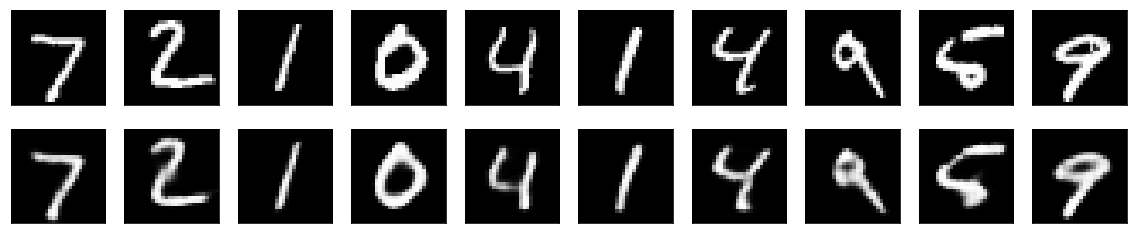

In [10]:
decoded_imgs = autoencoder.predict(x_test)

# use matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

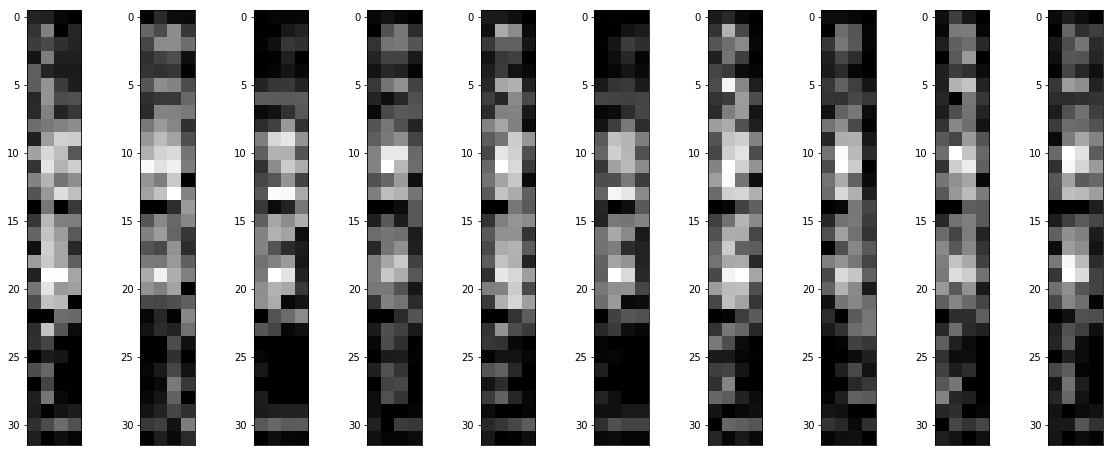

In [17]:
# encoder predict
encoder = Model(input_img,encoded)
encoded_imags =encoder.predict(x_test)


## 128 -dimensional encoded representations 

n = 10 
plt.figure(figsize=(20,8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imags[i].reshape(4,4*8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()
